In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets                        # package for plotting 
using CSV
using DelimitedFiles 
using Statistics

In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Complete_EXP_Health_WFI.dat", 
    types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"])
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [4]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
phenotypes= dropmissing(phenotypes, :Health_Score3)
phenotypes= dropmissing(phenotypes, :Nur2ADG)
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,false,1B_D02,1B_D02


In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 18.637281 seconds (37.31 k allocations: 10.393 GiB, 0.07% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [6]:
model_equations = "Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID
             Health_Score3 = intercept + Batch  + EntryAge + NurPenBatch + SowID";
R= [0.909304E-02 -0.419913E-01
    -0.419913E-01 1.48907]
model=build_model(model_equations,R);
set_covariate(model,"EntryAge")

Gpen=[0.383042E-03 0
     0 0.383042E-03]
set_random(model,"NurPenBatch", Gpen)
G2=[0.466761E-03 0
  0 0.466761E-03]
set_random(model,"SowID",G2)

In [7]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [8]:
G3=[0.407486E-02   -0.380808E-02
 -0.380808E-02  0.167177]
@time add_genotypes(model,M,G3,header=true, rowID=rowID, G_is_marker_variance=false) # no method matching
#@time add_genotypes(model,"Geno_JWAS_impute.txt",G3,separator=' ', G_is_marker_variance=true)

The marker IDs are set to 1,2,...,#markers
#markers: 435172; #individuals: 3205
 22.920520 seconds (7.66 M allocations: 15.969 GiB, 1.80% gc time)


6.0f0

## BayesB

In [9]:
@time outB=runMCMC(model,phenotypes,methods="BayesB", missing_phenotypes=true, estimatePi=false,Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998),
    estimateScale=true,chain_length=50000,burnin = 5000,output_heritability=true, output_samples_frequency=100, output_samples_file="MCMC_BayesB")

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
The number of observations with both genotypes and phenotypes used in the analysis is 3067.

The prior for marker effects covariance matrix is calculated from genetic covariance matrix and Π.
The mean of the prior for the marker effects covariance matrix is:
  1.2e-5  -2.3e-5  
 -2.3e-5   0.000502



A Linear Mixed Model was build using model equations:

Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID
Health_Score3 = intercept + Batch  + EntryAge + NurPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               49
Died            factor       fixed                2
EntryAge        covariate    fixed                1
NurPenBatch     factor       random             428
SowID           factor       random            1095

MCMC Information

running MCMC ...100%|███████████████████████████████████| Time: 4 days, 1:09:18




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


349830.061345 seconds (2.05 T allocations: 134.962 TiB, 27.11% gc time)


Dict{Any,Any} with 9 entries:
  "ScaleEffectVargeno"           => 4×3 DataFrame…
  "EBV_Nur2ADG"                  => 3205×3 DataFrame…
  "heritability"                 => 2×3 DataFrame…
  "EBV_Health_Score3"            => 3205×3 DataFrame…
  "location parameters"          => 3150×5 DataFrame…
  "residual variance"            => 4×3 DataFrame…
  "marker effects geno"          => 870344×5 DataFrame. Omitted printing of 1 c…
  "genetic_variance"             => 4×3 DataFrame…
  "marker effects variance geno" => 4×3 DataFrame…

In [17]:
@time rg,out = GWAS(M,"/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt", 
    "MCMC_BayesB_marker_effects_geno_Nur2ADG.txt",
    "MCMC_BayesB_marker_effects_geno_Health_Score3.txt",
    window_size="1 Mb", GWAS=false,sliding_window=false,genetic_correlation=true)

calculating genomic correlation...100%|█████████████████| Time: 1:57:50


BoundsError: BoundsError: attempt to access (2395×12 DataFrame
│ Row  │ trait      │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimate_cov │ std_cov     │ estimate_cor │ std_cor   │
│      │ String     │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64      │ Float64     │ Float64      │ Float64   │
├──────┼────────────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼──────────────┼─────────────┼──────────────┼───────────┤
│ 1    │ cor(t1,t2) │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 4.34101e-7   │ 7.03928e-6  │ 0.00435125   │ 0.333238  │
│ 2    │ cor(t1,t2) │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 2.8231e-7    │ 1.78136e-5  │ 0.0077703    │ 0.4707    │
│ 3    │ cor(t1,t2) │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 2.16101e-7   │ 8.24563e-6  │ -0.0302008   │ 0.377122  │
│ 4    │ cor(t1,t2) │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ -2.31699e-6  │ 1.92454e-5  │ -0.0566661   │ 0.433545  │
│ 5    │ cor(t1,t2) │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ -2.5558e-7   │ 8.67306e-6  │ -0.0132583   │ 0.39697   │
│ 6    │ cor(t1,t2) │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 2.07125e-7   │ 6.87562e-6  │ 0.00411268   │ 0.369933  │
│ 7    │ cor(t1,t2) │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ -1.83697e-6  │ 1.0961e-5   │ -0.0640966   │ 0.398737  │
│ 8    │ cor(t1,t2) │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ -1.15113e-6  │ 1.0592e-5   │ -0.0544007   │ 0.36498   │
│ 9    │ cor(t1,t2) │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ -3.58613e-7  │ 9.99898e-6  │ -0.0414916   │ 0.395547  │
│ 10   │ cor(t1,t2) │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 5.56848e-7   │ 1.01637e-5  │ 0.00616248   │ 0.421223  │
│ 11   │ cor(t1,t2) │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ -5.48178e-7  │ 8.05871e-6  │ -0.0464986   │ 0.394587  │
│ 12   │ cor(t1,t2) │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ -7.81536e-7  │ 9.06589e-6  │ -0.00923699  │ 0.373098  │
│ 13   │ cor(t1,t2) │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 1.76134e-7   │ 1.15539e-5  │ 0.0108661    │ 0.385027  │
│ 14   │ cor(t1,t2) │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ -5.97953e-7  │ 8.8255e-6   │ -0.00681285  │ 0.389638  │
│ 15   │ cor(t1,t2) │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ -7.97545e-7  │ 9.48303e-6  │ -0.0181511   │ 0.423028  │
│ 16   │ cor(t1,t2) │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ -1.05956e-6  │ 8.6705e-6   │ -0.0431755   │ 0.358026  │
│ 17   │ cor(t1,t2) │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.33557e-6   │ 1.94414e-5  │ -0.0032801   │ 0.346343  │
│ 18   │ cor(t1,t2) │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 1.0568e-6    │ 1.14695e-5  │ 0.0186463    │ 0.399799  │
│ 19   │ cor(t1,t2) │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 1.54591e-6   │ 1.59714e-5  │ 0.00805667   │ 0.327985  │
│ 20   │ cor(t1,t2) │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ -3.54717e-7  │ 7.14722e-6  │ -0.0159412   │ 0.355973  │
│ 21   │ cor(t1,t2) │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ -1.33391e-6  │ 1.1247e-5   │ -0.0544622   │ 0.385576  │
│ 22   │ cor(t1,t2) │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ -6.71589e-7  │ 8.67879e-6  │ -0.0338569   │ 0.407461  │
│ 23   │ cor(t1,t2) │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ -3.61941e-6  │ 1.71718e-5  │ -0.0785975   │ 0.449665  │
│ 24   │ cor(t1,t2) │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 7.28575e-7   │ 9.38753e-6  │ 0.0388171    │ 0.395124  │
│ 25   │ cor(t1,t2) │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 1.63601e-6   │ 1.31761e-5  │ 0.0288877    │ 0.360195  │
│ 26   │ cor(t1,t2) │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 2.68966e-7   │ 1.2038e-5   │ 0.00438905   │ 0.395463  │
│ 27   │ cor(t1,t2) │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ -1.16241e-6  │ 8.69002e-6  │ -0.0362786   │ 0.404173  │
│ 28   │ cor(t1,t2) │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ -8.00985e-7  │ 1.74896e-5  │ 0.002531     │ 0.417941  │
│ 29   │ cor(t1,t2) │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ -3.52826e-7  │ 9.54685e-6  │ -0.0352215   │ 0.422871  │
│ 30   │ cor(t1,t2) │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ -1.52804e-7  │ 7.20597e-6  │ 0.00161379   │ 0.369645  │
│ 31   │ cor(t1,t2) │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ -5.6765e-7   │ 1.20364e-5  │ -0.0392862   │ 0.395899  │
│ 32   │ cor(t1,t2) │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ -1.46323e-6  │ 2.18703e-5  │ -0.0550292   │ 0.484681  │
│ 33   │ cor(t1,t2) │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ -8.46449e-7  │ 1.10303e-5  │ -0.0258787   │ 0.415256  │
│ 34   │ cor(t1,t2) │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 1.09398e-6   │ 2.55242e-5  │ 0.0172336    │ 0.44454   │
│ 35   │ cor(t1,t2) │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ -9.47828e-7  │ 7.19304e-6  │ -0.0447381   │ 0.336588  │
│ 36   │ cor(t1,t2) │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ -6.73218e-7  │ 6.62534e-6  │ -0.0372023   │ 0.347782  │
│ 37   │ cor(t1,t2) │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ -3.54171e-7  │ 6.51823e-6  │ -0.0249899   │ 0.363882  │
│ 38   │ cor(t1,t2) │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ -2.31676e-6  │ 1.17204e-5  │ -0.0688736   │ 0.410076  │
│ 39   │ cor(t1,t2) │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 4.1921e-7    │ 1.09524e-5  │ -0.00806954  │ 0.433131  │
│ 40   │ cor(t1,t2) │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ -2.8202e-6   │ 2.27376e-5  │ -0.0631361   │ 0.405845  │
│ 41   │ cor(t1,t2) │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ -2.78119e-6  │ 3.29489e-5  │ -0.0457532   │ 0.451357  │
│ 42   │ cor(t1,t2) │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ -1.44061e-6  │ 1.21438e-5  │ -0.0356944   │ 0.408406  │
│ 43   │ cor(t1,t2) │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ -3.99267e-6  │ 2.42141e-5  │ -0.0562395   │ 0.372341  │
│ 44   │ cor(t1,t2) │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ -1.71106e-6  │ 1.11172e-5  │ -0.0443612   │ 0.428639  │
│ 45   │ cor(t1,t2) │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ -4.62975e-6  │ 2.07987e-5  │ -0.103296    │ 0.429937  │
│ 46   │ cor(t1,t2) │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ -1.96851e-6  │ 1.13071e-5  │ -0.0454811   │ 0.410985  │
│ 47   │ cor(t1,t2) │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ -1.55699e-7  │ 9.52822e-6  │ -0.00867101  │ 0.343382  │
│ 48   │ cor(t1,t2) │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ -1.54661e-6  │ 1.07975e-5  │ -0.0653215   │ 0.36507   │
│ 49   │ cor(t1,t2) │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ -7.08558e-7  │ 6.07187e-6  │ -0.0264103   │ 0.369721  │
│ 50   │ cor(t1,t2) │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ -3.70405e-7  │ 7.77944e-6  │ -0.00767399  │ 0.395715  │
│ 51   │ cor(t1,t2) │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ -8.60129e-7  │ 7.54762e-6  │ -0.0141814   │ 0.39224   │
│ 52   │ cor(t1,t2) │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ -2.78872e-7  │ 8.52338e-6  │ -0.0293422   │ 0.410397  │
│ 53   │ cor(t1,t2) │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ -1.23829e-7  │ 7.40515e-6  │ -0.00559638  │ 0.365106  │
│ 54   │ cor(t1,t2) │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ -4.57679e-7  │ 8.56136e-6  │ -0.012649    │ 0.396005  │
│ 55   │ cor(t1,t2) │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 3.13239e-7   │ 7.61841e-6  │ -0.0132793   │ 0.327631  │
│ 56   │ cor(t1,t2) │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ -7.96083e-7  │ 6.72352e-6  │ -0.0401181   │ 0.391049  │
│ 57   │ cor(t1,t2) │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ -1.04223e-7  │ 9.57688e-6  │ -0.0188465   │ 0.38885   │
│ 58   │ cor(t1,t2) │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ -4.47475e-7  │ 6.03562e-6  │ -0.0227641   │ 0.336844  │
│ 59   │ cor(t1,t2) │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ -5.3701e-7   │ 8.54004e-6  │ -0.0494408   │ 0.425223  │
│ 60   │ cor(t1,t2) │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ -2.89263e-7  │ 9.54481e-6  │ 0.0122851    │ 0.365857  │
│ 61   │ cor(t1,t2) │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 3.52079e-7   │ 1.36411e-5  │ -0.00776819  │ 0.337757  │
│ 62   │ cor(t1,t2) │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ -9.64455e-7  │ 1.05679e-5  │ -0.0238254   │ 0.341644  │
│ 63   │ cor(t1,t2) │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ -3.25457e-7  │ 1.02045e-5  │ -0.0177944   │ 0.343963  │
│ 64   │ cor(t1,t2) │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 3.44013e-7   │ 7.77287e-6  │ 0.0196419    │ 0.348672  │
│ 65   │ cor(t1,t2) │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 4.1393e-8    │ 1.51331e-5  │ 0.0441497    │ 0.399924  │
│ 66   │ cor(t1,t2) │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 2.48571e-6   │ 2.23179e-5  │ 0.0290835    │ 0.40027   │
│ 67   │ cor(t1,t2) │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ -3.26826e-7  │ 6.37318e-6  │ -0.00782517  │ 0.335196  │
│ 68   │ cor(t1,t2) │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 2.40159e-7   │ 1.10181e-5  │ -0.00240398  │ 0.371291  │
│ 69   │ cor(t1,t2) │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 1.24316e-6   │ 1.79717e-5  │ 0.00946972   │ 0.365567  │
│ 70   │ cor(t1,t2) │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 1.77728e-6   │ 2.12309e-5  │ 0.0163117    │ 0.366679  │
│ 71   │ cor(t1,t2) │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ -4.6462e-7   │ 8.61331e-6  │ -0.0180284   │ 0.362877  │
│ 72   │ cor(t1,t2) │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ -1.19107e-6  │ 1.30749e-5  │ -0.0470536   │ 0.436479  │
│ 73   │ cor(t1,t2) │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 3.84611e-7   │ 9.43641e-6  │ 0.00979456   │ 0.39799   │
│ 74   │ cor(t1,t2) │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 2.11022e-7   │ 1.10294e-5  │ -0.0179129   │ 0.400404  │
│ 75   │ cor(t1,t2) │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ -1.52048e-6  │ 1.6434e-5   │ -0.0210274   │ 0.439344  │
│ 76   │ cor(t1,t2) │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.185e-7     │ 6.24997e-6  │ -0.00553164  │ 0.380446  │
│ 77   │ cor(t1,t2) │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ -2.56931e-7  │ 7.91412e-6  │ -0.0117438   │ 0.328958  │
│ 78   │ cor(t1,t2) │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ -6.81432e-7  │ 1.21849e-5  │ -0.0137121   │ 0.401984  │
│ 79   │ cor(t1,t2) │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ -2.04358e-6  │ 1.51057e-5  │ -0.0443431   │ 0.399868  │
│ 80   │ cor(t1,t2) │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ -1.85547e-6  │ 1.57317e-5  │ -0.0273518   │ 0.360931  │
│ 81   │ cor(t1,t2) │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 1.55411e-7   │ 5.80627e-6  │ 0.00842381   │ 0.350187  │
│ 82   │ cor(t1,t2) │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ -5.11579e-7  │ 7.09108e-6  │ -0.00100556  │ 0.354885  │
│ 83   │ cor(t1,t2) │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ -1.08154e-6  │ 9.8044e-6   │ -0.0301389   │ 0.351717  │
│ 84   │ cor(t1,t2) │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ -3.71987e-7  │ 1.16997e-5  │ -0.0144164   │ 0.366105  │
│ 85   │ cor(t1,t2) │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ -1.22377e-7  │ 1.56921e-5  │ -0.0479667   │ 0.389042  │
│ 86   │ cor(t1,t2) │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ -6.56061e-7  │ 9.98596e-6  │ -0.0427469   │ 0.377498  │
│ 87   │ cor(t1,t2) │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ -4.92529e-7  │ 8.71982e-6  │ -0.0263944   │ 0.391763  │
│ 88   │ cor(t1,t2) │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ -7.17203e-7  │ 8.51603e-6  │ -0.0176638   │ 0.33001   │
│ 89   │ cor(t1,t2) │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ -1.00266e-8  │ 7.42962e-6  │ 0.00202826   │ 0.354448  │
│ 90   │ cor(t1,t2) │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ -7.99495e-7  │ 9.50143e-6  │ -0.0318511   │ 0.375772  │
│ 91   │ cor(t1,t2) │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ -4.41527e-7  │ 1.00757e-5  │ -0.0286463   │ 0.33487   │
│ 92   │ cor(t1,t2) │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ -6.70262e-8  │ 1.15891e-5  │ -0.0145848   │ 0.286417  │
│ 93   │ cor(t1,t2) │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ -6.04216e-8  │ 5.10866e-6  │ 0.0174783    │ 0.275024  │
│ 94   │ cor(t1,t2) │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 8.38455e-8   │ 9.94495e-7  │ 0.00888889   │ 0.148972  │
│ 95   │ cor(t1,t2) │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 6.30274e-7   │ 1.03168e-5  │ 0.0221552    │ 0.332215  │
│ 96   │ cor(t1,t2) │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 2.08766e-6   │ 1.73126e-5  │ 0.0387697    │ 0.420972  │
│ 97   │ cor(t1,t2) │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ -5.23093e-8  │ 7.17635e-6  │ -0.00875298  │ 0.34067   │
│ 98   │ cor(t1,t2) │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ -5.88498e-8  │ 8.96847e-6  │ -0.0351275   │ 0.424009  │
│ 99   │ cor(t1,t2) │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ -4.02998e-9  │ 6.22516e-6  │ -0.0113191   │ 0.378058  │
│ 100  │ cor(t1,t2) │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 1.21974e-6   │ 1.30724e-5  │ 0.0236995    │ 0.373374  │
│ 101  │ cor(t1,t2) │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 1.88533e-7   │ 4.85182e-6  │ 0.000292939  │ 0.235672  │
│ 102  │ cor(t1,t2) │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 6.75599e-6   │ 3.5596e-5   │ 0.0507066    │ 0.40921   │
│ 103  │ cor(t1,t2) │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ -3.14126e-7  │ 1.08886e-5  │ -0.0158372   │ 0.368594  │
│ 104  │ cor(t1,t2) │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 5.68018e-7   │ 1.15488e-5  │ -0.00397769  │ 0.373298  │
│ 105  │ cor(t1,t2) │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ -2.51498e-6  │ 1.32863e-5  │ -0.108066    │ 0.421258  │
│ 106  │ cor(t1,t2) │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ -5.91898e-7  │ 6.33063e-6  │ -0.027859    │ 0.335887  │
│ 107  │ cor(t1,t2) │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 1.95347e-6   │ 1.87114e-5  │ 0.0169654    │ 0.373854  │
│ 108  │ cor(t1,t2) │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 8.16472e-7   │ 1.02253e-5  │ 0.0162966    │ 0.313924  │
│ 109  │ cor(t1,t2) │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ -2.16286e-7  │ 4.89453e-6  │ -0.0122534   │ 0.29615   │
│ 110  │ cor(t1,t2) │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ -1.88674e-7  │ 9.25717e-6  │ -0.00351417  │ 0.32685   │
│ 111  │ cor(t1,t2) │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 6.20517e-8   │ 7.38831e-6  │ 0.00577888   │ 0.313359  │
│ 112  │ cor(t1,t2) │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ -1.5284e-7   │ 8.33345e-6  │ -0.0264402   │ 0.315369  │
│ 113  │ cor(t1,t2) │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ -2.21386e-7  │ 8.99591e-6  │ 0.000371453  │ 0.3655    │
│ 114  │ cor(t1,t2) │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ -5.39459e-7  │ 9.46703e-6  │ -0.0406411   │ 0.311794  │
│ 115  │ cor(t1,t2) │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ -7.7255e-7   │ 1.08916e-5  │ -0.00932701  │ 0.27143   │
│ 116  │ cor(t1,t2) │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ -8.6906e-7   │ 6.90388e-6  │ -0.0368593   │ 0.325976  │
│ 117  │ cor(t1,t2) │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ -9.98191e-7  │ 8.1168e-6   │ -0.0400359   │ 0.344241  │
│ 118  │ cor(t1,t2) │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ -1.04058e-6  │ 9.71422e-6  │ -0.0430998   │ 0.39341   │
│ 119  │ cor(t1,t2) │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ -3.66153e-7  │ 3.70566e-6  │ -0.0187133   │ 0.264614  │
│ 120  │ cor(t1,t2) │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ -2.69618e-7  │ 5.1888e-6   │ -0.0164487   │ 0.254594  │
│ 121  │ cor(t1,t2) │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 2.93779e-7   │ 2.92952e-6  │ 0.00526509   │ 0.27429   │
│ 122  │ cor(t1,t2) │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ -1.54859e-7  │ 4.68757e-6  │ -0.0211318   │ 0.301059  │
│ 123  │ cor(t1,t2) │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ -5.42984e-7  │ 6.61387e-6  │ -0.0298003   │ 0.300673  │
│ 124  │ cor(t1,t2) │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 2.21231e-7   │ 9.18974e-6  │ -0.00281702  │ 0.375197  │
│ 125  │ cor(t1,t2) │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ -5.35781e-8  │ 7.62907e-6  │ -0.0240292   │ 0.322683  │
│ 126  │ cor(t1,t2) │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ -1.12848e-7  │ 8.93188e-6  │ 0.00395697   │ 0.381524  │
│ 127  │ cor(t1,t2) │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 1.67066e-7   │ 5.86429e-6  │ 0.00473453   │ 0.313349  │
│ 128  │ cor(t1,t2) │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ -1.85261e-7  │ 5.40797e-6  │ -0.035445    │ 0.300514  │
│ 129  │ cor(t1,t2) │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 1.23746e-7   │ 7.8541e-6   │ -0.00899945  │ 0.300064  │
│ 130  │ cor(t1,t2) │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 1.41787e-7   │ 5.58808e-6  │ 0.0127679    │ 0.268154  │
│ 131  │ cor(t1,t2) │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ -1.49968e-8  │ 6.54054e-6  │ 0.00258954   │ 0.325494  │
│ 132  │ cor(t1,t2) │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ -2.63964e-7  │ 2.90495e-6  │ -0.0201368   │ 0.255419  │
│ 133  │ cor(t1,t2) │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ -7.45896e-7  │ 5.84834e-6  │ -0.0427528   │ 0.338985  │
│ 134  │ cor(t1,t2) │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ -5.22335e-9  │ 4.3804e-6   │ -0.00164071  │ 0.246187  │
│ 135  │ cor(t1,t2) │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ -3.66891e-7  │ 8.03677e-6  │ -0.0132033   │ 0.294531  │
│ 136  │ cor(t1,t2) │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ -1.56587e-7  │ 3.49827e-6  │ -0.0132032   │ 0.246939  │
│ 137  │ cor(t1,t2) │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ -3.00438e-7  │ 4.91307e-6  │ 0.00374296   │ 0.207886  │
│ 138  │ cor(t1,t2) │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ -1.07074e-7  │ 3.09076e-6  │ -0.00513003  │ 0.220794  │
│ 139  │ cor(t1,t2) │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ -8.01496e-8  │ 4.55061e-6  │ -0.0151457   │ 0.264003  │
│ 140  │ cor(t1,t2) │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ -4.18323e-7  │ 4.91175e-6  │ -0.044746    │ 0.358139  │
│ 141  │ cor(t1,t2) │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ -1.19842e-6  │ 8.29e-6     │ -0.0534482   │ 0.3947    │
│ 142  │ cor(t1,t2) │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ -7.77448e-9  │ 4.49801e-6  │ -0.0085633   │ 0.270132  │
│ 143  │ cor(t1,t2) │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ -3.92885e-7  │ 4.00085e-6  │ -0.0347343   │ 0.255205  │
│ 144  │ cor(t1,t2) │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ -2.44494e-7  │ 3.24717e-6  │ -0.00183583  │ 0.29157   │
│ 145  │ cor(t1,t2) │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ -7.76485e-8  │ 2.25794e-6  │ -0.000927986 │ 0.217628  │
│ 146  │ cor(t1,t2) │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ -1.00544e-6  │ 6.9706e-6   │ -0.0303813   │ 0.329151  │
│ 147  │ cor(t1,t2) │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ -3.31287e-7  │ 8.65157e-6  │ -0.0139581   │ 0.347196  │
│ 148  │ cor(t1,t2) │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ -4.38908e-7  │ 8.05785e-6  │ -5.26834e-5  │ 0.387454  │
│ 149  │ cor(t1,t2) │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ -1.02495e-6  │ 9.84919e-6  │ -0.0262171   │ 0.41535   │
│ 150  │ cor(t1,t2) │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ -8.17469e-7  │ 6.31528e-6  │ -0.0443383   │ 0.375926  │
│ 151  │ cor(t1,t2) │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 2.31949e-7   │ 9.57731e-6  │ 0.00766288   │ 0.366531  │
│ 152  │ cor(t1,t2) │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ -3.33581e-6  │ 1.95787e-5  │ -0.0608201   │ 0.408068  │
│ 153  │ cor(t1,t2) │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ -6.07993e-7  │ 7.5571e-6   │ -0.0182672   │ 0.357844  │
│ 154  │ cor(t1,t2) │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ -2.25035e-6  │ 1.35713e-5  │ -0.0683175   │ 0.361223  │
│ 155  │ cor(t1,t2) │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ -1.03388e-6  │ 9.98984e-6  │ -0.020658    │ 0.311373  │
│ 156  │ cor(t1,t2) │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ -1.64429e-6  │ 1.33549e-5  │ -0.0575716   │ 0.393677  │
│ 157  │ cor(t1,t2) │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ -2.64378e-6  │ 1.51995e-5  │ -0.0661261   │ 0.370153  │
│ 158  │ cor(t1,t2) │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 3.98961e-7   │ 5.58143e-6  │ 0.00718081   │ 0.311792  │
│ 159  │ cor(t1,t2) │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ -1.38583e-7  │ 7.5096e-6   │ -0.0143783   │ 0.388839  │
│ 160  │ cor(t1,t2) │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ -3.54385e-7  │ 4.23057e-6  │ -0.0178207   │ 0.326128  │
│ 161  │ cor(t1,t2) │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ -2.79134e-7  │ 3.67635e-6  │ -0.00176773  │ 0.311118  │
│ 162  │ cor(t1,t2) │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ -3.76974e-7  │ 6.74261e-6  │ -0.0176701   │ 0.398202  │
│ 163  │ cor(t1,t2) │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 3.94734e-7   │ 6.50548e-6  │ 0.00894747   │ 0.331715  │
│ 164  │ cor(t1,t2) │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ -1.58084e-6  │ 1.00256e-5  │ -0.0518782   │ 0.364368  │
│ 165  │ cor(t1,t2) │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ -4.40962e-6  │ 1.94328e-5  │ -0.0671114   │ 0.471848  │
│ 166  │ cor(t1,t2) │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ -1.2227e-7   │ 5.60906e-6  │ -0.00898309  │ 0.321084  │
│ 167  │ cor(t1,t2) │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 4.33801e-8   │ 7.06533e-6  │ 0.0153316    │ 0.400763  │
│ 168  │ cor(t1,t2) │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ -6.2406e-7   │ 7.70682e-6  │ -0.0229316   │ 0.352398  │
│ 169  │ cor(t1,t2) │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 1.35911e-7   │ 4.35662e-6  │ 0.00352796   │ 0.324382  │
│ 170  │ cor(t1,t2) │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ -1.70789e-7  │ 8.07492e-6  │ -0.00214612  │ 0.283337  │
│ 171  │ cor(t1,t2) │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ -1.52432e-7  │ 2.57812e-6  │ -0.000274019 │ 0.238326  │
│ 172  │ cor(t1,t2) │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ -8.25516e-7  │ 1.04507e-5  │ -0.00967835  │ 0.289391  │
│ 173  │ cor(t1,t2) │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ -5.82067e-7  │ 4.13379e-6  │ -0.0223044   │ 0.282648  │
│ 174  │ cor(t1,t2) │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 4.22129e-8   │ 3.52198e-6  │ -0.00207526  │ 0.242668  │
│ 175  │ cor(t1,t2) │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 8.31331e-8   │ 9.83833e-6  │ -0.0231412   │ 0.345459  │
│ 176  │ cor(t1,t2) │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ -8.86758e-10 │ 6.44886e-6  │ -0.012733    │ 0.245127  │
│ 177  │ cor(t1,t2) │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ -1.2451e-6   │ 8.63551e-6  │ -0.0241965   │ 0.345808  │
│ 178  │ cor(t1,t2) │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ -4.54823e-7  │ 9.10697e-6  │ -0.010154    │ 0.328666  │
│ 179  │ cor(t1,t2) │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ -1.38181e-7  │ 7.46639e-6  │ -0.0311452   │ 0.353494  │
│ 180  │ cor(t1,t2) │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ -1.21684e-7  │ 8.08839e-6  │ -0.00526199  │ 0.304083  │
│ 181  │ cor(t1,t2) │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ -1.72621e-7  │ 3.42922e-6  │ -0.0231236   │ 0.26353   │
│ 182  │ cor(t1,t2) │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ -4.56954e-7  │ 7.09411e-6  │ -0.0385613   │ 0.365863  │
│ 183  │ cor(t1,t2) │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ -4.49423e-8  │ 3.91338e-6  │ -0.0143289   │ 0.294971  │
│ 184  │ cor(t1,t2) │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ -4.1255e-7   │ 4.73927e-6  │ -0.027571    │ 0.315106  │
│ 185  │ cor(t1,t2) │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ -1.68384e-6  │ 1.6807e-5   │ -0.0704351   │ 0.371909  │
│ 186  │ cor(t1,t2) │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ -2.28108e-7  │ 9.55927e-6  │ -0.0329506   │ 0.377112  │
│ 187  │ cor(t1,t2) │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ -1.08484e-6  │ 1.11414e-5  │ -0.045963    │ 0.349936  │
│ 188  │ cor(t1,t2) │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ -3.48971e-7  │ 3.72204e-6  │ -0.0209462   │ 0.321235  │
│ 189  │ cor(t1,t2) │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ -2.92126e-7  │ 5.28755e-6  │ -0.00988431  │ 0.312519  │
│ 190  │ cor(t1,t2) │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ -3.1817e-7   │ 5.25699e-6  │ -0.0139715   │ 0.245064  │
│ 191  │ cor(t1,t2) │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ -2.56066e-7  │ 3.40178e-6  │ -0.00860358  │ 0.235937  │
│ 192  │ cor(t1,t2) │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ -5.24323e-7  │ 8.54281e-6  │ -0.0218728   │ 0.321287  │
│ 193  │ cor(t1,t2) │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ -5.22967e-7  │ 7.09323e-6  │ -0.0353255   │ 0.392004  │
│ 194  │ cor(t1,t2) │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 1.24361e-7   │ 6.229e-6    │ -0.00335645  │ 0.31923   │
│ 195  │ cor(t1,t2) │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 8.75646e-8   │ 1.73663e-6  │ 0.0162993    │ 0.29331   │
│ 196  │ cor(t1,t2) │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ -1.90028e-8  │ 1.23185e-6  │ -0.0287447   │ 0.273441  │
│ 197  │ cor(t1,t2) │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 1.49109e-7   │ 3.95792e-6  │ 0.0140992    │ 0.315125  │
│ 198  │ cor(t1,t2) │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ -1.3281e-8   │ 5.27315e-6  │ 0.00138052   │ 0.285291  │
│ 199  │ cor(t1,t2) │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ -9.54435e-8  │ 3.2308e-6   │ -0.00549432  │ 0.321753  │
│ 200  │ cor(t1,t2) │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ -2.99681e-8  │ 3.43027e-6  │ -0.000494661 │ 0.308462  │
│ 201  │ cor(t1,t2) │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 3.53722e-8   │ 6.08261e-6  │ -0.0228891   │ 0.310794  │
│ 202  │ cor(t1,t2) │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ -2.71185e-7  │ 2.6842e-6   │ -0.0264661   │ 0.254383  │
│ 203  │ cor(t1,t2) │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ -2.3762e-7   │ 3.18231e-6  │ -0.0321575   │ 0.311839  │
│ 204  │ cor(t1,t2) │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ -4.79034e-8  │ 3.95996e-6  │ -0.0211348   │ 0.3256    │
│ 205  │ cor(t1,t2) │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ -8.39978e-8  │ 5.97621e-6  │ 0.000288456  │ 0.324151  │
│ 206  │ cor(t1,t2) │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 3.55421e-7   │ 1.03556e-5  │ -0.00981797  │ 0.391754  │
│ 207  │ cor(t1,t2) │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ -9.73503e-7  │ 9.87461e-6  │ -0.0266018   │ 0.423242  │
│ 208  │ cor(t1,t2) │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ -1.35945e-6  │ 8.434e-6    │ -0.0438801   │ 0.380326  │
│ 209  │ cor(t1,t2) │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 1.58596e-7   │ 7.79218e-6  │ -0.000586423 │ 0.361892  │
│ 210  │ cor(t1,t2) │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ -1.69006e-7  │ 1.11934e-5  │ -0.0217434   │ 0.418195  │
│ 211  │ cor(t1,t2) │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ -4.78693e-8  │ 4.45103e-6  │ 0.025975     │ 0.334776  │
│ 212  │ cor(t1,t2) │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ -2.62755e-7  │ 4.08494e-6  │ -0.00171527  │ 0.267846  │
│ 213  │ cor(t1,t2) │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ -1.27395e-7  │ 5.62665e-6  │ -0.0395305   │ 0.38177   │
│ 214  │ cor(t1,t2) │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ -2.01691e-7  │ 3.70747e-6  │ 0.00133786   │ 0.330573  │
│ 215  │ cor(t1,t2) │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 6.03697e-8   │ 4.11505e-6  │ 0.00210451   │ 0.343169  │
│ 216  │ cor(t1,t2) │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 3.19263e-8   │ 3.00548e-6  │ -0.00501032  │ 0.320259  │
│ 217  │ cor(t1,t2) │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 2.1849e-7    │ 5.08667e-6  │ -0.0217521   │ 0.371658  │
│ 218  │ cor(t1,t2) │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ -1.31941e-6  │ 9.70674e-6  │ -0.0545068   │ 0.370256  │
│ 219  │ cor(t1,t2) │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ -8.4199e-7   │ 7.07123e-6  │ -0.0506872   │ 0.364511  │
│ 220  │ cor(t1,t2) │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ -9.11938e-7  │ 7.24005e-6  │ -0.0617988   │ 0.407307  │
│ 221  │ cor(t1,t2) │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ -3.42946e-7  │ 4.14785e-6  │ -0.0219484   │ 0.34489   │
│ 222  │ cor(t1,t2) │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ -2.89463e-7  │ 7.46145e-6  │ -0.0444133   │ 0.387419  │
│ 223  │ cor(t1,t2) │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ -1.63459e-6  │ 1.26641e-5  │ -0.0177482   │ 0.381776  │
│ 224  │ cor(t1,t2) │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ -2.38449e-7  │ 1.19073e-5  │ -0.0216788   │ 0.417733  │
│ 225  │ cor(t1,t2) │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 1.9284e-7    │ 7.36076e-6  │ 0.00103487   │ 0.389621  │
│ 226  │ cor(t1,t2) │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 5.38392e-7   │ 8.4013e-6   │ 0.0157045    │ 0.412063  │
│ 227  │ cor(t1,t2) │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ -3.60681e-7  │ 1.01077e-5  │ -0.0150991   │ 0.353823  │
│ 228  │ cor(t1,t2) │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ -1.00291e-7  │ 5.01712e-6  │ 0.00606973   │ 0.305165  │
│ 229  │ cor(t1,t2) │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ -3.48827e-7  │ 6.25801e-6  │ -0.00665247  │ 0.338955  │
│ 230  │ cor(t1,t2) │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ -4.09111e-6  │ 1.88462e-5  │ -0.101136    │ 0.422663  │
│ 231  │ cor(t1,t2) │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ -1.19382e-6  │ 1.40334e-5  │ -0.0364364   │ 0.381784  │
│ 232  │ cor(t1,t2) │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ -6.91753e-7  │ 8.90426e-6  │ -0.0358259   │ 0.373334  │
│ 233  │ cor(t1,t2) │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ -3.2779e-7   │ 5.27743e-6  │ -0.0107966   │ 0.341234  │
│ 234  │ cor(t1,t2) │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ -7.26595e-8  │ 4.33429e-6  │ -0.000468502 │ 0.326275  │
│ 235  │ cor(t1,t2) │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.4182e-7    │ 9.86355e-6  │ 0.0192866    │ 0.374522  │
│ 236  │ cor(t1,t2) │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ -7.85181e-7  │ 8.98267e-6  │ -0.0352326   │ 0.384627  │
│ 237  │ cor(t1,t2) │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ -7.83335e-7  │ 8.57433e-6  │ -0.0284095   │ 0.357816  │
│ 238  │ cor(t1,t2) │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 5.26306e-7   │ 1.22443e-5  │ -0.00624483  │ 0.378991  │
│ 239  │ cor(t1,t2) │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 6.2425e-6    │ 3.03437e-5  │ 0.0971125    │ 0.449058  │
│ 240  │ cor(t1,t2) │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 2.23139e-7   │ 6.2086e-6   │ 0.0230304    │ 0.382254  │
│ 241  │ cor(t1,t2) │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ -2.13229e-7  │ 6.12973e-6  │ -0.0257655   │ 0.30886   │
│ 242  │ cor(t1,t2) │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 2.01076e-6   │ 1.18477e-5  │ 0.0401513    │ 0.314201  │
│ 243  │ cor(t1,t2) │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 1.46562e-6   │ 1.80988e-5  │ 0.012371     │ 0.359122  │
│ 244  │ cor(t1,t2) │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 6.14876e-8   │ 6.09321e-6  │ 0.00496115   │ 0.299303  │
│ 245  │ cor(t1,t2) │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ -4.41488e-7  │ 5.73479e-6  │ -0.0177975   │ 0.288652  │
│ 246  │ cor(t1,t2) │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ -8.34636e-7  │ 1.1744e-5   │ -0.0281507   │ 0.341942  │
│ 247  │ cor(t1,t2) │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ -9.20215e-8  │ 1.01638e-5  │ -0.0325326   │ 0.325755  │
│ 248  │ cor(t1,t2) │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 2.19686e-6   │ 2.10039e-5  │ -0.000196132 │ 0.428994  │
│ 249  │ cor(t1,t2) │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ -6.58186e-7  │ 1.38527e-5  │ -0.0290703   │ 0.42617   │
│ 250  │ cor(t1,t2) │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ -2.87534e-7  │ 7.45071e-6  │ -0.0344956   │ 0.410739  │
│ 251  │ cor(t1,t2) │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ -6.46822e-8  │ 1.26158e-5  │ -0.00956652  │ 0.404274  │
│ 252  │ cor(t1,t2) │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ -5.5588e-7   │ 6.93735e-6  │ -0.00124243  │ 0.400622  │
│ 253  │ cor(t1,t2) │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ -1.6209e-7   │ 8.34795e-6  │ -0.0210315   │ 0.38139   │
│ 254  │ cor(t1,t2) │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ -4.78568e-7  │ 7.31896e-6  │ -0.0384326   │ 0.395055  │
│ 255  │ cor(t1,t2) │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ -8.65678e-7  │ 1.24902e-5  │ -0.0210331   │ 0.39334   │
│ 256  │ cor(t1,t2) │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 1.52439e-6   │ 1.66536e-5  │ 0.0044607    │ 0.40489   │
│ 257  │ cor(t1,t2) │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ -7.37496e-7  │ 8.29375e-6  │ -0.0437709   │ 0.381445  │
│ 258  │ cor(t1,t2) │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ -1.5971e-7   │ 7.27875e-6  │ -0.00943203  │ 0.406847  │
│ 259  │ cor(t1,t2) │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 2.11025e-7   │ 7.49118e-6  │ 0.00239529   │ 0.342409  │
│ 260  │ cor(t1,t2) │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ -1.5603e-6   │ 1.10968e-5  │ -0.0663442   │ 0.419458  │
│ 261  │ cor(t1,t2) │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ -5.84917e-7  │ 4.02506e-6  │ -0.0269197   │ 0.343126  │
│ 262  │ cor(t1,t2) │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ -5.01009e-7  │ 1.0127e-5   │ -0.0320426   │ 0.407164  │
│ 263  │ cor(t1,t2) │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 4.70482e-7   │ 1.05744e-5  │ -0.0137323   │ 0.35905   │
│ 264  │ cor(t1,t2) │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ -1.12072e-6  │ 1.43121e-5  │ -0.0489785   │ 0.30345   │
│ 265  │ cor(t1,t2) │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 7.08458e-6   │ 3.59217e-5  │ 0.0861675    │ 0.409161  │
│ 266  │ cor(t1,t2) │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 2.96202e-7   │ 4.45817e-6  │ 0.0150989    │ 0.313544  │
│ 267  │ cor(t1,t2) │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 2.58845e-7   │ 9.12853e-6  │ 0.0156044    │ 0.392705  │
│ 268  │ cor(t1,t2) │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 4.07658e-7   │ 1.29781e-5  │ -0.0210748   │ 0.405382  │
│ 269  │ cor(t1,t2) │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ -1.50319e-6  │ 1.39436e-5  │ -0.0685047   │ 0.409841  │
│ 270  │ cor(t1,t2) │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ -2.35886e-6  │ 1.21385e-5  │ -0.070252    │ 0.408954  │
│ 271  │ cor(t1,t2) │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ -5.03442e-7  │ 9.64864e-6  │ -0.0268257   │ 0.405664  │
│ 272  │ cor(t1,t2) │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 2.65116e-7   │ 8.80119e-6  │ -0.000269735 │ 0.340458  │
│ 273  │ cor(t1,t2) │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 5.53878e-7   │ 1.24914e-5  │ -3.7963e-5   │ 0.362197  │
│ 274  │ cor(t1,t2) │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ -1.29053e-6  │ 1.31341e-5  │ -0.0360519   │ 0.383514  │
│ 275  │ cor(t1,t2) │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ -1.21721e-6  │ 1.15267e-5  │ -0.0242324   │ 0.259303  │
│ 276  │ cor(t1,t2) │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ -1.43656e-7  │ 1.10583e-5  │ 0.00168107   │ 0.375227  │
│ 277  │ cor(t1,t2) │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ -1.25443e-7  │ 2.69935e-6  │ -2.56585e-17 │ 0.17658   │
│ 278  │ cor(t1,t2) │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ -1.13077e-6  │ 8.14823e-6  │ -0.0613417   │ 0.36255   │
│ 279  │ cor(t1,t2) │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ -8.68011e-7  │ 9.29667e-6  │ -0.0360767   │ 0.421079  │
│ 280  │ cor(t1,t2) │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ -4.41683e-7  │ 7.60047e-6  │ -0.0163104   │ 0.310241  │
│ 281  │ cor(t1,t2) │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 1.0245e-6    │ 1.39427e-5  │ 0.0136304    │ 0.363346  │
│ 282  │ cor(t1,t2) │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 1.97614e-7   │ 5.92686e-6  │ -0.0229802   │ 0.37404   │
│ 283  │ cor(t1,t2) │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ -6.3478e-7   │ 9.79541e-6  │ -0.0148039   │ 0.382965  │
│ 284  │ cor(t1,t2) │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ -4.36544e-7  │ 1.32285e-5  │ -0.025216    │ 0.325852  │
│ 285  │ cor(t1,t2) │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ -9.85217e-8  │ 8.91105e-6  │ -0.0137504   │ 0.381212  │
│ 286  │ cor(t1,t2) │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ -2.25524e-6  │ 1.97519e-5  │ -0.038669    │ 0.459994  │
│ 287  │ cor(t1,t2) │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 6.80097e-8   │ 7.39294e-6  │ -0.00377038  │ 0.372069  │
│ 288  │ cor(t1,t2) │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 1.2752e-6    │ 1.04081e-5  │ 0.0258686    │ 0.376072  │
│ 289  │ cor(t1,t2) │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 2.29589e-7   │ 8.55441e-6  │ -0.00327672  │ 0.306631  │
│ 290  │ cor(t1,t2) │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 9.32341e-8   │ 1.13223e-5  │ -0.010882    │ 0.323571  │
│ 291  │ cor(t1,t2) │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 2.97542e-7   │ 9.95e-6     │ 0.00769568   │ 0.354797  │
│ 292  │ cor(t1,t2) │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ -8.3294e-7   │ 2.75405e-5  │ -0.0384413   │ 0.414672  │
│ 293  │ cor(t1,t2) │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 7.13037e-7   │ 1.15709e-5  │ -0.00127132  │ 0.354761  │
│ 294  │ cor(t1,t2) │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ -2.87392e-7  │ 1.48567e-5  │ -0.0200238   │ 0.375636  │
│ 295  │ cor(t1,t2) │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.53001e-6   │ 1.03064e-5  │ 0.0423613    │ 0.380424  │
│ 296  │ cor(t1,t2) │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 8.29624e-7   │ 1.15166e-5  │ -0.00920987  │ 0.383341  │
│ 297  │ cor(t1,t2) │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ -6.59687e-8  │ 8.61972e-6  │ -0.000970459 │ 0.352588  │
│ 298  │ cor(t1,t2) │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ -6.88127e-7  │ 7.88252e-6  │ -0.0399548   │ 0.376964  │
│ 299  │ cor(t1,t2) │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ -1.31931e-6  │ 1.43164e-5  │ -0.037642    │ 0.418102  │
│ 300  │ cor(t1,t2) │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 5.08992e-7   │ 9.91846e-6  │ -0.00238798  │ 0.339302  │
│ 301  │ cor(t1,t2) │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.59237e-6   │ 2.58447e-5  │ -0.0118255   │ 0.442522  │
│ 302  │ cor(t1,t2) │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ -1.04595e-7  │ 7.35388e-6  │ -0.0155207   │ 0.404808  │
│ 303  │ cor(t1,t2) │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ -1.2885e-6   │ 1.06765e-5  │ -0.0568826   │ 0.380419  │
│ 304  │ cor(t1,t2) │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ -4.89464e-7  │ 1.02445e-5  │ -0.0076242   │ 0.377521  │
│ 305  │ cor(t1,t2) │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 4.26186e-8   │ 7.67367e-6  │ 0.00910439   │ 0.348624  │
│ 306  │ cor(t1,t2) │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ -5.18244e-6  │ 2.49051e-5  │ -0.0820643   │ 0.485235  │
│ 307  │ cor(t1,t2) │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ -3.06156e-6  │ 2.2113e-5   │ -0.0609982   │ 0.427626  │
│ 308  │ cor(t1,t2) │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 2.14169e-7   │ 1.2035e-5   │ -0.00557905  │ 0.387285  │
│ 309  │ cor(t1,t2) │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ -3.16433e-7  │ 1.20844e-5  │ 0.0100983    │ 0.382851  │
│ 310  │ cor(t1,t2) │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ -7.21238e-7  │ 7.84791e-6  │ -0.00847675  │ 0.307124  │
│ 311  │ cor(t1,t2) │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ -1.06429e-9  │ 5.34424e-6  │ 0.014293     │ 0.358147  │
│ 312  │ cor(t1,t2) │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ -6.92683e-7  │ 1.40907e-5  │ -0.0218329   │ 0.378248  │
│ 313  │ cor(t1,t2) │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ -4.22886e-7  │ 8.69311e-6  │ -0.0135861   │ 0.384752  │
│ 314  │ cor(t1,t2) │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ -3.64748e-8  │ 5.59208e-6  │ -0.0061649   │ 0.326723  │
│ 315  │ cor(t1,t2) │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ -6.76805e-7  │ 1.02349e-5  │ -0.0391769   │ 0.429412  │
│ 316  │ cor(t1,t2) │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 3.26996e-7   │ 6.68562e-6  │ -0.00856361  │ 0.404808  │
│ 317  │ cor(t1,t2) │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ -7.11859e-7  │ 1.49492e-5  │ -0.0242183   │ 0.432418  │
│ 318  │ cor(t1,t2) │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ -9.02566e-7  │ 1.60477e-5  │ 0.014345     │ 0.36384   │
│ 319  │ cor(t1,t2) │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 2.72838e-7   │ 1.10445e-5  │ -2.7992e-6   │ 0.397734  │
│ 320  │ cor(t1,t2) │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 7.6782e-8    │ 1.04723e-5  │ -0.000598378 │ 0.335432  │
│ 321  │ cor(t1,t2) │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ -7.85749e-8  │ 1.09172e-5  │ 0.00106117   │ 0.366568  │
│ 322  │ cor(t1,t2) │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ -2.10637e-6  │ 1.11056e-5  │ -0.0800211   │ 0.394538  │
│ 323  │ cor(t1,t2) │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ -7.01532e-7  │ 6.67268e-6  │ -0.0232955   │ 0.313676  │
│ 324  │ cor(t1,t2) │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 8.32968e-7   │ 1.67077e-5  │ 0.00396501   │ 0.388038  │
│ 325  │ cor(t1,t2) │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ -3.56786e-7  │ 9.20524e-6  │ -0.0339583   │ 0.371241  │
│ 326  │ cor(t1,t2) │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ -2.72762e-7  │ 4.99153e-6  │ 0.00339986   │ 0.191962  │
│ 327  │ cor(t1,t2) │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ -2.08733e-7  │ 5.51316e-6  │ -0.0099043   │ 0.286582  │
│ 328  │ cor(t1,t2) │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ -2.92333e-7  │ 5.53695e-6  │ 0.000629026  │ 0.272924  │
│ 329  │ cor(t1,t2) │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ -1.50627e-7  │ 4.5043e-6   │ 0.00274475   │ 0.25073   │
│ 330  │ cor(t1,t2) │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 1.92542e-7   │ 4.38025e-6  │ 0.00111508   │ 0.215267  │
│ 331  │ cor(t1,t2) │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 1.60937e-7   │ 7.13914e-6  │ -0.0200207   │ 0.204627  │
│ 332  │ cor(t1,t2) │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ -1.27959e-7  │ 3.92572e-6  │ 0.00252471   │ 0.231393  │
│ 333  │ cor(t1,t2) │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ -1.21129e-7  │ 3.2948e-6   │ -0.00705613  │ 0.194613  │
│ 334  │ cor(t1,t2) │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 1.79777e-6   │ 1.91757e-5  │ 0.0192764    │ 0.288114  │
│ 335  │ cor(t1,t2) │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ -1.5643e-8   │ 2.33431e-6  │ -0.0028713   │ 0.212728  │
│ 336  │ cor(t1,t2) │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ -4.77044e-7  │ 5.8691e-6   │ -0.0419851   │ 0.369264  │
│ 337  │ cor(t1,t2) │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 4.02486e-8   │ 4.58977e-6  │ 0.00294348   │ 0.304416  │
│ 338  │ cor(t1,t2) │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ -3.36054e-7  │ 3.67252e-6  │ -0.0262702   │ 0.316642  │
│ 339  │ cor(t1,t2) │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 1.04434e-8   │ 3.41004e-7  │ -0.00569643  │ 0.106528  │
│ 340  │ cor(t1,t2) │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ -2.03887e-7  │ 2.20254e-6  │ -0.0175481   │ 0.229959  │
│ 341  │ cor(t1,t2) │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ -8.02736e-7  │ 7.47454e-6  │ -0.0111492   │ 0.368385  │
│ 342  │ cor(t1,t2) │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ -1.85116e-7  │ 2.46326e-6  │ -0.014671    │ 0.297211  │
│ 343  │ cor(t1,t2) │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ -1.38792e-7  │ 2.99101e-6  │ -0.016362    │ 0.219943  │
│ 344  │ cor(t1,t2) │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ -2.80971e-7  │ 4.41034e-6  │ -0.0281212   │ 0.31256   │
│ 345  │ cor(t1,t2) │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 5.57661e-7   │ 9.71148e-6  │ 0.0181538    │ 0.342876  │
│ 346  │ cor(t1,t2) │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 1.73707e-8   │ 3.82126e-6  │ 0.000805997  │ 0.318924  │
│ 347  │ cor(t1,t2) │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 2.24652e-7   │ 8.7598e-6   │ 0.0255181    │ 0.370833  │
│ 348  │ cor(t1,t2) │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ -8.04194e-9  │ 1.20188e-6  │ 1.43589e-16  │ 0.200223  │
│ 349  │ cor(t1,t2) │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ -2.30845e-7  │ 3.85777e-6  │ -0.00268966  │ 0.190923  │
│ 350  │ cor(t1,t2) │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 4.32601e-8   │ 4.28507e-6  │ 0.00763142   │ 0.244026  │
│ 351  │ cor(t1,t2) │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ -2.2628e-7   │ 4.03541e-6  │ -0.0155508   │ 0.262766  │
│ 352  │ cor(t1,t2) │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ -2.28593e-7  │ 4.42861e-6  │ -0.0192849   │ 0.249301  │
│ 353  │ cor(t1,t2) │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 6.06921e-8   │ 6.02806e-6  │ -0.000738181 │ 0.206074  │
│ 354  │ cor(t1,t2) │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ -4.67111e-7  │ 4.33579e-6  │ -0.0215264   │ 0.271297  │
│ 355  │ cor(t1,t2) │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ -8.78704e-7  │ 8.84929e-6  │ -0.0208103   │ 0.346004  │
│ 356  │ cor(t1,t2) │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ -2.06278e-6  │ 1.48385e-5  │ -0.033385    │ 0.314098  │
│ 357  │ cor(t1,t2) │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ -2.28136e-6  │ 1.42895e-5  │ -0.0415354   │ 0.338791  │
│ 358  │ cor(t1,t2) │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ -2.32613e-6  │ 1.46108e-5  │ -0.0488615   │ 0.388843  │
│ 359  │ cor(t1,t2) │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ -7.74855e-7  │ 1.01887e-5  │ -0.035296    │ 0.362964  │
│ 360  │ cor(t1,t2) │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ -1.33767e-6  │ 1.09616e-5  │ -0.0601477   │ 0.384285  │
│ 361  │ cor(t1,t2) │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 2.67831e-6   │ 1.82486e-5  │ 0.0356951    │ 0.428596  │
│ 362  │ cor(t1,t2) │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 1.72273e-7   │ 1.13385e-5  │ -0.000492295 │ 0.43241   │
│ 363  │ cor(t1,t2) │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ -8.00747e-7  │ 1.45373e-5  │ 0.00113866   │ 0.446885  │
│ 364  │ cor(t1,t2) │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ -3.25887e-7  │ 7.63451e-6  │ -0.0288324   │ 0.387675  │
│ 365  │ cor(t1,t2) │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ -1.13464e-6  │ 1.17894e-5  │ -0.036085    │ 0.405724  │
│ 366  │ cor(t1,t2) │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ -6.23321e-7  │ 6.62931e-6  │ -0.0304039   │ 0.390021  │
│ 367  │ cor(t1,t2) │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ -7.60011e-7  │ 8.65611e-6  │ -0.0141308   │ 0.400026  │
│ 368  │ cor(t1,t2) │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ -7.96681e-8  │ 1.44473e-5  │ 0.00209287   │ 0.363773  │
│ 369  │ cor(t1,t2) │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ -1.23061e-7  │ 1.1654e-5   │ 0.0132166    │ 0.339133  │
│ 370  │ cor(t1,t2) │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 1.40276e-7   │ 1.39699e-5  │ -0.00697638  │ 0.459028  │
│ 371  │ cor(t1,t2) │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 6.28968e-7   │ 1.84425e-5  │ -0.0300703   │ 0.423166  │
│ 372  │ cor(t1,t2) │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ -1.07985e-6  │ 1.7059e-5   │ -0.00936063  │ 0.380197  │
│ 373  │ cor(t1,t2) │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ -6.5321e-7   │ 1.73733e-5  │ -0.00470484  │ 0.395802  │
│ 374  │ cor(t1,t2) │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ -4.88608e-7  │ 1.82916e-5  │ -0.0334472   │ 0.40599   │
│ 375  │ cor(t1,t2) │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 1.15305e-6   │ 2.80805e-5  │ 0.00295823   │ 0.432655  │
│ 376  │ cor(t1,t2) │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 7.06197e-8   │ 1.6545e-5   │ 0.00444729   │ 0.366225  │
│ 377  │ cor(t1,t2) │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ -6.35582e-7  │ 1.00654e-5  │ -0.00924716  │ 0.370142  │
│ 378  │ cor(t1,t2) │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ -1.10382e-6  │ 1.24315e-5  │ -0.00888599  │ 0.360519  │
│ 379  │ cor(t1,t2) │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ -1.79578e-6  │ 1.37696e-5  │ -0.0425152   │ 0.412011  │
│ 380  │ cor(t1,t2) │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 4.6427e-7    │ 1.4796e-5   │ -0.0021887   │ 0.417679  │
│ 381  │ cor(t1,t2) │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ -4.6559e-7   │ 7.85784e-6  │ -0.0108778   │ 0.328794  │
│ 382  │ cor(t1,t2) │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ -7.79693e-7  │ 1.20472e-5  │ -0.0495618   │ 0.403074  │
│ 383  │ cor(t1,t2) │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ -1.74177e-6  │ 1.39975e-5  │ -0.0187105   │ 0.373583  │
│ 384  │ cor(t1,t2) │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ -1.38505e-7  │ 1.13795e-5  │ -0.00710458  │ 0.388241  │
│ 385  │ cor(t1,t2) │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 2.48223e-7   │ 7.42429e-6  │ -0.0149572   │ 0.332959  │
│ 386  │ cor(t1,t2) │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ -1.48785e-7  │ 6.64359e-6  │ -0.00310127  │ 0.316684  │
│ 387  │ cor(t1,t2) │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ -6.03912e-7  │ 7.86159e-6  │ -0.0511663   │ 0.332827  │
│ 388  │ cor(t1,t2) │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ -4.17944e-7  │ 1.11555e-5  │ -0.013208    │ 0.338315  │
│ 389  │ cor(t1,t2) │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ -7.48063e-7  │ 1.19513e-5  │ -0.0134872   │ 0.379091  │
│ 390  │ cor(t1,t2) │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 2.98534e-7   │ 5.96525e-6  │ 0.00572876   │ 0.378503  │
│ 391  │ cor(t1,t2) │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ -1.11785e-6  │ 9.31811e-6  │ -0.0570914   │ 0.352873  │
│ 392  │ cor(t1,t2) │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 8.9593e-7    │ 8.71432e-6  │ 0.0292542    │ 0.396515  │
│ 393  │ cor(t1,t2) │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ -8.36192e-7  │ 1.05285e-5  │ -0.0175265   │ 0.403453  │
│ 394  │ cor(t1,t2) │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ -3.3507e-6   │ 1.66943e-5  │ -0.0723875   │ 0.430116  │
│ 395  │ cor(t1,t2) │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ -1.27145e-6  │ 1.27059e-5  │ -0.0300276   │ 0.387407  │
│ 396  │ cor(t1,t2) │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ -3.69463e-7  │ 9.94709e-6  │ -0.0130264   │ 0.3844    │
│ 397  │ cor(t1,t2) │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 7.35164e-7   │ 1.6185e-5   │ 0.00064304   │ 0.416334  │
│ 398  │ cor(t1,t2) │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 5.04063e-7   │ 1.75087e-5  │ 0.0140403    │ 0.444775  │
│ 399  │ cor(t1,t2) │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 6.31624e-7   │ 1.1302e-5   │ -0.00940305  │ 0.367925  │
│ 400  │ cor(t1,t2) │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ -4.11186e-7  │ 7.06244e-6  │ -0.00708964  │ 0.385036  │
│ 401  │ cor(t1,t2) │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ -5.38813e-8  │ 4.44714e-6  │ 0.00951252   │ 0.282473  │
│ 402  │ cor(t1,t2) │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ -1.29312e-7  │ 4.77402e-6  │ -0.00655627  │ 0.328288  │
│ 403  │ cor(t1,t2) │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ -1.62835e-7  │ 7.58248e-6  │ 0.0188799    │ 0.387231  │
│ 404  │ cor(t1,t2) │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ -1.05114e-6  │ 1.44608e-5  │ -0.0118156   │ 0.446164  │
│ 405  │ cor(t1,t2) │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ -2.68724e-6  │ 1.58487e-5  │ -0.0838765   │ 0.432055  │
│ 406  │ cor(t1,t2) │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ -1.9375e-6   │ 1.14222e-5  │ -0.0497266   │ 0.396206  │
│ 407  │ cor(t1,t2) │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ -1.57115e-7  │ 5.54942e-6  │ -0.0111954   │ 0.340569  │
│ 408  │ cor(t1,t2) │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 1.87044e-7   │ 6.49588e-6  │ 0.0159092    │ 0.36986   │
│ 409  │ cor(t1,t2) │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 2.02604e-7   │ 1.67521e-5  │ -0.0261827   │ 0.424292  │
│ 410  │ cor(t1,t2) │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.04574e-7   │ 1.00428e-5  │ 0.0190824    │ 0.366608  │
│ 411  │ cor(t1,t2) │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ -1.51087e-7  │ 7.34637e-6  │ -0.038272    │ 0.374677  │
│ 412  │ cor(t1,t2) │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ -9.09412e-7  │ 9.24692e-6  │ -0.0363924   │ 0.380646  │
│ 413  │ cor(t1,t2) │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 2.99366e-6   │ 3.80615e-5  │ -0.014923    │ 0.436579  │
│ 414  │ cor(t1,t2) │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 3.47764e-6   │ 2.52703e-5  │ 0.0207883    │ 0.465003  │
│ 415  │ cor(t1,t2) │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ -5.57739e-7  │ 8.69544e-6  │ -0.0259979   │ 0.385148  │
│ 416  │ cor(t1,t2) │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 2.42448e-8   │ 7.12025e-6  │ -0.033804    │ 0.376863  │
│ 417  │ cor(t1,t2) │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 1.84637e-7   │ 5.25093e-6  │ -0.000563526 │ 0.313466  │
│ 418  │ cor(t1,t2) │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ -2.13509e-7  │ 5.06674e-6  │ -0.0177115   │ 0.355754  │
│ 419  │ cor(t1,t2) │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ -8.62475e-7  │ 7.81211e-6  │ -0.0329303   │ 0.382927  │
│ 420  │ cor(t1,t2) │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ -1.51761e-6  │ 1.32469e-5  │ -0.0560946   │ 0.40671   │
│ 421  │ cor(t1,t2) │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 3.92585e-8   │ 8.1262e-6   │ -0.00177021  │ 0.36391   │
│ 422  │ cor(t1,t2) │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 5.06192e-7   │ 1.15375e-5  │ 0.0184146    │ 0.404611  │
│ 423  │ cor(t1,t2) │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ -1.70214e-6  │ 1.46656e-5  │ -0.0536352   │ 0.471167  │
│ 424  │ cor(t1,t2) │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ -7.03244e-7  │ 8.85655e-6  │ -0.025305    │ 0.391293  │
│ 425  │ cor(t1,t2) │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ -1.15328e-6  │ 1.15269e-5  │ -0.0560038   │ 0.440424  │
│ 426  │ cor(t1,t2) │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ -2.27611e-6  │ 1.30696e-5  │ -0.0672594   │ 0.418132  │
│ 427  │ cor(t1,t2) │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ -1.53176e-6  │ 1.14921e-5  │ -0.0210676   │ 0.370163  │
│ 428  │ cor(t1,t2) │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ -3.3076e-7   │ 7.67152e-6  │ -0.0205792   │ 0.309169  │
│ 429  │ cor(t1,t2) │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ -1.46114e-6  │ 1.16901e-5  │ -0.0146425   │ 0.344106  │
│ 430  │ cor(t1,t2) │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ -2.2389e-7   │ 7.29575e-6  │ -0.00460599  │ 0.340546  │
│ 431  │ cor(t1,t2) │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ -1.74718e-6  │ 1.37108e-5  │ -0.047061    │ 0.416986  │
│ 432  │ cor(t1,t2) │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 7.87476e-8   │ 3.09393e-6  │ -0.00649602  │ 0.285886  │
│ 433  │ cor(t1,t2) │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 2.30307e-6   │ 2.62537e-5  │ 0.0100661    │ 0.445468  │
│ 434  │ cor(t1,t2) │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ -2.94506e-7  │ 5.47571e-6  │ -0.0242861   │ 0.300137  │
│ 435  │ cor(t1,t2) │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ -3.09561e-7  │ 8.02879e-6  │ -0.0220023   │ 0.324217  │
│ 436  │ cor(t1,t2) │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ -4.55398e-7  │ 5.7358e-6   │ -0.0194783   │ 0.363003  │
│ 437  │ cor(t1,t2) │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ -1.20049e-6  │ 1.45146e-5  │ -0.0440333   │ 0.424207  │
│ 438  │ cor(t1,t2) │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 1.04272e-6   │ 1.08141e-5  │ 0.0221332    │ 0.325824  │
│ 439  │ cor(t1,t2) │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 4.93809e-6   │ 3.14389e-5  │ 0.0379116    │ 0.458056  │
│ 440  │ cor(t1,t2) │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ -6.68484e-7  │ 7.53625e-6  │ -0.0357978   │ 0.400236  │
│ 441  │ cor(t1,t2) │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ -1.85906e-6  │ 1.2564e-5   │ -0.0332306   │ 0.3943    │
│ 442  │ cor(t1,t2) │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ -3.3084e-8   │ 1.4176e-5   │ -0.0198501   │ 0.407031  │
│ 443  │ cor(t1,t2) │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ -1.18527e-6  │ 1.16276e-5  │ -0.0225933   │ 0.36984   │
│ 444  │ cor(t1,t2) │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ -1.71011e-6  │ 1.37432e-5  │ -0.0632979   │ 0.379964  │
│ 445  │ cor(t1,t2) │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ -5.73033e-7  │ 8.27271e-6  │ -0.00617033  │ 0.346382  │
│ 446  │ cor(t1,t2) │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ -5.90346e-7  │ 6.57811e-6  │ -0.0174238   │ 0.339687  │
│ 447  │ cor(t1,t2) │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ -2.36089e-7  │ 6.27671e-6  │ -0.0173807   │ 0.361471  │
│ 448  │ cor(t1,t2) │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 4.03349e-8   │ 2.21258e-5  │ -0.012914    │ 0.446932  │
│ 449  │ cor(t1,t2) │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 1.06183e-7   │ 8.5057e-6   │ 0.00480747   │ 0.37853   │
│ 450  │ cor(t1,t2) │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 5.48885e-7   │ 8.15883e-6  │ 0.0120252    │ 0.382016  │
│ 451  │ cor(t1,t2) │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 4.62428e-7   │ 1.03091e-5  │ 0.00861175   │ 0.353788  │
│ 452  │ cor(t1,t2) │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 2.76482e-8   │ 8.19436e-6  │ -0.0143181   │ 0.411372  │
│ 453  │ cor(t1,t2) │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ -8.03917e-7  │ 2.01429e-5  │ -0.028393    │ 0.468198  │
│ 454  │ cor(t1,t2) │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 1.96109e-6   │ 2.14013e-5  │ 0.0037324    │ 0.413124  │
│ 455  │ cor(t1,t2) │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 9.26392e-6   │ 3.99249e-5  │ 0.0992013    │ 0.504989  │
│ 456  │ cor(t1,t2) │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 1.83652e-6   │ 1.67757e-5  │ 0.0144323    │ 0.403903  │
│ 457  │ cor(t1,t2) │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ -8.79777e-7  │ 9.36181e-6  │ -0.030316    │ 0.391501  │
│ 458  │ cor(t1,t2) │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ -4.87457e-8  │ 9.8045e-6   │ 0.00248405   │ 0.3873    │
│ 459  │ cor(t1,t2) │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ -6.30099e-8  │ 1.04198e-5  │ 0.00681967   │ 0.356187  │
│ 460  │ cor(t1,t2) │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ -1.91359e-7  │ 7.70933e-6  │ -0.0335667   │ 0.386821  │
│ 461  │ cor(t1,t2) │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ -1.19736e-6  │ 1.23106e-5  │ -0.0195796   │ 0.462103  │
│ 462  │ cor(t1,t2) │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 5.02064e-7   │ 1.06855e-5  │ 0.000854755  │ 0.349679  │
│ 463  │ cor(t1,t2) │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ -2.6774e-7   │ 9.6506e-6   │ -0.0300701   │ 0.399938  │
│ 464  │ cor(t1,t2) │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ -6.06245e-8  │ 8.02171e-6  │ 0.00509143   │ 0.361247  │
│ 465  │ cor(t1,t2) │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ -4.478e-7    │ 5.40912e-6  │ -0.0490712   │ 0.326199  │
│ 466  │ cor(t1,t2) │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 4.96908e-7   │ 5.89806e-6  │ -0.0117833   │ 0.33395   │
│ 467  │ cor(t1,t2) │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 1.37825e-7   │ 3.4362e-6   │ -0.0254996   │ 0.216327  │
│ 468  │ cor(t1,t2) │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 3.70694e-7   │ 4.06656e-6  │ 0.00394508   │ 0.202133  │
│ 469  │ cor(t1,t2) │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ -4.67904e-8  │ 3.7275e-6   │ -0.00128531  │ 0.23576   │
│ 470  │ cor(t1,t2) │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 9.59073e-8   │ 3.46896e-6  │ 0.00110895   │ 0.247599  │
│ 471  │ cor(t1,t2) │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ -7.85796e-7  │ 8.29066e-6  │ -0.0211425   │ 0.263886  │
│ 472  │ cor(t1,t2) │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 1.01382e-7   │ 2.52889e-6  │ -0.00865542  │ 0.259977  │
│ 473  │ cor(t1,t2) │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ -2.05738e-8  │ 4.25545e-6  │ -0.0201988   │ 0.294399  │
│ 474  │ cor(t1,t2) │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 3.81644e-8   │ 4.4464e-6   │ -0.00983916  │ 0.292952  │
│ 475  │ cor(t1,t2) │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ -2.12251e-7  │ 6.42519e-6  │ -0.00867643  │ 0.399412  │
│ 476  │ cor(t1,t2) │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ -1.29406e-6  │ 7.94678e-6  │ -0.0573165   │ 0.395096  │
│ 477  │ cor(t1,t2) │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ -4.99813e-7  │ 6.43614e-6  │ 0.00425285   │ 0.380203  │
│ 478  │ cor(t1,t2) │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ -5.14944e-6  │ 1.79346e-5  │ -0.118942    │ 0.4791    │
│ 479  │ cor(t1,t2) │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ -2.25753e-6  │ 1.65959e-5  │ -0.0443845   │ 0.398764  │
│ 480  │ cor(t1,t2) │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 3.69504e-7   │ 9.28876e-6  │ 0.00657764   │ 0.378826  │
│ 481  │ cor(t1,t2) │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ -1.00191e-6  │ 1.06665e-5  │ 0.00697087   │ 0.375882  │
│ 482  │ cor(t1,t2) │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ -9.71341e-7  │ 8.24806e-6  │ -0.0410802   │ 0.396122  │
│ 483  │ cor(t1,t2) │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ -9.28753e-8  │ 3.85652e-6  │ -0.0174514   │ 0.326694  │
│ 484  │ cor(t1,t2) │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ -1.47786e-6  │ 1.1316e-5   │ -0.039396    │ 0.396885  │
│ 485  │ cor(t1,t2) │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ -5.57025e-7  │ 8.89194e-6  │ -0.00771666  │ 0.379326  │
│ 486  │ cor(t1,t2) │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ -1.93372e-7  │ 7.88766e-6  │ 0.00564373   │ 0.375615  │
│ 487  │ cor(t1,t2) │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ -1.49064e-7  │ 1.06254e-5  │ -0.013811    │ 0.392004  │
│ 488  │ cor(t1,t2) │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ -1.03892e-6  │ 1.05592e-5  │ -0.0337888   │ 0.383485  │
│ 489  │ cor(t1,t2) │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ -4.12569e-7  │ 6.1736e-6   │ -0.0312751   │ 0.312299  │
│ 490  │ cor(t1,t2) │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ -4.58738e-7  │ 4.6317e-6   │ -0.0283397   │ 0.33825   │
│ 491  │ cor(t1,t2) │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ -1.09987e-6  │ 1.00345e-5  │ -0.0201826   │ 0.38718   │
│ 492  │ cor(t1,t2) │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ -5.51062e-7  │ 9.9766e-6   │ -0.012025    │ 0.346597  │
│ 493  │ cor(t1,t2) │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ -3.95082e-7  │ 5.66353e-6  │ -0.0163159   │ 0.280754  │
│ 494  │ cor(t1,t2) │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ -6.14017e-7  │ 1.28189e-5  │ -0.00212868  │ 0.346792  │
│ 495  │ cor(t1,t2) │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 2.09069e-7   │ 3.75066e-6  │ 0.0135524    │ 0.226949  │
│ 496  │ cor(t1,t2) │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ -5.23261e-7  │ 6.12794e-6  │ -0.00747675  │ 0.382899  │
│ 497  │ cor(t1,t2) │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ -7.93847e-7  │ 8.96464e-6  │ -0.0174592   │ 0.351606  │
│ 498  │ cor(t1,t2) │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 2.41702e-8   │ 4.83818e-6  │ -0.0107922   │ 0.319773  │
│ 499  │ cor(t1,t2) │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ -3.85537e-7  │ 6.69338e-6  │ -0.006254    │ 0.340775  │
│ 500  │ cor(t1,t2) │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ -1.73772e-6  │ 1.12135e-5  │ -0.0557922   │ 0.369353  │
│ 501  │ cor(t1,t2) │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ -1.8614e-6   │ 1.39954e-5  │ -0.0587778   │ 0.405099  │
│ 502  │ cor(t1,t2) │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ -4.57965e-8  │ 7.71127e-6  │ -0.00884146  │ 0.300877  │
│ 503  │ cor(t1,t2) │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ -1.76741e-7  │ 6.75597e-6  │ -0.0253066   │ 0.35325   │
│ 504  │ cor(t1,t2) │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ -2.894e-7    │ 5.04309e-6  │ 0.000218632  │ 0.357805  │
│ 505  │ cor(t1,t2) │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ -5.36682e-7  │ 4.56495e-6  │ -0.0259399   │ 0.303789  │
│ 506  │ cor(t1,t2) │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 5.08188e-9   │ 3.87776e-6  │ 0.000241924  │ 0.257542  │
│ 507  │ cor(t1,t2) │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ -2.88447e-8  │ 1.32536e-6  │ -0.00471933  │ 0.209237  │
│ 508  │ cor(t1,t2) │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ -4.10392e-10 │ 1.74793e-7  │ -0.00444444  │ 0.133408  │
│ 509  │ cor(t1,t2) │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 1.45764e-7   │ 5.32029e-6  │ -0.00879483  │ 0.296568  │
│ 510  │ cor(t1,t2) │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 3.80908e-7   │ 5.33954e-6  │ 0.0213534    │ 0.300121  │
│ 511  │ cor(t1,t2) │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 7.07541e-7   │ 9.98296e-6  │ -0.00245558  │ 0.303477  │
│ 512  │ cor(t1,t2) │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 4.59186e-7   │ 9.64859e-6  │ -0.0219751   │ 0.345156  │
│ 513  │ cor(t1,t2) │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 1.03223e-6   │ 1.41429e-5  │ -0.00343159  │ 0.35715   │
│ 514  │ cor(t1,t2) │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ -5.90069e-7  │ 9.78208e-6  │ -0.00143578  │ 0.377833  │
│ 515  │ cor(t1,t2) │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 2.17153e-7   │ 7.31971e-6  │ -0.0112471   │ 0.355939  │
│ 516  │ cor(t1,t2) │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ -2.6305e-6   │ 1.56088e-5  │ -0.0609712   │ 0.399282  │
│ 517  │ cor(t1,t2) │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ -9.92025e-7  │ 1.08795e-5  │ -0.0053212   │ 0.416811  │
│ 518  │ cor(t1,t2) │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 5.79533e-7   │ 1.59237e-5  │ -0.0343009   │ 0.372662  │
│ 519  │ cor(t1,t2) │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.18401e-6   │ 1.04047e-5  │ 0.019127     │ 0.393419  │
│ 520  │ cor(t1,t2) │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ -1.04662e-7  │ 6.5559e-6   │ 0.00297342   │ 0.383996  │
│ 521  │ cor(t1,t2) │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 1.69456e-7   │ 6.89261e-6  │ -0.00342147  │ 0.367078  │
│ 522  │ cor(t1,t2) │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ -1.77076e-6  │ 1.08176e-5  │ -0.038974    │ 0.352791  │
│ 523  │ cor(t1,t2) │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ -1.60455e-7  │ 7.16668e-6  │ -0.0151999   │ 0.387829  │
│ 524  │ cor(t1,t2) │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ -8.52456e-7  │ 8.59199e-6  │ -0.0373147   │ 0.368109  │
│ 525  │ cor(t1,t2) │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 5.41058e-7   │ 1.89382e-5  │ -0.0165772   │ 0.372479  │
│ 526  │ cor(t1,t2) │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ -3.4128e-7   │ 8.82557e-6  │ 0.00260196   │ 0.327964  │
│ 527  │ cor(t1,t2) │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 6.18905e-7   │ 6.43537e-6  │ 0.0174208    │ 0.29325   │
│ 528  │ cor(t1,t2) │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ -2.97616e-7  │ 4.35676e-6  │ -0.0153622   │ 0.300622  │
│ 529  │ cor(t1,t2) │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ -4.33095e-8  │ 4.96722e-6  │ -0.0121148   │ 0.341555  │
│ 530  │ cor(t1,t2) │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ -2.88201e-7  │ 4.57209e-6  │ -0.00471539  │ 0.34771   │
│ 531  │ cor(t1,t2) │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ -1.33361e-7  │ 5.86452e-6  │ -0.0112667   │ 0.401623  │
│ 532  │ cor(t1,t2) │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 4.44423e-7   │ 9.17041e-6  │ 0.0200581    │ 0.365097  │
│ 533  │ cor(t1,t2) │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 1.26812e-6   │ 1.60164e-5  │ 0.00285268   │ 0.330843  │
│ 534  │ cor(t1,t2) │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 3.79317e-7   │ 6.00021e-6  │ 0.00357789   │ 0.330646  │
│ 535  │ cor(t1,t2) │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ -1.022e-8    │ 4.35678e-6  │ 0.00413303   │ 0.302041  │
│ 536  │ cor(t1,t2) │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ -6.26891e-7  │ 9.42127e-6  │ -0.00619137  │ 0.338525  │
│ 537  │ cor(t1,t2) │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ -2.87242e-6  │ 1.5353e-5   │ -0.0779647   │ 0.410888  │
│ 538  │ cor(t1,t2) │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ -4.97025e-6  │ 1.93663e-5  │ -0.111263    │ 0.457382  │
│ 539  │ cor(t1,t2) │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ -3.88184e-6  │ 1.84153e-5  │ -0.0980472   │ 0.426519  │
│ 540  │ cor(t1,t2) │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ -4.52349e-6  │ 3.42179e-5  │ -0.0835952   │ 0.496619  │
│ 541  │ cor(t1,t2) │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 2.4841e-6    │ 2.06098e-5  │ 0.0378353    │ 0.47115   │
│ 542  │ cor(t1,t2) │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ -2.60756e-7  │ 6.77137e-6  │ -0.0195935   │ 0.433563  │
│ 543  │ cor(t1,t2) │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ -2.06111e-7  │ 5.1572e-6   │ -0.0206961   │ 0.393292  │
│ 544  │ cor(t1,t2) │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 3.58523e-7   │ 7.11602e-6  │ -0.00337249  │ 0.352185  │
│ 545  │ cor(t1,t2) │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ -1.31463e-7  │ 4.81301e-6  │ -0.0115476   │ 0.400743  │
│ 546  │ cor(t1,t2) │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 6.00777e-7   │ 8.97694e-6  │ 0.0132118    │ 0.367971  │
│ 547  │ cor(t1,t2) │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ -3.30142e-7  │ 3.68413e-6  │ -0.0369152   │ 0.270098  │
│ 548  │ cor(t1,t2) │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ -2.34274e-7  │ 8.20592e-6  │ 0.0177197    │ 0.38162   │
│ 549  │ cor(t1,t2) │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 1.03517e-7   │ 1.189e-5    │ -0.00574805  │ 0.402633  │
│ 550  │ cor(t1,t2) │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ -8.56317e-7  │ 1.13998e-5  │ -0.0627913   │ 0.405657  │
│ 551  │ cor(t1,t2) │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 3.94452e-7   │ 9.69864e-6  │ 0.0180378    │ 0.399849  │
│ 552  │ cor(t1,t2) │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ -4.88635e-7  │ 9.39934e-6  │ -0.029551    │ 0.352371  │
│ 553  │ cor(t1,t2) │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ -1.05649e-6  │ 7.63656e-6  │ -0.0459598   │ 0.367762  │
│ 554  │ cor(t1,t2) │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ -4.34388e-7  │ 6.74668e-6  │ -0.0443899   │ 0.371402  │
│ 555  │ cor(t1,t2) │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ -2.0449e-6   │ 1.10037e-5  │ -0.068778    │ 0.406904  │
│ 556  │ cor(t1,t2) │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 6.12142e-6   │ 5.35073e-5  │ 0.0114637    │ 0.457177  │
│ 557  │ cor(t1,t2) │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 6.63928e-6   │ 3.8617e-5   │ 0.0584981    │ 0.483364  │
│ 558  │ cor(t1,t2) │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 1.05086e-7   │ 1.3677e-5   │ -0.0212059   │ 0.386255  │
│ 559  │ cor(t1,t2) │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ -2.43062e-6  │ 2.31681e-5  │ -0.0595908   │ 0.477679  │
│ 560  │ cor(t1,t2) │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ -6.09961e-6  │ 2.39053e-5  │ -0.0951475   │ 0.421742  │
│ 561  │ cor(t1,t2) │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 1.1482e-6    │ 1.17046e-5  │ 0.0243508    │ 0.327911  │
│ 562  │ cor(t1,t2) │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 9.2669e-7    │ 7.20881e-6  │ 0.00983764   │ 0.275198  │
│ 563  │ cor(t1,t2) │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 2.0694e-6    │ 1.69763e-5  │ 0.00864281   │ 0.393299  │
│ 564  │ cor(t1,t2) │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 1.12448e-6   │ 1.7832e-5   │ 0.0094321    │ 0.342161  │
│ 565  │ cor(t1,t2) │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 1.3041e-7    │ 6.83818e-6  │ 0.02149      │ 0.368369  │
│ 566  │ cor(t1,t2) │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 3.38531e-8   │ 7.34653e-6  │ -0.0105539   │ 0.393535  │
│ 567  │ cor(t1,t2) │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ -5.12625e-7  │ 9.70004e-6  │ -0.0164688   │ 0.365143  │
│ 568  │ cor(t1,t2) │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 1.58752e-6   │ 1.4804e-5   │ 0.0454597    │ 0.429288  │
│ 569  │ cor(t1,t2) │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ -3.1072e-6   │ 1.43519e-5  │ -0.104988    │ 0.444804  │
│ 570  │ cor(t1,t2) │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ -8.08716e-7  │ 9.25783e-6  │ -0.0285557   │ 0.379026  │
│ 571  │ cor(t1,t2) │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ -9.02699e-7  │ 6.90579e-6  │ -0.0400928   │ 0.358771  │
│ 572  │ cor(t1,t2) │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ -2.9507e-6   │ 1.83005e-5  │ -0.0826019   │ 0.423865  │
│ 573  │ cor(t1,t2) │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ -9.68176e-8  │ 7.26829e-6  │ -0.0169196   │ 0.342868  │
│ 574  │ cor(t1,t2) │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 1.86498e-7   │ 6.21086e-6  │ 0.0189544    │ 0.332377  │
│ 575  │ cor(t1,t2) │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ -4.69146e-7  │ 8.00163e-6  │ -0.0163911   │ 0.39485   │
│ 576  │ cor(t1,t2) │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 3.93447e-7   │ 1.43356e-5  │ 0.000177862  │ 0.411714  │
│ 577  │ cor(t1,t2) │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 3.87383e-9   │ 1.07999e-5  │ -0.00553614  │ 0.371422  │
│ 578  │ cor(t1,t2) │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 1.76752e-6   │ 4.60987e-5  │ -0.00712068  │ 0.479175  │
│ 579  │ cor(t1,t2) │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 4.64616e-7   │ 8.98374e-6  │ -0.0180109   │ 0.377901  │
│ 580  │ cor(t1,t2) │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 1.78605e-6   │ 1.5211e-5   │ 0.00427553   │ 0.427831  │
│ 581  │ cor(t1,t2) │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 2.28356e-7   │ 9.45908e-6  │ 0.00576851   │ 0.395088  │
│ 582  │ cor(t1,t2) │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ -8.95062e-7  │ 1.5093e-5   │ 0.0309073    │ 0.388042  │
│ 583  │ cor(t1,t2) │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ -1.46103e-6  │ 1.70486e-5  │ -0.0231798   │ 0.397364  │
│ 584  │ cor(t1,t2) │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 1.59572e-7   │ 6.91409e-6  │ 0.0173056    │ 0.330925  │
│ 585  │ cor(t1,t2) │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ -1.76559e-6  │ 9.48266e-6  │ -0.0449586   │ 0.364067  │
│ 586  │ cor(t1,t2) │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ -2.51918e-7  │ 7.55615e-6  │ -0.00559392  │ 0.336595  │
│ 587  │ cor(t1,t2) │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ -8.5112e-7   │ 8.43313e-6  │ -0.0391084   │ 0.351252  │
│ 588  │ cor(t1,t2) │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 1.10176e-7   │ 8.50487e-6  │ -0.0316153   │ 0.362949  │
│ 589  │ cor(t1,t2) │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ -4.60244e-7  │ 5.86615e-6  │ -0.0223383   │ 0.314195  │
│ 590  │ cor(t1,t2) │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ -8.94018e-7  │ 7.36825e-6  │ -0.0411476   │ 0.328469  │
│ 591  │ cor(t1,t2) │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ -4.00541e-6  │ 1.8422e-5   │ -0.0636634   │ 0.416801  │
│ 592  │ cor(t1,t2) │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ -1.13112e-6  │ 9.35518e-6  │ -0.0213917   │ 0.383235  │
│ 593  │ cor(t1,t2) │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ -6.65121e-8  │ 5.00421e-6  │ -0.0267942   │ 0.334908  │
│ 594  │ cor(t1,t2) │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ -3.05837e-6  │ 2.13027e-5  │ -0.053155    │ 0.470027  │
│ 595  │ cor(t1,t2) │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ -2.91747e-6  │ 1.49185e-5  │ -0.0593941   │ 0.378469  │
│ 596  │ cor(t1,t2) │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ -4.35557e-7  │ 5.58604e-6  │ -0.0117385   │ 0.349664  │
│ 597  │ cor(t1,t2) │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ -4.74954e-7  │ 5.84104e-6  │ -0.0204736   │ 0.29547   │
│ 598  │ cor(t1,t2) │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ -5.4728e-7   │ 5.44298e-6  │ -0.0368431   │ 0.300386  │
│ 599  │ cor(t1,t2) │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ -1.82316e-6  │ 1.62296e-5  │ -0.0291591   │ 0.342134  │
│ 600  │ cor(t1,t2) │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 9.0019e-8    │ 7.73898e-6  │ -0.00632089  │ 0.330687  │
│ 601  │ cor(t1,t2) │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ -6.39458e-7  │ 1.06505e-5  │ -0.02043     │ 0.438417  │
│ 602  │ cor(t1,t2) │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ -2.05102e-6  │ 1.7498e-5   │ -0.0426306   │ 0.386804  │
│ 603  │ cor(t1,t2) │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ -5.60101e-7  │ 9.24219e-6  │ -0.00788511  │ 0.316043  │
│ 604  │ cor(t1,t2) │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 6.14255e-8   │ 5.51274e-6  │ 6.41724e-5   │ 0.281748  │
│ 605  │ cor(t1,t2) │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 2.07669e-6   │ 1.80799e-5  │ 0.0214622    │ 0.377218  │
│ 606  │ cor(t1,t2) │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 5.63525e-6   │ 3.64904e-5  │ 0.0532278    │ 0.387727  │
│ 607  │ cor(t1,t2) │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ -1.09083e-6  │ 2.15414e-5  │ -0.0472467   │ 0.43181   │
│ 608  │ cor(t1,t2) │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 3.88185e-6   │ 2.51701e-5  │ 0.0506139    │ 0.389862  │
│ 609  │ cor(t1,t2) │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 7.09949e-7   │ 1.4826e-5   │ 0.0269474    │ 0.377608  │
│ 610  │ cor(t1,t2) │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ -3.35272e-8  │ 3.43895e-6  │ -0.0108339   │ 0.339262  │
│ 611  │ cor(t1,t2) │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ -6.30398e-7  │ 5.21523e-6  │ -0.0652827   │ 0.35085   │
│ 612  │ cor(t1,t2) │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ -6.54298e-7  │ 6.6855e-6   │ -0.0339178   │ 0.361611  │
│ 613  │ cor(t1,t2) │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ -4.02324e-8  │ 8.34304e-7  │ -0.0011116   │ 0.300507  │
│ 614  │ cor(t1,t2) │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ -1.17334e-7  │ 3.68815e-6  │ -0.00243608  │ 0.2433    │
│ 615  │ cor(t1,t2) │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ -4.84463e-7  │ 7.37173e-6  │ -0.023918    │ 0.285865  │
│ 616  │ cor(t1,t2) │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ -2.02888e-7  │ 5.55785e-6  │ -0.0192472   │ 0.384388  │
│ 617  │ cor(t1,t2) │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 9.74932e-7   │ 1.58067e-5  │ -0.0153122   │ 0.397162  │
│ 618  │ cor(t1,t2) │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ -6.43742e-7  │ 1.64048e-5  │ -0.0433891   │ 0.43374   │
│ 619  │ cor(t1,t2) │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ -1.0905e-6   │ 1.26195e-5  │ -0.0377826   │ 0.393878  │
│ 620  │ cor(t1,t2) │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ -4.83529e-7  │ 9.95837e-6  │ -0.0110433   │ 0.371378  │
│ 621  │ cor(t1,t2) │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ -1.27745e-6  │ 1.32037e-5  │ -0.0520286   │ 0.367359  │
│ 622  │ cor(t1,t2) │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 3.9936e-7    │ 1.33321e-5  │ -0.014334    │ 0.402634  │
│ 623  │ cor(t1,t2) │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ -1.34096e-7  │ 7.3909e-6   │ -0.0311056   │ 0.379462  │
│ 624  │ cor(t1,t2) │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ -2.94246e-7  │ 3.86154e-6  │ -0.0197797   │ 0.329707  │
│ 625  │ cor(t1,t2) │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 3.09263e-7   │ 4.12685e-6  │ 0.0158407    │ 0.364884  │
│ 626  │ cor(t1,t2) │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ -7.13424e-7  │ 6.87848e-6  │ -0.0180013   │ 0.365968  │
│ 627  │ cor(t1,t2) │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ -4.45701e-7  │ 4.14842e-6  │ -0.0374342   │ 0.349791  │
│ 628  │ cor(t1,t2) │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ -1.70196e-6  │ 8.93333e-6  │ -0.0674883   │ 0.397557  │
│ 629  │ cor(t1,t2) │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 5.82976e-7   │ 8.25755e-6  │ 0.0168143    │ 0.341591  │
│ 630  │ cor(t1,t2) │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ -1.70723e-7  │ 6.19327e-6  │ 0.003958     │ 0.301269  │
│ 631  │ cor(t1,t2) │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ -2.15112e-7  │ 5.1732e-6   │ -0.0167938   │ 0.339553  │
│ 632  │ cor(t1,t2) │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ -1.70468e-8  │ 3.80461e-6  │ 0.00556584   │ 0.344936  │
│ 633  │ cor(t1,t2) │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ -1.66217e-6  │ 1.38766e-5  │ -0.0354755   │ 0.43818   │
│ 634  │ cor(t1,t2) │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ -8.54695e-7  │ 9.06262e-6  │ -0.025186    │ 0.368551  │
│ 635  │ cor(t1,t2) │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 2.23705e-7   │ 8.88221e-6  │ 0.000676659  │ 0.339508  │
│ 636  │ cor(t1,t2) │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 1.6484e-7    │ 3.8614e-6   │ 0.0101941    │ 0.255591  │
│ 637  │ cor(t1,t2) │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ -1.00055e-6  │ 9.93617e-6  │ -0.00405264  │ 0.355042  │
│ 638  │ cor(t1,t2) │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ -2.96148e-8  │ 5.66315e-6  │ 0.00697706   │ 0.381456  │
│ 639  │ cor(t1,t2) │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ -8.47784e-8  │ 5.69718e-6  │ -0.00419959  │ 0.357435  │
│ 640  │ cor(t1,t2) │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ -3.87558e-7  │ 4.65352e-6  │ -0.0188289   │ 0.394454  │
│ 641  │ cor(t1,t2) │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ -1.73195e-7  │ 7.42219e-6  │ -0.0366163   │ 0.392518  │
│ 642  │ cor(t1,t2) │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 2.22032e-7   │ 8.18677e-6  │ -0.0271338   │ 0.363759  │
│ 643  │ cor(t1,t2) │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 8.14322e-7   │ 1.04674e-5  │ 0.000792282  │ 0.35937   │
│ 644  │ cor(t1,t2) │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ -4.13274e-7  │ 5.98697e-6  │ -0.0211418   │ 0.427716  │
│ 645  │ cor(t1,t2) │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 5.78481e-8   │ 4.78752e-6  │ 0.0363465    │ 0.378526  │
│ 646  │ cor(t1,t2) │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ -3.24853e-7  │ 7.59367e-6  │ -0.0316073   │ 0.392011  │
│ 647  │ cor(t1,t2) │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ -1.06866e-6  │ 9.30929e-6  │ -0.0247307   │ 0.389814  │
│ 648  │ cor(t1,t2) │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 5.39149e-8   │ 9.73137e-6  │ -0.0229119   │ 0.403213  │
│ 649  │ cor(t1,t2) │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ -8.86298e-7  │ 1.07844e-5  │ 0.000918628  │ 0.366514  │
│ 650  │ cor(t1,t2) │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ -1.17752e-6  │ 1.02827e-5  │ -0.0313599   │ 0.376674  │
│ 651  │ cor(t1,t2) │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ -4.97456e-7  │ 7.02446e-6  │ -0.0269314   │ 0.387564  │
│ 652  │ cor(t1,t2) │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ -1.01188e-6  │ 1.35162e-5  │ -0.0286722   │ 0.416986  │
│ 653  │ cor(t1,t2) │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ -7.7004e-7   │ 1.18133e-5  │ -0.04924     │ 0.38714   │
│ 654  │ cor(t1,t2) │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ -9.33588e-7  │ 8.64315e-6  │ -0.0203074   │ 0.375495  │
│ 655  │ cor(t1,t2) │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ -1.47747e-6  │ 1.1633e-5   │ -0.030831    │ 0.377396  │
│ 656  │ cor(t1,t2) │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ -1.1763e-6   │ 1.24399e-5  │ -0.0372472   │ 0.36545   │
│ 657  │ cor(t1,t2) │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ -3.18402e-6  │ 1.58334e-5  │ -0.0935776   │ 0.408185  │
│ 658  │ cor(t1,t2) │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ -1.12927e-6  │ 1.40269e-5  │ -0.000765374 │ 0.427029  │
│ 659  │ cor(t1,t2) │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ -2.47007e-7  │ 7.52445e-6  │ -0.00972342  │ 0.385933  │
│ 660  │ cor(t1,t2) │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ -4.39434e-7  │ 1.03593e-5  │ -0.0447416   │ 0.355298  │
│ 661  │ cor(t1,t2) │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ -4.64987e-7  │ 7.20037e-6  │ -0.0281516   │ 0.375319  │
│ 662  │ cor(t1,t2) │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ -3.14786e-7  │ 7.133e-6    │ -0.0269392   │ 0.341271  │
│ 663  │ cor(t1,t2) │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 2.89246e-6   │ 2.08455e-5  │ 0.0187072    │ 0.409589  │
│ 664  │ cor(t1,t2) │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 3.17867e-7   │ 9.95457e-6  │ -0.00557999  │ 0.444697  │
│ 665  │ cor(t1,t2) │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ -3.86897e-7  │ 1.20703e-5  │ -0.0422468   │ 0.435346  │
│ 666  │ cor(t1,t2) │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ -2.42356e-7  │ 3.59563e-6  │ -0.0343156   │ 0.344221  │
│ 667  │ cor(t1,t2) │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ -7.74739e-8  │ 4.7914e-6   │ 0.00019425   │ 0.365739  │
│ 668  │ cor(t1,t2) │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ -1.37405e-7  │ 5.0226e-6   │ -0.0080755   │ 0.327832  │
│ 669  │ cor(t1,t2) │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ -4.35648e-7  │ 9.11989e-6  │ -0.0167279   │ 0.401974  │
│ 670  │ cor(t1,t2) │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ -1.62035e-6  │ 1.37377e-5  │ -0.0599579   │ 0.433399  │
│ 671  │ cor(t1,t2) │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ -4.0876e-7   │ 7.1743e-6   │ -0.00294447  │ 0.343449  │
│ 672  │ cor(t1,t2) │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ -8.71427e-7  │ 1.43067e-5  │ -0.0224651   │ 0.426798  │
│ 673  │ cor(t1,t2) │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 2.03729e-7   │ 9.47211e-6  │ 0.0131246    │ 0.378046  │
│ 674  │ cor(t1,t2) │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ -2.27401e-7  │ 8.81068e-6  │ -0.0305778   │ 0.356176  │
│ 675  │ cor(t1,t2) │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 1.40596e-7   │ 4.12343e-6  │ 0.0131957    │ 0.327268  │
│ 676  │ cor(t1,t2) │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ -2.84348e-7  │ 7.29571e-6  │ -0.00717425  │ 0.288305  │
│ 677  │ cor(t1,t2) │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ -5.95348e-7  │ 5.09213e-6  │ -0.0384337   │ 0.387325  │
│ 678  │ cor(t1,t2) │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ -4.69754e-6  │ 2.06607e-5  │ -0.101106    │ 0.426493  │
│ 679  │ cor(t1,t2) │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ -5.05809e-7  │ 5.78981e-6  │ -0.0253508   │ 0.360465  │
│ 680  │ cor(t1,t2) │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 4.09564e-7   │ 7.85295e-6  │ 0.0178807    │ 0.376489  │
│ 681  │ cor(t1,t2) │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ -4.95858e-7  │ 6.71821e-6  │ -0.0232919   │ 0.344732  │
│ 682  │ cor(t1,t2) │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ -1.78424e-7  │ 9.33084e-6  │ -0.0183503   │ 0.382041  │
│ 683  │ cor(t1,t2) │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ -7.58755e-7  │ 8.37516e-6  │ -0.00398006  │ 0.380293  │
│ 684  │ cor(t1,t2) │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ -1.4684e-7   │ 1.48112e-5  │ 0.00852036   │ 0.39438   │
│ 685  │ cor(t1,t2) │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ -6.57456e-7  │ 6.81667e-6  │ -0.0308497   │ 0.369838  │
│ 686  │ cor(t1,t2) │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ -1.07748e-6  │ 1.24671e-5  │ -0.0542485   │ 0.412105  │
│ 687  │ cor(t1,t2) │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ -1.00894e-5  │ 2.76739e-5  │ -0.178327    │ 0.498289  │
│ 688  │ cor(t1,t2) │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 5.04655e-7   │ 2.51368e-5  │ -0.0420037   │ 0.480843  │
│ 689  │ cor(t1,t2) │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ -8.88016e-7  │ 1.31457e-5  │ -0.0255336   │ 0.423601  │
│ 690  │ cor(t1,t2) │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ -2.32423e-6  │ 1.27263e-5  │ -0.0702365   │ 0.410283  │
│ 691  │ cor(t1,t2) │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ -3.55555e-7  │ 9.74171e-6  │ -0.00324542  │ 0.371939  │
│ 692  │ cor(t1,t2) │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ -1.1126e-8   │ 2.88374e-6  │ -0.0125659   │ 0.199778  │
│ 693  │ cor(t1,t2) │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 9.18436e-8   │ 4.148e-6    │ 0.000329607  │ 0.22057   │
│ 694  │ cor(t1,t2) │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 2.87125e-7   │ 5.64796e-6  │ -0.00649445  │ 0.27375   │
│ 695  │ cor(t1,t2) │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ -4.48464e-7  │ 6.87893e-6  │ -0.0209243   │ 0.338995  │
│ 696  │ cor(t1,t2) │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ -1.2142e-6   │ 1.55817e-5  │ -0.0438595   │ 0.350824  │
│ 697  │ cor(t1,t2) │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ -1.46485e-7  │ 1.41296e-5  │ -0.0354652   │ 0.350203  │
│ 698  │ cor(t1,t2) │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ -1.0479e-6   │ 7.82857e-6  │ -0.0414016   │ 0.329887  │
│ 699  │ cor(t1,t2) │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ -1.24864e-6  │ 6.22793e-6  │ -0.0565543   │ 0.363595  │
│ 700  │ cor(t1,t2) │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ -1.16177e-6  │ 9.23452e-6  │ -0.0453546   │ 0.377212  │
│ 701  │ cor(t1,t2) │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ -4.74692e-8  │ 5.1114e-6   │ -0.00270325  │ 0.331602  │
│ 702  │ cor(t1,t2) │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.17303e-7   │ 5.5298e-6   │ 0.0272944    │ 0.340511  │
│ 703  │ cor(t1,t2) │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ -7.7923e-7   │ 1.9249e-5   │ -0.0231516   │ 0.426271  │
│ 704  │ cor(t1,t2) │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 7.34036e-8   │ 7.1755e-6   │ 0.0036069    │ 0.377213  │
│ 705  │ cor(t1,t2) │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 3.36264e-7   │ 6.3945e-6   │ 0.0195424    │ 0.354363  │
│ 706  │ cor(t1,t2) │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ -7.1607e-7   │ 1.23287e-5  │ -0.040981    │ 0.422054  │
│ 707  │ cor(t1,t2) │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ -1.46526e-6  │ 1.04078e-5  │ -0.0434556   │ 0.362995  │
│ 708  │ cor(t1,t2) │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 4.87407e-6   │ 2.26827e-5  │ 0.0815143    │ 0.398952  │
│ 709  │ cor(t1,t2) │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ -8.46025e-8  │ 5.97213e-6  │ -0.00794804  │ 0.338194  │
│ 710  │ cor(t1,t2) │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ -1.11925e-6  │ 1.19686e-5  │ -0.0258674   │ 0.410027  │
│ 711  │ cor(t1,t2) │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ -3.64065e-6  │ 1.90711e-5  │ -0.0805991   │ 0.407988  │
│ 712  │ cor(t1,t2) │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 1.29201e-7   │ 5.07261e-6  │ 0.00125113   │ 0.194252  │
│ 713  │ cor(t1,t2) │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ -1.78609e-7  │ 7.60011e-6  │ -0.00572293  │ 0.307548  │
│ 714  │ cor(t1,t2) │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 3.18434e-6   │ 3.39136e-5  │ -0.000557316 │ 0.424042  │
│ 715  │ cor(t1,t2) │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 1.36896e-6   │ 2.63951e-5  │ 0.00167261   │ 0.414642  │
│ 716  │ cor(t1,t2) │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ -2.3885e-7   │ 8.65375e-6  │ 0.00493154   │ 0.354564  │
│ 717  │ cor(t1,t2) │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ -5.55758e-7  │ 1.0768e-5   │ -0.0206633   │ 0.352206  │
│ 718  │ cor(t1,t2) │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ -1.83792e-6  │ 1.60838e-5  │ -0.0384625   │ 0.363009  │
│ 719  │ cor(t1,t2) │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ -2.82746e-7  │ 9.14839e-6  │ -0.0414112   │ 0.385268  │
│ 720  │ cor(t1,t2) │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 2.38698e-6   │ 1.88564e-5  │ 0.0442995    │ 0.400013  │
│ 721  │ cor(t1,t2) │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ -6.33367e-7  │ 1.02999e-5  │ -0.040595    │ 0.395757  │
│ 722  │ cor(t1,t2) │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ -1.4012e-7   │ 6.4095e-6   │ -0.0191478   │ 0.351604  │
│ 723  │ cor(t1,t2) │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ -7.99209e-7  │ 1.03525e-5  │ -0.0447723   │ 0.428496  │
│ 724  │ cor(t1,t2) │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ -4.85767e-7  │ 7.9831e-6   │ -0.0120374   │ 0.362909  │
│ 725  │ cor(t1,t2) │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ -5.12505e-7  │ 1.1208e-5   │ -0.0277894   │ 0.384824  │
│ 726  │ cor(t1,t2) │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ -2.64841e-7  │ 5.78595e-6  │ -0.00267832  │ 0.349014  │
│ 727  │ cor(t1,t2) │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ -5.2553e-7   │ 6.87354e-6  │ -0.0385714   │ 0.352325  │
│ 728  │ cor(t1,t2) │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ -4.75569e-7  │ 4.73861e-6  │ -0.0362577   │ 0.310049  │
│ 729  │ cor(t1,t2) │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ -1.09731e-7  │ 5.21371e-6  │ -0.0250753   │ 0.295122  │
│ 730  │ cor(t1,t2) │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ -2.14335e-6  │ 1.34651e-5  │ -0.0378376   │ 0.407137  │
│ 731  │ cor(t1,t2) │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ -1.49471e-7  │ 2.13485e-6  │ -0.0061796   │ 0.288022  │
│ 732  │ cor(t1,t2) │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ -9.12362e-7  │ 6.57689e-6  │ -0.0240762   │ 0.263676  │
│ 733  │ cor(t1,t2) │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ -6.67344e-7  │ 1.04115e-5  │ -0.0379291   │ 0.356559  │
│ 734  │ cor(t1,t2) │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ -6.74807e-7  │ 7.45986e-6  │ -0.0187061   │ 0.23626   │
│ 735  │ cor(t1,t2) │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ -2.57001e-6  │ 1.3721e-5   │ -0.0609057   │ 0.374111  │
│ 736  │ cor(t1,t2) │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ -8.0315e-7   │ 8.38916e-6  │ -0.0375308   │ 0.402145  │
│ 737  │ cor(t1,t2) │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ -2.77631e-7  │ 7.38256e-6  │ 0.00048566   │ 0.356846  │
│ 738  │ cor(t1,t2) │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ -4.9819e-7   │ 1.11281e-5  │ 0.0199825    │ 0.397988  │
│ 739  │ cor(t1,t2) │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ -1.38217e-6  │ 1.10641e-5  │ -0.0333365   │ 0.406202  │
│ 740  │ cor(t1,t2) │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ -4.17049e-7  │ 7.25546e-6  │ -0.0454377   │ 0.358293  │
│ 741  │ cor(t1,t2) │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ -6.94664e-8  │ 4.65228e-6  │ -0.0205625   │ 0.284145  │
│ 742  │ cor(t1,t2) │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ -1.12285e-6  │ 1.33658e-5  │ -0.0287125   │ 0.361721  │
│ 743  │ cor(t1,t2) │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ -1.38592e-6  │ 2.49502e-5  │ -0.0316774   │ 0.403049  │
│ 744  │ cor(t1,t2) │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ -1.10457e-7  │ 5.24865e-6  │ -0.00589773  │ 0.261873  │
│ 745  │ cor(t1,t2) │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ -2.34463e-7  │ 2.32145e-5  │ -0.0212551   │ 0.37703   │
│ 746  │ cor(t1,t2) │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ -4.52053e-7  │ 9.79435e-6  │ -0.0255572   │ 0.326525  │
│ 747  │ cor(t1,t2) │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ -1.60367e-6  │ 1.20161e-5  │ -0.0484366   │ 0.367004  │
│ 748  │ cor(t1,t2) │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ -2.41248e-6  │ 1.34543e-5  │ -0.0864769   │ 0.37131   │
│ 749  │ cor(t1,t2) │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 9.09566e-8   │ 9.99098e-6  │ -0.0191494   │ 0.376673  │
│ 750  │ cor(t1,t2) │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 6.68653e-7   │ 1.09365e-5  │ 0.000321119  │ 0.390426  │
│ 751  │ cor(t1,t2) │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 4.20854e-7   │ 7.88712e-6  │ -0.00112397  │ 0.328381  │
│ 752  │ cor(t1,t2) │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ -1.32089e-6  │ 9.51274e-6  │ -0.0221396   │ 0.367228  │
│ 753  │ cor(t1,t2) │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ -6.25618e-7  │ 1.44301e-5  │ -0.0364809   │ 0.40974   │
│ 754  │ cor(t1,t2) │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 7.13258e-7   │ 1.1571e-5   │ -0.00238546  │ 0.398596  │
│ 755  │ cor(t1,t2) │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ -1.10411e-6  │ 9.35126e-6  │ -0.019787    │ 0.334834  │
│ 756  │ cor(t1,t2) │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 2.59569e-7   │ 4.89103e-6  │ 0.0139835    │ 0.305132  │
│ 757  │ cor(t1,t2) │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ -1.77433e-6  │ 1.65161e-5  │ -0.0526587   │ 0.465785  │
│ 758  │ cor(t1,t2) │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ -3.12311e-6  │ 2.18034e-5  │ -0.0853753   │ 0.466888  │
│ 759  │ cor(t1,t2) │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ -2.63039e-8  │ 7.87828e-6  │ 0.0103226    │ 0.333144  │
│ 760  │ cor(t1,t2) │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 8.57927e-7   │ 7.9262e-6   │ 0.0195827    │ 0.377272  │
│ 761  │ cor(t1,t2) │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 1.96356e-5   │ 5.84878e-5  │ 0.143193     │ 0.541933  │
│ 762  │ cor(t1,t2) │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 1.52743e-5   │ 5.55853e-5  │ 0.123854     │ 0.516566  │
│ 763  │ cor(t1,t2) │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 2.35621e-6   │ 1.91115e-5  │ 0.0394732    │ 0.376545  │
│ 764  │ cor(t1,t2) │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 2.49199e-6   │ 2.99061e-5  │ 0.0148357    │ 0.395071  │
│ 765  │ cor(t1,t2) │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ -7.80857e-8  │ 9.14786e-6  │ 0.0109511    │ 0.323247  │
│ 766  │ cor(t1,t2) │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 3.32092e-6   │ 2.60344e-5  │ 0.042804     │ 0.384699  │
│ 767  │ cor(t1,t2) │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ -1.91094e-7  │ 6.90859e-6  │ -0.0126797   │ 0.33017   │
│ 768  │ cor(t1,t2) │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 1.94942e-7   │ 4.1202e-6   │ 0.0189313    │ 0.340572  │
│ 769  │ cor(t1,t2) │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 8.31441e-8   │ 5.88077e-6  │ 0.0156054    │ 0.369315  │
│ 770  │ cor(t1,t2) │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ -4.25344e-7  │ 6.20378e-6  │ -0.0155018   │ 0.337867  │
│ 771  │ cor(t1,t2) │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ -1.24769e-6  │ 1.58002e-5  │ -0.0798144   │ 0.392099  │
│ 772  │ cor(t1,t2) │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ -2.31851e-6  │ 1.42727e-5  │ -0.0393178   │ 0.389428  │
│ 773  │ cor(t1,t2) │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ -5.23058e-7  │ 1.18031e-5  │ -0.0100102   │ 0.428963  │
│ 774  │ cor(t1,t2) │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 2.09208e-7   │ 5.21808e-6  │ 0.0154146    │ 0.321186  │
│ 775  │ cor(t1,t2) │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 8.45926e-8   │ 8.49831e-6  │ -0.0237713   │ 0.345584  │
│ 776  │ cor(t1,t2) │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ -2.99492e-7  │ 5.70361e-6  │ -0.0179762   │ 0.341655  │
│ 777  │ cor(t1,t2) │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ -2.93404e-7  │ 5.97859e-6  │ -0.00458001  │ 0.381693  │
│ 778  │ cor(t1,t2) │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ -1.05721e-6  │ 9.56606e-6  │ -0.0329375   │ 0.378101  │
│ 779  │ cor(t1,t2) │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ -5.99334e-7  │ 1.13312e-5  │ -0.0287731   │ 0.395661  │
│ 780  │ cor(t1,t2) │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ -9.58683e-8  │ 7.2724e-6   │ 0.00990121   │ 0.351036  │
│ 781  │ cor(t1,t2) │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 2.12865e-7   │ 5.3529e-6   │ 0.00644799   │ 0.319767  │
│ 782  │ cor(t1,t2) │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 2.49367e-7   │ 8.79049e-6  │ -0.0125881   │ 0.350113  │
│ 783  │ cor(t1,t2) │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 4.90289e-7   │ 8.7383e-6   │ 0.0246253    │ 0.352132  │
│ 784  │ cor(t1,t2) │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ -4.88509e-7  │ 5.00382e-6  │ -0.002842    │ 0.28176   │
│ 785  │ cor(t1,t2) │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ -1.8287e-6   │ 1.0615e-5   │ -0.0668438   │ 0.362517  │
│ 786  │ cor(t1,t2) │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 1.07672e-7   │ 6.11567e-6  │ -0.0032331   │ 0.343196  │
│ 787  │ cor(t1,t2) │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ -2.15324e-7  │ 7.10468e-6  │ -0.0153309   │ 0.389736  │
│ 788  │ cor(t1,t2) │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ -4.82609e-7  │ 6.75848e-6  │ 0.0176289    │ 0.330931  │
│ 789  │ cor(t1,t2) │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ -1.23162e-7  │ 6.86987e-6  │ -0.00782781  │ 0.314109  │
│ 790  │ cor(t1,t2) │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 2.11039e-7   │ 2.28424e-5  │ -0.0339302   │ 0.376636  │
│ 791  │ cor(t1,t2) │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ -3.51744e-7  │ 1.39249e-5  │ -0.0211908   │ 0.380805  │
│ 792  │ cor(t1,t2) │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ -1.23504e-6  │ 9.6122e-6   │ -0.0290164   │ 0.395122  │
│ 793  │ cor(t1,t2) │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ -2.58821e-7  │ 6.56501e-6  │ -0.0225785   │ 0.364188  │
│ 794  │ cor(t1,t2) │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ -5.71393e-7  │ 1.10251e-5  │ -0.00604621  │ 0.385212  │
│ 795  │ cor(t1,t2) │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ -1.33591e-8  │ 5.9449e-6   │ -0.0169047   │ 0.331819  │
│ 796  │ cor(t1,t2) │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 4.00102e-7   │ 5.23282e-6  │ 0.0112662    │ 0.279778  │
│ 797  │ cor(t1,t2) │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ -4.39863e-7  │ 7.88185e-6  │ -0.01819     │ 0.309397  │
│ 798  │ cor(t1,t2) │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ -2.05166e-7  │ 5.56864e-6  │ 0.00732813   │ 0.24242   │
│ 799  │ cor(t1,t2) │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 4.37379e-7   │ 1.09911e-5  │ -0.011856    │ 0.349045  │
│ 800  │ cor(t1,t2) │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ -6.03723e-8  │ 1.58736e-5  │ -0.0183537   │ 0.431853  │
│ 801  │ cor(t1,t2) │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 2.06019e-6   │ 2.54488e-5  │ 0.0216359    │ 0.423478  │
│ 802  │ cor(t1,t2) │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ -1.63501e-5  │ 4.26555e-5  │ -0.224077    │ 0.517111  │
│ 803  │ cor(t1,t2) │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 9.86545e-7   │ 1.5191e-5   │ 0.0169135    │ 0.383786  │
│ 804  │ cor(t1,t2) │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ -2.29719e-7  │ 3.97815e-6  │ -0.012547    │ 0.239752  │
│ 805  │ cor(t1,t2) │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ -1.40345e-6  │ 1.03064e-5  │ -0.0546021   │ 0.412616  │
│ 806  │ cor(t1,t2) │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ -7.80449e-7  │ 1.44922e-5  │ 0.00482868   │ 0.378869  │
│ 807  │ cor(t1,t2) │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ -8.26141e-7  │ 5.90312e-6  │ -0.0291208   │ 0.366916  │
│ 808  │ cor(t1,t2) │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ -8.56502e-7  │ 7.82133e-6  │ -0.0297802   │ 0.389305  │
│ 809  │ cor(t1,t2) │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 7.51422e-7   │ 2.06166e-5  │ 0.0138847    │ 0.441255  │
│ 810  │ cor(t1,t2) │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ -6.64994e-7  │ 6.48401e-6  │ -0.0446671   │ 0.346772  │
│ 811  │ cor(t1,t2) │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 7.14282e-7   │ 1.14785e-5  │ -0.00381064  │ 0.421724  │
│ 812  │ cor(t1,t2) │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 8.63197e-7   │ 8.58961e-6  │ 0.0299936    │ 0.363433  │
│ 813  │ cor(t1,t2) │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 1.62564e-7   │ 4.6863e-6   │ 0.0133114    │ 0.348177  │
│ 814  │ cor(t1,t2) │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ -1.25043e-7  │ 8.79304e-6  │ -0.00196356  │ 0.328492  │
│ 815  │ cor(t1,t2) │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ -8.2988e-7   │ 5.90519e-6  │ -0.0135628   │ 0.323989  │
│ 816  │ cor(t1,t2) │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ -5.57424e-8  │ 8.15664e-6  │ -0.0140639   │ 0.375409  │
│ 817  │ cor(t1,t2) │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 1.43235e-6   │ 1.82222e-5  │ 0.033649     │ 0.388789  │
│ 818  │ cor(t1,t2) │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ -1.14454e-6  │ 9.68941e-6  │ -0.0158096   │ 0.369076  │
│ 819  │ cor(t1,t2) │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.20116e-6   │ 1.7875e-5   │ 0.0022413    │ 0.356867  │
│ 820  │ cor(t1,t2) │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 3.12481e-6   │ 3.51864e-5  │ 0.00607903   │ 0.49056   │
│ 821  │ cor(t1,t2) │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ -4.55896e-7  │ 2.10516e-5  │ -0.0130912   │ 0.451248  │
│ 822  │ cor(t1,t2) │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ -1.39393e-6  │ 1.97883e-5  │ -0.0492804   │ 0.450198  │
│ 823  │ cor(t1,t2) │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ -5.71871e-7  │ 8.76269e-6  │ -0.0471762   │ 0.362131  │
│ 824  │ cor(t1,t2) │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ -1.51639e-7  │ 3.77906e-6  │ -0.00634868  │ 0.239241  │
│ 825  │ cor(t1,t2) │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ -2.82193e-7  │ 3.80114e-6  │ -0.00403014  │ 0.328533  │
│ 826  │ cor(t1,t2) │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ -3.42494e-7  │ 5.75266e-6  │ -0.0273144   │ 0.356199  │
│ 827  │ cor(t1,t2) │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 7.97466e-8   │ 4.62849e-6  │ 0.0123628    │ 0.344211  │
│ 828  │ cor(t1,t2) │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ -3.44267e-7  │ 3.02995e-6  │ -0.0223332   │ 0.2468    │
│ 829  │ cor(t1,t2) │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ -1.69399e-7  │ 6.01233e-6  │ -0.016546    │ 0.321937  │
│ 830  │ cor(t1,t2) │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.74146e-7   │ 1.15875e-5  │ -0.00596849  │ 0.369667  │
│ 831  │ cor(t1,t2) │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ -1.73689e-7  │ 3.72655e-6  │ -0.0144499   │ 0.270887  │
│ 832  │ cor(t1,t2) │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ -2.7885e-7   │ 5.02008e-6  │ -0.00974281  │ 0.304741  │
│ 833  │ cor(t1,t2) │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 4.41235e-7   │ 6.28477e-6  │ 0.011668     │ 0.316426  │
│ 834  │ cor(t1,t2) │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 3.64256e-7   │ 7.62979e-6  │ -0.00272703  │ 0.24685   │
│ 835  │ cor(t1,t2) │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 4.84608e-7   │ 7.4688e-6   │ 0.0223885    │ 0.313634  │
│ 836  │ cor(t1,t2) │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.27814e-6   │ 1.4082e-5   │ 0.020147     │ 0.371073  │
│ 837  │ cor(t1,t2) │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ -2.20064e-6  │ 1.4722e-5   │ -0.0561201   │ 0.390842  │
│ 838  │ cor(t1,t2) │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ -6.01146e-7  │ 1.09528e-5  │ -0.0236871   │ 0.371415  │
│ 839  │ cor(t1,t2) │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ -2.73004e-6  │ 1.59096e-5  │ -0.0334936   │ 0.414395  │
│ 840  │ cor(t1,t2) │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ -1.29542e-5  │ 3.8209e-5   │ -0.164663    │ 0.485554  │
│ 841  │ cor(t1,t2) │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ -3.11755e-6  │ 1.8178e-5   │ -0.0435827   │ 0.393261  │
│ 842  │ cor(t1,t2) │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ -1.04596e-6  │ 1.06997e-5  │ -0.0111112   │ 0.39191   │
│ 843  │ cor(t1,t2) │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ -3.0454e-7   │ 7.92304e-6  │ -0.0150855   │ 0.358713  │
│ 844  │ cor(t1,t2) │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ -1.06575e-6  │ 1.09542e-5  │ -0.034751    │ 0.388657  │
│ 845  │ cor(t1,t2) │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ -7.31106e-7  │ 7.52925e-6  │ 0.0041579    │ 0.338495  │
│ 846  │ cor(t1,t2) │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ -4.41403e-7  │ 9.41518e-6  │ -0.00499239  │ 0.321042  │
│ 847  │ cor(t1,t2) │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ -1.43844e-6  │ 8.81844e-6  │ -0.0578717   │ 0.372848  │
│ 848  │ cor(t1,t2) │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ -2.77491e-6  │ 2.29067e-5  │ -0.0521343   │ 0.365277  │
│ 849  │ cor(t1,t2) │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ -1.23161e-6  │ 1.41117e-5  │ -0.0304728   │ 0.375923  │
│ 850  │ cor(t1,t2) │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ -7.49096e-8  │ 7.77282e-6  │ -0.0271806   │ 0.431968  │
│ 851  │ cor(t1,t2) │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ -1.57736e-8  │ 7.81168e-6  │ -0.000708571 │ 0.359079  │
│ 852  │ cor(t1,t2) │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ -4.296e-7    │ 9.01125e-6  │ -0.00529216  │ 0.349155  │
│ 853  │ cor(t1,t2) │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ -6.23069e-7  │ 6.27761e-6  │ -0.0122448   │ 0.27809   │
│ 854  │ cor(t1,t2) │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ -1.01689e-6  │ 9.80538e-6  │ -0.00925315  │ 0.28075   │
│ 855  │ cor(t1,t2) │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ -4.88514e-7  │ 8.34698e-6  │ -0.0438995   │ 0.341929  │
│ 856  │ cor(t1,t2) │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ -7.73885e-7  │ 6.89882e-6  │ -0.0237197   │ 0.329674  │
│ 857  │ cor(t1,t2) │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ -2.07648e-6  │ 1.30676e-5  │ -0.0742666   │ 0.413129  │
│ 858  │ cor(t1,t2) │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ -1.31195e-7  │ 3.62828e-6  │ -0.0101468   │ 0.233957  │
│ 859  │ cor(t1,t2) │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ -1.61271e-6  │ 1.33825e-5  │ -0.0365621   │ 0.355797  │
│ 860  │ cor(t1,t2) │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ -4.80892e-7  │ 1.06329e-5  │ -0.0078987   │ 0.290799  │
│ 861  │ cor(t1,t2) │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ -1.29902e-7  │ 9.77396e-6  │ -0.0209545   │ 0.320501  │
│ 862  │ cor(t1,t2) │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ -1.04422e-7  │ 1.54362e-5  │ -0.00899608  │ 0.372904  │
│ 863  │ cor(t1,t2) │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ -3.28077e-6  │ 2.3769e-5   │ -0.100589    │ 0.490204  │
│ 864  │ cor(t1,t2) │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 2.96437e-7   │ 1.12903e-5  │ -0.00968178  │ 0.396202  │
│ 865  │ cor(t1,t2) │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ -3.56135e-7  │ 1.73298e-5  │ -0.0179594   │ 0.419471  │
│ 866  │ cor(t1,t2) │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ -1.97332e-7  │ 6.28034e-6  │ -0.0281696   │ 0.370431  │
│ 867  │ cor(t1,t2) │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 6.84099e-7   │ 8.72693e-6  │ 0.016779     │ 0.429944  │
│ 868  │ cor(t1,t2) │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 1.38769e-6   │ 1.18854e-5  │ 0.0231555    │ 0.437267  │
│ 869  │ cor(t1,t2) │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 2.2027e-7    │ 6.22263e-6  │ 0.00577295   │ 0.334194  │
│ 870  │ cor(t1,t2) │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ -5.92568e-7  │ 9.16696e-6  │ -0.0329678   │ 0.366464  │
│ 871  │ cor(t1,t2) │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ -1.31877e-6  │ 9.85239e-6  │ -0.0334302   │ 0.33343   │
│ 872  │ cor(t1,t2) │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ -1.54824e-6  │ 1.45586e-5  │ -0.0265206   │ 0.43341   │
│ 873  │ cor(t1,t2) │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ -2.69497e-6  │ 1.49927e-5  │ -0.0806913   │ 0.445218  │
│ 874  │ cor(t1,t2) │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 1.22563e-6   │ 1.82562e-5  │ 0.01454      │ 0.441762  │
│ 875  │ cor(t1,t2) │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ -6.90871e-7  │ 2.35199e-5  │ -0.0256727   │ 0.465467  │
│ 876  │ cor(t1,t2) │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ -5.8553e-6   │ 2.07102e-5  │ -0.137575    │ 0.449191  │
│ 877  │ cor(t1,t2) │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 1.70338e-7   │ 9.77638e-6  │ -0.00959189  │ 0.407698  │
│ 878  │ cor(t1,t2) │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ -5.50052e-6  │ 2.30063e-5  │ -0.11146     │ 0.447136  │
│ 879  │ cor(t1,t2) │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ -8.15786e-6  │ 4.2406e-5   │ -0.100996    │ 0.539049  │
│ 880  │ cor(t1,t2) │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 2.77764e-6   │ 2.38065e-5  │ 0.0237215    │ 0.453791  │
│ 881  │ cor(t1,t2) │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ -6.43283e-7  │ 1.30706e-5  │ -0.00238479  │ 0.413033  │
│ 882  │ cor(t1,t2) │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ -3.78708e-7  │ 9.71991e-6  │ -0.00763787  │ 0.422964  │
│ 883  │ cor(t1,t2) │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ -9.1209e-7   │ 1.53554e-5  │ -0.0560451   │ 0.425388  │
│ 884  │ cor(t1,t2) │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ -4.34795e-7  │ 9.17115e-6  │ -0.00983358  │ 0.360316  │
│ 885  │ cor(t1,t2) │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 7.67872e-7   │ 1.12578e-5  │ 0.0400237    │ 0.401173  │
│ 886  │ cor(t1,t2) │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 8.96008e-7   │ 1.20063e-5  │ -0.0228361   │ 0.459482  │
│ 887  │ cor(t1,t2) │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ -1.2654e-6   │ 9.05699e-6  │ -0.0443673   │ 0.383988  │
│ 888  │ cor(t1,t2) │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ -2.87446e-7  │ 4.2991e-6   │ -0.0132155   │ 0.232486  │
│ 889  │ cor(t1,t2) │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 1.51331e-7   │ 5.21187e-6  │ 0.00991789   │ 0.298368  │
│ 890  │ cor(t1,t2) │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ -1.05496e-7  │ 5.98951e-6  │ 0.0066452    │ 0.340794  │
│ 891  │ cor(t1,t2) │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ -1.33567e-6  │ 1.0476e-5   │ -0.0566572   │ 0.374402  │
│ 892  │ cor(t1,t2) │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ -9.67649e-7  │ 1.24432e-5  │ -0.0129621   │ 0.340306  │
│ 893  │ cor(t1,t2) │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 1.57695e-6   │ 1.30508e-5  │ 0.0197992    │ 0.360784  │
│ 894  │ cor(t1,t2) │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 3.58346e-7   │ 1.76639e-5  │ 0.000349768  │ 0.448585  │
│ 895  │ cor(t1,t2) │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 5.50285e-7   │ 8.12453e-6  │ -0.00821608  │ 0.339378  │
│ 896  │ cor(t1,t2) │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ -3.6564e-6   │ 1.92242e-5  │ -0.0960137   │ 0.429216  │
│ 897  │ cor(t1,t2) │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ -2.57333e-6  │ 1.69445e-5  │ -0.0517804   │ 0.381898  │
│ 898  │ cor(t1,t2) │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 2.85139e-7   │ 5.51651e-6  │ -0.00660733  │ 0.309786  │
│ 899  │ cor(t1,t2) │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ -2.66556e-7  │ 4.53657e-6  │ -0.0374547   │ 0.370694  │
│ 900  │ cor(t1,t2) │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 2.21497e-6   │ 1.92247e-5  │ 0.0272021    │ 0.435217  │
│ 901  │ cor(t1,t2) │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 8.73647e-8   │ 1.15903e-5  │ -0.00742597  │ 0.385439  │
│ 902  │ cor(t1,t2) │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 1.23279e-6   │ 1.69957e-5  │ 0.0184111    │ 0.315693  │
│ 903  │ cor(t1,t2) │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 5.96399e-7   │ 9.79004e-6  │ 0.00308914   │ 0.171122  │
│ 904  │ cor(t1,t2) │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ -8.67712e-8  │ 5.33019e-6  │ -0.00739109  │ 0.320436  │
│ 905  │ cor(t1,t2) │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 8.32845e-7   │ 1.2203e-5   │ 0.0103243    │ 0.389416  │
│ 906  │ cor(t1,t2) │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 3.76404e-7   │ 8.06275e-6  │ 0.0163742    │ 0.32591   │
│ 907  │ cor(t1,t2) │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ -5.36482e-7  │ 7.02918e-6  │ -0.0172816   │ 0.322873  │
│ 908  │ cor(t1,t2) │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 3.90156e-8   │ 8.79246e-6  │ -0.00917033  │ 0.320362  │
│ 909  │ cor(t1,t2) │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ -7.39459e-7  │ 6.27848e-6  │ -0.0279585   │ 0.319374  │
│ 910  │ cor(t1,t2) │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ -6.59638e-7  │ 5.74014e-6  │ -0.0259273   │ 0.247643  │
│ 911  │ cor(t1,t2) │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ -3.92514e-6  │ 1.54449e-5  │ -0.0870279   │ 0.40468   │
│ 912  │ cor(t1,t2) │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ -2.16667e-6  │ 1.14299e-5  │ -0.0519701   │ 0.369332  │
│ 913  │ cor(t1,t2) │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ -3.26339e-6  │ 1.90675e-5  │ -0.0801667   │ 0.342664  │
│ 914  │ cor(t1,t2) │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ -1.32098e-6  │ 8.30757e-6  │ -0.0313396   │ 0.255269  │
│ 915  │ cor(t1,t2) │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ -1.82475e-6  │ 1.11365e-5  │ -0.0717776   │ 0.40936   │
│ 916  │ cor(t1,t2) │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ -1.2306e-6   │ 8.67484e-6  │ -0.0278595   │ 0.378876  │
│ 917  │ cor(t1,t2) │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ -3.35587e-6  │ 2.27671e-5  │ -0.0538019   │ 0.395922  │
│ 918  │ cor(t1,t2) │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ -3.67917e-7  │ 6.48675e-6  │ -0.0403833   │ 0.336364  │
│ 919  │ cor(t1,t2) │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ -1.99464e-7  │ 4.03911e-6  │ -0.0185761   │ 0.295007  │
│ 920  │ cor(t1,t2) │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ -5.42955e-7  │ 8.89181e-6  │ -0.00518313  │ 0.381757  │
│ 921  │ cor(t1,t2) │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 3.09744e-7   │ 5.03303e-6  │ -0.00183166  │ 0.320045  │
│ 922  │ cor(t1,t2) │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 1.22561e-7   │ 6.0865e-6   │ -0.0368888   │ 0.326554  │
│ 923  │ cor(t1,t2) │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ -1.89318e-7  │ 5.7695e-6   │ 0.0103116    │ 0.337394  │
│ 924  │ cor(t1,t2) │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 2.77548e-7   │ 7.51063e-6  │ -0.0184758   │ 0.281244  │
│ 925  │ cor(t1,t2) │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ -8.37971e-7  │ 1.39529e-5  │ -0.0462699   │ 0.35404   │
│ 926  │ cor(t1,t2) │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ -8.47761e-7  │ 8.5814e-6   │ -0.0313766   │ 0.375084  │
│ 927  │ cor(t1,t2) │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ -3.86016e-7  │ 8.73104e-6  │ -0.0301439   │ 0.328466  │
│ 928  │ cor(t1,t2) │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ -7.76009e-8  │ 7.97126e-6  │ 0.0114031    │ 0.359202  │
│ 929  │ cor(t1,t2) │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ -4.023e-7    │ 8.76575e-6  │ -0.00702726  │ 0.363383  │
│ 930  │ cor(t1,t2) │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 1.67766e-7   │ 9.17565e-6  │ 0.00196579   │ 0.355599  │
│ 931  │ cor(t1,t2) │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ -3.72486e-7  │ 6.70829e-6  │ -0.0216361   │ 0.348056  │
│ 932  │ cor(t1,t2) │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ -1.30488e-7  │ 6.61928e-6  │ -0.0349138   │ 0.364353  │
│ 933  │ cor(t1,t2) │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ -2.22549e-7  │ 6.31197e-6  │ -0.0177402   │ 0.311988  │
│ 934  │ cor(t1,t2) │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ -4.54956e-8  │ 5.9228e-6   │ -0.00336967  │ 0.323983  │
│ 935  │ cor(t1,t2) │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ -1.20196e-6  │ 1.16014e-5  │ -0.0395541   │ 0.334525  │
│ 936  │ cor(t1,t2) │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ -9.81686e-7  │ 9.14388e-6  │ -0.0323365   │ 0.293872  │
│ 937  │ cor(t1,t2) │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ -2.20211e-7  │ 1.21345e-5  │ -0.0242329   │ 0.346435  │
│ 938  │ cor(t1,t2) │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ -1.15596e-6  │ 9.24943e-6  │ -0.0399925   │ 0.383038  │
│ 939  │ cor(t1,t2) │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ -2.51623e-7  │ 6.30975e-6  │ -0.00392079  │ 0.376742  │
│ 940  │ cor(t1,t2) │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ -5.79003e-7  │ 7.13343e-6  │ -0.0199025   │ 0.336659  │
│ 941  │ cor(t1,t2) │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ -1.27544e-7  │ 6.42272e-6  │ -0.0181921   │ 0.283751  │
│ 942  │ cor(t1,t2) │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ -2.14778e-6  │ 1.77302e-5  │ -0.0390375   │ 0.339587  │
│ 943  │ cor(t1,t2) │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 5.88324e-7   │ 1.15943e-5  │ -0.00992034  │ 0.313536  │
│ 944  │ cor(t1,t2) │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ -1.02355e-7  │ 6.74172e-6  │ -0.00859261  │ 0.345013  │
│ 945  │ cor(t1,t2) │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ -7.30258e-7  │ 9.83074e-6  │ -0.0262943   │ 0.355303  │
│ 946  │ cor(t1,t2) │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ -8.11701e-7  │ 8.54574e-6  │ -0.0283148   │ 0.362113  │
│ 947  │ cor(t1,t2) │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ -1.74961e-6  │ 1.22987e-5  │ -0.032696    │ 0.425235  │
│ 948  │ cor(t1,t2) │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ -3.22674e-6  │ 1.68496e-5  │ -0.0966703   │ 0.427865  │
│ 949  │ cor(t1,t2) │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ -8.42839e-7  │ 8.43008e-6  │ -0.0313667   │ 0.307864  │
│ 950  │ cor(t1,t2) │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 9.74549e-8   │ 1.49178e-5  │ -0.00818514  │ 0.420792  │
│ 951  │ cor(t1,t2) │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 6.00804e-6   │ 3.64103e-5  │ 0.0902309    │ 0.416368  │
│ 952  │ cor(t1,t2) │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 8.51122e-8   │ 1.61914e-5  │ -0.0242825   │ 0.408911  │
│ 953  │ cor(t1,t2) │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ -2.14996e-6  │ 1.35823e-5  │ -0.057768    │ 0.358014  │
│ 954  │ cor(t1,t2) │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 2.09902e-7   │ 9.34779e-6  │ 0.00152061   │ 0.30393   │
│ 955  │ cor(t1,t2) │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ -5.60836e-7  │ 9.68267e-6  │ -0.0245927   │ 0.394012  │
│ 956  │ cor(t1,t2) │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ -6.79847e-7  │ 6.44283e-6  │ -0.0200284   │ 0.318595  │
│ 957  │ cor(t1,t2) │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ -2.25468e-7  │ 5.32747e-6  │ -0.0279212   │ 0.327361  │
│ 958  │ cor(t1,t2) │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ -2.91309e-7  │ 3.51275e-6  │ -0.0207128   │ 0.276385  │
│ 959  │ cor(t1,t2) │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ -1.5936e-7   │ 5.43765e-6  │ 0.00866458   │ 0.324539  │
│ 960  │ cor(t1,t2) │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ -1.88637e-7  │ 5.91762e-6  │ 0.00726696   │ 0.333363  │
│ 961  │ cor(t1,t2) │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 3.18073e-7   │ 6.95167e-6  │ -0.00907184  │ 0.311219  │
│ 962  │ cor(t1,t2) │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ -1.86235e-7  │ 8.06931e-6  │ -0.0190288   │ 0.35182   │
│ 963  │ cor(t1,t2) │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 1.42125e-7   │ 8.23582e-6  │ -0.00726444  │ 0.411546  │
│ 964  │ cor(t1,t2) │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ -1.48924e-8  │ 8.25394e-6  │ 0.0116529    │ 0.35116   │
│ 965  │ cor(t1,t2) │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ -4.00252e-7  │ 1.14045e-5  │ -0.0145848   │ 0.33902   │
│ 966  │ cor(t1,t2) │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 1.11493e-7   │ 8.63069e-6  │ 0.0184634    │ 0.347242  │
│ 967  │ cor(t1,t2) │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ -8.04798e-7  │ 5.63422e-6  │ -0.0294086   │ 0.346573  │
│ 968  │ cor(t1,t2) │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ -8.98042e-8  │ 4.97955e-6  │ -0.0125729   │ 0.293114  │
│ 969  │ cor(t1,t2) │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ -6.28972e-7  │ 7.80441e-6  │ 0.00919698   │ 0.322905  │
│ 970  │ cor(t1,t2) │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ -1.61321e-6  │ 2.06884e-5  │ -0.030307    │ 0.450083  │
│ 971  │ cor(t1,t2) │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ -2.47198e-6  │ 1.27482e-5  │ -0.080857    │ 0.396974  │
│ 972  │ cor(t1,t2) │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 7.71653e-7   │ 1.15924e-5  │ 0.0050011    │ 0.394047  │
│ 973  │ cor(t1,t2) │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ -2.83826e-6  │ 2.05373e-5  │ -0.053512    │ 0.421708  │
│ 974  │ cor(t1,t2) │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 8.28559e-7   │ 1.56469e-5  │ -0.0250968   │ 0.433124  │
│ 975  │ cor(t1,t2) │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ -1.219e-6    │ 1.24516e-5  │ -0.0211443   │ 0.355334  │
│ 976  │ cor(t1,t2) │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ -1.78837e-7  │ 8.60499e-6  │ -0.00505256  │ 0.346817  │
│ 977  │ cor(t1,t2) │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ -8.94713e-7  │ 8.05287e-6  │ -0.0357619   │ 0.376803  │
│ 978  │ cor(t1,t2) │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ -4.87926e-7  │ 1.22466e-5  │ -0.035109    │ 0.386048  │
│ 979  │ cor(t1,t2) │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ -1.01037e-6  │ 7.0686e-6   │ -0.00836164  │ 0.342273  │
│ 980  │ cor(t1,t2) │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ -9.89838e-7  │ 7.39397e-6  │ -0.0445737   │ 0.354673  │
│ 981  │ cor(t1,t2) │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ -1.04532e-6  │ 6.13477e-6  │ -0.0417881   │ 0.359805  │
│ 982  │ cor(t1,t2) │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ -8.9493e-9   │ 4.23436e-6  │ -0.000261856 │ 0.317938  │
│ 983  │ cor(t1,t2) │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 8.21084e-7   │ 8.46074e-6  │ 0.00243097   │ 0.342251  │
│ 984  │ cor(t1,t2) │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ -8.00277e-7  │ 7.47002e-6  │ -0.0325939   │ 0.379037  │
│ 985  │ cor(t1,t2) │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 1.45827e-5   │ 5.26416e-5  │ 0.106431     │ 0.491796  │
│ 986  │ cor(t1,t2) │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 1.39124e-6   │ 1.62202e-5  │ 0.023829     │ 0.426102  │
│ 987  │ cor(t1,t2) │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 8.57743e-6   │ 6.36402e-5  │ 0.0338606    │ 0.510619  │
│ 988  │ cor(t1,t2) │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ -2.29172e-6  │ 1.54084e-5  │ -0.0352262   │ 0.395854  │
│ 989  │ cor(t1,t2) │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ -2.17971e-6  │ 3.41515e-5  │ -0.0634166   │ 0.434953  │
│ 990  │ cor(t1,t2) │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 8.17022e-5   │ 0.000232042 │ 0.0804276    │ 0.57507   │
│ 991  │ cor(t1,t2) │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 0.000114463  │ 0.000201836 │ 0.299443     │ 0.515803  │
│ 992  │ cor(t1,t2) │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 3.10094e-6   │ 6.26611e-5  │ -0.0349222   │ 0.469242  │
│ 993  │ cor(t1,t2) │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ -1.64879e-6  │ 4.62624e-5  │ -0.0429409   │ 0.531932  │
│ 994  │ cor(t1,t2) │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 2.51165e-6   │ 6.77694e-5  │ -0.0597518   │ 0.563528  │
│ 995  │ cor(t1,t2) │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ -1.58631e-6  │ 1.84146e-5  │ -0.0388234   │ 0.484001  │
│ 996  │ cor(t1,t2) │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 1.88905e-6   │ 1.69753e-5  │ 0.0407923    │ 0.422831  │
│ 997  │ cor(t1,t2) │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ -9.66411e-7  │ 1.04835e-5  │ -0.0326701   │ 0.422352  │
│ 998  │ cor(t1,t2) │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ -1.09018e-6  │ 1.21624e-5  │ -0.036039    │ 0.440106  │
│ 999  │ cor(t1,t2) │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ -1.83817e-6  │ 1.34181e-5  │ -0.0313029   │ 0.435418  │
│ 1000 │ cor(t1,t2) │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ -1.59656e-6  │ 1.21086e-5  │ -0.0449932   │ 0.439992  │
│ 1001 │ cor(t1,t2) │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 2.65663e-6   │ 1.61035e-5  │ 0.0612541    │ 0.445931  │
│ 1002 │ cor(t1,t2) │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ -1.06522e-6  │ 1.3698e-5   │ 0.00746319   │ 0.416999  │
│ 1003 │ cor(t1,t2) │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 9.57063e-7   │ 1.43901e-5  │ 0.01632      │ 0.441161  │
│ 1004 │ cor(t1,t2) │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 2.9042e-8    │ 1.64971e-5  │ -0.00589487  │ 0.378539  │
│ 1005 │ cor(t1,t2) │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ -2.1425e-6   │ 1.52421e-5  │ -0.0713649   │ 0.497973  │
│ 1006 │ cor(t1,t2) │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ -7.45911e-7  │ 1.24597e-5  │ -0.0118208   │ 0.415678  │
│ 1007 │ cor(t1,t2) │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 8.31536e-7   │ 1.83314e-5  │ 0.00593194   │ 0.3668    │
│ 1008 │ cor(t1,t2) │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ -5.68041e-7  │ 8.1216e-6   │ -0.0196316   │ 0.36441   │
│ 1009 │ cor(t1,t2) │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 6.1447e-7    │ 1.86864e-5  │ -0.00725785  │ 0.351911  │
│ 1010 │ cor(t1,t2) │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 4.11331e-7   │ 5.55471e-6  │ 0.0203419    │ 0.348515  │
│ 1011 │ cor(t1,t2) │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ -2.64575e-6  │ 1.42632e-5  │ -0.0827806   │ 0.421907  │
│ 1012 │ cor(t1,t2) │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ -5.77697e-7  │ 7.1176e-6   │ -0.00507217  │ 0.35569   │
│ 1013 │ cor(t1,t2) │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 1.80376e-7   │ 1.09639e-5  │ 0.0100219    │ 0.380534  │
│ 1014 │ cor(t1,t2) │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.05914e-6   │ 1.25933e-5  │ 0.00267398   │ 0.415115  │
│ 1015 │ cor(t1,t2) │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 3.18817e-7   │ 6.43902e-6  │ 0.0102494    │ 0.388627  │
│ 1016 │ cor(t1,t2) │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ -8.23647e-7  │ 8.50362e-6  │ -0.0322457   │ 0.428001  │
│ 1017 │ cor(t1,t2) │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ -6.59654e-7  │ 8.09279e-6  │ -0.0332505   │ 0.409168  │
│ 1018 │ cor(t1,t2) │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 9.20454e-7   │ 1.64445e-5  │ 0.0048709    │ 0.462641  │
│ 1019 │ cor(t1,t2) │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.07115e-6   │ 1.13545e-5  │ 0.00898819   │ 0.404799  │
│ 1020 │ cor(t1,t2) │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 3.12791e-7   │ 1.04064e-5  │ -0.0126109   │ 0.394945  │
│ 1021 │ cor(t1,t2) │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ -5.31839e-8  │ 1.38474e-5  │ -0.015588    │ 0.359571  │
│ 1022 │ cor(t1,t2) │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ -6.84774e-7  │ 1.03726e-5  │ -0.00463317  │ 0.431148  │
│ 1023 │ cor(t1,t2) │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ -1.31323e-7  │ 4.02989e-6  │ -0.00743523  │ 0.261669  │
│ 1024 │ cor(t1,t2) │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ -4.12545e-7  │ 6.14851e-6  │ -0.0242777   │ 0.298424  │
│ 1025 │ cor(t1,t2) │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 1.99083e-8   │ 9.44887e-6  │ -0.00487802  │ 0.376067  │
│ 1026 │ cor(t1,t2) │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ -1.77745e-8  │ 3.52986e-6  │ -0.0145853   │ 0.305419  │
│ 1027 │ cor(t1,t2) │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ -4.79252e-7  │ 5.15673e-6  │ -0.0116508   │ 0.288329  │
│ 1028 │ cor(t1,t2) │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ -2.89741e-7  │ 8.72249e-6  │ -0.012997    │ 0.296185  │
│ 1029 │ cor(t1,t2) │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ -3.72738e-6  │ 1.68768e-5  │ -0.0806346   │ 0.380454  │
│ 1030 │ cor(t1,t2) │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ -1.62367e-6  │ 1.03113e-5  │ -0.0493273   │ 0.342675  │
│ 1031 │ cor(t1,t2) │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 4.41733e-7   │ 1.32922e-5  │ -0.0189547   │ 0.371353  │
│ 1032 │ cor(t1,t2) │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ -2.33697e-6  │ 1.50784e-5  │ -0.0489193   │ 0.427446  │
│ 1033 │ cor(t1,t2) │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ -1.20404e-6  │ 9.84248e-6  │ -0.0306221   │ 0.400329  │
│ 1034 │ cor(t1,t2) │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ -1.58807e-6  │ 1.39427e-5  │ -0.0422776   │ 0.364074  │
│ 1035 │ cor(t1,t2) │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 4.06809e-6   │ 2.24567e-5  │ 0.0656157    │ 0.377845  │
│ 1036 │ cor(t1,t2) │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 7.15078e-7   │ 8.69021e-6  │ 0.0171879    │ 0.345432  │
│ 1037 │ cor(t1,t2) │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 7.19719e-7   │ 1.58063e-5  │ -0.00492247  │ 0.363319  │
│ 1038 │ cor(t1,t2) │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 2.45668e-7   │ 9.79406e-6  │ 0.0151124    │ 0.352867  │
│ 1039 │ cor(t1,t2) │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ -3.99607e-8  │ 5.04274e-6  │ -0.0294664   │ 0.304598  │
│ 1040 │ cor(t1,t2) │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 7.64607e-7   │ 7.63782e-6  │ -0.0057456   │ 0.286647  │
│ 1041 │ cor(t1,t2) │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 4.70488e-7   │ 6.72301e-6  │ 0.00659394   │ 0.35454   │
│ 1042 │ cor(t1,t2) │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 1.05179e-7   │ 7.37325e-6  │ -0.0135876   │ 0.339216  │
│ 1043 │ cor(t1,t2) │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 3.22206e-7   │ 7.79418e-6  │ -0.0046789   │ 0.30252   │
│ 1044 │ cor(t1,t2) │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ -3.92894e-7  │ 7.40443e-6  │ 0.00580598   │ 0.371218  │
│ 1045 │ cor(t1,t2) │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ -2.60349e-7  │ 7.04366e-6  │ -0.0158151   │ 0.28453   │
│ 1046 │ cor(t1,t2) │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ -7.78419e-7  │ 5.78763e-6  │ -0.0256687   │ 0.305137  │
│ 1047 │ cor(t1,t2) │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 9.11811e-8   │ 4.93253e-6  │ -0.0157725   │ 0.270794  │
│ 1048 │ cor(t1,t2) │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ -3.87858e-7  │ 6.06573e-6  │ -0.022796    │ 0.347816  │
│ 1049 │ cor(t1,t2) │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 1.7959e-7    │ 7.10489e-6  │ -0.00867854  │ 0.377923  │
│ 1050 │ cor(t1,t2) │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ -3.0132e-7   │ 5.71689e-6  │ -0.00728171  │ 0.33971   │
│ 1051 │ cor(t1,t2) │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ -1.64188e-7  │ 5.87581e-6  │ -0.00671943  │ 0.357895  │
│ 1052 │ cor(t1,t2) │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ -1.88921e-6  │ 1.79142e-5  │ -0.0271567   │ 0.403905  │
│ 1053 │ cor(t1,t2) │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ -4.18358e-6  │ 2.37291e-5  │ -0.0784547   │ 0.453427  │
│ 1054 │ cor(t1,t2) │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ -1.29757e-6  │ 1.1927e-5   │ -0.0141168   │ 0.435841  │
│ 1055 │ cor(t1,t2) │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ -3.78563e-8  │ 1.07607e-5  │ 0.00500243   │ 0.411556  │
│ 1056 │ cor(t1,t2) │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ -1.89282e-7  │ 1.05501e-5  │ -0.0102765   │ 0.400794  │
│ 1057 │ cor(t1,t2) │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 1.26579e-6   │ 1.73571e-5  │ -0.0210235   │ 0.410221  │
│ 1058 │ cor(t1,t2) │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ -9.04293e-7  │ 7.72672e-6  │ -0.0119057   │ 0.367731  │
│ 1059 │ cor(t1,t2) │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ -7.49857e-7  │ 7.36173e-6  │ -0.0428965   │ 0.418544  │
│ 1060 │ cor(t1,t2) │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ -7.31535e-7  │ 1.04776e-5  │ -0.0120515   │ 0.368504  │
│ 1061 │ cor(t1,t2) │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 7.48171e-7   │ 1.13103e-5  │ 0.00449271   │ 0.377653  │
│ 1062 │ cor(t1,t2) │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ -7.52242e-7  │ 5.69069e-6  │ -0.0206167   │ 0.317942  │
│ 1063 │ cor(t1,t2) │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ -2.5253e-7   │ 8.36791e-6  │ 0.00117686   │ 0.360468  │
│ 1064 │ cor(t1,t2) │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ -8.35098e-7  │ 9.58141e-6  │ -0.0251574   │ 0.340032  │
│ 1065 │ cor(t1,t2) │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ -1.11725e-7  │ 9.57649e-6  │ -0.0168726   │ 0.350892  │
│ 1066 │ cor(t1,t2) │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ -1.8122e-7   │ 4.29384e-6  │ -0.0287634   │ 0.306203  │
│ 1067 │ cor(t1,t2) │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ -4.19525e-8  │ 5.41263e-6  │ -0.000367404 │ 0.345297  │
│ 1068 │ cor(t1,t2) │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 5.49299e-8   │ 6.78113e-6  │ 0.01526      │ 0.361795  │
│ 1069 │ cor(t1,t2) │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ -1.10157e-6  │ 1.28765e-5  │ -0.0384566   │ 0.382486  │
│ 1070 │ cor(t1,t2) │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ -5.92278e-8  │ 3.82559e-6  │ 0.00604266   │ 0.326762  │
│ 1071 │ cor(t1,t2) │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 5.98992e-8   │ 4.93787e-6  │ -0.0110322   │ 0.305008  │
│ 1072 │ cor(t1,t2) │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ -2.06462e-7  │ 9.60129e-6  │ 0.0130736    │ 0.373296  │
│ 1073 │ cor(t1,t2) │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 1.16517e-8   │ 7.375e-6    │ -0.00239635  │ 0.354784  │
│ 1074 │ cor(t1,t2) │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 2.00187e-7   │ 6.64009e-6  │ 0.00302582   │ 0.366076  │
│ 1075 │ cor(t1,t2) │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ -1.1721e-6   │ 1.59827e-5  │ -0.0331218   │ 0.445453  │
│ 1076 │ cor(t1,t2) │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ -1.09805e-6  │ 1.19936e-5  │ -0.0297202   │ 0.368478  │
│ 1077 │ cor(t1,t2) │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 1.41448e-7   │ 6.88605e-6  │ 0.00313135   │ 0.317994  │
│ 1078 │ cor(t1,t2) │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ -1.0774e-6   │ 9.31706e-6  │ -0.0403943   │ 0.376028  │
│ 1079 │ cor(t1,t2) │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ -4.49768e-7  │ 8.76617e-6  │ -0.0206086   │ 0.378803  │
│ 1080 │ cor(t1,t2) │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ -9.55471e-7  │ 1.18744e-5  │ -0.0595748   │ 0.428066  │
│ 1081 │ cor(t1,t2) │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ -7.16722e-7  │ 1.95518e-5  │ -0.0347983   │ 0.382774  │
│ 1082 │ cor(t1,t2) │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ -1.35945e-6  │ 1.27811e-5  │ -0.0423009   │ 0.387301  │
│ 1083 │ cor(t1,t2) │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ -1.335e-6    │ 1.12566e-5  │ -0.0427531   │ 0.395752  │
│ 1084 │ cor(t1,t2) │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ -7.56079e-7  │ 1.20851e-5  │ -0.0103841   │ 0.429892  │
│ 1085 │ cor(t1,t2) │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ -5.05391e-7  │ 9.39435e-6  │ -0.00096088  │ 0.344765  │
│ 1086 │ cor(t1,t2) │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ -1.4441e-6   │ 8.43201e-6  │ -0.0520328   │ 0.382029  │
│ 1087 │ cor(t1,t2) │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ -2.32279e-7  │ 5.11188e-6  │ -0.00215027  │ 0.330256  │
│ 1088 │ cor(t1,t2) │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ -1.24925e-6  │ 8.21205e-6  │ -0.0526094   │ 0.341028  │
│ 1089 │ cor(t1,t2) │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ -4.2289e-7   │ 8.10126e-6  │ -0.0422182   │ 0.356212  │
│ 1090 │ cor(t1,t2) │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ -1.51137e-6  │ 1.19297e-5  │ -0.028049    │ 0.324154  │
│ 1091 │ cor(t1,t2) │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ -8.06457e-8  │ 8.76198e-6  │ 0.00899828   │ 0.376538  │
│ 1092 │ cor(t1,t2) │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ -2.42699e-7  │ 6.85694e-6  │ -0.00620163  │ 0.328179  │
│ 1093 │ cor(t1,t2) │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ -8.5464e-7   │ 9.11556e-6  │ -0.0485642   │ 0.345341  │
│ 1094 │ cor(t1,t2) │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ -1.80941e-7  │ 6.62791e-6  │ -0.0109049   │ 0.343735  │
│ 1095 │ cor(t1,t2) │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 1.84754e-7   │ 6.41839e-6  │ -0.0122735   │ 0.331867  │
│ 1096 │ cor(t1,t2) │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ -1.31645e-6  │ 1.17709e-5  │ -0.022181    │ 0.394706  │
│ 1097 │ cor(t1,t2) │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ -1.1464e-6   │ 7.75333e-6  │ -0.0442007   │ 0.382801  │
│ 1098 │ cor(t1,t2) │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 5.81307e-7   │ 1.39592e-5  │ 0.0172907    │ 0.379723  │
│ 1099 │ cor(t1,t2) │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ -5.71589e-7  │ 1.12802e-5  │ -0.0453401   │ 0.397041  │
│ 1100 │ cor(t1,t2) │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 4.31833e-6   │ 2.53023e-5  │ 0.0220426    │ 0.429277  │
│ 1101 │ cor(t1,t2) │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 3.40709e-7   │ 1.19979e-5  │ 0.0214673    │ 0.360229  │
│ 1102 │ cor(t1,t2) │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 1.16936e-7   │ 1.06164e-5  │ 0.00329564   │ 0.395472  │
│ 1103 │ cor(t1,t2) │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ -6.20305e-7  │ 1.26594e-5  │ -0.00265639  │ 0.430004  │
│ 1104 │ cor(t1,t2) │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ -8.13801e-6  │ 3.11767e-5  │ -0.111978    │ 0.474214  │
│ 1105 │ cor(t1,t2) │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ -1.09458e-7  │ 7.07948e-6  │ -0.00586877  │ 0.381959  │
│ 1106 │ cor(t1,t2) │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ -2.63365e-6  │ 1.57439e-5  │ -0.0292364   │ 0.42842   │
│ 1107 │ cor(t1,t2) │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ -3.46067e-7  │ 6.49158e-6  │ -0.0150226   │ 0.365426  │
│ 1108 │ cor(t1,t2) │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ -1.07744e-7  │ 7.97104e-6  │ -0.0152159   │ 0.433573  │
│ 1109 │ cor(t1,t2) │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ -1.3059e-6   │ 1.1117e-5   │ -0.0784931   │ 0.41417   │
│ 1110 │ cor(t1,t2) │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 1.35844e-7   │ 1.14978e-5  │ -0.00243507  │ 0.409104  │
│ 1111 │ cor(t1,t2) │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 1.53049e-7   │ 8.71695e-6  │ 0.00036883   │ 0.374057  │
│ 1112 │ cor(t1,t2) │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ -7.00714e-7  │ 6.9507e-6   │ -0.0434767   │ 0.337289  │
│ 1113 │ cor(t1,t2) │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ -4.34451e-8  │ 4.04411e-6  │ -0.00910535  │ 0.325636  │
│ 1114 │ cor(t1,t2) │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ -2.80768e-7  │ 7.33772e-6  │ -0.0179332   │ 0.357121  │
│ 1115 │ cor(t1,t2) │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ -2.46557e-7  │ 5.10328e-6  │ -0.0279571   │ 0.369561  │
│ 1116 │ cor(t1,t2) │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 9.20982e-8   │ 5.83656e-6  │ -0.0131443   │ 0.349789  │
│ 1117 │ cor(t1,t2) │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ -2.38357e-7  │ 8.04035e-6  │ 0.00631221   │ 0.396419  │
│ 1118 │ cor(t1,t2) │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ -1.12654e-6  │ 1.07183e-5  │ 0.00381948   │ 0.396307  │
│ 1119 │ cor(t1,t2) │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ -2.54486e-7  │ 9.90746e-6  │ -0.0139906   │ 0.392352  │
│ 1120 │ cor(t1,t2) │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ -8.40067e-7  │ 1.01633e-5  │ -0.0424307   │ 0.388304  │
│ 1121 │ cor(t1,t2) │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 1.83273e-7   │ 7.51633e-6  │ -0.00285505  │ 0.396947  │
│ 1122 │ cor(t1,t2) │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ -2.65558e-7  │ 7.03502e-6  │ -0.0198399   │ 0.344739  │
│ 1123 │ cor(t1,t2) │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ -1.29423e-7  │ 7.0788e-6   │ -0.0088779   │ 0.387467  │
│ 1124 │ cor(t1,t2) │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ -1.56476e-6  │ 1.19133e-5  │ -0.0335519   │ 0.381094  │
│ 1125 │ cor(t1,t2) │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ -3.40485e-7  │ 1.40678e-5  │ -0.0238753   │ 0.365891  │
│ 1126 │ cor(t1,t2) │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ -1.08465e-6  │ 7.69353e-6  │ -0.0481149   │ 0.325915  │
│ 1127 │ cor(t1,t2) │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 1.8641e-8    │ 8.29619e-6  │ -0.0245543   │ 0.35562   │
│ 1128 │ cor(t1,t2) │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 3.08058e-7   │ 1.5302e-5   │ -0.01694     │ 0.386642  │
│ 1129 │ cor(t1,t2) │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ -8.16753e-7  │ 8.29082e-6  │ -0.0261344   │ 0.380774  │
│ 1130 │ cor(t1,t2) │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ -6.47123e-7  │ 1.01519e-5  │ -0.0250062   │ 0.348707  │
│ 1131 │ cor(t1,t2) │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ -8.32126e-7  │ 7.06438e-6  │ -0.0451223   │ 0.321923  │
│ 1132 │ cor(t1,t2) │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ -1.67538e-7  │ 3.2354e-6   │ -0.0334154   │ 0.251926  │
│ 1133 │ cor(t1,t2) │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ -8.97059e-8  │ 2.30163e-6  │ 0.0015461    │ 0.260532  │
│ 1134 │ cor(t1,t2) │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ -5.68507e-8  │ 3.51386e-6  │ -0.0190672   │ 0.276732  │
│ 1135 │ cor(t1,t2) │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ -5.89546e-7  │ 5.30134e-6  │ -0.0184216   │ 0.310422  │
│ 1136 │ cor(t1,t2) │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ -6.72425e-8  │ 1.03158e-6  │ 6.92478e-5   │ 0.194335  │
│ 1137 │ cor(t1,t2) │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ -8.21788e-8  │ 3.49153e-6  │ -0.00717522  │ 0.30643   │
│ 1138 │ cor(t1,t2) │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ -2.97525e-7  │ 4.15606e-6  │ -0.0315916   │ 0.332561  │
│ 1139 │ cor(t1,t2) │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ -4.3392e-8   │ 2.20124e-6  │ -0.0103186   │ 0.301414  │
│ 1140 │ cor(t1,t2) │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ -5.11067e-9  │ 8.65748e-7  │ 0.0137138    │ 0.244401  │
│ 1141 │ cor(t1,t2) │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 8.40769e-8   │ 2.5758e-6   │ 0.0101454    │ 0.317125  │
│ 1142 │ cor(t1,t2) │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 4.83794e-7   │ 6.90736e-6  │ 0.0100723    │ 0.294695  │
│ 1143 │ cor(t1,t2) │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 4.56721e-7   │ 7.15221e-6  │ -0.00882243  │ 0.286027  │
│ 1144 │ cor(t1,t2) │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ -1.80104e-7  │ 3.86597e-6  │ -0.00574689  │ 0.233201  │
│ 1145 │ cor(t1,t2) │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 5.39897e-8   │ 5.95082e-6  │ 0.0197115    │ 0.317321  │
│ 1146 │ cor(t1,t2) │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 1.41303e-7   │ 4.00484e-6  │ -0.00808025  │ 0.220126  │
│ 1147 │ cor(t1,t2) │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ -3.44054e-7  │ 4.43804e-6  │ -0.0175523   │ 0.275841  │
│ 1148 │ cor(t1,t2) │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 2.94772e-7   │ 5.36576e-6  │ 0.000307095  │ 0.257865  │
│ 1149 │ cor(t1,t2) │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ -4.01466e-7  │ 1.0781e-5   │ 0.000318195  │ 0.375395  │
│ 1150 │ cor(t1,t2) │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ -4.34806e-8  │ 6.17344e-6  │ 0.0192171    │ 0.274334  │
│ 1151 │ cor(t1,t2) │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ -1.72173e-7  │ 2.41979e-6  │ -0.0124118   │ 0.275523  │
│ 1152 │ cor(t1,t2) │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ -3.08346e-9  │ 3.63077e-6  │ -0.0182542   │ 0.29132   │
│ 1153 │ cor(t1,t2) │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ -6.42314e-7  │ 7.20549e-6  │ -0.0184935   │ 0.341282  │
│ 1154 │ cor(t1,t2) │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 3.0488e-7    │ 5.50785e-6  │ -0.00381693  │ 0.341097  │
│ 1155 │ cor(t1,t2) │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 1.44313e-7   │ 6.25417e-6  │ -0.0211733   │ 0.322015  │
│ 1156 │ cor(t1,t2) │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ -3.92315e-7  │ 3.89535e-6  │ -0.0260384   │ 0.256306  │
│ 1157 │ cor(t1,t2) │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ -6.26283e-7  │ 7.66403e-6  │ -0.0279287   │ 0.33527   │
│ 1158 │ cor(t1,t2) │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ -2.91833e-7  │ 5.9108e-6   │ -0.00318752  │ 0.341825  │
│ 1159 │ cor(t1,t2) │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 6.92622e-7   │ 1.02934e-5  │ 0.00157049   │ 0.366652  │
│ 1160 │ cor(t1,t2) │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ -2.3957e-6   │ 1.17391e-5  │ -0.107503    │ 0.437581  │
│ 1161 │ cor(t1,t2) │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ -3.91614e-7  │ 8.45085e-6  │ -0.0339871   │ 0.459667  │
│ 1162 │ cor(t1,t2) │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ -1.069e-6    │ 9.54315e-6  │ -0.0326595   │ 0.416425  │
│ 1163 │ cor(t1,t2) │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 1.05719e-7   │ 9.68003e-6  │ -0.0253519   │ 0.389786  │
│ 1164 │ cor(t1,t2) │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ -6.58542e-7  │ 1.34202e-5  │ -0.0386715   │ 0.417671  │
│ 1165 │ cor(t1,t2) │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 2.1943e-6    │ 1.58295e-5  │ 0.0315635    │ 0.396651  │
│ 1166 │ cor(t1,t2) │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 5.31604e-7   │ 9.77299e-6  │ 0.0353928    │ 0.385052  │
│ 1167 │ cor(t1,t2) │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 1.12657e-6   │ 1.23684e-5  │ 0.0131509    │ 0.38782   │
│ 1168 │ cor(t1,t2) │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ -1.66677e-6  │ 1.07765e-5  │ -0.044635    │ 0.404297  │
│ 1169 │ cor(t1,t2) │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ -8.6024e-7   │ 8.81041e-6  │ -0.0301599   │ 0.391412  │
│ 1170 │ cor(t1,t2) │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 3.22374e-7   │ 1.10396e-5  │ 7.57912e-5   │ 0.35965   │
│ 1171 │ cor(t1,t2) │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ -3.17008e-8  │ 5.35897e-6  │ 0.00416186   │ 0.343917  │
│ 1172 │ cor(t1,t2) │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 1.56298e-7   │ 3.48516e-6  │ -0.0116475   │ 0.32376   │
│ 1173 │ cor(t1,t2) │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 1.13394e-7   │ 4.77744e-6  │ 0.00681554   │ 0.324948  │
│ 1174 │ cor(t1,t2) │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ -4.1056e-8   │ 8.38031e-6  │ -0.0190602   │ 0.354712  │
│ 1175 │ cor(t1,t2) │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ -1.35592e-7  │ 6.16906e-6  │ -0.0100521   │ 0.316861  │
│ 1176 │ cor(t1,t2) │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ -7.97022e-7  │ 1.65891e-5  │ -0.0117825   │ 0.447674  │
│ 1177 │ cor(t1,t2) │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ -4.01086e-7  │ 1.07295e-5  │ 0.00735981   │ 0.399108  │
│ 1178 │ cor(t1,t2) │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ -5.02489e-7  │ 7.17747e-6  │ -0.0124692   │ 0.323621  │
│ 1179 │ cor(t1,t2) │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ -3.99458e-8  │ 7.46511e-6  │ 0.00567536   │ 0.348085  │
│ 1180 │ cor(t1,t2) │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ -4.90543e-7  │ 9.23294e-6  │ -0.000282694 │ 0.342499  │
│ 1181 │ cor(t1,t2) │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ -4.76445e-7  │ 7.3453e-6   │ -0.0334097   │ 0.339558  │
│ 1182 │ cor(t1,t2) │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ -8.19759e-7  │ 9.69024e-6  │ -0.0284891   │ 0.383358  │
│ 1183 │ cor(t1,t2) │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ -7.36499e-7  │ 1.19647e-5  │ -0.0199152   │ 0.355591  │
│ 1184 │ cor(t1,t2) │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ -2.37689e-7  │ 6.95862e-6  │ -0.0122054   │ 0.365545  │
│ 1185 │ cor(t1,t2) │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ -1.33133e-6  │ 9.19105e-6  │ -0.0354035   │ 0.368273  │
│ 1186 │ cor(t1,t2) │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ -2.08205e-6  │ 1.24523e-5  │ -0.0130849   │ 0.39871   │
│ 1187 │ cor(t1,t2) │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ -1.45002e-6  │ 1.19746e-5  │ -0.04534     │ 0.3527    │
│ 1188 │ cor(t1,t2) │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ -9.69213e-7  │ 8.49336e-6  │ -0.0481952   │ 0.310151  │
│ 1189 │ cor(t1,t2) │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ -4.03996e-7  │ 7.96412e-6  │ -0.0220942   │ 0.404717  │
│ 1190 │ cor(t1,t2) │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ -1.7611e-6   │ 1.06634e-5  │ -0.0478282   │ 0.42035   │
│ 1191 │ cor(t1,t2) │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ -1.1095e-6   │ 9.10645e-6  │ -0.048517    │ 0.362507  │
│ 1192 │ cor(t1,t2) │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ -6.05393e-7  │ 6.14539e-6  │ -0.0205465   │ 0.359578  │
│ 1193 │ cor(t1,t2) │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 5.54224e-7   │ 8.30676e-6  │ 0.00349943   │ 0.342775  │
│ 1194 │ cor(t1,t2) │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ -1.24519e-6  │ 9.56962e-6  │ -0.0449525   │ 0.386178  │
│ 1195 │ cor(t1,t2) │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ -1.35266e-7  │ 1.28963e-5  │ -0.0231382   │ 0.365986  │
│ 1196 │ cor(t1,t2) │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ -6.48457e-8  │ 7.56555e-6  │ 0.00301789   │ 0.296192  │
│ 1197 │ cor(t1,t2) │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ -3.81097e-8  │ 2.79179e-6  │ 0.00217117   │ 0.228432  │
│ 1198 │ cor(t1,t2) │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ -9.32958e-9  │ 6.39589e-6  │ -0.0284887   │ 0.369592  │
│ 1199 │ cor(t1,t2) │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ -7.1643e-7   │ 1.04073e-5  │ -0.0415618   │ 0.342333  │
│ 1200 │ cor(t1,t2) │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 8.70659e-8   │ 3.9745e-6   │ 0.0299064    │ 0.342116  │
│ 1201 │ cor(t1,t2) │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ -4.10015e-6  │ 2.20934e-5  │ -0.0533743   │ 0.426654  │
│ 1202 │ cor(t1,t2) │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 3.23666e-7   │ 6.23165e-6  │ -0.00140061  │ 0.287501  │
│ 1203 │ cor(t1,t2) │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 3.27864e-7   │ 6.45345e-6  │ 0.000513751  │ 0.314411  │
│ 1204 │ cor(t1,t2) │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 1.45087e-6   │ 1.17976e-5  │ 0.0195564    │ 0.339407  │
│ 1205 │ cor(t1,t2) │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 6.50274e-6   │ 3.44415e-5  │ 0.0509475    │ 0.385791  │
│ 1206 │ cor(t1,t2) │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 4.81724e-6   │ 2.73698e-5  │ 0.0513663    │ 0.388419  │
│ 1207 │ cor(t1,t2) │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ -2.803e-7    │ 1.10189e-5  │ -0.0176164   │ 0.411069  │
│ 1208 │ cor(t1,t2) │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ -1.11031e-6  │ 1.74998e-5  │ -0.0396058   │ 0.426817  │
│ 1209 │ cor(t1,t2) │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ -4.72532e-7  │ 5.66071e-6  │ -0.0273025   │ 0.351637  │
│ 1210 │ cor(t1,t2) │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 2.8679e-6    │ 3.30923e-5  │ 0.0011153    │ 0.465697  │
│ 1211 │ cor(t1,t2) │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ -4.16736e-6  │ 2.30141e-5  │ -0.0610043   │ 0.468     │
│ 1212 │ cor(t1,t2) │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ -7.44992e-7  │ 6.58349e-6  │ -0.0399523   │ 0.283369  │
│ 1213 │ cor(t1,t2) │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ -9.7125e-8   │ 9.31022e-6  │ -0.020572    │ 0.337251  │
│ 1214 │ cor(t1,t2) │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ -9.32692e-7  │ 1.01795e-5  │ -0.0250747   │ 0.36628   │
│ 1215 │ cor(t1,t2) │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ -1.68784e-7  │ 1.05296e-5  │ -0.00107342  │ 0.367007  │
│ 1216 │ cor(t1,t2) │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ -2.85551e-6  │ 1.99011e-5  │ -0.0585555   │ 0.4259    │
│ 1217 │ cor(t1,t2) │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 4.07412e-8   │ 4.69945e-6  │ 0.0177546    │ 0.348676  │
│ 1218 │ cor(t1,t2) │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ -3.47235e-7  │ 7.09346e-6  │ -0.0248002   │ 0.346963  │
│ 1219 │ cor(t1,t2) │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.36548e-6   │ 1.90688e-5  │ 0.0123661    │ 0.464257  │
│ 1220 │ cor(t1,t2) │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 1.14119e-6   │ 1.47416e-5  │ 0.00955644   │ 0.356541  │
│ 1221 │ cor(t1,t2) │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ -4.91525e-7  │ 6.18791e-6  │ -0.0149335   │ 0.378495  │
│ 1222 │ cor(t1,t2) │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ -5.02755e-7  │ 1.20858e-5  │ -0.00810906  │ 0.420385  │
│ 1223 │ cor(t1,t2) │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ -2.12042e-5  │ 4.60341e-5  │ -0.247693    │ 0.5372    │
│ 1224 │ cor(t1,t2) │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ -3.55212e-7  │ 7.92831e-6  │ -0.0107649   │ 0.373526  │
│ 1225 │ cor(t1,t2) │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 7.17193e-7   │ 9.78384e-6  │ 0.00373158   │ 0.422871  │
│ 1226 │ cor(t1,t2) │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 7.3546e-7    │ 2.00199e-5  │ -0.013238    │ 0.450919  │
│ 1227 │ cor(t1,t2) │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ -1.96228e-7  │ 6.93609e-6  │ -0.0262455   │ 0.36369   │
│ 1228 │ cor(t1,t2) │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ -9.74953e-8  │ 5.76861e-6  │ -0.0191781   │ 0.373896  │
│ 1229 │ cor(t1,t2) │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ -4.81799e-7  │ 1.08582e-5  │ -0.000336853 │ 0.46335   │
│ 1230 │ cor(t1,t2) │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 1.11356e-7   │ 7.22717e-6  │ 0.00239447   │ 0.282462  │
│ 1231 │ cor(t1,t2) │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ -2.22311e-6  │ 1.28093e-5  │ -0.0560847   │ 0.388773  │
│ 1232 │ cor(t1,t2) │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ -2.51322e-6  │ 1.2567e-5   │ -0.0572364   │ 0.379029  │
│ 1233 │ cor(t1,t2) │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 1.97884e-7   │ 1.10873e-5  │ -0.004281    │ 0.307878  │
│ 1234 │ cor(t1,t2) │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ -1.57115e-6  │ 1.38367e-5  │ -0.0271209   │ 0.438229  │
│ 1235 │ cor(t1,t2) │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 2.36646e-7   │ 1.86685e-5  │ 0.0185394    │ 0.440248  │
│ 1236 │ cor(t1,t2) │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ -9.4904e-7   │ 1.49333e-5  │ -0.026042    │ 0.399492  │
│ 1237 │ cor(t1,t2) │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 1.82332e-6   │ 2.12882e-5  │ 0.0139344    │ 0.374497  │
│ 1238 │ cor(t1,t2) │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 1.25531e-7   │ 1.25803e-5  │ -0.0034887   │ 0.40607   │
│ 1239 │ cor(t1,t2) │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ -1.43512e-7  │ 7.40083e-6  │ 0.00953025   │ 0.367055  │
│ 1240 │ cor(t1,t2) │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ -3.68023e-7  │ 6.76836e-6  │ -0.0269115   │ 0.370801  │
│ 1241 │ cor(t1,t2) │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ -5.69881e-7  │ 1.00051e-5  │ -0.0517985   │ 0.398352  │
│ 1242 │ cor(t1,t2) │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 2.54882e-7   │ 1.36482e-5  │ 0.00126619   │ 0.424073  │
│ 1243 │ cor(t1,t2) │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ -1.20591e-6  │ 9.52611e-6  │ -0.0444872   │ 0.349169  │
│ 1244 │ cor(t1,t2) │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 7.81669e-7   │ 1.07986e-5  │ 0.0120321    │ 0.419506  │
│ 1245 │ cor(t1,t2) │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ -2.11593e-7  │ 8.23188e-6  │ -0.018252    │ 0.378538  │
│ 1246 │ cor(t1,t2) │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ -1.12237e-6  │ 9.47101e-6  │ -0.0288838   │ 0.347065  │
│ 1247 │ cor(t1,t2) │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 2.66338e-7   │ 1.57758e-5  │ -0.02417     │ 0.345984  │
│ 1248 │ cor(t1,t2) │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 2.56701e-7   │ 9.95267e-6  │ 0.029239     │ 0.394906  │
│ 1249 │ cor(t1,t2) │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 5.54569e-7   │ 1.25684e-5  │ 0.0142004    │ 0.377145  │
│ 1250 │ cor(t1,t2) │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ -9.36374e-7  │ 1.11219e-5  │ -0.0361319   │ 0.423634  │
│ 1251 │ cor(t1,t2) │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ -2.52895e-7  │ 9.45543e-6  │ 0.0130704    │ 0.39463   │
│ 1252 │ cor(t1,t2) │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 2.33104e-7   │ 9.17431e-6  │ -0.0246937   │ 0.360629  │
│ 1253 │ cor(t1,t2) │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 1.88325e-6   │ 2.39693e-5  │ 0.022886     │ 0.409698  │
│ 1254 │ cor(t1,t2) │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 1.89751e-7   │ 1.24662e-5  │ 0.000928778  │ 0.42402   │
│ 1255 │ cor(t1,t2) │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ -9.15204e-7  │ 7.07533e-6  │ -0.0500569   │ 0.354777  │
│ 1256 │ cor(t1,t2) │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ -5.56523e-7  │ 6.66362e-6  │ -0.0218288   │ 0.361961  │
│ 1257 │ cor(t1,t2) │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ -5.30843e-7  │ 8.32887e-6  │ -0.0188874   │ 0.339966  │
│ 1258 │ cor(t1,t2) │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ -7.10515e-8  │ 6.81906e-6  │ -0.0117311   │ 0.354237  │
│ 1259 │ cor(t1,t2) │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 2.17293e-7   │ 4.00658e-6  │ 0.0147715    │ 0.295338  │
│ 1260 │ cor(t1,t2) │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 4.72044e-7   │ 8.6902e-6   │ 0.00348124   │ 0.315302  │
│ 1261 │ cor(t1,t2) │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 2.13452e-7   │ 9.49272e-6  │ -0.0144466   │ 0.390844  │
│ 1262 │ cor(t1,t2) │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 1.81844e-6   │ 2.64711e-5  │ -0.00271179  │ 0.351658  │
│ 1263 │ cor(t1,t2) │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ -1.05028e-6  │ 1.40949e-5  │ -0.0285514   │ 0.409133  │
│ 1264 │ cor(t1,t2) │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ -6.93657e-7  │ 1.30532e-5  │ -0.0357863   │ 0.427875  │
│ 1265 │ cor(t1,t2) │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ -4.04509e-7  │ 5.65305e-6  │ -0.0321506   │ 0.312448  │
│ 1266 │ cor(t1,t2) │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ -6.94781e-7  │ 8.5398e-6   │ -0.0145742   │ 0.336362  │
│ 1267 │ cor(t1,t2) │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 2.60132e-7   │ 4.92336e-6  │ 0.0207572    │ 0.331788  │
│ 1268 │ cor(t1,t2) │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ -5.65103e-7  │ 5.3484e-6   │ -0.0196696   │ 0.338054  │
│ 1269 │ cor(t1,t2) │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ -8.58544e-7  │ 1.30882e-5  │ -0.0109427   │ 0.422678  │
│ 1270 │ cor(t1,t2) │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ -1.50492e-7  │ 4.13003e-6  │ -0.00942881  │ 0.308086  │
│ 1271 │ cor(t1,t2) │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ -2.93207e-6  │ 1.61936e-5  │ -0.0672664   │ 0.423638  │
│ 1272 │ cor(t1,t2) │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ -9.58835e-7  │ 1.11365e-5  │ -0.0414343   │ 0.398722  │
│ 1273 │ cor(t1,t2) │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ -1.13578e-6  │ 8.59525e-6  │ -0.0530725   │ 0.366978  │
│ 1274 │ cor(t1,t2) │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ -1.08434e-7  │ 8.33559e-6  │ -0.0400353   │ 0.378574  │
│ 1275 │ cor(t1,t2) │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 1.85768e-7   │ 7.83547e-6  │ 0.0167581    │ 0.350511  │
│ 1276 │ cor(t1,t2) │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ -1.4425e-7   │ 3.4471e-6   │ -0.00765931  │ 0.295241  │
│ 1277 │ cor(t1,t2) │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ -6.34523e-8  │ 8.42536e-6  │ -0.0128284   │ 0.371099  │
│ 1278 │ cor(t1,t2) │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ -9.63325e-7  │ 9.56197e-6  │ -0.027133    │ 0.354052  │
│ 1279 │ cor(t1,t2) │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 2.32976e-7   │ 7.37152e-6  │ -0.00293728  │ 0.336041  │
│ 1280 │ cor(t1,t2) │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ -1.4275e-6   │ 1.37209e-5  │ -0.0351755   │ 0.376662  │
│ 1281 │ cor(t1,t2) │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ -1.02728e-6  │ 7.89539e-6  │ -0.0304396   │ 0.33389   │
│ 1282 │ cor(t1,t2) │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 1.43646e-7   │ 6.10359e-6  │ -0.00754018  │ 0.310716  │
│ 1283 │ cor(t1,t2) │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ -7.14129e-7  │ 8.78942e-6  │ -0.036573    │ 0.3024    │
│ 1284 │ cor(t1,t2) │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ -9.78778e-7  │ 7.36418e-6  │ -0.0470032   │ 0.356317  │
│ 1285 │ cor(t1,t2) │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ -3.02483e-7  │ 6.93455e-6  │ 0.00749771   │ 0.374117  │
│ 1286 │ cor(t1,t2) │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ -7.60053e-6  │ 2.93509e-5  │ -0.10676     │ 0.443208  │
│ 1287 │ cor(t1,t2) │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ -5.80328e-6  │ 2.51477e-5  │ -0.129431    │ 0.493378  │
│ 1288 │ cor(t1,t2) │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ -4.09007e-6  │ 2.46408e-5  │ -0.0626812   │ 0.505793  │
│ 1289 │ cor(t1,t2) │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ -3.08421e-6  │ 2.2245e-5   │ -0.0881997   │ 0.506459  │
│ 1290 │ cor(t1,t2) │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ -1.01765e-6  │ 9.46342e-6  │ -0.0410722   │ 0.357624  │
│ 1291 │ cor(t1,t2) │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ -4.27226e-7  │ 4.93116e-6  │ -0.0080691   │ 0.308195  │
│ 1292 │ cor(t1,t2) │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ -7.62234e-7  │ 6.92049e-6  │ -0.0178989   │ 0.278918  │
│ 1293 │ cor(t1,t2) │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ -9.04342e-7  │ 1.12857e-5  │ -0.0146512   │ 0.390024  │
│ 1294 │ cor(t1,t2) │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 2.01478e-7   │ 7.35908e-6  │ -0.00470565  │ 0.332535  │
│ 1295 │ cor(t1,t2) │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 2.6818e-8    │ 9.43623e-6  │ -0.00193074  │ 0.308559  │
│ 1296 │ cor(t1,t2) │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ -2.92447e-6  │ 1.89512e-5  │ -0.0447922   │ 0.40244   │
│ 1297 │ cor(t1,t2) │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ -1.99499e-6  │ 1.15623e-5  │ -0.0579354   │ 0.348786  │
│ 1298 │ cor(t1,t2) │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ -1.86483e-6  │ 1.52106e-5  │ -0.0369376   │ 0.396198  │
│ 1299 │ cor(t1,t2) │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 4.15505e-7   │ 8.02953e-6  │ -0.0282855   │ 0.382856  │
│ 1300 │ cor(t1,t2) │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ -3.29173e-6  │ 2.00212e-5  │ -0.0812305   │ 0.427701  │
│ 1301 │ cor(t1,t2) │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ -1.36802e-6  │ 9.03757e-6  │ -0.0809582   │ 0.408431  │
│ 1302 │ cor(t1,t2) │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ -5.55842e-7  │ 6.05295e-6  │ -0.018752    │ 0.303059  │
│ 1303 │ cor(t1,t2) │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ -8.56951e-8  │ 7.60172e-6  │ 0.0106296    │ 0.308644  │
│ 1304 │ cor(t1,t2) │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ -5.68436e-7  │ 7.19412e-6  │ -0.00811394  │ 0.343667  │
│ 1305 │ cor(t1,t2) │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ -1.79694e-7  │ 6.03507e-6  │ 0.00111148   │ 0.322305  │
│ 1306 │ cor(t1,t2) │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ -1.03139e-6  │ 8.63599e-6  │ -0.02611     │ 0.408994  │
│ 1307 │ cor(t1,t2) │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ -1.82618e-6  │ 1.08595e-5  │ -0.0296177   │ 0.373407  │
│ 1308 │ cor(t1,t2) │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ -6.44527e-7  │ 9.03194e-6  │ 0.0147535    │ 0.36271   │
│ 1309 │ cor(t1,t2) │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ -8.56203e-7  │ 8.43215e-6  │ -0.0501572   │ 0.367972  │
│ 1310 │ cor(t1,t2) │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ -9.09923e-7  │ 1.13537e-5  │ -0.0138389   │ 0.30742   │
│ 1311 │ cor(t1,t2) │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ -7.87027e-7  │ 9.09678e-6  │ -0.0206676   │ 0.340356  │
│ 1312 │ cor(t1,t2) │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 1.89264e-7   │ 1.45176e-5  │ -0.0398012   │ 0.360409  │
│ 1313 │ cor(t1,t2) │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 2.39892e-6   │ 2.89533e-5  │ 0.037257     │ 0.444243  │
│ 1314 │ cor(t1,t2) │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 5.84824e-6   │ 3.43944e-5  │ 0.100473     │ 0.487723  │
│ 1315 │ cor(t1,t2) │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 4.8816e-6    │ 2.51581e-5  │ 0.0502468    │ 0.472526  │
│ 1316 │ cor(t1,t2) │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.42921e-6   │ 1.02289e-5  │ 0.0431806    │ 0.374972  │
│ 1317 │ cor(t1,t2) │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 5.86399e-7   │ 1.49461e-5  │ -0.00980564  │ 0.397135  │
│ 1318 │ cor(t1,t2) │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 1.58721e-6   │ 1.42328e-5  │ 0.0348974    │ 0.412908  │
│ 1319 │ cor(t1,t2) │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 6.65854e-7   │ 1.46244e-5  │ -0.0185221   │ 0.40534   │
│ 1320 │ cor(t1,t2) │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ -3.63161e-8  │ 8.90242e-6  │ 0.0251818    │ 0.38801   │
│ 1321 │ cor(t1,t2) │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ -7.23452e-7  │ 9.24958e-6  │ -0.0234479   │ 0.238734  │
│ 1322 │ cor(t1,t2) │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ -1.28738e-7  │ 7.5969e-6   │ -0.000717008 │ 0.291504  │
│ 1323 │ cor(t1,t2) │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ -4.05233e-7  │ 6.03139e-6  │ -0.00097392  │ 0.189164  │
│ 1324 │ cor(t1,t2) │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ -1.43565e-7  │ 9.05619e-6  │ 0.0159358    │ 0.262401  │
│ 1325 │ cor(t1,t2) │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ -6.51689e-8  │ 5.22908e-6  │ -0.00494293  │ 0.327677  │
│ 1326 │ cor(t1,t2) │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ -7.6732e-8   │ 6.53799e-6  │ -0.00555359  │ 0.32033   │
│ 1327 │ cor(t1,t2) │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 1.07341e-7   │ 2.46136e-6  │ 0.00806148   │ 0.222434  │
│ 1328 │ cor(t1,t2) │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ -1.20767e-7  │ 2.89788e-6  │ 0.00164881   │ 0.251528  │
│ 1329 │ cor(t1,t2) │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 3.31435e-7   │ 8.18159e-6  │ 0.0152417    │ 0.30035   │
│ 1330 │ cor(t1,t2) │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 2.72603e-7   │ 8.48257e-6  │ -0.0190349   │ 0.302781  │
│ 1331 │ cor(t1,t2) │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ -1.32593e-8  │ 5.92935e-6  │ 0.0107801    │ 0.334073  │
│ 1332 │ cor(t1,t2) │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ -1.1919e-7   │ 7.12182e-6  │ 0.0017349    │ 0.29067   │
│ 1333 │ cor(t1,t2) │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 8.51312e-7   │ 1.3622e-5   │ -0.0161082   │ 0.358577  │
│ 1334 │ cor(t1,t2) │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 2.14197e-7   │ 9.02999e-6  │ 0.0128258    │ 0.376745  │
│ 1335 │ cor(t1,t2) │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ -1.40197e-7  │ 9.88014e-6  │ -0.0247096   │ 0.38013   │
│ 1336 │ cor(t1,t2) │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ -1.59219e-8  │ 5.81216e-6  │ -0.0155709   │ 0.352612  │
│ 1337 │ cor(t1,t2) │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ -1.89042e-7  │ 4.146e-6    │ -0.0254354   │ 0.318511  │
│ 1338 │ cor(t1,t2) │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ -2.89747e-7  │ 1.00615e-5  │ 0.01262      │ 0.394599  │
│ 1339 │ cor(t1,t2) │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ -9.08252e-7  │ 8.61627e-6  │ -0.0458862   │ 0.385574  │
│ 1340 │ cor(t1,t2) │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ -3.25348e-7  │ 5.05487e-6  │ -0.00246183  │ 0.396751  │
│ 1341 │ cor(t1,t2) │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ -1.923e-7    │ 6.93397e-6  │ -0.00764364  │ 0.37563   │
│ 1342 │ cor(t1,t2) │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ -2.70068e-6  │ 2.0834e-5   │ -0.0376707   │ 0.344288  │
│ 1343 │ cor(t1,t2) │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 3.73933e-7   │ 5.60299e-6  │ -0.00625951  │ 0.322936  │
│ 1344 │ cor(t1,t2) │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ -7.78556e-7  │ 7.68141e-6  │ -0.0311572   │ 0.307539  │
│ 1345 │ cor(t1,t2) │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 5.45633e-7   │ 1.09903e-5  │ 0.00785624   │ 0.322488  │
│ 1346 │ cor(t1,t2) │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 1.95468e-7   │ 8.49609e-6  │ -0.00921382  │ 0.351348  │
│ 1347 │ cor(t1,t2) │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ -4.61069e-8  │ 1.23253e-5  │ 0.00145685   │ 0.337514  │
│ 1348 │ cor(t1,t2) │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ -8.70493e-7  │ 7.31429e-6  │ -0.0198498   │ 0.333299  │
│ 1349 │ cor(t1,t2) │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ -2.01029e-6  │ 1.57509e-5  │ -0.041784    │ 0.403983  │
│ 1350 │ cor(t1,t2) │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ -7.72138e-7  │ 7.76234e-6  │ -0.0234794   │ 0.34614   │
│ 1351 │ cor(t1,t2) │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ -6.41231e-7  │ 1.02451e-5  │ -0.0167395   │ 0.346507  │
│ 1352 │ cor(t1,t2) │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ -1.09638e-6  │ 9.49173e-6  │ -0.0401324   │ 0.412305  │
│ 1353 │ cor(t1,t2) │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 1.24169e-7   │ 1.23452e-5  │ 0.0132233    │ 0.406979  │
│ 1354 │ cor(t1,t2) │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 3.15878e-7   │ 8.70862e-6  │ -0.00373291  │ 0.377693  │
│ 1355 │ cor(t1,t2) │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ -1.33111e-7  │ 4.5613e-6   │ -0.00966261  │ 0.380947  │
│ 1356 │ cor(t1,t2) │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ -1.21796e-5  │ 3.61416e-5  │ -0.169839    │ 0.492115  │
│ 1357 │ cor(t1,t2) │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ -2.5524e-6   │ 1.35211e-5  │ -0.0531642   │ 0.408631  │
│ 1358 │ cor(t1,t2) │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ -9.98345e-7  │ 1.14015e-5  │ -0.0276666   │ 0.425918  │
│ 1359 │ cor(t1,t2) │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ -1.51062e-6  │ 1.42089e-5  │ -0.0280758   │ 0.440075  │
│ 1360 │ cor(t1,t2) │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ -2.7596e-7   │ 5.84816e-6  │ -0.00306938  │ 0.434721  │
│ 1361 │ cor(t1,t2) │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ -2.44142e-7  │ 7.65119e-6  │ -0.0150776   │ 0.377983  │
│ 1362 │ cor(t1,t2) │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ -4.31102e-7  │ 5.47044e-6  │ -0.01945     │ 0.329291  │
│ 1363 │ cor(t1,t2) │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 4.11886e-9   │ 6.19594e-6  │ 0.0106       │ 0.305587  │
│ 1364 │ cor(t1,t2) │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ -1.0814e-6   │ 9.21301e-6  │ -0.0560472   │ 0.367398  │
│ 1365 │ cor(t1,t2) │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ -3.1338e-7   │ 7.86629e-6  │ -0.0137109   │ 0.290368  │
│ 1366 │ cor(t1,t2) │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ -8.80468e-7  │ 9.08355e-6  │ -0.0335159   │ 0.423941  │
│ 1367 │ cor(t1,t2) │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 1.68033e-7   │ 2.20076e-5  │ 0.00270001   │ 0.458213  │
│ 1368 │ cor(t1,t2) │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 2.20596e-8   │ 8.49184e-6  │ -0.0201964   │ 0.291346  │
│ 1369 │ cor(t1,t2) │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ -8.91904e-7  │ 8.08787e-6  │ -0.0534366   │ 0.363847  │
│ 1370 │ cor(t1,t2) │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ -1.8819e-6   │ 1.45872e-5  │ -0.0449      │ 0.424388  │
│ 1371 │ cor(t1,t2) │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ -5.51553e-7  │ 7.47471e-6  │ -0.0254078   │ 0.37128   │
│ 1372 │ cor(t1,t2) │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ -3.03216e-6  │ 1.60988e-5  │ -0.0473427   │ 0.405769  │
│ 1373 │ cor(t1,t2) │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ -2.9551e-6   │ 1.38662e-5  │ -0.0684828   │ 0.403636  │
│ 1374 │ cor(t1,t2) │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ -5.67633e-7  │ 1.54832e-5  │ -0.0375916   │ 0.399409  │
│ 1375 │ cor(t1,t2) │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ -9.24595e-7  │ 1.16986e-5  │ -0.0657677   │ 0.429174  │
│ 1376 │ cor(t1,t2) │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ -9.008e-7    │ 1.52267e-5  │ -0.00515703  │ 0.441661  │
│ 1377 │ cor(t1,t2) │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 6.35293e-6   │ 2.83178e-5  │ 0.0752308    │ 0.469033  │
│ 1378 │ cor(t1,t2) │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.5567e-6    │ 1.68543e-5  │ -0.0153216   │ 0.4185    │
│ 1379 │ cor(t1,t2) │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ -9.77098e-7  │ 7.56612e-6  │ -0.0525105   │ 0.391482  │
│ 1380 │ cor(t1,t2) │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ -1.99613e-7  │ 1.90535e-5  │ -0.0259155   │ 0.455837  │
│ 1381 │ cor(t1,t2) │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ -1.20307e-6  │ 1.12078e-5  │ -0.0399639   │ 0.407091  │
│ 1382 │ cor(t1,t2) │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ -1.06327e-6  │ 1.39253e-5  │ -0.0259143   │ 0.39328   │
│ 1383 │ cor(t1,t2) │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ -1.18971e-7  │ 9.14778e-6  │ 0.0136481    │ 0.384026  │
│ 1384 │ cor(t1,t2) │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ -1.6706e-6   │ 1.71751e-5  │ -0.0477566   │ 0.4043    │
│ 1385 │ cor(t1,t2) │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ -2.95145e-7  │ 9.03632e-6  │ 0.0059839    │ 0.346769  │
│ 1386 │ cor(t1,t2) │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ -7.42468e-7  │ 6.47078e-6  │ -0.0472566   │ 0.356507  │
│ 1387 │ cor(t1,t2) │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ -5.15138e-8  │ 4.31482e-6  │ -0.030367    │ 0.359216  │
│ 1388 │ cor(t1,t2) │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ -9.65848e-8  │ 3.36332e-6  │ -0.0177626   │ 0.278672  │
│ 1389 │ cor(t1,t2) │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ -2.74115e-7  │ 1.44715e-5  │ -0.0135052   │ 0.355122  │
│ 1390 │ cor(t1,t2) │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ -7.42983e-7  │ 1.01744e-5  │ -0.0016776   │ 0.358384  │
│ 1391 │ cor(t1,t2) │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 3.91683e-7   │ 2.11812e-5  │ -0.0133019   │ 0.430253  │
│ 1392 │ cor(t1,t2) │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ -2.43431e-7  │ 1.35084e-5  │ -0.0121964   │ 0.420505  │
│ 1393 │ cor(t1,t2) │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ -4.22607e-8  │ 7.4536e-6   │ -0.0135816   │ 0.361034  │
│ 1394 │ cor(t1,t2) │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ -3.80574e-7  │ 9.01205e-6  │ -0.0233954   │ 0.367697  │
│ 1395 │ cor(t1,t2) │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ -4.23094e-7  │ 7.88582e-6  │ -0.0270366   │ 0.351544  │
│ 1396 │ cor(t1,t2) │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ -2.59938e-7  │ 1.23811e-5  │ -0.00312676  │ 0.376793  │
│ 1397 │ cor(t1,t2) │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ -1.70577e-6  │ 1.00817e-5  │ -0.0630372   │ 0.358764  │
│ 1398 │ cor(t1,t2) │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ -4.37798e-7  │ 6.19539e-6  │ -0.0511581   │ 0.351257  │
│ 1399 │ cor(t1,t2) │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ -8.7462e-8   │ 1.16574e-5  │ 0.0179587    │ 0.389681  │
│ 1400 │ cor(t1,t2) │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 5.82337e-8   │ 9.05362e-6  │ -0.0159147   │ 0.388324  │
│ 1401 │ cor(t1,t2) │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ -4.23576e-7  │ 5.32825e-6  │ 0.0028237    │ 0.352153  │
│ 1402 │ cor(t1,t2) │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ -1.93608e-7  │ 8.92723e-6  │ -0.0280551   │ 0.402051  │
│ 1403 │ cor(t1,t2) │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ -8.69364e-7  │ 8.57474e-6  │ -0.0296407   │ 0.308998  │
│ 1404 │ cor(t1,t2) │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ -7.92591e-8  │ 8.66289e-6  │ -0.048532    │ 0.329239  │
│ 1405 │ cor(t1,t2) │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ -3.62648e-7  │ 3.33358e-6  │ -0.0321637   │ 0.310754  │
│ 1406 │ cor(t1,t2) │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ -7.46913e-7  │ 1.08287e-5  │ 0.00323864   │ 0.392663  │
│ 1407 │ cor(t1,t2) │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ -9.32954e-7  │ 7.27222e-6  │ -0.052012    │ 0.353025  │
│ 1408 │ cor(t1,t2) │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ -4.94342e-7  │ 7.90368e-6  │ 0.0049055    │ 0.367188  │
│ 1409 │ cor(t1,t2) │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ -5.19743e-7  │ 8.48819e-6  │ -0.0372986   │ 0.414074  │
│ 1410 │ cor(t1,t2) │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ -7.75373e-7  │ 1.03388e-5  │ -0.0407991   │ 0.366077  │
│ 1411 │ cor(t1,t2) │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 9.87444e-8   │ 9.14713e-6  │ -0.0428946   │ 0.380198  │
│ 1412 │ cor(t1,t2) │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 2.28368e-6   │ 1.99039e-5  │ 0.0175231    │ 0.472602  │
│ 1413 │ cor(t1,t2) │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ -5.1424e-7   │ 1.14978e-5  │ -0.0415719   │ 0.403541  │
│ 1414 │ cor(t1,t2) │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ -2.33264e-6  │ 1.3737e-5   │ -0.0532722   │ 0.437127  │
│ 1415 │ cor(t1,t2) │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ -2.13174e-6  │ 1.35002e-5  │ -0.0525998   │ 0.411763  │
│ 1416 │ cor(t1,t2) │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ -8.62242e-7  │ 8.00139e-6  │ -0.0123475   │ 0.388975  │
│ 1417 │ cor(t1,t2) │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ -1.17798e-6  │ 1.84903e-5  │ -0.0365157   │ 0.443954  │
│ 1418 │ cor(t1,t2) │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 7.18273e-8   │ 5.88203e-6  │ 0.00154918   │ 0.379148  │
│ 1419 │ cor(t1,t2) │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 1.1918e-7    │ 1.26742e-5  │ -0.0292326   │ 0.397971  │
│ 1420 │ cor(t1,t2) │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ -2.99057e-7  │ 1.38769e-5  │ 0.00643469   │ 0.386909  │
│ 1421 │ cor(t1,t2) │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ -1.72056e-7  │ 7.67562e-6  │ -0.015818    │ 0.38495   │
│ 1422 │ cor(t1,t2) │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ -1.88184e-6  │ 1.51081e-5  │ -0.0745426   │ 0.421135  │
│ 1423 │ cor(t1,t2) │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 1.56793e-7   │ 1.05999e-5  │ -0.0215791   │ 0.378582  │
│ 1424 │ cor(t1,t2) │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ -3.68229e-7  │ 5.65468e-6  │ -0.0143496   │ 0.328609  │
│ 1425 │ cor(t1,t2) │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 5.83718e-8   │ 1.13932e-5  │ 0.0166967    │ 0.393256  │
│ 1426 │ cor(t1,t2) │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ -8.29457e-7  │ 9.97944e-6  │ -0.0514552   │ 0.390113  │
│ 1427 │ cor(t1,t2) │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ -6.40748e-7  │ 1.22815e-5  │ -0.00636214  │ 0.431079  │
│ 1428 │ cor(t1,t2) │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ -5.28886e-7  │ 1.29935e-5  │ -0.0201477   │ 0.464062  │
│ 1429 │ cor(t1,t2) │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ -2.75289e-7  │ 1.78671e-5  │ -0.01973     │ 0.439094  │
│ 1430 │ cor(t1,t2) │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ -1.19257e-6  │ 1.09003e-5  │ -0.0443519   │ 0.396779  │
│ 1431 │ cor(t1,t2) │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ -9.26655e-6  │ 2.72624e-5  │ -0.169747    │ 0.521769  │
│ 1432 │ cor(t1,t2) │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ -1.95853e-6  │ 1.29823e-5  │ -0.0422881   │ 0.36802   │
│ 1433 │ cor(t1,t2) │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 5.07348e-7   │ 2.07857e-5  │ -0.0141946   │ 0.470895  │
│ 1434 │ cor(t1,t2) │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ -4.79744e-7  │ 1.20667e-5  │ -0.00813635  │ 0.348244  │
│ 1435 │ cor(t1,t2) │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 1.9334e-8    │ 5.39749e-6  │ 0.00298314   │ 0.360243  │
│ 1436 │ cor(t1,t2) │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 3.56996e-7   │ 6.94407e-6  │ 0.0158268    │ 0.371255  │
│ 1437 │ cor(t1,t2) │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ -2.6471e-7   │ 5.41836e-6  │ 0.00317938   │ 0.318812  │
│ 1438 │ cor(t1,t2) │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 3.50243e-8   │ 2.06323e-6  │ 0.00139874   │ 0.229206  │
│ 1439 │ cor(t1,t2) │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ -1.07737e-7  │ 7.05412e-6  │ -0.00293349  │ 0.278532  │
│ 1440 │ cor(t1,t2) │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ -1.11258e-7  │ 6.3338e-6   │ -0.00219468  │ 0.312172  │
│ 1441 │ cor(t1,t2) │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ -2.09403e-6  │ 1.32307e-5  │ -0.0743968   │ 0.398073  │
│ 1442 │ cor(t1,t2) │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ -2.08835e-7  │ 3.90279e-6  │ -0.0170477   │ 0.318342  │
│ 1443 │ cor(t1,t2) │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ -5.49069e-7  │ 6.27473e-6  │ -0.0087957   │ 0.353821  │
│ 1444 │ cor(t1,t2) │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ -9.37076e-7  │ 1.05134e-5  │ -0.0358282   │ 0.386274  │
│ 1445 │ cor(t1,t2) │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.71688e-7   │ 7.48792e-6  │ 0.010524     │ 0.392786  │
│ 1446 │ cor(t1,t2) │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ -5.43202e-7  │ 7.91041e-6  │ -0.027128    │ 0.405425  │
│ 1447 │ cor(t1,t2) │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ -4.63041e-7  │ 9.8694e-6   │ -0.0403474   │ 0.408177  │
│ 1448 │ cor(t1,t2) │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ -1.62139e-6  │ 1.56852e-5  │ -0.0387567   │ 0.415755  │
│ 1449 │ cor(t1,t2) │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ -3.7403e-7   │ 1.05441e-5  │ -0.0262583   │ 0.42171   │
│ 1450 │ cor(t1,t2) │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ -8.10664e-7  │ 6.43543e-6  │ -0.028004    │ 0.369283  │
│ 1451 │ cor(t1,t2) │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ -1.5901e-7   │ 7.25477e-6  │ -0.00931582  │ 0.377322  │
│ 1452 │ cor(t1,t2) │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ -3.7845e-7   │ 6.04254e-6  │ -0.00953461  │ 0.312693  │
│ 1453 │ cor(t1,t2) │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ -1.60222e-8  │ 6.67485e-6  │ 0.00388111   │ 0.307332  │
│ 1454 │ cor(t1,t2) │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ -5.38067e-7  │ 7.86705e-6  │ -0.0218042   │ 0.374737  │
│ 1455 │ cor(t1,t2) │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 7.49188e-8   │ 5.45892e-6  │ 0.000850662  │ 0.322753  │
│ 1456 │ cor(t1,t2) │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ -3.33704e-7  │ 3.44534e-6  │ -0.014556    │ 0.23153   │
│ 1457 │ cor(t1,t2) │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ -6.77817e-7  │ 7.1254e-6   │ -0.0417141   │ 0.398864  │
│ 1458 │ cor(t1,t2) │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.5795e-7    │ 1.07552e-5  │ -0.00650222  │ 0.339414  │
│ 1459 │ cor(t1,t2) │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ -4.94689e-7  │ 1.35754e-5  │ -0.0247374   │ 0.435786  │
│ 1460 │ cor(t1,t2) │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ -3.07526e-6  │ 1.63434e-5  │ -0.0764095   │ 0.463583  │
│ 1461 │ cor(t1,t2) │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ -3.84966e-6  │ 2.75909e-5  │ -0.0826435   │ 0.522971  │
│ 1462 │ cor(t1,t2) │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ -4.85931e-7  │ 1.25794e-5  │ 0.00541404   │ 0.37056   │
│ 1463 │ cor(t1,t2) │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ -1.11576e-6  │ 1.93528e-5  │ -0.0526227   │ 0.409021  │
│ 1464 │ cor(t1,t2) │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ -5.93215e-7  │ 5.63337e-6  │ -0.021007    │ 0.360922  │
│ 1465 │ cor(t1,t2) │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ -4.75753e-7  │ 7.95298e-6  │ -0.025397    │ 0.36109   │
│ 1466 │ cor(t1,t2) │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ -7.52001e-7  │ 8.53941e-6  │ -0.0214638   │ 0.35935   │
│ 1467 │ cor(t1,t2) │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ -1.39613e-7  │ 6.31974e-6  │ -0.0228594   │ 0.311708  │
│ 1468 │ cor(t1,t2) │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ -3.75066e-7  │ 6.21439e-6  │ -0.0175105   │ 0.292845  │
│ 1469 │ cor(t1,t2) │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ -7.45087e-7  │ 8.93391e-6  │ -0.0318757   │ 0.387622  │
│ 1470 │ cor(t1,t2) │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 1.85786e-7   │ 5.68638e-6  │ -0.0033213   │ 0.305834  │
│ 1471 │ cor(t1,t2) │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ -4.96776e-7  │ 6.88143e-6  │ -0.0212246   │ 0.303168  │
│ 1472 │ cor(t1,t2) │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ -8.86451e-7  │ 6.42089e-6  │ -0.0224873   │ 0.352552  │
│ 1473 │ cor(t1,t2) │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ -1.74446e-7  │ 3.6727e-6   │ -0.0134959   │ 0.265202  │
│ 1474 │ cor(t1,t2) │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 1.19704e-7   │ 2.41392e-6  │ -0.00515105  │ 0.237643  │
│ 1475 │ cor(t1,t2) │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ -1.47529e-7  │ 3.74248e-6  │ -0.0204486   │ 0.25564   │
│ 1476 │ cor(t1,t2) │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ -3.75704e-7  │ 5.37886e-6  │ -0.0121379   │ 0.293589  │
│ 1477 │ cor(t1,t2) │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ -8.99932e-7  │ 5.50771e-6  │ -0.0456234   │ 0.324408  │
│ 1478 │ cor(t1,t2) │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ -2.37312e-7  │ 4.74073e-6  │ -0.00699869  │ 0.306958  │
│ 1479 │ cor(t1,t2) │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ -3.95114e-7  │ 5.82136e-6  │ -0.00463159  │ 0.294813  │
│ 1480 │ cor(t1,t2) │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 8.7988e-8    │ 9.59467e-6  │ 0.0199594    │ 0.3463    │
│ 1481 │ cor(t1,t2) │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ -2.21873e-7  │ 6.22427e-6  │ -0.0117759   │ 0.306458  │
│ 1482 │ cor(t1,t2) │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 8.12953e-8   │ 3.77508e-6  │ -0.00553213  │ 0.286082  │
│ 1483 │ cor(t1,t2) │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ -1.97091e-7  │ 1.06679e-5  │ -0.0322978   │ 0.368155  │
│ 1484 │ cor(t1,t2) │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ -1.05278e-7  │ 6.26651e-6  │ -0.0202772   │ 0.321669  │
│ 1485 │ cor(t1,t2) │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ -2.93437e-7  │ 5.88852e-6  │ -0.025254    │ 0.357417  │
│ 1486 │ cor(t1,t2) │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 2.7065e-7    │ 6.03035e-6  │ 0.0126368    │ 0.360522  │
│ 1487 │ cor(t1,t2) │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 1.23795e-7   │ 5.97165e-6  │ 0.00726194   │ 0.345745  │
│ 1488 │ cor(t1,t2) │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 1.58624e-7   │ 6.82173e-6  │ -0.00295053  │ 0.342037  │
│ 1489 │ cor(t1,t2) │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ -9.75173e-7  │ 6.81721e-6  │ -0.0293124   │ 0.364935  │
│ 1490 │ cor(t1,t2) │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ -3.26249e-7  │ 6.6787e-6   │ -0.0107753   │ 0.367295  │
│ 1491 │ cor(t1,t2) │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 5.33693e-7   │ 1.02168e-5  │ -0.0120629   │ 0.376371  │
│ 1492 │ cor(t1,t2) │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ -3.12533e-7  │ 6.9054e-6   │ -0.0117115   │ 0.349431  │
│ 1493 │ cor(t1,t2) │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ -2.8826e-7   │ 6.55522e-6  │ -0.0188436   │ 0.301012  │
│ 1494 │ cor(t1,t2) │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ -2.59874e-7  │ 5.72482e-6  │ 0.00544212   │ 0.308958  │
│ 1495 │ cor(t1,t2) │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ -7.34846e-7  │ 7.14345e-6  │ -0.0207243   │ 0.272412  │
│ 1496 │ cor(t1,t2) │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ -4.10643e-7  │ 8.55558e-6  │ -0.0137536   │ 0.316817  │
│ 1497 │ cor(t1,t2) │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 1.05095e-6   │ 1.6715e-5   │ 0.0210431    │ 0.356943  │
│ 1498 │ cor(t1,t2) │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 9.04024e-7   │ 1.38586e-5  │ 0.00454063   │ 0.329004  │
│ 1499 │ cor(t1,t2) │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.65931e-6   │ 1.33948e-5  │ 0.0166208    │ 0.375984  │
│ 1500 │ cor(t1,t2) │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 3.37195e-7   │ 7.62414e-6  │ -0.00788728  │ 0.34265   │
│ 1501 │ cor(t1,t2) │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 8.38109e-7   │ 1.33684e-5  │ 0.00305939   │ 0.398787  │
│ 1502 │ cor(t1,t2) │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ -2.35875e-6  │ 1.53438e-5  │ -0.0513631   │ 0.456264  │
│ 1503 │ cor(t1,t2) │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 2.06899e-7   │ 3.67726e-6  │ 0.0231856    │ 0.252399  │
│ 1504 │ cor(t1,t2) │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 4.29925e-7   │ 8.94395e-6  │ -0.00348969  │ 0.352961  │
│ 1505 │ cor(t1,t2) │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ -6.67928e-7  │ 1.35341e-5  │ -0.0248426   │ 0.401116  │
│ 1506 │ cor(t1,t2) │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ -1.88139e-6  │ 1.23696e-5  │ -0.053446    │ 0.345357  │
│ 1507 │ cor(t1,t2) │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ -4.71869e-7  │ 1.00673e-5  │ -0.00717097  │ 0.384109  │
│ 1508 │ cor(t1,t2) │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ -1.49516e-6  │ 9.04173e-6  │ -0.0585864   │ 0.309932  │
│ 1509 │ cor(t1,t2) │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ -9.25998e-7  │ 8.01152e-6  │ -0.0347035   │ 0.403206  │
│ 1510 │ cor(t1,t2) │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 6.7034e-8    │ 7.30929e-6  │ -0.0170535   │ 0.372663  │
│ 1511 │ cor(t1,t2) │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ -3.24115e-6  │ 2.07599e-5  │ -0.0521921   │ 0.439419  │
│ 1512 │ cor(t1,t2) │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ -2.93599e-6  │ 1.53225e-5  │ -0.0870001   │ 0.386803  │
│ 1513 │ cor(t1,t2) │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ -5.66624e-7  │ 8.41076e-6  │ -0.0231317   │ 0.412654  │
│ 1514 │ cor(t1,t2) │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 2.90286e-7   │ 8.90794e-6  │ 0.00920947   │ 0.374524  │
│ 1515 │ cor(t1,t2) │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ -5.0137e-8   │ 7.68386e-6  │ -0.00504168  │ 0.355581  │
│ 1516 │ cor(t1,t2) │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ -1.61174e-5  │ 3.40902e-5  │ -0.264149    │ 0.509737  │
│ 1517 │ cor(t1,t2) │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 1.16788e-7   │ 4.97612e-6  │ 0.0302171    │ 0.259004  │
│ 1518 │ cor(t1,t2) │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ -9.49078e-9  │ 2.41209e-7  │ 0.00222222   │ 0.105503  │
│ 1519 │ cor(t1,t2) │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ -8.98779e-7  │ 9.35952e-6  │ -0.0227239   │ 0.365222  │
│ 1520 │ cor(t1,t2) │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ -1.19601e-6  │ 1.13117e-5  │ -0.0480082   │ 0.359474  │
│ 1521 │ cor(t1,t2) │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ -2.66784e-6  │ 1.30375e-5  │ -0.069704    │ 0.423264  │
│ 1522 │ cor(t1,t2) │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ -2.86497e-6  │ 1.40172e-5  │ -0.0703764   │ 0.410472  │
│ 1523 │ cor(t1,t2) │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ -3.34035e-6  │ 1.77233e-5  │ -0.0687899   │ 0.404845  │
│ 1524 │ cor(t1,t2) │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ -7.36962e-7  │ 9.30906e-6  │ -0.00920834  │ 0.320945  │
│ 1525 │ cor(t1,t2) │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ -4.83776e-7  │ 9.49463e-6  │ -0.0245799   │ 0.369555  │
│ 1526 │ cor(t1,t2) │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ -1.82387e-6  │ 1.25554e-5  │ -0.0502922   │ 0.412287  │
│ 1527 │ cor(t1,t2) │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ -2.58811e-6  │ 1.71049e-5  │ -0.0488345   │ 0.416924  │
│ 1528 │ cor(t1,t2) │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ -3.35159e-6  │ 1.96561e-5  │ -0.092787    │ 0.436021  │
│ 1529 │ cor(t1,t2) │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ -1.02704e-6  │ 1.93263e-5  │ -0.0430793   │ 0.411209  │
│ 1530 │ cor(t1,t2) │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 2.03828e-8   │ 5.65141e-6  │ 0.00447084   │ 0.384101  │
│ 1531 │ cor(t1,t2) │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ -6.14734e-7  │ 8.383e-6    │ -0.0332511   │ 0.348022  │
│ 1532 │ cor(t1,t2) │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ -2.71647e-7  │ 7.45207e-6  │ -0.019541    │ 0.353346  │
│ 1533 │ cor(t1,t2) │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ -8.48206e-7  │ 7.96107e-6  │ -0.0301581   │ 0.342412  │
│ 1534 │ cor(t1,t2) │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 1.13126e-7   │ 1.00781e-5  │ -0.00927263  │ 0.403687  │
│ 1535 │ cor(t1,t2) │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 5.12861e-7   │ 8.77089e-6  │ 0.0086787    │ 0.401003  │
│ 1536 │ cor(t1,t2) │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 9.4055e-7    │ 1.01603e-5  │ 0.0188989    │ 0.353196  │
│ 1537 │ cor(t1,t2) │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 3.1937e-7    │ 8.16493e-6  │ -0.0263857   │ 0.386007  │
│ 1538 │ cor(t1,t2) │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ -1.20569e-6  │ 9.02684e-6  │ -0.0493098   │ 0.368423  │
│ 1539 │ cor(t1,t2) │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 4.42735e-7   │ 4.39904e-6  │ -0.00246559  │ 0.279693  │
│ 1540 │ cor(t1,t2) │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ -2.8255e-7   │ 1.65911e-5  │ -0.0326928   │ 0.388759  │
│ 1541 │ cor(t1,t2) │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ -1.05561e-7  │ 5.74641e-6  │ 0.0026511    │ 0.314435  │
│ 1542 │ cor(t1,t2) │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ -1.36816e-7  │ 7.86774e-6  │ -0.022098    │ 0.373497  │
│ 1543 │ cor(t1,t2) │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ -2.32764e-7  │ 1.30423e-5  │ -0.0259981   │ 0.425827  │
│ 1544 │ cor(t1,t2) │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 1.87501e-7   │ 8.10103e-6  │ -0.0131922   │ 0.381777  │
│ 1545 │ cor(t1,t2) │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ -2.12612e-7  │ 4.76458e-6  │ -0.0260757   │ 0.362469  │
│ 1546 │ cor(t1,t2) │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 6.87691e-8   │ 9.07813e-6  │ -0.0141006   │ 0.384848  │
│ 1547 │ cor(t1,t2) │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ -3.73904e-8  │ 6.88783e-6  │ -0.000542169 │ 0.330889  │
│ 1548 │ cor(t1,t2) │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ -7.46028e-8  │ 2.55013e-6  │ -0.0132948   │ 0.239074  │
│ 1549 │ cor(t1,t2) │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ -7.70855e-7  │ 6.51585e-6  │ -0.0355553   │ 0.3489    │
│ 1550 │ cor(t1,t2) │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 1.16244e-7   │ 7.59783e-6  │ -0.0105575   │ 0.392399  │
│ 1551 │ cor(t1,t2) │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ -3.60902e-7  │ 6.31092e-6  │ -0.0253287   │ 0.352917  │
│ 1552 │ cor(t1,t2) │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ -1.33343e-6  │ 1.49824e-5  │ -0.0275946   │ 0.38945   │
│ 1553 │ cor(t1,t2) │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 1.28467e-6   │ 1.61695e-5  │ 0.0150873    │ 0.420734  │
│ 1554 │ cor(t1,t2) │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ -3.07454e-6  │ 1.72395e-5  │ -0.0824339   │ 0.411191  │
│ 1555 │ cor(t1,t2) │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ -1.09081e-6  │ 8.45968e-6  │ -0.0173331   │ 0.343624  │
│ 1556 │ cor(t1,t2) │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ -5.36435e-7  │ 1.12035e-5  │ -0.000782469 │ 0.334137  │
│ 1557 │ cor(t1,t2) │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ -1.53179e-6  │ 1.14776e-5  │ -0.0366203   │ 0.382597  │
│ 1558 │ cor(t1,t2) │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ -2.43443e-8  │ 6.17036e-6  │ -0.0133716   │ 0.317499  │
│ 1559 │ cor(t1,t2) │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ -1.00964e-7  │ 7.63857e-6  │ -0.0294818   │ 0.371225  │
│ 1560 │ cor(t1,t2) │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ -1.38994e-6  │ 1.26917e-5  │ -0.0541026   │ 0.40179   │
│ 1561 │ cor(t1,t2) │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ -5.2993e-7   │ 9.94649e-6  │ -0.0271569   │ 0.389072  │
│ 1562 │ cor(t1,t2) │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ -2.04518e-6  │ 1.27898e-5  │ -0.0472279   │ 0.409316  │
│ 1563 │ cor(t1,t2) │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ -2.07921e-6  │ 1.34229e-5  │ -0.0295106   │ 0.422679  │
│ 1564 │ cor(t1,t2) │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ -1.75535e-7  │ 4.24273e-6  │ -0.0343615   │ 0.360579  │
│ 1565 │ cor(t1,t2) │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 4.13242e-7   │ 8.97155e-6  │ 0.031174     │ 0.397684  │
│ 1566 │ cor(t1,t2) │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 7.81568e-8   │ 1.06665e-5  │ -0.0171579   │ 0.344276  │
│ 1567 │ cor(t1,t2) │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 3.3207e-7    │ 5.4572e-6   │ 0.0110727    │ 0.322889  │
│ 1568 │ cor(t1,t2) │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 1.65976e-7   │ 5.42809e-6  │ 0.00591698   │ 0.275925  │
│ 1569 │ cor(t1,t2) │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ -5.00614e-7  │ 1.03842e-5  │ -0.00250119  │ 0.367587  │
│ 1570 │ cor(t1,t2) │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 4.61614e-8   │ 6.20888e-6  │ 0.00885034   │ 0.36516   │
│ 1571 │ cor(t1,t2) │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ -2.27355e-7  │ 6.506e-6    │ -0.0060601   │ 0.336393  │
│ 1572 │ cor(t1,t2) │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ -7.12501e-7  │ 6.14289e-6  │ -0.0316736   │ 0.388139  │
│ 1573 │ cor(t1,t2) │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ -7.75324e-7  │ 9.12215e-6  │ -0.0376386   │ 0.359619  │
│ 1574 │ cor(t1,t2) │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ -3.40754e-7  │ 5.51056e-6  │ -0.0174587   │ 0.347256  │
│ 1575 │ cor(t1,t2) │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ -3.10407e-7  │ 5.28328e-6  │ 0.00149687   │ 0.374572  │
│ 1576 │ cor(t1,t2) │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ -3.86731e-7  │ 1.22146e-5  │ -0.0110191   │ 0.399399  │
│ 1577 │ cor(t1,t2) │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ -1.03815e-6  │ 8.43706e-6  │ -0.0353451   │ 0.358731  │
│ 1578 │ cor(t1,t2) │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ -3.53629e-7  │ 5.81755e-6  │ -0.0146976   │ 0.325248  │
│ 1579 │ cor(t1,t2) │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 2.98924e-8   │ 3.74227e-6  │ 0.000277253  │ 0.281455  │
│ 1580 │ cor(t1,t2) │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ -2.72218e-7  │ 5.02353e-6  │ -0.0133333   │ 0.162935  │
│ 1581 │ cor(t1,t2) │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ -1.66312e-6  │ 1.06085e-5  │ -0.0657966   │ 0.380099  │
│ 1582 │ cor(t1,t2) │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ -1.47421e-6  │ 9.01584e-6  │ -0.0461178   │ 0.411318  │
│ 1583 │ cor(t1,t2) │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ -9.23386e-7  │ 2.23837e-5  │ -0.0100872   │ 0.475416  │
│ 1584 │ cor(t1,t2) │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ -3.61413e-7  │ 1.24753e-5  │ -0.0233936   │ 0.388618  │
│ 1585 │ cor(t1,t2) │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ -1.30298e-5  │ 3.55077e-5  │ -0.205207    │ 0.527902  │
│ 1586 │ cor(t1,t2) │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ -6.89115e-8  │ 1.32719e-5  │ -0.0168265   │ 0.390913  │
│ 1587 │ cor(t1,t2) │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ -1.39352e-6  │ 1.0051e-5   │ -0.0382398   │ 0.436617  │
│ 1588 │ cor(t1,t2) │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 7.07833e-7   │ 1.57873e-5  │ -0.0204306   │ 0.387692  │
│ 1589 │ cor(t1,t2) │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 8.76637e-7   │ 1.07448e-5  │ -0.00494733  │ 0.387992  │
│ 1590 │ cor(t1,t2) │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ -1.14266e-7  │ 5.95993e-6  │ -0.0178781   │ 0.369445  │
│ 1591 │ cor(t1,t2) │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ -1.36823e-8  │ 1.01337e-5  │ -0.00840765  │ 0.394055  │
│ 1592 │ cor(t1,t2) │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ -7.16664e-8  │ 1.01613e-5  │ -0.00694851  │ 0.371438  │
│ 1593 │ cor(t1,t2) │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ -1.79888e-6  │ 1.27407e-5  │ -0.0171427   │ 0.38017   │
│ 1594 │ cor(t1,t2) │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ -2.08343e-7  │ 9.8488e-6   │ -0.00547894  │ 0.348154  │
│ 1595 │ cor(t1,t2) │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ -1.67127e-6  │ 1.49551e-5  │ -0.0179894   │ 0.432602  │
│ 1596 │ cor(t1,t2) │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ -4.21488e-6  │ 1.98575e-5  │ -0.0884997   │ 0.444042  │
│ 1597 │ cor(t1,t2) │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ -5.11671e-6  │ 1.94376e-5  │ -0.101744    │ 0.430201  │
│ 1598 │ cor(t1,t2) │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ -4.76714e-8  │ 1.03661e-5  │ 0.00635468   │ 0.390941  │
│ 1599 │ cor(t1,t2) │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ -4.9209e-7   │ 4.53089e-6  │ -0.0300536   │ 0.306873  │
│ 1600 │ cor(t1,t2) │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ -4.28681e-7  │ 7.43703e-6  │ -0.0234566   │ 0.366463  │
│ 1601 │ cor(t1,t2) │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 1.51079e-7   │ 5.90609e-6  │ -0.00920919  │ 0.379209  │
│ 1602 │ cor(t1,t2) │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 8.41317e-9   │ 4.9246e-6   │ -0.0221839   │ 0.344054  │
│ 1603 │ cor(t1,t2) │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ -4.50148e-7  │ 7.15599e-6  │ -0.0239429   │ 0.394098  │
│ 1604 │ cor(t1,t2) │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ -2.28009e-7  │ 5.16529e-6  │ -0.0118791   │ 0.332347  │
│ 1605 │ cor(t1,t2) │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ -8.09069e-7  │ 7.74957e-6  │ -0.0368981   │ 0.342963  │
│ 1606 │ cor(t1,t2) │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ -7.88564e-7  │ 5.87037e-6  │ -0.0282708   │ 0.404548  │
│ 1607 │ cor(t1,t2) │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ -3.23451e-6  │ 1.69393e-5  │ -0.0791462   │ 0.485012  │
│ 1608 │ cor(t1,t2) │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ -3.28252e-7  │ 8.02174e-6  │ -0.0107443   │ 0.395888  │
│ 1609 │ cor(t1,t2) │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 7.89306e-8   │ 8.26872e-6  │ -0.00812687  │ 0.432872  │
│ 1610 │ cor(t1,t2) │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ -1.37542e-6  │ 1.14603e-5  │ -0.0693944   │ 0.419407  │
│ 1611 │ cor(t1,t2) │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ -1.96617e-7  │ 7.71437e-6  │ -0.0129669   │ 0.32027   │
│ 1612 │ cor(t1,t2) │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ -3.88489e-6  │ 1.68701e-5  │ -0.102443    │ 0.459848  │
│ 1613 │ cor(t1,t2) │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ -1.71244e-5  │ 4.49393e-5  │ -0.229344    │ 0.496582  │
│ 1614 │ cor(t1,t2) │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ -7.69552e-7  │ 1.108e-5    │ -0.0478587   │ 0.395407  │
│ 1615 │ cor(t1,t2) │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ -1.58274e-6  │ 1.01838e-5  │ -0.0247002   │ 0.403956  │
│ 1616 │ cor(t1,t2) │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 6.60341e-7   │ 1.14886e-5  │ -0.00468456  │ 0.355265  │
│ 1617 │ cor(t1,t2) │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ -1.55926e-7  │ 4.66908e-6  │ -0.00649541  │ 0.39268   │
│ 1618 │ cor(t1,t2) │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ -1.26354e-6  │ 1.51769e-5  │ -0.0335096   │ 0.354977  │
│ 1619 │ cor(t1,t2) │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ -2.43443e-6  │ 1.90473e-5  │ -0.0442224   │ 0.411786  │
│ 1620 │ cor(t1,t2) │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ -1.14253e-7  │ 3.37606e-6  │ -0.0332352   │ 0.319614  │
│ 1621 │ cor(t1,t2) │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ -1.52688e-6  │ 1.07991e-5  │ -0.0554978   │ 0.353085  │
│ 1622 │ cor(t1,t2) │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 2.91131e-7   │ 7.75388e-6  │ 0.00978435   │ 0.404622  │
│ 1623 │ cor(t1,t2) │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.86864e-7   │ 9.56313e-6  │ 0.0440795    │ 0.397697  │
│ 1624 │ cor(t1,t2) │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ -3.02211e-7  │ 4.12686e-6  │ -0.0341149   │ 0.326903  │
│ 1625 │ cor(t1,t2) │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 3.65399e-7   │ 6.8685e-6   │ 0.00572558   │ 0.365991  │
│ 1626 │ cor(t1,t2) │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ -1.40599e-7  │ 5.60137e-6  │ -0.0184349   │ 0.394784  │
│ 1627 │ cor(t1,t2) │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ -6.49481e-7  │ 7.3731e-6   │ -0.0307286   │ 0.370696  │
│ 1628 │ cor(t1,t2) │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ -2.01948e-6  │ 1.14349e-5  │ -0.0748563   │ 0.427484  │
│ 1629 │ cor(t1,t2) │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ -1.00059e-6  │ 9.06651e-6  │ -0.0333574   │ 0.384533  │
│ 1630 │ cor(t1,t2) │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ -3.62788e-9  │ 8.26507e-6  │ 0.0116261    │ 0.385214  │
│ 1631 │ cor(t1,t2) │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ -8.31075e-8  │ 1.33179e-5  │ -0.0236827   │ 0.401428  │
│ 1632 │ cor(t1,t2) │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ -4.11737e-9  │ 1.2429e-5   │ -0.0309135   │ 0.415793  │
│ 1633 │ cor(t1,t2) │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ -1.65885e-7  │ 8.8044e-6   │ -0.0092332   │ 0.41726   │
│ 1634 │ cor(t1,t2) │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 1.72979e-7   │ 1.66229e-5  │ 0.00789705   │ 0.422421  │
│ 1635 │ cor(t1,t2) │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 3.5244e-7    │ 1.58058e-5  │ -0.0304747   │ 0.41505   │
│ 1636 │ cor(t1,t2) │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ -6.61975e-7  │ 1.11463e-5  │ -0.0368844   │ 0.434429  │
│ 1637 │ cor(t1,t2) │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ -7.89189e-7  │ 7.16522e-6  │ -0.0272792   │ 0.368003  │
│ 1638 │ cor(t1,t2) │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ -1.26083e-6  │ 1.21951e-5  │ -0.0473646   │ 0.40861   │
│ 1639 │ cor(t1,t2) │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 2.33045e-8   │ 8.75545e-6  │ 0.00920974   │ 0.361984  │
│ 1640 │ cor(t1,t2) │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ -3.20729e-7  │ 1.21297e-5  │ 0.000349739  │ 0.378588  │
│ 1641 │ cor(t1,t2) │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 2.30201e-7   │ 7.4974e-6   │ -0.0181484   │ 0.366323  │
│ 1642 │ cor(t1,t2) │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ -1.27277e-6  │ 8.59056e-6  │ -0.044089    │ 0.358468  │
│ 1643 │ cor(t1,t2) │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ -9.17362e-7  │ 1.32383e-5  │ -0.0725105   │ 0.405095  │
│ 1644 │ cor(t1,t2) │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ -1.36837e-6  │ 1.20889e-5  │ -0.0360509   │ 0.39612   │
│ 1645 │ cor(t1,t2) │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ -7.20276e-7  │ 1.02978e-5  │ -0.0103161   │ 0.366413  │
│ 1646 │ cor(t1,t2) │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ -7.87554e-7  │ 5.74245e-6  │ -0.051005    │ 0.363386  │
│ 1647 │ cor(t1,t2) │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 8.7215e-7    │ 1.43058e-5  │ -0.013175    │ 0.408598  │
│ 1648 │ cor(t1,t2) │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ -9.0346e-7   │ 8.33195e-6  │ -0.0226593   │ 0.374934  │
│ 1649 │ cor(t1,t2) │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ -6.19929e-7  │ 6.72133e-6  │ -0.0308199   │ 0.354193  │
│ 1650 │ cor(t1,t2) │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ -4.80355e-7  │ 6.0724e-6   │ -0.0284718   │ 0.352057  │
│ 1651 │ cor(t1,t2) │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ -2.37897e-7  │ 9.45403e-6  │ -0.011985    │ 0.365909  │
│ 1652 │ cor(t1,t2) │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ -1.01743e-6  │ 6.91615e-6  │ -0.045944    │ 0.351778  │
│ 1653 │ cor(t1,t2) │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ -1.4872e-6   │ 1.1021e-5   │ -0.0490536   │ 0.374947  │
│ 1654 │ cor(t1,t2) │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ -1.26457e-6  │ 1.45575e-5  │ -0.0457653   │ 0.415342  │
│ 1655 │ cor(t1,t2) │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ -2.01031e-6  │ 1.15123e-5  │ -0.0723063   │ 0.410817  │
│ 1656 │ cor(t1,t2) │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ -2.43484e-6  │ 1.41027e-5  │ -0.0827092   │ 0.437144  │
│ 1657 │ cor(t1,t2) │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ -9.41287e-7  │ 8.67607e-6  │ -0.0337106   │ 0.417727  │
│ 1658 │ cor(t1,t2) │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ -1.28933e-7  │ 5.42028e-6  │ -0.025524    │ 0.280965  │
│ 1659 │ cor(t1,t2) │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ -8.01071e-7  │ 9.88396e-6  │ -0.0366755   │ 0.341065  │
│ 1660 │ cor(t1,t2) │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 2.72114e-7   │ 5.44151e-6  │ 0.00595612   │ 0.320148  │
│ 1661 │ cor(t1,t2) │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ -1.08826e-6  │ 8.40017e-6  │ -0.033622    │ 0.411618  │
│ 1662 │ cor(t1,t2) │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 6.19834e-7   │ 1.38333e-5  │ -0.0132216   │ 0.429585  │
│ 1663 │ cor(t1,t2) │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 1.07575e-7   │ 1.24817e-5  │ 1.84497e-5   │ 0.33679   │
│ 1664 │ cor(t1,t2) │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 1.18442e-7   │ 1.51711e-5  │ -0.00395565  │ 0.415313  │
│ 1665 │ cor(t1,t2) │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ -9.44872e-7  │ 1.604e-5    │ -0.0416622   │ 0.411215  │
│ 1666 │ cor(t1,t2) │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ -4.42264e-8  │ 1.0748e-5   │ -0.020519    │ 0.392507  │
│ 1667 │ cor(t1,t2) │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 7.85654e-7   │ 1.30161e-5  │ 0.0285663    │ 0.285022  │
│ 1668 │ cor(t1,t2) │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 2.37191e-6   │ 2.22461e-5  │ 0.0133394    │ 0.410523  │
│ 1669 │ cor(t1,t2) │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 3.55168e-6   │ 2.28525e-5  │ 0.0316908    │ 0.44846   │
│ 1670 │ cor(t1,t2) │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 9.00654e-7   │ 1.41579e-5  │ 0.00183064   │ 0.382469  │
│ 1671 │ cor(t1,t2) │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 1.05199e-6   │ 1.52607e-5  │ 0.0215479    │ 0.365271  │
│ 1672 │ cor(t1,t2) │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ -2.42666e-6  │ 1.60793e-5  │ -0.0323691   │ 0.413158  │
│ 1673 │ cor(t1,t2) │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 3.98205e-7   │ 1.00455e-5  │ -0.0272943   │ 0.330935  │
│ 1674 │ cor(t1,t2) │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ -1.52132e-7  │ 5.06044e-6  │ -0.0172149   │ 0.365039  │
│ 1675 │ cor(t1,t2) │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 2.43717e-6   │ 2.42501e-5  │ 0.0322892    │ 0.419609  │
│ 1676 │ cor(t1,t2) │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ -5.19142e-7  │ 6.57189e-6  │ -0.0207471   │ 0.3677    │
│ 1677 │ cor(t1,t2) │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ -3.81355e-7  │ 5.44109e-6  │ -0.0041885   │ 0.358841  │
│ 1678 │ cor(t1,t2) │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ -2.54323e-7  │ 4.14468e-6  │ 0.0068401    │ 0.32784   │
│ 1679 │ cor(t1,t2) │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ -3.25568e-7  │ 1.03115e-5  │ -0.0223693   │ 0.332726  │
│ 1680 │ cor(t1,t2) │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ -5.40222e-7  │ 1.0438e-5   │ -0.0190958   │ 0.413154  │
│ 1681 │ cor(t1,t2) │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ -1.34119e-6  │ 1.48761e-5  │ -0.0206152   │ 0.407223  │
│ 1682 │ cor(t1,t2) │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 3.33143e-7   │ 1.49318e-5  │ -0.0212476   │ 0.289285  │
│ 1683 │ cor(t1,t2) │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ -7.24515e-7  │ 6.33602e-6  │ -0.0275911   │ 0.280288  │
│ 1684 │ cor(t1,t2) │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ -5.49427e-7  │ 1.00322e-5  │ 0.0201627    │ 0.366589  │
│ 1685 │ cor(t1,t2) │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 1.97863e-7   │ 1.08163e-5  │ 0.0116079    │ 0.332543  │
│ 1686 │ cor(t1,t2) │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ -8.01041e-7  │ 1.02702e-5  │ -0.0332105   │ 0.386988  │
│ 1687 │ cor(t1,t2) │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ -3.77043e-7  │ 1.13682e-5  │ -0.00335516  │ 0.366128  │
│ 1688 │ cor(t1,t2) │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ -2.22218e-7  │ 5.69609e-6  │ -0.015114    │ 0.324377  │
│ 1689 │ cor(t1,t2) │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 9.61309e-8   │ 7.15691e-6  │ -0.0213599   │ 0.355845  │
│ 1690 │ cor(t1,t2) │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ -2.49115e-6  │ 1.51552e-5  │ -0.0590367   │ 0.380253  │
│ 1691 │ cor(t1,t2) │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ -1.45863e-6  │ 1.32349e-5  │ -0.0371707   │ 0.329989  │
│ 1692 │ cor(t1,t2) │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ -3.24403e-8  │ 2.88649e-6  │ -0.00462909  │ 0.253006  │
│ 1693 │ cor(t1,t2) │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ -1.11515e-6  │ 9.82881e-6  │ -0.0223974   │ 0.336145  │
│ 1694 │ cor(t1,t2) │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ -1.98332e-7  │ 7.04732e-6  │ 0.00682505   │ 0.296117  │
│ 1695 │ cor(t1,t2) │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ -8.49901e-7  │ 9.24391e-6  │ -0.023309    │ 0.239312  │
│ 1696 │ cor(t1,t2) │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ -1.92138e-7  │ 8.20759e-6  │ -0.0311646   │ 0.33167   │
│ 1697 │ cor(t1,t2) │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ -2.62051e-6  │ 1.31589e-5  │ -0.0862366   │ 0.394345  │
│ 1698 │ cor(t1,t2) │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ -9.96515e-7  │ 7.82693e-6  │ -0.0406788   │ 0.325073  │
│ 1699 │ cor(t1,t2) │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ -2.66018e-7  │ 6.76991e-6  │ -0.0142252   │ 0.282017  │
│ 1700 │ cor(t1,t2) │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 1.87427e-8   │ 9.13058e-6  │ -0.00621827  │ 0.247129  │
│ 1701 │ cor(t1,t2) │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 5.78088e-7   │ 1.14733e-5  │ -0.010764    │ 0.323222  │
│ 1702 │ cor(t1,t2) │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 6.96734e-7   │ 1.05126e-5  │ 0.00108812   │ 0.35373   │
│ 1703 │ cor(t1,t2) │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 4.41548e-7   │ 1.31263e-5  │ 0.00148951   │ 0.371753  │
│ 1704 │ cor(t1,t2) │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 5.05564e-7   │ 9.09072e-6  │ -0.00773662  │ 0.302704  │
│ 1705 │ cor(t1,t2) │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 2.23985e-7   │ 8.40965e-6  │ 0.000871105  │ 0.297328  │
│ 1706 │ cor(t1,t2) │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 9.28567e-7   │ 1.05952e-5  │ 0.0135243    │ 0.355944  │
│ 1707 │ cor(t1,t2) │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ -9.55509e-7  │ 9.53988e-6  │ -0.017278    │ 0.299561  │
│ 1708 │ cor(t1,t2) │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ -1.71106e-8  │ 7.90579e-6  │ -0.00373503  │ 0.309387  │
│ 1709 │ cor(t1,t2) │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ -5.61103e-7  │ 7.82679e-6  │ -0.0163356   │ 0.327073  │
│ 1710 │ cor(t1,t2) │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 9.19879e-8   │ 3.15306e-6  │ 0.021768     │ 0.29397   │
│ 1711 │ cor(t1,t2) │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ -3.15465e-7  │ 6.20041e-6  │ -0.00869878  │ 0.294347  │
│ 1712 │ cor(t1,t2) │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ -7.44527e-7  │ 8.84274e-6  │ -0.0367883   │ 0.361127  │
│ 1713 │ cor(t1,t2) │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ -4.85039e-7  │ 9.62138e-6  │ -0.0155458   │ 0.313267  │
│ 1714 │ cor(t1,t2) │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ -5.41037e-7  │ 9.41892e-6  │ -0.0109321   │ 0.306785  │
│ 1715 │ cor(t1,t2) │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ -1.25316e-7  │ 9.05844e-6  │ -0.0271561   │ 0.372881  │
│ 1716 │ cor(t1,t2) │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 1.58902e-6   │ 1.59143e-5  │ 0.0183739    │ 0.392563  │
│ 1717 │ cor(t1,t2) │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 7.05461e-8   │ 6.74222e-6  │ -0.0174172   │ 0.347573  │
│ 1718 │ cor(t1,t2) │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ -2.54386e-7  │ 4.69112e-6  │ 0.00182448   │ 0.319155  │
│ 1719 │ cor(t1,t2) │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 4.77392e-7   │ 1.27956e-5  │ 0.00659431   │ 0.317538  │
│ 1720 │ cor(t1,t2) │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 6.60886e-9   │ 2.52515e-6  │ -0.00542886  │ 0.203125  │
│ 1721 │ cor(t1,t2) │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ -8.19947e-8  │ 7.47873e-6  │ -0.0172493   │ 0.333512  │
│ 1722 │ cor(t1,t2) │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ -1.03028e-6  │ 1.28461e-5  │ -0.0333737   │ 0.394197  │
│ 1723 │ cor(t1,t2) │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ -4.47079e-6  │ 1.60433e-5  │ -0.155025    │ 0.435627  │
│ 1724 │ cor(t1,t2) │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ -1.14607e-6  │ 7.98282e-6  │ -0.0511414   │ 0.33158   │
│ 1725 │ cor(t1,t2) │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ -1.04675e-6  │ 1.16555e-5  │ -0.0207603   │ 0.338795  │
│ 1726 │ cor(t1,t2) │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ -4.59547e-7  │ 8.67592e-6  │ -0.000508719 │ 0.338611  │
│ 1727 │ cor(t1,t2) │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ -1.95903e-7  │ 5.97665e-6  │ -0.00746118  │ 0.312599  │
│ 1728 │ cor(t1,t2) │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ -1.31598e-7  │ 5.5829e-6   │ -0.0209441   │ 0.343877  │
│ 1729 │ cor(t1,t2) │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ -3.79991e-7  │ 1.19854e-5  │ -0.0179979   │ 0.448067  │
│ 1730 │ cor(t1,t2) │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 1.04238e-6   │ 2.40962e-5  │ 0.0113204    │ 0.401837  │
│ 1731 │ cor(t1,t2) │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ -4.47828e-7  │ 8.83889e-6  │ -0.018662    │ 0.359227  │
│ 1732 │ cor(t1,t2) │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ -1.27862e-6  │ 8.6983e-6   │ -0.0490285   │ 0.404109  │
│ 1733 │ cor(t1,t2) │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 1.04205e-6   │ 1.6791e-5   │ 0.0159767    │ 0.380411  │
│ 1734 │ cor(t1,t2) │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ -9.86209e-7  │ 1.25356e-5  │ -0.0515708   │ 0.407934  │
│ 1735 │ cor(t1,t2) │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ -2.92443e-7  │ 8.26463e-6  │ -0.0268804   │ 0.371538  │
│ 1736 │ cor(t1,t2) │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.18883e-6   │ 9.5091e-6   │ 0.0219435    │ 0.365864  │
│ 1737 │ cor(t1,t2) │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 1.65619e-6   │ 1.57157e-5  │ 0.0141914    │ 0.392725  │
│ 1738 │ cor(t1,t2) │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 3.54219e-7   │ 1.23111e-5  │ 0.0329747    │ 0.373936  │
│ 1739 │ cor(t1,t2) │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 4.66311e-7   │ 1.82255e-5  │ 0.0127628    │ 0.350448  │
│ 1740 │ cor(t1,t2) │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ -1.13124e-6  │ 1.32895e-5  │ -0.0106919   │ 0.362594  │
│ 1741 │ cor(t1,t2) │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ -2.78705e-7  │ 6.63966e-6  │ -0.00636955  │ 0.319753  │
│ 1742 │ cor(t1,t2) │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ -2.86189e-7  │ 4.50946e-6  │ -0.00227402  │ 0.170145  │
│ 1743 │ cor(t1,t2) │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ -1.33512e-6  │ 9.38389e-6  │ -0.0214679   │ 0.345054  │
│ 1744 │ cor(t1,t2) │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ -1.15856e-6  │ 1.19475e-5  │ -0.0121815   │ 0.360925  │
│ 1745 │ cor(t1,t2) │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ -2.63341e-7  │ 1.01703e-5  │ -0.0104402   │ 0.344862  │
│ 1746 │ cor(t1,t2) │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ -6.2644e-7   │ 8.46945e-6  │ -0.0147784   │ 0.343962  │
│ 1747 │ cor(t1,t2) │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 4.11361e-7   │ 1.4264e-5   │ -0.0214454   │ 0.396586  │
│ 1748 │ cor(t1,t2) │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ -1.10917e-6  │ 7.64905e-6  │ -0.0189282   │ 0.308735  │
│ 1749 │ cor(t1,t2) │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ -3.21421e-7  │ 8.73555e-6  │ -0.0174272   │ 0.277167  │
│ 1750 │ cor(t1,t2) │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ -8.51398e-7  │ 1.15499e-5  │ -0.0120478   │ 0.33457   │
│ 1751 │ cor(t1,t2) │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ -5.46114e-7  │ 5.37699e-6  │ -0.0304064   │ 0.224436  │
│ 1752 │ cor(t1,t2) │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ -2.04656e-7  │ 2.30118e-6  │ -0.0165125   │ 0.2319    │
│ 1753 │ cor(t1,t2) │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ -2.53779e-7  │ 1.07089e-5  │ -0.0098853   │ 0.297546  │
│ 1754 │ cor(t1,t2) │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ -3.40208e-7  │ 3.89259e-6  │ -0.0240156   │ 0.299274  │
│ 1755 │ cor(t1,t2) │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 2.85269e-7   │ 7.14955e-6  │ -0.00984751  │ 0.348165  │
│ 1756 │ cor(t1,t2) │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ -2.29579e-7  │ 6.41297e-6  │ 0.000797649  │ 0.340478  │
│ 1757 │ cor(t1,t2) │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ -1.00004e-6  │ 9.7041e-6   │ -0.01976     │ 0.319922  │
│ 1758 │ cor(t1,t2) │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ -1.09415e-6  │ 1.29157e-5  │ -0.0234965   │ 0.360401  │
│ 1759 │ cor(t1,t2) │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ -7.99272e-7  │ 1.13702e-5  │ -0.000186473 │ 0.398729  │
│ 1760 │ cor(t1,t2) │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 7.93542e-7   │ 1.35445e-5  │ 0.0144973    │ 0.406495  │
│ 1761 │ cor(t1,t2) │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 1.9955e-6    │ 1.46396e-5  │ -0.00164483  │ 0.421235  │
│ 1762 │ cor(t1,t2) │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 3.44861e-6   │ 1.86031e-5  │ 0.0844988    │ 0.424238  │
│ 1763 │ cor(t1,t2) │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ -3.01435e-7  │ 5.8249e-6   │ -0.0078543   │ 0.331343  │
│ 1764 │ cor(t1,t2) │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 9.75871e-8   │ 4.45605e-6  │ 0.000870903  │ 0.241218  │
│ 1765 │ cor(t1,t2) │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ -2.02854e-7  │ 1.1026e-5   │ -0.0072189   │ 0.374272  │
│ 1766 │ cor(t1,t2) │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ -3.43411e-8  │ 8.22951e-6  │ -0.00208686  │ 0.356611  │
│ 1767 │ cor(t1,t2) │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ -1.20409e-6  │ 8.86284e-6  │ -0.0590929   │ 0.341953  │
│ 1768 │ cor(t1,t2) │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 6.29285e-7   │ 8.9457e-6   │ 0.0105588    │ 0.348549  │
│ 1769 │ cor(t1,t2) │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ -6.92513e-7  │ 8.87417e-6  │ -0.00995677  │ 0.32865   │
│ 1770 │ cor(t1,t2) │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 1.12427e-6   │ 1.79327e-5  │ -0.000294482 │ 0.343062  │
│ 1771 │ cor(t1,t2) │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 5.74875e-6   │ 3.02193e-5  │ 0.0679968    │ 0.442697  │
│ 1772 │ cor(t1,t2) │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 4.17959e-7   │ 9.05925e-6  │ 0.0206582    │ 0.387183  │
│ 1773 │ cor(t1,t2) │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 3.68135e-6   │ 2.66888e-5  │ 0.0509499    │ 0.425345  │
│ 1774 │ cor(t1,t2) │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ -1.60255e-6  │ 1.00904e-5  │ -0.0567129   │ 0.378029  │
│ 1775 │ cor(t1,t2) │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ -1.02403e-7  │ 7.07847e-6  │ -0.0155585   │ 0.323849  │
│ 1776 │ cor(t1,t2) │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 7.32659e-8   │ 6.6603e-6   │ -0.00550905  │ 0.339561  │
│ 1777 │ cor(t1,t2) │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 1.86076e-7   │ 8.6263e-6   │ -0.00964596  │ 0.333443  │
│ 1778 │ cor(t1,t2) │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 4.73201e-7   │ 1.098e-5    │ 0.0203998    │ 0.369354  │
│ 1779 │ cor(t1,t2) │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ -1.27843e-7  │ 5.06053e-6  │ -0.00259108  │ 0.361117  │
│ 1780 │ cor(t1,t2) │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ -1.27005e-7  │ 4.5232e-6   │ 0.0134728    │ 0.285164  │
│ 1781 │ cor(t1,t2) │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ -6.29848e-8  │ 4.74939e-6  │ -0.00506995  │ 0.300152  │
│ 1782 │ cor(t1,t2) │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ -7.17778e-7  │ 1.37223e-5  │ -0.0278406   │ 0.395659  │
│ 1783 │ cor(t1,t2) │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ -6.90072e-7  │ 7.75434e-6  │ -0.0355727   │ 0.36239   │
│ 1784 │ cor(t1,t2) │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ -1.13927e-6  │ 8.62658e-6  │ -0.0173471   │ 0.361975  │
│ 1785 │ cor(t1,t2) │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ -5.72975e-7  │ 8.17337e-6  │ -0.03841     │ 0.350982  │
│ 1786 │ cor(t1,t2) │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 2.35346e-7   │ 1.10275e-5  │ 0.00672005   │ 0.355176  │
│ 1787 │ cor(t1,t2) │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ -1.34503e-6  │ 8.45987e-6  │ -0.0384628   │ 0.255306  │
│ 1788 │ cor(t1,t2) │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ -2.51528e-6  │ 1.8022e-5   │ -0.0578243   │ 0.430873  │
│ 1789 │ cor(t1,t2) │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ -7.27794e-8  │ 4.93887e-6  │ -0.0045415   │ 0.226724  │
│ 1790 │ cor(t1,t2) │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ -2.237e-6    │ 1.47486e-5  │ -0.0487506   │ 0.425164  │
│ 1791 │ cor(t1,t2) │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ -1.78961e-6  │ 1.07995e-5  │ -0.0753815   │ 0.382073  │
│ 1792 │ cor(t1,t2) │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ -1.51391e-6  │ 1.46638e-5  │ -0.0337785   │ 0.396085  │
│ 1793 │ cor(t1,t2) │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ -1.78096e-7  │ 2.58732e-6  │ -0.0232043   │ 0.279653  │
│ 1794 │ cor(t1,t2) │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ -8.25091e-7  │ 1.02068e-5  │ -0.0170786   │ 0.351543  │
│ 1795 │ cor(t1,t2) │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ -1.33076e-8  │ 5.34816e-6  │ -0.00294159  │ 0.321386  │
│ 1796 │ cor(t1,t2) │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ -4.36951e-8  │ 1.07023e-5  │ -0.00233161  │ 0.404812  │
│ 1797 │ cor(t1,t2) │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 2.56253e-7   │ 8.52143e-6  │ 0.00506785   │ 0.40395   │
│ 1798 │ cor(t1,t2) │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ -7.76936e-8  │ 8.07169e-6  │ -0.00767373  │ 0.329671  │
│ 1799 │ cor(t1,t2) │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ -4.44356e-7  │ 1.13827e-5  │ 0.00496288   │ 0.421497  │
│ 1800 │ cor(t1,t2) │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ -3.53342e-6  │ 2.11049e-5  │ -0.110921    │ 0.454262  │
│ 1801 │ cor(t1,t2) │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ -4.30637e-6  │ 2.286e-5    │ -0.0796727   │ 0.472066  │
│ 1802 │ cor(t1,t2) │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ -1.9236e-6   │ 1.09557e-5  │ -0.0689627   │ 0.40241   │
│ 1803 │ cor(t1,t2) │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ -9.13929e-7  │ 8.06198e-6  │ -0.0214504   │ 0.36472   │
│ 1804 │ cor(t1,t2) │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 1.54659e-6   │ 1.58357e-5  │ -0.000979819 │ 0.370766  │
│ 1805 │ cor(t1,t2) │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ -1.03765e-7  │ 5.72103e-6  │ -0.0130716   │ 0.343692  │
│ 1806 │ cor(t1,t2) │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ -3.33053e-8  │ 8.26331e-6  │ 0.000847188  │ 0.336296  │
│ 1807 │ cor(t1,t2) │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 4.71645e-7   │ 8.03905e-6  │ 0.00543476   │ 0.334118  │
│ 1808 │ cor(t1,t2) │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ -1.0952e-6   │ 8.28165e-6  │ -0.0401244   │ 0.397359  │
│ 1809 │ cor(t1,t2) │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ -9.70615e-7  │ 7.18425e-6  │ -0.0479658   │ 0.343887  │
│ 1810 │ cor(t1,t2) │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ -3.2737e-7   │ 5.43798e-6  │ -0.0204662   │ 0.356432  │
│ 1811 │ cor(t1,t2) │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.43088e-6   │ 1.31477e-5  │ 0.0360904    │ 0.389813  │
│ 1812 │ cor(t1,t2) │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ -1.05129e-6  │ 1.03622e-5  │ -0.0180087   │ 0.392102  │
│ 1813 │ cor(t1,t2) │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 3.28397e-6   │ 1.88135e-5  │ 0.0663222    │ 0.452355  │
│ 1814 │ cor(t1,t2) │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ -1.10132e-6  │ 8.90297e-6  │ -0.040829    │ 0.365212  │
│ 1815 │ cor(t1,t2) │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ -1.08463e-6  │ 1.30619e-5  │ -0.0365628   │ 0.408162  │
│ 1816 │ cor(t1,t2) │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ -3.00367e-7  │ 6.17641e-6  │ -0.00391518  │ 0.390482  │
│ 1817 │ cor(t1,t2) │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ -1.51692e-7  │ 1.64226e-5  │ -0.00686821  │ 0.392659  │
│ 1818 │ cor(t1,t2) │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ -3.66684e-7  │ 7.35166e-6  │ -0.0190854   │ 0.323508  │
│ 1819 │ cor(t1,t2) │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 2.24754e-7   │ 9.32753e-6  │ -0.0188726   │ 0.395272  │
│ 1820 │ cor(t1,t2) │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ -5.31379e-7  │ 9.17467e-6  │ -0.011088    │ 0.348127  │
│ 1821 │ cor(t1,t2) │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ -6.5254e-7   │ 6.49389e-6  │ -0.0320623   │ 0.345445  │
│ 1822 │ cor(t1,t2) │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 1.09778e-7   │ 9.83905e-6  │ -0.00727019  │ 0.331851  │
│ 1823 │ cor(t1,t2) │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ -1.23895e-6  │ 9.04649e-6  │ -0.0466165   │ 0.376168  │
│ 1824 │ cor(t1,t2) │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ -6.665e-7    │ 5.82058e-6  │ -0.024123    │ 0.366746  │
│ 1825 │ cor(t1,t2) │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ -7.96896e-7  │ 1.39172e-5  │ -0.0104147   │ 0.395735  │
│ 1826 │ cor(t1,t2) │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ -2.00605e-7  │ 9.51582e-6  │ 0.018976     │ 0.370423  │
│ 1827 │ cor(t1,t2) │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ -1.60349e-7  │ 1.05713e-5  │ 0.00892146   │ 0.403111  │
│ 1828 │ cor(t1,t2) │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 7.41413e-7   │ 1.03992e-5  │ 0.02827      │ 0.432998  │
│ 1829 │ cor(t1,t2) │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 1.06939e-6   │ 2.45147e-5  │ -0.0119828   │ 0.422383  │
│ 1830 │ cor(t1,t2) │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 1.40328e-7   │ 9.00469e-6  │ 0.000581276  │ 0.409974  │
│ 1831 │ cor(t1,t2) │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ -5.17622e-7  │ 9.99959e-6  │ -0.0175757   │ 0.408839  │
│ 1832 │ cor(t1,t2) │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ -5.76264e-7  │ 1.30599e-5  │ -0.0132672   │ 0.415464  │
│ 1833 │ cor(t1,t2) │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.47529e-7   │ 1.23921e-5  │ -0.0117076   │ 0.397098  │
│ 1834 │ cor(t1,t2) │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ -2.87025e-7  │ 1.8384e-5   │ -0.0259417   │ 0.405126  │
│ 1835 │ cor(t1,t2) │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 2.86702e-6   │ 2.11676e-5  │ 0.0193589    │ 0.435585  │
│ 1836 │ cor(t1,t2) │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 2.33253e-6   │ 2.443e-5    │ 0.02638      │ 0.4168    │
│ 1837 │ cor(t1,t2) │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 3.02635e-6   │ 2.26041e-5  │ 0.0570998    │ 0.485143  │
│ 1838 │ cor(t1,t2) │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 4.87461e-7   │ 1.68716e-5  │ -0.00683108  │ 0.365954  │
│ 1839 │ cor(t1,t2) │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ -4.70402e-7  │ 1.52354e-5  │ -0.0348506   │ 0.411253  │
│ 1840 │ cor(t1,t2) │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ -6.11038e-7  │ 8.11344e-6  │ -0.0313215   │ 0.312347  │
│ 1841 │ cor(t1,t2) │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 1.58582e-6   │ 1.87416e-5  │ 0.00791989   │ 0.364656  │
│ 1842 │ cor(t1,t2) │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 1.1047e-6    │ 1.22252e-5  │ 0.00543975   │ 0.349307  │
│ 1843 │ cor(t1,t2) │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 4.26832e-6   │ 2.78473e-5  │ 0.0431098    │ 0.440775  │
│ 1844 │ cor(t1,t2) │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 4.42392e-6   │ 2.86058e-5  │ 0.0282923    │ 0.478847  │
│ 1845 │ cor(t1,t2) │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ -1.13302e-6  │ 2.307e-5    │ -0.0363054   │ 0.41688   │
│ 1846 │ cor(t1,t2) │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 6.00987e-7   │ 1.40187e-5  │ 0.0167316    │ 0.399823  │
│ 1847 │ cor(t1,t2) │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ -6.89122e-7  │ 9.45038e-6  │ -0.0271254   │ 0.356493  │
│ 1848 │ cor(t1,t2) │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 9.96986e-7   │ 1.64049e-5  │ -0.0200109   │ 0.45924   │
│ 1849 │ cor(t1,t2) │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 6.46559e-7   │ 1.12225e-5  │ 0.0143573    │ 0.407796  │
│ 1850 │ cor(t1,t2) │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 1.36775e-6   │ 1.94267e-5  │ -0.00452065  │ 0.434234  │
│ 1851 │ cor(t1,t2) │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ -1.00175e-6  │ 1.43285e-5  │ -0.0407706   │ 0.382943  │
│ 1852 │ cor(t1,t2) │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 7.51984e-9   │ 1.00913e-5  │ 0.0192395    │ 0.343573  │
│ 1853 │ cor(t1,t2) │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ -1.91218e-6  │ 1.79446e-5  │ -0.0485877   │ 0.46114   │
│ 1854 │ cor(t1,t2) │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ -3.32921e-6  │ 2.79438e-5  │ -0.0694856   │ 0.474561  │
│ 1855 │ cor(t1,t2) │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ -2.87782e-6  │ 1.43555e-5  │ -0.0601877   │ 0.4173    │
│ 1856 │ cor(t1,t2) │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ -1.45648e-6  │ 1.04699e-5  │ -0.0211561   │ 0.379098  │
│ 1857 │ cor(t1,t2) │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ -9.7046e-7   │ 9.84975e-6  │ -0.0259375   │ 0.359467  │
│ 1858 │ cor(t1,t2) │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ -7.94895e-7  │ 1.54705e-5  │ 0.0071096    │ 0.347537  │
│ 1859 │ cor(t1,t2) │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ -7.29013e-7  │ 1.04765e-5  │ 0.00188899   │ 0.404048  │
│ 1860 │ cor(t1,t2) │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ -5.25582e-7  │ 7.508e-6    │ 0.0140239    │ 0.380826  │
│ 1861 │ cor(t1,t2) │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 1.76973e-7   │ 1.01378e-5  │ 0.0172356    │ 0.3338    │
│ 1862 │ cor(t1,t2) │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ -3.94556e-6  │ 2.24302e-5  │ -0.0398049   │ 0.453533  │
│ 1863 │ cor(t1,t2) │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ -1.57158e-6  │ 1.14523e-5  │ -0.0451423   │ 0.396889  │
│ 1864 │ cor(t1,t2) │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ -4.34049e-7  │ 7.60575e-6  │ -0.0482659   │ 0.395138  │
│ 1865 │ cor(t1,t2) │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ -1.68479e-7  │ 4.30935e-6  │ -0.0343687   │ 0.382694  │
│ 1866 │ cor(t1,t2) │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 4.46009e-8   │ 3.68504e-6  │ -0.0190784   │ 0.366371  │
│ 1867 │ cor(t1,t2) │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ -7.35088e-7  │ 6.54616e-6  │ -0.0576771   │ 0.38487   │
│ 1868 │ cor(t1,t2) │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ -9.65778e-7  │ 9.13856e-6  │ -0.0275253   │ 0.376885  │
│ 1869 │ cor(t1,t2) │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ -2.05443e-7  │ 6.33987e-6  │ 0.00661782   │ 0.323839  │
│ 1870 │ cor(t1,t2) │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ -3.52901e-7  │ 6.7734e-6   │ -0.00978743  │ 0.344024  │
│ 1871 │ cor(t1,t2) │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ -4.53575e-7  │ 1.17628e-5  │ -0.0210463   │ 0.347733  │
│ 1872 │ cor(t1,t2) │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ -4.49628e-7  │ 2.03606e-5  │ -0.0168086   │ 0.436505  │
│ 1873 │ cor(t1,t2) │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 2.26441e-6   │ 2.72496e-5  │ 0.0172572    │ 0.422526  │
│ 1874 │ cor(t1,t2) │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 4.31726e-7   │ 6.77876e-6  │ 0.0149297    │ 0.33817   │
│ 1875 │ cor(t1,t2) │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ -1.32475e-6  │ 2.02436e-5  │ 0.00472034   │ 0.435412  │
│ 1876 │ cor(t1,t2) │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ -1.17013e-6  │ 1.54191e-5  │ -0.0361188   │ 0.44609   │
│ 1877 │ cor(t1,t2) │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ -1.26308e-6  │ 1.55131e-5  │ -0.0380946   │ 0.416898  │
│ 1878 │ cor(t1,t2) │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ -3.04702e-7  │ 1.07987e-5  │ -0.0146162   │ 0.406622  │
│ 1879 │ cor(t1,t2) │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ -3.51317e-7  │ 5.85763e-6  │ -0.0480792   │ 0.346894  │
│ 1880 │ cor(t1,t2) │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 1.63557e-8   │ 4.94044e-6  │ -0.0208198   │ 0.375995  │
│ 1881 │ cor(t1,t2) │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ -1.9851e-6   │ 1.31167e-5  │ -0.00204711  │ 0.41808   │
│ 1882 │ cor(t1,t2) │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ -9.39678e-7  │ 6.10565e-6  │ -0.0511605   │ 0.333514  │
│ 1883 │ cor(t1,t2) │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ -5.88946e-7  │ 5.65033e-6  │ -0.0265964   │ 0.365297  │
│ 1884 │ cor(t1,t2) │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ -6.71538e-7  │ 7.58404e-6  │ -0.0250652   │ 0.386528  │
│ 1885 │ cor(t1,t2) │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ -2.82508e-8  │ 6.32026e-6  │ -0.0121588   │ 0.342167  │
│ 1886 │ cor(t1,t2) │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 6.37731e-8   │ 6.4777e-6   │ -0.00242383  │ 0.34555   │
│ 1887 │ cor(t1,t2) │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ -7.77382e-7  │ 8.83291e-6  │ -0.024688    │ 0.363692  │
│ 1888 │ cor(t1,t2) │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ -1.12126e-6  │ 1.33283e-5  │ -0.0459875   │ 0.416105  │
│ 1889 │ cor(t1,t2) │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ -4.75047e-7  │ 1.06933e-5  │ 0.00506089   │ 0.390531  │
│ 1890 │ cor(t1,t2) │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ -4.63201e-7  │ 6.50969e-6  │ -0.0236381   │ 0.402456  │
│ 1891 │ cor(t1,t2) │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ -8.61975e-7  │ 1.1456e-5   │ -0.0408608   │ 0.404584  │
│ 1892 │ cor(t1,t2) │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ -1.17866e-6  │ 1.58258e-5  │ -0.0595229   │ 0.428582  │
│ 1893 │ cor(t1,t2) │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ -2.1527e-6   │ 1.18621e-5  │ -0.0678972   │ 0.397715  │
│ 1894 │ cor(t1,t2) │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ -7.49085e-7  │ 8.8833e-6   │ -0.0248885   │ 0.328555  │
│ 1895 │ cor(t1,t2) │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ -5.92462e-7  │ 9.42876e-6  │ -0.0289671   │ 0.411933  │
│ 1896 │ cor(t1,t2) │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 8.58971e-8   │ 3.43616e-6  │ 0.00974388   │ 0.286807  │
│ 1897 │ cor(t1,t2) │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 3.861e-8     │ 5.04129e-6  │ -0.00490898  │ 0.376835  │
│ 1898 │ cor(t1,t2) │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 3.77664e-7   │ 4.8534e-6   │ 0.00561423   │ 0.335354  │
│ 1899 │ cor(t1,t2) │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 1.58978e-7   │ 7.3645e-6   │ -0.0120458   │ 0.359383  │
│ 1900 │ cor(t1,t2) │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 1.93644e-7   │ 3.9879e-6   │ 0.00370699   │ 0.338725  │
│ 1901 │ cor(t1,t2) │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 1.25746e-7   │ 7.07844e-6  │ 0.00760941   │ 0.342402  │
│ 1902 │ cor(t1,t2) │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ -2.49192e-7  │ 4.21012e-6  │ -0.0135119   │ 0.324121  │
│ 1903 │ cor(t1,t2) │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 5.7314e-8    │ 3.82449e-6  │ -0.0133663   │ 0.356345  │
│ 1904 │ cor(t1,t2) │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ -6.21587e-7  │ 9.66408e-6  │ -0.0321216   │ 0.358334  │
│ 1905 │ cor(t1,t2) │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ -8.76518e-7  │ 6.27137e-6  │ -0.028695    │ 0.301366  │
│ 1906 │ cor(t1,t2) │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ -5.39454e-7  │ 9.2251e-6   │ -0.009771    │ 0.37907   │
│ 1907 │ cor(t1,t2) │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ -2.98359e-7  │ 6.74918e-6  │ -0.0230027   │ 0.356882  │
│ 1908 │ cor(t1,t2) │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ -1.88361e-8  │ 1.00663e-5  │ -0.0118336   │ 0.332706  │
│ 1909 │ cor(t1,t2) │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ -4.40854e-7  │ 1.7414e-5   │ -0.0222834   │ 0.352525  │
│ 1910 │ cor(t1,t2) │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ -4.49395e-6  │ 2.62233e-5  │ -0.0565215   │ 0.464042  │
│ 1911 │ cor(t1,t2) │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ -1.11815e-6  │ 9.69374e-6  │ -0.0365523   │ 0.376653  │
│ 1912 │ cor(t1,t2) │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ -5.56571e-7  │ 7.51849e-6  │ -0.029791    │ 0.385419  │
│ 1913 │ cor(t1,t2) │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ -7.72302e-7  │ 8.92879e-6  │ -0.0353829   │ 0.392067  │
│ 1914 │ cor(t1,t2) │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 4.19999e-7   │ 7.16995e-6  │ 0.00361594   │ 0.356409  │
│ 1915 │ cor(t1,t2) │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ -4.38364e-7  │ 1.2631e-5   │ -0.0119275   │ 0.404375  │
│ 1916 │ cor(t1,t2) │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ -3.32408e-7  │ 8.27764e-6  │ -0.000560215 │ 0.400787  │
│ 1917 │ cor(t1,t2) │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ -1.10643e-8  │ 1.0772e-5   │ -0.00918213  │ 0.363123  │
│ 1918 │ cor(t1,t2) │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 1.04322e-8   │ 4.90205e-6  │ 0.00364218   │ 0.318721  │
│ 1919 │ cor(t1,t2) │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ -4.80613e-7  │ 6.38243e-6  │ -0.0201947   │ 0.385281  │
│ 1920 │ cor(t1,t2) │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 3.32924e-7   │ 7.10975e-6  │ -0.0286941   │ 0.363401  │
│ 1921 │ cor(t1,t2) │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 2.03616e-6   │ 2.20351e-5  │ 0.0302213    │ 0.388063  │
│ 1922 │ cor(t1,t2) │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ -1.70698e-7  │ 5.54877e-6  │ -0.00409554  │ 0.323716  │
│ 1923 │ cor(t1,t2) │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 6.2583e-7    │ 1.28004e-5  │ 0.0256603    │ 0.375505  │
│ 1924 │ cor(t1,t2) │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ -1.16832e-6  │ 1.10461e-5  │ -0.055611    │ 0.421095  │
│ 1925 │ cor(t1,t2) │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 3.69521e-7   │ 1.1105e-5   │ 0.0242503    │ 0.427716  │
│ 1926 │ cor(t1,t2) │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ -1.29795e-6  │ 8.08473e-6  │ -0.0513445   │ 0.34599   │
│ 1927 │ cor(t1,t2) │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ -2.20435e-6  │ 1.4599e-5   │ -0.0666419   │ 0.439172  │
│ 1928 │ cor(t1,t2) │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ -9.82282e-7  │ 8.55117e-6  │ -0.0248707   │ 0.398289  │
│ 1929 │ cor(t1,t2) │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ -7.11089e-7  │ 1.20695e-5  │ -0.0430929   │ 0.421139  │
│ 1930 │ cor(t1,t2) │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ -2.73025e-7  │ 6.54907e-6  │ -0.0301763   │ 0.327346  │
│ 1931 │ cor(t1,t2) │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ -2.18832e-8  │ 3.55007e-6  │ -0.00934777  │ 0.23104   │
│ 1932 │ cor(t1,t2) │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ -1.48178e-7  │ 1.05044e-5  │ -0.0223283   │ 0.367895  │
│ 1933 │ cor(t1,t2) │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 1.17858e-6   │ 1.36546e-5  │ 0.0123111    │ 0.424186  │
│ 1934 │ cor(t1,t2) │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 2.74385e-6   │ 1.70454e-5  │ 0.0419308    │ 0.436799  │
│ 1935 │ cor(t1,t2) │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ -1.88877e-6  │ 1.086e-5    │ -0.0471438   │ 0.368104  │
│ 1936 │ cor(t1,t2) │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 5.35087e-7   │ 9.36601e-6  │ 0.00817151   │ 0.352448  │
│ 1937 │ cor(t1,t2) │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 1.85648e-7   │ 9.52235e-6  │ -0.0178705   │ 0.385925  │
│ 1938 │ cor(t1,t2) │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ -2.00113e-6  │ 1.25374e-5  │ -0.0623923   │ 0.385777  │
│ 1939 │ cor(t1,t2) │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ -6.57158e-7  │ 1.24696e-5  │ -0.0278669   │ 0.434923  │
│ 1940 │ cor(t1,t2) │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 5.4995e-7    │ 7.14041e-6  │ 0.0131979    │ 0.340834  │
│ 1941 │ cor(t1,t2) │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 1.64609e-7   │ 5.07233e-6  │ 0.00709023   │ 0.323098  │
│ 1942 │ cor(t1,t2) │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 5.04074e-6   │ 2.6916e-5   │ 0.0346633    │ 0.462905  │
│ 1943 │ cor(t1,t2) │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ -1.56186e-7  │ 1.08343e-5  │ 0.0106475    │ 0.391795  │
│ 1944 │ cor(t1,t2) │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ -1.06093e-6  │ 9.39236e-6  │ -0.00746934  │ 0.368877  │
│ 1945 │ cor(t1,t2) │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ -9.05571e-7  │ 9.05822e-6  │ -0.0102915   │ 0.383958  │
│ 1946 │ cor(t1,t2) │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ -1.56186e-6  │ 1.05594e-5  │ -0.0428706   │ 0.354593  │
│ 1947 │ cor(t1,t2) │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 9.32056e-8   │ 4.47585e-6  │ -0.00973533  │ 0.343468  │
│ 1948 │ cor(t1,t2) │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 4.55153e-7   │ 7.00786e-6  │ 0.00223278   │ 0.362672  │
│ 1949 │ cor(t1,t2) │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ -5.81829e-6  │ 2.53466e-5  │ -0.112339    │ 0.478577  │
│ 1950 │ cor(t1,t2) │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ -3.16758e-8  │ 1.01786e-5  │ -0.0336353   │ 0.341254  │
│ 1951 │ cor(t1,t2) │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ -8.12676e-7  │ 9.07962e-6  │ -0.0135442   │ 0.344436  │
│ 1952 │ cor(t1,t2) │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ -1.10574e-6  │ 1.15085e-5  │ -0.0239104   │ 0.343947  │
│ 1953 │ cor(t1,t2) │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ -3.84314e-7  │ 5.57909e-6  │ -0.0243198   │ 0.298498  │
│ 1954 │ cor(t1,t2) │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ -3.57356e-8  │ 5.76502e-6  │ -0.00036927  │ 0.283827  │
│ 1955 │ cor(t1,t2) │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 1.09338e-7   │ 7.83087e-6  │ -0.0184419   │ 0.260875  │
│ 1956 │ cor(t1,t2) │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ -1.23161e-7  │ 6.05987e-6  │ 0.00898587   │ 0.362157  │
│ 1957 │ cor(t1,t2) │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ -2.77295e-7  │ 1.24916e-5  │ -0.0267787   │ 0.405403  │
│ 1958 │ cor(t1,t2) │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ -3.92797e-7  │ 6.15688e-6  │ -0.031069    │ 0.377226  │
│ 1959 │ cor(t1,t2) │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ -1.29202e-6  │ 9.53258e-6  │ -0.0343246   │ 0.432409  │
│ 1960 │ cor(t1,t2) │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ -4.69935e-7  │ 8.69064e-6  │ -0.0366503   │ 0.376811  │
│ 1961 │ cor(t1,t2) │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ -5.85122e-7  │ 8.19067e-6  │ -0.0104935   │ 0.394052  │
│ 1962 │ cor(t1,t2) │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ -1.50596e-6  │ 9.76684e-6  │ -0.0599836   │ 0.347013  │
│ 1963 │ cor(t1,t2) │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ -1.36021e-6  │ 7.88406e-6  │ -0.047577    │ 0.350403  │
│ 1964 │ cor(t1,t2) │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ -1.15749e-6  │ 7.47247e-6  │ -0.0426761   │ 0.357108  │
│ 1965 │ cor(t1,t2) │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ -4.17841e-7  │ 6.7417e-6   │ -0.00786669  │ 0.343615  │
│ 1966 │ cor(t1,t2) │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ -5.2898e-7   │ 4.83112e-6  │ -0.0300341   │ 0.337318  │
│ 1967 │ cor(t1,t2) │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 9.71327e-8   │ 8.3477e-6   │ -0.000197229 │ 0.344581  │
│ 1968 │ cor(t1,t2) │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ -1.77802e-7  │ 5.74205e-6  │ -0.0397741   │ 0.292328  │
│ 1969 │ cor(t1,t2) │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 1.90208e-7   │ 1.08402e-5  │ 0.0191575    │ 0.324991  │
│ 1970 │ cor(t1,t2) │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 2.89808e-7   │ 5.60941e-6  │ -0.0100613   │ 0.330594  │
│ 1971 │ cor(t1,t2) │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ -2.87922e-7  │ 3.82458e-6  │ -0.00973305  │ 0.289618  │
│ 1972 │ cor(t1,t2) │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ -4.3263e-7   │ 5.08336e-6  │ -0.0404568   │ 0.302899  │
│ 1973 │ cor(t1,t2) │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ -6.72498e-8  │ 1.75958e-5  │ -0.0134892   │ 0.348558  │
│ 1974 │ cor(t1,t2) │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ -2.72228e-7  │ 7.80129e-6  │ -0.000198125 │ 0.317547  │
│ 1975 │ cor(t1,t2) │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ -5.26023e-8  │ 4.767e-6    │ -0.0282847   │ 0.376435  │
│ 1976 │ cor(t1,t2) │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ -5.15295e-7  │ 5.00983e-6  │ -0.00765306  │ 0.374237  │
│ 1977 │ cor(t1,t2) │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ -4.24452e-7  │ 1.0161e-5   │ -0.0152806   │ 0.402707  │
│ 1978 │ cor(t1,t2) │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 2.93098e-7   │ 4.33498e-6  │ 0.00298655   │ 0.345846  │
│ 1979 │ cor(t1,t2) │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ -1.6031e-7   │ 5.61645e-6  │ -0.0343787   │ 0.339482  │
│ 1980 │ cor(t1,t2) │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 2.51508e-8   │ 2.84488e-6  │ -0.00537124  │ 0.276551  │
│ 1981 │ cor(t1,t2) │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 5.17732e-7   │ 9.66962e-6  │ -0.00082152  │ 0.3488    │
│ 1982 │ cor(t1,t2) │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 1.35084e-7   │ 7.99586e-6  │ -0.000544873 │ 0.379508  │
│ 1983 │ cor(t1,t2) │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ -1.89661e-6  │ 1.06118e-5  │ -0.0412099   │ 0.416418  │
│ 1984 │ cor(t1,t2) │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 4.69929e-8   │ 5.97351e-6  │ -0.0165463   │ 0.370377  │
│ 1985 │ cor(t1,t2) │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 2.96214e-7   │ 1.08163e-5  │ -0.0165882   │ 0.3762    │
│ 1986 │ cor(t1,t2) │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ -4.91887e-7  │ 5.77205e-6  │ 0.00228601   │ 0.31481   │
│ 1987 │ cor(t1,t2) │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ -2.91001e-7  │ 2.84518e-6  │ -0.0244794   │ 0.322735  │
│ 1988 │ cor(t1,t2) │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 6.06248e-7   │ 1.00267e-5  │ 0.00433548   │ 0.331376  │
│ 1989 │ cor(t1,t2) │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 1.41226e-7   │ 5.05401e-6  │ 0.0233763    │ 0.335556  │
│ 1990 │ cor(t1,t2) │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ -2.64074e-7  │ 5.60402e-6  │ -0.0197387   │ 0.317424  │
│ 1991 │ cor(t1,t2) │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ -5.89251e-6  │ 2.14199e-5  │ -0.137931    │ 0.454825  │
│ 1992 │ cor(t1,t2) │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 1.23841e-7   │ 5.49127e-6  │ -0.00642383  │ 0.29262   │
│ 1993 │ cor(t1,t2) │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ -3.91162e-8  │ 2.40354e-6  │ 0.00402982   │ 0.268745  │
│ 1994 │ cor(t1,t2) │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ -1.86659e-7  │ 6.20269e-6  │ -0.00242694  │ 0.327862  │
│ 1995 │ cor(t1,t2) │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ -5.39381e-7  │ 4.71294e-6  │ -0.0283582   │ 0.291081  │
│ 1996 │ cor(t1,t2) │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 2.64424e-8   │ 2.77598e-6  │ 0.00395468   │ 0.228383  │
│ 1997 │ cor(t1,t2) │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ -2.7386e-7   │ 5.92367e-6  │ -0.0197007   │ 0.314011  │
│ 1998 │ cor(t1,t2) │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ -1.07531e-8  │ 6.13445e-6  │ -0.00872322  │ 0.287493  │
│ 1999 │ cor(t1,t2) │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ -2.68668e-7  │ 3.67755e-6  │ -0.0130627   │ 0.274923  │
│ 2000 │ cor(t1,t2) │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ -2.00106e-7  │ 1.58418e-6  │ -0.0224255   │ 0.228631  │
│ 2001 │ cor(t1,t2) │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ -1.19574e-7  │ 3.16341e-6  │ -0.00665674  │ 0.284241  │
│ 2002 │ cor(t1,t2) │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ -1.31411e-7  │ 2.17453e-6  │ 0.0107989    │ 0.232255  │
│ 2003 │ cor(t1,t2) │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ -1.88024e-8  │ 2.7691e-6   │ -0.00504187  │ 0.214321  │
│ 2004 │ cor(t1,t2) │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ -1.51708e-7  │ 2.47711e-6  │ -0.020655    │ 0.259788  │
│ 2005 │ cor(t1,t2) │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 1.04645e-7   │ 3.86788e-6  │ -0.00844668  │ 0.260557  │
│ 2006 │ cor(t1,t2) │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 3.10408e-6   │ 2.10047e-5  │ 0.0487157    │ 0.333631  │
│ 2007 │ cor(t1,t2) │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ -9.34022e-9  │ 6.82763e-6  │ -0.0294165   │ 0.334988  │
│ 2008 │ cor(t1,t2) │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 1.9715e-8    │ 5.9447e-6   │ -0.0023506   │ 0.344468  │
│ 2009 │ cor(t1,t2) │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ -1.17009e-7  │ 7.62441e-6  │ 0.00272452   │ 0.367019  │
│ 2010 │ cor(t1,t2) │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 9.30391e-7   │ 1.05371e-5  │ -0.00151778  │ 0.322274  │
│ 2011 │ cor(t1,t2) │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ -1.20685e-6  │ 9.74578e-6  │ -0.0247657   │ 0.412772  │
│ 2012 │ cor(t1,t2) │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ -1.02927e-6  │ 7.76087e-6  │ -0.0509832   │ 0.370284  │
│ 2013 │ cor(t1,t2) │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ -1.07347e-6  │ 1.11123e-5  │ -0.0424828   │ 0.39997   │
│ 2014 │ cor(t1,t2) │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ -2.37316e-7  │ 7.30082e-6  │ -0.0351653   │ 0.365513  │
│ 2015 │ cor(t1,t2) │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 2.1086e-7    │ 5.62904e-6  │ 0.0142416    │ 0.375154  │
│ 2016 │ cor(t1,t2) │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 4.35622e-7   │ 6.52789e-6  │ -0.0028143   │ 0.350654  │
│ 2017 │ cor(t1,t2) │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ -9.60462e-8  │ 2.81145e-6  │ -0.011243    │ 0.337692  │
│ 2018 │ cor(t1,t2) │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ -1.72182e-7  │ 4.45882e-6  │ 0.00403475   │ 0.317594  │
│ 2019 │ cor(t1,t2) │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ -5.06488e-7  │ 8.39365e-6  │ -0.000510808 │ 0.306847  │
│ 2020 │ cor(t1,t2) │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ -1.05796e-7  │ 6.42225e-6  │ -0.0133649   │ 0.280902  │
│ 2021 │ cor(t1,t2) │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ -1.11099e-7  │ 3.529e-6    │ -0.0131724   │ 0.28529   │
│ 2022 │ cor(t1,t2) │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 1.7639e-7    │ 2.95556e-6  │ -0.00050411  │ 0.283959  │
│ 2023 │ cor(t1,t2) │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 1.84191e-7   │ 3.75963e-6  │ 0.0115155    │ 0.261595  │
│ 2024 │ cor(t1,t2) │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 1.37759e-8   │ 3.04958e-6  │ 0.0188019    │ 0.313771  │
│ 2025 │ cor(t1,t2) │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ -3.43007e-7  │ 5.30046e-6  │ -0.000614229 │ 0.293197  │
│ 2026 │ cor(t1,t2) │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 4.65e-7      │ 8.18695e-6  │ 0.00246483   │ 0.317107  │
│ 2027 │ cor(t1,t2) │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ -1.69481e-6  │ 1.50162e-5  │ -0.0369373   │ 0.360533  │
│ 2028 │ cor(t1,t2) │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ -7.3718e-8   │ 5.22282e-6  │ -0.0413472   │ 0.352669  │
│ 2029 │ cor(t1,t2) │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 1.71476e-7   │ 6.40251e-6  │ 0.0104205    │ 0.248394  │
│ 2030 │ cor(t1,t2) │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ -5.09364e-7  │ 4.66213e-6  │ -0.00990777  │ 0.278216  │
│ 2031 │ cor(t1,t2) │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ -6.98404e-7  │ 1.14497e-5  │ -0.00426531  │ 0.239875  │
│ 2032 │ cor(t1,t2) │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ -5.04654e-6  │ 2.2517e-5   │ -0.0819171   │ 0.444311  │
│ 2033 │ cor(t1,t2) │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ -1.13074e-6  │ 1.28464e-5  │ -0.0125571   │ 0.341659  │
│ 2034 │ cor(t1,t2) │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 3.64214e-6   │ 2.8198e-5   │ 0.0238492    │ 0.35112   │
│ 2035 │ cor(t1,t2) │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ -2.25385e-7  │ 1.21942e-5  │ -0.014903    │ 0.345765  │
│ 2036 │ cor(t1,t2) │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 2.16287e-6   │ 2.50235e-5  │ 0.0134296    │ 0.36479   │
│ 2037 │ cor(t1,t2) │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 1.90809e-7   │ 5.17104e-6  │ -0.0132375   │ 0.294377  │
│ 2038 │ cor(t1,t2) │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 1.61693e-6   │ 1.29059e-5  │ 0.0533538    │ 0.368754  │
│ 2039 │ cor(t1,t2) │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 1.08321e-6   │ 1.04218e-5  │ 0.0172353    │ 0.395815  │
│ 2040 │ cor(t1,t2) │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ -2.11294e-6  │ 1.32961e-5  │ -0.0440592   │ 0.427172  │
│ 2041 │ cor(t1,t2) │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 2.53636e-7   │ 3.85905e-6  │ 0.0107072    │ 0.31744   │
│ 2042 │ cor(t1,t2) │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ -4.48207e-8  │ 9.03084e-6  │ 0.018058     │ 0.363997  │
│ 2043 │ cor(t1,t2) │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 4.55892e-7   │ 1.17208e-5  │ -0.00863617  │ 0.39367   │
│ 2044 │ cor(t1,t2) │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 3.76765e-7   │ 8.57281e-6  │ -0.00396626  │ 0.360149  │
│ 2045 │ cor(t1,t2) │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ -6.31128e-7  │ 6.32171e-6  │ -0.0346098   │ 0.322644  │
│ 2046 │ cor(t1,t2) │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ -2.73078e-5  │ 5.182e-5    │ -0.338499    │ 0.528549  │
│ 2047 │ cor(t1,t2) │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ -1.38493e-6  │ 1.1387e-5   │ -0.0549939   │ 0.393451  │
│ 2048 │ cor(t1,t2) │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 6.87273e-7   │ 6.02375e-6  │ 0.0120792    │ 0.336098  │
│ 2049 │ cor(t1,t2) │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ -6.99078e-7  │ 8.21173e-6  │ -0.0575735   │ 0.366637  │
│ 2050 │ cor(t1,t2) │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ -3.09481e-6  │ 1.43524e-5  │ -0.092017    │ 0.422386  │
│ 2051 │ cor(t1,t2) │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ -7.03755e-7  │ 9.58917e-6  │ -0.0265739   │ 0.406673  │
│ 2052 │ cor(t1,t2) │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ -2.78118e-6  │ 1.60561e-5  │ -0.0715062   │ 0.374096  │
│ 2053 │ cor(t1,t2) │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ -1.17368e-6  │ 9.46992e-6  │ -0.0351589   │ 0.353149  │
│ 2054 │ cor(t1,t2) │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 4.40055e-8   │ 7.58835e-6  │ 0.0123566    │ 0.398432  │
│ 2055 │ cor(t1,t2) │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ -2.50251e-7  │ 9.05298e-6  │ -0.0161839   │ 0.362113  │
│ 2056 │ cor(t1,t2) │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ -2.69472e-7  │ 8.75657e-6  │ -0.0111487   │ 0.382917  │
│ 2057 │ cor(t1,t2) │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ -5.53273e-8  │ 7.21412e-6  │ -0.0159182   │ 0.33501   │
│ 2058 │ cor(t1,t2) │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ -3.60497e-7  │ 6.28753e-6  │ -0.0201702   │ 0.360093  │
│ 2059 │ cor(t1,t2) │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ -2.90301e-7  │ 8.4408e-6   │ -0.0140661   │ 0.380711  │
│ 2060 │ cor(t1,t2) │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ -9.1961e-8   │ 1.02024e-5  │ 0.00612045   │ 0.396454  │
│ 2061 │ cor(t1,t2) │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ -9.34664e-7  │ 1.30783e-5  │ -0.0387019   │ 0.40522   │
│ 2062 │ cor(t1,t2) │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ -2.14587e-7  │ 6.8118e-6   │ -0.0217584   │ 0.358819  │
│ 2063 │ cor(t1,t2) │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ -3.24199e-7  │ 8.90789e-6  │ -0.00958672  │ 0.386267  │
│ 2064 │ cor(t1,t2) │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 2.60804e-7   │ 7.04382e-6  │ -0.00849789  │ 0.363883  │
│ 2065 │ cor(t1,t2) │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ -9.58069e-7  │ 7.5525e-6   │ -0.0637494   │ 0.370944  │
│ 2066 │ cor(t1,t2) │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ -7.78829e-8  │ 8.8699e-6   │ 0.026997     │ 0.377868  │
│ 2067 │ cor(t1,t2) │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ -4.92892e-7  │ 1.1167e-5   │ -0.0107983   │ 0.369052  │
│ 2068 │ cor(t1,t2) │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ -4.66747e-7  │ 8.30728e-6  │ -0.0362645   │ 0.417076  │
│ 2069 │ cor(t1,t2) │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ -7.00896e-7  │ 9.53666e-6  │ -0.0542993   │ 0.367598  │
│ 2070 │ cor(t1,t2) │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ -1.82654e-6  │ 1.36667e-5  │ -0.0633621   │ 0.41012   │
│ 2071 │ cor(t1,t2) │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 4.37974e-7   │ 1.29671e-5  │ 0.00918768   │ 0.333695  │
│ 2072 │ cor(t1,t2) │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ -2.20496e-8  │ 2.61992e-6  │ 0.00749714   │ 0.235869  │
│ 2073 │ cor(t1,t2) │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 9.38389e-8   │ 1.03186e-5  │ -0.00283815  │ 0.369045  │
│ 2074 │ cor(t1,t2) │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ -5.08208e-7  │ 5.34561e-6  │ -0.0162037   │ 0.317959  │
│ 2075 │ cor(t1,t2) │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ -2.22172e-6  │ 1.52773e-5  │ -0.0480245   │ 0.384921  │
│ 2076 │ cor(t1,t2) │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ -3.35104e-7  │ 1.01118e-5  │ -0.00340328  │ 0.403769  │
│ 2077 │ cor(t1,t2) │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ -2.43926e-6  │ 1.52131e-5  │ -0.0857949   │ 0.434873  │
│ 2078 │ cor(t1,t2) │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ -2.07084e-7  │ 1.85763e-5  │ -0.0185718   │ 0.405404  │
│ 2079 │ cor(t1,t2) │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ -3.13657e-7  │ 8.81464e-6  │ -0.0217002   │ 0.343343  │
│ 2080 │ cor(t1,t2) │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ -2.55894e-7  │ 3.7863e-6   │ -0.00801794  │ 0.29955   │
│ 2081 │ cor(t1,t2) │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ -8.69643e-7  │ 1.01784e-5  │ -0.033946    │ 0.324099  │
│ 2082 │ cor(t1,t2) │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ -3.72566e-7  │ 1.17519e-5  │ -0.0277662   │ 0.313076  │
│ 2083 │ cor(t1,t2) │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ -1.68823e-6  │ 1.20722e-5  │ -0.0560634   │ 0.407537  │
│ 2084 │ cor(t1,t2) │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ -3.32768e-7  │ 7.77232e-6  │ -0.00143893  │ 0.331793  │
│ 2085 │ cor(t1,t2) │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ -8.6016e-7   │ 7.85523e-6  │ -0.0348688   │ 0.389778  │
│ 2086 │ cor(t1,t2) │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ -2.91949e-7  │ 7.16428e-6  │ -0.0276593   │ 0.354504  │
│ 2087 │ cor(t1,t2) │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ -1.2233e-6   │ 1.22511e-5  │ -0.0343685   │ 0.394253  │
│ 2088 │ cor(t1,t2) │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ -2.76303e-7  │ 5.87801e-6  │ -0.0203889   │ 0.281157  │
│ 2089 │ cor(t1,t2) │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ -3.26887e-6  │ 1.62687e-5  │ -0.0792336   │ 0.452678  │
│ 2090 │ cor(t1,t2) │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ -6.29666e-7  │ 1.1549e-5   │ -0.00848975  │ 0.397396  │
│ 2091 │ cor(t1,t2) │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 3.9933e-7    │ 7.06688e-6  │ 0.0120911    │ 0.376125  │
│ 2092 │ cor(t1,t2) │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ -1.00371e-6  │ 8.27536e-6  │ -0.0354126   │ 0.400872  │
│ 2093 │ cor(t1,t2) │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ -1.24768e-6  │ 9.87175e-6  │ -0.0696962   │ 0.412619  │
│ 2094 │ cor(t1,t2) │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ -4.01919e-7  │ 8.32164e-6  │ 0.00972864   │ 0.425159  │
│ 2095 │ cor(t1,t2) │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ -3.66191e-7  │ 5.97266e-6  │ -0.00875522  │ 0.357089  │
│ 2096 │ cor(t1,t2) │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ -1.438e-6    │ 1.1878e-5   │ -0.0232867   │ 0.395504  │
│ 2097 │ cor(t1,t2) │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ -1.53238e-6  │ 9.74663e-6  │ -0.0610249   │ 0.396061  │
│ 2098 │ cor(t1,t2) │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ -4.8127e-7   │ 1.22205e-5  │ -0.0200562   │ 0.393089  │
│ 2099 │ cor(t1,t2) │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ -4.36729e-8  │ 1.11719e-5  │ 0.0115828    │ 0.383905  │
│ 2100 │ cor(t1,t2) │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 2.14315e-7   │ 9.02947e-6  │ -0.0159282   │ 0.35229   │
│ 2101 │ cor(t1,t2) │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 4.6592e-7    │ 1.04413e-5  │ -0.000117301 │ 0.401669  │
│ 2102 │ cor(t1,t2) │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 2.64083e-7   │ 1.19039e-5  │ 0.00661352   │ 0.419532  │
│ 2103 │ cor(t1,t2) │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 2.16915e-6   │ 1.35171e-5  │ 0.049053     │ 0.385033  │
│ 2104 │ cor(t1,t2) │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 7.64233e-7   │ 9.86272e-6  │ 0.0229552    │ 0.350192  │
│ 2105 │ cor(t1,t2) │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 9.32177e-7   │ 1.47782e-5  │ 0.00559351   │ 0.44735   │
│ 2106 │ cor(t1,t2) │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 4.16457e-7   │ 1.25365e-5  │ -0.034085    │ 0.389378  │
│ 2107 │ cor(t1,t2) │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 1.12715e-6   │ 8.76781e-6  │ 0.0282318    │ 0.398631  │
│ 2108 │ cor(t1,t2) │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 4.92979e-8   │ 1.25184e-5  │ 0.00575182   │ 0.441596  │
│ 2109 │ cor(t1,t2) │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ -1.15818e-6  │ 1.51491e-5  │ -0.0185219   │ 0.39215   │
│ 2110 │ cor(t1,t2) │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ -5.11668e-7  │ 4.02897e-6  │ -0.0337655   │ 0.324486  │
│ 2111 │ cor(t1,t2) │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 4.07465e-7   │ 1.52067e-5  │ -0.00644334  │ 0.395501  │
│ 2112 │ cor(t1,t2) │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ -2.80682e-7  │ 1.47635e-5  │ -0.000764539 │ 0.395119  │
│ 2113 │ cor(t1,t2) │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 2.96132e-7   │ 9.83513e-6  │ 0.01624      │ 0.363278  │
│ 2114 │ cor(t1,t2) │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ -6.21859e-7  │ 8.25677e-6  │ -0.018975    │ 0.326733  │
│ 2115 │ cor(t1,t2) │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ -1.4779e-6   │ 1.29667e-5  │ -0.0453646   │ 0.377584  │
│ 2116 │ cor(t1,t2) │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ -3.14411e-6  │ 1.61704e-5  │ -0.0775263   │ 0.429797  │
│ 2117 │ cor(t1,t2) │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ -2.57818e-6  │ 1.45517e-5  │ -0.0579798   │ 0.38456   │
│ 2118 │ cor(t1,t2) │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ -1.06787e-6  │ 8.78846e-6  │ -0.0349372   │ 0.372271  │
│ 2119 │ cor(t1,t2) │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 3.12424e-8   │ 3.86712e-6  │ -0.00145191  │ 0.314727  │
│ 2120 │ cor(t1,t2) │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ -5.32664e-7  │ 4.39855e-6  │ -0.0236862   │ 0.320266  │
│ 2121 │ cor(t1,t2) │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ -2.83396e-7  │ 4.0089e-6   │ -0.00034155  │ 0.247978  │
│ 2122 │ cor(t1,t2) │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ -9.92081e-8  │ 5.3513e-6   │ -0.0100848   │ 0.269427  │
│ 2123 │ cor(t1,t2) │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 1.20573e-7   │ 5.7967e-6   │ 0.00329384   │ 0.206342  │
│ 2124 │ cor(t1,t2) │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ -7.92636e-7  │ 8.85483e-6  │ -0.0140077   │ 0.392899  │
│ 2125 │ cor(t1,t2) │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ -8.79485e-7  │ 6.66594e-6  │ -0.0296554   │ 0.311758  │
│ 2126 │ cor(t1,t2) │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ -2.00504e-6  │ 1.01404e-5  │ -0.0850075   │ 0.395176  │
│ 2127 │ cor(t1,t2) │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ -3.13247e-6  │ 1.7835e-5   │ -0.0844084   │ 0.440702  │
│ 2128 │ cor(t1,t2) │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 8.55012e-7   │ 1.72076e-5  │ 0.000600327  │ 0.366784  │
│ 2129 │ cor(t1,t2) │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 6.88319e-7   │ 7.53359e-6  │ 0.0260565    │ 0.398064  │
│ 2130 │ cor(t1,t2) │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ -1.71329e-7  │ 7.321e-6    │ -0.00373956  │ 0.327702  │
│ 2131 │ cor(t1,t2) │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 1.22195e-6   │ 2.66705e-5  │ -0.0309685   │ 0.378673  │
│ 2132 │ cor(t1,t2) │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ -8.0389e-7   │ 1.00223e-5  │ -0.0155938   │ 0.38899   │
│ 2133 │ cor(t1,t2) │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ -1.1061e-6   │ 1.01495e-5  │ -0.0319263   │ 0.39827   │
│ 2134 │ cor(t1,t2) │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 2.46568e-7   │ 8.8588e-6   │ -0.0101207   │ 0.303992  │
│ 2135 │ cor(t1,t2) │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ -1.22874e-7  │ 6.13375e-6  │ -0.00481568  │ 0.357636  │
│ 2136 │ cor(t1,t2) │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ -1.69484e-7  │ 5.18877e-6  │ -0.0270949   │ 0.326333  │
│ 2137 │ cor(t1,t2) │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ -7.31851e-7  │ 7.54298e-6  │ -0.0128655   │ 0.317337  │
│ 2138 │ cor(t1,t2) │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ -2.43253e-7  │ 6.57327e-6  │ -0.01964     │ 0.373333  │
│ 2139 │ cor(t1,t2) │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 1.31954e-6   │ 1.50302e-5  │ 0.00548783   │ 0.410295  │
│ 2140 │ cor(t1,t2) │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 3.14224e-7   │ 8.62695e-6  │ -0.0120527   │ 0.366236  │
│ 2141 │ cor(t1,t2) │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ -1.40816e-7  │ 6.28581e-6  │ -0.0240031   │ 0.356476  │
│ 2142 │ cor(t1,t2) │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 1.26691e-6   │ 1.89666e-5  │ 0.00900257   │ 0.388184  │
│ 2143 │ cor(t1,t2) │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 2.75062e-7   │ 6.116e-6    │ 0.0231248    │ 0.33686   │
│ 2144 │ cor(t1,t2) │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ -2.12103e-6  │ 1.22289e-5  │ -0.052904    │ 0.407289  │
│ 2145 │ cor(t1,t2) │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ -2.76493e-8  │ 5.50381e-6  │ 0.0196642    │ 0.327983  │
│ 2146 │ cor(t1,t2) │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 1.49753e-7   │ 6.83128e-6  │ 0.021508     │ 0.386832  │
│ 2147 │ cor(t1,t2) │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ -9.50269e-7  │ 9.91619e-6  │ -0.0382717   │ 0.399867  │
│ 2148 │ cor(t1,t2) │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ -2.80562e-6  │ 2.01298e-5  │ -0.0600077   │ 0.470297  │
│ 2149 │ cor(t1,t2) │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 1.44659e-6   │ 1.69174e-5  │ 0.023567     │ 0.371681  │
│ 2150 │ cor(t1,t2) │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 4.09556e-7   │ 1.35796e-5  │ 0.0203708    │ 0.403012  │
│ 2151 │ cor(t1,t2) │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ -1.6333e-6   │ 1.30855e-5  │ -0.0334732   │ 0.373115  │
│ 2152 │ cor(t1,t2) │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ -6.17353e-7  │ 5.18465e-6  │ -0.0240524   │ 0.2006    │
│ 2153 │ cor(t1,t2) │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 1.56189e-7   │ 5.37778e-6  │ -0.00224925  │ 0.355842  │
│ 2154 │ cor(t1,t2) │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ -3.50932e-7  │ 1.09515e-5  │ -0.017962    │ 0.356023  │
│ 2155 │ cor(t1,t2) │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 1.01025e-7   │ 6.02555e-6  │ -0.0149943   │ 0.327137  │
│ 2156 │ cor(t1,t2) │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 4.28647e-8   │ 5.62836e-6  │ 0.00819254   │ 0.290908  │
│ 2157 │ cor(t1,t2) │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ -2.57007e-7  │ 5.11658e-6  │ -0.0233382   │ 0.358693  │
│ 2158 │ cor(t1,t2) │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ -1.22852e-6  │ 1.31749e-5  │ -0.025845    │ 0.384904  │
│ 2159 │ cor(t1,t2) │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ -4.56286e-6  │ 2.04119e-5  │ -0.0822766   │ 0.39972   │
│ 2160 │ cor(t1,t2) │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 1.65062e-7   │ 9.10824e-6  │ 0.0208194    │ 0.368764  │
│ 2161 │ cor(t1,t2) │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 7.97587e-7   │ 2.16398e-5  │ 0.0162521    │ 0.332175  │
│ 2162 │ cor(t1,t2) │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ -6.62387e-7  │ 5.55012e-6  │ -0.018799    │ 0.283695  │
│ 2163 │ cor(t1,t2) │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ -2.41316e-6  │ 2.66834e-5  │ -0.0546863   │ 0.549945  │
│ 2164 │ cor(t1,t2) │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 7.76598e-8   │ 5.12945e-6  │ 0.0307621    │ 0.323397  │
│ 2165 │ cor(t1,t2) │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ -5.61655e-7  │ 9.46487e-6  │ -0.0300409   │ 0.3663    │
│ 2166 │ cor(t1,t2) │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ -5.5522e-7   │ 7.12657e-6  │ -0.0321599   │ 0.323623  │
│ 2167 │ cor(t1,t2) │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 1.79364e-7   │ 5.31354e-6  │ -0.000905196 │ 0.293414  │
│ 2168 │ cor(t1,t2) │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 3.67334e-7   │ 8.90376e-6  │ 0.00162825   │ 0.376444  │
│ 2169 │ cor(t1,t2) │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 8.20318e-7   │ 1.15352e-5  │ 0.0041097    │ 0.381809  │
│ 2170 │ cor(t1,t2) │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ -2.95054e-7  │ 7.27367e-6  │ -0.0304178   │ 0.408014  │
│ 2171 │ cor(t1,t2) │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ -6.86317e-7  │ 9.19419e-6  │ -0.0138899   │ 0.397616  │
│ 2172 │ cor(t1,t2) │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ -8.93682e-7  │ 9.13946e-6  │ -0.0388922   │ 0.371753  │
│ 2173 │ cor(t1,t2) │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ -3.44394e-7  │ 5.33746e-6  │ -0.0310064   │ 0.386904  │
│ 2174 │ cor(t1,t2) │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ -1.50322e-7  │ 7.81218e-6  │ -0.013159    │ 0.350861  │
│ 2175 │ cor(t1,t2) │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ -3.98877e-7  │ 7.22683e-6  │ 0.0102352    │ 0.373189  │
│ 2176 │ cor(t1,t2) │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 6.25344e-7   │ 7.91463e-6  │ 0.0244164    │ 0.349604  │
│ 2177 │ cor(t1,t2) │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ -8.3616e-7   │ 9.4056e-6   │ -0.0319056   │ 0.412908  │
│ 2178 │ cor(t1,t2) │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 4.92775e-7   │ 9.37119e-6  │ 0.00917725   │ 0.399226  │
│ 2179 │ cor(t1,t2) │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ -2.47339e-7  │ 6.21632e-6  │ -0.00852748  │ 0.3916    │
│ 2180 │ cor(t1,t2) │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 3.19175e-7   │ 9.80228e-6  │ 0.0119047    │ 0.392327  │
│ 2181 │ cor(t1,t2) │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ -8.91324e-7  │ 8.99682e-6  │ -0.0180761   │ 0.390717  │
│ 2182 │ cor(t1,t2) │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ -7.85522e-7  │ 6.20052e-6  │ -0.0190193   │ 0.349172  │
│ 2183 │ cor(t1,t2) │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ -9.88663e-7  │ 8.65486e-6  │ -0.0218054   │ 0.365785  │
│ 2184 │ cor(t1,t2) │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 6.59109e-7   │ 9.34432e-6  │ 0.0141831    │ 0.3783    │
│ 2185 │ cor(t1,t2) │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ -3.10642e-7  │ 1.38249e-5  │ 0.0381275    │ 0.4453    │
│ 2186 │ cor(t1,t2) │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.18517e-6   │ 1.41464e-5  │ 0.0186426    │ 0.410139  │
│ 2187 │ cor(t1,t2) │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ -8.36486e-8  │ 6.12243e-6  │ -0.0245311   │ 0.371551  │
│ 2188 │ cor(t1,t2) │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 4.65229e-7   │ 6.61062e-6  │ 0.00195757   │ 0.36861   │
│ 2189 │ cor(t1,t2) │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ -1.48055e-6  │ 1.32823e-5  │ -0.0388517   │ 0.404879  │
│ 2190 │ cor(t1,t2) │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ -2.29814e-6  │ 1.57074e-5  │ -0.0617641   │ 0.41199   │
│ 2191 │ cor(t1,t2) │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ -2.98502e-7  │ 5.85927e-6  │ -0.00636045  │ 0.335445  │
│ 2192 │ cor(t1,t2) │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ -8.51183e-7  │ 1.49045e-5  │ -0.0113294   │ 0.372567  │
│ 2193 │ cor(t1,t2) │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ -4.08024e-8  │ 6.14302e-6  │ -0.00960987  │ 0.366062  │
│ 2194 │ cor(t1,t2) │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ -8.58512e-7  │ 1.00982e-5  │ -0.0211875   │ 0.380032  │
│ 2195 │ cor(t1,t2) │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 6.06818e-8   │ 5.17814e-6  │ -0.00659778  │ 0.357051  │
│ 2196 │ cor(t1,t2) │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 2.50032e-7   │ 4.39615e-6  │ -0.0106796   │ 0.308504  │
│ 2197 │ cor(t1,t2) │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ -4.37408e-7  │ 8.58052e-6  │ -0.0313068   │ 0.382636  │
│ 2198 │ cor(t1,t2) │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ -3.62618e-7  │ 9.17486e-6  │ -0.0238673   │ 0.432992  │
│ 2199 │ cor(t1,t2) │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 1.44795e-6   │ 1.54719e-5  │ 0.00549119   │ 0.393271  │
│ 2200 │ cor(t1,t2) │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ -3.66183e-7  │ 1.23907e-5  │ -0.0304552   │ 0.401972  │
│ 2201 │ cor(t1,t2) │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ -6.19195e-7  │ 9.49311e-6  │ -0.0080653   │ 0.390914  │
│ 2202 │ cor(t1,t2) │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ -1.73885e-6  │ 1.05099e-5  │ -0.0544672   │ 0.388912  │
│ 2203 │ cor(t1,t2) │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ -3.57128e-6  │ 1.54178e-5  │ -0.102376    │ 0.471508  │
│ 2204 │ cor(t1,t2) │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ -1.50106e-6  │ 1.48782e-5  │ -0.037231    │ 0.4305    │
│ 2205 │ cor(t1,t2) │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ -8.2738e-8   │ 6.89171e-6  │ 0.00754229   │ 0.340295  │
│ 2206 │ cor(t1,t2) │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 2.38105e-5   │ 7.72605e-5  │ 0.192575     │ 0.507163  │
│ 2207 │ cor(t1,t2) │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 1.30924e-6   │ 1.95049e-5  │ 0.0374466    │ 0.451612  │
│ 2208 │ cor(t1,t2) │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ -3.09555e-7  │ 8.154e-6    │ 0.016082     │ 0.378677  │
│ 2209 │ cor(t1,t2) │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ -9.43282e-8  │ 6.16717e-6  │ -0.0192169   │ 0.390871  │
│ 2210 │ cor(t1,t2) │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ -2.11793e-6  │ 3.09749e-5  │ -0.0545648   │ 0.447872  │
│ 2211 │ cor(t1,t2) │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.03335e-7   │ 6.88727e-6  │ -0.00215147  │ 0.340104  │
│ 2212 │ cor(t1,t2) │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ -3.30673e-7  │ 9.36627e-6  │ -0.0096604   │ 0.355151  │
│ 2213 │ cor(t1,t2) │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ -1.17199e-6  │ 1.31005e-5  │ -0.0307537   │ 0.367863  │
│ 2214 │ cor(t1,t2) │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ -3.47603e-7  │ 6.53279e-6  │ -0.0149411   │ 0.363916  │
│ 2215 │ cor(t1,t2) │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ -5.0319e-8   │ 4.41605e-6  │ -0.00666667  │ 0.194467  │
│ 2216 │ cor(t1,t2) │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 1.00546e-11  │ 1.70885e-9  │ 0.00222222   │ 0.0817103 │
│ 2217 │ cor(t1,t2) │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ -5.09751e-8  │ 4.48521e-6  │ 0.0120207    │ 0.283924  │
│ 2218 │ cor(t1,t2) │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ -2.863e-7    │ 8.246e-6    │ -0.0117983   │ 0.382053  │
│ 2219 │ cor(t1,t2) │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 3.98625e-6   │ 2.55301e-5  │ 0.0417105    │ 0.420657  │
│ 2220 │ cor(t1,t2) │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ -1.16548e-8  │ 4.39557e-6  │ -0.00934509  │ 0.36065   │
│ 2221 │ cor(t1,t2) │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ -9.69139e-7  │ 8.2019e-6   │ -0.0198666   │ 0.375313  │
│ 2222 │ cor(t1,t2) │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ -9.90936e-8  │ 5.53517e-6  │ -0.0141711   │ 0.367241  │
│ 2223 │ cor(t1,t2) │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 4.89414e-8   │ 7.07839e-6  │ 0.00842518   │ 0.377841  │
│ 2224 │ cor(t1,t2) │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ -7.05729e-7  │ 7.93814e-6  │ -0.0136265   │ 0.368252  │
│ 2225 │ cor(t1,t2) │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ -9.69242e-7  │ 9.81153e-6  │ -0.0369489   │ 0.360216  │
│ 2226 │ cor(t1,t2) │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ -3.0485e-6   │ 1.56382e-5  │ -0.0635706   │ 0.41037   │
│ 2227 │ cor(t1,t2) │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ -1.80852e-7  │ 4.08286e-6  │ -0.0282536   │ 0.301655  │
│ 2228 │ cor(t1,t2) │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 4.72194e-7   │ 7.04191e-6  │ -0.00800992  │ 0.396066  │
│ 2229 │ cor(t1,t2) │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ -1.64746e-6  │ 1.26842e-5  │ -0.0561191   │ 0.404682  │
│ 2230 │ cor(t1,t2) │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ -6.43137e-7  │ 1.07305e-5  │ -0.035091    │ 0.372323  │
│ 2231 │ cor(t1,t2) │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ -2.21457e-7  │ 6.58495e-6  │ -0.0043531   │ 0.336291  │
│ 2232 │ cor(t1,t2) │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ -1.84533e-7  │ 9.42832e-6  │ -0.0280419   │ 0.378256  │
│ 2233 │ cor(t1,t2) │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ -1.11339e-7  │ 1.43026e-5  │ 0.00272364   │ 0.378737  │
│ 2234 │ cor(t1,t2) │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 4.12491e-7   │ 7.10003e-6  │ 0.0177142    │ 0.33045   │
│ 2235 │ cor(t1,t2) │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 1.5983e-7    │ 6.3423e-6   │ -0.0150843   │ 0.316896  │
│ 2236 │ cor(t1,t2) │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ -6.56078e-7  │ 1.17568e-5  │ -0.0305377   │ 0.392972  │
│ 2237 │ cor(t1,t2) │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ -1.55229e-7  │ 8.80853e-6  │ -0.0143312   │ 0.330282  │
│ 2238 │ cor(t1,t2) │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ -2.24896e-6  │ 1.61579e-5  │ -0.0697953   │ 0.455394  │
│ 2239 │ cor(t1,t2) │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 4.01321e-7   │ 4.72838e-6  │ 0.0107596    │ 0.31001   │
│ 2240 │ cor(t1,t2) │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ -8.68361e-7  │ 7.15064e-6  │ -0.0485374   │ 0.367879  │
│ 2241 │ cor(t1,t2) │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 9.60837e-8   │ 9.98063e-6  │ -0.0277706   │ 0.403253  │
│ 2242 │ cor(t1,t2) │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 3.01218e-9   │ 1.17077e-5  │ 0.00646091   │ 0.388586  │
│ 2243 │ cor(t1,t2) │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ -2.24097e-7  │ 6.79529e-6  │ -0.0147429   │ 0.363653  │
│ 2244 │ cor(t1,t2) │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ -8.29785e-7  │ 6.50996e-6  │ -0.0203298   │ 0.287148  │
│ 2245 │ cor(t1,t2) │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ -2.746e-7    │ 2.61965e-6  │ -0.0382085   │ 0.294325  │
│ 2246 │ cor(t1,t2) │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 2.58422e-7   │ 6.37128e-6  │ -0.00527757  │ 0.314441  │
│ 2247 │ cor(t1,t2) │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 3.20717e-7   │ 5.73587e-6  │ 0.00725039   │ 0.309755  │
│ 2248 │ cor(t1,t2) │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ -1.19298e-7  │ 7.83579e-6  │ -0.00838458  │ 0.298487  │
│ 2249 │ cor(t1,t2) │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ -3.17709e-7  │ 4.43426e-6  │ -0.00746835  │ 0.236755  │
│ 2250 │ cor(t1,t2) │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ -6.45056e-7  │ 7.28831e-6  │ -0.0217994   │ 0.368167  │
│ 2251 │ cor(t1,t2) │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ -1.17408e-7  │ 5.2271e-6   │ -0.00526101  │ 0.310799  │
│ 2252 │ cor(t1,t2) │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ -6.38273e-8  │ 6.27511e-6  │ -0.0226657   │ 0.353813  │
│ 2253 │ cor(t1,t2) │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ -3.1701e-7   │ 8.03043e-6  │ -0.0172837   │ 0.35569   │
│ 2254 │ cor(t1,t2) │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 2.39621e-8   │ 9.67142e-6  │ 0.00413005   │ 0.37123   │
│ 2255 │ cor(t1,t2) │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 1.05332e-7   │ 5.84642e-6  │ 0.0176404    │ 0.264763  │
│ 2256 │ cor(t1,t2) │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 1.4225e-7    │ 9.95563e-6  │ -0.0403613   │ 0.368166  │
│ 2257 │ cor(t1,t2) │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ -2.50283e-7  │ 5.28548e-6  │ -0.0113813   │ 0.345999  │
│ 2258 │ cor(t1,t2) │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 3.71993e-7   │ 2.00779e-5  │ -0.00720389  │ 0.4389    │
│ 2259 │ cor(t1,t2) │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ -1.13262e-6  │ 9.80982e-6  │ -0.0553551   │ 0.426515  │
│ 2260 │ cor(t1,t2) │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ -2.02823e-6  │ 1.44891e-5  │ -0.0473007   │ 0.435354  │
│ 2261 │ cor(t1,t2) │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ -2.43826e-7  │ 8.46558e-6  │ -0.0456259   │ 0.346414  │
│ 2262 │ cor(t1,t2) │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ -1.64458e-6  │ 1.34555e-5  │ -0.0482467   │ 0.424938  │
│ 2263 │ cor(t1,t2) │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ -3.1445e-6   │ 1.85519e-5  │ -0.057026    │ 0.453627  │
│ 2264 │ cor(t1,t2) │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ -1.49977e-6  │ 1.22839e-5  │ -0.0451706   │ 0.398391  │
│ 2265 │ cor(t1,t2) │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ -5.64158e-7  │ 8.16128e-6  │ -0.0349269   │ 0.405429  │
│ 2266 │ cor(t1,t2) │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ -6.75649e-7  │ 6.14495e-6  │ -0.0377944   │ 0.349542  │
│ 2267 │ cor(t1,t2) │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 8.64004e-7   │ 1.13097e-5  │ 0.0087125    │ 0.368564  │
│ 2268 │ cor(t1,t2) │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ -6.86936e-7  │ 7.91226e-6  │ -0.0174972   │ 0.385881  │
│ 2269 │ cor(t1,t2) │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ -4.32449e-8  │ 6.9754e-6   │ -0.0144653   │ 0.341262  │
│ 2270 │ cor(t1,t2) │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ -2.73265e-7  │ 2.9253e-6   │ -0.0310149   │ 0.320283  │
│ 2271 │ cor(t1,t2) │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 6.32427e-8   │ 2.53861e-6  │ 0.00789357   │ 0.248512  │
│ 2272 │ cor(t1,t2) │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 1.12017e-7   │ 4.86171e-6  │ 0.000594504  │ 0.247855  │
│ 2273 │ cor(t1,t2) │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ -1.36975e-7  │ 6.43887e-6  │ 0.00447206   │ 0.163251  │
│ 2274 │ cor(t1,t2) │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 1.04326e-8   │ 2.65704e-6  │ -0.00170512  │ 0.191628  │
│ 2275 │ cor(t1,t2) │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ -8.9587e-8   │ 2.24017e-6  │ -0.0123386   │ 0.134577  │
│ 2276 │ cor(t1,t2) │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ -6.9551e-8   │ 2.32842e-6  │ 0.00444444   │ 0.133408  │
│ 2277 │ cor(t1,t2) │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 4.00807e-8   │ 1.31649e-6  │ -0.00222222  │ 0.156505  │
│ 2278 │ cor(t1,t2) │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ -1.78356e-7  │ 4.77745e-6  │ 0.00203084   │ 0.236585  │
│ 2279 │ cor(t1,t2) │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 4.66148e-7   │ 6.13339e-6  │ 0.00756723   │ 0.208111  │
│ 2280 │ cor(t1,t2) │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2281 │ cor(t1,t2) │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ -2.97924e-8  │ 9.38814e-7  │ 0.00444444   │ 0.0942809 │
│ 2282 │ cor(t1,t2) │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 2.41388e-8   │ 3.66466e-7  │ 0.00666667   │ 0.0814676 │
│ 2283 │ cor(t1,t2) │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ -2.97626e-9  │ 5.3357e-8   │ -0.00444444  │ 0.115513  │
│ 2284 │ cor(t1,t2) │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 5.01678e-9   │ 1.49309e-7  │ -6.66134e-18 │ 0.0667409 │
│ 2285 │ cor(t1,t2) │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ -9.79783e-8  │ 1.36374e-6  │ -0.0111111   │ 0.104939  │
│ 2286 │ cor(t1,t2) │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ -1.28179e-7  │ 2.49748e-6  │ -0.00222222  │ 0.124841  │
│ 2287 │ cor(t1,t2) │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ -7.10705e-9  │ 1.50775e-7  │ -1.04114e-16 │ 0.0667409 │
│ 2288 │ cor(t1,t2) │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 1.51738e-9   │ 3.94116e-8  │ -3.75009e-17 │ 0.0667409 │
│ 2289 │ cor(t1,t2) │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ -1.68653e-8  │ 3.66903e-7  │ 7.96893e-17  │ 0.0667409 │
│ 2290 │ cor(t1,t2) │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 7.13392e-8   │ 1.35481e-6  │ 0.00888889   │ 0.133185  │
│ 2291 │ cor(t1,t2) │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 2.81619e-9   │ 3.05845e-7  │ -0.00444444  │ 0.0942809 │
│ 2292 │ cor(t1,t2) │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 4.92956e-9   │ 1.5524e-7   │ -6.09389e-17 │ 0.0667409 │
│ 2293 │ cor(t1,t2) │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ -4.00281e-10 │ 8.49124e-9  │ -0.00222222  │ 0.0471405 │
│ 2294 │ cor(t1,t2) │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ -1.01139e-8  │ 1.27252e-7  │ -0.00666667  │ 0.105315  │
│ 2295 │ cor(t1,t2) │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ -2.05779e-10 │ 4.34919e-9  │ -0.00666667  │ 0.0814676 │
│ 2296 │ cor(t1,t2) │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 8.02721e-38  │ 1.70283e-36 │ 0.00222222   │ 0.0471405 │
│ 2297 │ cor(t1,t2) │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ -9.42167e-9  │ 2.21881e-7  │ -2.19824e-16 │ 0.0943858 │
│ 2298 │ cor(t1,t2) │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ -2.25074e-8  │ 3.67322e-7  │ -0.00666667  │ 0.105315  │
│ 2299 │ cor(t1,t2) │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ -1.03497e-8  │ 2.27867e-7  │ 0.00222222   │ 0.0817103 │
│ 2300 │ cor(t1,t2) │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ -5.55671e-9  │ 1.17876e-7  │ -0.00222222  │ 0.0471405 │
│ 2301 │ cor(t1,t2) │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 1.42701e-7   │ 2.96239e-6  │ 0.00222222   │ 0.0817103 │
│ 2302 │ cor(t1,t2) │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 6.26681e-12  │ 1.32939e-10 │ 0.00222222   │ 0.0471405 │
│ 2303 │ cor(t1,t2) │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ -8.67933e-9  │ 6.03046e-7  │ -2.78789e-17 │ 0.0667409 │
│ 2304 │ cor(t1,t2) │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ -1.4309e-7   │ 2.24396e-6  │ -0.00444444  │ 0.0665924 │
│ 2305 │ cor(t1,t2) │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ -1.94529e-8  │ 2.61347e-7  │ -0.00888889  │ 0.0939654 │
│ 2306 │ cor(t1,t2) │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ -2.25579e-8  │ 4.26121e-7  │ -0.00888889  │ 0.115256  │
│ 2307 │ cor(t1,t2) │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 4.18058e-7   │ 7.20091e-6  │ -6.71068e-17 │ 0.0943858 │
│ 2308 │ cor(t1,t2) │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ -4.47073e-8  │ 7.62914e-7  │ -1.34214e-16 │ 0.0943858 │
│ 2309 │ cor(t1,t2) │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2310 │ cor(t1,t2) │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2311 │ cor(t1,t2) │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ -4.70347e-8  │ 9.73975e-7  │ -0.00444444  │ 0.0665924 │
│ 2312 │ cor(t1,t2) │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 1.15584e-8   │ 1.76505e-7  │ 0.0100361    │ 0.0969605 │
│ 2313 │ cor(t1,t2) │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 9.74381e-9   │ 2.06698e-7  │ 0.00222222   │ 0.0471405 │
│ 2314 │ cor(t1,t2) │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 9.1442e-9    │ 1.9345e-7   │ 0.00222222   │ 0.0817103 │
│ 2315 │ cor(t1,t2) │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ -1.4649e-8   │ 2.79535e-7  │ -0.00222222  │ 0.0817103 │
│ 2316 │ cor(t1,t2) │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 6.68934e-38  │ 1.41902e-36 │ 0.00222222   │ 0.0471405 │
│ 2317 │ cor(t1,t2) │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ -4.01346e-8  │ 6.41683e-7  │ -0.00444444  │ 0.0665924 │
│ 2318 │ cor(t1,t2) │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 2.18496e-9   │ 4.63501e-8  │ 0.00222222   │ 0.0471405 │
│ 2319 │ cor(t1,t2) │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2320 │ cor(t1,t2) │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ -1.99081e-8  │ 4.22315e-7  │ -0.00222222  │ 0.0471405 │
│ 2321 │ cor(t1,t2) │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2322 │ cor(t1,t2) │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2323 │ cor(t1,t2) │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 3.83987e-9   │ 8.93372e-8  │ -0.00222222  │ 0.0817103 │
│ 2324 │ cor(t1,t2) │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ -5.56526e-10 │ 1.12705e-8  │ -0.00444444  │ 0.0665924 │
│ 2325 │ cor(t1,t2) │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 4.26347e-10  │ 1.03986e-8  │ -0.00222222  │ 0.0817103 │
│ 2326 │ cor(t1,t2) │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2327 │ cor(t1,t2) │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 2.15644e-9   │ 2.73274e-7  │ -0.00222222  │ 0.105503  │
│ 2328 │ cor(t1,t2) │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2329 │ cor(t1,t2) │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ -9.73085e-9  │ 2.00992e-7  │ -0.00222222  │ 0.0817103 │
│ 2330 │ cor(t1,t2) │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2331 │ cor(t1,t2) │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2332 │ cor(t1,t2) │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 1.84974e-11  │ 3.92389e-10 │ 0.00222222   │ 0.0471405 │
│ 2333 │ cor(t1,t2) │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2334 │ cor(t1,t2) │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 2.29374e-11  │ 4.86576e-10 │ 0.00222222   │ 0.0471405 │
│ 2335 │ cor(t1,t2) │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ -1.522e-10   │ 3.22865e-9  │ -0.00222222  │ 0.0471405 │
│ 2336 │ cor(t1,t2) │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 5.73891e-8   │ 1.17535e-6  │ 0.00444444   │ 0.0665924 │
│ 2337 │ cor(t1,t2) │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ -1.97046e-10 │ 1.03036e-8  │ 0.00222222   │ 0.0817103 │
│ 2338 │ cor(t1,t2) │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 5.88222e-9   │ 1.0643e-7   │ 0.00222222   │ 0.0817103 │
│ 2339 │ cor(t1,t2) │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2340 │ cor(t1,t2) │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ -1.72102e-10 │ 3.57043e-9  │ -0.00444444  │ 0.0665924 │
│ 2341 │ cor(t1,t2) │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ -1.20313e-10 │ 2.55223e-9  │ -0.00222222  │ 0.0471405 │
│ 2342 │ cor(t1,t2) │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2343 │ cor(t1,t2) │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ -2.10364e-8  │ 1.74441e-6  │ 1.34214e-16  │ 0.0667409 │
│ 2344 │ cor(t1,t2) │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ -1.9151e-9   │ 4.06254e-8  │ -0.00222222  │ 0.0471405 │
│ 2345 │ cor(t1,t2) │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2346 │ cor(t1,t2) │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ -8.83095e-9  │ 1.87333e-7  │ -0.00222222  │ 0.0471405 │
│ 2347 │ cor(t1,t2) │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.25903e-14  │ 2.6708e-13  │ 0.00222222   │ 0.0471405 │
│ 2348 │ cor(t1,t2) │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 8.39832e-9   │ 1.78155e-7  │ 0.00222222   │ 0.0471405 │
│ 2349 │ cor(t1,t2) │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ -1.06054e-10 │ 4.08281e-9  │ -2.93592e-17 │ 0.0667409 │
│ 2350 │ cor(t1,t2) │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ -9.68979e-9  │ 2.57413e-7  │ 4.93432e-18  │ 0.0667409 │
│ 2351 │ cor(t1,t2) │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2352 │ cor(t1,t2) │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2353 │ cor(t1,t2) │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 4.29255e-8   │ 6.48811e-7  │ 0.00444444   │ 0.0665924 │
│ 2354 │ cor(t1,t2) │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ -7.19099e-11 │ 1.52544e-9  │ -0.00222222  │ 0.0471405 │
│ 2355 │ cor(t1,t2) │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ -6.68934e-38 │ 1.41902e-36 │ -0.00222222  │ 0.0471405 │
│ 2356 │ cor(t1,t2) │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 2.46798e-10  │ 1.95369e-8  │ -1.09789e-16 │ 0.0667409 │
│ 2357 │ cor(t1,t2) │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2358 │ cor(t1,t2) │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2359 │ cor(t1,t2) │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ -8.62266e-9  │ 1.41675e-7  │ -0.00444444  │ 0.0942809 │
│ 2360 │ cor(t1,t2) │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 8.54732e-10  │ 1.31895e-8  │ 0.00444444   │ 0.0665924 │
│ 2361 │ cor(t1,t2) │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ -8.08712e-9  │ 2.85961e-7  │ -0.00444444  │ 0.115513  │
│ 2362 │ cor(t1,t2) │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ -1.9631e-8   │ 6.56561e-7  │ 0.0          │ 0.0667409 │
│ 2363 │ cor(t1,t2) │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2364 │ cor(t1,t2) │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 1.68791e-10  │ 6.46413e-9  │ 0.00222222   │ 0.0817103 │
│ 2365 │ cor(t1,t2) │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2366 │ cor(t1,t2) │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2367 │ cor(t1,t2) │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ -1.06264e-8  │ 2.21974e-7  │ -0.00444444  │ 0.0942809 │
│ 2368 │ cor(t1,t2) │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2369 │ cor(t1,t2) │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ -9.13146e-10 │ 1.30712e-7  │ 5.87185e-17  │ 0.0667409 │
│ 2370 │ cor(t1,t2) │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2371 │ cor(t1,t2) │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ -3.09423e-9  │ 8.15018e-8  │ -0.00222222  │ 0.0817103 │
│ 2372 │ cor(t1,t2) │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ -3.55806e-8  │ 7.54778e-7  │ -0.00222222  │ 0.0471405 │
│ 2373 │ cor(t1,t2) │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2374 │ cor(t1,t2) │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ -1.60146e-9  │ 3.39721e-8  │ -0.00222222  │ 0.0471405 │
│ 2375 │ cor(t1,t2) │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ -2.72104e-9  │ 5.87727e-8  │ -3.25665e-17 │ 0.0667409 │
│ 2376 │ cor(t1,t2) │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 6.24649e-10  │ 9.79491e-9  │ 0.00666667   │ 0.0814676 │
│ 2377 │ cor(t1,t2) │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ -7.54502e-10 │ 1.60054e-8  │ -0.00222222  │ 0.0471405 │
│ 2378 │ cor(t1,t2) │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 1.35538e-10  │ 2.73122e-8  │ -5.18104e-17 │ 0.0667409 │
│ 2379 │ cor(t1,t2) │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2380 │ cor(t1,t2) │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ -1.42409e-7  │ 3.02096e-6  │ -0.00222222  │ 0.0471405 │
│ 2381 │ cor(t1,t2) │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ -1.3294e-9   │ 6.04512e-7  │ -0.00666667  │ 0.105315  │
│ 2382 │ cor(t1,t2) │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ -3.03752e-8  │ 6.74625e-7  │ -0.0111111   │ 0.169793  │
│ 2383 │ cor(t1,t2) │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 4.6647e-11   │ 2.20989e-9  │ 0.00222222   │ 0.0817103 │
│ 2384 │ cor(t1,t2) │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ -6.41317e-10 │ 2.92049e-8  │ -0.00222153  │ 0.124841  │
│ 2385 │ cor(t1,t2) │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2386 │ cor(t1,t2) │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ -9.1372e-9   │ 1.93951e-7  │ 0.0          │ 0.0667409 │
│ 2387 │ cor(t1,t2) │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 1.29897e-9   │ 2.85017e-8  │ -1.06581e-16 │ 0.0667409 │
│ 2388 │ cor(t1,t2) │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 4.94825e-9   │ 1.04968e-7  │ 0.00222222   │ 0.0817103 │
│ 2389 │ cor(t1,t2) │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ -1.32424e-9  │ 2.24884e-8  │ -0.00222222  │ 0.0817103 │
│ 2390 │ cor(t1,t2) │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ -1.77519e-8  │ 3.21169e-7  │ -0.00444444  │ 0.0665924 │
│ 2391 │ cor(t1,t2) │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2392 │ cor(t1,t2) │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2393 │ cor(t1,t2) │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 3.86602e-10  │ 1.13476e-6  │ -0.00444444  │ 0.115513  │
│ 2394 │ cor(t1,t2) │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2395 │ cor(t1,t2) │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │,)
  at index [2]

In [18]:
CSV.write("MCMC_BayesB_1Mb_window_rg_Nur2ADG_Score3.txt", rg)

"MCMC_BayesB_1Mb_window_rg_Nur2ADG_Score3.txt"

In [4]:
@time Nur2ADG_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_geno_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:25:29


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.000148401    │ 0.000106954 │ 4.54     │ 0.924444   │ 0.924444  │
│ 2    │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 0.00016104     │ 0.000114215 │ 4.92     │ 0.9        │ 0.912222  │
│ 3    │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 5.75051e-5     │ 7.77077e-5  │ 1.76     │ 0.584444   │ 0.802963  │
│ 4    │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 2.67604e-5     │ 3.93142e-5  │ 0.82     │ 0.548889   │ 0.739444  │
│ 5    │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 1.4439e-5      │ 2.11875e-5  │ 0.44     │ 0.548889   │ 0.701333  │
│ 6    │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 2.74679e-5     │ 4.78453e-5  │ 0.83     │ 0.513333   │ 0.67      │
│ 7    │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 1.1169e-5      │ 2.0232e-5   │ 0.34     │ 0.431111   │ 0.635873  │
│ 8    │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 1.45423e-5     │ 2.73091e-5  │ 0.44     │ 0.417778   │ 0.608611  │
│ 9    │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 1.37873e-5     │ 2.59814e-5  │ 0.42     │ 0.388889   │ 0.584198  │
│ 10   │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 7.70312e-6     │ 1.33845e-5  │ 0.24     │ 0.386667   │ 0.564444  │
│ 11   │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 6.85754e-6     │ 1.18222e-5  │ 0.21     │ 0.375556   │ 0.547273  │
│ 12   │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 5.90497e-6     │ 1.2134e-5   │ 0.18     │ 0.351111   │ 0.530926  │
│ 13   │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 1.07702e-5     │ 2.54964e-5  │ 0.32     │ 0.335556   │ 0.515897  │
│ 14   │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 8.63875e-6     │ 1.94342e-5  │ 0.26     │ 0.32       │ 0.501905  │
│ 15   │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 6.42488e-6     │ 1.32843e-5  │ 0.2      │ 0.317778   │ 0.48963   │
│ 16   │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 5.63242e-6     │ 1.14094e-5  │ 0.17     │ 0.317778   │ 0.478889  │
│ 17   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 6.08565e-6     │ 1.57899e-5  │ 0.19     │ 0.313333   │ 0.46915   │
│ 18   │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 5.81093e-6     │ 1.27616e-5  │ 0.18     │ 0.304444   │ 0.46      │
│ 19   │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 6.23717e-6     │ 1.35358e-5  │ 0.19     │ 0.304444   │ 0.451813  │
│ 20   │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 4.49015e-6     │ 9.43254e-6  │ 0.14     │ 0.304444   │ 0.444444  │
│ 21   │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 5.0783e-6      │ 1.10988e-5  │ 0.15     │ 0.295556   │ 0.437354  │
│ 22   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 4.30289e-6     │ 8.83799e-6  │ 0.13     │ 0.295556   │ 0.430909  │
│ 23   │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 6.05866e-6     │ 1.55127e-5  │ 0.18     │ 0.295556   │ 0.425024  │
│ 24   │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 5.06852e-6     │ 1.2247e-5   │ 0.16     │ 0.282222   │ 0.419074  │
│ 25   │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 4.62584e-6     │ 1.28182e-5  │ 0.14     │ 0.282222   │ 0.4136    │
│ 26   │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 5.93758e-6     │ 1.46888e-5  │ 0.18     │ 0.268889   │ 0.408034  │
│ 27   │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 4.14563e-6     │ 9.27935e-6  │ 0.13     │ 0.266667   │ 0.402798  │
│ 28   │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 4.98919e-6     │ 1.15169e-5  │ 0.15     │ 0.266667   │ 0.397937  │
│ 29   │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 4.4724e-6      │ 1.19779e-5  │ 0.14     │ 0.262222   │ 0.393257  │
│ 30   │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 4.6091e-6      │ 1.14933e-5  │ 0.14     │ 0.257778   │ 0.388741  │
│ 31   │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 5.02975e-6     │ 1.18241e-5  │ 0.15     │ 0.255556   │ 0.384444  │
│ 32   │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 4.07479e-6     │ 1.04429e-5  │ 0.12     │ 0.255556   │ 0.380417  │
│ 33   │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 3.73327e-6     │ 8.44711e-6  │ 0.12     │ 0.255556   │ 0.376633  │
│ 34   │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 4.47606e-6     │ 1.07182e-5  │ 0.14     │ 0.255556   │ 0.373072  │
│ 35   │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 4.4134e-6      │ 9.82642e-6  │ 0.13     │ 0.251111   │ 0.369587  │
│ 36   │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 3.87451e-6     │ 1.01398e-5  │ 0.12     │ 0.251111   │ 0.366296  │
│ 37   │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 4.06915e-6     │ 1.01705e-5  │ 0.13     │ 0.246667   │ 0.363063  │
│ 38   │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 5.38816e-6     │ 1.34627e-5  │ 0.17     │ 0.246667   │ 0.36      │
│ 39   │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 4.45028e-6     │ 1.09715e-5  │ 0.14     │ 0.244444   │ 0.357037  │
│ 40   │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 4.46538e-6     │ 1.30248e-5  │ 0.14     │ 0.244444   │ 0.354222  │
│ 41   │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 3.6947e-6      │ 8.30971e-6  │ 0.12     │ 0.242222   │ 0.351491  │
│ 42   │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 3.60421e-6     │ 8.54864e-6  │ 0.11     │ 0.242222   │ 0.348889  │
│ 43   │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 5.53374e-6     │ 1.55959e-5  │ 0.17     │ 0.242222   │ 0.346408  │
│ 44   │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 6.2598e-6      │ 1.88486e-5  │ 0.19     │ 0.24       │ 0.34399   │
│ 45   │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 4.78258e-6     │ 1.13902e-5  │ 0.15     │ 0.237778   │ 0.34163   │
│ 46   │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 3.03462e-6     │ 7.29505e-6  │ 0.09     │ 0.237778   │ 0.339372  │
│ 47   │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 5.11858e-6     │ 1.24076e-5  │ 0.16     │ 0.235556   │ 0.337163  │
│ 48   │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 3.01706e-6     │ 7.08994e-6  │ 0.09     │ 0.235556   │ 0.335046  │
│ 49   │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 6.83534e-6     │ 1.82626e-5  │ 0.21     │ 0.231111   │ 0.332925  │
│ 50   │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 3.71257e-6     │ 9.51094e-6  │ 0.11     │ 0.231111   │ 0.330889  │
│ 51   │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 2.7665e-6      │ 6.25907e-6  │ 0.08     │ 0.228889   │ 0.328889  │
│ 52   │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 4.12144e-6     │ 1.12787e-5  │ 0.12     │ 0.226667   │ 0.326923  │
│ 53   │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 3.55989e-6     │ 9.1082e-6   │ 0.11     │ 0.226667   │ 0.325031  │
│ 54   │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 3.83377e-6     │ 1.51346e-5  │ 0.12     │ 0.224444   │ 0.323169  │
│ 55   │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 6.16002e-6     │ 1.48661e-5  │ 0.19     │ 0.224444   │ 0.321374  │
│ 56   │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 3.26811e-6     │ 9.41854e-6  │ 0.1      │ 0.222222   │ 0.319603  │
│ 57   │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 3.37101e-6     │ 9.33907e-6  │ 0.1      │ 0.222222   │ 0.317895  │
│ 58   │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 3.76403e-6     │ 1.07697e-5  │ 0.12     │ 0.222222   │ 0.316245  │
│ 59   │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 4.59935e-6     │ 1.31675e-5  │ 0.14     │ 0.222222   │ 0.314652  │
│ 60   │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 2.89158e-6     │ 6.54708e-6  │ 0.09     │ 0.22       │ 0.313074  │
│ 61   │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 3.81511e-6     │ 1.03251e-5  │ 0.12     │ 0.22       │ 0.311548  │
│ 62   │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 4.06197e-6     │ 1.15505e-5  │ 0.13     │ 0.22       │ 0.310072  │
│ 63   │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 4.33028e-6     │ 1.23781e-5  │ 0.13     │ 0.22       │ 0.308642  │
│ 64   │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 3.31952e-6     │ 8.56509e-6  │ 0.1      │ 0.217778   │ 0.307222  │
│ 65   │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 2.62437e-6     │ 6.28285e-6  │ 0.08     │ 0.217778   │ 0.305846  │
│ 66   │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 3.29756e-6     │ 8.85347e-6  │ 0.1      │ 0.217778   │ 0.304512  │
│ 67   │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 3.89415e-6     │ 1.10798e-5  │ 0.12     │ 0.217778   │ 0.303217  │
│ 68   │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 3.82543e-6     │ 9.73637e-6  │ 0.12     │ 0.217778   │ 0.301961  │
│ 69   │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 3.62024e-6     │ 9.90446e-6  │ 0.11     │ 0.217778   │ 0.300741  │
│ 70   │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 3.07403e-6     │ 7.41559e-6  │ 0.09     │ 0.215556   │ 0.299524  │
│ 71   │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 4.27964e-6     │ 1.12635e-5  │ 0.13     │ 0.215556   │ 0.298341  │
│ 72   │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 3.66333e-6     │ 9.79098e-6  │ 0.11     │ 0.215556   │ 0.297191  │
│ 73   │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 2.95246e-6     │ 7.1327e-6   │ 0.09     │ 0.213333   │ 0.296043  │
│ 74   │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 3.12129e-6     │ 8.53903e-6  │ 0.1      │ 0.213333   │ 0.294925  │
│ 75   │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 3.41527e-6     │ 9.14885e-6  │ 0.11     │ 0.211111   │ 0.293807  │
│ 76   │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 5.73492e-6     │ 1.66269e-5  │ 0.18     │ 0.211111   │ 0.292719  │
│ 77   │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 2.60294e-6     │ 5.86527e-6  │ 0.08     │ 0.211111   │ 0.291659  │
│ 78   │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 2.64214e-6     │ 6.15117e-6  │ 0.08     │ 0.211111   │ 0.290627  │
│ 79   │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 3.38797e-6     │ 8.31685e-6  │ 0.1      │ 0.211111   │ 0.28962   │
│ 80   │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 5.51519e-6     │ 1.62921e-5  │ 0.17     │ 0.208889   │ 0.288611  │
│ 81   │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 3.06098e-6     │ 7.7741e-6   │ 0.09     │ 0.208889   │ 0.287627  │
│ 82   │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 4.81663e-6     │ 1.31481e-5  │ 0.15     │ 0.208889   │ 0.286667  │
│ 83   │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 3.27973e-6     │ 8.80268e-6  │ 0.1      │ 0.208889   │ 0.28573   │
│ 84   │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 3.59059e-6     │ 1.00243e-5  │ 0.11     │ 0.206667   │ 0.284788  │
│ 85   │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 3.25907e-6     │ 8.44801e-6  │ 0.1      │ 0.206667   │ 0.283869  │
│ 86   │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 3.77783e-6     │ 1.05924e-5  │ 0.11     │ 0.204444   │ 0.282946  │
│ 87   │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 3.32082e-6     │ 9.89792e-6  │ 0.1      │ 0.204444   │ 0.282043  │
│ 88   │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 2.60988e-6     │ 6.44415e-6  │ 0.08     │ 0.204444   │ 0.281162  │
│ 89   │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 3.47016e-6     │ 1.00613e-5  │ 0.11     │ 0.204444   │ 0.2803    │
│ 90   │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 2.89639e-6     │ 7.48017e-6  │ 0.09     │ 0.202222   │ 0.279432  │
│ 91   │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 2.86871e-6     │ 7.39031e-6  │ 0.09     │ 0.202222   │ 0.278584  │
│ 92   │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 2.75444e-6     │ 7.35109e-6  │ 0.08     │ 0.2        │ 0.277729  │
│ 93   │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 3.70436e-6     │ 1.31462e-5  │ 0.11     │ 0.2        │ 0.276894  │
│ 94   │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 3.01366e-6     │ 7.448e-6    │ 0.1      │ 0.2        │ 0.276076  │
│ 95   │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 3.61623e-6     │ 8.8142e-6   │ 0.11     │ 0.197778   │ 0.275251  │
│ 96   │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 2.88722e-6     │ 8.27763e-6  │ 0.09     │ 0.197778   │ 0.274444  │
│ 97   │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 3.65536e-6     │ 9.58525e-6  │ 0.11     │ 0.197778   │ 0.273654  │
│ 98   │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 3.03938e-6     │ 9.03023e-6  │ 0.09     │ 0.197778   │ 0.27288   │
│ 99   │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 2.42652e-6     │ 5.89575e-6  │ 0.07     │ 0.195556   │ 0.272099  │
│ 100  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 3.16999e-6     │ 8.40017e-6  │ 0.1      │ 0.195556   │ 0.271333  │
│ 101  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 3.09239e-6     │ 8.10648e-6  │ 0.09     │ 0.195556   │ 0.270583  │
│ 102  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 3.10811e-6     │ 9.12768e-6  │ 0.1      │ 0.195556   │ 0.269847  │
│ 103  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 2.16016e-6     │ 5.03818e-6  │ 0.07     │ 0.193333   │ 0.269105  │
│ 104  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 2.74559e-6     │ 7.29902e-6  │ 0.08     │ 0.193333   │ 0.268376  │
│ 105  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 2.59565e-6     │ 6.16989e-6  │ 0.08     │ 0.193333   │ 0.267661  │
│ 106  │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 2.90899e-6     │ 7.48526e-6  │ 0.09     │ 0.193333   │ 0.26696   │
│ 107  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 2.25941e-6     │ 5.32913e-6  │ 0.07     │ 0.193333   │ 0.266272  │
│ 108  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 2.75035e-6     │ 7.03769e-6  │ 0.09     │ 0.193333   │ 0.265597  │
│ 109  │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 3.57672e-6     │ 1.04817e-5  │ 0.11     │ 0.191111   │ 0.264913  │
│ 110  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 3.0823e-6      │ 7.96019e-6  │ 0.1      │ 0.191111   │ 0.264242  │
│ 111  │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 2.73151e-6     │ 7.00168e-6  │ 0.08     │ 0.191111   │ 0.263584  │
│ 112  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 3.20638e-6     │ 9.19746e-6  │ 0.1      │ 0.191111   │ 0.262937  │
│ 113  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 2.77022e-6     │ 7.68383e-6  │ 0.08     │ 0.191111   │ 0.262301  │
│ 114  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 2.5437e-6      │ 7.22903e-6  │ 0.08     │ 0.191111   │ 0.261676  │
│ 115  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 2.45801e-6     │ 6.03193e-6  │ 0.08     │ 0.191111   │ 0.261063  │
│ 116  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 1.98512e-6     │ 4.41245e-6  │ 0.06     │ 0.191111   │ 0.26046   │
│ 117  │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 3.53688e-6     │ 1.00423e-5  │ 0.11     │ 0.191111   │ 0.259867  │
│ 118  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 2.64866e-6     │ 6.56558e-6  │ 0.08     │ 0.191111   │ 0.259284  │
│ 119  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 2.99315e-6     │ 9.09634e-6  │ 0.09     │ 0.188889   │ 0.258693  │
│ 120  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 3.03948e-6     │ 8.13951e-6  │ 0.09     │ 0.188889   │ 0.258111  │
│ 121  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 3.57422e-6     │ 1.03757e-5  │ 0.11     │ 0.188889   │ 0.257539  │
│ 122  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 2.97589e-6     │ 7.77296e-6  │ 0.09     │ 0.186667   │ 0.256958  │
│ 123  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 2.68116e-6     │ 7.30571e-6  │ 0.08     │ 0.186667   │ 0.256387  │
│ 124  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 3.1429e-6      │ 9.39914e-6  │ 0.1      │ 0.186667   │ 0.255824  │
│ 125  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 2.60482e-6     │ 7.67393e-6  │ 0.08     │ 0.186667   │ 0.255271  │
│ 126  │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 2.4466e-6      │ 6.1034e-6   │ 0.07     │ 0.186667   │ 0.254727  │
│ 127  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 3.10929e-6     │ 9.57492e-6  │ 0.09     │ 0.184444   │ 0.254173  │
│ 128  │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 2.21873e-6     │ 5.57091e-6  │ 0.07     │ 0.184444   │ 0.253628  │
│ 129  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 2.67743e-6     │ 7.53443e-6  │ 0.08     │ 0.182222   │ 0.253075  │
│ 130  │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 3.65729e-6     │ 1.12707e-5  │ 0.11     │ 0.182222   │ 0.25253   │
│ 131  │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 2.79856e-6     │ 7.31466e-6  │ 0.09     │ 0.182222   │ 0.251993  │
│ 132  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 3.22062e-6     │ 9.84162e-6  │ 0.1      │ 0.182222   │ 0.251465  │
│ 133  │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 3.44958e-6     │ 1.17484e-5  │ 0.1      │ 0.182222   │ 0.250944  │
│ 134  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 2.02356e-6     │ 4.71502e-6  │ 0.06     │ 0.182222   │ 0.250431  │
│ 135  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 3.28138e-6     │ 1.03816e-5  │ 0.1      │ 0.182222   │ 0.249926  │
│ 136  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 2.30138e-6     │ 5.78958e-6  │ 0.07     │ 0.182222   │ 0.249428  │
│ 137  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 3.25815e-6     │ 1.07427e-5  │ 0.1      │ 0.182222   │ 0.248938  │
│ 138  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 2.23374e-6     │ 5.83688e-6  │ 0.07     │ 0.18       │ 0.248438  │
│ 139  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 2.41008e-6     │ 6.7598e-6   │ 0.07     │ 0.18       │ 0.247946  │
│ 140  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 3.85736e-6     │ 1.14915e-5  │ 0.12     │ 0.18       │ 0.24746   │
│ 141  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 2.54756e-6     │ 6.92553e-6  │ 0.08     │ 0.18       │ 0.246982  │
│ 142  │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 3.29456e-6     │ 8.86091e-6  │ 0.1      │ 0.18       │ 0.24651   │
│ 143  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 2.75529e-6     │ 8.14606e-6  │ 0.08     │ 0.18       │ 0.246045  │
│ 144  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 2.5657e-6      │ 7.99923e-6  │ 0.08     │ 0.18       │ 0.245586  │
│ 145  │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 2.30688e-6     │ 6.75014e-6  │ 0.07     │ 0.18       │ 0.245134  │
│ 146  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 2.14259e-6     │ 5.55913e-6  │ 0.06     │ 0.18       │ 0.244688  │
│ 147  │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 3.10818e-6     │ 8.85724e-6  │ 0.1      │ 0.18       │ 0.244248  │
│ 148  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 2.61938e-6     │ 8.05641e-6  │ 0.08     │ 0.177778   │ 0.243799  │
│ 149  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 2.31382e-6     │ 5.90108e-6  │ 0.07     │ 0.177778   │ 0.243356  │
│ 150  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 2.4123e-6      │ 6.44641e-6  │ 0.07     │ 0.177778   │ 0.242919  │
│ 151  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 2.4977e-6      │ 6.7481e-6   │ 0.08     │ 0.177778   │ 0.242487  │
│ 152  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 2.67509e-6     │ 7.28415e-6  │ 0.08     │ 0.177778   │ 0.242061  │
│ 153  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 1.94025e-6     │ 4.46307e-6  │ 0.06     │ 0.177778   │ 0.241641  │
│ 154  │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 2.85481e-6     │ 7.90679e-6  │ 0.09     │ 0.177778   │ 0.241227  │
│ 155  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 2.16425e-6     │ 5.57665e-6  │ 0.07     │ 0.177778   │ 0.240817  │
│ 156  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 2.591e-6       │ 8.02853e-6  │ 0.08     │ 0.175556   │ 0.240399  │
│ 157  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 1.79125e-6     │ 4.05562e-6  │ 0.05     │ 0.175556   │ 0.239986  │
│ 158  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 3.37347e-6     │ 1.02037e-5  │ 0.11     │ 0.175556   │ 0.239578  │
│ 159  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 2.16104e-6     │ 6.19765e-6  │ 0.07     │ 0.175556   │ 0.239175  │
│ 160  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 3.57541e-6     │ 1.19834e-5  │ 0.11     │ 0.175556   │ 0.238778  │
│ 161  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 2.54605e-6     │ 6.4407e-6   │ 0.08     │ 0.175556   │ 0.238385  │
│ 162  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 3.26187e-6     │ 1.13889e-5  │ 0.1      │ 0.173333   │ 0.237984  │
│ 163  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 2.25706e-6     │ 6.01891e-6  │ 0.07     │ 0.173333   │ 0.237587  │
│ 164  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 2.81826e-6     │ 9.00581e-6  │ 0.09     │ 0.173333   │ 0.237195  │
│ 165  │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 2.01665e-6     │ 5.1752e-6   │ 0.06     │ 0.173333   │ 0.236808  │
│ 166  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 2.76907e-6     │ 8.39363e-6  │ 0.08     │ 0.173333   │ 0.236426  │
│ 167  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 2.04483e-6     │ 5.30151e-6  │ 0.06     │ 0.173333   │ 0.236048  │
│ 168  │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 1.91931e-6     │ 5.22576e-6  │ 0.06     │ 0.171111   │ 0.235661  │
│ 169  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 2.14841e-6     │ 5.876e-6    │ 0.07     │ 0.171111   │ 0.235279  │
│ 170  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 2.36178e-6     │ 5.75801e-6  │ 0.07     │ 0.171111   │ 0.234902  │
│ 171  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 2.54064e-6     │ 7.23017e-6  │ 0.08     │ 0.171111   │ 0.234529  │
│ 172  │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 2.43668e-6     │ 6.51113e-6  │ 0.08     │ 0.171111   │ 0.23416   │
│ 173  │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 2.34624e-6     │ 7.11707e-6  │ 0.07     │ 0.171111   │ 0.233796  │
│ 174  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 2.30586e-6     │ 6.60195e-6  │ 0.07     │ 0.171111   │ 0.233436  │
│ 175  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 2.04376e-6     │ 5.43913e-6  │ 0.06     │ 0.171111   │ 0.233079  │
│ 176  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 2.37206e-6     │ 5.77358e-6  │ 0.07     │ 0.171111   │ 0.232727  │
│ 177  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 2.9539e-6      │ 8.47443e-6  │ 0.09     │ 0.168889   │ 0.232367  │
│ 178  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 2.23683e-6     │ 5.36721e-6  │ 0.07     │ 0.168889   │ 0.23201   │
│ 179  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 2.34063e-6     │ 6.78495e-6  │ 0.07     │ 0.168889   │ 0.231657  │
│ 180  │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 2.33882e-6     │ 6.52239e-6  │ 0.07     │ 0.168889   │ 0.231309  │
│ 181  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 1.83241e-6     │ 4.73419e-6  │ 0.06     │ 0.168889   │ 0.230964  │
│ 182  │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 2.96194e-6     │ 8.62616e-6  │ 0.09     │ 0.168889   │ 0.230623  │
│ 183  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 2.24444e-6     │ 5.64065e-6  │ 0.07     │ 0.168889   │ 0.230285  │
│ 184  │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 3.10075e-6     │ 1.04967e-5  │ 0.09     │ 0.168889   │ 0.229952  │
│ 185  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 2.56802e-6     │ 8.79954e-6  │ 0.08     │ 0.166667   │ 0.22961   │
│ 186  │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 2.19242e-6     │ 5.62491e-6  │ 0.07     │ 0.166667   │ 0.229271  │
│ 187  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 2.46561e-6     │ 7.58115e-6  │ 0.08     │ 0.166667   │ 0.228936  │
│ 188  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 2.46205e-6     │ 7.86052e-6  │ 0.08     │ 0.166667   │ 0.228605  │
│ 189  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 1.97058e-6     │ 4.91231e-6  │ 0.06     │ 0.166667   │ 0.228277  │
│ 190  │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 2.41231e-6     │ 6.32776e-6  │ 0.07     │ 0.166667   │ 0.227953  │
│ 191  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 2.01214e-6     │ 5.01312e-6  │ 0.06     │ 0.166667   │ 0.227632  │
│ 192  │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 2.15653e-6     │ 6.27792e-6  │ 0.07     │ 0.164444   │ 0.227303  │
│ 193  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 2.19545e-6     │ 5.97433e-6  │ 0.07     │ 0.164444   │ 0.226978  │
│ 194  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 2.09938e-6     │ 5.59993e-6  │ 0.06     │ 0.164444   │ 0.226655  │
│ 195  │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 2.73832e-6     │ 7.55791e-6  │ 0.08     │ 0.164444   │ 0.226336  │
│ 196  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 2.14153e-6     │ 5.58214e-6  │ 0.07     │ 0.164444   │ 0.22602   │
│ 197  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 2.22753e-6     │ 5.99359e-6  │ 0.07     │ 0.164444   │ 0.225708  │
│ 198  │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 2.41747e-6     │ 7.17715e-6  │ 0.07     │ 0.164444   │ 0.225398  │
│ 199  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.93896e-6     │ 4.33386e-6  │ 0.06     │ 0.164444   │ 0.225092  │
│ 200  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 1.90861e-6     │ 5.42784e-6  │ 0.06     │ 0.162222   │ 0.224778  │
│ 201  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 2.06997e-6     │ 5.45306e-6  │ 0.06     │ 0.162222   │ 0.224467  │
│ 202  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 1.84729e-6     │ 4.72157e-6  │ 0.06     │ 0.162222   │ 0.224158  │
│ 203  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 2.61452e-6     │ 8.23969e-6  │ 0.08     │ 0.162222   │ 0.223853  │
│ 204  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 2.53641e-6     │ 8.49923e-6  │ 0.08     │ 0.162222   │ 0.223551  │
│ 205  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 2.09097e-6     │ 5.46198e-6  │ 0.07     │ 0.162222   │ 0.223252  │
│ 206  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 1.93414e-6     │ 5.87435e-6  │ 0.06     │ 0.162222   │ 0.222956  │
│ 207  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 2.26272e-6     │ 6.83709e-6  │ 0.07     │ 0.162222   │ 0.222662  │
│ 208  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 1.90541e-6     │ 4.84662e-6  │ 0.06     │ 0.162222   │ 0.222372  │
│ 209  │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 2.73387e-6     │ 7.90436e-6  │ 0.08     │ 0.162222   │ 0.222084  │
│ 210  │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 2.51596e-6     │ 7.58859e-6  │ 0.08     │ 0.162222   │ 0.221799  │
│ 211  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 1.79288e-6     │ 4.83223e-6  │ 0.06     │ 0.162222   │ 0.221517  │
│ 212  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 1.76691e-6     │ 4.74183e-6  │ 0.05     │ 0.162222   │ 0.221237  │
│ 213  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 2.25772e-6     │ 6.61707e-6  │ 0.07     │ 0.162222   │ 0.22096   │
│ 214  │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 2.30837e-6     │ 6.65369e-6  │ 0.07     │ 0.16       │ 0.220675  │
│ 215  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 2.23853e-6     │ 7.04701e-6  │ 0.07     │ 0.16       │ 0.220393  │
│ 216  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 1.99824e-6     │ 5.58409e-6  │ 0.06     │ 0.16       │ 0.220113  │
│ 217  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 2.24074e-6     │ 6.37134e-6  │ 0.07     │ 0.16       │ 0.219836  │
│ 218  │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 3.44151e-6     │ 1.06261e-5  │ 0.11     │ 0.16       │ 0.219562  │
│ 219  │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 2.35611e-6     │ 6.68163e-6  │ 0.07     │ 0.16       │ 0.21929   │
│ 220  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 1.69482e-6     │ 4.15519e-6  │ 0.05     │ 0.16       │ 0.21902   │
│ 221  │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 2.54871e-6     │ 7.14493e-6  │ 0.08     │ 0.16       │ 0.218753  │
│ 222  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 2.27298e-6     │ 7.15619e-6  │ 0.07     │ 0.16       │ 0.218488  │
│ 223  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 1.8953e-6      │ 4.91038e-6  │ 0.06     │ 0.16       │ 0.218226  │
│ 224  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 2.62772e-6     │ 7.97051e-6  │ 0.08     │ 0.16       │ 0.217966  │
│ 225  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 1.79007e-6     │ 4.49138e-6  │ 0.06     │ 0.16       │ 0.217709  │
│ 226  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 2.84539e-6     │ 8.52405e-6  │ 0.09     │ 0.16       │ 0.217453  │
│ 227  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 2.37504e-6     │ 7.50874e-6  │ 0.07     │ 0.16       │ 0.2172    │
│ 228  │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 2.09018e-6     │ 6.22991e-6  │ 0.06     │ 0.16       │ 0.216949  │
│ 229  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 2.32934e-6     │ 7.24096e-6  │ 0.07     │ 0.16       │ 0.216701  │
│ 230  │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 2.19611e-6     │ 6.11215e-6  │ 0.07     │ 0.16       │ 0.216454  │
│ 231  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 1.85365e-6     │ 4.77056e-6  │ 0.06     │ 0.16       │ 0.21621   │
│ 232  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 2.2177e-6      │ 6.47627e-6  │ 0.07     │ 0.157778   │ 0.215958  │
│ 233  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 1.99738e-6     │ 5.50536e-6  │ 0.06     │ 0.157778   │ 0.215708  │
│ 234  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 2.2455e-6      │ 7.27132e-6  │ 0.07     │ 0.157778   │ 0.215461  │
│ 235  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 1.88025e-6     │ 5.57354e-6  │ 0.06     │ 0.157778   │ 0.215215  │
│ 236  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 2.17254e-6     │ 6.36762e-6  │ 0.07     │ 0.157778   │ 0.214972  │
│ 237  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 1.90191e-6     │ 5.19003e-6  │ 0.06     │ 0.157778   │ 0.21473   │
│ 238  │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 2.21242e-6     │ 6.87636e-6  │ 0.07     │ 0.157778   │ 0.214491  │
│ 239  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 2.52828e-6     │ 7.87654e-6  │ 0.08     │ 0.157778   │ 0.214254  │
│ 240  │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 1.99499e-6     │ 5.63345e-6  │ 0.06     │ 0.157778   │ 0.214019  │
│ 241  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 1.80193e-6     │ 4.8846e-6   │ 0.05     │ 0.157778   │ 0.213785  │
│ 242  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 2.40174e-6     │ 6.99579e-6  │ 0.07     │ 0.157778   │ 0.213554  │
│ 243  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 2.49995e-6     │ 9.1129e-6   │ 0.08     │ 0.157778   │ 0.213324  │
│ 244  │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 3.54365e-6     │ 1.25554e-5  │ 0.11     │ 0.157778   │ 0.213097  │
│ 245  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 2.04915e-6     │ 5.93166e-6  │ 0.06     │ 0.157778   │ 0.212871  │
│ 246  │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 2.65025e-6     │ 7.80669e-6  │ 0.08     │ 0.157778   │ 0.212647  │
│ 247  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 2.4359e-6      │ 7.3622e-6   │ 0.07     │ 0.157778   │ 0.212425  │
│ 248  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 2.30119e-6     │ 6.46977e-6  │ 0.07     │ 0.157778   │ 0.212204  │
│ 249  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 2.2312e-6      │ 7.20452e-6  │ 0.07     │ 0.155556   │ 0.211977  │
│ 250  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 1.88183e-6     │ 4.83489e-6  │ 0.06     │ 0.155556   │ 0.211751  │
│ 251  │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 3.85963e-6     │ 1.4162e-5   │ 0.12     │ 0.155556   │ 0.211527  │
│ 252  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 1.9851e-6      │ 4.97439e-6  │ 0.06     │ 0.155556   │ 0.211305  │
│ 253  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 2.13868e-6     │ 5.71705e-6  │ 0.07     │ 0.155556   │ 0.211085  │
│ 254  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 2.45754e-6     │ 7.47714e-6  │ 0.08     │ 0.155556   │ 0.210866  │
│ 255  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 2.08961e-6     │ 6.1817e-6   │ 0.06     │ 0.155556   │ 0.210649  │
│ 256  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 1.98659e-6     │ 6.2674e-6   │ 0.06     │ 0.155556   │ 0.210434  │
│ 257  │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 2.7362e-6      │ 9.62695e-6  │ 0.08     │ 0.155556   │ 0.21022   │
│ 258  │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 2.28835e-6     │ 7.06679e-6  │ 0.07     │ 0.155556   │ 0.210009  │
│ 259  │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 1.95545e-6     │ 5.78312e-6  │ 0.06     │ 0.155556   │ 0.209798  │
│ 260  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 1.88262e-6     │ 5.50871e-6  │ 0.06     │ 0.155556   │ 0.20959   │
│ 261  │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 1.97298e-6     │ 5.48206e-6  │ 0.06     │ 0.155556   │ 0.209383  │
│ 262  │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 2.31946e-6     │ 6.54385e-6  │ 0.07     │ 0.155556   │ 0.209177  │
│ 263  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 2.3743e-6      │ 8.30165e-6  │ 0.07     │ 0.153333   │ 0.208965  │
│ 264  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 2.12923e-6     │ 5.62738e-6  │ 0.06     │ 0.153333   │ 0.208754  │
│ 265  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 1.97898e-6     │ 5.52127e-6  │ 0.06     │ 0.153333   │ 0.208545  │
│ 266  │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 2.23265e-6     │ 6.41571e-6  │ 0.07     │ 0.153333   │ 0.208338  │
│ 267  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 1.77742e-6     │ 4.62549e-6  │ 0.06     │ 0.153333   │ 0.208132  │
│ 268  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 1.81366e-6     │ 4.85507e-6  │ 0.06     │ 0.153333   │ 0.207927  │
│ 269  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 1.60293e-6     │ 3.90102e-6  │ 0.05     │ 0.153333   │ 0.207724  │
│ 270  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 1.75252e-6     │ 4.55186e-6  │ 0.05     │ 0.153333   │ 0.207523  │
│ 271  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 1.67392e-6     │ 4.3818e-6   │ 0.05     │ 0.153333   │ 0.207323  │
│ 272  │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 2.38283e-6     │ 7.9017e-6   │ 0.07     │ 0.153333   │ 0.207124  │
│ 273  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 1.74547e-6     │ 4.41909e-6  │ 0.05     │ 0.153333   │ 0.206927  │
│ 274  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 2.11186e-6     │ 6.48032e-6  │ 0.06     │ 0.153333   │ 0.206732  │
│ 275  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 1.93239e-6     │ 5.11945e-6  │ 0.06     │ 0.153333   │ 0.206537  │
│ 276  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 2.13595e-6     │ 7.38354e-6  │ 0.06     │ 0.153333   │ 0.206345  │
│ 277  │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 1.86555e-6     │ 5.56684e-6  │ 0.06     │ 0.153333   │ 0.206153  │
│ 278  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 2.36572e-6     │ 7.41208e-6  │ 0.07     │ 0.153333   │ 0.205963  │
│ 279  │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 1.85935e-6     │ 4.89835e-6  │ 0.06     │ 0.153333   │ 0.205775  │
│ 280  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 1.46548e-6     │ 3.55616e-6  │ 0.05     │ 0.151111   │ 0.205579  │
│ 281  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 2.31777e-6     │ 6.70889e-6  │ 0.07     │ 0.151111   │ 0.205386  │
│ 282  │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 1.68119e-6     │ 4.57549e-6  │ 0.05     │ 0.151111   │ 0.205193  │
│ 283  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 1.94852e-6     │ 4.90341e-6  │ 0.06     │ 0.151111   │ 0.205002  │
│ 284  │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 1.7537e-6      │ 4.78792e-6  │ 0.05     │ 0.151111   │ 0.204812  │
│ 285  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 2.38038e-6     │ 8.89868e-6  │ 0.07     │ 0.151111   │ 0.204624  │
│ 286  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 2.2471e-6      │ 6.11963e-6  │ 0.07     │ 0.151111   │ 0.204437  │
│ 287  │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 1.81802e-6     │ 4.83988e-6  │ 0.06     │ 0.151111   │ 0.204251  │
│ 288  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 1.67405e-6     │ 3.80739e-6  │ 0.05     │ 0.151111   │ 0.204066  │
│ 289  │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 2.07373e-6     │ 7.33421e-6  │ 0.06     │ 0.151111   │ 0.203883  │
│ 290  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 2.1795e-6      │ 6.43783e-6  │ 0.07     │ 0.151111   │ 0.203701  │
│ 291  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.7679e-6      │ 4.52317e-6  │ 0.05     │ 0.151111   │ 0.20352   │
│ 292  │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 1.98103e-6     │ 5.6053e-6   │ 0.06     │ 0.151111   │ 0.203341  │
│ 293  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 1.89043e-6     │ 5.27443e-6  │ 0.06     │ 0.151111   │ 0.203163  │
│ 294  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 1.8586e-6      │ 5.69599e-6  │ 0.06     │ 0.148889   │ 0.202978  │
│ 295  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 1.75489e-6     │ 5.24961e-6  │ 0.06     │ 0.148889   │ 0.202795  │
│ 296  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 1.96248e-6     │ 5.25914e-6  │ 0.06     │ 0.148889   │ 0.202613  │
│ 297  │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 2.2619e-6      │ 6.83316e-6  │ 0.07     │ 0.148889   │ 0.202432  │
│ 298  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 1.68646e-6     │ 4.176e-6    │ 0.05     │ 0.148889   │ 0.202252  │
│ 299  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 1.76301e-6     │ 5.00279e-6  │ 0.05     │ 0.148889   │ 0.202074  │
│ 300  │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 1.79104e-6     │ 4.94066e-6  │ 0.05     │ 0.148889   │ 0.201896  │
│ 301  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 1.86401e-6     │ 5.36191e-6  │ 0.06     │ 0.148889   │ 0.20172   │
│ 302  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.89848e-6     │ 5.10206e-6  │ 0.06     │ 0.148889   │ 0.201545  │
│ 303  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 1.69258e-6     │ 4.27486e-6  │ 0.05     │ 0.148889   │ 0.201371  │
│ 304  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 1.87448e-6     │ 5.51258e-6  │ 0.06     │ 0.148889   │ 0.201199  │
│ 305  │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 1.81369e-6     │ 5.21595e-6  │ 0.06     │ 0.148889   │ 0.201027  │
│ 306  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 1.60467e-6     │ 4.29221e-6  │ 0.05     │ 0.146667   │ 0.20085   │
│ 307  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 1.99905e-6     │ 5.54889e-6  │ 0.06     │ 0.146667   │ 0.200673  │
│ 308  │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 2.1195e-6      │ 5.67183e-6  │ 0.07     │ 0.146667   │ 0.200498  │
│ 309  │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 1.78841e-6     │ 4.86844e-6  │ 0.05     │ 0.146667   │ 0.200324  │
│ 310  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 1.31988e-6     │ 3.35174e-6  │ 0.04     │ 0.146667   │ 0.200151  │
│ 311  │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 2.80031e-6     │ 8.74993e-6  │ 0.09     │ 0.146667   │ 0.199979  │
│ 312  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 1.76656e-6     │ 4.96536e-6  │ 0.05     │ 0.146667   │ 0.199808  │
│ 313  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 2.52666e-6     │ 8.21008e-6  │ 0.08     │ 0.146667   │ 0.199638  │
│ 314  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 2.18238e-6     │ 7.35164e-6  │ 0.07     │ 0.146667   │ 0.199469  │
│ 315  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.63887e-6     │ 4.07898e-6  │ 0.05     │ 0.146667   │ 0.199302  │
│ 316  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 2.03609e-6     │ 5.53887e-6  │ 0.06     │ 0.146667   │ 0.199135  │
│ 317  │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 2.11914e-6     │ 6.06344e-6  │ 0.07     │ 0.146667   │ 0.19897   │
│ 318  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 1.66375e-6     │ 4.54545e-6  │ 0.05     │ 0.146667   │ 0.198805  │
│ 319  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.80504e-6     │ 4.98932e-6  │ 0.06     │ 0.146667   │ 0.198642  │
│ 320  │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 1.53047e-6     │ 4.14933e-6  │ 0.05     │ 0.146667   │ 0.198479  │
│ 321  │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 2.71753e-6     │ 1.04523e-5  │ 0.08     │ 0.146667   │ 0.198318  │
│ 322  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 1.87631e-6     │ 5.54694e-6  │ 0.06     │ 0.146667   │ 0.198157  │
│ 323  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 1.70404e-6     │ 4.33672e-6  │ 0.05     │ 0.146667   │ 0.197998  │
│ 324  │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 1.74405e-6     │ 5.03187e-6  │ 0.05     │ 0.146667   │ 0.19784   │
│ 325  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 1.90142e-6     │ 5.77475e-6  │ 0.06     │ 0.146667   │ 0.197682  │
│ 326  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 1.97031e-6     │ 5.80314e-6  │ 0.06     │ 0.146667   │ 0.197526  │
│ 327  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 2.11679e-6     │ 6.82057e-6  │ 0.07     │ 0.146667   │ 0.19737   │
│ 328  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 2.19361e-6     │ 6.80465e-6  │ 0.07     │ 0.144444   │ 0.197209  │
│ 329  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 1.71385e-6     │ 4.49662e-6  │ 0.05     │ 0.144444   │ 0.197048  │
│ 330  │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 2.32444e-6     │ 7.90676e-6  │ 0.07     │ 0.144444   │ 0.196889  │
│ 331  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 2.18173e-6     │ 6.80001e-6  │ 0.07     │ 0.144444   │ 0.19673   │
│ 332  │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 1.70345e-6     │ 4.78265e-6  │ 0.05     │ 0.144444   │ 0.196573  │
│ 333  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 1.78026e-6     │ 4.95154e-6  │ 0.05     │ 0.144444   │ 0.196416  │
│ 334  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 1.71449e-6     │ 5.00139e-6  │ 0.05     │ 0.144444   │ 0.196261  │
│ 335  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.56127e-6     │ 4.19752e-6  │ 0.05     │ 0.144444   │ 0.196106  │
│ 336  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 2.12632e-6     │ 6.23918e-6  │ 0.07     │ 0.144444   │ 0.195952  │
│ 337  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 1.48124e-6     │ 4.16644e-6  │ 0.05     │ 0.144444   │ 0.1958    │
│ 338  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 1.65625e-6     │ 4.69029e-6  │ 0.05     │ 0.144444   │ 0.195648  │
│ 339  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 1.69874e-6     │ 4.63463e-6  │ 0.05     │ 0.144444   │ 0.195497  │
│ 340  │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 1.82691e-6     │ 4.77568e-6  │ 0.06     │ 0.144444   │ 0.195346  │
│ 341  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 1.68555e-6     │ 4.58319e-6  │ 0.05     │ 0.144444   │ 0.195197  │
│ 342  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 1.74594e-6     │ 4.71531e-6  │ 0.05     │ 0.144444   │ 0.195049  │
│ 343  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 1.79491e-6     │ 5.47617e-6  │ 0.06     │ 0.144444   │ 0.194901  │
│ 344  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 1.92499e-6     │ 5.35814e-6  │ 0.06     │ 0.144444   │ 0.194755  │
│ 345  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 1.79184e-6     │ 5.01229e-6  │ 0.06     │ 0.144444   │ 0.194609  │
│ 346  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 2.21398e-6     │ 7.76468e-6  │ 0.07     │ 0.144444   │ 0.194464  │
│ 347  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 1.75194e-6     │ 4.51583e-6  │ 0.05     │ 0.142222   │ 0.194313  │
│ 348  │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 2.67005e-6     │ 9.02386e-6  │ 0.08     │ 0.142222   │ 0.194163  │
│ 349  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 1.52285e-6     │ 3.78656e-6  │ 0.05     │ 0.142222   │ 0.194015  │
│ 350  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 2.02467e-6     │ 6.3967e-6   │ 0.06     │ 0.142222   │ 0.193867  │
│ 351  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.44052e-6     │ 3.46898e-6  │ 0.05     │ 0.142222   │ 0.19372   │
│ 352  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 2.27177e-6     │ 7.72208e-6  │ 0.07     │ 0.142222   │ 0.193573  │
│ 353  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 2.14572e-6     │ 6.82913e-6  │ 0.07     │ 0.142222   │ 0.193428  │
│ 354  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 1.58026e-6     │ 4.63897e-6  │ 0.05     │ 0.142222   │ 0.193283  │
│ 355  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 1.54175e-6     │ 3.51632e-6  │ 0.05     │ 0.142222   │ 0.193139  │
│ 356  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 1.7859e-6      │ 4.8641e-6   │ 0.06     │ 0.142222   │ 0.192996  │
│ 357  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 2.14442e-6     │ 6.66278e-6  │ 0.07     │ 0.142222   │ 0.192854  │
│ 358  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.55542e-6     │ 4.60503e-6  │ 0.05     │ 0.142222   │ 0.192713  │
│ 359  │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 1.68573e-6     │ 4.76559e-6  │ 0.05     │ 0.142222   │ 0.192572  │
│ 360  │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 1.64427e-6     │ 4.26497e-6  │ 0.05     │ 0.142222   │ 0.192432  │
│ 361  │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 1.44371e-6     │ 3.47956e-6  │ 0.04     │ 0.142222   │ 0.192293  │
│ 362  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 1.60447e-6     │ 4.21444e-6  │ 0.05     │ 0.142222   │ 0.192155  │
│ 363  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.74779e-6     │ 5.06816e-6  │ 0.05     │ 0.142222   │ 0.192017  │
│ 364  │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 2.59118e-6     │ 8.90879e-6  │ 0.08     │ 0.142222   │ 0.19188   │
│ 365  │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 2.48443e-6     │ 8.28741e-6  │ 0.08     │ 0.142222   │ 0.191744  │
│ 366  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 1.60682e-6     │ 4.27844e-6  │ 0.05     │ 0.142222   │ 0.191609  │
│ 367  │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 2.15156e-6     │ 6.2204e-6   │ 0.07     │ 0.142222   │ 0.191474  │
│ 368  │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 1.8004e-6      │ 4.96623e-6  │ 0.06     │ 0.142222   │ 0.191341  │
│ 369  │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 1.94521e-6     │ 7.18732e-6  │ 0.06     │ 0.142222   │ 0.191207  │
│ 370  │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 2.20732e-6     │ 7.5647e-6   │ 0.07     │ 0.142222   │ 0.191075  │
│ 371  │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 1.81992e-6     │ 4.94356e-6  │ 0.06     │ 0.142222   │ 0.190943  │
│ 372  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 1.57497e-6     │ 4.48914e-6  │ 0.05     │ 0.142222   │ 0.190812  │
│ 373  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 2.02232e-6     │ 6.91136e-6  │ 0.06     │ 0.14       │ 0.190676  │
│ 374  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 1.83413e-6     │ 5.644e-6    │ 0.06     │ 0.14       │ 0.190541  │
│ 375  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.87211e-6     │ 5.08918e-6  │ 0.06     │ 0.14       │ 0.190406  │
│ 376  │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 2.03143e-6     │ 6.76758e-6  │ 0.06     │ 0.14       │ 0.190272  │
│ 377  │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 1.95027e-6     │ 6.53155e-6  │ 0.06     │ 0.14       │ 0.190139  │
│ 378  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 1.94634e-6     │ 6.12421e-6  │ 0.06     │ 0.14       │ 0.190006  │
│ 379  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.47892e-6     │ 4.38694e-6  │ 0.05     │ 0.14       │ 0.189874  │
│ 380  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 1.70898e-6     │ 4.67329e-6  │ 0.05     │ 0.14       │ 0.189743  │
│ 381  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 1.65948e-6     │ 4.69176e-6  │ 0.05     │ 0.14       │ 0.189612  │
│ 382  │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 1.47171e-6     │ 3.99029e-6  │ 0.05     │ 0.14       │ 0.189482  │
│ 383  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 1.52744e-6     │ 4.56948e-6  │ 0.05     │ 0.14       │ 0.189353  │
│ 384  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 1.94771e-6     │ 7.88809e-6  │ 0.06     │ 0.14       │ 0.189225  │
│ 385  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 1.89631e-6     │ 6.28584e-6  │ 0.06     │ 0.14       │ 0.189097  │
│ 386  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 1.42628e-6     │ 3.552e-6    │ 0.04     │ 0.14       │ 0.188969  │
│ 387  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 2.19619e-6     │ 7.84751e-6  │ 0.07     │ 0.14       │ 0.188843  │
│ 388  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 1.96388e-6     │ 5.64118e-6  │ 0.06     │ 0.14       │ 0.188717  │
│ 389  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 1.75761e-6     │ 5.05686e-6  │ 0.05     │ 0.137778   │ 0.188586  │
│ 390  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 1.50605e-6     │ 3.7978e-6   │ 0.05     │ 0.137778   │ 0.188456  │
│ 391  │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 2.0575e-6      │ 7.20718e-6  │ 0.06     │ 0.137778   │ 0.188326  │
│ 392  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 2.04379e-6     │ 6.55864e-6  │ 0.06     │ 0.137778   │ 0.188197  │
│ 393  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 2.20054e-6     │ 8.83747e-6  │ 0.07     │ 0.137778   │ 0.188069  │
│ 394  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 1.97189e-6     │ 6.37294e-6  │ 0.06     │ 0.137778   │ 0.187941  │
│ 395  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 1.68237e-6     │ 4.93329e-6  │ 0.05     │ 0.137778   │ 0.187814  │
│ 396  │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 1.95003e-6     │ 6.41881e-6  │ 0.06     │ 0.137778   │ 0.187688  │
│ 397  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 1.95349e-6     │ 6.40927e-6  │ 0.06     │ 0.137778   │ 0.187562  │
│ 398  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 2.31306e-6     │ 7.93504e-6  │ 0.07     │ 0.137778   │ 0.187437  │
│ 399  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.76911e-6     │ 5.3764e-6   │ 0.05     │ 0.137778   │ 0.187313  │
│ 400  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 1.7396e-6      │ 5.22301e-6  │ 0.05     │ 0.137778   │ 0.187189  │
│ 401  │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 2.17666e-6     │ 7.81762e-6  │ 0.07     │ 0.137778   │ 0.187066  │
│ 402  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 1.69962e-6     │ 4.65035e-6  │ 0.05     │ 0.137778   │ 0.186943  │
│ 403  │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.40632e-6     │ 3.80687e-6  │ 0.04     │ 0.137778   │ 0.186821  │
│ 404  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 2.10733e-6     │ 7.99862e-6  │ 0.06     │ 0.137778   │ 0.1867    │
│ 405  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 1.54497e-6     │ 4.07489e-6  │ 0.05     │ 0.137778   │ 0.186579  │
│ 406  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 1.36652e-6     │ 3.86921e-6  │ 0.04     │ 0.137778   │ 0.186459  │
│ 407  │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 1.92126e-6     │ 5.32861e-6  │ 0.06     │ 0.137778   │ 0.186339  │
│ 408  │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 1.58203e-6     │ 4.64004e-6  │ 0.05     │ 0.137778   │ 0.18622   │
│ 409  │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 1.71914e-6     │ 5.1337e-6   │ 0.05     │ 0.137778   │ 0.186102  │
│ 410  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.84712e-6     │ 5.11666e-6  │ 0.06     │ 0.137778   │ 0.185984  │
│ 411  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 2.04937e-6     │ 6.75527e-6  │ 0.06     │ 0.137778   │ 0.185866  │
│ 412  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 1.44346e-6     │ 3.87405e-6  │ 0.04     │ 0.137778   │ 0.18575   │
│ 413  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 2.04787e-6     │ 7.66871e-6  │ 0.06     │ 0.137778   │ 0.185634  │
│ 414  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 2.08977e-6     │ 6.40365e-6  │ 0.06     │ 0.137778   │ 0.185518  │
│ 415  │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 1.98369e-6     │ 6.34737e-6  │ 0.06     │ 0.137778   │ 0.185403  │
│ 416  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 1.52247e-6     │ 4.46827e-6  │ 0.05     │ 0.137778   │ 0.185288  │
│ 417  │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 1.72655e-6     │ 4.80796e-6  │ 0.05     │ 0.137778   │ 0.185175  │
│ 418  │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 1.73022e-6     │ 4.94076e-6  │ 0.05     │ 0.137778   │ 0.185061  │
│ 419  │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 1.8611e-6      │ 5.25111e-6  │ 0.06     │ 0.135556   │ 0.184943  │
│ 420  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 2.28562e-6     │ 7.74465e-6  │ 0.07     │ 0.135556   │ 0.184825  │
│ 421  │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 1.44106e-6     │ 4.11123e-6  │ 0.04     │ 0.135556   │ 0.184708  │
│ 422  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 1.56028e-6     │ 4.26376e-6  │ 0.05     │ 0.135556   │ 0.184592  │
│ 423  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 1.71185e-6     │ 4.34715e-6  │ 0.05     │ 0.135556   │ 0.184476  │
│ 424  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 1.56789e-6     │ 4.20387e-6  │ 0.05     │ 0.135556   │ 0.184361  │
│ 425  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 2.1504e-6      │ 7.04195e-6  │ 0.07     │ 0.135556   │ 0.184246  │
│ 426  │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 3.13853e-6     │ 1.21281e-5  │ 0.1      │ 0.135556   │ 0.184131  │
│ 427  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 1.46969e-6     │ 5.64232e-6  │ 0.04     │ 0.135556   │ 0.184018  │
│ 428  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 1.37095e-6     │ 3.86305e-6  │ 0.04     │ 0.135556   │ 0.183904  │
│ 429  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 2.26802e-6     │ 7.71013e-6  │ 0.07     │ 0.135556   │ 0.183792  │
│ 430  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.8691e-6      │ 6.35139e-6  │ 0.06     │ 0.135556   │ 0.18368   │
│ 431  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 1.8754e-6      │ 5.62012e-6  │ 0.06     │ 0.135556   │ 0.183568  │
│ 432  │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 1.96249e-6     │ 5.93149e-6  │ 0.06     │ 0.135556   │ 0.183457  │
│ 433  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 1.59222e-6     │ 4.39489e-6  │ 0.05     │ 0.135556   │ 0.183346  │
│ 434  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 1.59265e-6     │ 5.02848e-6  │ 0.05     │ 0.135556   │ 0.183236  │
│ 435  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 1.7303e-6      │ 4.99776e-6  │ 0.05     │ 0.135556   │ 0.183126  │
│ 436  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.41621e-6     │ 3.66634e-6  │ 0.04     │ 0.135556   │ 0.183017  │
│ 437  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 1.97595e-6     │ 6.41536e-6  │ 0.06     │ 0.135556   │ 0.182909  │
│ 438  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 1.64733e-6     │ 5.34141e-6  │ 0.05     │ 0.135556   │ 0.182801  │
│ 439  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 1.90708e-6     │ 6.10517e-6  │ 0.06     │ 0.135556   │ 0.182693  │
│ 440  │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 1.8816e-6      │ 6.24902e-6  │ 0.06     │ 0.135556   │ 0.182586  │
│ 441  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 1.73504e-6     │ 4.63336e-6  │ 0.05     │ 0.135556   │ 0.182479  │
│ 442  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 1.89315e-6     │ 5.89394e-6  │ 0.06     │ 0.135556   │ 0.182373  │
│ 443  │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 1.77653e-6     │ 5.06767e-6  │ 0.05     │ 0.135556   │ 0.182267  │
│ 444  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 1.60182e-6     │ 4.78033e-6  │ 0.05     │ 0.135556   │ 0.182162  │
│ 445  │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 1.86701e-6     │ 6.09797e-6  │ 0.06     │ 0.135556   │ 0.182057  │
│ 446  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 1.98969e-6     │ 7.07781e-6  │ 0.06     │ 0.135556   │ 0.181953  │
│ 447  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 1.61008e-6     │ 4.81463e-6  │ 0.05     │ 0.135556   │ 0.181849  │
│ 448  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 1.59098e-6     │ 4.73922e-6  │ 0.05     │ 0.135556   │ 0.181746  │
│ 449  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 1.73899e-6     │ 5.63315e-6  │ 0.05     │ 0.135556   │ 0.181643  │
│ 450  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 2.35214e-6     │ 7.66894e-6  │ 0.07     │ 0.135556   │ 0.181541  │
│ 451  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 2.20071e-6     │ 7.02458e-6  │ 0.07     │ 0.135556   │ 0.181439  │
│ 452  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 1.6891e-6      │ 5.31181e-6  │ 0.05     │ 0.135556   │ 0.181337  │
│ 453  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.54905e-6     │ 4.79835e-6  │ 0.05     │ 0.135556   │ 0.181236  │
│ 454  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 1.63099e-6     │ 4.23736e-6  │ 0.05     │ 0.135556   │ 0.181136  │
│ 455  │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 1.72984e-6     │ 5.14667e-6  │ 0.05     │ 0.133333   │ 0.181031  │
│ 456  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 1.39134e-6     │ 4.42166e-6  │ 0.04     │ 0.133333   │ 0.180926  │
│ 457  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 1.50169e-6     │ 3.66447e-6  │ 0.05     │ 0.133333   │ 0.180822  │
│ 458  │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 1.75226e-6     │ 5.01894e-6  │ 0.05     │ 0.133333   │ 0.180718  │
│ 459  │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 1.63894e-6     │ 5.64852e-6  │ 0.05     │ 0.133333   │ 0.180615  │
│ 460  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 1.1062e-6      │ 2.71173e-6  │ 0.03     │ 0.133333   │ 0.180512  │
│ 461  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 1.52191e-6     │ 4.37817e-6  │ 0.05     │ 0.133333   │ 0.18041   │
│ 462  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 1.88348e-6     │ 4.96949e-6  │ 0.06     │ 0.133333   │ 0.180308  │
│ 463  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 1.31112e-6     │ 3.26379e-6  │ 0.04     │ 0.133333   │ 0.180206  │
│ 464  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 1.32093e-6     │ 3.77139e-6  │ 0.04     │ 0.133333   │ 0.180105  │
│ 465  │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 1.65091e-6     │ 4.82338e-6  │ 0.05     │ 0.133333   │ 0.180005  │
│ 466  │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 1.45439e-6     │ 3.96616e-6  │ 0.04     │ 0.133333   │ 0.179905  │
│ 467  │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 1.58683e-6     │ 4.85165e-6  │ 0.05     │ 0.133333   │ 0.179805  │
│ 468  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 1.59353e-6     │ 4.36302e-6  │ 0.05     │ 0.133333   │ 0.179706  │
│ 469  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 1.64144e-6     │ 4.32481e-6  │ 0.05     │ 0.133333   │ 0.179607  │
│ 470  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.82583e-6     │ 5.12363e-6  │ 0.06     │ 0.133333   │ 0.179508  │
│ 471  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 1.45646e-6     │ 3.9777e-6   │ 0.04     │ 0.133333   │ 0.17941   │
│ 472  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 1.60035e-6     │ 4.15283e-6  │ 0.05     │ 0.133333   │ 0.179313  │
│ 473  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 1.4926e-6      │ 3.88982e-6  │ 0.05     │ 0.133333   │ 0.179215  │
│ 474  │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 1.70189e-6     │ 5.99023e-6  │ 0.05     │ 0.133333   │ 0.179119  │
│ 475  │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 1.38531e-6     │ 3.69957e-6  │ 0.04     │ 0.133333   │ 0.179022  │
│ 476  │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 2.30611e-6     │ 7.14392e-6  │ 0.07     │ 0.133333   │ 0.178926  │
│ 477  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 1.72592e-6     │ 5.32842e-6  │ 0.05     │ 0.133333   │ 0.178831  │
│ 478  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 1.56882e-6     │ 4.69691e-6  │ 0.05     │ 0.133333   │ 0.178735  │
│ 479  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 1.54059e-6     │ 3.91875e-6  │ 0.05     │ 0.133333   │ 0.178641  │
│ 480  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 1.52879e-6     │ 4.53636e-6  │ 0.05     │ 0.133333   │ 0.178546  │
│ 481  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 1.65039e-6     │ 4.60945e-6  │ 0.05     │ 0.133333   │ 0.178452  │
│ 482  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 1.82366e-6     │ 6.68817e-6  │ 0.05     │ 0.133333   │ 0.178359  │
│ 483  │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 1.44595e-6     │ 4.37801e-6  │ 0.04     │ 0.133333   │ 0.178265  │
│ 484  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 1.58636e-6     │ 5.04333e-6  │ 0.05     │ 0.133333   │ 0.178173  │
│ 485  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 1.51953e-6     │ 4.29679e-6  │ 0.05     │ 0.131111   │ 0.178076  │
│ 486  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 1.57161e-6     │ 4.6934e-6   │ 0.05     │ 0.131111   │ 0.177979  │
│ 487  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.51922e-6     │ 4.69735e-6  │ 0.05     │ 0.131111   │ 0.177883  │
│ 488  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 1.12424e-6     │ 2.79958e-6  │ 0.03     │ 0.131111   │ 0.177787  │
│ 489  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 1.43822e-6     │ 3.65923e-6  │ 0.04     │ 0.131111   │ 0.177691  │
│ 490  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 1.49874e-6     │ 4.91267e-6  │ 0.05     │ 0.131111   │ 0.177596  │
│ 491  │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 1.4429e-6      │ 4.05839e-6  │ 0.04     │ 0.131111   │ 0.177502  │
│ 492  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 1.56937e-6     │ 5.01742e-6  │ 0.05     │ 0.131111   │ 0.177407  │
│ 493  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 1.78871e-6     │ 6.01239e-6  │ 0.06     │ 0.131111   │ 0.177314  │
│ 494  │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 1.49352e-6     │ 4.52706e-6  │ 0.05     │ 0.131111   │ 0.17722   │
│ 495  │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 2.05634e-6     │ 6.4379e-6   │ 0.06     │ 0.131111   │ 0.177127  │
│ 496  │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 1.90144e-6     │ 5.51814e-6  │ 0.06     │ 0.131111   │ 0.177034  │
│ 497  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 1.33999e-6     │ 3.4765e-6   │ 0.04     │ 0.131111   │ 0.176942  │
│ 498  │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 1.56157e-6     │ 4.42578e-6  │ 0.05     │ 0.131111   │ 0.17685   │
│ 499  │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 1.9521e-6      │ 7.75362e-6  │ 0.06     │ 0.131111   │ 0.176758  │
│ 500  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.74848e-6     │ 4.94876e-6  │ 0.05     │ 0.131111   │ 0.176667  │
│ 501  │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 1.724e-6       │ 5.09728e-6  │ 0.05     │ 0.131111   │ 0.176576  │
│ 502  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 1.82732e-6     │ 6.4519e-6   │ 0.06     │ 0.131111   │ 0.176485  │
│ 503  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 1.62399e-6     │ 4.5876e-6   │ 0.05     │ 0.131111   │ 0.176395  │
│ 504  │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 1.42656e-6     │ 3.91588e-6  │ 0.04     │ 0.131111   │ 0.176305  │
│ 505  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 1.45271e-6     │ 4.00414e-6  │ 0.04     │ 0.131111   │ 0.176216  │
│ 506  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.69471e-6     │ 5.16443e-6  │ 0.05     │ 0.131111   │ 0.176126  │
│ 507  │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 1.44481e-6     │ 3.97527e-6  │ 0.05     │ 0.131111   │ 0.176038  │
│ 508  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 1.89407e-6     │ 5.84159e-6  │ 0.06     │ 0.131111   │ 0.175949  │
│ 509  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 1.4442e-6      │ 3.74834e-6  │ 0.04     │ 0.131111   │ 0.175861  │
│ 510  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 1.47577e-6     │ 3.98515e-6  │ 0.05     │ 0.131111   │ 0.175773  │
│ 511  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.53346e-6     │ 4.23658e-6  │ 0.05     │ 0.131111   │ 0.175686  │
│ 512  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 1.75981e-6     │ 5.8544e-6   │ 0.05     │ 0.131111   │ 0.175599  │
│ 513  │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 1.59297e-6     │ 4.64376e-6  │ 0.05     │ 0.131111   │ 0.175512  │
│ 514  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 1.56025e-6     │ 4.71218e-6  │ 0.05     │ 0.131111   │ 0.175426  │
│ 515  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 1.32152e-6     │ 3.59912e-6  │ 0.04     │ 0.128889   │ 0.175335  │
│ 516  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 1.5736e-6      │ 4.28845e-6  │ 0.05     │ 0.128889   │ 0.175245  │
│ 517  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 1.69769e-6     │ 5.24953e-6  │ 0.05     │ 0.128889   │ 0.175156  │
│ 518  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 1.25866e-6     │ 3.19003e-6  │ 0.04     │ 0.128889   │ 0.175066  │
│ 519  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.56277e-6     │ 4.10156e-6  │ 0.05     │ 0.128889   │ 0.174978  │
│ 520  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 1.47409e-6     │ 4.4348e-6   │ 0.05     │ 0.128889   │ 0.174889  │
│ 521  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 1.67891e-6     │ 5.49908e-6  │ 0.05     │ 0.128889   │ 0.174801  │
│ 522  │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 1.88427e-6     │ 6.25288e-6  │ 0.06     │ 0.128889   │ 0.174713  │
│ 523  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 1.23957e-6     │ 3.01172e-6  │ 0.04     │ 0.128889   │ 0.174625  │
│ 524  │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 1.83817e-6     │ 5.85655e-6  │ 0.06     │ 0.128889   │ 0.174538  │
│ 525  │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 1.59947e-6     │ 4.51875e-6  │ 0.05     │ 0.128889   │ 0.174451  │
│ 526  │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 1.74802e-6     │ 5.50626e-6  │ 0.05     │ 0.128889   │ 0.174364  │
│ 527  │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 1.89582e-6     │ 5.87762e-6  │ 0.06     │ 0.128889   │ 0.174278  │
│ 528  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 1.60966e-6     │ 4.24339e-6  │ 0.05     │ 0.128889   │ 0.174192  │
│ 529  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 1.54104e-6     │ 4.12044e-6  │ 0.05     │ 0.128889   │ 0.174106  │
│ 530  │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 1.40809e-6     │ 4.63713e-6  │ 0.04     │ 0.128889   │ 0.174021  │
│ 531  │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 2.08394e-6     │ 7.95966e-6  │ 0.07     │ 0.128889   │ 0.173936  │
│ 532  │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 1.63145e-6     │ 4.93245e-6  │ 0.05     │ 0.128889   │ 0.173851  │
│ 533  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 2.5303e-6      │ 9.4521e-6   │ 0.08     │ 0.128889   │ 0.173767  │
│ 534  │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 1.55239e-6     │ 4.85187e-6  │ 0.05     │ 0.128889   │ 0.173683  │
│ 535  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 1.37272e-6     │ 3.70025e-6  │ 0.04     │ 0.128889   │ 0.173599  │
│ 536  │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 1.51121e-6     │ 4.46983e-6  │ 0.05     │ 0.128889   │ 0.173516  │
│ 537  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.6281e-6      │ 4.63088e-6  │ 0.05     │ 0.128889   │ 0.173433  │
│ 538  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 1.45099e-6     │ 4.32253e-6  │ 0.04     │ 0.126667   │ 0.173346  │
│ 539  │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 1.7173e-6      │ 5.40602e-6  │ 0.05     │ 0.126667   │ 0.173259  │
│ 540  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 1.4253e-6      │ 4.22832e-6  │ 0.04     │ 0.126667   │ 0.173173  │
│ 541  │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 1.64697e-6     │ 4.96038e-6  │ 0.05     │ 0.126667   │ 0.173087  │
│ 542  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 1.41378e-6     │ 4.04437e-6  │ 0.04     │ 0.126667   │ 0.173001  │
│ 543  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 1.45566e-6     │ 4.13799e-6  │ 0.05     │ 0.126667   │ 0.172916  │
│ 544  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 1.36803e-6     │ 4.11661e-6  │ 0.04     │ 0.126667   │ 0.172831  │
│ 545  │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 1.50604e-6     │ 4.43888e-6  │ 0.05     │ 0.126667   │ 0.172746  │
│ 546  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 1.56405e-6     │ 5.29618e-6  │ 0.05     │ 0.126667   │ 0.172662  │
│ 547  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 1.59931e-6     │ 4.72837e-6  │ 0.05     │ 0.126667   │ 0.172578  │
│ 548  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 1.65772e-6     │ 5.20463e-6  │ 0.05     │ 0.126667   │ 0.172494  │
│ 549  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 1.50155e-6     │ 4.6057e-6   │ 0.05     │ 0.126667   │ 0.17241   │
│ 550  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 1.73223e-6     │ 5.18622e-6  │ 0.05     │ 0.126667   │ 0.172327  │
│ 551  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 1.93013e-6     │ 5.8499e-6   │ 0.06     │ 0.126667   │ 0.172244  │
│ 552  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 1.19112e-6     │ 2.97891e-6  │ 0.04     │ 0.126667   │ 0.172162  │
│ 553  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.60665e-6     │ 4.87692e-6  │ 0.05     │ 0.126667   │ 0.17208   │
│ 554  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 1.3557e-6      │ 3.63993e-6  │ 0.04     │ 0.126667   │ 0.171998  │
│ 555  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 1.38662e-6     │ 4.43647e-6  │ 0.04     │ 0.126667   │ 0.171916  │
│ 556  │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 1.89147e-6     │ 7.33085e-6  │ 0.06     │ 0.126667   │ 0.171835  │
│ 557  │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 1.67478e-6     │ 4.75098e-6  │ 0.05     │ 0.126667   │ 0.171753  │
│ 558  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 1.46491e-6     │ 4.5856e-6   │ 0.05     │ 0.126667   │ 0.171673  │
│ 559  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.66531e-6     │ 5.82293e-6  │ 0.05     │ 0.126667   │ 0.171592  │
│ 560  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 1.44622e-6     │ 4.40812e-6  │ 0.04     │ 0.126667   │ 0.171512  │
│ 561  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 1.56872e-6     │ 5.15919e-6  │ 0.05     │ 0.126667   │ 0.171432  │
│ 562  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 1.65366e-6     │ 5.8518e-6   │ 0.05     │ 0.126667   │ 0.171352  │
│ 563  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 1.38526e-6     │ 3.72748e-6  │ 0.04     │ 0.126667   │ 0.171273  │
│ 564  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 1.23043e-6     │ 3.04008e-6  │ 0.04     │ 0.126667   │ 0.171194  │
│ 565  │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 1.99343e-6     │ 6.89836e-6  │ 0.06     │ 0.126667   │ 0.171115  │
│ 566  │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 1.70791e-6     │ 5.19219e-6  │ 0.05     │ 0.124444   │ 0.171033  │
│ 567  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 1.43915e-6     │ 4.01953e-6  │ 0.04     │ 0.124444   │ 0.17095   │
│ 568  │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 1.35978e-6     │ 3.75642e-6  │ 0.04     │ 0.124444   │ 0.170869  │
│ 569  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 1.31306e-6     │ 3.80787e-6  │ 0.04     │ 0.124444   │ 0.170787  │
│ 570  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 1.38027e-6     │ 4.17782e-6  │ 0.04     │ 0.124444   │ 0.170706  │
│ 571  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 2.07751e-6     │ 6.83791e-6  │ 0.06     │ 0.124444   │ 0.170625  │
│ 572  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 1.24096e-6     │ 3.39583e-6  │ 0.04     │ 0.124444   │ 0.170544  │
│ 573  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 1.27216e-6     │ 3.08325e-6  │ 0.04     │ 0.124444   │ 0.170463  │
│ 574  │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 1.29049e-6     │ 3.25066e-6  │ 0.04     │ 0.124444   │ 0.170383  │
│ 575  │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 1.41574e-6     │ 4.47859e-6  │ 0.04     │ 0.124444   │ 0.170303  │
│ 576  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 2.20324e-6     │ 7.76559e-6  │ 0.07     │ 0.124444   │ 0.170224  │
│ 577  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 1.30173e-6     │ 3.54192e-6  │ 0.04     │ 0.124444   │ 0.170144  │
│ 578  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 1.52059e-6     │ 4.45939e-6  │ 0.05     │ 0.124444   │ 0.170065  │
│ 579  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.86292e-6     │ 6.1594e-6   │ 0.06     │ 0.124444   │ 0.169987  │
│ 580  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 1.61026e-6     │ 4.85212e-6  │ 0.05     │ 0.124444   │ 0.169908  │
│ 581  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 1.51616e-6     │ 4.11933e-6  │ 0.05     │ 0.124444   │ 0.16983   │
│ 582  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 1.47222e-6     │ 4.63231e-6  │ 0.05     │ 0.124444   │ 0.169752  │
│ 583  │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 1.37335e-6     │ 4.72061e-6  │ 0.04     │ 0.124444   │ 0.169674  │
│ 584  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 1.52834e-6     │ 5.81378e-6  │ 0.05     │ 0.124444   │ 0.169597  │
│ 585  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 1.29704e-6     │ 3.74656e-6  │ 0.04     │ 0.124444   │ 0.169519  │
│ 586  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 1.86903e-6     │ 6.30583e-6  │ 0.06     │ 0.124444   │ 0.169443  │
│ 587  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 1.34755e-6     │ 3.77702e-6  │ 0.04     │ 0.124444   │ 0.169366  │
│ 588  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 1.2814e-6      │ 3.50568e-6  │ 0.04     │ 0.124444   │ 0.169289  │
│ 589  │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.89759e-6     │ 6.93883e-6  │ 0.06     │ 0.124444   │ 0.169213  │
│ 590  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 1.72915e-6     │ 5.34892e-6  │ 0.05     │ 0.124444   │ 0.169137  │
│ 591  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 1.2669e-6      │ 3.68779e-6  │ 0.04     │ 0.124444   │ 0.169062  │
│ 592  │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 1.6048e-6      │ 4.98821e-6  │ 0.05     │ 0.124444   │ 0.168986  │
│ 593  │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 1.66726e-6     │ 5.34677e-6  │ 0.05     │ 0.124444   │ 0.168911  │
│ 594  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 1.20732e-6     │ 3.13152e-6  │ 0.04     │ 0.124444   │ 0.168837  │
│ 595  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 1.78367e-6     │ 6.23085e-6  │ 0.05     │ 0.124444   │ 0.168762  │
│ 596  │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 2.14002e-6     │ 8.86531e-6  │ 0.06     │ 0.124444   │ 0.168688  │
│ 597  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 1.44794e-6     │ 3.88535e-6  │ 0.04     │ 0.124444   │ 0.168613  │
│ 598  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 1.40911e-6     │ 3.73913e-6  │ 0.04     │ 0.124444   │ 0.16854   │
│ 599  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 1.46111e-6     │ 4.59485e-6  │ 0.05     │ 0.124444   │ 0.168466  │
│ 600  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 1.64578e-6     │ 4.67939e-6  │ 0.05     │ 0.124444   │ 0.168393  │
│ 601  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 1.53663e-6     │ 4.73832e-6  │ 0.05     │ 0.124444   │ 0.168319  │
│ 602  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 1.43832e-6     │ 4.10342e-6  │ 0.04     │ 0.124444   │ 0.168247  │
│ 603  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 1.33483e-6     │ 3.53767e-6  │ 0.04     │ 0.124444   │ 0.168174  │
│ 604  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 1.3229e-6      │ 3.60548e-6  │ 0.04     │ 0.122222   │ 0.168098  │
│ 605  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 1.29747e-6     │ 3.48999e-6  │ 0.04     │ 0.122222   │ 0.168022  │
│ 606  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 1.46518e-6     │ 5.09073e-6  │ 0.05     │ 0.122222   │ 0.167946  │
│ 607  │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 1.61297e-6     │ 5.23744e-6  │ 0.05     │ 0.122222   │ 0.167871  │
│ 608  │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 1.97554e-6     │ 7.36369e-6  │ 0.06     │ 0.122222   │ 0.167796  │
│ 609  │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 1.87579e-6     │ 6.64752e-6  │ 0.06     │ 0.122222   │ 0.167721  │
│ 610  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 1.62287e-6     │ 5.43356e-6  │ 0.05     │ 0.122222   │ 0.167647  │
│ 611  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 1.38035e-6     │ 3.8989e-6   │ 0.04     │ 0.122222   │ 0.167572  │
│ 612  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 1.46728e-6     │ 4.77442e-6  │ 0.05     │ 0.122222   │ 0.167498  │
│ 613  │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 1.5468e-6      │ 4.69426e-6  │ 0.05     │ 0.122222   │ 0.167424  │
│ 614  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 1.55562e-6     │ 4.43928e-6  │ 0.05     │ 0.122222   │ 0.167351  │
│ 615  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 2.02961e-6     │ 6.36736e-6  │ 0.06     │ 0.122222   │ 0.167277  │
│ 616  │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 1.26831e-6     │ 3.41677e-6  │ 0.04     │ 0.122222   │ 0.167204  │
│ 617  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 1.25436e-6     │ 3.41162e-6  │ 0.04     │ 0.122222   │ 0.167131  │
│ 618  │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 2.01519e-6     │ 8.60436e-6  │ 0.06     │ 0.122222   │ 0.167059  │
│ 619  │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 1.2307e-6      │ 3.42372e-6  │ 0.04     │ 0.122222   │ 0.166986  │
│ 620  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.36313e-6     │ 3.99239e-6  │ 0.04     │ 0.122222   │ 0.166914  │
│ 621  │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 1.45889e-6     │ 4.52257e-6  │ 0.04     │ 0.122222   │ 0.166842  │
│ 622  │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 1.46224e-6     │ 4.36467e-6  │ 0.05     │ 0.122222   │ 0.16677   │
│ 623  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 2.26657e-6     │ 8.86884e-6  │ 0.07     │ 0.122222   │ 0.166699  │
│ 624  │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 1.25958e-6     │ 3.53709e-6  │ 0.04     │ 0.122222   │ 0.166627  │
│ 625  │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 1.46581e-6     │ 4.19588e-6  │ 0.04     │ 0.122222   │ 0.166556  │
│ 626  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 1.39113e-6     │ 4.38887e-6  │ 0.04     │ 0.122222   │ 0.166486  │
│ 627  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 1.70384e-6     │ 5.40411e-6  │ 0.05     │ 0.122222   │ 0.166415  │
│ 628  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 1.55569e-6     │ 4.5279e-6   │ 0.05     │ 0.122222   │ 0.166345  │
│ 629  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 1.28562e-6     │ 3.30506e-6  │ 0.04     │ 0.122222   │ 0.166275  │
│ 630  │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 1.57852e-6     │ 5.0645e-6   │ 0.05     │ 0.122222   │ 0.166205  │
│ 631  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.43154e-6     │ 3.91953e-6  │ 0.04     │ 0.122222   │ 0.166135  │
│ 632  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 1.40063e-6     │ 3.7568e-6   │ 0.04     │ 0.122222   │ 0.166065  │
│ 633  │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 1.95737e-6     │ 7.00473e-6  │ 0.06     │ 0.122222   │ 0.165996  │
│ 634  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.52779e-6     │ 4.31779e-6  │ 0.05     │ 0.122222   │ 0.165927  │
│ 635  │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 1.65725e-6     │ 5.23889e-6  │ 0.05     │ 0.122222   │ 0.165858  │
│ 636  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 1.81683e-6     │ 5.92178e-6  │ 0.06     │ 0.122222   │ 0.16579   │
│ 637  │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 2.58155e-6     │ 9.75932e-6  │ 0.08     │ 0.122222   │ 0.165721  │
│ 638  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 1.66257e-6     │ 5.40211e-6  │ 0.05     │ 0.122222   │ 0.165653  │
│ 639  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 1.55159e-6     │ 5.52833e-6  │ 0.05     │ 0.122222   │ 0.165585  │
│ 640  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.52688e-6     │ 5.8342e-6   │ 0.05     │ 0.122222   │ 0.165517  │
│ 641  │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 2.02772e-6     │ 8.18371e-6  │ 0.06     │ 0.12       │ 0.165446  │
│ 642  │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.4867e-6      │ 5.17307e-6  │ 0.05     │ 0.12       │ 0.165376  │
│ 643  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 1.32252e-6     │ 4.87464e-6  │ 0.04     │ 0.12       │ 0.165305  │
│ 644  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 1.22874e-6     │ 3.33259e-6  │ 0.04     │ 0.12       │ 0.165235  │
│ 645  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 1.67712e-6     │ 5.17181e-6  │ 0.05     │ 0.12       │ 0.165165  │
│ 646  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 1.71731e-6     │ 5.56493e-6  │ 0.05     │ 0.12       │ 0.165095  │
│ 647  │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 2.42536e-6     │ 9.09677e-6  │ 0.07     │ 0.12       │ 0.165025  │
│ 648  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 1.5248e-6      │ 4.74366e-6  │ 0.05     │ 0.12       │ 0.164955  │
│ 649  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 1.41778e-6     │ 4.06413e-6  │ 0.04     │ 0.12       │ 0.164886  │
│ 650  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 1.189e-6       │ 3.05165e-6  │ 0.04     │ 0.12       │ 0.164817  │
│ 651  │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 1.41548e-6     │ 5.00453e-6  │ 0.04     │ 0.12       │ 0.164748  │
│ 652  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 1.56403e-6     │ 5.18071e-6  │ 0.05     │ 0.12       │ 0.16468   │
│ 653  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 1.16164e-6     │ 2.91888e-6  │ 0.04     │ 0.12       │ 0.164611  │
│ 654  │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.41977e-6     │ 4.93207e-6  │ 0.04     │ 0.12       │ 0.164543  │
│ 655  │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 1.49147e-6     │ 4.79652e-6  │ 0.05     │ 0.12       │ 0.164475  │
│ 656  │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 1.92284e-6     │ 6.92647e-6  │ 0.06     │ 0.12       │ 0.164407  │
│ 657  │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 1.38554e-6     │ 3.88901e-6  │ 0.04     │ 0.12       │ 0.16434   │
│ 658  │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 1.45261e-6     │ 4.55963e-6  │ 0.04     │ 0.12       │ 0.164272  │
│ 659  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 1.53458e-6     │ 4.77469e-6  │ 0.05     │ 0.12       │ 0.164205  │
│ 660  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 1.49357e-6     │ 4.93213e-6  │ 0.05     │ 0.12       │ 0.164138  │
│ 661  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 1.47431e-6     │ 4.43095e-6  │ 0.05     │ 0.12       │ 0.164071  │
│ 662  │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 1.44079e-6     │ 4.23823e-6  │ 0.04     │ 0.12       │ 0.164005  │
│ 663  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 1.32396e-6     │ 3.29212e-6  │ 0.04     │ 0.12       │ 0.163938  │
│ 664  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 1.35505e-6     │ 4.08426e-6  │ 0.04     │ 0.12       │ 0.163872  │
│ 665  │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 1.40277e-6     │ 4.21677e-6  │ 0.04     │ 0.12       │ 0.163806  │
│ 666  │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 1.69058e-6     │ 5.73465e-6  │ 0.05     │ 0.12       │ 0.16374   │
│ 667  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 1.54317e-6     │ 4.18427e-6  │ 0.05     │ 0.12       │ 0.163675  │
│ 668  │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 1.24975e-6     │ 3.98021e-6  │ 0.04     │ 0.12       │ 0.163609  │
│ 669  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 1.43248e-6     │ 4.09389e-6  │ 0.04     │ 0.12       │ 0.163544  │
│ 670  │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 1.58188e-6     │ 4.77186e-6  │ 0.05     │ 0.12       │ 0.163479  │
│ 671  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.42183e-6     │ 4.04082e-6  │ 0.04     │ 0.12       │ 0.163414  │
│ 672  │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 1.33973e-6     │ 3.93556e-6  │ 0.04     │ 0.12       │ 0.16335   │
│ 673  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 1.55736e-6     │ 5.05992e-6  │ 0.05     │ 0.12       │ 0.163285  │
│ 674  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.45848e-6     │ 4.39746e-6  │ 0.05     │ 0.12       │ 0.163221  │
│ 675  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 1.45736e-6     │ 3.92773e-6  │ 0.04     │ 0.12       │ 0.163157  │
│ 676  │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 1.37294e-6     │ 4.06705e-6  │ 0.04     │ 0.12       │ 0.163093  │
│ 677  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 1.2739e-6      │ 3.69792e-6  │ 0.04     │ 0.117778   │ 0.163026  │
│ 678  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 1.20657e-6     │ 3.16692e-6  │ 0.04     │ 0.117778   │ 0.16296   │
│ 679  │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 1.61257e-6     │ 5.28953e-6  │ 0.05     │ 0.117778   │ 0.162893  │
│ 680  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 1.89214e-6     │ 7.12588e-6  │ 0.06     │ 0.117778   │ 0.162827  │
│ 681  │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 1.18105e-6     │ 3.64791e-6  │ 0.04     │ 0.117778   │ 0.162761  │
│ 682  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 1.22667e-6     │ 3.97104e-6  │ 0.04     │ 0.117778   │ 0.162695  │
│ 683  │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.69829e-6     │ 5.95395e-6  │ 0.05     │ 0.117778   │ 0.162629  │
│ 684  │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 1.38581e-6     │ 3.96625e-6  │ 0.04     │ 0.117778   │ 0.162563  │
│ 685  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 1.53972e-6     │ 4.69357e-6  │ 0.05     │ 0.117778   │ 0.162498  │
│ 686  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 1.39403e-6     │ 4.29011e-6  │ 0.04     │ 0.117778   │ 0.162433  │
│ 687  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 1.4813e-6      │ 4.62347e-6  │ 0.05     │ 0.117778   │ 0.162368  │
│ 688  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 1.32769e-6     │ 3.84095e-6  │ 0.04     │ 0.117778   │ 0.162303  │
│ 689  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 1.47993e-6     │ 4.53227e-6  │ 0.05     │ 0.117778   │ 0.162238  │
│ 690  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.63029e-6     │ 5.20621e-6  │ 0.05     │ 0.117778   │ 0.162174  │
│ 691  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 1.62005e-6     │ 5.28806e-6  │ 0.05     │ 0.117778   │ 0.16211   │
│ 692  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 1.42206e-6     │ 4.08032e-6  │ 0.04     │ 0.117778   │ 0.162046  │
│ 693  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 1.76914e-6     │ 5.77895e-6  │ 0.05     │ 0.117778   │ 0.161982  │
│ 694  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 1.77034e-6     │ 6.70225e-6  │ 0.05     │ 0.117778   │ 0.161918  │
│ 695  │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 1.1719e-6      │ 3.36893e-6  │ 0.04     │ 0.117778   │ 0.161855  │
│ 696  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 1.35758e-6     │ 3.65122e-6  │ 0.04     │ 0.117778   │ 0.161791  │
│ 697  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 1.64982e-6     │ 6.05896e-6  │ 0.05     │ 0.117778   │ 0.161728  │
│ 698  │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 1.73334e-6     │ 6.13298e-6  │ 0.05     │ 0.117778   │ 0.161665  │
│ 699  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 1.34953e-6     │ 3.84526e-6  │ 0.04     │ 0.117778   │ 0.161602  │
│ 700  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 1.68746e-6     │ 5.78241e-6  │ 0.05     │ 0.117778   │ 0.16154   │
│ 701  │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 1.5248e-6      │ 6.49096e-6  │ 0.05     │ 0.117778   │ 0.161477  │
│ 702  │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 1.73987e-6     │ 5.89208e-6  │ 0.05     │ 0.117778   │ 0.161415  │
│ 703  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 1.35363e-6     │ 3.9905e-6   │ 0.04     │ 0.117778   │ 0.161353  │
│ 704  │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 1.53677e-6     │ 4.5603e-6   │ 0.05     │ 0.117778   │ 0.161291  │
│ 705  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 1.21038e-6     │ 3.44719e-6  │ 0.04     │ 0.117778   │ 0.161229  │
│ 706  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 1.43977e-6     │ 4.06974e-6  │ 0.05     │ 0.117778   │ 0.161168  │
│ 707  │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 2.36063e-6     │ 9.00918e-6  │ 0.07     │ 0.117778   │ 0.161106  │
│ 708  │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 1.54766e-6     │ 5.03588e-6  │ 0.05     │ 0.117778   │ 0.161045  │
│ 709  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 1.70029e-6     │ 6.15381e-6  │ 0.05     │ 0.117778   │ 0.160984  │
│ 710  │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 1.50031e-6     │ 4.54328e-6  │ 0.05     │ 0.117778   │ 0.160923  │
│ 711  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 1.53019e-6     │ 5.31898e-6  │ 0.05     │ 0.117778   │ 0.160863  │
│ 712  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 1.43318e-6     │ 4.84675e-6  │ 0.04     │ 0.117778   │ 0.160802  │
│ 713  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 1.29023e-6     │ 3.22882e-6  │ 0.04     │ 0.117778   │ 0.160742  │
│ 714  │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 1.43927e-6     │ 4.39139e-6  │ 0.04     │ 0.117778   │ 0.160682  │
│ 715  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 1.4543e-6      │ 4.68611e-6  │ 0.04     │ 0.117778   │ 0.160622  │
│ 716  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 1.41349e-6     │ 3.63048e-6  │ 0.04     │ 0.117778   │ 0.160562  │
│ 717  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 1.46056e-6     │ 4.67361e-6  │ 0.05     │ 0.115556   │ 0.160499  │
│ 718  │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 1.62145e-6     │ 5.49616e-6  │ 0.05     │ 0.115556   │ 0.160436  │
│ 719  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 1.53331e-6     │ 4.76498e-6  │ 0.05     │ 0.115556   │ 0.160374  │
│ 720  │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 1.57949e-6     │ 5.11672e-6  │ 0.05     │ 0.115556   │ 0.160312  │
│ 721  │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 1.74417e-6     │ 5.72604e-6  │ 0.05     │ 0.115556   │ 0.16025   │
│ 722  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.28566e-6     │ 3.97495e-6  │ 0.04     │ 0.115556   │ 0.160188  │
│ 723  │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 1.28788e-6     │ 3.78724e-6  │ 0.04     │ 0.115556   │ 0.160126  │
│ 724  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 1.24132e-6     │ 3.75651e-6  │ 0.04     │ 0.115556   │ 0.160064  │
│ 725  │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 1.30306e-6     │ 4.31129e-6  │ 0.04     │ 0.115556   │ 0.160003  │
│ 726  │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 1.36059e-6     │ 4.66733e-6  │ 0.04     │ 0.115556   │ 0.159942  │
│ 727  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 1.23222e-6     │ 3.84556e-6  │ 0.04     │ 0.115556   │ 0.159881  │
│ 728  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 1.11517e-6     │ 3.19959e-6  │ 0.03     │ 0.115556   │ 0.15982   │
│ 729  │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 1.57187e-6     │ 5.78427e-6  │ 0.05     │ 0.115556   │ 0.159759  │
│ 730  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 1.24169e-6     │ 3.24654e-6  │ 0.04     │ 0.115556   │ 0.159699  │
│ 731  │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 1.47819e-6     │ 5.12792e-6  │ 0.05     │ 0.115556   │ 0.159638  │
│ 732  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 1.00802e-6     │ 2.45598e-6  │ 0.03     │ 0.115556   │ 0.159578  │
│ 733  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 1.4694e-6      │ 4.40892e-6  │ 0.05     │ 0.115556   │ 0.159518  │
│ 734  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 1.35653e-6     │ 3.83687e-6  │ 0.04     │ 0.115556   │ 0.159458  │
│ 735  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 1.52861e-6     │ 4.1879e-6   │ 0.05     │ 0.115556   │ 0.159398  │
│ 736  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 1.30038e-6     │ 3.95282e-6  │ 0.04     │ 0.115556   │ 0.159339  │
│ 737  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 1.13324e-6     │ 3.08428e-6  │ 0.03     │ 0.115556   │ 0.159279  │
│ 738  │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 1.13037e-6     │ 3.36485e-6  │ 0.03     │ 0.115556   │ 0.15922   │
│ 739  │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 1.49739e-6     │ 4.70507e-6  │ 0.05     │ 0.115556   │ 0.159161  │
│ 740  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 1.21096e-6     │ 3.26549e-6  │ 0.04     │ 0.115556   │ 0.159102  │
│ 741  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 1.61566e-6     │ 4.76463e-6  │ 0.05     │ 0.115556   │ 0.159043  │
│ 742  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 1.22061e-6     │ 3.44514e-6  │ 0.04     │ 0.115556   │ 0.158985  │
│ 743  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 1.12825e-6     │ 3.11001e-6  │ 0.03     │ 0.115556   │ 0.158926  │
│ 744  │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 1.41507e-6     │ 4.77381e-6  │ 0.04     │ 0.115556   │ 0.158868  │
│ 745  │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 1.93824e-6     │ 7.18414e-6  │ 0.06     │ 0.115556   │ 0.15881   │
│ 746  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 1.28967e-6     │ 3.30341e-6  │ 0.04     │ 0.115556   │ 0.158752  │
│ 747  │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.79224e-6     │ 6.61725e-6  │ 0.05     │ 0.115556   │ 0.158694  │
│ 748  │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.38005e-6     │ 4.56477e-6  │ 0.04     │ 0.115556   │ 0.158636  │
│ 749  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 1.31211e-6     │ 3.73627e-6  │ 0.04     │ 0.115556   │ 0.158579  │
│ 750  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 1.71709e-6     │ 5.96059e-6  │ 0.05     │ 0.115556   │ 0.158521  │
│ 751  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.29125e-6     │ 4.13061e-6  │ 0.04     │ 0.115556   │ 0.158464  │
│ 752  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 1.11041e-6     │ 3.18108e-6  │ 0.03     │ 0.115556   │ 0.158407  │
│ 753  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.45793e-6     │ 4.55051e-6  │ 0.05     │ 0.115556   │ 0.15835   │
│ 754  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 1.36212e-6     │ 3.7507e-6   │ 0.04     │ 0.115556   │ 0.158294  │
│ 755  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 1.40921e-6     │ 4.09675e-6  │ 0.04     │ 0.115556   │ 0.158237  │
│ 756  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 1.23261e-6     │ 3.88652e-6  │ 0.04     │ 0.115556   │ 0.15818   │
│ 757  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 1.3129e-6      │ 4.30023e-6  │ 0.04     │ 0.115556   │ 0.158124  │
│ 758  │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 1.80152e-6     │ 6.70102e-6  │ 0.06     │ 0.115556   │ 0.158068  │
│ 759  │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 1.35236e-6     │ 4.25709e-6  │ 0.04     │ 0.115556   │ 0.158012  │
│ 760  │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 1.60832e-6     │ 5.45283e-6  │ 0.05     │ 0.115556   │ 0.157956  │
│ 761  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 1.55092e-6     │ 4.90475e-6  │ 0.05     │ 0.115556   │ 0.1579    │
│ 762  │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 1.36712e-6     │ 4.65036e-6  │ 0.04     │ 0.113333   │ 0.157842  │
│ 763  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 1.39464e-6     │ 4.68301e-6  │ 0.04     │ 0.113333   │ 0.157784  │
│ 764  │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 1.29101e-6     │ 4.62608e-6  │ 0.04     │ 0.113333   │ 0.157725  │
│ 765  │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 1.91691e-6     │ 7.08219e-6  │ 0.06     │ 0.113333   │ 0.157667  │
│ 766  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 1.19912e-6     │ 3.29206e-6  │ 0.04     │ 0.113333   │ 0.15761   │
│ 767  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 1.40579e-6     │ 4.45181e-6  │ 0.04     │ 0.113333   │ 0.157552  │
│ 768  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.40344e-6     │ 3.99192e-6  │ 0.04     │ 0.113333   │ 0.157494  │
│ 769  │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 1.29367e-6     │ 3.92982e-6  │ 0.04     │ 0.113333   │ 0.157437  │
│ 770  │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 1.6165e-6      │ 5.24537e-6  │ 0.05     │ 0.113333   │ 0.15738   │
│ 771  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 1.36268e-6     │ 3.76582e-6  │ 0.04     │ 0.113333   │ 0.157322  │
│ 772  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 1.24953e-6     │ 3.85238e-6  │ 0.04     │ 0.113333   │ 0.157265  │
│ 773  │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 1.32957e-6     │ 3.66774e-6  │ 0.04     │ 0.113333   │ 0.157209  │
│ 774  │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 1.2147e-6      │ 3.40183e-6  │ 0.04     │ 0.113333   │ 0.157152  │
│ 775  │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 1.20739e-6     │ 3.40115e-6  │ 0.04     │ 0.113333   │ 0.157095  │
│ 776  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 1.31206e-6     │ 3.6705e-6   │ 0.04     │ 0.113333   │ 0.157039  │
│ 777  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 1.39134e-6     │ 4.70538e-6  │ 0.04     │ 0.113333   │ 0.156983  │
│ 778  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 1.27209e-6     │ 3.52248e-6  │ 0.04     │ 0.113333   │ 0.156927  │
│ 779  │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 1.66619e-6     │ 6.15023e-6  │ 0.05     │ 0.113333   │ 0.156871  │
│ 780  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 1.39762e-6     │ 4.16859e-6  │ 0.04     │ 0.113333   │ 0.156815  │
│ 781  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 1.37204e-6     │ 3.94684e-6  │ 0.04     │ 0.113333   │ 0.156759  │
│ 782  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 1.64908e-6     │ 4.64613e-6  │ 0.05     │ 0.113333   │ 0.156704  │
│ 783  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 1.34441e-6     │ 4.07017e-6  │ 0.04     │ 0.113333   │ 0.156648  │
│ 784  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 1.19044e-6     │ 3.52702e-6  │ 0.04     │ 0.113333   │ 0.156593  │
│ 785  │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 1.26523e-6     │ 3.9825e-6   │ 0.04     │ 0.113333   │ 0.156538  │
│ 786  │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 1.61919e-6     │ 5.59483e-6  │ 0.05     │ 0.113333   │ 0.156483  │
│ 787  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 1.41002e-6     │ 4.40507e-6  │ 0.04     │ 0.113333   │ 0.156428  │
│ 788  │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 1.1878e-6      │ 3.19068e-6  │ 0.04     │ 0.113333   │ 0.156373  │
│ 789  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 1.33579e-6     │ 3.93835e-6  │ 0.04     │ 0.113333   │ 0.156319  │
│ 790  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.63555e-6     │ 6.26364e-6  │ 0.05     │ 0.113333   │ 0.156264  │
│ 791  │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 1.29134e-6     │ 4.0394e-6   │ 0.04     │ 0.113333   │ 0.15621   │
│ 792  │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 1.39148e-6     │ 3.88632e-6  │ 0.04     │ 0.113333   │ 0.156156  │
│ 793  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 1.29128e-6     │ 4.17654e-6  │ 0.04     │ 0.113333   │ 0.156102  │
│ 794  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 1.24504e-6     │ 3.0775e-6   │ 0.04     │ 0.113333   │ 0.156048  │
│ 795  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 1.2819e-6      │ 3.78575e-6  │ 0.04     │ 0.113333   │ 0.155994  │
│ 796  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 1.22434e-6     │ 3.72013e-6  │ 0.04     │ 0.113333   │ 0.155941  │
│ 797  │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 1.45184e-6     │ 6.37238e-6  │ 0.04     │ 0.113333   │ 0.155887  │
│ 798  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 1.48624e-6     │ 4.83921e-6  │ 0.05     │ 0.113333   │ 0.155834  │
│ 799  │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 1.63801e-6     │ 5.96361e-6  │ 0.05     │ 0.113333   │ 0.155781  │
│ 800  │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 1.48985e-6     │ 5.12403e-6  │ 0.05     │ 0.113333   │ 0.155728  │
│ 801  │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 1.5444e-6      │ 5.20651e-6  │ 0.05     │ 0.113333   │ 0.155675  │
│ 802  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.67585e-6     │ 5.03922e-6  │ 0.05     │ 0.113333   │ 0.155622  │
│ 803  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 1.28537e-6     │ 4.02265e-6  │ 0.04     │ 0.113333   │ 0.155569  │
│ 804  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 1.34426e-6     │ 3.65176e-6  │ 0.04     │ 0.113333   │ 0.155517  │
│ 805  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 9.16716e-7     │ 2.44127e-6  │ 0.03     │ 0.113333   │ 0.155464  │
│ 806  │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 1.27743e-6     │ 4.01724e-6  │ 0.04     │ 0.113333   │ 0.155412  │
│ 807  │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 1.24647e-6     │ 3.65285e-6  │ 0.04     │ 0.113333   │ 0.15536   │
│ 808  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 1.20362e-6     │ 3.47301e-6  │ 0.04     │ 0.111111   │ 0.155305  │
│ 809  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 1.47709e-6     │ 4.55891e-6  │ 0.04     │ 0.111111   │ 0.155251  │
│ 810  │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 1.28691e-6     │ 3.64891e-6  │ 0.04     │ 0.111111   │ 0.155196  │
│ 811  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 1.17156e-6     │ 3.04288e-6  │ 0.04     │ 0.111111   │ 0.155142  │
│ 812  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 1.48652e-6     │ 4.73402e-6  │ 0.05     │ 0.111111   │ 0.155088  │
│ 813  │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 1.45169e-6     │ 5.37556e-6  │ 0.04     │ 0.111111   │ 0.155033  │
│ 814  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 1.517e-6       │ 4.93758e-6  │ 0.05     │ 0.111111   │ 0.15498   │
│ 815  │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 1.6298e-6      │ 4.48497e-6  │ 0.05     │ 0.111111   │ 0.154926  │
│ 816  │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 1.11886e-6     │ 3.04145e-6  │ 0.03     │ 0.111111   │ 0.154872  │
│ 817  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 1.32245e-6     │ 4.23517e-6  │ 0.04     │ 0.111111   │ 0.154818  │
│ 818  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 1.33528e-6     │ 4.13047e-6  │ 0.04     │ 0.111111   │ 0.154765  │
│ 819  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.27693e-6     │ 4.32977e-6  │ 0.04     │ 0.111111   │ 0.154712  │
│ 820  │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 1.65269e-6     │ 6.80215e-6  │ 0.05     │ 0.111111   │ 0.154659  │
│ 821  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 1.82799e-6     │ 5.98925e-6  │ 0.06     │ 0.111111   │ 0.154605  │
│ 822  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 1.33272e-6     │ 4.61027e-6  │ 0.04     │ 0.111111   │ 0.154553  │
│ 823  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 1.42531e-6     │ 4.97252e-6  │ 0.04     │ 0.111111   │ 0.1545    │
│ 824  │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 1.48928e-6     │ 6.53322e-6  │ 0.05     │ 0.111111   │ 0.154447  │
│ 825  │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 1.0234e-6      │ 3.01034e-6  │ 0.03     │ 0.111111   │ 0.154395  │
│ 826  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 1.45293e-6     │ 4.41807e-6  │ 0.05     │ 0.111111   │ 0.154342  │
│ 827  │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 1.37445e-6     │ 4.48154e-6  │ 0.04     │ 0.111111   │ 0.15429   │
│ 828  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 8.91583e-7     │ 2.16784e-6  │ 0.03     │ 0.111111   │ 0.154238  │
│ 829  │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 1.11527e-6     │ 3.13596e-6  │ 0.03     │ 0.111111   │ 0.154186  │
│ 830  │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 1.30832e-6     │ 4.41363e-6  │ 0.04     │ 0.111111   │ 0.154134  │
│ 831  │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 1.07198e-6     │ 3.0007e-6   │ 0.03     │ 0.111111   │ 0.154082  │
│ 832  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 1.18679e-6     │ 3.39266e-6  │ 0.04     │ 0.111111   │ 0.15403   │
│ 833  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 1.08817e-6     │ 2.82345e-6  │ 0.03     │ 0.111111   │ 0.153979  │
│ 834  │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 1.32794e-6     │ 4.38836e-6  │ 0.04     │ 0.111111   │ 0.153928  │
│ 835  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 1.2242e-6      │ 4.33121e-6  │ 0.04     │ 0.111111   │ 0.153876  │
│ 836  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 1.26555e-6     │ 3.82085e-6  │ 0.04     │ 0.111111   │ 0.153825  │
│ 837  │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.25878e-6     │ 3.87655e-6  │ 0.04     │ 0.111111   │ 0.153774  │
│ 838  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 1.33609e-6     │ 3.90847e-6  │ 0.04     │ 0.111111   │ 0.153723  │
│ 839  │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 1.34708e-6     │ 4.56762e-6  │ 0.04     │ 0.111111   │ 0.153672  │
│ 840  │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 1.26471e-6     │ 3.70144e-6  │ 0.04     │ 0.111111   │ 0.153622  │
│ 841  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 1.63294e-6     │ 5.74882e-6  │ 0.05     │ 0.111111   │ 0.153571  │
│ 842  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 2.09668e-6     │ 7.34635e-6  │ 0.07     │ 0.111111   │ 0.153521  │
│ 843  │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 1.38031e-6     │ 4.4437e-6   │ 0.04     │ 0.111111   │ 0.15347   │
│ 844  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 1.07929e-6     │ 3.00487e-6  │ 0.03     │ 0.111111   │ 0.15342   │
│ 845  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 1.19233e-6     │ 3.48841e-6  │ 0.04     │ 0.111111   │ 0.15337   │
│ 846  │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 1.54324e-6     │ 5.37957e-6  │ 0.05     │ 0.111111   │ 0.15332   │
│ 847  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 1.72723e-6     │ 5.12798e-6  │ 0.05     │ 0.111111   │ 0.15327   │
│ 848  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 1.15996e-6     │ 3.52955e-6  │ 0.04     │ 0.108889   │ 0.153218  │
│ 849  │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 1.28962e-6     │ 3.21422e-6  │ 0.04     │ 0.108889   │ 0.153166  │
│ 850  │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 1.67879e-6     │ 7.17199e-6  │ 0.05     │ 0.108889   │ 0.153114  │
│ 851  │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 1.23685e-6     │ 3.33282e-6  │ 0.04     │ 0.108889   │ 0.153062  │
│ 852  │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 1.24924e-6     │ 3.48967e-6  │ 0.04     │ 0.108889   │ 0.15301   │
│ 853  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 1.36213e-6     │ 3.88055e-6  │ 0.04     │ 0.108889   │ 0.152958  │
│ 854  │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 1.18179e-6     │ 3.74153e-6  │ 0.04     │ 0.108889   │ 0.152907  │
│ 855  │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 2.03948e-6     │ 8.51735e-6  │ 0.06     │ 0.108889   │ 0.152855  │
│ 856  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 1.06022e-6     │ 3.04793e-6  │ 0.03     │ 0.108889   │ 0.152804  │
│ 857  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 1.44842e-6     │ 4.77703e-6  │ 0.04     │ 0.108889   │ 0.152752  │
│ 858  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 1.16302e-6     │ 3.68053e-6  │ 0.04     │ 0.108889   │ 0.152701  │
│ 859  │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 1.27765e-6     │ 3.81106e-6  │ 0.04     │ 0.108889   │ 0.15265   │
│ 860  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 1.37775e-6     │ 4.58172e-6  │ 0.04     │ 0.108889   │ 0.152599  │
│ 861  │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 1.21468e-6     │ 3.71287e-6  │ 0.04     │ 0.108889   │ 0.152549  │
│ 862  │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 1.12941e-6     │ 3.48751e-6  │ 0.04     │ 0.108889   │ 0.152498  │
│ 863  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 1.09792e-6     │ 2.92357e-6  │ 0.03     │ 0.108889   │ 0.152448  │
│ 864  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 1.16912e-6     │ 3.37009e-6  │ 0.04     │ 0.108889   │ 0.152397  │
│ 865  │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 1.28878e-6     │ 3.80675e-6  │ 0.04     │ 0.108889   │ 0.152347  │
│ 866  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 1.13362e-6     │ 3.85708e-6  │ 0.03     │ 0.108889   │ 0.152297  │
│ 867  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 1.17362e-6     │ 3.35112e-6  │ 0.04     │ 0.108889   │ 0.152247  │
│ 868  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 1.638e-6       │ 5.47414e-6  │ 0.05     │ 0.108889   │ 0.152197  │
│ 869  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.18005e-6     │ 3.5823e-6   │ 0.04     │ 0.108889   │ 0.152147  │
│ 870  │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 1.21135e-6     │ 3.95599e-6  │ 0.04     │ 0.108889   │ 0.152097  │
│ 871  │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 9.79463e-7     │ 2.43437e-6  │ 0.03     │ 0.108889   │ 0.152047  │
│ 872  │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 1.57894e-6     │ 5.58415e-6  │ 0.05     │ 0.108889   │ 0.151998  │
│ 873  │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 1.40814e-6     │ 5.01161e-6  │ 0.04     │ 0.108889   │ 0.151949  │
│ 874  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 1.28311e-6     │ 4.3447e-6   │ 0.04     │ 0.108889   │ 0.151899  │
│ 875  │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 1.12552e-6     │ 3.60032e-6  │ 0.04     │ 0.108889   │ 0.15185   │
│ 876  │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 1.15653e-6     │ 3.76492e-6  │ 0.04     │ 0.108889   │ 0.151801  │
│ 877  │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 1.14965e-6     │ 3.5113e-6   │ 0.03     │ 0.108889   │ 0.151752  │
│ 878  │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 1.32593e-6     │ 4.8634e-6   │ 0.04     │ 0.108889   │ 0.151703  │
│ 879  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 1.2334e-6      │ 3.59092e-6  │ 0.04     │ 0.108889   │ 0.151655  │
│ 880  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 1.34266e-6     │ 4.03289e-6  │ 0.04     │ 0.108889   │ 0.151606  │
│ 881  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.35801e-6     │ 4.17409e-6  │ 0.04     │ 0.108889   │ 0.151558  │
│ 882  │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 1.78728e-6     │ 6.628e-6    │ 0.05     │ 0.108889   │ 0.151509  │
│ 883  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 1.38497e-6     │ 3.94159e-6  │ 0.04     │ 0.106667   │ 0.151458  │
│ 884  │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 1.04271e-6     │ 2.85528e-6  │ 0.03     │ 0.106667   │ 0.151408  │
│ 885  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 1.17441e-6     │ 3.7279e-6   │ 0.04     │ 0.106667   │ 0.151357  │
│ 886  │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 1.36654e-6     │ 4.27709e-6  │ 0.04     │ 0.106667   │ 0.151307  │
│ 887  │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 1.68129e-6     │ 7.05822e-6  │ 0.05     │ 0.106667   │ 0.151256  │
│ 888  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 1.46618e-6     │ 5.27284e-6  │ 0.04     │ 0.106667   │ 0.151206  │
│ 889  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 1.16921e-6     │ 3.19541e-6  │ 0.04     │ 0.106667   │ 0.151156  │
│ 890  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.37373e-6     │ 5.25464e-6  │ 0.04     │ 0.106667   │ 0.151106  │
│ 891  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 1.10935e-6     │ 3.23459e-6  │ 0.03     │ 0.106667   │ 0.151056  │
│ 892  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 1.36247e-6     │ 4.69295e-6  │ 0.04     │ 0.106667   │ 0.151006  │
│ 893  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 1.09079e-6     │ 3.64705e-6  │ 0.03     │ 0.106667   │ 0.150957  │
│ 894  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 1.37426e-6     │ 4.37091e-6  │ 0.04     │ 0.106667   │ 0.150907  │
│ 895  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 1.25981e-6     │ 4.78626e-6  │ 0.04     │ 0.106667   │ 0.150858  │
│ 896  │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 1.12551e-6     │ 3.53458e-6  │ 0.03     │ 0.106667   │ 0.150809  │
│ 897  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 1.00273e-6     │ 2.65825e-6  │ 0.03     │ 0.106667   │ 0.150759  │
│ 898  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 1.33773e-6     │ 5.10185e-6  │ 0.04     │ 0.106667   │ 0.15071   │
│ 899  │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 1.22021e-6     │ 4.01031e-6  │ 0.04     │ 0.106667   │ 0.150661  │
│ 900  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 1.4773e-6      │ 5.25801e-6  │ 0.05     │ 0.106667   │ 0.150612  │
│ 901  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 1.47293e-6     │ 4.92127e-6  │ 0.05     │ 0.106667   │ 0.150564  │
│ 902  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 1.17033e-6     │ 3.45132e-6  │ 0.04     │ 0.106667   │ 0.150515  │
│ 903  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 1.4367e-6      │ 4.49387e-6  │ 0.04     │ 0.106667   │ 0.150466  │
│ 904  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 1.44128e-6     │ 4.12784e-6  │ 0.05     │ 0.106667   │ 0.150418  │
│ 905  │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 1.34647e-6     │ 3.81365e-6  │ 0.04     │ 0.106667   │ 0.15037   │
│ 906  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 1.06051e-6     │ 2.82521e-6  │ 0.03     │ 0.106667   │ 0.150321  │
│ 907  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 1.16596e-6     │ 3.2309e-6   │ 0.04     │ 0.106667   │ 0.150273  │
│ 908  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 9.90056e-7     │ 2.84056e-6  │ 0.03     │ 0.106667   │ 0.150225  │
│ 909  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 1.11984e-6     │ 3.19002e-6  │ 0.03     │ 0.106667   │ 0.150177  │
│ 910  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 1.24723e-6     │ 3.77667e-6  │ 0.04     │ 0.106667   │ 0.150129  │
│ 911  │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 1.40776e-6     │ 5.09375e-6  │ 0.04     │ 0.106667   │ 0.150082  │
│ 912  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 1.24077e-6     │ 4.01301e-6  │ 0.04     │ 0.106667   │ 0.150034  │
│ 913  │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 1.13653e-6     │ 3.58656e-6  │ 0.04     │ 0.106667   │ 0.149987  │
│ 914  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 1.50108e-6     │ 5.35181e-6  │ 0.05     │ 0.106667   │ 0.149939  │
│ 915  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 1.3195e-6      │ 4.16068e-6  │ 0.04     │ 0.106667   │ 0.149892  │
│ 916  │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 1.52469e-6     │ 5.09215e-6  │ 0.05     │ 0.106667   │ 0.149845  │
│ 917  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 1.18142e-6     │ 3.90763e-6  │ 0.04     │ 0.106667   │ 0.149798  │
│ 918  │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 1.47873e-6     │ 5.59076e-6  │ 0.05     │ 0.106667   │ 0.149751  │
│ 919  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 1.21434e-6     │ 3.94472e-6  │ 0.04     │ 0.106667   │ 0.149704  │
│ 920  │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 1.27583e-6     │ 4.19923e-6  │ 0.04     │ 0.106667   │ 0.149657  │
│ 921  │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 1.45038e-6     │ 5.15365e-6  │ 0.04     │ 0.106667   │ 0.14961   │
│ 922  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 1.2561e-6      │ 3.80319e-6  │ 0.04     │ 0.106667   │ 0.149564  │
│ 923  │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 1.30613e-6     │ 4.02419e-6  │ 0.04     │ 0.106667   │ 0.149517  │
│ 924  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 1.18146e-6     │ 3.50354e-6  │ 0.04     │ 0.104444   │ 0.149468  │
│ 925  │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 1.04141e-6     │ 3.44363e-6  │ 0.03     │ 0.104444   │ 0.14942   │
│ 926  │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 1.30447e-6     │ 5.08447e-6  │ 0.04     │ 0.104444   │ 0.149371  │
│ 927  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 1.18318e-6     │ 3.21998e-6  │ 0.04     │ 0.104444   │ 0.149323  │
│ 928  │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 1.22853e-6     │ 3.51696e-6  │ 0.04     │ 0.104444   │ 0.149274  │
│ 929  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 1.23427e-6     │ 3.67655e-6  │ 0.04     │ 0.104444   │ 0.149226  │
│ 930  │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 1.81236e-6     │ 6.67327e-6  │ 0.05     │ 0.104444   │ 0.149178  │
│ 931  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 1.19512e-6     │ 3.61608e-6  │ 0.04     │ 0.104444   │ 0.14913   │
│ 932  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 1.28473e-6     │ 3.995e-6    │ 0.04     │ 0.104444   │ 0.149082  │
│ 933  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.13514e-6     │ 3.2961e-6   │ 0.03     │ 0.104444   │ 0.149034  │
│ 934  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 1.25532e-6     │ 3.70515e-6  │ 0.04     │ 0.104444   │ 0.148986  │
│ 935  │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 1.27359e-6     │ 4.41429e-6  │ 0.04     │ 0.104444   │ 0.148939  │
│ 936  │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 1.37863e-6     │ 4.57172e-6  │ 0.04     │ 0.104444   │ 0.148891  │
│ 937  │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 1.16941e-6     │ 4.09744e-6  │ 0.04     │ 0.104444   │ 0.148844  │
│ 938  │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 1.16142e-6     │ 3.50405e-6  │ 0.04     │ 0.104444   │ 0.148796  │
│ 939  │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 1.08183e-6     │ 3.27038e-6  │ 0.03     │ 0.104444   │ 0.148749  │
│ 940  │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.40536e-6     │ 5.02681e-6  │ 0.04     │ 0.104444   │ 0.148702  │
│ 941  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 1.35013e-6     │ 4.21046e-6  │ 0.04     │ 0.104444   │ 0.148655  │
│ 942  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 1.27199e-6     │ 4.59913e-6  │ 0.04     │ 0.104444   │ 0.148608  │
│ 943  │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 1.28986e-6     │ 4.68474e-6  │ 0.04     │ 0.104444   │ 0.148561  │
│ 944  │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 1.01805e-6     │ 3.40952e-6  │ 0.03     │ 0.104444   │ 0.148515  │
│ 945  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 1.24626e-6     │ 3.99884e-6  │ 0.04     │ 0.104444   │ 0.148468  │
│ 946  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 1.14808e-6     │ 3.30827e-6  │ 0.04     │ 0.104444   │ 0.148421  │
│ 947  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 1.20721e-6     │ 4.01653e-6  │ 0.04     │ 0.104444   │ 0.148375  │
│ 948  │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 1.36611e-6     │ 4.44778e-6  │ 0.04     │ 0.104444   │ 0.148329  │
│ 949  │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 1.19791e-6     │ 3.45627e-6  │ 0.04     │ 0.104444   │ 0.148282  │
│ 950  │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 1.11327e-6     │ 3.28948e-6  │ 0.03     │ 0.104444   │ 0.148236  │
│ 951  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 1.25363e-6     │ 3.69402e-6  │ 0.04     │ 0.104444   │ 0.14819   │
│ 952  │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 1.12219e-6     │ 2.92936e-6  │ 0.03     │ 0.104444   │ 0.148144  │
│ 953  │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 1.27885e-6     │ 4.09883e-6  │ 0.04     │ 0.104444   │ 0.148098  │
│ 954  │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 1.02242e-6     │ 3.18496e-6  │ 0.03     │ 0.104444   │ 0.148053  │
│ 955  │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 1.05046e-6     │ 3.17321e-6  │ 0.03     │ 0.104444   │ 0.148007  │
│ 956  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.28168e-6     │ 4.12199e-6  │ 0.04     │ 0.104444   │ 0.147961  │
│ 957  │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 1.28239e-6     │ 4.19158e-6  │ 0.04     │ 0.104444   │ 0.147916  │
│ 958  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 1.39094e-6     │ 4.35048e-6  │ 0.04     │ 0.104444   │ 0.147871  │
│ 959  │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 9.27392e-7     │ 2.54678e-6  │ 0.03     │ 0.104444   │ 0.147825  │
│ 960  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 1.19454e-6     │ 3.85838e-6  │ 0.04     │ 0.104444   │ 0.14778   │
│ 961  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 1.1415e-6      │ 3.60709e-6  │ 0.03     │ 0.104444   │ 0.147735  │
│ 962  │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 1.05112e-6     │ 2.99671e-6  │ 0.03     │ 0.104444   │ 0.14769   │
│ 963  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 1.05071e-6     │ 3.08225e-6  │ 0.03     │ 0.104444   │ 0.147645  │
│ 964  │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.41675e-6     │ 5.09285e-6  │ 0.04     │ 0.104444   │ 0.1476    │
│ 965  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 1.42113e-6     │ 4.85956e-6  │ 0.04     │ 0.104444   │ 0.147556  │
│ 966  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 1.03191e-6     │ 2.8462e-6   │ 0.03     │ 0.104444   │ 0.147511  │
│ 967  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 1.24948e-6     │ 4.03004e-6  │ 0.04     │ 0.104444   │ 0.147466  │
│ 968  │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 1.42719e-6     │ 5.04809e-6  │ 0.04     │ 0.104444   │ 0.147422  │
│ 969  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 1.12815e-6     │ 3.34929e-6  │ 0.04     │ 0.104444   │ 0.147378  │
│ 970  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.12453e-6     │ 3.52662e-6  │ 0.03     │ 0.104444   │ 0.147333  │
│ 971  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 1.67181e-6     │ 5.87373e-6  │ 0.05     │ 0.104444   │ 0.147289  │
│ 972  │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 1.31511e-6     │ 4.28752e-6  │ 0.04     │ 0.104444   │ 0.147245  │
│ 973  │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 9.78697e-7     │ 2.82437e-6  │ 0.03     │ 0.104444   │ 0.147201  │
│ 974  │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 1.16757e-6     │ 4.32211e-6  │ 0.03     │ 0.104444   │ 0.147157  │
│ 975  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 1.08191e-6     │ 3.05814e-6  │ 0.03     │ 0.104444   │ 0.147113  │
│ 976  │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 1.41123e-6     │ 5.09077e-6  │ 0.04     │ 0.104444   │ 0.14707   │
│ 977  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 1.16872e-6     │ 3.74933e-6  │ 0.04     │ 0.102222   │ 0.147024  │
│ 978  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 1.05509e-6     │ 3.19497e-6  │ 0.03     │ 0.102222   │ 0.146978  │
│ 979  │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 1.27342e-6     │ 4.74625e-6  │ 0.04     │ 0.102222   │ 0.146932  │
│ 980  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 1.22663e-6     │ 4.18037e-6  │ 0.04     │ 0.102222   │ 0.146887  │
│ 981  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 8.94326e-7     │ 2.53114e-6  │ 0.03     │ 0.102222   │ 0.146841  │
│ 982  │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 1.46706e-6     │ 5.53334e-6  │ 0.05     │ 0.102222   │ 0.146796  │
│ 983  │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 1.23034e-6     │ 3.83658e-6  │ 0.04     │ 0.102222   │ 0.14675   │
│ 984  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 1.11028e-6     │ 3.64644e-6  │ 0.03     │ 0.102222   │ 0.146705  │
│ 985  │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 1.17185e-6     │ 4.15856e-6  │ 0.04     │ 0.102222   │ 0.14666   │
│ 986  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 1.14566e-6     │ 3.4925e-6   │ 0.03     │ 0.102222   │ 0.146615  │
│ 987  │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 1.16638e-6     │ 3.82405e-6  │ 0.04     │ 0.102222   │ 0.14657   │
│ 988  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 1.30541e-6     │ 3.57063e-6  │ 0.04     │ 0.102222   │ 0.146525  │
│ 989  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 1.28371e-6     │ 4.45302e-6  │ 0.04     │ 0.102222   │ 0.14648   │
│ 990  │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 1.2598e-6      │ 4.13346e-6  │ 0.04     │ 0.102222   │ 0.146435  │
│ 991  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 1.56182e-6     │ 6.16054e-6  │ 0.05     │ 0.102222   │ 0.146391  │
│ 992  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 1.02349e-6     │ 2.95371e-6  │ 0.03     │ 0.102222   │ 0.146346  │
│ 993  │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 1.37854e-6     │ 4.83347e-6  │ 0.04     │ 0.102222   │ 0.146302  │
│ 994  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 1.16509e-6     │ 3.24357e-6  │ 0.04     │ 0.102222   │ 0.146258  │
│ 995  │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.17597e-6     │ 3.74076e-6  │ 0.04     │ 0.102222   │ 0.146213  │
│ 996  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 1.15123e-6     │ 3.67583e-6  │ 0.04     │ 0.102222   │ 0.146169  │
│ 997  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 9.76546e-7     │ 3.00045e-6  │ 0.03     │ 0.102222   │ 0.146125  │
│ 998  │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 1.27458e-6     │ 4.9557e-6   │ 0.04     │ 0.102222   │ 0.146081  │
│ 999  │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 1.12665e-6     │ 3.5455e-6   │ 0.03     │ 0.102222   │ 0.146037  │
│ 1000 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 1.04817e-6     │ 2.88702e-6  │ 0.03     │ 0.102222   │ 0.145993  │
│ 1001 │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 1.26087e-6     │ 3.92058e-6  │ 0.04     │ 0.102222   │ 0.14595   │
│ 1002 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 1.79188e-6     │ 6.27011e-6  │ 0.05     │ 0.102222   │ 0.145906  │
│ 1003 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 1.05806e-6     │ 3.08775e-6  │ 0.03     │ 0.102222   │ 0.145862  │
│ 1004 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 1.43758e-6     │ 5.1607e-6   │ 0.05     │ 0.102222   │ 0.145819  │
│ 1005 │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 9.30863e-7     │ 2.90912e-6  │ 0.03     │ 0.102222   │ 0.145776  │
│ 1006 │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 1.37165e-6     │ 4.80071e-6  │ 0.04     │ 0.102222   │ 0.145732  │
│ 1007 │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 1.12933e-6     │ 3.53279e-6  │ 0.04     │ 0.102222   │ 0.145689  │
│ 1008 │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 1.15186e-6     │ 3.38231e-6  │ 0.04     │ 0.102222   │ 0.145646  │
│ 1009 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 1.24706e-6     │ 4.30488e-6  │ 0.04     │ 0.102222   │ 0.145603  │
│ 1010 │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 1.10058e-6     │ 3.24465e-6  │ 0.03     │ 0.1        │ 0.145558  │
│ 1011 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 1.14642e-6     │ 4.1544e-6   │ 0.04     │ 0.1        │ 0.145513  │
│ 1012 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 1.03384e-6     │ 3.35278e-6  │ 0.03     │ 0.1        │ 0.145468  │
│ 1013 │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 1.15341e-6     │ 4.28099e-6  │ 0.04     │ 0.1        │ 0.145423  │
│ 1014 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 1.01936e-6     │ 2.87378e-6  │ 0.03     │ 0.1        │ 0.145378  │
│ 1015 │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 9.50526e-7     │ 2.68691e-6  │ 0.03     │ 0.1        │ 0.145333  │
│ 1016 │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 1.06479e-6     │ 3.70349e-6  │ 0.03     │ 0.1        │ 0.145289  │
│ 1017 │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 1.17113e-6     │ 3.35277e-6  │ 0.04     │ 0.1        │ 0.145244  │
│ 1018 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 1.30874e-6     │ 5.72344e-6  │ 0.04     │ 0.1        │ 0.1452    │
│ 1019 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 4.73798e-6     │ 2.24581e-5  │ 0.14     │ 0.1        │ 0.145155  │
│ 1020 │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 1.358e-6       │ 4.79957e-6  │ 0.04     │ 0.1        │ 0.145111  │
│ 1021 │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 1.37035e-6     │ 4.49744e-6  │ 0.04     │ 0.1        │ 0.145067  │
│ 1022 │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 9.75721e-7     │ 2.64334e-6  │ 0.03     │ 0.1        │ 0.145023  │
│ 1023 │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 1.0238e-6      │ 3.3017e-6   │ 0.03     │ 0.1        │ 0.144979  │
│ 1024 │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.07009e-6     │ 2.9824e-6   │ 0.03     │ 0.1        │ 0.144935  │
│ 1025 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 1.26124e-6     │ 4.22779e-6  │ 0.04     │ 0.1        │ 0.144891  │
│ 1026 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 1.02896e-6     │ 3.15039e-6  │ 0.03     │ 0.1        │ 0.144847  │
│ 1027 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 1.22281e-6     │ 4.42066e-6  │ 0.04     │ 0.1        │ 0.144804  │
│ 1028 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 1.35847e-6     │ 4.1199e-6   │ 0.04     │ 0.1        │ 0.14476   │
│ 1029 │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 1.23055e-6     │ 5.23094e-6  │ 0.04     │ 0.1        │ 0.144717  │
│ 1030 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 1.26533e-6     │ 4.42554e-6  │ 0.04     │ 0.1        │ 0.144673  │
│ 1031 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 1.15225e-6     │ 4.50604e-6  │ 0.04     │ 0.1        │ 0.14463   │
│ 1032 │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 1.16916e-6     │ 4.08411e-6  │ 0.04     │ 0.1        │ 0.144587  │
│ 1033 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 1.26046e-6     │ 4.43504e-6  │ 0.04     │ 0.1        │ 0.144543  │
│ 1034 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 1.09383e-6     │ 3.23197e-6  │ 0.03     │ 0.1        │ 0.1445    │
│ 1035 │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 1.36214e-6     │ 5.00026e-6  │ 0.04     │ 0.1        │ 0.144457  │
│ 1036 │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 1.01932e-6     │ 2.87508e-6  │ 0.03     │ 0.1        │ 0.144414  │
│ 1037 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 1.0358e-6      │ 3.27796e-6  │ 0.03     │ 0.1        │ 0.144372  │
│ 1038 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 1.03016e-6     │ 2.777e-6    │ 0.03     │ 0.1        │ 0.144329  │
│ 1039 │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 1.05794e-6     │ 3.23159e-6  │ 0.03     │ 0.1        │ 0.144286  │
│ 1040 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 1.07089e-6     │ 3.34268e-6  │ 0.03     │ 0.1        │ 0.144244  │
│ 1041 │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 1.03279e-6     │ 2.64875e-6  │ 0.03     │ 0.1        │ 0.144201  │
│ 1042 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 9.25413e-7     │ 2.72036e-6  │ 0.03     │ 0.1        │ 0.144159  │
│ 1043 │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 1.12803e-6     │ 3.5444e-6   │ 0.03     │ 0.1        │ 0.144116  │
│ 1044 │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 1.11945e-6     │ 3.69601e-6  │ 0.03     │ 0.1        │ 0.144074  │
│ 1045 │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 1.07658e-6     │ 3.4531e-6   │ 0.03     │ 0.1        │ 0.144032  │
│ 1046 │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.19951e-6     │ 4.02089e-6  │ 0.04     │ 0.1        │ 0.14399   │
│ 1047 │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 1.32714e-6     │ 4.25173e-6  │ 0.04     │ 0.1        │ 0.143948  │
│ 1048 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 1.56129e-6     │ 6.44648e-6  │ 0.05     │ 0.1        │ 0.143906  │
│ 1049 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 1.21144e-6     │ 4.30743e-6  │ 0.04     │ 0.1        │ 0.143864  │
│ 1050 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 1.17847e-6     │ 3.53167e-6  │ 0.04     │ 0.1        │ 0.143822  │
│ 1051 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 1.07741e-6     │ 3.60822e-6  │ 0.03     │ 0.1        │ 0.143781  │
│ 1052 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 1.51117e-6     │ 5.64454e-6  │ 0.05     │ 0.1        │ 0.143739  │
│ 1053 │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 1.00452e-6     │ 2.96916e-6  │ 0.03     │ 0.1        │ 0.143697  │
│ 1054 │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 1.47155e-6     │ 5.71597e-6  │ 0.04     │ 0.1        │ 0.143656  │
│ 1055 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 1.41215e-6     │ 5.53837e-6  │ 0.04     │ 0.1        │ 0.143615  │
│ 1056 │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 1.06715e-6     │ 3.24253e-6  │ 0.03     │ 0.1        │ 0.143573  │
│ 1057 │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 1.14441e-6     │ 2.99563e-6  │ 0.03     │ 0.1        │ 0.143532  │
│ 1058 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 1.26202e-6     │ 4.69888e-6  │ 0.04     │ 0.1        │ 0.143491  │
│ 1059 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 1.03107e-6     │ 3.02268e-6  │ 0.03     │ 0.1        │ 0.14345   │
│ 1060 │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 1.00678e-6     │ 3.16288e-6  │ 0.03     │ 0.1        │ 0.143409  │
│ 1061 │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 9.06852e-7     │ 2.52265e-6  │ 0.03     │ 0.0977778  │ 0.143366  │
│ 1062 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 9.72888e-7     │ 2.80118e-6  │ 0.03     │ 0.0977778  │ 0.143323  │
│ 1063 │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 1.23234e-6     │ 4.32786e-6  │ 0.04     │ 0.0977778  │ 0.14328   │
│ 1064 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 1.14756e-6     │ 3.64007e-6  │ 0.04     │ 0.0977778  │ 0.143237  │
│ 1065 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 1.39092e-6     │ 5.24485e-6  │ 0.04     │ 0.0977778  │ 0.143195  │
│ 1066 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 1.20475e-6     │ 3.70925e-6  │ 0.04     │ 0.0977778  │ 0.143152  │
│ 1067 │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.0004e-6      │ 2.74595e-6  │ 0.03     │ 0.0977778  │ 0.143109  │
│ 1068 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 9.38965e-7     │ 2.69078e-6  │ 0.03     │ 0.0977778  │ 0.143067  │
│ 1069 │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 1.11395e-6     │ 3.23624e-6  │ 0.03     │ 0.0977778  │ 0.143025  │
│ 1070 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 1.01901e-6     │ 3.30267e-6  │ 0.03     │ 0.0977778  │ 0.142982  │
│ 1071 │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 1.02865e-6     │ 3.10891e-6  │ 0.03     │ 0.0977778  │ 0.14294   │
│ 1072 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 1.09094e-6     │ 3.35397e-6  │ 0.03     │ 0.0977778  │ 0.142898  │
│ 1073 │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 1.56691e-6     │ 6.4744e-6   │ 0.05     │ 0.0977778  │ 0.142856  │
│ 1074 │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 1.13746e-6     │ 4.18375e-6  │ 0.03     │ 0.0977778  │ 0.142814  │
│ 1075 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 1.08842e-6     │ 3.23647e-6  │ 0.03     │ 0.0977778  │ 0.142772  │
│ 1076 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 1.17006e-6     │ 4.6596e-6   │ 0.04     │ 0.0977778  │ 0.14273   │
│ 1077 │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 1.09388e-6     │ 3.55538e-6  │ 0.03     │ 0.0977778  │ 0.142689  │
│ 1078 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 1.10905e-6     │ 3.46e-6     │ 0.03     │ 0.0977778  │ 0.142647  │
│ 1079 │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 1.16092e-6     │ 3.9808e-6   │ 0.04     │ 0.0977778  │ 0.142605  │
│ 1080 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 1.18834e-6     │ 3.84538e-6  │ 0.04     │ 0.0977778  │ 0.142564  │
│ 1081 │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 1.24289e-6     │ 4.24556e-6  │ 0.04     │ 0.0977778  │ 0.142522  │
│ 1082 │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 1.19643e-6     │ 4.22723e-6  │ 0.04     │ 0.0977778  │ 0.142481  │
│ 1083 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 8.7708e-7      │ 2.66034e-6  │ 0.03     │ 0.0977778  │ 0.14244   │
│ 1084 │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 1.02785e-6     │ 3.13656e-6  │ 0.03     │ 0.0977778  │ 0.142399  │
│ 1085 │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 1.26394e-6     │ 4.71653e-6  │ 0.04     │ 0.0977778  │ 0.142357  │
│ 1086 │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 1.28365e-6     │ 3.95421e-6  │ 0.04     │ 0.0977778  │ 0.142316  │
│ 1087 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 1.19266e-6     │ 4.24177e-6  │ 0.04     │ 0.0977778  │ 0.142275  │
│ 1088 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 1.17924e-6     │ 4.10278e-6  │ 0.04     │ 0.0977778  │ 0.142234  │
│ 1089 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 1.10945e-6     │ 3.55743e-6  │ 0.04     │ 0.0977778  │ 0.142194  │
│ 1090 │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 1.41306e-6     │ 5.41525e-6  │ 0.04     │ 0.0977778  │ 0.142153  │
│ 1091 │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 1.17936e-6     │ 4.20343e-6  │ 0.04     │ 0.0977778  │ 0.142112  │
│ 1092 │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 1.47179e-6     │ 5.15694e-6  │ 0.05     │ 0.0977778  │ 0.142072  │
│ 1093 │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 1.27704e-6     │ 4.58136e-6  │ 0.04     │ 0.0977778  │ 0.142031  │
│ 1094 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 1.09367e-6     │ 3.37643e-6  │ 0.03     │ 0.0977778  │ 0.141991  │
│ 1095 │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 1.30633e-6     │ 4.29936e-6  │ 0.04     │ 0.0977778  │ 0.14195   │
│ 1096 │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 1.11865e-6     │ 3.18875e-6  │ 0.03     │ 0.0977778  │ 0.14191   │
│ 1097 │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 1.24957e-6     │ 4.269e-6    │ 0.04     │ 0.0977778  │ 0.14187   │
│ 1098 │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 1.03868e-6     │ 2.88637e-6  │ 0.03     │ 0.0977778  │ 0.14183   │
│ 1099 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 1.07511e-6     │ 3.0705e-6   │ 0.03     │ 0.0977778  │ 0.14179   │
│ 1100 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 1.33765e-6     │ 4.67253e-6  │ 0.04     │ 0.0977778  │ 0.141749  │
│ 1101 │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.23916e-6     │ 4.06908e-6  │ 0.04     │ 0.0977778  │ 0.14171   │
│ 1102 │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 1.07009e-6     │ 2.95796e-6  │ 0.03     │ 0.0977778  │ 0.14167   │
│ 1103 │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 1.27813e-6     │ 5.53892e-6  │ 0.04     │ 0.0977778  │ 0.14163   │
│ 1104 │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 1.08249e-6     │ 3.28726e-6  │ 0.03     │ 0.0977778  │ 0.14159   │
│ 1105 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 1.23128e-6     │ 4.89177e-6  │ 0.04     │ 0.0977778  │ 0.141551  │
│ 1106 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 1.04536e-6     │ 2.90451e-6  │ 0.03     │ 0.0977778  │ 0.141511  │
│ 1107 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 1.48258e-6     │ 5.61088e-6  │ 0.04     │ 0.0977778  │ 0.141471  │
│ 1108 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 9.56455e-7     │ 2.76387e-6  │ 0.03     │ 0.0977778  │ 0.141432  │
│ 1109 │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 9.10419e-7     │ 2.79627e-6  │ 0.03     │ 0.0977778  │ 0.141393  │
│ 1110 │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 1.09217e-6     │ 3.12509e-6  │ 0.03     │ 0.0977778  │ 0.141353  │
│ 1111 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 1.2061e-6      │ 4.02648e-6  │ 0.04     │ 0.0977778  │ 0.141314  │
│ 1112 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 9.53834e-7     │ 2.71012e-6  │ 0.03     │ 0.0977778  │ 0.141275  │
│ 1113 │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.38991e-6     │ 5.61612e-6  │ 0.04     │ 0.0977778  │ 0.141236  │
│ 1114 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 1.31317e-6     │ 5.06032e-6  │ 0.04     │ 0.0955556  │ 0.141195  │
│ 1115 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 1.08905e-6     │ 3.46821e-6  │ 0.03     │ 0.0955556  │ 0.141154  │
│ 1116 │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.02714e-6     │ 3.01347e-6  │ 0.03     │ 0.0955556  │ 0.141113  │
│ 1117 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 9.98331e-7     │ 3.27699e-6  │ 0.03     │ 0.0955556  │ 0.141072  │
│ 1118 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 1.04664e-6     │ 3.12003e-6  │ 0.03     │ 0.0955556  │ 0.141032  │
│ 1119 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 9.86857e-7     │ 3.23685e-6  │ 0.03     │ 0.0955556  │ 0.140991  │
│ 1120 │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 1.08763e-6     │ 3.17573e-6  │ 0.03     │ 0.0955556  │ 0.14095   │
│ 1121 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 1.2785e-6      │ 5.43289e-6  │ 0.04     │ 0.0955556  │ 0.14091   │
│ 1122 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.06563e-6     │ 3.16415e-6  │ 0.03     │ 0.0955556  │ 0.140869  │
│ 1123 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 1.24602e-6     │ 4.23376e-6  │ 0.04     │ 0.0955556  │ 0.140829  │
│ 1124 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 1.19345e-6     │ 3.6566e-6   │ 0.04     │ 0.0955556  │ 0.140789  │
│ 1125 │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 1.02035e-6     │ 2.95112e-6  │ 0.03     │ 0.0955556  │ 0.140749  │
│ 1126 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.19689e-6     │ 3.69039e-6  │ 0.04     │ 0.0955556  │ 0.140709  │
│ 1127 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 1.14626e-6     │ 3.64952e-6  │ 0.03     │ 0.0955556  │ 0.140668  │
│ 1128 │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.03447e-6     │ 3.09089e-6  │ 0.03     │ 0.0955556  │ 0.140628  │
│ 1129 │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 1.10564e-6     │ 3.38149e-6  │ 0.03     │ 0.0955556  │ 0.140589  │
│ 1130 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 1.01877e-6     │ 3.55548e-6  │ 0.03     │ 0.0955556  │ 0.140549  │
│ 1131 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 1.53367e-6     │ 6.98092e-6  │ 0.05     │ 0.0955556  │ 0.140509  │
│ 1132 │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 1.12386e-6     │ 3.14134e-6  │ 0.03     │ 0.0955556  │ 0.140469  │
│ 1133 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 1.14401e-6     │ 3.45521e-6  │ 0.04     │ 0.0955556  │ 0.14043   │
│ 1134 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 1.01488e-6     │ 3.67001e-6  │ 0.03     │ 0.0955556  │ 0.14039   │
│ 1135 │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 1.11025e-6     │ 3.99943e-6  │ 0.03     │ 0.0955556  │ 0.14035   │
│ 1136 │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 1.23448e-6     │ 3.95883e-6  │ 0.04     │ 0.0955556  │ 0.140311  │
│ 1137 │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 1.19396e-6     │ 3.67914e-6  │ 0.04     │ 0.0955556  │ 0.140272  │
│ 1138 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 1.16e-6        │ 4.11072e-6  │ 0.04     │ 0.0955556  │ 0.140232  │
│ 1139 │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 9.49534e-7     │ 2.71856e-6  │ 0.03     │ 0.0955556  │ 0.140193  │
│ 1140 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 1.24379e-6     │ 3.91874e-6  │ 0.04     │ 0.0955556  │ 0.140154  │
│ 1141 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.44104e-6     │ 5.60147e-6  │ 0.04     │ 0.0955556  │ 0.140115  │
│ 1142 │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 1.21129e-6     │ 3.81623e-6  │ 0.04     │ 0.0955556  │ 0.140076  │
│ 1143 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 8.98272e-7     │ 2.8218e-6   │ 0.03     │ 0.0955556  │ 0.140037  │
│ 1144 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 1.12377e-6     │ 3.5956e-6   │ 0.03     │ 0.0955556  │ 0.139998  │
│ 1145 │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.24582e-6     │ 4.39698e-6  │ 0.04     │ 0.0955556  │ 0.139959  │
│ 1146 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 1.80648e-6     │ 7.94208e-6  │ 0.05     │ 0.0955556  │ 0.13992   │
│ 1147 │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 1.01278e-6     │ 2.90756e-6  │ 0.03     │ 0.0955556  │ 0.139882  │
│ 1148 │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.31677e-6     │ 4.45573e-6  │ 0.04     │ 0.0955556  │ 0.139843  │
│ 1149 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 1.00743e-6     │ 3.17613e-6  │ 0.03     │ 0.0955556  │ 0.139805  │
│ 1150 │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 1.12433e-6     │ 4.09639e-6  │ 0.04     │ 0.0955556  │ 0.139766  │
│ 1151 │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 1.1755e-6      │ 3.84747e-6  │ 0.04     │ 0.0955556  │ 0.139728  │
│ 1152 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 9.03716e-7     │ 2.66515e-6  │ 0.03     │ 0.0955556  │ 0.139689  │
│ 1153 │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 1.18096e-6     │ 3.83415e-6  │ 0.04     │ 0.0955556  │ 0.139651  │
│ 1154 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 1.03911e-6     │ 3.75035e-6  │ 0.03     │ 0.0955556  │ 0.139613  │
│ 1155 │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 1.15745e-6     │ 3.69982e-6  │ 0.03     │ 0.0955556  │ 0.139575  │
│ 1156 │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 1.08446e-6     │ 3.54699e-6  │ 0.03     │ 0.0955556  │ 0.139537  │
│ 1157 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 1.00279e-6     │ 3.20813e-6  │ 0.03     │ 0.0955556  │ 0.139499  │
│ 1158 │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 9.91306e-7     │ 3.0028e-6   │ 0.03     │ 0.0955556  │ 0.139461  │
│ 1159 │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 1.25955e-6     │ 4.06371e-6  │ 0.04     │ 0.0955556  │ 0.139423  │
│ 1160 │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 8.82185e-7     │ 2.4885e-6   │ 0.03     │ 0.0955556  │ 0.139385  │
│ 1161 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 1.31577e-6     │ 4.44713e-6  │ 0.04     │ 0.0955556  │ 0.139347  │
│ 1162 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 1.43885e-6     │ 5.43347e-6  │ 0.04     │ 0.0955556  │ 0.13931   │
│ 1163 │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 1.58794e-6     │ 5.55323e-6  │ 0.05     │ 0.0955556  │ 0.139272  │
│ 1164 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 1.09966e-6     │ 3.58746e-6  │ 0.03     │ 0.0955556  │ 0.139234  │
│ 1165 │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 9.19293e-7     │ 2.43489e-6  │ 0.03     │ 0.0955556  │ 0.139197  │
│ 1166 │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.07943e-6     │ 3.113e-6    │ 0.03     │ 0.0955556  │ 0.13916   │
│ 1167 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 1.09762e-6     │ 3.35018e-6  │ 0.03     │ 0.0955556  │ 0.139122  │
│ 1168 │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 1.1809e-6      │ 4.06808e-6  │ 0.04     │ 0.0955556  │ 0.139085  │
│ 1169 │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 1.15472e-6     │ 3.5939e-6   │ 0.04     │ 0.0955556  │ 0.139048  │
│ 1170 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 1.16887e-6     │ 3.23125e-6  │ 0.04     │ 0.0955556  │ 0.13901   │
│ 1171 │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 8.95225e-7     │ 2.78972e-6  │ 0.03     │ 0.0933333  │ 0.138971  │
│ 1172 │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 9.23982e-7     │ 3.10455e-6  │ 0.03     │ 0.0933333  │ 0.138932  │
│ 1173 │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 9.29844e-7     │ 2.64408e-6  │ 0.03     │ 0.0933333  │ 0.138894  │
│ 1174 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 1.14124e-6     │ 4.53528e-6  │ 0.04     │ 0.0933333  │ 0.138855  │
│ 1175 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 1.0419e-6      │ 3.05634e-6  │ 0.03     │ 0.0933333  │ 0.138816  │
│ 1176 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 1.08844e-6     │ 3.3164e-6   │ 0.03     │ 0.0933333  │ 0.138777  │
│ 1177 │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 1.13036e-6     │ 3.64173e-6  │ 0.03     │ 0.0933333  │ 0.138739  │
│ 1178 │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 1.19701e-6     │ 3.87933e-6  │ 0.04     │ 0.0933333  │ 0.1387    │
│ 1179 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 9.33648e-7     │ 2.52482e-6  │ 0.03     │ 0.0933333  │ 0.138662  │
│ 1180 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 1.21425e-6     │ 4.81248e-6  │ 0.04     │ 0.0933333  │ 0.138623  │
│ 1181 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 1.25161e-6     │ 4.72573e-6  │ 0.04     │ 0.0933333  │ 0.138585  │
│ 1182 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 9.35728e-7     │ 2.97138e-6  │ 0.03     │ 0.0933333  │ 0.138547  │
│ 1183 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 1.25389e-6     │ 4.8788e-6   │ 0.04     │ 0.0933333  │ 0.138509  │
│ 1184 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 1.20637e-6     │ 5.10682e-6  │ 0.04     │ 0.0933333  │ 0.13847   │
│ 1185 │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 1.04398e-6     │ 3.21611e-6  │ 0.03     │ 0.0933333  │ 0.138432  │
│ 1186 │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 9.80788e-7     │ 2.76011e-6  │ 0.03     │ 0.0933333  │ 0.138394  │
│ 1187 │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 1.18685e-6     │ 4.09806e-6  │ 0.04     │ 0.0933333  │ 0.138356  │
│ 1188 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.34441e-6     │ 4.51581e-6  │ 0.04     │ 0.0933333  │ 0.138318  │
│ 1189 │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 1.27609e-6     │ 4.63527e-6  │ 0.04     │ 0.0933333  │ 0.138281  │
│ 1190 │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 1.10479e-6     │ 3.6757e-6   │ 0.03     │ 0.0933333  │ 0.138243  │
│ 1191 │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 1.45316e-6     │ 8.20537e-6  │ 0.04     │ 0.0933333  │ 0.138205  │
│ 1192 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 1.37569e-6     │ 4.88894e-6  │ 0.04     │ 0.0933333  │ 0.138167  │
│ 1193 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 1.09338e-6     │ 4.15966e-6  │ 0.03     │ 0.0933333  │ 0.13813   │
│ 1194 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 1.21705e-6     │ 4.34894e-6  │ 0.04     │ 0.0933333  │ 0.138092  │
│ 1195 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 1.08319e-6     │ 3.87004e-6  │ 0.03     │ 0.0933333  │ 0.138055  │
│ 1196 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 9.64814e-7     │ 2.87814e-6  │ 0.03     │ 0.0933333  │ 0.138017  │
│ 1197 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 1.0041e-6      │ 3.36304e-6  │ 0.03     │ 0.0933333  │ 0.13798   │
│ 1198 │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 1.0262e-6      │ 3.37186e-6  │ 0.03     │ 0.0933333  │ 0.137943  │
│ 1199 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 1.0627e-6      │ 3.38904e-6  │ 0.03     │ 0.0933333  │ 0.137906  │
│ 1200 │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.33671e-6     │ 5.12374e-6  │ 0.04     │ 0.0933333  │ 0.137869  │
│ 1201 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 1.45443e-6     │ 5.93325e-6  │ 0.04     │ 0.0933333  │ 0.137831  │
│ 1202 │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 1.2909e-6      │ 4.22398e-6  │ 0.04     │ 0.0933333  │ 0.137794  │
│ 1203 │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 1.6508e-6      │ 6.62081e-6  │ 0.05     │ 0.0933333  │ 0.137757  │
│ 1204 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 9.15377e-7     │ 2.80309e-6  │ 0.03     │ 0.0933333  │ 0.137721  │
│ 1205 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 9.28755e-7     │ 2.90185e-6  │ 0.03     │ 0.0933333  │ 0.137684  │
│ 1206 │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 1.21797e-6     │ 3.8031e-6   │ 0.04     │ 0.0933333  │ 0.137647  │
│ 1207 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 1.24774e-6     │ 5.18414e-6  │ 0.04     │ 0.0933333  │ 0.13761   │
│ 1208 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 1.22577e-6     │ 5.02021e-6  │ 0.04     │ 0.0933333  │ 0.137574  │
│ 1209 │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 1.17479e-6     │ 3.86536e-6  │ 0.04     │ 0.0933333  │ 0.137537  │
│ 1210 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 9.90772e-7     │ 3.15287e-6  │ 0.03     │ 0.0933333  │ 0.1375    │
│ 1211 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 1.02707e-6     │ 4.02821e-6  │ 0.03     │ 0.0933333  │ 0.137464  │
│ 1212 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 9.7683e-7      │ 3.24347e-6  │ 0.03     │ 0.0933333  │ 0.137428  │
│ 1213 │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 1.01039e-6     │ 3.11767e-6  │ 0.03     │ 0.0933333  │ 0.137391  │
│ 1214 │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 8.98985e-7     │ 2.3e-6      │ 0.03     │ 0.0933333  │ 0.137355  │
│ 1215 │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 1.13947e-6     │ 3.61393e-6  │ 0.04     │ 0.0933333  │ 0.137319  │
│ 1216 │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 1.40791e-6     │ 4.94871e-6  │ 0.04     │ 0.0933333  │ 0.137283  │
│ 1217 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.50467e-6     │ 4.93522e-6  │ 0.05     │ 0.0933333  │ 0.137246  │
│ 1218 │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 9.42652e-7     │ 3.03774e-6  │ 0.03     │ 0.0911111  │ 0.137209  │
│ 1219 │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 1.01598e-6     │ 3.28754e-6  │ 0.03     │ 0.0911111  │ 0.137171  │
│ 1220 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 1.08165e-6     │ 3.32336e-6  │ 0.03     │ 0.0911111  │ 0.137133  │
│ 1221 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 9.69618e-7     │ 3.35239e-6  │ 0.03     │ 0.0911111  │ 0.137095  │
│ 1222 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 1.32105e-6     │ 5.45725e-6  │ 0.04     │ 0.0911111  │ 0.137058  │
│ 1223 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 8.56351e-7     │ 2.59646e-6  │ 0.03     │ 0.0911111  │ 0.13702   │
│ 1224 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 1.04187e-6     │ 3.06383e-6  │ 0.03     │ 0.0911111  │ 0.136983  │
│ 1225 │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 1.1544e-6      │ 3.70487e-6  │ 0.03     │ 0.0911111  │ 0.136945  │
│ 1226 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 1.22867e-6     │ 5.62982e-6  │ 0.04     │ 0.0911111  │ 0.136908  │
│ 1227 │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 1.22031e-6     │ 4.34586e-6  │ 0.04     │ 0.0911111  │ 0.13687   │
│ 1228 │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.00492e-6     │ 2.95728e-6  │ 0.03     │ 0.0911111  │ 0.136833  │
│ 1229 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 8.50556e-7     │ 2.49169e-6  │ 0.03     │ 0.0911111  │ 0.136796  │
│ 1230 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 9.44101e-7     │ 2.90555e-6  │ 0.03     │ 0.0911111  │ 0.136759  │
│ 1231 │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 1.16791e-6     │ 4.03727e-6  │ 0.04     │ 0.0911111  │ 0.136722  │
│ 1232 │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 1.01343e-6     │ 3.04216e-6  │ 0.03     │ 0.0911111  │ 0.136685  │
│ 1233 │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 1.27577e-6     │ 4.71368e-6  │ 0.04     │ 0.0911111  │ 0.136648  │
│ 1234 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 1.09607e-6     │ 3.71607e-6  │ 0.03     │ 0.0911111  │ 0.136611  │
│ 1235 │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 1.0632e-6      │ 3.91599e-6  │ 0.03     │ 0.0911111  │ 0.136574  │
│ 1236 │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 1.05997e-6     │ 3.22179e-6  │ 0.03     │ 0.0911111  │ 0.136537  │
│ 1237 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 1.20895e-6     │ 5.4926e-6   │ 0.04     │ 0.0911111  │ 0.1365    │
│ 1238 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 1.05451e-6     │ 3.16779e-6  │ 0.03     │ 0.0911111  │ 0.136464  │
│ 1239 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 1.16605e-6     │ 3.71186e-6  │ 0.04     │ 0.0911111  │ 0.136427  │
│ 1240 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 9.99239e-7     │ 3.24759e-6  │ 0.03     │ 0.0911111  │ 0.136391  │
│ 1241 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 1.10563e-6     │ 4.0218e-6   │ 0.03     │ 0.0911111  │ 0.136354  │
│ 1242 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 1.02092e-6     │ 3.36779e-6  │ 0.03     │ 0.0911111  │ 0.136318  │
│ 1243 │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 1.01556e-6     │ 3.04897e-6  │ 0.03     │ 0.0911111  │ 0.136281  │
│ 1244 │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 1.18072e-6     │ 4.80696e-6  │ 0.04     │ 0.0911111  │ 0.136245  │
│ 1245 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 1.22028e-6     │ 4.77409e-6  │ 0.04     │ 0.0911111  │ 0.136209  │
│ 1246 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 1.03648e-6     │ 3.95391e-6  │ 0.03     │ 0.0911111  │ 0.136173  │
│ 1247 │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 1.0482e-6      │ 3.29952e-6  │ 0.03     │ 0.0911111  │ 0.136137  │
│ 1248 │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 8.27176e-7     │ 2.44386e-6  │ 0.03     │ 0.0911111  │ 0.1361    │
│ 1249 │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 1.00183e-6     │ 3.54339e-6  │ 0.03     │ 0.0911111  │ 0.136064  │
│ 1250 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 1.05569e-6     │ 3.75082e-6  │ 0.03     │ 0.0911111  │ 0.136028  │
│ 1251 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 1.0804e-6      │ 3.43567e-6  │ 0.03     │ 0.0911111  │ 0.135993  │
│ 1252 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 1.00982e-6     │ 3.10155e-6  │ 0.03     │ 0.0911111  │ 0.135957  │
│ 1253 │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 9.21306e-7     │ 2.60976e-6  │ 0.03     │ 0.0911111  │ 0.135921  │
│ 1254 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 1.14702e-6     │ 4.23743e-6  │ 0.04     │ 0.0911111  │ 0.135885  │
│ 1255 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 1.16728e-6     │ 4.53965e-6  │ 0.03     │ 0.0911111  │ 0.135849  │
│ 1256 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 1.19462e-6     │ 3.67763e-6  │ 0.04     │ 0.0911111  │ 0.135814  │
│ 1257 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 1.13208e-6     │ 3.59183e-6  │ 0.03     │ 0.0911111  │ 0.135778  │
│ 1258 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 1.13286e-6     │ 3.81621e-6  │ 0.04     │ 0.0888889  │ 0.135741  │
│ 1259 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 1.03743e-6     │ 3.59223e-6  │ 0.03     │ 0.0888889  │ 0.135704  │
│ 1260 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 9.88315e-7     │ 2.99859e-6  │ 0.03     │ 0.0888889  │ 0.135667  │
│ 1261 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 1.3535e-6      │ 4.98287e-6  │ 0.04     │ 0.0888889  │ 0.13563   │
│ 1262 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 9.53035e-7     │ 3.39196e-6  │ 0.03     │ 0.0888889  │ 0.135593  │
│ 1263 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 1.01771e-6     │ 3.2819e-6   │ 0.03     │ 0.0888889  │ 0.135556  │
│ 1264 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 1.18523e-6     │ 4.02273e-6  │ 0.04     │ 0.0888889  │ 0.135519  │
│ 1265 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 1.16855e-6     │ 4.02751e-6  │ 0.04     │ 0.0888889  │ 0.135482  │
│ 1266 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 1.06637e-6     │ 3.93189e-6  │ 0.03     │ 0.0888889  │ 0.135445  │
│ 1267 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 9.04921e-7     │ 2.83174e-6  │ 0.03     │ 0.0888889  │ 0.135408  │
│ 1268 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 1.23796e-6     │ 4.53271e-6  │ 0.04     │ 0.0888889  │ 0.135372  │
│ 1269 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 9.98416e-7     │ 3.03307e-6  │ 0.03     │ 0.0888889  │ 0.135335  │
│ 1270 │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 9.99745e-7     │ 2.81283e-6  │ 0.03     │ 0.0888889  │ 0.135298  │
│ 1271 │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 9.60716e-7     │ 3.03314e-6  │ 0.03     │ 0.0888889  │ 0.135262  │
│ 1272 │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 9.42441e-7     │ 2.74849e-6  │ 0.03     │ 0.0888889  │ 0.135225  │
│ 1273 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 2.06778e-6     │ 9.20107e-6  │ 0.07     │ 0.0888889  │ 0.135189  │
│ 1274 │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 9.96931e-7     │ 3.42679e-6  │ 0.03     │ 0.0888889  │ 0.135153  │
│ 1275 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 9.87383e-7     │ 3.20392e-6  │ 0.03     │ 0.0888889  │ 0.135116  │
│ 1276 │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 9.95515e-7     │ 3.13998e-6  │ 0.03     │ 0.0888889  │ 0.13508   │
│ 1277 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 9.33791e-7     │ 2.93388e-6  │ 0.03     │ 0.0888889  │ 0.135044  │
│ 1278 │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 9.33086e-7     │ 3.40084e-6  │ 0.03     │ 0.0888889  │ 0.135008  │
│ 1279 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 1.19439e-6     │ 4.74302e-6  │ 0.04     │ 0.0888889  │ 0.134972  │
│ 1280 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 1.08619e-6     │ 4.18585e-6  │ 0.03     │ 0.0888889  │ 0.134936  │
│ 1281 │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 9.68737e-7     │ 2.96408e-6  │ 0.03     │ 0.0888889  │ 0.1349    │
│ 1282 │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 1.01584e-6     │ 3.22848e-6  │ 0.03     │ 0.0888889  │ 0.134864  │
│ 1283 │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 1.29221e-6     │ 4.38507e-6  │ 0.04     │ 0.0888889  │ 0.134828  │
│ 1284 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 1.02758e-6     │ 3.85741e-6  │ 0.03     │ 0.0888889  │ 0.134792  │
│ 1285 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 1.37841e-6     │ 4.68529e-6  │ 0.04     │ 0.0888889  │ 0.134757  │
│ 1286 │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 8.21211e-7     │ 2.57639e-6  │ 0.03     │ 0.0888889  │ 0.134721  │
│ 1287 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 9.06853e-7     │ 3.07204e-6  │ 0.03     │ 0.0888889  │ 0.134685  │
│ 1288 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 9.59978e-7     │ 4.10016e-6  │ 0.03     │ 0.0888889  │ 0.13465   │
│ 1289 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 9.67842e-7     │ 3.25585e-6  │ 0.03     │ 0.0888889  │ 0.134614  │
│ 1290 │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 8.11973e-7     │ 2.03316e-6  │ 0.03     │ 0.0888889  │ 0.134579  │
│ 1291 │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 1.08633e-6     │ 3.46066e-6  │ 0.03     │ 0.0888889  │ 0.134543  │
│ 1292 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 1.02376e-6     │ 2.87401e-6  │ 0.03     │ 0.0888889  │ 0.134508  │
│ 1293 │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 9.86044e-7     │ 2.98276e-6  │ 0.03     │ 0.0888889  │ 0.134473  │
│ 1294 │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 1.04978e-6     │ 3.43354e-6  │ 0.03     │ 0.0888889  │ 0.134438  │
│ 1295 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 9.92603e-7     │ 3.64881e-6  │ 0.03     │ 0.0866667  │ 0.134401  │
│ 1296 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 1.13296e-6     │ 3.99869e-6  │ 0.03     │ 0.0866667  │ 0.134364  │
│ 1297 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 1.10648e-6     │ 3.71131e-6  │ 0.03     │ 0.0866667  │ 0.134327  │
│ 1298 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 1.22992e-6     │ 5.33988e-6  │ 0.04     │ 0.0866667  │ 0.13429   │
│ 1299 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 9.6507e-7      │ 3.15067e-6  │ 0.03     │ 0.0866667  │ 0.134254  │
│ 1300 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 1.02513e-6     │ 3.4663e-6   │ 0.03     │ 0.0866667  │ 0.134217  │
│ 1301 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 9.28047e-7     │ 3.12933e-6  │ 0.03     │ 0.0866667  │ 0.134181  │
│ 1302 │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 9.02322e-7     │ 2.55914e-6  │ 0.03     │ 0.0866667  │ 0.134144  │
│ 1303 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 9.39946e-7     │ 2.63606e-6  │ 0.03     │ 0.0866667  │ 0.134108  │
│ 1304 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 8.79679e-7     │ 2.93788e-6  │ 0.03     │ 0.0866667  │ 0.134071  │
│ 1305 │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 8.46487e-7     │ 2.50165e-6  │ 0.03     │ 0.0866667  │ 0.134035  │
│ 1306 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 7.96498e-7     │ 2.58687e-6  │ 0.02     │ 0.0866667  │ 0.133999  │
│ 1307 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 1.1969e-6      │ 4.79684e-6  │ 0.04     │ 0.0866667  │ 0.133962  │
│ 1308 │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 1.09782e-6     │ 3.75352e-6  │ 0.03     │ 0.0866667  │ 0.133926  │
│ 1309 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 9.39563e-7     │ 3.12735e-6  │ 0.03     │ 0.0866667  │ 0.13389   │
│ 1310 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 1.05487e-6     │ 3.52166e-6  │ 0.03     │ 0.0866667  │ 0.133854  │
│ 1311 │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 1.00012e-6     │ 3.20639e-6  │ 0.03     │ 0.0866667  │ 0.133818  │
│ 1312 │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 9.02941e-7     │ 2.95633e-6  │ 0.03     │ 0.0866667  │ 0.133782  │
│ 1313 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 1.07239e-6     │ 3.91106e-6  │ 0.03     │ 0.0866667  │ 0.133746  │
│ 1314 │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 7.64455e-7     │ 2.36624e-6  │ 0.02     │ 0.0866667  │ 0.13371   │
│ 1315 │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.0065e-6      │ 2.94471e-6  │ 0.03     │ 0.0866667  │ 0.133675  │
│ 1316 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 8.48213e-7     │ 2.49585e-6  │ 0.03     │ 0.0866667  │ 0.133639  │
│ 1317 │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 8.46135e-7     │ 2.72751e-6  │ 0.03     │ 0.0866667  │ 0.133603  │
│ 1318 │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 8.73836e-7     │ 2.51459e-6  │ 0.03     │ 0.0866667  │ 0.133568  │
│ 1319 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 9.25333e-7     │ 2.65618e-6  │ 0.03     │ 0.0866667  │ 0.133532  │
│ 1320 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 8.47118e-7     │ 2.45066e-6  │ 0.03     │ 0.0866667  │ 0.133497  │
│ 1321 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 8.04274e-7     │ 2.66191e-6  │ 0.02     │ 0.0866667  │ 0.133461  │
│ 1322 │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 8.78958e-7     │ 3.0414e-6   │ 0.03     │ 0.0866667  │ 0.133426  │
│ 1323 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 9.55593e-7     │ 3.56562e-6  │ 0.03     │ 0.0866667  │ 0.13339   │
│ 1324 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 9.19712e-7     │ 2.89039e-6  │ 0.03     │ 0.0866667  │ 0.133355  │
│ 1325 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 9.34589e-7     │ 2.79597e-6  │ 0.03     │ 0.0866667  │ 0.13332   │
│ 1326 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 1.0269e-6      │ 4.23963e-6  │ 0.03     │ 0.0866667  │ 0.133285  │
│ 1327 │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 1.21127e-6     │ 4.4835e-6   │ 0.04     │ 0.0866667  │ 0.13325   │
│ 1328 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 1.24667e-6     │ 5.32542e-6  │ 0.04     │ 0.0866667  │ 0.133215  │
│ 1329 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 1.19444e-6     │ 4.43957e-6  │ 0.04     │ 0.0866667  │ 0.13318   │
│ 1330 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 9.97714e-7     │ 3.75309e-6  │ 0.03     │ 0.0866667  │ 0.133145  │
│ 1331 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 9.55799e-7     │ 3.28837e-6  │ 0.03     │ 0.0866667  │ 0.13311   │
│ 1332 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 8.80597e-7     │ 2.6883e-6   │ 0.03     │ 0.0866667  │ 0.133075  │
│ 1333 │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 9.76039e-7     │ 2.83859e-6  │ 0.03     │ 0.0866667  │ 0.13304   │
│ 1334 │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.04274e-6     │ 3.29362e-6  │ 0.03     │ 0.0866667  │ 0.133005  │
│ 1335 │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 9.47006e-7     │ 2.67069e-6  │ 0.03     │ 0.0866667  │ 0.13297   │
│ 1336 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 9.92974e-7     │ 3.79855e-6  │ 0.03     │ 0.0866667  │ 0.132936  │
│ 1337 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 8.86404e-7     │ 2.76542e-6  │ 0.03     │ 0.0866667  │ 0.132901  │
│ 1338 │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 9.64716e-7     │ 2.69803e-6  │ 0.03     │ 0.0866667  │ 0.132867  │
│ 1339 │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 1.35271e-6     │ 5.24664e-6  │ 0.04     │ 0.0866667  │ 0.132832  │
│ 1340 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 8.62459e-7     │ 2.72557e-6  │ 0.03     │ 0.0866667  │ 0.132798  │
│ 1341 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 1.04689e-6     │ 3.18327e-6  │ 0.03     │ 0.0866667  │ 0.132763  │
│ 1342 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 1.06247e-6     │ 3.06301e-6  │ 0.03     │ 0.0866667  │ 0.132729  │
│ 1343 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 1.09178e-6     │ 4.61097e-6  │ 0.03     │ 0.0866667  │ 0.132695  │
│ 1344 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 9.09977e-7     │ 2.94696e-6  │ 0.03     │ 0.0866667  │ 0.13266   │
│ 1345 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 1.11068e-6     │ 3.8123e-6   │ 0.03     │ 0.0866667  │ 0.132626  │
│ 1346 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 8.13618e-7     │ 2.78716e-6  │ 0.03     │ 0.0866667  │ 0.132592  │
│ 1347 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 9.30463e-7     │ 2.92811e-6  │ 0.03     │ 0.0866667  │ 0.132558  │
│ 1348 │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 1.19374e-6     │ 4.10604e-6  │ 0.04     │ 0.0866667  │ 0.132524  │
│ 1349 │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 1.15323e-6     │ 3.97703e-6  │ 0.04     │ 0.0866667  │ 0.13249   │
│ 1350 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 7.3272e-7      │ 2.18298e-6  │ 0.02     │ 0.0866667  │ 0.132456  │
│ 1351 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 9.19032e-7     │ 2.76087e-6  │ 0.03     │ 0.0866667  │ 0.132422  │
│ 1352 │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.00166e-6     │ 3.17297e-6  │ 0.03     │ 0.0866667  │ 0.132388  │
│ 1353 │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 9.44589e-7     │ 2.71437e-6  │ 0.03     │ 0.0866667  │ 0.132354  │
│ 1354 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 1.20013e-6     │ 4.05715e-6  │ 0.04     │ 0.0866667  │ 0.132321  │
│ 1355 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 9.88346e-7     │ 2.94654e-6  │ 0.03     │ 0.0866667  │ 0.132287  │
│ 1356 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 8.92192e-7     │ 2.96257e-6  │ 0.03     │ 0.0866667  │ 0.132253  │
│ 1357 │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 9.12986e-7     │ 2.39925e-6  │ 0.03     │ 0.0866667  │ 0.13222   │
│ 1358 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 1.00719e-6     │ 3.28997e-6  │ 0.03     │ 0.0866667  │ 0.132186  │
│ 1359 │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 9.28994e-7     │ 3.05092e-6  │ 0.03     │ 0.0844444  │ 0.132151  │
│ 1360 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 1.15356e-6     │ 4.39198e-6  │ 0.04     │ 0.0844444  │ 0.132116  │
│ 1361 │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 1.01588e-6     │ 3.34293e-6  │ 0.03     │ 0.0844444  │ 0.132081  │
│ 1362 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 1.39028e-6     │ 5.79152e-6  │ 0.04     │ 0.0844444  │ 0.132046  │
│ 1363 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 1.0121e-6      │ 4.09856e-6  │ 0.03     │ 0.0844444  │ 0.132011  │
│ 1364 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 1.94695e-6     │ 9.07516e-6  │ 0.06     │ 0.0844444  │ 0.131976  │
│ 1365 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 9.19382e-7     │ 3.18625e-6  │ 0.03     │ 0.0844444  │ 0.131941  │
│ 1366 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 1.11171e-6     │ 3.8095e-6   │ 0.03     │ 0.0844444  │ 0.131907  │
│ 1367 │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 8.12961e-7     │ 2.42363e-6  │ 0.03     │ 0.0844444  │ 0.131872  │
│ 1368 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 8.44887e-7     │ 2.89369e-6  │ 0.03     │ 0.0844444  │ 0.131837  │
│ 1369 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 1.14848e-6     │ 4.4649e-6   │ 0.03     │ 0.0844444  │ 0.131803  │
│ 1370 │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 1.00072e-6     │ 4.12297e-6  │ 0.03     │ 0.0844444  │ 0.131768  │
│ 1371 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 9.26987e-7     │ 3.00196e-6  │ 0.03     │ 0.0844444  │ 0.131734  │
│ 1372 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 1.13273e-6     │ 4.38766e-6  │ 0.04     │ 0.0844444  │ 0.131699  │
│ 1373 │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 1.11323e-6     │ 4.09564e-6  │ 0.03     │ 0.0844444  │ 0.131665  │
│ 1374 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 1.0837e-6      │ 4.79237e-6  │ 0.03     │ 0.0844444  │ 0.13163   │
│ 1375 │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 8.76573e-7     │ 2.73892e-6  │ 0.03     │ 0.0844444  │ 0.131596  │
│ 1376 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 9.31132e-7     │ 3.36111e-6  │ 0.03     │ 0.0844444  │ 0.131562  │
│ 1377 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 9.01667e-7     │ 2.87951e-6  │ 0.03     │ 0.0844444  │ 0.131527  │
│ 1378 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 9.224e-7       │ 3.179e-6    │ 0.03     │ 0.0844444  │ 0.131493  │
│ 1379 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 1.098e-6       │ 4.49045e-6  │ 0.03     │ 0.0844444  │ 0.131459  │
│ 1380 │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 9.13739e-7     │ 2.91363e-6  │ 0.03     │ 0.0844444  │ 0.131425  │
│ 1381 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 8.82894e-7     │ 3.04443e-6  │ 0.03     │ 0.0844444  │ 0.131391  │
│ 1382 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 7.98798e-7     │ 2.40627e-6  │ 0.02     │ 0.0844444  │ 0.131357  │
│ 1383 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 9.26938e-7     │ 3.23157e-6  │ 0.03     │ 0.0844444  │ 0.131323  │
│ 1384 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 1.67801e-6     │ 7.63967e-6  │ 0.05     │ 0.0844444  │ 0.131289  │
│ 1385 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 1.01331e-6     │ 3.26944e-6  │ 0.03     │ 0.0844444  │ 0.131256  │
│ 1386 │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 9.41376e-7     │ 3.08626e-6  │ 0.03     │ 0.0844444  │ 0.131222  │
│ 1387 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 8.38795e-7     │ 2.38527e-6  │ 0.03     │ 0.0844444  │ 0.131188  │
│ 1388 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 1.10639e-6     │ 3.93421e-6  │ 0.03     │ 0.0844444  │ 0.131154  │
│ 1389 │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 9.33828e-7     │ 3.1741e-6   │ 0.03     │ 0.0844444  │ 0.131121  │
│ 1390 │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 9.78314e-7     │ 3.37388e-6  │ 0.03     │ 0.0844444  │ 0.131087  │
│ 1391 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 8.49048e-7     │ 2.73609e-6  │ 0.03     │ 0.0844444  │ 0.131054  │
│ 1392 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 8.12184e-7     │ 2.49308e-6  │ 0.02     │ 0.0844444  │ 0.13102   │
│ 1393 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 1.00991e-6     │ 3.27219e-6  │ 0.03     │ 0.0844444  │ 0.130987  │
│ 1394 │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 9.96771e-7     │ 4.00372e-6  │ 0.03     │ 0.0844444  │ 0.130953  │
│ 1395 │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 1.18229e-6     │ 4.22465e-6  │ 0.04     │ 0.0844444  │ 0.13092   │
│ 1396 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 1.03884e-6     │ 3.63026e-6  │ 0.03     │ 0.0844444  │ 0.130887  │
│ 1397 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 9.588e-7       │ 3.30093e-6  │ 0.03     │ 0.0844444  │ 0.130853  │
│ 1398 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 1.04397e-6     │ 3.33188e-6  │ 0.03     │ 0.0844444  │ 0.13082   │
│ 1399 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 9.44738e-7     │ 2.66444e-6  │ 0.03     │ 0.0844444  │ 0.130787  │
│ 1400 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 9.42889e-7     │ 3.64304e-6  │ 0.03     │ 0.0844444  │ 0.130754  │
│ 1401 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 1.14146e-6     │ 4.43818e-6  │ 0.04     │ 0.0844444  │ 0.130721  │
│ 1402 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 9.07898e-7     │ 2.81488e-6  │ 0.03     │ 0.0844444  │ 0.130688  │
│ 1403 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 1.03395e-6     │ 3.68603e-6  │ 0.03     │ 0.0844444  │ 0.130655  │
│ 1404 │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 7.94298e-7     │ 2.40193e-6  │ 0.02     │ 0.0844444  │ 0.130622  │
│ 1405 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 9.256e-7       │ 3.11678e-6  │ 0.03     │ 0.0844444  │ 0.130589  │
│ 1406 │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 1.06292e-6     │ 3.5214e-6   │ 0.03     │ 0.0844444  │ 0.130556  │
│ 1407 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 9.45871e-7     │ 2.87524e-6  │ 0.03     │ 0.0844444  │ 0.130524  │
│ 1408 │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 9.57956e-7     │ 3.23254e-6  │ 0.03     │ 0.0844444  │ 0.130491  │
│ 1409 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 9.93864e-7     │ 3.37502e-6  │ 0.03     │ 0.0844444  │ 0.130458  │
│ 1410 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 9.39764e-7     │ 3.22487e-6  │ 0.03     │ 0.0844444  │ 0.130426  │
│ 1411 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 1.09148e-6     │ 4.25906e-6  │ 0.03     │ 0.0844444  │ 0.130393  │
│ 1412 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 9.41406e-7     │ 3.53276e-6  │ 0.03     │ 0.0844444  │ 0.13036   │
│ 1413 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 1.40962e-6     │ 6.81825e-6  │ 0.04     │ 0.0844444  │ 0.130328  │
│ 1414 │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 8.79126e-7     │ 2.4218e-6   │ 0.03     │ 0.0844444  │ 0.130295  │
│ 1415 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 1.01356e-6     │ 3.27909e-6  │ 0.03     │ 0.0844444  │ 0.130263  │
│ 1416 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 8.70471e-7     │ 2.93581e-6  │ 0.03     │ 0.0844444  │ 0.130231  │
│ 1417 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 9.08379e-7     │ 2.62627e-6  │ 0.03     │ 0.0844444  │ 0.130198  │
│ 1418 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 9.5986e-7      │ 3.96675e-6  │ 0.03     │ 0.0822222  │ 0.130165  │
│ 1419 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 1.23166e-6     │ 4.85048e-6  │ 0.04     │ 0.0822222  │ 0.130131  │
│ 1420 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 8.52288e-7     │ 2.60652e-6  │ 0.03     │ 0.0822222  │ 0.130097  │
│ 1421 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 8.86063e-7     │ 3.03709e-6  │ 0.03     │ 0.0822222  │ 0.130063  │
│ 1422 │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 9.35094e-7     │ 3.43323e-6  │ 0.03     │ 0.0822222  │ 0.13003   │
│ 1423 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 6.79675e-7     │ 1.8233e-6   │ 0.02     │ 0.0822222  │ 0.129996  │
│ 1424 │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 9.53085e-7     │ 2.99746e-6  │ 0.03     │ 0.0822222  │ 0.129963  │
│ 1425 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 1.09896e-6     │ 4.20041e-6  │ 0.03     │ 0.0822222  │ 0.129929  │
│ 1426 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 9.14742e-7     │ 3.19002e-6  │ 0.03     │ 0.0822222  │ 0.129896  │
│ 1427 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 9.15466e-7     │ 3.1503e-6   │ 0.03     │ 0.0822222  │ 0.129862  │
│ 1428 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 9.35768e-7     │ 3.63177e-6  │ 0.03     │ 0.0822222  │ 0.129829  │
│ 1429 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 1.19248e-6     │ 4.61171e-6  │ 0.04     │ 0.0822222  │ 0.129796  │
│ 1430 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 8.78093e-7     │ 3.26818e-6  │ 0.03     │ 0.0822222  │ 0.129762  │
│ 1431 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 1.09673e-6     │ 4.34225e-6  │ 0.03     │ 0.0822222  │ 0.129729  │
│ 1432 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 1.24688e-6     │ 5.06581e-6  │ 0.04     │ 0.0822222  │ 0.129696  │
│ 1433 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 8.89972e-7     │ 2.51981e-6  │ 0.03     │ 0.0822222  │ 0.129663  │
│ 1434 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 1.08748e-6     │ 4.05315e-6  │ 0.03     │ 0.0822222  │ 0.12963   │
│ 1435 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 9.05832e-7     │ 3.27346e-6  │ 0.03     │ 0.0822222  │ 0.129597  │
│ 1436 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 9.06978e-7     │ 3.64248e-6  │ 0.03     │ 0.0822222  │ 0.129564  │
│ 1437 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 1.07436e-6     │ 4.57932e-6  │ 0.03     │ 0.0822222  │ 0.129531  │
│ 1438 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 1.08142e-6     │ 4.34851e-6  │ 0.03     │ 0.0822222  │ 0.129498  │
│ 1439 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 9.7269e-7      │ 3.37762e-6  │ 0.03     │ 0.0822222  │ 0.129465  │
│ 1440 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 8.66211e-7     │ 2.91604e-6  │ 0.03     │ 0.0822222  │ 0.129432  │
│ 1441 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 1.03069e-6     │ 2.98564e-6  │ 0.03     │ 0.0822222  │ 0.129399  │
│ 1442 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 7.6444e-7      │ 2.42759e-6  │ 0.02     │ 0.0822222  │ 0.129367  │
│ 1443 │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 8.48064e-7     │ 2.72495e-6  │ 0.03     │ 0.0822222  │ 0.129334  │
│ 1444 │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 1.33408e-6     │ 4.7714e-6   │ 0.04     │ 0.0822222  │ 0.129301  │
│ 1445 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 1.08455e-6     │ 5.73398e-6  │ 0.03     │ 0.0822222  │ 0.129269  │
│ 1446 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 1.19639e-6     │ 4.47666e-6  │ 0.04     │ 0.0822222  │ 0.129236  │
│ 1447 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 9.71407e-7     │ 3.80518e-6  │ 0.03     │ 0.0822222  │ 0.129204  │
│ 1448 │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 8.15369e-7     │ 2.32703e-6  │ 0.03     │ 0.0822222  │ 0.129171  │
│ 1449 │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 8.97515e-7     │ 2.4171e-6   │ 0.03     │ 0.0822222  │ 0.129139  │
│ 1450 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 7.80171e-7     │ 2.63118e-6  │ 0.02     │ 0.0822222  │ 0.129107  │
│ 1451 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 9.44175e-7     │ 3.69964e-6  │ 0.03     │ 0.0822222  │ 0.129074  │
│ 1452 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 9.85206e-7     │ 3.31468e-6  │ 0.03     │ 0.0822222  │ 0.129042  │
│ 1453 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 9.00366e-7     │ 3.07592e-6  │ 0.03     │ 0.0822222  │ 0.12901   │
│ 1454 │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 1.07295e-6     │ 3.87947e-6  │ 0.03     │ 0.0822222  │ 0.128978  │
│ 1455 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 9.87454e-7     │ 3.72958e-6  │ 0.03     │ 0.0822222  │ 0.128945  │
│ 1456 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 1.13448e-6     │ 4.29691e-6  │ 0.03     │ 0.0822222  │ 0.128913  │
│ 1457 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 8.09214e-7     │ 2.69802e-6  │ 0.03     │ 0.0822222  │ 0.128881  │
│ 1458 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 1.04145e-6     │ 4.18049e-6  │ 0.03     │ 0.0822222  │ 0.128849  │
│ 1459 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 9.03898e-7     │ 2.92742e-6  │ 0.03     │ 0.0822222  │ 0.128817  │
│ 1460 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 1.00151e-6     │ 3.20727e-6  │ 0.03     │ 0.0822222  │ 0.128785  │
│ 1461 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 1.06357e-6     │ 4.37264e-6  │ 0.03     │ 0.0822222  │ 0.128754  │
│ 1462 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 1.01536e-6     │ 3.26349e-6  │ 0.03     │ 0.0822222  │ 0.128722  │
│ 1463 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 9.09001e-7     │ 2.55482e-6  │ 0.03     │ 0.0822222  │ 0.12869   │
│ 1464 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 8.44695e-7     │ 2.64624e-6  │ 0.03     │ 0.0822222  │ 0.128658  │
│ 1465 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 8.91278e-7     │ 2.99975e-6  │ 0.03     │ 0.0822222  │ 0.128626  │
│ 1466 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 7.62334e-7     │ 2.64002e-6  │ 0.02     │ 0.0822222  │ 0.128595  │
│ 1467 │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 1.03634e-6     │ 3.75113e-6  │ 0.03     │ 0.0822222  │ 0.128563  │
│ 1468 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 9.85287e-7     │ 3.40301e-6  │ 0.03     │ 0.0822222  │ 0.128532  │
│ 1469 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 8.89287e-7     │ 3.0589e-6   │ 0.03     │ 0.0822222  │ 0.1285    │
│ 1470 │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 8.45424e-7     │ 2.68003e-6  │ 0.03     │ 0.08       │ 0.128467  │
│ 1471 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 1.15576e-6     │ 5.65541e-6  │ 0.04     │ 0.08       │ 0.128434  │
│ 1472 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 7.20445e-7     │ 2.36763e-6  │ 0.02     │ 0.08       │ 0.128401  │
│ 1473 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 1.06002e-6     │ 4.35986e-6  │ 0.03     │ 0.08       │ 0.128368  │
│ 1474 │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 1.12341e-6     │ 4.05194e-6  │ 0.03     │ 0.08       │ 0.128336  │
│ 1475 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 8.28494e-7     │ 2.58768e-6  │ 0.03     │ 0.08       │ 0.128303  │
│ 1476 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 8.44054e-7     │ 2.87532e-6  │ 0.03     │ 0.08       │ 0.12827   │
│ 1477 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 1.04166e-6     │ 3.82585e-6  │ 0.03     │ 0.08       │ 0.128237  │
│ 1478 │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 8.91044e-7     │ 2.75917e-6  │ 0.03     │ 0.08       │ 0.128205  │
│ 1479 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 1.00328e-6     │ 3.97394e-6  │ 0.03     │ 0.08       │ 0.128172  │
│ 1480 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 8.78501e-7     │ 3.14099e-6  │ 0.03     │ 0.08       │ 0.12814   │
│ 1481 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 1.08933e-6     │ 4.5852e-6   │ 0.03     │ 0.08       │ 0.128107  │
│ 1482 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 8.2098e-7      │ 2.72341e-6  │ 0.02     │ 0.08       │ 0.128075  │
│ 1483 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 1.18608e-6     │ 5.03934e-6  │ 0.04     │ 0.08       │ 0.128042  │
│ 1484 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 8.97641e-7     │ 2.89134e-6  │ 0.03     │ 0.08       │ 0.12801   │
│ 1485 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 1.07258e-6     │ 3.6849e-6   │ 0.03     │ 0.08       │ 0.127978  │
│ 1486 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 8.12245e-7     │ 2.95764e-6  │ 0.02     │ 0.08       │ 0.127945  │
│ 1487 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 7.86302e-7     │ 2.37866e-6  │ 0.02     │ 0.08       │ 0.127913  │
│ 1488 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 6.73943e-7     │ 2.33152e-6  │ 0.02     │ 0.08       │ 0.127881  │
│ 1489 │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 9.15419e-7     │ 2.86972e-6  │ 0.03     │ 0.08       │ 0.127849  │
│ 1490 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 8.86963e-7     │ 3.24101e-6  │ 0.03     │ 0.08       │ 0.127817  │
│ 1491 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 9.69362e-7     │ 3.86435e-6  │ 0.03     │ 0.08       │ 0.127784  │
│ 1492 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 7.94986e-7     │ 2.6902e-6   │ 0.02     │ 0.08       │ 0.127752  │
│ 1493 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 8.66634e-7     │ 3.01002e-6  │ 0.03     │ 0.08       │ 0.12772   │
│ 1494 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 7.90688e-7     │ 2.57848e-6  │ 0.02     │ 0.08       │ 0.127689  │
│ 1495 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 8.14675e-7     │ 2.68195e-6  │ 0.02     │ 0.08       │ 0.127657  │
│ 1496 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 1.06989e-6     │ 4.48798e-6  │ 0.03     │ 0.08       │ 0.127625  │
│ 1497 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 8.035e-7       │ 2.35176e-6  │ 0.03     │ 0.08       │ 0.127593  │
│ 1498 │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 6.84814e-7     │ 1.86996e-6  │ 0.02     │ 0.08       │ 0.127561  │
│ 1499 │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 7.78854e-7     │ 2.19485e-6  │ 0.02     │ 0.08       │ 0.127529  │
│ 1500 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 8.40002e-7     │ 2.59593e-6  │ 0.03     │ 0.08       │ 0.127498  │
│ 1501 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 1.07083e-6     │ 3.69291e-6  │ 0.03     │ 0.08       │ 0.127466  │
│ 1502 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 1.22556e-6     │ 4.9287e-6   │ 0.04     │ 0.08       │ 0.127435  │
│ 1503 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 8.10343e-7     │ 2.49224e-6  │ 0.03     │ 0.08       │ 0.127403  │
│ 1504 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 8.41323e-7     │ 3.55338e-6  │ 0.03     │ 0.08       │ 0.127371  │
│ 1505 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 1.08421e-6     │ 4.28817e-6  │ 0.03     │ 0.08       │ 0.12734   │
│ 1506 │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 8.86915e-7     │ 2.82594e-6  │ 0.03     │ 0.08       │ 0.127309  │
│ 1507 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 1.147e-6       │ 6.09588e-6  │ 0.04     │ 0.08       │ 0.127277  │
│ 1508 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 9.52461e-7     │ 3.0832e-6   │ 0.03     │ 0.08       │ 0.127246  │
│ 1509 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 1.02043e-6     │ 4.32715e-6  │ 0.03     │ 0.08       │ 0.127214  │
│ 1510 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 9.84805e-7     │ 3.81043e-6  │ 0.03     │ 0.08       │ 0.127183  │
│ 1511 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 8.27228e-7     │ 3.06634e-6  │ 0.03     │ 0.08       │ 0.127152  │
│ 1512 │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 1.11823e-6     │ 3.66263e-6  │ 0.03     │ 0.08       │ 0.127121  │
│ 1513 │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 1.03946e-6     │ 3.95359e-6  │ 0.03     │ 0.08       │ 0.12709   │
│ 1514 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 9.12363e-7     │ 2.9373e-6   │ 0.03     │ 0.0777778  │ 0.127057  │
│ 1515 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 9.86102e-7     │ 3.71346e-6  │ 0.03     │ 0.0777778  │ 0.127025  │
│ 1516 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 8.35962e-7     │ 2.95262e-6  │ 0.03     │ 0.0777778  │ 0.126992  │
│ 1517 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 7.94162e-7     │ 2.306e-6    │ 0.02     │ 0.0777778  │ 0.12696   │
│ 1518 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 8.61504e-7     │ 2.91697e-6  │ 0.03     │ 0.0777778  │ 0.126927  │
│ 1519 │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.11619e-6     │ 4.00034e-6  │ 0.03     │ 0.0777778  │ 0.126895  │
│ 1520 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 9.11069e-7     │ 3.96809e-6  │ 0.03     │ 0.0777778  │ 0.126863  │
│ 1521 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 9.00385e-7     │ 3.18459e-6  │ 0.03     │ 0.0777778  │ 0.12683   │
│ 1522 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 8.6362e-7      │ 3.52292e-6  │ 0.03     │ 0.0777778  │ 0.126798  │
│ 1523 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 9.06309e-7     │ 2.90278e-6  │ 0.03     │ 0.0777778  │ 0.126766  │
│ 1524 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 9.45161e-7     │ 3.72979e-6  │ 0.03     │ 0.0777778  │ 0.126734  │
│ 1525 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 9.09059e-7     │ 2.86837e-6  │ 0.03     │ 0.0777778  │ 0.126702  │
│ 1526 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 9.85198e-7     │ 4.20607e-6  │ 0.03     │ 0.0777778  │ 0.12667   │
│ 1527 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 9.16906e-7     │ 3.02254e-6  │ 0.03     │ 0.0777778  │ 0.126638  │
│ 1528 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 1.17842e-6     │ 5.65005e-6  │ 0.04     │ 0.0777778  │ 0.126606  │
│ 1529 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 7.11129e-7     │ 2.59837e-6  │ 0.02     │ 0.0777778  │ 0.126574  │
│ 1530 │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 9.92669e-7     │ 3.08881e-6  │ 0.03     │ 0.0777778  │ 0.126542  │
│ 1531 │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 1.08104e-6     │ 3.85376e-6  │ 0.03     │ 0.0777778  │ 0.12651   │
│ 1532 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 7.66197e-7     │ 2.7343e-6   │ 0.02     │ 0.0777778  │ 0.126478  │
│ 1533 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 8.67455e-7     │ 3.2497e-6   │ 0.03     │ 0.0777778  │ 0.126446  │
│ 1534 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 7.5471e-7      │ 2.16378e-6  │ 0.02     │ 0.0777778  │ 0.126415  │
│ 1535 │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 7.9583e-7      │ 2.21204e-6  │ 0.02     │ 0.0777778  │ 0.126383  │
│ 1536 │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 9.64066e-7     │ 3.9961e-6   │ 0.03     │ 0.0777778  │ 0.126351  │
│ 1537 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 7.29114e-7     │ 2.48141e-6  │ 0.02     │ 0.0777778  │ 0.12632   │
│ 1538 │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 7.56303e-7     │ 2.66793e-6  │ 0.02     │ 0.0777778  │ 0.126288  │
│ 1539 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 8.53267e-7     │ 2.83234e-6  │ 0.03     │ 0.0777778  │ 0.126257  │
│ 1540 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 1.07301e-6     │ 3.84904e-6  │ 0.03     │ 0.0777778  │ 0.126225  │
│ 1541 │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 1.02157e-6     │ 3.86408e-6  │ 0.03     │ 0.0777778  │ 0.126194  │
│ 1542 │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 1.00286e-6     │ 3.41881e-6  │ 0.03     │ 0.0777778  │ 0.126162  │
│ 1543 │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 7.48438e-7     │ 1.9413e-6   │ 0.02     │ 0.0777778  │ 0.126131  │
│ 1544 │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 1.0061e-6      │ 3.41475e-6  │ 0.03     │ 0.0777778  │ 0.1261    │
│ 1545 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 8.46221e-7     │ 2.71212e-6  │ 0.03     │ 0.0777778  │ 0.126068  │
│ 1546 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 1.01116e-6     │ 4.33922e-6  │ 0.03     │ 0.0777778  │ 0.126037  │
│ 1547 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 9.92604e-7     │ 4.07426e-6  │ 0.03     │ 0.0777778  │ 0.126006  │
│ 1548 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 7.82109e-7     │ 2.42938e-6  │ 0.02     │ 0.0777778  │ 0.125975  │
│ 1549 │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 8.64221e-7     │ 3.14799e-6  │ 0.03     │ 0.0777778  │ 0.125944  │
│ 1550 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 9.91653e-7     │ 2.98216e-6  │ 0.03     │ 0.0777778  │ 0.125913  │
│ 1551 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 8.76544e-7     │ 3.0186e-6   │ 0.03     │ 0.0777778  │ 0.125882  │
│ 1552 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 1.24318e-6     │ 6.81218e-6  │ 0.04     │ 0.0777778  │ 0.125851  │
│ 1553 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 8.00951e-7     │ 2.48243e-6  │ 0.02     │ 0.0777778  │ 0.12582   │
│ 1554 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 8.47001e-7     │ 2.81262e-6  │ 0.03     │ 0.0777778  │ 0.125789  │
│ 1555 │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 8.44016e-7     │ 2.60248e-6  │ 0.03     │ 0.0777778  │ 0.125758  │
│ 1556 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 8.85717e-7     │ 3.48224e-6  │ 0.03     │ 0.0777778  │ 0.125727  │
│ 1557 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 7.28577e-7     │ 2.10997e-6  │ 0.02     │ 0.0777778  │ 0.125696  │
│ 1558 │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 8.53866e-7     │ 2.87403e-6  │ 0.03     │ 0.0777778  │ 0.125665  │
│ 1559 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 8.53271e-7     │ 2.88534e-6  │ 0.03     │ 0.0777778  │ 0.125635  │
│ 1560 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 8.36145e-7     │ 2.84075e-6  │ 0.03     │ 0.0777778  │ 0.125604  │
│ 1561 │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 8.36835e-7     │ 3.18622e-6  │ 0.03     │ 0.0777778  │ 0.125573  │
│ 1562 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 8.96512e-7     │ 3.95831e-6  │ 0.03     │ 0.0755556  │ 0.125541  │
│ 1563 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 9.24683e-7     │ 3.44802e-6  │ 0.03     │ 0.0755556  │ 0.125509  │
│ 1564 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 7.55527e-7     │ 2.32315e-6  │ 0.02     │ 0.0755556  │ 0.125477  │
│ 1565 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 1.07159e-6     │ 4.27924e-6  │ 0.03     │ 0.0755556  │ 0.125446  │
│ 1566 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 7.99544e-7     │ 3.0513e-6   │ 0.02     │ 0.0755556  │ 0.125414  │
│ 1567 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 8.01977e-7     │ 2.86078e-6  │ 0.02     │ 0.0755556  │ 0.125382  │
│ 1568 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 8.42114e-7     │ 3.10067e-6  │ 0.03     │ 0.0755556  │ 0.12535   │
│ 1569 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 9.65915e-7     │ 3.41859e-6  │ 0.03     │ 0.0755556  │ 0.125318  │
│ 1570 │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 8.24753e-7     │ 2.61129e-6  │ 0.03     │ 0.0755556  │ 0.125287  │
│ 1571 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 1.11848e-6     │ 4.90838e-6  │ 0.03     │ 0.0755556  │ 0.125255  │
│ 1572 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 8.0321e-7      │ 2.49516e-6  │ 0.02     │ 0.0755556  │ 0.125223  │
│ 1573 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 9.79259e-7     │ 4.06409e-6  │ 0.03     │ 0.0755556  │ 0.125192  │
│ 1574 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 8.99465e-7     │ 2.88646e-6  │ 0.03     │ 0.0755556  │ 0.12516   │
│ 1575 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 8.43899e-7     │ 3.49289e-6  │ 0.03     │ 0.0755556  │ 0.125129  │
│ 1576 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 7.73037e-7     │ 2.82365e-6  │ 0.02     │ 0.0755556  │ 0.125097  │
│ 1577 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 1.00812e-6     │ 4.63519e-6  │ 0.03     │ 0.0755556  │ 0.125066  │
│ 1578 │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 8.83553e-7     │ 2.97083e-6  │ 0.03     │ 0.0755556  │ 0.125035  │
│ 1579 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 7.11664e-7     │ 2.22481e-6  │ 0.02     │ 0.0755556  │ 0.125003  │
│ 1580 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 7.23109e-7     │ 2.50934e-6  │ 0.02     │ 0.0755556  │ 0.124972  │
│ 1581 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 8.45075e-7     │ 3.03904e-6  │ 0.03     │ 0.0755556  │ 0.124941  │
│ 1582 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 9.98353e-7     │ 3.58077e-6  │ 0.03     │ 0.0755556  │ 0.124909  │
│ 1583 │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 8.31708e-7     │ 2.82432e-6  │ 0.03     │ 0.0755556  │ 0.124878  │
│ 1584 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 8.88919e-7     │ 3.56898e-6  │ 0.03     │ 0.0755556  │ 0.124847  │
│ 1585 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 9.01985e-7     │ 3.42342e-6  │ 0.03     │ 0.0755556  │ 0.124816  │
│ 1586 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 7.6084e-7      │ 2.63566e-6  │ 0.02     │ 0.0755556  │ 0.124785  │
│ 1587 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 1.08558e-6     │ 4.69765e-6  │ 0.03     │ 0.0755556  │ 0.124754  │
│ 1588 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 8.91205e-7     │ 3.00058e-6  │ 0.03     │ 0.0755556  │ 0.124723  │
│ 1589 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 8.96039e-7     │ 3.63105e-6  │ 0.03     │ 0.0755556  │ 0.124692  │
│ 1590 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 7.32211e-7     │ 2.2091e-6   │ 0.02     │ 0.0755556  │ 0.124661  │
│ 1591 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 8.65044e-7     │ 2.92819e-6  │ 0.03     │ 0.0755556  │ 0.12463   │
│ 1592 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 8.06057e-7     │ 2.65017e-6  │ 0.03     │ 0.0755556  │ 0.124599  │
│ 1593 │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 8.1732e-7      │ 2.62838e-6  │ 0.02     │ 0.0755556  │ 0.124569  │
│ 1594 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 7.78334e-7     │ 2.96219e-6  │ 0.02     │ 0.0755556  │ 0.124538  │
│ 1595 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 8.68129e-7     │ 3.26922e-6  │ 0.03     │ 0.0755556  │ 0.124507  │
│ 1596 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 8.8547e-7      │ 2.89647e-6  │ 0.03     │ 0.0755556  │ 0.124476  │
│ 1597 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 8.02092e-7     │ 2.69966e-6  │ 0.02     │ 0.0755556  │ 0.124446  │
│ 1598 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 8.10415e-7     │ 2.70353e-6  │ 0.03     │ 0.0755556  │ 0.124415  │
│ 1599 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 7.69618e-7     │ 2.90726e-6  │ 0.02     │ 0.0755556  │ 0.124385  │
│ 1600 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 1.19397e-6     │ 5.81684e-6  │ 0.04     │ 0.0755556  │ 0.124354  │
│ 1601 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 7.83885e-7     │ 2.75259e-6  │ 0.02     │ 0.0755556  │ 0.124324  │
│ 1602 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 8.28044e-7     │ 2.62536e-6  │ 0.03     │ 0.0755556  │ 0.124293  │
│ 1603 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 8.67102e-7     │ 2.83536e-6  │ 0.03     │ 0.0755556  │ 0.124263  │
│ 1604 │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 9.0466e-7      │ 3.12009e-6  │ 0.03     │ 0.0755556  │ 0.124232  │
│ 1605 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 1.07428e-6     │ 4.01097e-6  │ 0.03     │ 0.0755556  │ 0.124202  │
│ 1606 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 7.3474e-7      │ 2.11145e-6  │ 0.02     │ 0.0755556  │ 0.124172  │
│ 1607 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 8.25206e-7     │ 2.51024e-6  │ 0.03     │ 0.0755556  │ 0.124142  │
│ 1608 │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 7.68774e-7     │ 2.23458e-6  │ 0.02     │ 0.0755556  │ 0.124111  │
│ 1609 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 6.65318e-7     │ 2.30649e-6  │ 0.02     │ 0.0755556  │ 0.124081  │
│ 1610 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 9.59259e-7     │ 3.52501e-6  │ 0.03     │ 0.0733333  │ 0.12405   │
│ 1611 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 8.94914e-7     │ 2.97285e-6  │ 0.03     │ 0.0733333  │ 0.124018  │
│ 1612 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 1.01149e-6     │ 3.82421e-6  │ 0.03     │ 0.0733333  │ 0.123987  │
│ 1613 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 8.59635e-7     │ 3.28845e-6  │ 0.03     │ 0.0733333  │ 0.123955  │
│ 1614 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 7.98293e-7     │ 2.86979e-6  │ 0.02     │ 0.0733333  │ 0.123924  │
│ 1615 │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 8.52026e-7     │ 2.95179e-6  │ 0.03     │ 0.0733333  │ 0.123893  │
│ 1616 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 8.28565e-7     │ 2.61709e-6  │ 0.03     │ 0.0733333  │ 0.123861  │
│ 1617 │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 7.74234e-7     │ 2.3774e-6   │ 0.02     │ 0.0733333  │ 0.12383   │
│ 1618 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 6.65754e-7     │ 2.1022e-6   │ 0.02     │ 0.0733333  │ 0.123799  │
│ 1619 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 8.10737e-7     │ 2.63368e-6  │ 0.03     │ 0.0733333  │ 0.123768  │
│ 1620 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 9.22279e-7     │ 3.80702e-6  │ 0.03     │ 0.0733333  │ 0.123737  │
│ 1621 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 8.71984e-7     │ 3.13466e-6  │ 0.03     │ 0.0733333  │ 0.123706  │
│ 1622 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 8.70812e-7     │ 2.68177e-6  │ 0.03     │ 0.0733333  │ 0.123674  │
│ 1623 │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 8.6318e-7      │ 2.7637e-6   │ 0.03     │ 0.0733333  │ 0.123643  │
│ 1624 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 8.44487e-7     │ 4.25904e-6  │ 0.03     │ 0.0733333  │ 0.123612  │
│ 1625 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 9.84971e-7     │ 3.77695e-6  │ 0.03     │ 0.0733333  │ 0.123582  │
│ 1626 │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 7.47695e-7     │ 2.52217e-6  │ 0.02     │ 0.0733333  │ 0.123551  │
│ 1627 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 8.11964e-7     │ 2.61927e-6  │ 0.03     │ 0.0733333  │ 0.12352   │
│ 1628 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 8.23189e-7     │ 2.9148e-6   │ 0.03     │ 0.0733333  │ 0.123489  │
│ 1629 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 7.78655e-7     │ 2.8738e-6   │ 0.02     │ 0.0733333  │ 0.123458  │
│ 1630 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 9.08103e-7     │ 3.39043e-6  │ 0.03     │ 0.0733333  │ 0.123427  │
│ 1631 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 8.53089e-7     │ 3.34377e-6  │ 0.03     │ 0.0733333  │ 0.123397  │
│ 1632 │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 7.53689e-7     │ 2.55267e-6  │ 0.02     │ 0.0733333  │ 0.123366  │
│ 1633 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 7.77749e-7     │ 2.51198e-6  │ 0.02     │ 0.0733333  │ 0.123335  │
│ 1634 │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 7.54163e-7     │ 2.09553e-6  │ 0.02     │ 0.0733333  │ 0.123305  │
│ 1635 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 7.06331e-7     │ 2.17736e-6  │ 0.02     │ 0.0733333  │ 0.123274  │
│ 1636 │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 8.28976e-7     │ 2.70213e-6  │ 0.03     │ 0.0733333  │ 0.123244  │
│ 1637 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 6.79763e-7     │ 2.01148e-6  │ 0.02     │ 0.0733333  │ 0.123213  │
│ 1638 │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 9.23184e-7     │ 3.34495e-6  │ 0.03     │ 0.0733333  │ 0.123183  │
│ 1639 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 6.62438e-7     │ 2.06817e-6  │ 0.02     │ 0.0733333  │ 0.123152  │
│ 1640 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 8.67164e-7     │ 4.2379e-6   │ 0.03     │ 0.0733333  │ 0.123122  │
│ 1641 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 9.07214e-7     │ 3.12105e-6  │ 0.03     │ 0.0733333  │ 0.123092  │
│ 1642 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 6.07545e-7     │ 1.70835e-6  │ 0.02     │ 0.0733333  │ 0.123061  │
│ 1643 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 7.26201e-7     │ 2.45868e-6  │ 0.02     │ 0.0733333  │ 0.123031  │
│ 1644 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 9.16486e-7     │ 3.67413e-6  │ 0.03     │ 0.0733333  │ 0.123001  │
│ 1645 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 1.05823e-6     │ 4.52887e-6  │ 0.03     │ 0.0733333  │ 0.122971  │
│ 1646 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 9.20687e-7     │ 4.8357e-6   │ 0.03     │ 0.0733333  │ 0.12294   │
│ 1647 │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 9.07799e-7     │ 3.0503e-6   │ 0.03     │ 0.0733333  │ 0.12291   │
│ 1648 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 7.82039e-7     │ 2.59966e-6  │ 0.02     │ 0.0733333  │ 0.12288   │
│ 1649 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 7.73829e-7     │ 2.67059e-6  │ 0.02     │ 0.0733333  │ 0.12285   │
│ 1650 │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 8.06712e-7     │ 2.25662e-6  │ 0.02     │ 0.0733333  │ 0.12282   │
│ 1651 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 8.98412e-7     │ 3.86028e-6  │ 0.03     │ 0.0733333  │ 0.12279   │
│ 1652 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 8.86989e-7     │ 3.26276e-6  │ 0.03     │ 0.0733333  │ 0.12276   │
│ 1653 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 1.01086e-6     │ 3.59668e-6  │ 0.03     │ 0.0733333  │ 0.12273   │
│ 1654 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 8.11856e-7     │ 3.60329e-6  │ 0.02     │ 0.0711111  │ 0.122699  │
│ 1655 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 7.92699e-7     │ 2.80072e-6  │ 0.02     │ 0.0711111  │ 0.122668  │
│ 1656 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 7.02211e-7     │ 2.1225e-6   │ 0.02     │ 0.0711111  │ 0.122637  │
│ 1657 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 8.89011e-7     │ 3.12892e-6  │ 0.03     │ 0.0711111  │ 0.122606  │
│ 1658 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 8.30113e-7     │ 2.62155e-6  │ 0.03     │ 0.0711111  │ 0.122575  │
│ 1659 │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 7.71047e-7     │ 2.53003e-6  │ 0.02     │ 0.0711111  │ 0.122544  │
│ 1660 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 7.2918e-7      │ 2.17618e-6  │ 0.02     │ 0.0711111  │ 0.122513  │
│ 1661 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 7.92498e-7     │ 2.78743e-6  │ 0.02     │ 0.0711111  │ 0.122482  │
│ 1662 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 7.75764e-7     │ 2.88934e-6  │ 0.02     │ 0.0711111  │ 0.122451  │
│ 1663 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 7.02863e-7     │ 2.30182e-6  │ 0.02     │ 0.0711111  │ 0.12242   │
│ 1664 │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 9.78824e-7     │ 3.55092e-6  │ 0.03     │ 0.0711111  │ 0.122389  │
│ 1665 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 8.90485e-7     │ 3.38335e-6  │ 0.03     │ 0.0711111  │ 0.122358  │
│ 1666 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 7.12539e-7     │ 2.31694e-6  │ 0.02     │ 0.0711111  │ 0.122328  │
│ 1667 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 1.07065e-6     │ 4.92562e-6  │ 0.03     │ 0.0711111  │ 0.122297  │
│ 1668 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 8.18804e-7     │ 3.84578e-6  │ 0.03     │ 0.0711111  │ 0.122266  │
│ 1669 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.17011e-6     │ 7.78878e-6  │ 0.04     │ 0.0711111  │ 0.122236  │
│ 1670 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 1.06951e-6     │ 4.37154e-6  │ 0.03     │ 0.0711111  │ 0.122205  │
│ 1671 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 9.39008e-7     │ 3.58739e-6  │ 0.03     │ 0.0711111  │ 0.122174  │
│ 1672 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 7.15473e-7     │ 2.67599e-6  │ 0.02     │ 0.0711111  │ 0.122144  │
│ 1673 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 7.26829e-7     │ 2.46014e-6  │ 0.02     │ 0.0711111  │ 0.122113  │
│ 1674 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 8.23503e-7     │ 2.92493e-6  │ 0.02     │ 0.0711111  │ 0.122083  │
│ 1675 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 1.17431e-6     │ 4.74068e-6  │ 0.04     │ 0.0711111  │ 0.122052  │
│ 1676 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 8.05156e-7     │ 2.76326e-6  │ 0.02     │ 0.0711111  │ 0.122022  │
│ 1677 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 8.64605e-7     │ 3.48307e-6  │ 0.03     │ 0.0711111  │ 0.121992  │
│ 1678 │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 8.5983e-7      │ 2.856e-6    │ 0.03     │ 0.0711111  │ 0.121961  │
│ 1679 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 8.90007e-7     │ 3.34237e-6  │ 0.03     │ 0.0711111  │ 0.121931  │
│ 1680 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 9.09151e-7     │ 3.79562e-6  │ 0.03     │ 0.0711111  │ 0.121901  │
│ 1681 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 7.10651e-7     │ 2.44263e-6  │ 0.02     │ 0.0711111  │ 0.121871  │
│ 1682 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 8.8312e-7      │ 2.93406e-6  │ 0.03     │ 0.0711111  │ 0.12184   │
│ 1683 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 8.78282e-7     │ 3.11289e-6  │ 0.03     │ 0.0711111  │ 0.12181   │
│ 1684 │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 9.29732e-7     │ 3.79023e-6  │ 0.03     │ 0.0711111  │ 0.12178   │
│ 1685 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 8.04657e-7     │ 4.32845e-6  │ 0.03     │ 0.0688889  │ 0.121749  │
│ 1686 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 1.24479e-6     │ 5.85053e-6  │ 0.04     │ 0.0688889  │ 0.121717  │
│ 1687 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 9.27353e-7     │ 3.5719e-6   │ 0.03     │ 0.0688889  │ 0.121686  │
│ 1688 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 6.92928e-7     │ 2.23295e-6  │ 0.02     │ 0.0688889  │ 0.121655  │
│ 1689 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 9.49698e-7     │ 3.4497e-6   │ 0.03     │ 0.0688889  │ 0.121624  │
│ 1690 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 7.77818e-7     │ 3.00826e-6  │ 0.02     │ 0.0688889  │ 0.121592  │
│ 1691 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 1.09515e-6     │ 5.05119e-6  │ 0.03     │ 0.0688889  │ 0.121561  │
│ 1692 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 6.67333e-7     │ 2.33311e-6  │ 0.02     │ 0.0688889  │ 0.12153   │
│ 1693 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 7.27148e-7     │ 2.50922e-6  │ 0.02     │ 0.0688889  │ 0.121499  │
│ 1694 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 8.53375e-7     │ 3.792e-6    │ 0.03     │ 0.0688889  │ 0.121468  │
│ 1695 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 7.8954e-7      │ 3.15516e-6  │ 0.02     │ 0.0688889  │ 0.121437  │
│ 1696 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 8.60929e-7     │ 3.05951e-6  │ 0.03     │ 0.0688889  │ 0.121406  │
│ 1697 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 7.01685e-7     │ 2.53092e-6  │ 0.02     │ 0.0688889  │ 0.121375  │
│ 1698 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 7.10661e-7     │ 2.54629e-6  │ 0.02     │ 0.0688889  │ 0.121344  │
│ 1699 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 7.4783e-7      │ 2.68718e-6  │ 0.02     │ 0.0688889  │ 0.121313  │
│ 1700 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 7.15914e-7     │ 2.73789e-6  │ 0.02     │ 0.0688889  │ 0.121282  │
│ 1701 │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 6.41169e-7     │ 2.2678e-6   │ 0.02     │ 0.0688889  │ 0.121252  │
│ 1702 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 7.81606e-7     │ 2.72669e-6  │ 0.02     │ 0.0688889  │ 0.121221  │
│ 1703 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 7.38274e-7     │ 2.97876e-6  │ 0.02     │ 0.0688889  │ 0.12119   │
│ 1704 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 7.67939e-7     │ 2.35638e-6  │ 0.02     │ 0.0688889  │ 0.121159  │
│ 1705 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 8.23506e-7     │ 2.98244e-6  │ 0.03     │ 0.0688889  │ 0.121129  │
│ 1706 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 6.44876e-7     │ 2.48673e-6  │ 0.02     │ 0.0688889  │ 0.121098  │
│ 1707 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 7.38506e-7     │ 2.51793e-6  │ 0.02     │ 0.0688889  │ 0.121067  │
│ 1708 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 6.79771e-7     │ 2.25102e-6  │ 0.02     │ 0.0688889  │ 0.121037  │
│ 1709 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 6.5573e-7      │ 2.17515e-6  │ 0.02     │ 0.0688889  │ 0.121006  │
│ 1710 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 9.32087e-7     │ 3.95356e-6  │ 0.03     │ 0.0688889  │ 0.120976  │
│ 1711 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 7.54696e-7     │ 2.32045e-6  │ 0.02     │ 0.0688889  │ 0.120946  │
│ 1712 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 7.77761e-7     │ 2.97878e-6  │ 0.02     │ 0.0688889  │ 0.120915  │
│ 1713 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 6.58851e-7     │ 2.57321e-6  │ 0.02     │ 0.0688889  │ 0.120885  │
│ 1714 │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 8.1243e-7      │ 2.63779e-6  │ 0.03     │ 0.0688889  │ 0.120854  │
│ 1715 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 6.45221e-7     │ 2.1284e-6   │ 0.02     │ 0.0688889  │ 0.120824  │
│ 1716 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 7.33788e-7     │ 2.48388e-6  │ 0.02     │ 0.0688889  │ 0.120794  │
│ 1717 │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 7.7601e-7      │ 2.39146e-6  │ 0.02     │ 0.0688889  │ 0.120764  │
│ 1718 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 8.04018e-7     │ 3.24661e-6  │ 0.02     │ 0.0688889  │ 0.120733  │
│ 1719 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 7.10889e-7     │ 2.73548e-6  │ 0.02     │ 0.0688889  │ 0.120703  │
│ 1720 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 8.97338e-7     │ 3.09973e-6  │ 0.03     │ 0.0688889  │ 0.120673  │
│ 1721 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 1.04098e-6     │ 5.14411e-6  │ 0.03     │ 0.0688889  │ 0.120643  │
│ 1722 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 9.06638e-7     │ 3.18583e-6  │ 0.03     │ 0.0688889  │ 0.120613  │
│ 1723 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 7.01178e-7     │ 2.68915e-6  │ 0.02     │ 0.0688889  │ 0.120583  │
│ 1724 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 8.87902e-7     │ 3.06692e-6  │ 0.03     │ 0.0688889  │ 0.120553  │
│ 1725 │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 8.45322e-7     │ 3.12627e-6  │ 0.03     │ 0.0688889  │ 0.120523  │
│ 1726 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 6.94853e-7     │ 2.38457e-6  │ 0.02     │ 0.0666667  │ 0.120492  │
│ 1727 │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 5.6811e-7      │ 1.81822e-6  │ 0.02     │ 0.0666667  │ 0.120461  │
│ 1728 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 6.75308e-7     │ 2.30831e-6  │ 0.02     │ 0.0666667  │ 0.12043   │
│ 1729 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 8.38531e-7     │ 3.85774e-6  │ 0.03     │ 0.0666667  │ 0.120398  │
│ 1730 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 7.62656e-7     │ 3.59699e-6  │ 0.02     │ 0.0666667  │ 0.120367  │
│ 1731 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 7.31899e-7     │ 2.51801e-6  │ 0.02     │ 0.0666667  │ 0.120336  │
│ 1732 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 8.63887e-7     │ 3.65321e-6  │ 0.03     │ 0.0666667  │ 0.120305  │
│ 1733 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 7.90113e-7     │ 3.03304e-6  │ 0.02     │ 0.0666667  │ 0.120274  │
│ 1734 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 7.86199e-7     │ 2.97762e-6  │ 0.02     │ 0.0666667  │ 0.120243  │
│ 1735 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 7.57665e-7     │ 2.93973e-6  │ 0.02     │ 0.0666667  │ 0.120213  │
│ 1736 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 7.73547e-7     │ 3.01862e-6  │ 0.02     │ 0.0666667  │ 0.120182  │
│ 1737 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 9.04729e-7     │ 3.51626e-6  │ 0.03     │ 0.0666667  │ 0.120151  │
│ 1738 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 6.0862e-7      │ 2.12822e-6  │ 0.02     │ 0.0666667  │ 0.12012   │
│ 1739 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 6.44833e-7     │ 2.2232e-6   │ 0.02     │ 0.0666667  │ 0.120089  │
│ 1740 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 6.93428e-7     │ 2.64847e-6  │ 0.02     │ 0.0666667  │ 0.120059  │
│ 1741 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 7.42077e-7     │ 2.79721e-6  │ 0.02     │ 0.0666667  │ 0.120028  │
│ 1742 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 8.41655e-7     │ 3.42592e-6  │ 0.03     │ 0.0666667  │ 0.119997  │
│ 1743 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 8.02321e-7     │ 2.92357e-6  │ 0.02     │ 0.0666667  │ 0.119967  │
│ 1744 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 6.75615e-7     │ 1.88129e-6  │ 0.02     │ 0.0666667  │ 0.119936  │
│ 1745 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 8.33206e-7     │ 3.11403e-6  │ 0.03     │ 0.0666667  │ 0.119906  │
│ 1746 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 7.29063e-7     │ 3.62045e-6  │ 0.02     │ 0.0666667  │ 0.119875  │
│ 1747 │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 7.71957e-7     │ 3.06709e-6  │ 0.02     │ 0.0666667  │ 0.119845  │
│ 1748 │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 7.11716e-7     │ 2.69664e-6  │ 0.02     │ 0.0666667  │ 0.119814  │
│ 1749 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 7.24881e-7     │ 2.3619e-6   │ 0.02     │ 0.0666667  │ 0.119784  │
│ 1750 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 7.67857e-7     │ 2.53155e-6  │ 0.02     │ 0.0666667  │ 0.119754  │
│ 1751 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 6.37474e-7     │ 2.18194e-6  │ 0.02     │ 0.0666667  │ 0.119723  │
│ 1752 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 6.71442e-7     │ 2.47171e-6  │ 0.02     │ 0.0666667  │ 0.119693  │
│ 1753 │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 6.96906e-7     │ 2.43536e-6  │ 0.02     │ 0.0666667  │ 0.119663  │
│ 1754 │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 9.06072e-7     │ 3.61689e-6  │ 0.03     │ 0.0666667  │ 0.119633  │
│ 1755 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 6.84826e-7     │ 2.78893e-6  │ 0.02     │ 0.0666667  │ 0.119602  │
│ 1756 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 9.35141e-7     │ 4.28234e-6  │ 0.03     │ 0.0666667  │ 0.119572  │
│ 1757 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 7.90475e-7     │ 2.55476e-6  │ 0.02     │ 0.0666667  │ 0.119542  │
│ 1758 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 6.88557e-7     │ 2.16153e-6  │ 0.02     │ 0.0666667  │ 0.119512  │
│ 1759 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 8.82548e-7     │ 3.69473e-6  │ 0.03     │ 0.0666667  │ 0.119482  │
│ 1760 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 8.28386e-7     │ 3.29894e-6  │ 0.03     │ 0.0666667  │ 0.119452  │
│ 1761 │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 8.60596e-7     │ 2.93898e-6  │ 0.03     │ 0.0666667  │ 0.119422  │
│ 1762 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 7.62284e-7     │ 2.80249e-6  │ 0.02     │ 0.0666667  │ 0.119392  │
│ 1763 │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 7.66756e-7     │ 2.5156e-6   │ 0.02     │ 0.0666667  │ 0.119362  │
│ 1764 │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 7.50158e-7     │ 2.52072e-6  │ 0.02     │ 0.0666667  │ 0.119332  │
│ 1765 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 7.54695e-7     │ 2.31892e-6  │ 0.02     │ 0.0666667  │ 0.119302  │
│ 1766 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 6.7224e-7      │ 2.30711e-6  │ 0.02     │ 0.0666667  │ 0.119273  │
│ 1767 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 7.29196e-7     │ 2.55802e-6  │ 0.02     │ 0.0666667  │ 0.119243  │
│ 1768 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 7.90817e-7     │ 3.2512e-6   │ 0.02     │ 0.0644444  │ 0.119212  │
│ 1769 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 9.0492e-7      │ 3.3244e-6   │ 0.03     │ 0.0644444  │ 0.119181  │
│ 1770 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 6.27338e-7     │ 2.14408e-6  │ 0.02     │ 0.0644444  │ 0.11915   │
│ 1771 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 6.80917e-7     │ 2.4353e-6   │ 0.02     │ 0.0644444  │ 0.119119  │
│ 1772 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 7.12468e-7     │ 2.51273e-6  │ 0.02     │ 0.0644444  │ 0.119088  │
│ 1773 │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 6.68154e-7     │ 2.24593e-6  │ 0.02     │ 0.0644444  │ 0.119057  │
│ 1774 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 6.54978e-7     │ 3.10509e-6  │ 0.02     │ 0.0644444  │ 0.119027  │
│ 1775 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 9.55392e-7     │ 4.29565e-6  │ 0.03     │ 0.0644444  │ 0.118996  │
│ 1776 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 6.91306e-7     │ 2.44839e-6  │ 0.02     │ 0.0644444  │ 0.118965  │
│ 1777 │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 9.73768e-7     │ 3.82564e-6  │ 0.03     │ 0.0644444  │ 0.118935  │
│ 1778 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 7.96188e-7     │ 3.41117e-6  │ 0.02     │ 0.0644444  │ 0.118904  │
│ 1779 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 6.56226e-7     │ 1.9947e-6   │ 0.02     │ 0.0644444  │ 0.118873  │
│ 1780 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 6.51486e-7     │ 2.44405e-6  │ 0.02     │ 0.0644444  │ 0.118843  │
│ 1781 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 7.66373e-7     │ 2.69712e-6  │ 0.02     │ 0.0644444  │ 0.118812  │
│ 1782 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 6.9551e-7      │ 2.25216e-6  │ 0.02     │ 0.0644444  │ 0.118782  │
│ 1783 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 7.37955e-7     │ 2.58075e-6  │ 0.02     │ 0.0644444  │ 0.118751  │
│ 1784 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 7.0735e-7      │ 2.68729e-6  │ 0.02     │ 0.0644444  │ 0.118721  │
│ 1785 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 9.50967e-7     │ 5.07581e-6  │ 0.03     │ 0.0644444  │ 0.11869   │
│ 1786 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 7.31619e-7     │ 2.60391e-6  │ 0.02     │ 0.0644444  │ 0.11866   │
│ 1787 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 8.28444e-7     │ 3.08852e-6  │ 0.03     │ 0.0644444  │ 0.11863   │
│ 1788 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 7.06307e-7     │ 2.47964e-6  │ 0.02     │ 0.0644444  │ 0.118599  │
│ 1789 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 8.12096e-7     │ 2.92989e-6  │ 0.02     │ 0.0644444  │ 0.118569  │
│ 1790 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 6.61507e-7     │ 2.36798e-6  │ 0.02     │ 0.0644444  │ 0.118539  │
│ 1791 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 7.45958e-7     │ 3.23918e-6  │ 0.02     │ 0.0644444  │ 0.118509  │
│ 1792 │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 7.18278e-7     │ 2.23932e-6  │ 0.02     │ 0.0644444  │ 0.118478  │
│ 1793 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 7.52621e-7     │ 2.55567e-6  │ 0.02     │ 0.0644444  │ 0.118448  │
│ 1794 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 1.03854e-6     │ 4.62367e-6  │ 0.03     │ 0.0644444  │ 0.118418  │
│ 1795 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 7.67497e-7     │ 2.88321e-6  │ 0.02     │ 0.0644444  │ 0.118388  │
│ 1796 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 7.1851e-7      │ 2.66743e-6  │ 0.02     │ 0.0644444  │ 0.118358  │
│ 1797 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 7.20305e-7     │ 3.23389e-6  │ 0.02     │ 0.0644444  │ 0.118328  │
│ 1798 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 6.54546e-7     │ 2.38612e-6  │ 0.02     │ 0.0644444  │ 0.118298  │
│ 1799 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 7.35762e-7     │ 2.76196e-6  │ 0.02     │ 0.0644444  │ 0.118268  │
│ 1800 │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 8.10435e-7     │ 2.63216e-6  │ 0.03     │ 0.0644444  │ 0.118238  │
│ 1801 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 7.71536e-7     │ 2.98631e-6  │ 0.02     │ 0.0644444  │ 0.118208  │
│ 1802 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 7.60377e-7     │ 2.3468e-6   │ 0.02     │ 0.0644444  │ 0.118179  │
│ 1803 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 6.02553e-7     │ 2.23325e-6  │ 0.02     │ 0.0644444  │ 0.118149  │
│ 1804 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 7.22444e-7     │ 2.58336e-6  │ 0.02     │ 0.0644444  │ 0.118119  │
│ 1805 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 6.28188e-7     │ 2.1899e-6   │ 0.02     │ 0.0622222  │ 0.118088  │
│ 1806 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 7.65193e-7     │ 2.9458e-6   │ 0.02     │ 0.0622222  │ 0.118057  │
│ 1807 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 7.38784e-7     │ 2.70597e-6  │ 0.02     │ 0.0622222  │ 0.118026  │
│ 1808 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 7.67682e-7     │ 2.57924e-6  │ 0.02     │ 0.0622222  │ 0.117995  │
│ 1809 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 7.41765e-7     │ 2.99114e-6  │ 0.02     │ 0.0622222  │ 0.117964  │
│ 1810 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 7.43118e-7     │ 3.42093e-6  │ 0.02     │ 0.0622222  │ 0.117934  │
│ 1811 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 9.93928e-7     │ 4.36472e-6  │ 0.03     │ 0.0622222  │ 0.117903  │
│ 1812 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 7.16696e-7     │ 2.77517e-6  │ 0.02     │ 0.0622222  │ 0.117872  │
│ 1813 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 6.57112e-7     │ 1.89836e-6  │ 0.02     │ 0.0622222  │ 0.117842  │
│ 1814 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 7.22155e-7     │ 2.78595e-6  │ 0.02     │ 0.0622222  │ 0.117811  │
│ 1815 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 7.78986e-7     │ 3.27227e-6  │ 0.02     │ 0.0622222  │ 0.11778   │
│ 1816 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 7.64827e-7     │ 3.03985e-6  │ 0.02     │ 0.0622222  │ 0.11775   │
│ 1817 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 6.75037e-7     │ 2.16011e-6  │ 0.02     │ 0.0622222  │ 0.117719  │
│ 1818 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 7.43902e-7     │ 2.84374e-6  │ 0.02     │ 0.0622222  │ 0.117689  │
│ 1819 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 5.76178e-7     │ 1.8846e-6   │ 0.02     │ 0.0622222  │ 0.117658  │
│ 1820 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 8.65658e-7     │ 3.52028e-6  │ 0.03     │ 0.0622222  │ 0.117628  │
│ 1821 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 8.09656e-7     │ 2.9025e-6   │ 0.03     │ 0.0622222  │ 0.117597  │
│ 1822 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 6.37595e-7     │ 2.62383e-6  │ 0.02     │ 0.0622222  │ 0.117567  │
│ 1823 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 6.67118e-7     │ 2.28287e-6  │ 0.02     │ 0.0622222  │ 0.117536  │
│ 1824 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 9.32241e-7     │ 4.05473e-6  │ 0.03     │ 0.0622222  │ 0.117506  │
│ 1825 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 5.82685e-7     │ 2.8032e-6   │ 0.02     │ 0.0622222  │ 0.117476  │
│ 1826 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 6.65434e-7     │ 2.53508e-6  │ 0.02     │ 0.0622222  │ 0.117446  │
│ 1827 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 7.08186e-7     │ 2.82302e-6  │ 0.02     │ 0.0622222  │ 0.117415  │
│ 1828 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 6.02708e-7     │ 1.99071e-6  │ 0.02     │ 0.0622222  │ 0.117385  │
│ 1829 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 6.69063e-7     │ 2.67731e-6  │ 0.02     │ 0.0622222  │ 0.117355  │
│ 1830 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 6.99097e-7     │ 3.41178e-6  │ 0.02     │ 0.0622222  │ 0.117325  │
│ 1831 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 8.04897e-7     │ 3.23472e-6  │ 0.02     │ 0.0622222  │ 0.117295  │
│ 1832 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 8.02312e-7     │ 3.44029e-6  │ 0.03     │ 0.0622222  │ 0.117265  │
│ 1833 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 6.02011e-7     │ 2.20721e-6  │ 0.02     │ 0.0622222  │ 0.117235  │
│ 1834 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 7.96579e-7     │ 3.49416e-6  │ 0.02     │ 0.06       │ 0.117203  │
│ 1835 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 6.14796e-7     │ 2.34805e-6  │ 0.02     │ 0.06       │ 0.117172  │
│ 1836 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 7.13868e-7     │ 2.83816e-6  │ 0.02     │ 0.06       │ 0.117141  │
│ 1837 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 6.35997e-7     │ 2.00157e-6  │ 0.02     │ 0.06       │ 0.11711   │
│ 1838 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 6.36175e-7     │ 2.1867e-6   │ 0.02     │ 0.06       │ 0.117079  │
│ 1839 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 7.45054e-7     │ 3.19115e-6  │ 0.02     │ 0.06       │ 0.117048  │
│ 1840 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 5.80744e-7     │ 2.06482e-6  │ 0.02     │ 0.06       │ 0.117017  │
│ 1841 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 6.13213e-7     │ 2.28298e-6  │ 0.02     │ 0.06       │ 0.116986  │
│ 1842 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 6.62085e-7     │ 2.47038e-6  │ 0.02     │ 0.06       │ 0.116955  │
│ 1843 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 5.21145e-7     │ 1.66023e-6  │ 0.02     │ 0.06       │ 0.116924  │
│ 1844 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 6.82743e-7     │ 2.51534e-6  │ 0.02     │ 0.06       │ 0.116893  │
│ 1845 │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 6.93037e-7     │ 2.57811e-6  │ 0.02     │ 0.06       │ 0.116862  │
│ 1846 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 7.22278e-7     │ 2.85929e-6  │ 0.02     │ 0.06       │ 0.116832  │
│ 1847 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 6.01932e-7     │ 2.06143e-6  │ 0.02     │ 0.06       │ 0.116801  │
│ 1848 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 6.94207e-7     │ 2.74249e-6  │ 0.02     │ 0.06       │ 0.11677   │
│ 1849 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 5.77545e-7     │ 2.32018e-6  │ 0.02     │ 0.06       │ 0.116739  │
│ 1850 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 6.83423e-7     │ 2.68015e-6  │ 0.02     │ 0.06       │ 0.116709  │
│ 1851 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 6.75034e-7     │ 2.41691e-6  │ 0.02     │ 0.06       │ 0.116678  │
│ 1852 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 7.447e-7       │ 3.10579e-6  │ 0.02     │ 0.06       │ 0.116647  │
│ 1853 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 8.16268e-7     │ 3.48429e-6  │ 0.03     │ 0.06       │ 0.116617  │
│ 1854 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 7.30211e-7     │ 3.55589e-6  │ 0.02     │ 0.06       │ 0.116586  │
│ 1855 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 7.00996e-7     │ 2.93662e-6  │ 0.02     │ 0.06       │ 0.116556  │
│ 1856 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 6.77439e-7     │ 2.97495e-6  │ 0.02     │ 0.06       │ 0.116525  │
│ 1857 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 5.43747e-7     │ 1.89087e-6  │ 0.02     │ 0.06       │ 0.116495  │
│ 1858 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 7.15203e-7     │ 2.56275e-6  │ 0.02     │ 0.06       │ 0.116465  │
│ 1859 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 5.08134e-7     │ 1.81748e-6  │ 0.02     │ 0.06       │ 0.116434  │
│ 1860 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 6.5732e-7      │ 2.36189e-6  │ 0.02     │ 0.06       │ 0.116404  │
│ 1861 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 6.86645e-7     │ 2.45432e-6  │ 0.02     │ 0.06       │ 0.116374  │
│ 1862 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 6.04454e-7     │ 1.94414e-6  │ 0.02     │ 0.06       │ 0.116343  │
│ 1863 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 7.89655e-7     │ 3.17244e-6  │ 0.02     │ 0.06       │ 0.116313  │
│ 1864 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 8.0876e-7      │ 4.26917e-6  │ 0.02     │ 0.06       │ 0.116283  │
│ 1865 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 6.95948e-7     │ 3.38525e-6  │ 0.02     │ 0.06       │ 0.116253  │
│ 1866 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 6.14672e-7     │ 2.33878e-6  │ 0.02     │ 0.06       │ 0.116222  │
│ 1867 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 7.88589e-7     │ 3.16092e-6  │ 0.02     │ 0.0577778  │ 0.116191  │
│ 1868 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 6.14847e-7     │ 2.44513e-6  │ 0.02     │ 0.0577778  │ 0.11616   │
│ 1869 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 7.088e-7       │ 3.01672e-6  │ 0.02     │ 0.0577778  │ 0.116129  │
│ 1870 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 6.08103e-7     │ 2.02956e-6  │ 0.02     │ 0.0577778  │ 0.116097  │
│ 1871 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 7.54487e-7     │ 3.09848e-6  │ 0.02     │ 0.0577778  │ 0.116066  │
│ 1872 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 6.07317e-7     │ 2.54686e-6  │ 0.02     │ 0.0577778  │ 0.116035  │
│ 1873 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 1.06798e-6     │ 5.8921e-6   │ 0.03     │ 0.0577778  │ 0.116004  │
│ 1874 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 7.79963e-7     │ 5.48618e-6  │ 0.02     │ 0.0577778  │ 0.115973  │
│ 1875 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 6.29689e-7     │ 2.5331e-6   │ 0.02     │ 0.0577778  │ 0.115942  │
│ 1876 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 6.92415e-7     │ 2.48787e-6  │ 0.02     │ 0.0577778  │ 0.115911  │
│ 1877 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 6.4271e-7      │ 2.0106e-6   │ 0.02     │ 0.0577778  │ 0.11588   │
│ 1878 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 5.48504e-7     │ 1.71591e-6  │ 0.02     │ 0.0577778  │ 0.115849  │
│ 1879 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 6.20927e-7     │ 2.26516e-6  │ 0.02     │ 0.0577778  │ 0.115818  │
│ 1880 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 6.02307e-7     │ 2.03066e-6  │ 0.02     │ 0.0577778  │ 0.115787  │
│ 1881 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 5.74504e-7     │ 2.16168e-6  │ 0.02     │ 0.0577778  │ 0.115756  │
│ 1882 │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 6.55704e-7     │ 2.39599e-6  │ 0.02     │ 0.0577778  │ 0.115726  │
│ 1883 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 6.66504e-7     │ 2.49647e-6  │ 0.02     │ 0.0577778  │ 0.115695  │
│ 1884 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 7.12757e-7     │ 2.63339e-6  │ 0.02     │ 0.0577778  │ 0.115664  │
│ 1885 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 6.28553e-7     │ 2.34456e-6  │ 0.02     │ 0.0577778  │ 0.115633  │
│ 1886 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 5.5444e-7      │ 1.81216e-6  │ 0.02     │ 0.0577778  │ 0.115603  │
│ 1887 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 6.10315e-7     │ 2.16528e-6  │ 0.02     │ 0.0577778  │ 0.115572  │
│ 1888 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 7.0115e-7      │ 2.41345e-6  │ 0.02     │ 0.0577778  │ 0.115541  │
│ 1889 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 7.83166e-7     │ 3.86002e-6  │ 0.02     │ 0.0577778  │ 0.115511  │
│ 1890 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 1.04915e-6     │ 5.44489e-6  │ 0.03     │ 0.0577778  │ 0.11548   │
│ 1891 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 7.98664e-7     │ 3.73914e-6  │ 0.03     │ 0.0577778  │ 0.11545   │
│ 1892 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 6.56079e-7     │ 2.94307e-6  │ 0.02     │ 0.0577778  │ 0.115419  │
│ 1893 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 6.12236e-7     │ 2.18498e-6  │ 0.02     │ 0.0577778  │ 0.115389  │
│ 1894 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 5.92155e-7     │ 2.49868e-6  │ 0.02     │ 0.0577778  │ 0.115358  │
│ 1895 │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 8.34469e-7     │ 3.01578e-6  │ 0.03     │ 0.0577778  │ 0.115328  │
│ 1896 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 5.71659e-7     │ 2.13407e-6  │ 0.02     │ 0.0577778  │ 0.115298  │
│ 1897 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 4.88995e-7     │ 1.94623e-6  │ 0.01     │ 0.0577778  │ 0.115267  │
│ 1898 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 5.82177e-7     │ 2.24634e-6  │ 0.02     │ 0.0577778  │ 0.115237  │
│ 1899 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 7.48913e-7     │ 2.94764e-6  │ 0.02     │ 0.0577778  │ 0.115207  │
│ 1900 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 6.4538e-7      │ 2.4847e-6   │ 0.02     │ 0.0577778  │ 0.115177  │
│ 1901 │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 6.91868e-7     │ 2.24501e-6  │ 0.02     │ 0.0577778  │ 0.115146  │
│ 1902 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 6.2391e-7      │ 2.38969e-6  │ 0.02     │ 0.0555556  │ 0.115115  │
│ 1903 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 6.00407e-7     │ 2.23473e-6  │ 0.02     │ 0.0555556  │ 0.115084  │
│ 1904 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 6.26839e-7     │ 3.18665e-6  │ 0.02     │ 0.0555556  │ 0.115053  │
│ 1905 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 8.33046e-7     │ 3.30339e-6  │ 0.03     │ 0.0555556  │ 0.115021  │
│ 1906 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 6.01774e-7     │ 1.95888e-6  │ 0.02     │ 0.0555556  │ 0.11499   │
│ 1907 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 6.74319e-7     │ 2.54819e-6  │ 0.02     │ 0.0555556  │ 0.114959  │
│ 1908 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 8.27392e-7     │ 3.62289e-6  │ 0.03     │ 0.0555556  │ 0.114928  │
│ 1909 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 9.52295e-7     │ 5.85259e-6  │ 0.03     │ 0.0555556  │ 0.114897  │
│ 1910 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 6.82053e-7     │ 2.5906e-6   │ 0.02     │ 0.0555556  │ 0.114866  │
│ 1911 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 6.11934e-7     │ 2.31637e-6  │ 0.02     │ 0.0555556  │ 0.114835  │
│ 1912 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 5.78816e-7     │ 2.24841e-6  │ 0.02     │ 0.0555556  │ 0.114804  │
│ 1913 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 7.09176e-7     │ 2.92217e-6  │ 0.02     │ 0.0555556  │ 0.114773  │
│ 1914 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 6.81549e-7     │ 2.78617e-6  │ 0.02     │ 0.0555556  │ 0.114742  │
│ 1915 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 6.44391e-7     │ 2.34555e-6  │ 0.02     │ 0.0555556  │ 0.114711  │
│ 1916 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 7.81432e-7     │ 3.67627e-6  │ 0.02     │ 0.0555556  │ 0.11468   │
│ 1917 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 6.68395e-7     │ 2.72855e-6  │ 0.02     │ 0.0555556  │ 0.114649  │
│ 1918 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 7.48174e-7     │ 3.04871e-6  │ 0.02     │ 0.0555556  │ 0.114618  │
│ 1919 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 5.98709e-7     │ 2.40041e-6  │ 0.02     │ 0.0555556  │ 0.114587  │
│ 1920 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 5.75918e-7     │ 2.73687e-6  │ 0.02     │ 0.0555556  │ 0.114557  │
│ 1921 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 5.19025e-7     │ 1.93227e-6  │ 0.02     │ 0.0555556  │ 0.114526  │
│ 1922 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 8.57704e-7     │ 4.47677e-6  │ 0.03     │ 0.0555556  │ 0.114495  │
│ 1923 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 6.56729e-7     │ 2.90034e-6  │ 0.02     │ 0.0555556  │ 0.114465  │
│ 1924 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 5.12049e-7     │ 1.80036e-6  │ 0.02     │ 0.0555556  │ 0.114434  │
│ 1925 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 6.3261e-7      │ 2.00757e-6  │ 0.02     │ 0.0555556  │ 0.114403  │
│ 1926 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 7.61228e-7     │ 3.48139e-6  │ 0.02     │ 0.0555556  │ 0.114373  │
│ 1927 │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 7.01886e-7     │ 2.6207e-6   │ 0.02     │ 0.0555556  │ 0.114342  │
│ 1928 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 5.09199e-7     │ 2.03657e-6  │ 0.02     │ 0.0555556  │ 0.114312  │
│ 1929 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 5.87462e-7     │ 2.2319e-6   │ 0.02     │ 0.0555556  │ 0.114281  │
│ 1930 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 5.94076e-7     │ 2.1044e-6   │ 0.02     │ 0.0555556  │ 0.114251  │
│ 1931 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 7.20161e-7     │ 2.78169e-6  │ 0.02     │ 0.0555556  │ 0.114221  │
│ 1932 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 6.10133e-7     │ 2.83749e-6  │ 0.02     │ 0.0555556  │ 0.11419   │
│ 1933 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 5.57051e-7     │ 1.96445e-6  │ 0.02     │ 0.0555556  │ 0.11416   │
│ 1934 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 5.5325e-7      │ 2.17028e-6  │ 0.02     │ 0.0555556  │ 0.11413   │
│ 1935 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 6.1486e-7      │ 2.08253e-6  │ 0.02     │ 0.0555556  │ 0.114099  │
│ 1936 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 6.23646e-7     │ 2.17776e-6  │ 0.02     │ 0.0555556  │ 0.114069  │
│ 1937 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 7.58917e-7     │ 3.42467e-6  │ 0.02     │ 0.0555556  │ 0.114039  │
│ 1938 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 6.57832e-7     │ 2.89783e-6  │ 0.02     │ 0.0533333  │ 0.114008  │
│ 1939 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 6.06329e-7     │ 2.47168e-6  │ 0.02     │ 0.0533333  │ 0.113976  │
│ 1940 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 6.21212e-7     │ 2.7198e-6   │ 0.02     │ 0.0533333  │ 0.113945  │
│ 1941 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 5.69924e-7     │ 2.03273e-6  │ 0.02     │ 0.0533333  │ 0.113914  │
│ 1942 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 6.87586e-7     │ 2.58112e-6  │ 0.02     │ 0.0533333  │ 0.113883  │
│ 1943 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 7.63805e-7     │ 4.23149e-6  │ 0.02     │ 0.0533333  │ 0.113851  │
│ 1944 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 5.12184e-7     │ 1.71984e-6  │ 0.02     │ 0.0533333  │ 0.11382   │
│ 1945 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 5.61174e-7     │ 2.10043e-6  │ 0.02     │ 0.0533333  │ 0.113789  │
│ 1946 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 4.39247e-7     │ 1.41908e-6  │ 0.01     │ 0.0533333  │ 0.113758  │
│ 1947 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 6.09767e-7     │ 2.28645e-6  │ 0.02     │ 0.0533333  │ 0.113727  │
│ 1948 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 6.12243e-7     │ 1.938e-6    │ 0.02     │ 0.0533333  │ 0.113696  │
│ 1949 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 5.25481e-7     │ 1.72967e-6  │ 0.02     │ 0.0533333  │ 0.113665  │
│ 1950 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 8.34602e-7     │ 4.62756e-6  │ 0.03     │ 0.0533333  │ 0.113634  │
│ 1951 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 5.09446e-7     │ 1.70974e-6  │ 0.02     │ 0.0533333  │ 0.113603  │
│ 1952 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 5.67343e-7     │ 2.41558e-6  │ 0.02     │ 0.0533333  │ 0.113572  │
│ 1953 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 5.43737e-7     │ 2.0644e-6   │ 0.02     │ 0.0533333  │ 0.113542  │
│ 1954 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 5.72336e-7     │ 2.17283e-6  │ 0.02     │ 0.0533333  │ 0.113511  │
│ 1955 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 6.10352e-7     │ 2.36138e-6  │ 0.02     │ 0.0533333  │ 0.11348   │
│ 1956 │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 6.00694e-7     │ 1.9317e-6   │ 0.02     │ 0.0533333  │ 0.113449  │
│ 1957 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 6.83438e-7     │ 2.93394e-6  │ 0.02     │ 0.0533333  │ 0.113418  │
│ 1958 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 5.33035e-7     │ 1.976e-6    │ 0.02     │ 0.0533333  │ 0.113388  │
│ 1959 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 5.93891e-7     │ 2.36777e-6  │ 0.02     │ 0.0533333  │ 0.113357  │
│ 1960 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 7.66801e-7     │ 3.81476e-6  │ 0.02     │ 0.0533333  │ 0.113327  │
│ 1961 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 6.08168e-7     │ 2.20224e-6  │ 0.02     │ 0.0533333  │ 0.113296  │
│ 1962 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 6.16148e-7     │ 2.55383e-6  │ 0.02     │ 0.0533333  │ 0.113265  │
│ 1963 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 6.84943e-7     │ 2.72767e-6  │ 0.02     │ 0.0533333  │ 0.113235  │
│ 1964 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 6.0706e-7      │ 2.43054e-6  │ 0.02     │ 0.0533333  │ 0.113204  │
│ 1965 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 6.43462e-7     │ 2.3678e-6   │ 0.02     │ 0.0533333  │ 0.113174  │
│ 1966 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 5.99071e-7     │ 2.41389e-6  │ 0.02     │ 0.0533333  │ 0.113143  │
│ 1967 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 7.71184e-7     │ 3.3567e-6   │ 0.02     │ 0.0533333  │ 0.113113  │
│ 1968 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 7.06685e-7     │ 2.9264e-6   │ 0.02     │ 0.0533333  │ 0.113083  │
│ 1969 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 6.25171e-7     │ 2.52493e-6  │ 0.02     │ 0.0533333  │ 0.113052  │
│ 1970 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 7.61576e-7     │ 3.57617e-6  │ 0.02     │ 0.0533333  │ 0.113022  │
│ 1971 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 5.52295e-7     │ 2.64987e-6  │ 0.02     │ 0.0533333  │ 0.112992  │
│ 1972 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 5.27307e-7     │ 1.9024e-6   │ 0.02     │ 0.0533333  │ 0.112961  │
│ 1973 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 6.12844e-7     │ 2.50813e-6  │ 0.02     │ 0.0533333  │ 0.112931  │
│ 1974 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 6.03792e-7     │ 2.79795e-6  │ 0.02     │ 0.0533333  │ 0.112901  │
│ 1975 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 6.34737e-7     │ 3.16014e-6  │ 0.02     │ 0.0533333  │ 0.112871  │
│ 1976 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 4.67099e-7     │ 1.57404e-6  │ 0.01     │ 0.0533333  │ 0.112841  │
│ 1977 │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 7.39107e-7     │ 2.57808e-6  │ 0.02     │ 0.0533333  │ 0.112811  │
│ 1978 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 6.7932e-7      │ 2.40677e-6  │ 0.02     │ 0.0533333  │ 0.112781  │
│ 1979 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 9.54125e-7     │ 6.31279e-6  │ 0.03     │ 0.0533333  │ 0.112751  │
│ 1980 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 6.10115e-7     │ 2.63579e-6  │ 0.02     │ 0.0533333  │ 0.112721  │
│ 1981 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 5.55343e-7     │ 2.15832e-6  │ 0.02     │ 0.0511111  │ 0.112689  │
│ 1982 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 5.26241e-7     │ 2.20848e-6  │ 0.02     │ 0.0511111  │ 0.112658  │
│ 1983 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 7.83707e-7     │ 3.42083e-6  │ 0.02     │ 0.0511111  │ 0.112627  │
│ 1984 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 7.16206e-7     │ 3.59892e-6  │ 0.02     │ 0.0511111  │ 0.112596  │
│ 1985 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 4.78467e-7     │ 1.9686e-6   │ 0.01     │ 0.0511111  │ 0.112565  │
│ 1986 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 5.18758e-7     │ 1.78237e-6  │ 0.02     │ 0.0511111  │ 0.112534  │
│ 1987 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 5.44107e-7     │ 2.58373e-6  │ 0.02     │ 0.0511111  │ 0.112503  │
│ 1988 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 6.31781e-7     │ 3.95025e-6  │ 0.02     │ 0.0511111  │ 0.112473  │
│ 1989 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 7.57884e-7     │ 3.38703e-6  │ 0.02     │ 0.0511111  │ 0.112442  │
│ 1990 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 7.09169e-7     │ 3.87356e-6  │ 0.02     │ 0.0511111  │ 0.112411  │
│ 1991 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 4.82774e-7     │ 1.9408e-6   │ 0.01     │ 0.0511111  │ 0.11238   │
│ 1992 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 6.05822e-7     │ 2.07406e-6  │ 0.02     │ 0.0511111  │ 0.112349  │
│ 1993 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 7.84883e-7     │ 3.27631e-6  │ 0.02     │ 0.0511111  │ 0.112319  │
│ 1994 │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 6.59446e-7     │ 2.39001e-6  │ 0.02     │ 0.0511111  │ 0.112288  │
│ 1995 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 5.35509e-7     │ 2.08565e-6  │ 0.02     │ 0.0511111  │ 0.112257  │
│ 1996 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 7.49129e-7     │ 3.43872e-6  │ 0.02     │ 0.0511111  │ 0.112227  │
│ 1997 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 6.90485e-7     │ 3.6388e-6   │ 0.02     │ 0.0511111  │ 0.112196  │
│ 1998 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 6.43517e-7     │ 2.5541e-6   │ 0.02     │ 0.0511111  │ 0.112165  │
│ 1999 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 4.79847e-7     │ 1.63045e-6  │ 0.01     │ 0.0511111  │ 0.112135  │
│ 2000 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 4.94033e-7     │ 1.90138e-6  │ 0.02     │ 0.0511111  │ 0.112104  │
│ 2001 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 4.96191e-7     │ 2.07577e-6  │ 0.02     │ 0.0511111  │ 0.112074  │
│ 2002 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 5.28111e-7     │ 1.95722e-6  │ 0.02     │ 0.0511111  │ 0.112044  │
│ 2003 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 5.60162e-7     │ 2.42238e-6  │ 0.02     │ 0.0511111  │ 0.112013  │
│ 2004 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 5.6948e-7      │ 2.27877e-6  │ 0.02     │ 0.0511111  │ 0.111983  │
│ 2005 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 4.55194e-7     │ 1.65534e-6  │ 0.01     │ 0.0511111  │ 0.111952  │
│ 2006 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 4.96346e-7     │ 2.16203e-6  │ 0.01     │ 0.0511111  │ 0.111922  │
│ 2007 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 6.10581e-7     │ 3.00282e-6  │ 0.02     │ 0.0488889  │ 0.111891  │
│ 2008 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 5.01751e-7     │ 2.28577e-6  │ 0.02     │ 0.0488889  │ 0.111859  │
│ 2009 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 6.96013e-7     │ 3.45655e-6  │ 0.02     │ 0.0488889  │ 0.111828  │
│ 2010 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 4.78957e-7     │ 1.52013e-6  │ 0.01     │ 0.0488889  │ 0.111797  │
│ 2011 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 4.99661e-7     │ 1.99784e-6  │ 0.02     │ 0.0488889  │ 0.111765  │
│ 2012 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 6.44188e-7     │ 2.94839e-6  │ 0.02     │ 0.0488889  │ 0.111734  │
│ 2013 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 8.65354e-7     │ 5.15889e-6  │ 0.03     │ 0.0488889  │ 0.111703  │
│ 2014 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 4.62798e-7     │ 1.8589e-6   │ 0.01     │ 0.0488889  │ 0.111672  │
│ 2015 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 5.48832e-7     │ 2.23446e-6  │ 0.02     │ 0.0488889  │ 0.11164   │
│ 2016 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 4.61349e-7     │ 1.90129e-6  │ 0.01     │ 0.0488889  │ 0.111609  │
│ 2017 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 5.62199e-7     │ 2.33577e-6  │ 0.02     │ 0.0488889  │ 0.111578  │
│ 2018 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 5.68798e-7     │ 2.17256e-6  │ 0.02     │ 0.0488889  │ 0.111547  │
│ 2019 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 4.98972e-7     │ 1.86047e-6  │ 0.02     │ 0.0488889  │ 0.111516  │
│ 2020 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 5.68956e-7     │ 2.39696e-6  │ 0.02     │ 0.0488889  │ 0.111485  │
│ 2021 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 5.35808e-7     │ 2.76335e-6  │ 0.02     │ 0.0488889  │ 0.111454  │
│ 2022 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 4.88485e-7     │ 1.72654e-6  │ 0.01     │ 0.0488889  │ 0.111423  │
│ 2023 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 5.1104e-7      │ 2.02788e-6  │ 0.02     │ 0.0488889  │ 0.111392  │
│ 2024 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 3.9434e-7      │ 1.79123e-6  │ 0.01     │ 0.0488889  │ 0.111361  │
│ 2025 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 7.05831e-7     │ 2.87367e-6  │ 0.02     │ 0.0488889  │ 0.111331  │
│ 2026 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 4.57314e-7     │ 1.94618e-6  │ 0.01     │ 0.0488889  │ 0.1113    │
│ 2027 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 5.2857e-7      │ 2.24132e-6  │ 0.02     │ 0.0488889  │ 0.111269  │
│ 2028 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 4.87068e-7     │ 2.05095e-6  │ 0.02     │ 0.0488889  │ 0.111238  │
│ 2029 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 6.50351e-7     │ 2.91901e-6  │ 0.02     │ 0.0488889  │ 0.111207  │
│ 2030 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 4.00574e-7     │ 1.34742e-6  │ 0.01     │ 0.0488889  │ 0.111177  │
│ 2031 │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 5.70138e-7     │ 2.18379e-6  │ 0.02     │ 0.0488889  │ 0.111146  │
│ 2032 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 6.64635e-7     │ 3.29212e-6  │ 0.02     │ 0.0488889  │ 0.111115  │
│ 2033 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 7.46544e-7     │ 4.20104e-6  │ 0.02     │ 0.0488889  │ 0.111085  │
│ 2034 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 6.88999e-7     │ 3.22844e-6  │ 0.02     │ 0.0488889  │ 0.111054  │
│ 2035 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 6.91748e-7     │ 2.62205e-6  │ 0.02     │ 0.0488889  │ 0.111024  │
│ 2036 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 7.40192e-7     │ 4.70161e-6  │ 0.02     │ 0.0488889  │ 0.110993  │
│ 2037 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 7.48161e-7     │ 3.68477e-6  │ 0.02     │ 0.0488889  │ 0.110963  │
│ 2038 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 5.8696e-7      │ 2.53914e-6  │ 0.02     │ 0.0466667  │ 0.110931  │
│ 2039 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 5.1341e-7      │ 2.40897e-6  │ 0.02     │ 0.0466667  │ 0.1109    │
│ 2040 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 6.65317e-7     │ 2.90718e-6  │ 0.02     │ 0.0466667  │ 0.110868  │
│ 2041 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 4.77765e-7     │ 1.87601e-6  │ 0.01     │ 0.0466667  │ 0.110837  │
│ 2042 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 5.51822e-7     │ 1.9874e-6   │ 0.02     │ 0.0466667  │ 0.110805  │
│ 2043 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 4.43355e-7     │ 1.73631e-6  │ 0.01     │ 0.0466667  │ 0.110774  │
│ 2044 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 3.58351e-7     │ 1.51887e-6  │ 0.01     │ 0.0466667  │ 0.110743  │
│ 2045 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 5.4134e-7      │ 1.86354e-6  │ 0.02     │ 0.0466667  │ 0.110711  │
│ 2046 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 6.00077e-7     │ 2.36142e-6  │ 0.02     │ 0.0466667  │ 0.11068   │
│ 2047 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 5.78241e-7     │ 2.34525e-6  │ 0.02     │ 0.0466667  │ 0.110649  │
│ 2048 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 5.70923e-7     │ 2.54524e-6  │ 0.02     │ 0.0466667  │ 0.110617  │
│ 2049 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 4.61765e-7     │ 2.13126e-6  │ 0.01     │ 0.0466667  │ 0.110586  │
│ 2050 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 6.38842e-7     │ 2.66747e-6  │ 0.02     │ 0.0466667  │ 0.110555  │
│ 2051 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 4.82151e-7     │ 2.27459e-6  │ 0.01     │ 0.0466667  │ 0.110524  │
│ 2052 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 4.52142e-7     │ 2.14918e-6  │ 0.01     │ 0.0466667  │ 0.110493  │
│ 2053 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 6.15117e-7     │ 2.98767e-6  │ 0.02     │ 0.0466667  │ 0.110462  │
│ 2054 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 5.53994e-7     │ 2.97113e-6  │ 0.02     │ 0.0466667  │ 0.110431  │
│ 2055 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 6.27682e-7     │ 2.77884e-6  │ 0.02     │ 0.0466667  │ 0.1104    │
│ 2056 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 6.73597e-7     │ 4.15782e-6  │ 0.02     │ 0.0466667  │ 0.110369  │
│ 2057 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 5.34477e-7     │ 2.30019e-6  │ 0.02     │ 0.0466667  │ 0.110338  │
│ 2058 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 4.57008e-7     │ 1.82882e-6  │ 0.01     │ 0.0466667  │ 0.110307  │
│ 2059 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 5.62711e-7     │ 2.94877e-6  │ 0.02     │ 0.0466667  │ 0.110276  │
│ 2060 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 6.00477e-7     │ 2.63027e-6  │ 0.02     │ 0.0466667  │ 0.110245  │
│ 2061 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 5.78373e-7     │ 2.31159e-6  │ 0.02     │ 0.0466667  │ 0.110214  │
│ 2062 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 3.98447e-7     │ 1.80249e-6  │ 0.01     │ 0.0466667  │ 0.110183  │
│ 2063 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 4.65003e-7     │ 1.71739e-6  │ 0.01     │ 0.0466667  │ 0.110152  │
│ 2064 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 6.79721e-7     │ 3.50355e-6  │ 0.02     │ 0.0466667  │ 0.110122  │
│ 2065 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 4.83723e-7     │ 1.84445e-6  │ 0.01     │ 0.0466667  │ 0.110091  │
│ 2066 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 4.85232e-7     │ 2.17816e-6  │ 0.02     │ 0.0444444  │ 0.110059  │
│ 2067 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 5.46648e-7     │ 2.92797e-6  │ 0.02     │ 0.0444444  │ 0.110027  │
│ 2068 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 4.03679e-7     │ 1.6634e-6   │ 0.01     │ 0.0444444  │ 0.109996  │
│ 2069 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 6.65165e-7     │ 3.02644e-6  │ 0.02     │ 0.0444444  │ 0.109964  │
│ 2070 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 4.8787e-7      │ 2.17791e-6  │ 0.02     │ 0.0444444  │ 0.109932  │
│ 2071 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 5.09084e-7     │ 1.85374e-6  │ 0.02     │ 0.0444444  │ 0.109901  │
│ 2072 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 4.65452e-7     │ 1.92355e-6  │ 0.01     │ 0.0444444  │ 0.109869  │
│ 2073 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 4.75369e-7     │ 1.54346e-6  │ 0.01     │ 0.0444444  │ 0.109838  │
│ 2074 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 3.92727e-7     │ 1.71064e-6  │ 0.01     │ 0.0444444  │ 0.109806  │
│ 2075 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 4.11576e-7     │ 1.4342e-6   │ 0.01     │ 0.0444444  │ 0.109775  │
│ 2076 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 4.4002e-7      │ 1.37396e-6  │ 0.01     │ 0.0444444  │ 0.109743  │
│ 2077 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 5.11607e-7     │ 1.82014e-6  │ 0.02     │ 0.0444444  │ 0.109712  │
│ 2078 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 6.42416e-7     │ 3.45802e-6  │ 0.02     │ 0.0444444  │ 0.10968   │
│ 2079 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 4.67212e-7     │ 2.11377e-6  │ 0.01     │ 0.0444444  │ 0.109649  │
│ 2080 │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 5.83747e-7     │ 2.48805e-6  │ 0.02     │ 0.0444444  │ 0.109618  │
│ 2081 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 4.88892e-7     │ 2.46222e-6  │ 0.02     │ 0.0422222  │ 0.109585  │
│ 2082 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 3.60317e-7     │ 1.54997e-6  │ 0.01     │ 0.0422222  │ 0.109553  │
│ 2083 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 4.0078e-7      │ 1.72397e-6  │ 0.01     │ 0.0422222  │ 0.10952   │
│ 2084 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 4.18568e-7     │ 1.6471e-6   │ 0.01     │ 0.0422222  │ 0.109488  │
│ 2085 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 4.67587e-7     │ 1.56078e-6  │ 0.01     │ 0.0422222  │ 0.109456  │
│ 2086 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 5.90748e-7     │ 2.66806e-6  │ 0.02     │ 0.0422222  │ 0.109424  │
│ 2087 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 6.54707e-7     │ 3.48695e-6  │ 0.02     │ 0.0422222  │ 0.109391  │
│ 2088 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 4.31869e-7     │ 1.91174e-6  │ 0.01     │ 0.0422222  │ 0.109359  │
│ 2089 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 3.20731e-7     │ 1.37064e-6  │ 0.01     │ 0.0422222  │ 0.109327  │
│ 2090 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 5.21716e-7     │ 2.40011e-6  │ 0.02     │ 0.0422222  │ 0.109295  │
│ 2091 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 4.65201e-7     │ 2.10815e-6  │ 0.01     │ 0.0422222  │ 0.109263  │
│ 2092 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 4.58548e-7     │ 2.00797e-6  │ 0.01     │ 0.0422222  │ 0.109231  │
│ 2093 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 4.58479e-7     │ 2.50336e-6  │ 0.01     │ 0.0422222  │ 0.109199  │
│ 2094 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 5.33119e-7     │ 2.28358e-6  │ 0.02     │ 0.0422222  │ 0.109167  │
│ 2095 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 4.06806e-7     │ 1.79769e-6  │ 0.01     │ 0.04       │ 0.109134  │
│ 2096 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 6.22702e-7     │ 3.28412e-6  │ 0.02     │ 0.04       │ 0.109101  │
│ 2097 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 4.24588e-7     │ 1.57773e-6  │ 0.01     │ 0.04       │ 0.109068  │
│ 2098 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 4.75659e-7     │ 1.92956e-6  │ 0.01     │ 0.04       │ 0.109035  │
│ 2099 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 4.09244e-7     │ 1.69405e-6  │ 0.01     │ 0.04       │ 0.109002  │
│ 2100 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 5.16739e-7     │ 2.11607e-6  │ 0.02     │ 0.04       │ 0.108969  │
│ 2101 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 5.44205e-7     │ 3.06969e-6  │ 0.02     │ 0.04       │ 0.108936  │
│ 2102 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 7.04753e-7     │ 4.90273e-6  │ 0.02     │ 0.04       │ 0.108904  │
│ 2103 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 3.31732e-7     │ 1.13265e-6  │ 0.01     │ 0.04       │ 0.108871  │
│ 2104 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 3.81831e-7     │ 1.86306e-6  │ 0.01     │ 0.04       │ 0.108838  │
│ 2105 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 3.7101e-7      │ 1.75781e-6  │ 0.01     │ 0.04       │ 0.108805  │
│ 2106 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 6.41953e-7     │ 2.96085e-6  │ 0.02     │ 0.04       │ 0.108773  │
│ 2107 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 3.96736e-7     │ 1.77714e-6  │ 0.01     │ 0.04       │ 0.10874   │
│ 2108 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 4.73648e-7     │ 2.2358e-6   │ 0.01     │ 0.04       │ 0.108708  │
│ 2109 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 4.64204e-7     │ 2.35777e-6  │ 0.01     │ 0.04       │ 0.108675  │
│ 2110 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 4.30565e-7     │ 1.93811e-6  │ 0.01     │ 0.04       │ 0.108642  │
│ 2111 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 4.46239e-7     │ 2.81002e-6  │ 0.01     │ 0.04       │ 0.10861   │
│ 2112 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 4.27321e-7     │ 1.94404e-6  │ 0.01     │ 0.04       │ 0.108577  │
│ 2113 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 4.60346e-7     │ 1.78481e-6  │ 0.01     │ 0.04       │ 0.108545  │
│ 2114 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 5.16864e-7     │ 2.84724e-6  │ 0.02     │ 0.04       │ 0.108513  │
│ 2115 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 4.05284e-7     │ 1.4868e-6   │ 0.01     │ 0.04       │ 0.10848   │
│ 2116 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 5.79569e-7     │ 3.18753e-6  │ 0.02     │ 0.04       │ 0.108448  │
│ 2117 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 3.88533e-7     │ 1.77743e-6  │ 0.01     │ 0.0377778  │ 0.108414  │
│ 2118 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 5.96806e-7     │ 3.78645e-6  │ 0.02     │ 0.0377778  │ 0.108381  │
│ 2119 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 4.28474e-7     │ 1.78174e-6  │ 0.01     │ 0.0377778  │ 0.108348  │
│ 2120 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 3.79234e-7     │ 1.79922e-6  │ 0.01     │ 0.0377778  │ 0.108314  │
│ 2121 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 3.73216e-7     │ 1.88381e-6  │ 0.01     │ 0.0377778  │ 0.108281  │
│ 2122 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 4.44047e-7     │ 1.84193e-6  │ 0.01     │ 0.0377778  │ 0.108248  │
│ 2123 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 3.82701e-7     │ 1.66861e-6  │ 0.01     │ 0.0377778  │ 0.108215  │
│ 2124 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 3.95631e-7     │ 1.58876e-6  │ 0.01     │ 0.0377778  │ 0.108182  │
│ 2125 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 4.73238e-7     │ 2.25804e-6  │ 0.01     │ 0.0377778  │ 0.108148  │
│ 2126 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 4.32311e-7     │ 2.16669e-6  │ 0.01     │ 0.0377778  │ 0.108115  │
│ 2127 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 3.73467e-7     │ 1.4493e-6   │ 0.01     │ 0.0377778  │ 0.108082  │
│ 2128 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 4.639e-7       │ 1.7483e-6   │ 0.01     │ 0.0377778  │ 0.108049  │
│ 2129 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 4.83221e-7     │ 2.58797e-6  │ 0.01     │ 0.0377778  │ 0.108016  │
│ 2130 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 3.82194e-7     │ 1.70745e-6  │ 0.01     │ 0.0377778  │ 0.107983  │
│ 2131 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 4.84522e-7     │ 2.03921e-6  │ 0.01     │ 0.0377778  │ 0.10795   │
│ 2132 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 4.21494e-7     │ 1.90191e-6  │ 0.01     │ 0.0377778  │ 0.107917  │
│ 2133 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 4.07951e-7     │ 1.80037e-6  │ 0.01     │ 0.0377778  │ 0.107885  │
│ 2134 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 4.28143e-7     │ 1.68313e-6  │ 0.01     │ 0.0377778  │ 0.107852  │
│ 2135 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 3.62518e-7     │ 1.48165e-6  │ 0.01     │ 0.0377778  │ 0.107819  │
│ 2136 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 3.82388e-7     │ 1.82293e-6  │ 0.01     │ 0.0377778  │ 0.107786  │
│ 2137 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 3.47793e-7     │ 1.54058e-6  │ 0.01     │ 0.0355556  │ 0.107752  │
│ 2138 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 3.66855e-7     │ 1.59e-6     │ 0.01     │ 0.0355556  │ 0.107719  │
│ 2139 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 3.69433e-7     │ 2.03392e-6  │ 0.01     │ 0.0355556  │ 0.107685  │
│ 2140 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 6.25873e-7     │ 4.17389e-6  │ 0.02     │ 0.0355556  │ 0.107651  │
│ 2141 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 3.76506e-7     │ 1.74108e-6  │ 0.01     │ 0.0355556  │ 0.107617  │
│ 2142 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 4.00027e-7     │ 1.74887e-6  │ 0.01     │ 0.0355556  │ 0.107584  │
│ 2143 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 4.21286e-7     │ 1.78166e-6  │ 0.01     │ 0.0355556  │ 0.10755   │
│ 2144 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 3.31127e-7     │ 1.37826e-6  │ 0.01     │ 0.0355556  │ 0.107517  │
│ 2145 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 4.25499e-7     │ 2.47028e-6  │ 0.01     │ 0.0355556  │ 0.107483  │
│ 2146 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 4.07064e-7     │ 1.7257e-6   │ 0.01     │ 0.0355556  │ 0.10745   │
│ 2147 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 3.48136e-7     │ 1.45866e-6  │ 0.01     │ 0.0355556  │ 0.107416  │
│ 2148 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 4.84156e-7     │ 2.65727e-6  │ 0.02     │ 0.0355556  │ 0.107383  │
│ 2149 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 4.34103e-7     │ 2.18724e-6  │ 0.01     │ 0.0355556  │ 0.107349  │
│ 2150 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 4.58795e-7     │ 2.14349e-6  │ 0.01     │ 0.0355556  │ 0.107316  │
│ 2151 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 6.02699e-7     │ 4.13373e-6  │ 0.02     │ 0.0355556  │ 0.107282  │
│ 2152 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 3.34538e-7     │ 1.39867e-6  │ 0.01     │ 0.0355556  │ 0.107249  │
│ 2153 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 5.41424e-7     │ 2.83078e-6  │ 0.02     │ 0.0355556  │ 0.107216  │
│ 2154 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 3.94493e-7     │ 2.02631e-6  │ 0.01     │ 0.0355556  │ 0.107183  │
│ 2155 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 3.52681e-7     │ 1.44024e-6  │ 0.01     │ 0.0355556  │ 0.107149  │
│ 2156 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 5.13628e-7     │ 3.15563e-6  │ 0.02     │ 0.0355556  │ 0.107116  │
│ 2157 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 3.27247e-7     │ 1.26856e-6  │ 0.01     │ 0.0355556  │ 0.107083  │
│ 2158 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 3.50235e-7     │ 1.37573e-6  │ 0.01     │ 0.0333333  │ 0.107049  │
│ 2159 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 2.93783e-7     │ 1.16181e-6  │ 0.01     │ 0.0333333  │ 0.107015  │
│ 2160 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 3.38809e-7     │ 1.27774e-6  │ 0.01     │ 0.0333333  │ 0.10698   │
│ 2161 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 3.90232e-7     │ 2.1243e-6   │ 0.01     │ 0.0333333  │ 0.106946  │
│ 2162 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 3.79755e-7     │ 1.28763e-6  │ 0.01     │ 0.0333333  │ 0.106912  │
│ 2163 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 3.69783e-7     │ 1.79668e-6  │ 0.01     │ 0.0333333  │ 0.106878  │
│ 2164 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 3.29472e-7     │ 1.5718e-6   │ 0.01     │ 0.0333333  │ 0.106844  │
│ 2165 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 3.52641e-7     │ 1.78514e-6  │ 0.01     │ 0.0333333  │ 0.10681   │
│ 2166 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 4.09751e-7     │ 1.96125e-6  │ 0.01     │ 0.0333333  │ 0.106776  │
│ 2167 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 2.74111e-7     │ 1.07256e-6  │ 0.01     │ 0.0333333  │ 0.106743  │
│ 2168 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 4.49963e-7     │ 2.79502e-6  │ 0.01     │ 0.0333333  │ 0.106709  │
│ 2169 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 1.34874e-6     │ 8.9632e-6   │ 0.04     │ 0.0333333  │ 0.106675  │
│ 2170 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 3.01759e-7     │ 1.30997e-6  │ 0.01     │ 0.0311111  │ 0.10664   │
│ 2171 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 3.83849e-7     │ 2.41853e-6  │ 0.01     │ 0.0311111  │ 0.106605  │
│ 2172 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 2.50253e-7     │ 1.32745e-6  │ 0.01     │ 0.0311111  │ 0.10657   │
│ 2173 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 5.52648e-7     │ 2.91814e-6  │ 0.02     │ 0.0311111  │ 0.106536  │
│ 2174 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 5.49464e-7     │ 3.35956e-6  │ 0.02     │ 0.0311111  │ 0.106501  │
│ 2175 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 3.5573e-7      │ 2.13091e-6  │ 0.01     │ 0.0311111  │ 0.106466  │
│ 2176 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 3.95758e-7     │ 2.56702e-6  │ 0.01     │ 0.0311111  │ 0.106432  │
│ 2177 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 3.06731e-7     │ 1.63863e-6  │ 0.01     │ 0.0311111  │ 0.106397  │
│ 2178 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 5.15143e-7     │ 2.83871e-6  │ 0.02     │ 0.0311111  │ 0.106363  │
│ 2179 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 4.93065e-7     │ 2.97277e-6  │ 0.02     │ 0.0311111  │ 0.106328  │
│ 2180 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 3.53137e-7     │ 1.63023e-6  │ 0.01     │ 0.0311111  │ 0.106294  │
│ 2181 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 3.24952e-7     │ 1.55483e-6  │ 0.01     │ 0.0311111  │ 0.106259  │
│ 2182 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 4.83721e-7     │ 3.10299e-6  │ 0.02     │ 0.0311111  │ 0.106225  │
│ 2183 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 3.82974e-7     │ 1.85258e-6  │ 0.01     │ 0.0311111  │ 0.10619   │
│ 2184 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 3.20775e-7     │ 1.95828e-6  │ 0.01     │ 0.0311111  │ 0.106156  │
│ 2185 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 2.24198e-7     │ 1.21666e-6  │ 0.01     │ 0.0288889  │ 0.106121  │
│ 2186 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 3.31941e-7     │ 1.70104e-6  │ 0.01     │ 0.0288889  │ 0.106085  │
│ 2187 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 3.51515e-7     │ 1.98096e-6  │ 0.01     │ 0.0288889  │ 0.10605   │
│ 2188 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 3.45246e-7     │ 2.3058e-6   │ 0.01     │ 0.0288889  │ 0.106015  │
│ 2189 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 2.98353e-7     │ 1.32198e-6  │ 0.01     │ 0.0288889  │ 0.105979  │
│ 2190 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 2.98366e-7     │ 1.29937e-6  │ 0.01     │ 0.0288889  │ 0.105944  │
│ 2191 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 2.93918e-7     │ 1.42474e-6  │ 0.01     │ 0.0288889  │ 0.105909  │
│ 2192 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 2.78755e-7     │ 1.23842e-6  │ 0.01     │ 0.0288889  │ 0.105874  │
│ 2193 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 3.33305e-7     │ 2.12052e-6  │ 0.01     │ 0.0288889  │ 0.105839  │
│ 2194 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 2.62973e-7     │ 1.20449e-6  │ 0.01     │ 0.0288889  │ 0.105804  │
│ 2195 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 4.3132e-7      │ 3.20136e-6  │ 0.01     │ 0.0288889  │ 0.105769  │
│ 2196 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 2.72715e-7     │ 1.30978e-6  │ 0.01     │ 0.0288889  │ 0.105734  │
│ 2197 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 3.03226e-7     │ 2.11876e-6  │ 0.01     │ 0.0288889  │ 0.105699  │
│ 2198 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 4.61018e-7     │ 1.8472e-6   │ 0.01     │ 0.0288889  │ 0.105664  │
│ 2199 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 3.04921e-7     │ 1.64653e-6  │ 0.01     │ 0.0288889  │ 0.105629  │
│ 2200 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 4.49159e-7     │ 2.66681e-6  │ 0.01     │ 0.0288889  │ 0.105594  │
│ 2201 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 3.05719e-7     │ 1.31173e-6  │ 0.01     │ 0.0266667  │ 0.105558  │
│ 2202 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 2.91661e-7     │ 1.2731e-6   │ 0.01     │ 0.0266667  │ 0.105522  │
│ 2203 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 3.33625e-7     │ 1.41454e-6  │ 0.01     │ 0.0266667  │ 0.105486  │
│ 2204 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 3.24017e-7     │ 1.4858e-6   │ 0.01     │ 0.0266667  │ 0.105451  │
│ 2205 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 2.65128e-7     │ 1.57925e-6  │ 0.01     │ 0.0266667  │ 0.105415  │
│ 2206 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 3.45786e-7     │ 1.9711e-6   │ 0.01     │ 0.0266667  │ 0.105379  │
│ 2207 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 2.85694e-7     │ 1.2627e-6   │ 0.01     │ 0.0266667  │ 0.105344  │
│ 2208 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 3.2154e-7      │ 1.58074e-6  │ 0.01     │ 0.0266667  │ 0.105308  │
│ 2209 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 2.30828e-7     │ 9.68544e-7  │ 0.01     │ 0.0266667  │ 0.105272  │
│ 2210 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 2.88599e-7     │ 1.42052e-6  │ 0.01     │ 0.0266667  │ 0.105237  │
│ 2211 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 3.50104e-7     │ 2.05701e-6  │ 0.01     │ 0.0266667  │ 0.105201  │
│ 2212 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 3.37074e-7     │ 1.53597e-6  │ 0.01     │ 0.0266667  │ 0.105166  │
│ 2213 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 3.46482e-7     │ 1.69968e-6  │ 0.01     │ 0.0266667  │ 0.10513   │
│ 2214 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 3.58693e-7     │ 2.22304e-6  │ 0.01     │ 0.0266667  │ 0.105095  │
│ 2215 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 3.93384e-7     │ 2.38316e-6  │ 0.01     │ 0.0266667  │ 0.105059  │
│ 2216 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 2.24254e-7     │ 1.12308e-6  │ 0.01     │ 0.0244444  │ 0.105023  │
│ 2217 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 2.77836e-7     │ 1.75056e-6  │ 0.01     │ 0.0244444  │ 0.104987  │
│ 2218 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 2.51316e-7     │ 1.15756e-6  │ 0.01     │ 0.0244444  │ 0.10495   │
│ 2219 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 2.44835e-7     │ 1.28381e-6  │ 0.01     │ 0.0244444  │ 0.104914  │
│ 2220 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 3.38597e-7     │ 1.35796e-6  │ 0.01     │ 0.0244444  │ 0.104878  │
│ 2221 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 3.99181e-7     │ 1.742e-6    │ 0.01     │ 0.0244444  │ 0.104842  │
│ 2222 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 2.4363e-7      │ 1.30619e-6  │ 0.01     │ 0.0244444  │ 0.104805  │
│ 2223 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 3.25666e-7     │ 1.61795e-6  │ 0.01     │ 0.0244444  │ 0.104769  │
│ 2224 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 2.28265e-7     │ 1.08911e-6  │ 0.01     │ 0.0244444  │ 0.104733  │
│ 2225 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 2.1789e-7      │ 1.1599e-6   │ 0.01     │ 0.0244444  │ 0.104697  │
│ 2226 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 3.80808e-7     │ 2.52179e-6  │ 0.01     │ 0.0244444  │ 0.104661  │
│ 2227 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 1.9542e-7      │ 9.41029e-7  │ 0.01     │ 0.0222222  │ 0.104624  │
│ 2228 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 3.19176e-7     │ 2.47381e-6  │ 0.01     │ 0.0222222  │ 0.104587  │
│ 2229 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 3.57819e-7     │ 1.79929e-6  │ 0.01     │ 0.0222222  │ 0.10455   │
│ 2230 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 2.90169e-7     │ 1.15685e-6  │ 0.01     │ 0.0222222  │ 0.104513  │
│ 2231 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 3.63938e-7     │ 3.00144e-6  │ 0.01     │ 0.0222222  │ 0.104476  │
│ 2232 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 2.73443e-7     │ 1.4826e-6   │ 0.01     │ 0.0222222  │ 0.104439  │
│ 2233 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 3.53119e-7     │ 1.96842e-6  │ 0.01     │ 0.0222222  │ 0.104403  │
│ 2234 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 2.31365e-7     │ 1.11883e-6  │ 0.01     │ 0.0222222  │ 0.104366  │
│ 2235 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 2.57516e-7     │ 2.07831e-6  │ 0.01     │ 0.0222222  │ 0.104329  │
│ 2236 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 2.85884e-7     │ 1.68114e-6  │ 0.01     │ 0.0222222  │ 0.104292  │
│ 2237 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 3.52687e-7     │ 3.08453e-6  │ 0.01     │ 0.0222222  │ 0.104256  │
│ 2238 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 2.53496e-7     │ 1.34611e-6  │ 0.01     │ 0.0222222  │ 0.104219  │
│ 2239 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 2.38912e-7     │ 1.15072e-6  │ 0.01     │ 0.02       │ 0.104181  │
│ 2240 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 2.72529e-7     │ 1.2561e-6   │ 0.01     │ 0.02       │ 0.104144  │
│ 2241 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 2.3089e-7      │ 1.20285e-6  │ 0.01     │ 0.02       │ 0.104106  │
│ 2242 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 1.52219e-7     │ 8.04608e-7  │ 0.0      │ 0.02       │ 0.104069  │
│ 2243 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 2.95283e-7     │ 2.1961e-6   │ 0.01     │ 0.02       │ 0.104031  │
│ 2244 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 2.59167e-7     │ 2.01468e-6  │ 0.01     │ 0.02       │ 0.103994  │
│ 2245 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 2.75288e-7     │ 1.26244e-6  │ 0.01     │ 0.02       │ 0.103956  │
│ 2246 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 2.23244e-7     │ 1.34028e-6  │ 0.01     │ 0.02       │ 0.103919  │
│ 2247 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 2.1291e-7      │ 8.92016e-7  │ 0.01     │ 0.02       │ 0.103882  │
│ 2248 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 2.63091e-7     │ 1.80118e-6  │ 0.01     │ 0.02       │ 0.103844  │
│ 2249 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 1.68764e-7     │ 1.07707e-6  │ 0.01     │ 0.0177778  │ 0.103806  │
│ 2250 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 2.15751e-7     │ 1.35674e-6  │ 0.01     │ 0.0177778  │ 0.103768  │
│ 2251 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 2.45857e-7     │ 1.50692e-6  │ 0.01     │ 0.0177778  │ 0.10373   │
│ 2252 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 2.17527e-7     │ 1.07895e-6  │ 0.01     │ 0.0177778  │ 0.103692  │
│ 2253 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 1.92827e-7     │ 1.06729e-6  │ 0.01     │ 0.0177778  │ 0.103653  │
│ 2254 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 2.46524e-7     │ 1.16146e-6  │ 0.01     │ 0.0177778  │ 0.103615  │
│ 2255 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 2.02489e-7     │ 7.6596e-7   │ 0.01     │ 0.0177778  │ 0.103577  │
│ 2256 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 2.46714e-7     │ 1.54923e-6  │ 0.01     │ 0.0177778  │ 0.103539  │
│ 2257 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 2.15022e-7     │ 1.26649e-6  │ 0.01     │ 0.0177778  │ 0.103501  │
│ 2258 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 2.326e-7       │ 2.12883e-6  │ 0.01     │ 0.0177778  │ 0.103463  │
│ 2259 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 1.87562e-7     │ 1.30889e-6  │ 0.01     │ 0.0177778  │ 0.103425  │
│ 2260 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 1.95982e-7     │ 8.66998e-7  │ 0.01     │ 0.0155556  │ 0.103386  │
│ 2261 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 2.02429e-7     │ 1.47348e-6  │ 0.01     │ 0.0155556  │ 0.103348  │
│ 2262 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 2.00228e-7     │ 1.34278e-6  │ 0.01     │ 0.0155556  │ 0.103309  │
│ 2263 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 4.22263e-7     │ 4.43881e-6  │ 0.01     │ 0.0155556  │ 0.10327   │
│ 2264 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 2.08319e-7     │ 8.82542e-7  │ 0.01     │ 0.0133333  │ 0.10323   │
│ 2265 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 1.85136e-7     │ 1.1692e-6   │ 0.01     │ 0.0133333  │ 0.103191  │
│ 2266 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 2.06647e-7     │ 1.5513e-6   │ 0.01     │ 0.0133333  │ 0.103151  │
│ 2267 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 9.37978e-8     │ 6.78425e-7  │ 0.0      │ 0.0133333  │ 0.103111  │
│ 2268 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 1.17713e-7     │ 8.3189e-7   │ 0.0      │ 0.0111111  │ 0.103071  │
│ 2269 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 1.04972e-7     │ 9.93973e-7  │ 0.0      │ 0.0111111  │ 0.10303   │
│ 2270 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 1.77633e-7     │ 1.6444e-6   │ 0.01     │ 0.0111111  │ 0.10299   │
│ 2271 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 1.8395e-7      │ 1.76854e-6  │ 0.01     │ 0.0111111  │ 0.102949  │
│ 2272 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 1.35713e-7     │ 1.21053e-6  │ 0.0      │ 0.0111111  │ 0.102909  │
│ 2273 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 8.44505e-8     │ 4.44764e-7  │ 0.0      │ 0.00888889 │ 0.102867  │
│ 2274 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 1.33531e-7     │ 1.20699e-6  │ 0.0      │ 0.00888889 │ 0.102826  │
│ 2275 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 6.91893e-8     │ 5.60844e-7  │ 0.0      │ 0.00666667 │ 0.102784  │
│ 2276 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 8.39058e-8     │ 7.00505e-7  │ 0.0      │ 0.00666667 │ 0.102742  │
│ 2277 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 7.21256e-8     │ 6.11108e-7  │ 0.0      │ 0.00666667 │ 0.102699  │
│ 2278 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 5.43212e-8     │ 5.27288e-7  │ 0.0      │ 0.00666667 │ 0.102657  │
│ 2279 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 7.34414e-8     │ 7.17663e-7  │ 0.0      │ 0.00666667 │ 0.102615  │
│ 2280 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 5.78542e-8     │ 7.31163e-7  │ 0.0      │ 0.00666667 │ 0.102573  │
│ 2281 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 4.94079e-8     │ 6.65862e-7  │ 0.0      │ 0.00666667 │ 0.102531  │
│ 2282 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 4.1067e-8      │ 3.06713e-7  │ 0.0      │ 0.00444444 │ 0.102488  │
│ 2283 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 8.29101e-8     │ 4.1324e-7   │ 0.0      │ 0.00444444 │ 0.102445  │
│ 2284 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 3.19488e-8     │ 4.4455e-7   │ 0.0      │ 0.00444444 │ 0.102402  │
│ 2285 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 5.54263e-8     │ 9.22862e-7  │ 0.0      │ 0.00444444 │ 0.102359  │
│ 2286 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 3.8032e-8      │ 5.96336e-7  │ 0.0      │ 0.00444444 │ 0.102317  │
│ 2287 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 1.96039e-8     │ 2.50456e-7  │ 0.0      │ 0.00444444 │ 0.102274  │
│ 2288 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 1.63288e-8     │ 2.72729e-7  │ 0.0      │ 0.00222222 │ 0.10223   │
│ 2289 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 8.73426e-9     │ 1.78124e-7  │ 0.0      │ 0.00222222 │ 0.102186  │
│ 2290 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 3.0282e-8      │ 3.86928e-7  │ 0.0      │ 0.00222222 │ 0.102143  │
│ 2291 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 1.96202e-8     │ 2.36602e-7  │ 0.0      │ 0.00222222 │ 0.102099  │
│ 2292 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 1.05871e-8     │ 2.24586e-7  │ 0.0      │ 0.00222222 │ 0.102055  │
│ 2293 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 2.68532e-8     │ 2.97121e-7  │ 0.0      │ 0.00222222 │ 0.102012  │
│ 2294 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 2.09739e-8     │ 2.83057e-7  │ 0.0      │ 0.00222222 │ 0.101968  │
│ 2295 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 1.57712e-8     │ 1.84606e-7  │ 0.0      │ 0.00222222 │ 0.101925  │
│ 2296 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 1.33745e-8     │ 1.80608e-7  │ 0.0      │ 0.00222222 │ 0.101882  │
│ 2297 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 1.66359e-8     │ 3.52174e-7  │ 0.0      │ 0.00222222 │ 0.101838  │
│ 2298 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 1.34781e-8     │ 2.72046e-7  │ 0.0      │ 0.00222222 │ 0.101795  │
│ 2299 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 8.01434e-9     │ 1.60864e-7  │ 0.0      │ 0.00222222 │ 0.101751  │
│ 2300 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 1.54734e-8     │ 3.17145e-7  │ 0.0      │ 0.00222222 │ 0.101708  │
│ 2301 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 1.30645e-8     │ 2.76657e-7  │ 0.0      │ 0.00222222 │ 0.101665  │
│ 2302 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 1.95645e-8     │ 2.8374e-7   │ 0.0      │ 0.00222222 │ 0.101622  │
│ 2303 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 1.56682e-8     │ 2.00361e-7  │ 0.0      │ 0.00222222 │ 0.101579  │
│ 2304 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 4.02867e-8     │ 6.1628e-7   │ 0.0      │ 0.00222222 │ 0.101535  │
│ 2305 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 2.06058e-8     │ 2.82739e-7  │ 0.0      │ 0.00222222 │ 0.101492  │
│ 2306 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 1.4808e-8      │ 3.13024e-7  │ 0.0      │ 0.00222222 │ 0.101449  │
│ 2307 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 1.50125e-8     │ 2.23192e-7  │ 0.0      │ 0.00222222 │ 0.101406  │
│ 2308 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 1.05257e-8     │ 2.19809e-7  │ 0.0      │ 0.00222222 │ 0.101363  │
│ 2309 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 2.91687e-8     │ 5.78173e-7  │ 0.0      │ 0.00222222 │ 0.10132   │
│ 2310 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 6.03491e-9     │ 1.19945e-7  │ 0.0      │ 0.00222222 │ 0.101278  │
│ 2311 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 8.14385e-9     │ 1.72757e-7  │ 0.0      │ 0.00222222 │ 0.101235  │
│ 2312 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 2.19273e-8     │ 2.25378e-7  │ 0.0      │ 0.0        │ 0.101191  │
│ 2313 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 7.30151e-11    │ 1.32268e-9  │ 0.0      │ 0.0        │ 0.101147  │
│ 2314 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.101103  │
│ 2315 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 4.17816e-9     │ 5.16863e-8  │ 0.0      │ 0.0        │ 0.10106   │
│ 2316 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 8.04212e-9     │ 1.00426e-7  │ 0.0      │ 0.0        │ 0.101016  │
│ 2317 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 3.70986e-9     │ 6.26373e-8  │ 0.0      │ 0.0        │ 0.100973  │
│ 2318 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 1.03344e-9     │ 1.9238e-8   │ 0.0      │ 0.0        │ 0.100929  │
│ 2319 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 2.67228e-9     │ 4.00731e-8  │ 0.0      │ 0.0        │ 0.100885  │
│ 2320 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 8.41292e-10    │ 1.21018e-8  │ 0.0      │ 0.0        │ 0.100842  │
│ 2321 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 1.08536e-8     │ 1.19108e-7  │ 0.0      │ 0.0        │ 0.100799  │
│ 2322 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 1.03583e-9     │ 1.55942e-8  │ 0.0      │ 0.0        │ 0.100755  │
│ 2323 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 6.95398e-11    │ 1.14532e-9  │ 0.0      │ 0.0        │ 0.100712  │
│ 2324 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 5.82731e-9     │ 9.16064e-8  │ 0.0      │ 0.0        │ 0.100668  │
│ 2325 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 7.35757e-9     │ 1.22961e-7  │ 0.0      │ 0.0        │ 0.100625  │
│ 2326 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 5.93724e-10    │ 1.25948e-8  │ 0.0      │ 0.0        │ 0.100582  │
│ 2327 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 3.20978e-10    │ 6.78857e-9  │ 0.0      │ 0.0        │ 0.100539  │
│ 2328 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 9.78035e-9     │ 1.20194e-7  │ 0.0      │ 0.0        │ 0.100495  │
│ 2329 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 7.51491e-11    │ 1.37427e-9  │ 0.0      │ 0.0        │ 0.100452  │
│ 2330 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.100409  │
│ 2331 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 3.01996e-9     │ 4.26924e-8  │ 0.0      │ 0.0        │ 0.100366  │
│ 2332 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 2.83145e-9     │ 6.00641e-8  │ 0.0      │ 0.0        │ 0.100323  │
│ 2333 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 2.77177e-9     │ 3.53732e-8  │ 0.0      │ 0.0        │ 0.10028   │
│ 2334 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 1.26137e-8     │ 1.79073e-7  │ 0.0      │ 0.0        │ 0.100237  │
│ 2335 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 1.03121e-9     │ 1.95094e-8  │ 0.0      │ 0.0        │ 0.100194  │
│ 2336 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.100151  │
│ 2337 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 3.96795e-9     │ 8.41729e-8  │ 0.0      │ 0.0        │ 0.100108  │
│ 2338 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.100066  │
│ 2339 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.100023  │
│ 2340 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 7.23413e-9     │ 1.5249e-7   │ 0.0      │ 0.0        │ 0.0999801 │
│ 2341 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 1.62863e-9     │ 2.31112e-8  │ 0.0      │ 0.0        │ 0.0999373 │
│ 2342 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 7.83788e-11    │ 9.87452e-10 │ 0.0      │ 0.0        │ 0.0998947 │
│ 2343 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.099852  │
│ 2344 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 8.01435e-9     │ 1.2186e-7   │ 0.0      │ 0.0        │ 0.0998094 │
│ 2345 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 1.16962e-10    │ 2.08945e-9  │ 0.0      │ 0.0        │ 0.0997669 │
│ 2346 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 3.16176e-39    │ 6.70711e-38 │ 0.0      │ 0.0        │ 0.0997244 │
│ 2347 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 2.96816e-10    │ 5.45036e-9  │ 0.0      │ 0.0        │ 0.0996819 │
│ 2348 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 6.22854e-9     │ 1.3202e-7   │ 0.0      │ 0.0        │ 0.0996394 │
│ 2349 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.099597  │
│ 2350 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 4.14951e-11    │ 7.981e-10   │ 0.0      │ 0.0        │ 0.0995546 │
│ 2351 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 2.32387e-11    │ 4.90218e-10 │ 0.0      │ 0.0        │ 0.0995123 │
│ 2352 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 1.13335e-8     │ 1.68959e-7  │ 0.0      │ 0.0        │ 0.09947   │
│ 2353 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 9.60927e-9     │ 1.67671e-7  │ 0.0      │ 0.0        │ 0.0994277 │
│ 2354 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 9.00993e-11    │ 1.41072e-9  │ 0.0      │ 0.0        │ 0.0993854 │
│ 2355 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 2.56457e-9     │ 5.44027e-8  │ 0.0      │ 0.0        │ 0.0993432 │
│ 2356 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 2.48647e-9     │ 3.75778e-8  │ 0.0      │ 0.0        │ 0.0993011 │
│ 2357 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 3.18751e-9     │ 5.04315e-8  │ 0.0      │ 0.0        │ 0.0992589 │
│ 2358 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 2.30867e-10    │ 4.89744e-9  │ 0.0      │ 0.0        │ 0.0992169 │
│ 2359 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.84804e-9     │ 3.9199e-8   │ 0.0      │ 0.0        │ 0.0991748 │
│ 2360 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 2.34995e-9     │ 3.48135e-8  │ 0.0      │ 0.0        │ 0.0991328 │
│ 2361 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 4.98353e-11    │ 8.58269e-10 │ 0.0      │ 0.0        │ 0.0990908 │
│ 2362 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0990488 │
│ 2363 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0990069 │
│ 2364 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 1.29557e-8     │ 1.61087e-7  │ 0.0      │ 0.0        │ 0.098965  │
│ 2365 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 8.91406e-11    │ 1.66522e-9  │ 0.0      │ 0.0        │ 0.0989232 │
│ 2366 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 1.05111e-8     │ 1.63364e-7  │ 0.0      │ 0.0        │ 0.0988814 │
│ 2367 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 8.60926e-9     │ 1.63213e-7  │ 0.0      │ 0.0        │ 0.0988396 │
│ 2368 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 9.57742e-12    │ 2.01185e-10 │ 0.0      │ 0.0        │ 0.0987979 │
│ 2369 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 3.11409e-9     │ 6.40185e-8  │ 0.0      │ 0.0        │ 0.0987562 │
│ 2370 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 6.07642e-9     │ 9.73406e-8  │ 0.0      │ 0.0        │ 0.0987145 │
│ 2371 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 1.28034e-11    │ 1.92865e-10 │ 0.0      │ 0.0        │ 0.0986729 │
│ 2372 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 7.32937e-9     │ 8.34423e-8  │ 0.0      │ 0.0        │ 0.0986313 │
│ 2373 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0985897 │
│ 2374 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0985482 │
│ 2375 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0985067 │
│ 2376 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0984652 │
│ 2377 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 6.36111e-10    │ 8.92369e-9  │ 0.0      │ 0.0        │ 0.0984238 │
│ 2378 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 2.66834e-9     │ 5.31876e-8  │ 0.0      │ 0.0        │ 0.0983824 │
│ 2379 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.098341  │
│ 2380 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 8.12282e-9     │ 1.30377e-7  │ 0.0      │ 0.0        │ 0.0982997 │
│ 2381 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 3.12905e-10    │ 5.60466e-9  │ 0.0      │ 0.0        │ 0.0982584 │
│ 2382 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 3.55536e-10    │ 6.41594e-9  │ 0.0      │ 0.0        │ 0.0982172 │
│ 2383 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 2.16751e-10    │ 4.59798e-9  │ 0.0      │ 0.0        │ 0.098176  │
│ 2384 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 1.13278e-10    │ 2.40298e-9  │ 0.0      │ 0.0        │ 0.0981348 │
│ 2385 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 8.30448e-9     │ 7.51452e-8  │ 0.0      │ 0.0        │ 0.0980936 │
│ 2386 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 2.75399e-10    │ 3.59716e-9  │ 0.0      │ 0.0        │ 0.0980525 │
│ 2387 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 2.50422e-9     │ 3.40168e-8  │ 0.0      │ 0.0        │ 0.0980115 │
│ 2388 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 4.18084e-40    │ 8.8689e-39  │ 0.0      │ 0.0        │ 0.0979704 │
│ 2389 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 8.93146e-10    │ 1.40142e-8  │ 0.0      │ 0.0        │ 0.0979294 │
│ 2390 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 2.29862e-9     │ 2.80734e-8  │ 0.0      │ 0.0        │ 0.0978884 │
│ 2391 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 5.76221e-10    │ 8.62349e-9  │ 0.0      │ 0.0        │ 0.0978475 │
│ 2392 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0978066 │
│ 2393 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 1.19705e-8     │ 1.33343e-7  │ 0.0      │ 0.0        │ 0.0977657 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 4.0803e-10     │ 6.3694e-9   │ 0.0      │ 0.0        │ 0.0977249 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 6.759e-11      │ 1.12191e-9  │ 0.0      │ 0.0        │ 0.0976841 │,)
  at index [2]

In [5]:
@time nTrtsPer180_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_geno_Health_Score3.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:26:11


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t    │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64  │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼──────────┤
│ 1    │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.000681155    │ 0.00114099  │ 0.66     │ 0.537778   │ 0.537778 │
│ 2    │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 0.000435023    │ 0.000677866 │ 0.43     │ 0.535556   │ 0.536667 │
│ 3    │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 0.000567288    │ 0.000882961 │ 0.55     │ 0.533333   │ 0.535556 │
│ 4    │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 0.000372742    │ 0.000592446 │ 0.36     │ 0.486667   │ 0.523333 │
│ 5    │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 0.000485615    │ 0.000798022 │ 0.47     │ 0.484444   │ 0.515556 │
│ 6    │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 0.000339639    │ 0.000564458 │ 0.34     │ 0.468889   │ 0.507778 │
│ 7    │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 0.000374023    │ 0.000641608 │ 0.37     │ 0.466667   │ 0.501905 │
│ 8    │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 0.000435965    │ 0.000785817 │ 0.44     │ 0.466667   │ 0.4975   │
│ 9    │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 0.000323655    │ 0.000529079 │ 0.32     │ 0.46       │ 0.493333 │
│ 10   │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 0.000359969    │ 0.00066379  │ 0.35     │ 0.455556   │ 0.489556 │
│ 11   │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 0.000474516    │ 0.00083408  │ 0.46     │ 0.448889   │ 0.485859 │
│ 12   │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 0.000258747    │ 0.000474225 │ 0.25     │ 0.433333   │ 0.481481 │
│ 13   │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 0.0002784      │ 0.000520613 │ 0.28     │ 0.408889   │ 0.475897 │
│ 14   │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 0.000295846    │ 0.000574031 │ 0.29     │ 0.393333   │ 0.47     │
│ 15   │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 0.000283665    │ 0.000580141 │ 0.28     │ 0.388889   │ 0.464593 │
│ 16   │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 0.000277098    │ 0.000521417 │ 0.27     │ 0.386667   │ 0.459722 │
│ 17   │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 0.000270357    │ 0.000516221 │ 0.27     │ 0.384444   │ 0.455294 │
│ 18   │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 0.000246846    │ 0.000452208 │ 0.25     │ 0.384444   │ 0.451358 │
│ 19   │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 0.000250255    │ 0.00049914  │ 0.25     │ 0.377778   │ 0.447485 │
│ 20   │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 0.000224161    │ 0.000447925 │ 0.22     │ 0.375556   │ 0.443889 │
│ 21   │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 0.000389977    │ 0.000788569 │ 0.38     │ 0.364444   │ 0.440106 │
│ 22   │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 0.000242305    │ 0.000503543 │ 0.24     │ 0.362222   │ 0.436566 │
│ 23   │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 0.000249888    │ 0.000475133 │ 0.24     │ 0.362222   │ 0.433333 │
│ 24   │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 0.000183181    │ 0.000321302 │ 0.18     │ 0.36       │ 0.430278 │
│ 25   │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 0.000249608    │ 0.000498222 │ 0.24     │ 0.355556   │ 0.427289 │
│ 26   │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 0.000229429    │ 0.000466519 │ 0.22     │ 0.351111   │ 0.424359 │
│ 27   │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 0.000199305    │ 0.000391602 │ 0.2      │ 0.344444   │ 0.421399 │
│ 28   │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 0.000199708    │ 0.000391584 │ 0.19     │ 0.344444   │ 0.418651 │
│ 29   │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 0.000201105    │ 0.000386958 │ 0.2      │ 0.34       │ 0.415939 │
│ 30   │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 0.000223421    │ 0.000440856 │ 0.22     │ 0.337778   │ 0.413333 │
│ 31   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 0.000176374    │ 0.000370129 │ 0.17     │ 0.337778   │ 0.410896 │
│ 32   │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 0.000251262    │ 0.000579014 │ 0.25     │ 0.335556   │ 0.408542 │
│ 33   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 0.000153537    │ 0.000289332 │ 0.15     │ 0.333333   │ 0.406263 │
│ 34   │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 0.000183794    │ 0.000403276 │ 0.18     │ 0.32       │ 0.403725 │
│ 35   │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 0.000154487    │ 0.000306323 │ 0.15     │ 0.315556   │ 0.401206 │
│ 36   │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 0.000171331    │ 0.000347292 │ 0.17     │ 0.311111   │ 0.398704 │
│ 37   │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 0.000188524    │ 0.000428709 │ 0.19     │ 0.308889   │ 0.396276 │
│ 38   │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 0.000153803    │ 0.000343825 │ 0.15     │ 0.308889   │ 0.393977 │
│ 39   │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 0.000173021    │ 0.000357218 │ 0.17     │ 0.306667   │ 0.391738 │
│ 40   │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 0.000153778    │ 0.000316233 │ 0.15     │ 0.306667   │ 0.389611 │
│ 41   │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 0.000203341    │ 0.000423496 │ 0.2      │ 0.306667   │ 0.387588 │
│ 42   │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 0.000141234    │ 0.000314158 │ 0.14     │ 0.304444   │ 0.385608 │
│ 43   │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 0.000173318    │ 0.000411944 │ 0.17     │ 0.304444   │ 0.383721 │
│ 44   │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 0.000149856    │ 0.000293883 │ 0.15     │ 0.304444   │ 0.381919 │
│ 45   │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 0.000157981    │ 0.00037816  │ 0.16     │ 0.3        │ 0.380099 │
│ 46   │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 0.000170156    │ 0.000381862 │ 0.17     │ 0.297778   │ 0.378309 │
│ 47   │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 0.000180302    │ 0.00040779  │ 0.18     │ 0.293333   │ 0.376501 │
│ 48   │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 0.000206869    │ 0.000464211 │ 0.2      │ 0.293333   │ 0.374769 │
│ 49   │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 0.000164293    │ 0.000352469 │ 0.16     │ 0.286667   │ 0.372971 │
│ 50   │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 0.000146091    │ 0.000326267 │ 0.14     │ 0.286667   │ 0.371244 │
│ 51   │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 0.000184055    │ 0.000412316 │ 0.18     │ 0.286667   │ 0.369586 │
│ 52   │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 0.000184154    │ 0.000431503 │ 0.18     │ 0.284444   │ 0.367949 │
│ 53   │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 0.000187201    │ 0.000421671 │ 0.19     │ 0.284444   │ 0.366373 │
│ 54   │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 0.000240116    │ 0.000543172 │ 0.24     │ 0.28       │ 0.364774 │
│ 55   │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 0.000190025    │ 0.000485419 │ 0.19     │ 0.28       │ 0.363232 │
│ 56   │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 0.000132257    │ 0.00029096  │ 0.13     │ 0.28       │ 0.361746 │
│ 57   │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 0.000169692    │ 0.000416978 │ 0.17     │ 0.28       │ 0.360312 │
│ 58   │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 0.000202524    │ 0.000500006 │ 0.2      │ 0.277778   │ 0.358889 │
│ 59   │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 0.000175901    │ 0.000410171 │ 0.18     │ 0.277778   │ 0.357514 │
│ 60   │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 0.000149878    │ 0.000356964 │ 0.15     │ 0.277778   │ 0.356185 │
│ 61   │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 0.00014457     │ 0.000320075 │ 0.14     │ 0.273333   │ 0.354827 │
│ 62   │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 0.000146973    │ 0.000359272 │ 0.15     │ 0.273333   │ 0.353513 │
│ 63   │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 0.000178227    │ 0.000425605 │ 0.17     │ 0.271111   │ 0.352205 │
│ 64   │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 0.000143999    │ 0.000322597 │ 0.14     │ 0.268889   │ 0.350903 │
│ 65   │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 0.000161514    │ 0.00040356  │ 0.16     │ 0.264444   │ 0.349573 │
│ 66   │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 0.00014527     │ 0.000321825 │ 0.15     │ 0.262222   │ 0.348249 │
│ 67   │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 0.000119953    │ 0.000271977 │ 0.12     │ 0.26       │ 0.346932 │
│ 68   │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 0.000128291    │ 0.000311454 │ 0.13     │ 0.26       │ 0.345654 │
│ 69   │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 0.000130657    │ 0.000288697 │ 0.13     │ 0.255556   │ 0.344348 │
│ 70   │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 0.000126333    │ 0.000331085 │ 0.13     │ 0.255556   │ 0.343079 │
│ 71   │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 0.000134352    │ 0.000332175 │ 0.13     │ 0.255556   │ 0.341847 │
│ 72   │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 0.000105729    │ 0.000235516 │ 0.11     │ 0.253333   │ 0.340617 │
│ 73   │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 0.000108231    │ 0.000225891 │ 0.11     │ 0.253333   │ 0.339422 │
│ 74   │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 0.000134881    │ 0.000341204 │ 0.13     │ 0.253333   │ 0.338258 │
│ 75   │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 0.00014281     │ 0.00033393  │ 0.14     │ 0.251111   │ 0.337096 │
│ 76   │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 0.000136269    │ 0.00033375  │ 0.13     │ 0.251111   │ 0.335965 │
│ 77   │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 0.000107968    │ 0.000254374 │ 0.11     │ 0.246667   │ 0.334805 │
│ 78   │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 0.000120578    │ 0.000283619 │ 0.12     │ 0.246667   │ 0.333675 │
│ 79   │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 0.000120804    │ 0.000279606 │ 0.12     │ 0.244444   │ 0.332546 │
│ 80   │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 0.000183836    │ 0.000468974 │ 0.18     │ 0.244444   │ 0.331444 │
│ 81   │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 0.000108546    │ 0.000263502 │ 0.11     │ 0.244444   │ 0.33037  │
│ 82   │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 0.000133703    │ 0.000304889 │ 0.13     │ 0.242222   │ 0.329295 │
│ 83   │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 0.00011122     │ 0.000247142 │ 0.11     │ 0.242222   │ 0.328246 │
│ 84   │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 0.00011815     │ 0.000288488 │ 0.12     │ 0.242222   │ 0.327222 │
│ 85   │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 0.000144964    │ 0.000337283 │ 0.14     │ 0.242222   │ 0.326222 │
│ 86   │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 0.000124335    │ 0.00029005  │ 0.12     │ 0.242222   │ 0.325245 │
│ 87   │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 0.000198388    │ 0.000525392 │ 0.19     │ 0.24       │ 0.324266 │
│ 88   │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 0.000113916    │ 0.000312228 │ 0.12     │ 0.24       │ 0.323308 │
│ 89   │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 0.000103383    │ 0.000239176 │ 0.1      │ 0.237778   │ 0.322347 │
│ 90   │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 0.000145271    │ 0.00039837  │ 0.14     │ 0.237778   │ 0.321407 │
│ 91   │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 0.000153903    │ 0.000429056 │ 0.15     │ 0.237778   │ 0.320488 │
│ 92   │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 0.000114539    │ 0.000295873 │ 0.11     │ 0.237778   │ 0.319589 │
│ 93   │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 0.000125017    │ 0.000362989 │ 0.12     │ 0.235556   │ 0.318686 │
│ 94   │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 0.00013612     │ 0.000323165 │ 0.13     │ 0.235556   │ 0.317801 │
│ 95   │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 0.000154903    │ 0.000394717 │ 0.15     │ 0.235556   │ 0.316936 │
│ 96   │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 0.000215114    │ 0.000569543 │ 0.21     │ 0.235556   │ 0.316088 │
│ 97   │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 0.000102547    │ 0.000244499 │ 0.1      │ 0.235556   │ 0.315258 │
│ 98   │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 0.000138391    │ 0.000358199 │ 0.14     │ 0.233333   │ 0.314422 │
│ 99   │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 0.000141896    │ 0.000372026 │ 0.14     │ 0.233333   │ 0.313603 │
│ 100  │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 8.95027e-5     │ 0.00020083  │ 0.09     │ 0.231111   │ 0.312778 │
│ 101  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 0.0001082      │ 0.000262512 │ 0.11     │ 0.231111   │ 0.311969 │
│ 102  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 0.000104396    │ 0.000281216 │ 0.1      │ 0.228889   │ 0.311155 │
│ 103  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 0.000129357    │ 0.000324087 │ 0.13     │ 0.228889   │ 0.310356 │
│ 104  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 0.000120716    │ 0.000297543 │ 0.12     │ 0.228889   │ 0.309573 │
│ 105  │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 9.09628e-5     │ 0.000223941 │ 0.09     │ 0.226667   │ 0.308783 │
│ 106  │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 0.000122619    │ 0.000345365 │ 0.12     │ 0.226667   │ 0.308008 │
│ 107  │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 0.000115775    │ 0.000277235 │ 0.11     │ 0.226667   │ 0.307248 │
│ 108  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 0.000113106    │ 0.00027884  │ 0.11     │ 0.226667   │ 0.306502 │
│ 109  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 0.000159619    │ 0.000426029 │ 0.16     │ 0.226667   │ 0.30577  │
│ 110  │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 0.000102321    │ 0.000230419 │ 0.1      │ 0.226667   │ 0.305051 │
│ 111  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 0.00010438     │ 0.000255794 │ 0.1      │ 0.224444   │ 0.304324 │
│ 112  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 0.000133065    │ 0.000348555 │ 0.13     │ 0.224444   │ 0.303611 │
│ 113  │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 0.000119584    │ 0.000288296 │ 0.12     │ 0.224444   │ 0.302911 │
│ 114  │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 0.000161536    │ 0.000393377 │ 0.16     │ 0.224444   │ 0.302222 │
│ 115  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 0.000105403    │ 0.000255253 │ 0.1      │ 0.224444   │ 0.301546 │
│ 116  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 0.000118148    │ 0.000294857 │ 0.12     │ 0.224444   │ 0.300881 │
│ 117  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 0.000128053    │ 0.00032795  │ 0.13     │ 0.224444   │ 0.300228 │
│ 118  │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 0.000109561    │ 0.000297558 │ 0.11     │ 0.222222   │ 0.299567 │
│ 119  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 0.000105177    │ 0.000288606 │ 0.1      │ 0.222222   │ 0.298917 │
│ 120  │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 0.000111084    │ 0.000275924 │ 0.11     │ 0.222222   │ 0.298278 │
│ 121  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 0.00011423     │ 0.000311491 │ 0.11     │ 0.222222   │ 0.297649 │
│ 122  │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 0.000109987    │ 0.000265473 │ 0.11     │ 0.22       │ 0.297013 │
│ 123  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 0.000145886    │ 0.000442424 │ 0.14     │ 0.22       │ 0.296387 │
│ 124  │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 0.000126282    │ 0.000349846 │ 0.13     │ 0.22       │ 0.295771 │
│ 125  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 9.29249e-5     │ 0.000215915 │ 0.09     │ 0.22       │ 0.295164 │
│ 126  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 8.7838e-5      │ 0.000212986 │ 0.09     │ 0.22       │ 0.294568 │
│ 127  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 9.31401e-5     │ 0.000215828 │ 0.09     │ 0.217778   │ 0.293963 │
│ 128  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 0.000116695    │ 0.000304047 │ 0.12     │ 0.217778   │ 0.293368 │
│ 129  │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 0.00010432     │ 0.000273329 │ 0.1      │ 0.217778   │ 0.292782 │
│ 130  │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 0.000114341    │ 0.000302998 │ 0.12     │ 0.215556   │ 0.292188 │
│ 131  │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 0.000120005    │ 0.000331693 │ 0.12     │ 0.215556   │ 0.291603 │
│ 132  │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 0.000112106    │ 0.00026143  │ 0.11     │ 0.211111   │ 0.290993 │
│ 133  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 8.85505e-5     │ 0.000230943 │ 0.09     │ 0.211111   │ 0.290393 │
│ 134  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 0.000111735    │ 0.000292295 │ 0.11     │ 0.211111   │ 0.289801 │
│ 135  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 0.000122777    │ 0.000330093 │ 0.12     │ 0.208889   │ 0.289202 │
│ 136  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 0.000103836    │ 0.00026909  │ 0.1      │ 0.208889   │ 0.288611 │
│ 137  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 8.34324e-5     │ 0.000228948 │ 0.08     │ 0.208889   │ 0.288029 │
│ 138  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 9.39476e-5     │ 0.000242186 │ 0.09     │ 0.208889   │ 0.287456 │
│ 139  │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 9.80718e-5     │ 0.000236481 │ 0.1      │ 0.208889   │ 0.28689  │
│ 140  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 0.000101081    │ 0.000270014 │ 0.1      │ 0.208889   │ 0.286333 │
│ 141  │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 0.000108829    │ 0.000272066 │ 0.11     │ 0.206667   │ 0.285768 │
│ 142  │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 0.000116407    │ 0.00029248  │ 0.12     │ 0.206667   │ 0.285211 │
│ 143  │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 0.000112446    │ 0.000329124 │ 0.11     │ 0.206667   │ 0.284662 │
│ 144  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 0.000125112    │ 0.000352766 │ 0.12     │ 0.206667   │ 0.28412  │
│ 145  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 0.000128849    │ 0.000376686 │ 0.13     │ 0.206667   │ 0.283586 │
│ 146  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 9.96332e-5     │ 0.000271591 │ 0.1      │ 0.206667   │ 0.283059 │
│ 147  │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 0.000139524    │ 0.000367282 │ 0.14     │ 0.206667   │ 0.28254  │
│ 148  │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 0.000102805    │ 0.00026319  │ 0.1      │ 0.204444   │ 0.282012 │
│ 149  │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 0.000129297    │ 0.00035057  │ 0.13     │ 0.204444   │ 0.281491 │
│ 150  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 8.80403e-5     │ 0.000223384 │ 0.09     │ 0.204444   │ 0.280978 │
│ 151  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 0.000112034    │ 0.000310039 │ 0.11     │ 0.204444   │ 0.280471 │
│ 152  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 8.18223e-5     │ 0.00020679  │ 0.08     │ 0.204444   │ 0.279971 │
│ 153  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 0.000112711    │ 0.000314989 │ 0.11     │ 0.204444   │ 0.279477 │
│ 154  │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 8.60449e-5     │ 0.000213657 │ 0.08     │ 0.204444   │ 0.27899  │
│ 155  │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 8.6457e-5      │ 0.000234122 │ 0.09     │ 0.204444   │ 0.278509 │
│ 156  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 8.47194e-5     │ 0.000241785 │ 0.08     │ 0.204444   │ 0.278034 │
│ 157  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 9.25993e-5     │ 0.000226663 │ 0.09     │ 0.204444   │ 0.277565 │
│ 158  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 9.59334e-5     │ 0.000277605 │ 0.09     │ 0.204444   │ 0.277103 │
│ 159  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 9.86295e-5     │ 0.000288031 │ 0.1      │ 0.202222   │ 0.276632 │
│ 160  │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 0.000100233    │ 0.000267522 │ 0.1      │ 0.202222   │ 0.276167 │
│ 161  │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 0.000104732    │ 0.0002836   │ 0.11     │ 0.202222   │ 0.275707 │
│ 162  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 0.000106006    │ 0.000299004 │ 0.1      │ 0.2        │ 0.27524  │
│ 163  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 8.23342e-5     │ 0.000196231 │ 0.08     │ 0.2        │ 0.274778 │
│ 164  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 9.66319e-5     │ 0.000242191 │ 0.1      │ 0.2        │ 0.274322 │
│ 165  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 9.13143e-5     │ 0.000218615 │ 0.09     │ 0.2        │ 0.273872 │
│ 166  │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 8.4195e-5      │ 0.000205281 │ 0.08     │ 0.2        │ 0.273427 │
│ 167  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 0.000100339    │ 0.000301642 │ 0.1      │ 0.2        │ 0.272987 │
│ 168  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 9.6983e-5      │ 0.000255249 │ 0.1      │ 0.2        │ 0.272553 │
│ 169  │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 0.00011076     │ 0.000326237 │ 0.11     │ 0.197778   │ 0.27211  │
│ 170  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 7.1693e-5      │ 0.000186932 │ 0.07     │ 0.197778   │ 0.271673 │
│ 171  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 8.91159e-5     │ 0.000250721 │ 0.09     │ 0.195556   │ 0.271228 │
│ 172  │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 7.68733e-5     │ 0.000197448 │ 0.08     │ 0.195556   │ 0.270788 │
│ 173  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 0.000105781    │ 0.000331215 │ 0.11     │ 0.195556   │ 0.270353 │
│ 174  │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 0.00010038     │ 0.000266104 │ 0.1      │ 0.195556   │ 0.269923 │
│ 175  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 7.05641e-5     │ 0.00016846  │ 0.07     │ 0.195556   │ 0.269498 │
│ 176  │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 8.44266e-5     │ 0.00022281  │ 0.09     │ 0.193333   │ 0.269066 │
│ 177  │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 8.76528e-5     │ 0.00024011  │ 0.09     │ 0.193333   │ 0.268638 │
│ 178  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 7.08669e-5     │ 0.000191551 │ 0.07     │ 0.193333   │ 0.268215 │
│ 179  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 0.000111562    │ 0.000468353 │ 0.11     │ 0.193333   │ 0.267796 │
│ 180  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 8.80573e-5     │ 0.000241982 │ 0.09     │ 0.193333   │ 0.267383 │
│ 181  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 6.7513e-5      │ 0.000163154 │ 0.07     │ 0.193333   │ 0.266974 │
│ 182  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 9.78323e-5     │ 0.000262687 │ 0.1      │ 0.193333   │ 0.266569 │
│ 183  │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 0.000129433    │ 0.000388759 │ 0.13     │ 0.191111   │ 0.266157 │
│ 184  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 8.99726e-5     │ 0.000230148 │ 0.09     │ 0.191111   │ 0.265749 │
│ 185  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 9.87199e-5     │ 0.000257558 │ 0.1      │ 0.191111   │ 0.265345 │
│ 186  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 7.86595e-5     │ 0.000190242 │ 0.08     │ 0.191111   │ 0.264946 │
│ 187  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 8.89838e-5     │ 0.000258378 │ 0.09     │ 0.191111   │ 0.264551 │
│ 188  │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 8.39017e-5     │ 0.000202336 │ 0.08     │ 0.191111   │ 0.264161 │
│ 189  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 8.27247e-5     │ 0.000220258 │ 0.08     │ 0.188889   │ 0.263762 │
│ 190  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 8.64839e-5     │ 0.000233054 │ 0.08     │ 0.188889   │ 0.263368 │
│ 191  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 8.24818e-5     │ 0.000233981 │ 0.08     │ 0.188889   │ 0.262978 │
│ 192  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 6.64624e-5     │ 0.000153238 │ 0.07     │ 0.188889   │ 0.262593 │
│ 193  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 8.65443e-5     │ 0.000231823 │ 0.09     │ 0.186667   │ 0.262199 │
│ 194  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 9.03145e-5     │ 0.000276975 │ 0.09     │ 0.186667   │ 0.26181  │
│ 195  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 9.43867e-5     │ 0.000267804 │ 0.09     │ 0.186667   │ 0.261425 │
│ 196  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 9.50419e-5     │ 0.000249616 │ 0.09     │ 0.186667   │ 0.261043 │
│ 197  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 9.78958e-5     │ 0.000252553 │ 0.1      │ 0.186667   │ 0.260666 │
│ 198  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 7.33709e-5     │ 0.000181789 │ 0.07     │ 0.186667   │ 0.260292 │
│ 199  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 8.154e-5       │ 0.000215477 │ 0.08     │ 0.186667   │ 0.259922 │
│ 200  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 9.17567e-5     │ 0.000244061 │ 0.09     │ 0.186667   │ 0.259556 │
│ 201  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 6.99766e-5     │ 0.000180167 │ 0.07     │ 0.186667   │ 0.259193 │
│ 202  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 9.00517e-5     │ 0.000240881 │ 0.09     │ 0.186667   │ 0.258834 │
│ 203  │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 9.60315e-5     │ 0.000275554 │ 0.1      │ 0.184444   │ 0.258467 │
│ 204  │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 9.6462e-5      │ 0.000267746 │ 0.1      │ 0.184444   │ 0.258105 │
│ 205  │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 0.000109781    │ 0.000358005 │ 0.11     │ 0.184444   │ 0.257745 │
│ 206  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 8.25672e-5     │ 0.000228206 │ 0.08     │ 0.184444   │ 0.257389 │
│ 207  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 9.6928e-5      │ 0.000267526 │ 0.09     │ 0.184444   │ 0.257037 │
│ 208  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 8.53944e-5     │ 0.000254267 │ 0.08     │ 0.184444   │ 0.256688 │
│ 209  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 9.3769e-5      │ 0.000252215 │ 0.09     │ 0.184444   │ 0.256342 │
│ 210  │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 7.9232e-5      │ 0.000211824 │ 0.08     │ 0.184444   │ 0.256    │
│ 211  │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 8.44151e-5     │ 0.000230594 │ 0.08     │ 0.182222   │ 0.25565  │
│ 212  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 0.000102736    │ 0.000319298 │ 0.1      │ 0.182222   │ 0.255304 │
│ 213  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 7.02181e-5     │ 0.000213886 │ 0.07     │ 0.182222   │ 0.254961 │
│ 214  │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 0.000102772    │ 0.000258106 │ 0.1      │ 0.182222   │ 0.254621 │
│ 215  │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 8.21274e-5     │ 0.00022495  │ 0.08     │ 0.182222   │ 0.254284 │
│ 216  │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 7.35652e-5     │ 0.000190557 │ 0.07     │ 0.182222   │ 0.253951 │
│ 217  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 0.000109085    │ 0.000326428 │ 0.11     │ 0.182222   │ 0.25362  │
│ 218  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 0.000100993    │ 0.000373983 │ 0.1      │ 0.182222   │ 0.253293 │
│ 219  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 7.1223e-5      │ 0.000204616 │ 0.07     │ 0.182222   │ 0.252968 │
│ 220  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 7.37511e-5     │ 0.00018292  │ 0.07     │ 0.18       │ 0.252636 │
│ 221  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 6.85814e-5     │ 0.000169291 │ 0.07     │ 0.18       │ 0.252308 │
│ 222  │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 8.206e-5       │ 0.000222138 │ 0.08     │ 0.18       │ 0.251982 │
│ 223  │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 7.04692e-5     │ 0.000187786 │ 0.07     │ 0.18       │ 0.251659 │
│ 224  │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 8.34367e-5     │ 0.000257894 │ 0.08     │ 0.18       │ 0.251339 │
│ 225  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 8.04316e-5     │ 0.000223352 │ 0.08     │ 0.18       │ 0.251022 │
│ 226  │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 7.09054e-5     │ 0.000184434 │ 0.07     │ 0.177778   │ 0.250698 │
│ 227  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 8.64087e-5     │ 0.000250382 │ 0.08     │ 0.177778   │ 0.250377 │
│ 228  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 6.50425e-5     │ 0.000164384 │ 0.06     │ 0.177778   │ 0.250058 │
│ 229  │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 0.000147162    │ 0.000439512 │ 0.14     │ 0.177778   │ 0.249743 │
│ 230  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 7.03844e-5     │ 0.000195037 │ 0.07     │ 0.177778   │ 0.24943  │
│ 231  │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 8.05696e-5     │ 0.000219782 │ 0.08     │ 0.177778   │ 0.24912  │
│ 232  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 8.20623e-5     │ 0.000242699 │ 0.08     │ 0.177778   │ 0.248812 │
│ 233  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 6.55538e-5     │ 0.000164854 │ 0.07     │ 0.177778   │ 0.248507 │
│ 234  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 8.53638e-5     │ 0.00022032  │ 0.08     │ 0.177778   │ 0.248205 │
│ 235  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 8.64166e-5     │ 0.000230731 │ 0.09     │ 0.177778   │ 0.247905 │
│ 236  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 8.64287e-5     │ 0.000220899 │ 0.08     │ 0.177778   │ 0.247608 │
│ 237  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 7.20358e-5     │ 0.000185223 │ 0.07     │ 0.177778   │ 0.247314 │
│ 238  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 8.38497e-5     │ 0.000264935 │ 0.08     │ 0.177778   │ 0.247021 │
│ 239  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 8.0873e-5      │ 0.000228011 │ 0.08     │ 0.177778   │ 0.246732 │
│ 240  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 0.000119246    │ 0.000337438 │ 0.12     │ 0.177778   │ 0.246444 │
│ 241  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 6.67504e-5     │ 0.000174671 │ 0.07     │ 0.175556   │ 0.24615  │
│ 242  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 7.04885e-5     │ 0.000188456 │ 0.07     │ 0.175556   │ 0.245859 │
│ 243  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 0.000107136    │ 0.000331758 │ 0.11     │ 0.175556   │ 0.245569 │
│ 244  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 6.22097e-5     │ 0.000155724 │ 0.06     │ 0.175556   │ 0.245282 │
│ 245  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 9.1976e-5      │ 0.000265936 │ 0.09     │ 0.175556   │ 0.244998 │
│ 246  │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 6.2493e-5      │ 0.000145676 │ 0.06     │ 0.175556   │ 0.244715 │
│ 247  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 8.0677e-5      │ 0.00024798  │ 0.08     │ 0.175556   │ 0.244435 │
│ 248  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 6.35714e-5     │ 0.000148564 │ 0.06     │ 0.175556   │ 0.244158 │
│ 249  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 7.75949e-5     │ 0.000199923 │ 0.07     │ 0.175556   │ 0.243882 │
│ 250  │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 6.50635e-5     │ 0.000167131 │ 0.06     │ 0.175556   │ 0.243609 │
│ 251  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 6.81613e-5     │ 0.000186984 │ 0.07     │ 0.175556   │ 0.243338 │
│ 252  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 7.40151e-5     │ 0.000184904 │ 0.07     │ 0.175556   │ 0.243069 │
│ 253  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 7.14655e-5     │ 0.000185627 │ 0.07     │ 0.175556   │ 0.242802 │
│ 254  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 7.94154e-5     │ 0.000221024 │ 0.08     │ 0.175556   │ 0.242537 │
│ 255  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 6.0727e-5      │ 0.000153747 │ 0.06     │ 0.173333   │ 0.242266 │
│ 256  │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 9.25372e-5     │ 0.000280097 │ 0.09     │ 0.173333   │ 0.241997 │
│ 257  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 7.453e-5       │ 0.000220907 │ 0.07     │ 0.173333   │ 0.241729 │
│ 258  │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 8.30564e-5     │ 0.000223229 │ 0.08     │ 0.173333   │ 0.241464 │
│ 259  │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 6.03325e-5     │ 0.000150484 │ 0.06     │ 0.173333   │ 0.241201 │
│ 260  │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 8.09027e-5     │ 0.000222279 │ 0.08     │ 0.173333   │ 0.24094  │
│ 261  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 7.29363e-5     │ 0.000233401 │ 0.07     │ 0.173333   │ 0.240681 │
│ 262  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 6.21302e-5     │ 0.000165302 │ 0.06     │ 0.173333   │ 0.240424 │
│ 263  │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 9.83705e-5     │ 0.000269426 │ 0.1      │ 0.173333   │ 0.240169 │
│ 264  │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 7.59913e-5     │ 0.000191672 │ 0.08     │ 0.173333   │ 0.239916 │
│ 265  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 7.39135e-5     │ 0.000188462 │ 0.07     │ 0.173333   │ 0.239665 │
│ 266  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 7.46421e-5     │ 0.000198984 │ 0.07     │ 0.171111   │ 0.239407 │
│ 267  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 7.31085e-5     │ 0.000200136 │ 0.07     │ 0.171111   │ 0.239151 │
│ 268  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 8.38435e-5     │ 0.000239904 │ 0.08     │ 0.171111   │ 0.238897 │
│ 269  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 6.4686e-5      │ 0.00019645  │ 0.06     │ 0.171111   │ 0.238645 │
│ 270  │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 5.95774e-5     │ 0.000162363 │ 0.06     │ 0.171111   │ 0.238395 │
│ 271  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 7.56241e-5     │ 0.000226278 │ 0.08     │ 0.171111   │ 0.238147 │
│ 272  │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 0.000100879    │ 0.00031512  │ 0.1      │ 0.171111   │ 0.2379   │
│ 273  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 7.24995e-5     │ 0.000191481 │ 0.07     │ 0.171111   │ 0.237656 │
│ 274  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 8.89818e-5     │ 0.000286639 │ 0.09     │ 0.171111   │ 0.237413 │
│ 275  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 9.41947e-5     │ 0.000371461 │ 0.09     │ 0.171111   │ 0.237172 │
│ 276  │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 7.04228e-5     │ 0.000195155 │ 0.07     │ 0.168889   │ 0.236924 │
│ 277  │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 7.54788e-5     │ 0.000211846 │ 0.07     │ 0.168889   │ 0.236679 │
│ 278  │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 9.04491e-5     │ 0.000270257 │ 0.09     │ 0.168889   │ 0.236435 │
│ 279  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 8.23756e-5     │ 0.000230926 │ 0.08     │ 0.168889   │ 0.236193 │
│ 280  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 6.69577e-5     │ 0.000188332 │ 0.07     │ 0.168889   │ 0.235952 │
│ 281  │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 7.0698e-5      │ 0.000206287 │ 0.07     │ 0.168889   │ 0.235714 │
│ 282  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 7.02162e-5     │ 0.000168415 │ 0.07     │ 0.168889   │ 0.235477 │
│ 283  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 7.37337e-5     │ 0.000200997 │ 0.07     │ 0.168889   │ 0.235241 │
│ 284  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 7.22666e-5     │ 0.000193433 │ 0.07     │ 0.168889   │ 0.235008 │
│ 285  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 6.5474e-5      │ 0.000163047 │ 0.06     │ 0.168889   │ 0.234776 │
│ 286  │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 8.30284e-5     │ 0.000267547 │ 0.08     │ 0.168889   │ 0.234545 │
│ 287  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 8.31121e-5     │ 0.000255938 │ 0.08     │ 0.168889   │ 0.234317 │
│ 288  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 8.39302e-5     │ 0.000222858 │ 0.08     │ 0.168889   │ 0.23409  │
│ 289  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 6.25078e-5     │ 0.000158235 │ 0.06     │ 0.168889   │ 0.233864 │
│ 290  │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 7.13492e-5     │ 0.000190343 │ 0.07     │ 0.168889   │ 0.23364  │
│ 291  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 6.68195e-5     │ 0.000184382 │ 0.07     │ 0.168889   │ 0.233417 │
│ 292  │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 8.20561e-5     │ 0.00023819  │ 0.08     │ 0.168889   │ 0.233196 │
│ 293  │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 7.38272e-5     │ 0.000209986 │ 0.07     │ 0.168889   │ 0.232977 │
│ 294  │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 6.92513e-5     │ 0.000194954 │ 0.07     │ 0.168889   │ 0.232759 │
│ 295  │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 0.000114688    │ 0.000360677 │ 0.11     │ 0.166667   │ 0.232535 │
│ 296  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 6.44782e-5     │ 0.00018608  │ 0.06     │ 0.166667   │ 0.232312 │
│ 297  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 8.09191e-5     │ 0.000256739 │ 0.08     │ 0.166667   │ 0.232091 │
│ 298  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 9.03779e-5     │ 0.000283923 │ 0.09     │ 0.166667   │ 0.231872 │
│ 299  │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 7.36291e-5     │ 0.000199922 │ 0.07     │ 0.166667   │ 0.231654 │
│ 300  │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 6.71085e-5     │ 0.000165293 │ 0.07     │ 0.166667   │ 0.231437 │
│ 301  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 7.53451e-5     │ 0.000215727 │ 0.08     │ 0.166667   │ 0.231222 │
│ 302  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 7.6541e-5      │ 0.0002051   │ 0.07     │ 0.166667   │ 0.231008 │
│ 303  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 7.27568e-5     │ 0.000210502 │ 0.07     │ 0.166667   │ 0.230796 │
│ 304  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 6.96535e-5     │ 0.000182215 │ 0.07     │ 0.166667   │ 0.230585 │
│ 305  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 7.9738e-5      │ 0.00025012  │ 0.08     │ 0.166667   │ 0.230375 │
│ 306  │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 9.06461e-5     │ 0.000311744 │ 0.09     │ 0.166667   │ 0.230167 │
│ 307  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 6.00721e-5     │ 0.000162353 │ 0.06     │ 0.166667   │ 0.22996  │
│ 308  │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 7.69945e-5     │ 0.000241269 │ 0.08     │ 0.166667   │ 0.229755 │
│ 309  │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 0.000100102    │ 0.000281459 │ 0.1      │ 0.164444   │ 0.229543 │
│ 310  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 6.42207e-5     │ 0.000160874 │ 0.06     │ 0.164444   │ 0.229333 │
│ 311  │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 5.84033e-5     │ 0.000150309 │ 0.06     │ 0.164444   │ 0.229125 │
│ 312  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 5.99681e-5     │ 0.000153796 │ 0.06     │ 0.164444   │ 0.228917 │
│ 313  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 5.63646e-5     │ 0.000155159 │ 0.06     │ 0.164444   │ 0.228711 │
│ 314  │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 7.31481e-5     │ 0.000223798 │ 0.07     │ 0.164444   │ 0.228507 │
│ 315  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 5.76642e-5     │ 0.00014133  │ 0.06     │ 0.164444   │ 0.228303 │
│ 316  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 8.87049e-5     │ 0.000254685 │ 0.09     │ 0.164444   │ 0.228101 │
│ 317  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 8.21415e-5     │ 0.000307632 │ 0.08     │ 0.164444   │ 0.2279   │
│ 318  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 8.22695e-5     │ 0.000247954 │ 0.08     │ 0.162222   │ 0.227694 │
│ 319  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 7.71675e-5     │ 0.000211364 │ 0.08     │ 0.162222   │ 0.227489 │
│ 320  │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 6.41778e-5     │ 0.000191104 │ 0.06     │ 0.162222   │ 0.227285 │
│ 321  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 6.61668e-5     │ 0.000183637 │ 0.07     │ 0.162222   │ 0.227082 │
│ 322  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 7.27924e-5     │ 0.000222634 │ 0.07     │ 0.162222   │ 0.226881 │
│ 323  │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 8.75759e-5     │ 0.000273805 │ 0.09     │ 0.162222   │ 0.22668  │
│ 324  │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 9.32383e-5     │ 0.000262485 │ 0.09     │ 0.162222   │ 0.226481 │
│ 325  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 6.86721e-5     │ 0.000208323 │ 0.07     │ 0.162222   │ 0.226284 │
│ 326  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 8.66204e-5     │ 0.000278515 │ 0.09     │ 0.162222   │ 0.226087 │
│ 327  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 5.8445e-5      │ 0.000136418 │ 0.06     │ 0.162222   │ 0.225892 │
│ 328  │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 8.19242e-5     │ 0.000238698 │ 0.08     │ 0.162222   │ 0.225698 │
│ 329  │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 6.58859e-5     │ 0.000184945 │ 0.07     │ 0.162222   │ 0.225505 │
│ 330  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 6.26208e-5     │ 0.000164128 │ 0.06     │ 0.162222   │ 0.225313 │
│ 331  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 6.04211e-5     │ 0.000197479 │ 0.06     │ 0.162222   │ 0.225123 │
│ 332  │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 7.83223e-5     │ 0.000262608 │ 0.08     │ 0.162222   │ 0.224933 │
│ 333  │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 6.85913e-5     │ 0.000198766 │ 0.07     │ 0.162222   │ 0.224745 │
│ 334  │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 7.37584e-5     │ 0.000212477 │ 0.07     │ 0.162222   │ 0.224558 │
│ 335  │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 5.92657e-5     │ 0.000168012 │ 0.06     │ 0.162222   │ 0.224371 │
│ 336  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 6.72122e-5     │ 0.000169211 │ 0.07     │ 0.162222   │ 0.224187 │
│ 337  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 6.90754e-5     │ 0.000186677 │ 0.07     │ 0.16       │ 0.223996 │
│ 338  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 7.34064e-5     │ 0.000216712 │ 0.07     │ 0.16       │ 0.223807 │
│ 339  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 6.8984e-5      │ 0.000191895 │ 0.07     │ 0.16       │ 0.223618 │
│ 340  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 7.74365e-5     │ 0.000247234 │ 0.08     │ 0.16       │ 0.223431 │
│ 341  │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 6.23373e-5     │ 0.000184121 │ 0.06     │ 0.16       │ 0.223245 │
│ 342  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 8.68533e-5     │ 0.000248692 │ 0.09     │ 0.16       │ 0.22306  │
│ 343  │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 6.16261e-5     │ 0.000160408 │ 0.06     │ 0.16       │ 0.222877 │
│ 344  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 5.86957e-5     │ 0.000147091 │ 0.06     │ 0.16       │ 0.222694 │
│ 345  │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 7.22635e-5     │ 0.000191408 │ 0.07     │ 0.16       │ 0.222512 │
│ 346  │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 6.52095e-5     │ 0.000184201 │ 0.06     │ 0.16       │ 0.222331 │
│ 347  │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 5.74354e-5     │ 0.000140366 │ 0.06     │ 0.16       │ 0.222152 │
│ 348  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 5.56592e-5     │ 0.000135418 │ 0.06     │ 0.16       │ 0.221973 │
│ 349  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 6.52195e-5     │ 0.000199652 │ 0.06     │ 0.16       │ 0.221796 │
│ 350  │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 7.96382e-5     │ 0.000241    │ 0.08     │ 0.16       │ 0.221619 │
│ 351  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 6.28865e-5     │ 0.000179127 │ 0.06     │ 0.16       │ 0.221443 │
│ 352  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 4.5374e-5      │ 0.000108843 │ 0.04     │ 0.16       │ 0.221269 │
│ 353  │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 7.04649e-5     │ 0.000204079 │ 0.07     │ 0.16       │ 0.221095 │
│ 354  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 5.51712e-5     │ 0.000135517 │ 0.06     │ 0.16       │ 0.220923 │
│ 355  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 7.20894e-5     │ 0.000199682 │ 0.07     │ 0.16       │ 0.220751 │
│ 356  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 6.6557e-5      │ 0.000185273 │ 0.06     │ 0.16       │ 0.220581 │
│ 357  │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 7.2612e-5      │ 0.000240441 │ 0.07     │ 0.157778   │ 0.220405 │
│ 358  │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 9.5467e-5      │ 0.000292904 │ 0.09     │ 0.157778   │ 0.22023  │
│ 359  │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 6.00603e-5     │ 0.000167129 │ 0.06     │ 0.157778   │ 0.220056 │
│ 360  │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 7.09585e-5     │ 0.00021017  │ 0.07     │ 0.157778   │ 0.219883 │
│ 361  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 6.24354e-5     │ 0.000164122 │ 0.06     │ 0.157778   │ 0.219711 │
│ 362  │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 6.82331e-5     │ 0.000194818 │ 0.07     │ 0.157778   │ 0.21954  │
│ 363  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 7.96822e-5     │ 0.000276597 │ 0.08     │ 0.157778   │ 0.219369 │
│ 364  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 6.58596e-5     │ 0.00017554  │ 0.07     │ 0.157778   │ 0.2192   │
│ 365  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 8.82259e-5     │ 0.00030852  │ 0.09     │ 0.157778   │ 0.219032 │
│ 366  │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 6.43395e-5     │ 0.000175552 │ 0.06     │ 0.157778   │ 0.218865 │
│ 367  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 6.22467e-5     │ 0.000192849 │ 0.06     │ 0.157778   │ 0.218698 │
│ 368  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 5.97249e-5     │ 0.000156546 │ 0.06     │ 0.157778   │ 0.218533 │
│ 369  │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 6.00669e-5     │ 0.00016485  │ 0.06     │ 0.157778   │ 0.218368 │
│ 370  │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 7.26293e-5     │ 0.000213858 │ 0.07     │ 0.157778   │ 0.218204 │
│ 371  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 7.41508e-5     │ 0.000206581 │ 0.07     │ 0.157778   │ 0.218041 │
│ 372  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 6.20327e-5     │ 0.000171936 │ 0.06     │ 0.157778   │ 0.217879 │
│ 373  │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 7.01074e-5     │ 0.000186077 │ 0.07     │ 0.157778   │ 0.217718 │
│ 374  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 4.68883e-5     │ 0.000115055 │ 0.05     │ 0.157778   │ 0.217558 │
│ 375  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 6.22954e-5     │ 0.000162921 │ 0.06     │ 0.157778   │ 0.217399 │
│ 376  │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 7.26798e-5     │ 0.000241589 │ 0.07     │ 0.157778   │ 0.21724  │
│ 377  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 5.93593e-5     │ 0.000153577 │ 0.06     │ 0.155556   │ 0.217076 │
│ 378  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 8.36936e-5     │ 0.000233178 │ 0.08     │ 0.155556   │ 0.216914 │
│ 379  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 6.61829e-5     │ 0.000195876 │ 0.06     │ 0.155556   │ 0.216752 │
│ 380  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 6.43912e-5     │ 0.000190858 │ 0.06     │ 0.155556   │ 0.216591 │
│ 381  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 7.62581e-5     │ 0.00025352  │ 0.08     │ 0.155556   │ 0.21643  │
│ 382  │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 5.70929e-5     │ 0.000155647 │ 0.06     │ 0.155556   │ 0.216271 │
│ 383  │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 6.09942e-5     │ 0.000172738 │ 0.06     │ 0.155556   │ 0.216113 │
│ 384  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 6.58714e-5     │ 0.000196039 │ 0.07     │ 0.155556   │ 0.215955 │
│ 385  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 5.67742e-5     │ 0.000152759 │ 0.06     │ 0.155556   │ 0.215798 │
│ 386  │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 6.04985e-5     │ 0.000160905 │ 0.06     │ 0.155556   │ 0.215642 │
│ 387  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 6.42876e-5     │ 0.000170945 │ 0.06     │ 0.155556   │ 0.215487 │
│ 388  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 5.30975e-5     │ 0.000131403 │ 0.05     │ 0.155556   │ 0.215332 │
│ 389  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 6.70597e-5     │ 0.00018412  │ 0.07     │ 0.155556   │ 0.215179 │
│ 390  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 6.05611e-5     │ 0.000169522 │ 0.06     │ 0.155556   │ 0.215026 │
│ 391  │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 7.83243e-5     │ 0.00024329  │ 0.08     │ 0.155556   │ 0.214874 │
│ 392  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 6.18045e-5     │ 0.000165083 │ 0.06     │ 0.155556   │ 0.214722 │
│ 393  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 6.50865e-5     │ 0.000200118 │ 0.06     │ 0.155556   │ 0.214572 │
│ 394  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 5.65268e-5     │ 0.000151888 │ 0.06     │ 0.155556   │ 0.214422 │
│ 395  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 6.0837e-5      │ 0.000167528 │ 0.06     │ 0.155556   │ 0.214273 │
│ 396  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 5.5081e-5      │ 0.000165483 │ 0.05     │ 0.155556   │ 0.214125 │
│ 397  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 5.27029e-5     │ 0.000146036 │ 0.05     │ 0.155556   │ 0.213977 │
│ 398  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 6.25551e-5     │ 0.000178034 │ 0.06     │ 0.155556   │ 0.21383  │
│ 399  │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 4.61762e-5     │ 0.000102783 │ 0.05     │ 0.155556   │ 0.213684 │
│ 400  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 5.8218e-5      │ 0.000158869 │ 0.06     │ 0.153333   │ 0.213533 │
│ 401  │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 6.01079e-5     │ 0.000170161 │ 0.06     │ 0.153333   │ 0.213383 │
│ 402  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 4.9511e-5      │ 0.00013708  │ 0.05     │ 0.153333   │ 0.213234 │
│ 403  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 6.64081e-5     │ 0.000195632 │ 0.07     │ 0.153333   │ 0.213085 │
│ 404  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 5.18e-5        │ 0.000128698 │ 0.05     │ 0.153333   │ 0.212937 │
│ 405  │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 7.27898e-5     │ 0.000223333 │ 0.08     │ 0.153333   │ 0.21279  │
│ 406  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 6.61312e-5     │ 0.000205288 │ 0.07     │ 0.153333   │ 0.212644 │
│ 407  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 5.5973e-5      │ 0.000176095 │ 0.05     │ 0.153333   │ 0.212498 │
│ 408  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 4.90582e-5     │ 0.000121729 │ 0.05     │ 0.153333   │ 0.212353 │
│ 409  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 5.38079e-5     │ 0.000142191 │ 0.05     │ 0.153333   │ 0.212209 │
│ 410  │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 7.20548e-5     │ 0.000231928 │ 0.07     │ 0.153333   │ 0.212065 │
│ 411  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 6.08023e-5     │ 0.000176953 │ 0.06     │ 0.153333   │ 0.211922 │
│ 412  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 6.26626e-5     │ 0.000195417 │ 0.06     │ 0.153333   │ 0.21178  │
│ 413  │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 6.64352e-5     │ 0.000206024 │ 0.07     │ 0.153333   │ 0.211638 │
│ 414  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 6.24754e-5     │ 0.000176851 │ 0.06     │ 0.153333   │ 0.211498 │
│ 415  │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 6.28536e-5     │ 0.000182703 │ 0.06     │ 0.153333   │ 0.211357 │
│ 416  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 6.84107e-5     │ 0.000200424 │ 0.07     │ 0.151111   │ 0.211213 │
│ 417  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 7.52443e-5     │ 0.000241192 │ 0.08     │ 0.151111   │ 0.211068 │
│ 418  │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 8.16406e-5     │ 0.000264165 │ 0.08     │ 0.151111   │ 0.210925 │
│ 419  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 7.65206e-5     │ 0.000243443 │ 0.07     │ 0.151111   │ 0.210782 │
│ 420  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 5.19249e-5     │ 0.000136252 │ 0.05     │ 0.151111   │ 0.21064  │
│ 421  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 6.84032e-5     │ 0.000190352 │ 0.07     │ 0.151111   │ 0.210499 │
│ 422  │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 6.65081e-5     │ 0.000211569 │ 0.07     │ 0.151111   │ 0.210358 │
│ 423  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 5.48157e-5     │ 0.000138135 │ 0.05     │ 0.151111   │ 0.210218 │
│ 424  │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 8.11571e-5     │ 0.000249564 │ 0.08     │ 0.151111   │ 0.210079 │
│ 425  │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 7.63841e-5     │ 0.000244709 │ 0.08     │ 0.151111   │ 0.20994  │
│ 426  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 6.20666e-5     │ 0.000228863 │ 0.06     │ 0.151111   │ 0.209802 │
│ 427  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 6.80805e-5     │ 0.000225157 │ 0.07     │ 0.151111   │ 0.209664 │
│ 428  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 5.96333e-5     │ 0.000188648 │ 0.06     │ 0.151111   │ 0.209528 │
│ 429  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 6.59537e-5     │ 0.00018799  │ 0.06     │ 0.151111   │ 0.209391 │
│ 430  │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 6.55299e-5     │ 0.000198913 │ 0.06     │ 0.151111   │ 0.209256 │
│ 431  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 6.65824e-5     │ 0.000218869 │ 0.07     │ 0.151111   │ 0.209121 │
│ 432  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 5.91138e-5     │ 0.000170995 │ 0.06     │ 0.151111   │ 0.208987 │
│ 433  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 7.74391e-5     │ 0.000251213 │ 0.08     │ 0.151111   │ 0.208853 │
│ 434  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 5.89281e-5     │ 0.000153009 │ 0.06     │ 0.151111   │ 0.20872  │
│ 435  │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 5.57776e-5     │ 0.000165979 │ 0.05     │ 0.151111   │ 0.208587 │
│ 436  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 6.20897e-5     │ 0.000176741 │ 0.06     │ 0.151111   │ 0.208456 │
│ 437  │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 6.6192e-5      │ 0.00021783  │ 0.07     │ 0.148889   │ 0.208319 │
│ 438  │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 5.47918e-5     │ 0.00016651  │ 0.05     │ 0.148889   │ 0.208184 │
│ 439  │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 5.62909e-5     │ 0.000143771 │ 0.06     │ 0.148889   │ 0.208049 │
│ 440  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 6.31288e-5     │ 0.000178708 │ 0.06     │ 0.148889   │ 0.207914 │
│ 441  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 7.13829e-5     │ 0.000229454 │ 0.07     │ 0.148889   │ 0.20778  │
│ 442  │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 8.15895e-5     │ 0.000243957 │ 0.08     │ 0.148889   │ 0.207647 │
│ 443  │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 7.22981e-5     │ 0.00020338  │ 0.07     │ 0.148889   │ 0.207514 │
│ 444  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 4.96565e-5     │ 0.000131799 │ 0.05     │ 0.148889   │ 0.207382 │
│ 445  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 6.15357e-5     │ 0.000180312 │ 0.06     │ 0.148889   │ 0.207251 │
│ 446  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 6.01325e-5     │ 0.000150687 │ 0.06     │ 0.148889   │ 0.20712  │
│ 447  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 6.53805e-5     │ 0.000223734 │ 0.06     │ 0.148889   │ 0.20699  │
│ 448  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 5.0622e-5      │ 0.000126713 │ 0.05     │ 0.148889   │ 0.20686  │
│ 449  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 5.54761e-5     │ 0.000151215 │ 0.05     │ 0.148889   │ 0.206731 │
│ 450  │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 6.28973e-5     │ 0.000175783 │ 0.06     │ 0.148889   │ 0.206602 │
│ 451  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 4.56404e-5     │ 0.000118275 │ 0.05     │ 0.148889   │ 0.206475 │
│ 452  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 5.28818e-5     │ 0.000152948 │ 0.05     │ 0.148889   │ 0.206347 │
│ 453  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 5.30046e-5     │ 0.000141161 │ 0.05     │ 0.148889   │ 0.20622  │
│ 454  │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 6.48037e-5     │ 0.000193282 │ 0.07     │ 0.148889   │ 0.206094 │
│ 455  │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 6.28461e-5     │ 0.000179378 │ 0.06     │ 0.148889   │ 0.205968 │
│ 456  │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 6.63376e-5     │ 0.000187753 │ 0.06     │ 0.148889   │ 0.205843 │
│ 457  │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 6.18091e-5     │ 0.000174373 │ 0.06     │ 0.148889   │ 0.205718 │
│ 458  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 5.61138e-5     │ 0.000152346 │ 0.06     │ 0.148889   │ 0.205594 │
│ 459  │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 5.92116e-5     │ 0.000182889 │ 0.06     │ 0.148889   │ 0.205471 │
│ 460  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 6.32496e-5     │ 0.00016016  │ 0.06     │ 0.148889   │ 0.205348 │
│ 461  │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 6.5854e-5      │ 0.000191956 │ 0.07     │ 0.148889   │ 0.205225 │
│ 462  │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 5.21052e-5     │ 0.000158423 │ 0.05     │ 0.148889   │ 0.205103 │
│ 463  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 4.67243e-5     │ 0.000124801 │ 0.05     │ 0.146667   │ 0.204977 │
│ 464  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 6.25419e-5     │ 0.000176527 │ 0.06     │ 0.146667   │ 0.204852 │
│ 465  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 6.00655e-5     │ 0.000190199 │ 0.06     │ 0.146667   │ 0.204726 │
│ 466  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 6.39562e-5     │ 0.000185892 │ 0.06     │ 0.146667   │ 0.204602 │
│ 467  │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 6.27598e-5     │ 0.00018166  │ 0.06     │ 0.146667   │ 0.204478 │
│ 468  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 6.39288e-5     │ 0.000191724 │ 0.06     │ 0.146667   │ 0.204354 │
│ 469  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 5.62931e-5     │ 0.000145823 │ 0.06     │ 0.146667   │ 0.204231 │
│ 470  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 4.69246e-5     │ 0.000128045 │ 0.05     │ 0.146667   │ 0.204109 │
│ 471  │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 5.85253e-5     │ 0.000189065 │ 0.06     │ 0.146667   │ 0.203987 │
│ 472  │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 8.98496e-5     │ 0.000390207 │ 0.09     │ 0.146667   │ 0.203865 │
│ 473  │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 5.79987e-5     │ 0.000163937 │ 0.06     │ 0.146667   │ 0.203744 │
│ 474  │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 6.49761e-5     │ 0.000194909 │ 0.06     │ 0.146667   │ 0.203624 │
│ 475  │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 6.41892e-5     │ 0.000194771 │ 0.07     │ 0.146667   │ 0.203504 │
│ 476  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 4.95196e-5     │ 0.000124579 │ 0.05     │ 0.146667   │ 0.203385 │
│ 477  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 4.6346e-5      │ 0.000127878 │ 0.05     │ 0.146667   │ 0.203266 │
│ 478  │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 6.27396e-5     │ 0.000203145 │ 0.06     │ 0.146667   │ 0.203147 │
│ 479  │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 5.85149e-5     │ 0.000172681 │ 0.06     │ 0.146667   │ 0.203029 │
│ 480  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 5.11901e-5     │ 0.00014261  │ 0.05     │ 0.146667   │ 0.202912 │
│ 481  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 5.93752e-5     │ 0.000169341 │ 0.06     │ 0.146667   │ 0.202795 │
│ 482  │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 5.16884e-5     │ 0.000150578 │ 0.05     │ 0.146667   │ 0.202679 │
│ 483  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 5.90808e-5     │ 0.000166289 │ 0.06     │ 0.146667   │ 0.202563 │
│ 484  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 5.93418e-5     │ 0.00017912  │ 0.06     │ 0.146667   │ 0.202447 │
│ 485  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 6.15366e-5     │ 0.00016786  │ 0.06     │ 0.146667   │ 0.202332 │
│ 486  │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 5.15665e-5     │ 0.000150726 │ 0.05     │ 0.146667   │ 0.202218 │
│ 487  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 5.95979e-5     │ 0.000172362 │ 0.06     │ 0.144444   │ 0.202099 │
│ 488  │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 6.88499e-5     │ 0.000208335 │ 0.07     │ 0.144444   │ 0.201981 │
│ 489  │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 6.36598e-5     │ 0.000205495 │ 0.07     │ 0.144444   │ 0.201863 │
│ 490  │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 4.78628e-5     │ 0.000135359 │ 0.05     │ 0.144444   │ 0.201746 │
│ 491  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 4.46216e-5     │ 0.000118933 │ 0.04     │ 0.144444   │ 0.201629 │
│ 492  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 5.50597e-5     │ 0.000143146 │ 0.05     │ 0.144444   │ 0.201513 │
│ 493  │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 5.43294e-5     │ 0.000149842 │ 0.05     │ 0.144444   │ 0.201397 │
│ 494  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 5.55468e-5     │ 0.000149461 │ 0.06     │ 0.144444   │ 0.201282 │
│ 495  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 5.60877e-5     │ 0.000155954 │ 0.05     │ 0.144444   │ 0.201167 │
│ 496  │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 7.24241e-5     │ 0.000228466 │ 0.07     │ 0.144444   │ 0.201053 │
│ 497  │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 6.16285e-5     │ 0.000205066 │ 0.06     │ 0.144444   │ 0.200939 │
│ 498  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 5.57354e-5     │ 0.00014143  │ 0.06     │ 0.144444   │ 0.200826 │
│ 499  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 5.43821e-5     │ 0.000171445 │ 0.05     │ 0.144444   │ 0.200713 │
│ 500  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 5.23703e-5     │ 0.000128886 │ 0.05     │ 0.144444   │ 0.2006   │
│ 501  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 6.00462e-5     │ 0.000170992 │ 0.06     │ 0.144444   │ 0.200488 │
│ 502  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 5.89561e-5     │ 0.00016976  │ 0.06     │ 0.144444   │ 0.200376 │
│ 503  │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 5.03709e-5     │ 0.000147727 │ 0.05     │ 0.144444   │ 0.200265 │
│ 504  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 6.50785e-5     │ 0.000182126 │ 0.06     │ 0.144444   │ 0.200154 │
│ 505  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 5.02882e-5     │ 0.00013354  │ 0.05     │ 0.144444   │ 0.200044 │
│ 506  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 5.76337e-5     │ 0.000162593 │ 0.06     │ 0.144444   │ 0.199934 │
│ 507  │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 7.5056e-5      │ 0.000240217 │ 0.07     │ 0.144444   │ 0.199825 │
│ 508  │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 5.91173e-5     │ 0.000186357 │ 0.06     │ 0.144444   │ 0.199716 │
│ 509  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 4.51713e-5     │ 0.000123341 │ 0.05     │ 0.144444   │ 0.199607 │
│ 510  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 6.76996e-5     │ 0.000203882 │ 0.07     │ 0.142222   │ 0.199495 │
│ 511  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 4.84789e-5     │ 0.000128918 │ 0.05     │ 0.142222   │ 0.199382 │
│ 512  │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 7.01535e-5     │ 0.000224062 │ 0.07     │ 0.142222   │ 0.199271 │
│ 513  │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 6.04686e-5     │ 0.000189053 │ 0.06     │ 0.142222   │ 0.19916  │
│ 514  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 5.88072e-5     │ 0.000177512 │ 0.06     │ 0.142222   │ 0.199049 │
│ 515  │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 4.71617e-5     │ 0.000123044 │ 0.05     │ 0.142222   │ 0.198939 │
│ 516  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 6.12053e-5     │ 0.000170152 │ 0.06     │ 0.142222   │ 0.198829 │
│ 517  │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 6.00854e-5     │ 0.000193037 │ 0.06     │ 0.142222   │ 0.198719 │
│ 518  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 4.61457e-5     │ 0.000134271 │ 0.05     │ 0.142222   │ 0.19861  │
│ 519  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 4.86505e-5     │ 0.000126909 │ 0.05     │ 0.142222   │ 0.198501 │
│ 520  │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 7.56513e-5     │ 0.000243053 │ 0.08     │ 0.142222   │ 0.198393 │
│ 521  │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 8.61465e-5     │ 0.000312376 │ 0.09     │ 0.142222   │ 0.198285 │
│ 522  │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 6.03508e-5     │ 0.00016842  │ 0.06     │ 0.142222   │ 0.198178 │
│ 523  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 4.90343e-5     │ 0.000146051 │ 0.05     │ 0.142222   │ 0.198071 │
│ 524  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 5.38244e-5     │ 0.000163338 │ 0.05     │ 0.142222   │ 0.197964 │
│ 525  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 4.42133e-5     │ 0.000115973 │ 0.04     │ 0.142222   │ 0.197858 │
│ 526  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 5.04418e-5     │ 0.000133619 │ 0.05     │ 0.142222   │ 0.197752 │
│ 527  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 5.26586e-5     │ 0.000151153 │ 0.05     │ 0.142222   │ 0.197647 │
│ 528  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 5.53549e-5     │ 0.000149759 │ 0.06     │ 0.142222   │ 0.197542 │
│ 529  │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 5.94706e-5     │ 0.000169699 │ 0.06     │ 0.142222   │ 0.197438 │
│ 530  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 4.99309e-5     │ 0.000130783 │ 0.05     │ 0.142222   │ 0.197333 │
│ 531  │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 6.70813e-5     │ 0.000260057 │ 0.07     │ 0.142222   │ 0.19723  │
│ 532  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 4.82946e-5     │ 0.000136972 │ 0.05     │ 0.142222   │ 0.197126 │
│ 533  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 8.01386e-5     │ 0.000250634 │ 0.08     │ 0.14       │ 0.197019 │
│ 534  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 4.74728e-5     │ 0.000132131 │ 0.05     │ 0.14       │ 0.196912 │
│ 535  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 6.62084e-5     │ 0.00023835  │ 0.07     │ 0.14       │ 0.196806 │
│ 536  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 5.49582e-5     │ 0.000169881 │ 0.05     │ 0.14       │ 0.1967   │
│ 537  │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 6.75059e-5     │ 0.000200192 │ 0.07     │ 0.14       │ 0.196594 │
│ 538  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 5.67017e-5     │ 0.000187236 │ 0.06     │ 0.14       │ 0.196489 │
│ 539  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 4.52353e-5     │ 0.000121866 │ 0.04     │ 0.14       │ 0.196384 │
│ 540  │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 6.54489e-5     │ 0.000205516 │ 0.07     │ 0.14       │ 0.19628  │
│ 541  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 4.83785e-5     │ 0.000132549 │ 0.05     │ 0.14       │ 0.196176 │
│ 542  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 5.36567e-5     │ 0.000134147 │ 0.05     │ 0.14       │ 0.196072 │
│ 543  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 6.16679e-5     │ 0.0001865   │ 0.06     │ 0.14       │ 0.195969 │
│ 544  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 5.3338e-5      │ 0.000154852 │ 0.05     │ 0.14       │ 0.195866 │
│ 545  │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 5.59716e-5     │ 0.000161917 │ 0.06     │ 0.14       │ 0.195764 │
│ 546  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 5.89757e-5     │ 0.000175118 │ 0.06     │ 0.14       │ 0.195661 │
│ 547  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 4.5229e-5      │ 0.000121806 │ 0.04     │ 0.14       │ 0.19556  │
│ 548  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 5.3389e-5      │ 0.000163746 │ 0.05     │ 0.14       │ 0.195458 │
│ 549  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 4.65017e-5     │ 0.000127009 │ 0.05     │ 0.14       │ 0.195357 │
│ 550  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 7.29518e-5     │ 0.000291709 │ 0.07     │ 0.14       │ 0.195257 │
│ 551  │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 6.03081e-5     │ 0.000183175 │ 0.06     │ 0.14       │ 0.195156 │
│ 552  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 5.75014e-5     │ 0.000165228 │ 0.06     │ 0.14       │ 0.195056 │
│ 553  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 3.73202e-5     │ 9.42691e-5  │ 0.04     │ 0.14       │ 0.194957 │
│ 554  │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 6.26334e-5     │ 0.000188486 │ 0.06     │ 0.14       │ 0.194858 │
│ 555  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 4.54443e-5     │ 0.000134804 │ 0.04     │ 0.137778   │ 0.194755 │
│ 556  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 6.76605e-5     │ 0.000214781 │ 0.07     │ 0.137778   │ 0.194652 │
│ 557  │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 5.7054e-5      │ 0.000172375 │ 0.06     │ 0.137778   │ 0.19455  │
│ 558  │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 6.62845e-5     │ 0.000221272 │ 0.07     │ 0.137778   │ 0.194448 │
│ 559  │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 5.34795e-5     │ 0.000147064 │ 0.05     │ 0.137778   │ 0.194347 │
│ 560  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 4.49528e-5     │ 0.000127405 │ 0.04     │ 0.137778   │ 0.194246 │
│ 561  │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 5.69564e-5     │ 0.000177833 │ 0.06     │ 0.137778   │ 0.194145 │
│ 562  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 4.63591e-5     │ 0.000121416 │ 0.05     │ 0.137778   │ 0.194045 │
│ 563  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 5.80345e-5     │ 0.000170857 │ 0.06     │ 0.137778   │ 0.193945 │
│ 564  │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 5.41882e-5     │ 0.000165151 │ 0.05     │ 0.137778   │ 0.193846 │
│ 565  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 4.97087e-5     │ 0.000150433 │ 0.05     │ 0.137778   │ 0.193746 │
│ 566  │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 6.79264e-5     │ 0.000227386 │ 0.07     │ 0.137778   │ 0.193647 │
│ 567  │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 5.0554e-5      │ 0.000139883 │ 0.05     │ 0.137778   │ 0.193549 │
│ 568  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 4.91328e-5     │ 0.000135744 │ 0.05     │ 0.137778   │ 0.193451 │
│ 569  │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 4.99558e-5     │ 0.000139863 │ 0.05     │ 0.137778   │ 0.193353 │
│ 570  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 5.6126e-5      │ 0.000171166 │ 0.06     │ 0.137778   │ 0.193255 │
│ 571  │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 5.55271e-5     │ 0.000186503 │ 0.05     │ 0.137778   │ 0.193158 │
│ 572  │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 4.83301e-5     │ 0.000134798 │ 0.05     │ 0.137778   │ 0.193061 │
│ 573  │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 5.90693e-5     │ 0.000185152 │ 0.06     │ 0.137778   │ 0.192965 │
│ 574  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 5.17452e-5     │ 0.000148073 │ 0.05     │ 0.137778   │ 0.192869 │
│ 575  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 4.51844e-5     │ 0.000134331 │ 0.05     │ 0.137778   │ 0.192773 │
│ 576  │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 6.33764e-5     │ 0.000190628 │ 0.06     │ 0.137778   │ 0.192677 │
│ 577  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 5.51033e-5     │ 0.000156085 │ 0.05     │ 0.137778   │ 0.192582 │
│ 578  │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 5.3062e-5      │ 0.00015025  │ 0.05     │ 0.137778   │ 0.192488 │
│ 579  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 4.9283e-5      │ 0.000133424 │ 0.05     │ 0.137778   │ 0.192393 │
│ 580  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 5.02825e-5     │ 0.000140043 │ 0.05     │ 0.137778   │ 0.192299 │
│ 581  │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 4.43369e-5     │ 0.000114054 │ 0.04     │ 0.137778   │ 0.192205 │
│ 582  │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 4.64079e-5     │ 0.000122088 │ 0.05     │ 0.137778   │ 0.192111 │
│ 583  │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 8.55755e-5     │ 0.00030883  │ 0.08     │ 0.137778   │ 0.192018 │
│ 584  │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 5.51563e-5     │ 0.000158834 │ 0.05     │ 0.137778   │ 0.191925 │
│ 585  │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 5.04891e-5     │ 0.000152781 │ 0.05     │ 0.137778   │ 0.191833 │
│ 586  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 5.65929e-5     │ 0.000156289 │ 0.06     │ 0.137778   │ 0.191741 │
│ 587  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 6.43142e-5     │ 0.000249434 │ 0.06     │ 0.137778   │ 0.191649 │
│ 588  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 5.21856e-5     │ 0.000137185 │ 0.05     │ 0.137778   │ 0.191557 │
│ 589  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 5.5688e-5      │ 0.000159333 │ 0.06     │ 0.137778   │ 0.191466 │
│ 590  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 4.61492e-5     │ 0.000129657 │ 0.05     │ 0.137778   │ 0.191375 │
│ 591  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 5.42765e-5     │ 0.000156043 │ 0.05     │ 0.137778   │ 0.191284 │
│ 592  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 5.07055e-5     │ 0.000156792 │ 0.05     │ 0.137778   │ 0.191194 │
│ 593  │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 7.0971e-5      │ 0.00024869  │ 0.07     │ 0.135556   │ 0.1911   │
│ 594  │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 5.11053e-5     │ 0.00015564  │ 0.05     │ 0.135556   │ 0.191006 │
│ 595  │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 6.98024e-5     │ 0.000235879 │ 0.07     │ 0.135556   │ 0.190913 │
│ 596  │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 6.26849e-5     │ 0.000209239 │ 0.06     │ 0.135556   │ 0.19082  │
│ 597  │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 6.27888e-5     │ 0.000196777 │ 0.06     │ 0.135556   │ 0.190728 │
│ 598  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 4.96811e-5     │ 0.000133231 │ 0.05     │ 0.135556   │ 0.190635 │
│ 599  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 5.2375e-5      │ 0.000162648 │ 0.05     │ 0.135556   │ 0.190543 │
│ 600  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 6.85769e-5     │ 0.000210617 │ 0.07     │ 0.135556   │ 0.190452 │
│ 601  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 4.79971e-5     │ 0.00013317  │ 0.05     │ 0.135556   │ 0.190361 │
│ 602  │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 5.19967e-5     │ 0.000148391 │ 0.05     │ 0.135556   │ 0.190269 │
│ 603  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 4.30287e-5     │ 0.000113954 │ 0.04     │ 0.135556   │ 0.190179 │
│ 604  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 4.6681e-5      │ 0.000146423 │ 0.05     │ 0.135556   │ 0.190088 │
│ 605  │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 5.55882e-5     │ 0.000163144 │ 0.06     │ 0.135556   │ 0.189998 │
│ 606  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 5.67609e-5     │ 0.000176277 │ 0.06     │ 0.135556   │ 0.189908 │
│ 607  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 6.80973e-5     │ 0.000251378 │ 0.07     │ 0.135556   │ 0.189819 │
│ 608  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 5.09054e-5     │ 0.00014583  │ 0.05     │ 0.135556   │ 0.18973  │
│ 609  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 5.0361e-5      │ 0.000161936 │ 0.05     │ 0.135556   │ 0.189641 │
│ 610  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 5.29401e-5     │ 0.00014233  │ 0.05     │ 0.135556   │ 0.189552 │
│ 611  │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 5.41733e-5     │ 0.000175836 │ 0.05     │ 0.135556   │ 0.189464 │
│ 612  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 5.22414e-5     │ 0.000146297 │ 0.05     │ 0.135556   │ 0.189375 │
│ 613  │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 6.60751e-5     │ 0.000216249 │ 0.06     │ 0.135556   │ 0.189288 │
│ 614  │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 6.08825e-5     │ 0.000212451 │ 0.06     │ 0.135556   │ 0.1892   │
│ 615  │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 6.38682e-5     │ 0.000209688 │ 0.06     │ 0.135556   │ 0.189113 │
│ 616  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 6.49783e-5     │ 0.000241548 │ 0.06     │ 0.135556   │ 0.189026 │
│ 617  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 5.65373e-5     │ 0.000161724 │ 0.06     │ 0.135556   │ 0.188939 │
│ 618  │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 4.75905e-5     │ 0.000150541 │ 0.05     │ 0.135556   │ 0.188853 │
│ 619  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 5.28458e-5     │ 0.000153468 │ 0.05     │ 0.135556   │ 0.188767 │
│ 620  │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 4.7722e-5      │ 0.000133545 │ 0.05     │ 0.135556   │ 0.188681 │
│ 621  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 5.87495e-5     │ 0.000181363 │ 0.06     │ 0.135556   │ 0.188595 │
│ 622  │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 6.23526e-5     │ 0.00020447  │ 0.06     │ 0.133333   │ 0.188507 │
│ 623  │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 5.80646e-5     │ 0.000179727 │ 0.06     │ 0.133333   │ 0.188418 │
│ 624  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 5.42948e-5     │ 0.000158983 │ 0.05     │ 0.133333   │ 0.18833  │
│ 625  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 4.37285e-5     │ 0.000130279 │ 0.04     │ 0.133333   │ 0.188242 │
│ 626  │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 4.68009e-5     │ 0.00014273  │ 0.05     │ 0.133333   │ 0.188154 │
│ 627  │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 4.90381e-5     │ 0.000161326 │ 0.05     │ 0.133333   │ 0.188067 │
│ 628  │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 5.26942e-5     │ 0.000185344 │ 0.05     │ 0.133333   │ 0.187979 │
│ 629  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 4.55979e-5     │ 0.000140315 │ 0.05     │ 0.133333   │ 0.187893 │
│ 630  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 4.59092e-5     │ 0.000118874 │ 0.05     │ 0.133333   │ 0.187806 │
│ 631  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 4.72103e-5     │ 0.000137788 │ 0.05     │ 0.133333   │ 0.18772  │
│ 632  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 5.10306e-5     │ 0.000151726 │ 0.05     │ 0.133333   │ 0.187634 │
│ 633  │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 5.33856e-5     │ 0.000160837 │ 0.05     │ 0.133333   │ 0.187548 │
│ 634  │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 5.36678e-5     │ 0.000158143 │ 0.05     │ 0.133333   │ 0.187462 │
│ 635  │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 5.42497e-5     │ 0.00016849  │ 0.06     │ 0.133333   │ 0.187377 │
│ 636  │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 5.71419e-5     │ 0.000180807 │ 0.05     │ 0.133333   │ 0.187292 │
│ 637  │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 4.40368e-5     │ 0.000118805 │ 0.04     │ 0.133333   │ 0.187207 │
│ 638  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 5.43942e-5     │ 0.000164605 │ 0.05     │ 0.133333   │ 0.187123 │
│ 639  │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 5.64997e-5     │ 0.000191645 │ 0.06     │ 0.133333   │ 0.187039 │
│ 640  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 4.59706e-5     │ 0.000153719 │ 0.05     │ 0.133333   │ 0.186955 │
│ 641  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 7.16621e-5     │ 0.000231199 │ 0.07     │ 0.133333   │ 0.186871 │
│ 642  │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 4.22391e-5     │ 0.000126952 │ 0.04     │ 0.133333   │ 0.186788 │
│ 643  │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 4.7968e-5      │ 0.000153332 │ 0.05     │ 0.133333   │ 0.186705 │
│ 644  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 4.76687e-5     │ 0.000128753 │ 0.05     │ 0.133333   │ 0.186622 │
│ 645  │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 5.26204e-5     │ 0.000150987 │ 0.05     │ 0.133333   │ 0.186539 │
│ 646  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 5.76863e-5     │ 0.000181275 │ 0.06     │ 0.133333   │ 0.186457 │
│ 647  │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 4.69379e-5     │ 0.000135144 │ 0.05     │ 0.133333   │ 0.186375 │
│ 648  │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 5.94998e-5     │ 0.000172296 │ 0.06     │ 0.133333   │ 0.186293 │
│ 649  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 4.90511e-5     │ 0.000141869 │ 0.05     │ 0.133333   │ 0.186211 │
│ 650  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 5.09736e-5     │ 0.000154649 │ 0.05     │ 0.133333   │ 0.18613  │
│ 651  │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 4.70448e-5     │ 0.000137919 │ 0.05     │ 0.133333   │ 0.186049 │
│ 652  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 5.16188e-5     │ 0.000163605 │ 0.05     │ 0.133333   │ 0.185968 │
│ 653  │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 4.78547e-5     │ 0.000137493 │ 0.05     │ 0.133333   │ 0.185887 │
│ 654  │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 3.59782e-5     │ 8.89171e-5  │ 0.04     │ 0.133333   │ 0.185807 │
│ 655  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 4.33662e-5     │ 0.000112479 │ 0.04     │ 0.131111   │ 0.185723 │
│ 656  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 5.59448e-5     │ 0.000172898 │ 0.06     │ 0.131111   │ 0.18564  │
│ 657  │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 5.62632e-5     │ 0.000178815 │ 0.06     │ 0.131111   │ 0.185557 │
│ 658  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 4.62489e-5     │ 0.000118112 │ 0.05     │ 0.131111   │ 0.185475 │
│ 659  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 5.10646e-5     │ 0.000164553 │ 0.05     │ 0.131111   │ 0.185392 │
│ 660  │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 5.86473e-5     │ 0.000190856 │ 0.06     │ 0.131111   │ 0.18531  │
│ 661  │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 6.4545e-5      │ 0.000214124 │ 0.06     │ 0.131111   │ 0.185228 │
│ 662  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 4.77068e-5     │ 0.000152548 │ 0.05     │ 0.131111   │ 0.185146 │
│ 663  │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 5.24641e-5     │ 0.000173746 │ 0.05     │ 0.131111   │ 0.185065 │
│ 664  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 5.32333e-5     │ 0.0001782   │ 0.05     │ 0.131111   │ 0.184983 │
│ 665  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 5.6852e-5      │ 0.000167995 │ 0.06     │ 0.131111   │ 0.184902 │
│ 666  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 5.14815e-5     │ 0.000145823 │ 0.05     │ 0.131111   │ 0.184821 │
│ 667  │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 5.58142e-5     │ 0.000161659 │ 0.06     │ 0.131111   │ 0.184741 │
│ 668  │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 7.03865e-5     │ 0.000244864 │ 0.07     │ 0.131111   │ 0.184661 │
│ 669  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 5.10848e-5     │ 0.000142905 │ 0.05     │ 0.131111   │ 0.184581 │
│ 670  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 5.32835e-5     │ 0.000182634 │ 0.05     │ 0.131111   │ 0.184501 │
│ 671  │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 5.22005e-5     │ 0.000164019 │ 0.05     │ 0.131111   │ 0.184421 │
│ 672  │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 5.18112e-5     │ 0.000154087 │ 0.05     │ 0.131111   │ 0.184342 │
│ 673  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 5.21836e-5     │ 0.000160056 │ 0.05     │ 0.131111   │ 0.184263 │
│ 674  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 3.96374e-5     │ 9.47482e-5  │ 0.04     │ 0.131111   │ 0.184184 │
│ 675  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 4.69877e-5     │ 0.000138437 │ 0.05     │ 0.131111   │ 0.184105 │
│ 676  │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 5.41442e-5     │ 0.000166084 │ 0.05     │ 0.131111   │ 0.184027 │
│ 677  │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 4.80673e-5     │ 0.000155273 │ 0.05     │ 0.131111   │ 0.183949 │
│ 678  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 4.79391e-5     │ 0.000143069 │ 0.05     │ 0.131111   │ 0.183871 │
│ 679  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 4.30189e-5     │ 0.000118639 │ 0.04     │ 0.131111   │ 0.183793 │
│ 680  │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 4.62543e-5     │ 0.000129588 │ 0.05     │ 0.131111   │ 0.183716 │
│ 681  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 5.84984e-5     │ 0.000189533 │ 0.06     │ 0.131111   │ 0.183638 │
│ 682  │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 5.36455e-5     │ 0.000174313 │ 0.05     │ 0.131111   │ 0.183561 │
│ 683  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 4.57117e-5     │ 0.000129573 │ 0.05     │ 0.131111   │ 0.183485 │
│ 684  │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 4.53858e-5     │ 0.000138975 │ 0.05     │ 0.131111   │ 0.183408 │
│ 685  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 5.15303e-5     │ 0.000157161 │ 0.05     │ 0.131111   │ 0.183332 │
│ 686  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 4.05755e-5     │ 0.000112666 │ 0.04     │ 0.128889   │ 0.183252 │
│ 687  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 5.76084e-5     │ 0.000196741 │ 0.06     │ 0.128889   │ 0.183173 │
│ 688  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 4.06573e-5     │ 0.000120551 │ 0.04     │ 0.128889   │ 0.183094 │
│ 689  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 5.41725e-5     │ 0.000167667 │ 0.05     │ 0.128889   │ 0.183016 │
│ 690  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 4.57327e-5     │ 0.000121506 │ 0.04     │ 0.128889   │ 0.182937 │
│ 691  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 4.02567e-5     │ 0.000119796 │ 0.04     │ 0.128889   │ 0.182859 │
│ 692  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 4.05362e-5     │ 0.000123995 │ 0.04     │ 0.128889   │ 0.182781 │
│ 693  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 4.21735e-5     │ 0.000108868 │ 0.04     │ 0.128889   │ 0.182703 │
│ 694  │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 5.13376e-5     │ 0.000148868 │ 0.05     │ 0.128889   │ 0.182626 │
│ 695  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 5.50188e-5     │ 0.000169316 │ 0.05     │ 0.128889   │ 0.182548 │
│ 696  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 3.98738e-5     │ 0.000107016 │ 0.04     │ 0.128889   │ 0.182471 │
│ 697  │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 5.87607e-5     │ 0.000193953 │ 0.06     │ 0.128889   │ 0.182394 │
│ 698  │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 4.34862e-5     │ 0.000128316 │ 0.04     │ 0.128889   │ 0.182318 │
│ 699  │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 4.57331e-5     │ 0.00013304  │ 0.05     │ 0.128889   │ 0.182241 │
│ 700  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 3.85709e-5     │ 0.00010508  │ 0.04     │ 0.128889   │ 0.182165 │
│ 701  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 4.17255e-5     │ 0.000111681 │ 0.04     │ 0.128889   │ 0.182089 │
│ 702  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 4.55248e-5     │ 0.000137046 │ 0.05     │ 0.128889   │ 0.182013 │
│ 703  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 4.64461e-5     │ 0.000145266 │ 0.04     │ 0.128889   │ 0.181938 │
│ 704  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 4.16881e-5     │ 0.000110419 │ 0.04     │ 0.128889   │ 0.181862 │
│ 705  │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 5.33395e-5     │ 0.000181961 │ 0.05     │ 0.128889   │ 0.181787 │
│ 706  │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 4.04757e-5     │ 0.000123214 │ 0.04     │ 0.128889   │ 0.181712 │
│ 707  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 5.51447e-5     │ 0.000182666 │ 0.06     │ 0.128889   │ 0.181638 │
│ 708  │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 5.4894e-5      │ 0.000178945 │ 0.05     │ 0.128889   │ 0.181563 │
│ 709  │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 5.92547e-5     │ 0.000196434 │ 0.06     │ 0.128889   │ 0.181489 │
│ 710  │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 6.29102e-5     │ 0.000211753 │ 0.06     │ 0.128889   │ 0.181415 │
│ 711  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 6.26283e-5     │ 0.000198183 │ 0.06     │ 0.128889   │ 0.181341 │
│ 712  │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 6.66754e-5     │ 0.000217221 │ 0.07     │ 0.128889   │ 0.181267 │
│ 713  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 5.49627e-5     │ 0.000167707 │ 0.05     │ 0.128889   │ 0.181194 │
│ 714  │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 4.35514e-5     │ 0.000119279 │ 0.04     │ 0.128889   │ 0.18112  │
│ 715  │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 4.97357e-5     │ 0.000171686 │ 0.05     │ 0.128889   │ 0.181047 │
│ 716  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 4.27986e-5     │ 0.00010832  │ 0.04     │ 0.128889   │ 0.180975 │
│ 717  │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 7.09097e-5     │ 0.000270139 │ 0.07     │ 0.128889   │ 0.180902 │
│ 718  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 4.94661e-5     │ 0.000142488 │ 0.05     │ 0.128889   │ 0.180829 │
│ 719  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 4.44805e-5     │ 0.000122616 │ 0.05     │ 0.128889   │ 0.180757 │
│ 720  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 5.21219e-5     │ 0.000167176 │ 0.05     │ 0.128889   │ 0.180685 │
│ 721  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 5.5353e-5      │ 0.000155102 │ 0.05     │ 0.128889   │ 0.180613 │
│ 722  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 4.78972e-5     │ 0.000140106 │ 0.05     │ 0.126667   │ 0.180539 │
│ 723  │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 3.7794e-5      │ 0.000114187 │ 0.04     │ 0.126667   │ 0.180464 │
│ 724  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 3.63603e-5     │ 0.000104142 │ 0.04     │ 0.126667   │ 0.18039  │
│ 725  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 5.34489e-5     │ 0.000182123 │ 0.05     │ 0.126667   │ 0.180316 │
│ 726  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 4.43526e-5     │ 0.000140503 │ 0.04     │ 0.126667   │ 0.180242 │
│ 727  │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 4.99459e-5     │ 0.000153465 │ 0.05     │ 0.126667   │ 0.180168 │
│ 728  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 5.61718e-5     │ 0.000181559 │ 0.05     │ 0.126667   │ 0.180095 │
│ 729  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 4.50182e-5     │ 0.000130635 │ 0.05     │ 0.126667   │ 0.180021 │
│ 730  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 4.08096e-5     │ 0.000123314 │ 0.04     │ 0.126667   │ 0.179948 │
│ 731  │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 5.07151e-5     │ 0.00015732  │ 0.05     │ 0.126667   │ 0.179875 │
│ 732  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 4.41363e-5     │ 0.000127361 │ 0.04     │ 0.126667   │ 0.179803 │
│ 733  │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 4.46122e-5     │ 0.000131349 │ 0.04     │ 0.126667   │ 0.17973  │
│ 734  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 7.26895e-5     │ 0.000252485 │ 0.07     │ 0.126667   │ 0.179658 │
│ 735  │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 4.44265e-5     │ 0.000130769 │ 0.04     │ 0.126667   │ 0.179586 │
│ 736  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 5.17619e-5     │ 0.000156825 │ 0.05     │ 0.126667   │ 0.179514 │
│ 737  │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 5.55333e-5     │ 0.000180919 │ 0.05     │ 0.126667   │ 0.179442 │
│ 738  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 3.98402e-5     │ 0.000118107 │ 0.04     │ 0.126667   │ 0.179371 │
│ 739  │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 5.2335e-5      │ 0.000152066 │ 0.05     │ 0.126667   │ 0.179299 │
│ 740  │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 4.08533e-5     │ 0.000125593 │ 0.04     │ 0.126667   │ 0.179228 │
│ 741  │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 5.53229e-5     │ 0.000175303 │ 0.05     │ 0.126667   │ 0.179157 │
│ 742  │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 4.00896e-5     │ 0.000111924 │ 0.04     │ 0.126667   │ 0.179087 │
│ 743  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 4.06623e-5     │ 0.000111197 │ 0.04     │ 0.126667   │ 0.179016 │
│ 744  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 5.44951e-5     │ 0.000167313 │ 0.05     │ 0.126667   │ 0.178946 │
│ 745  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 5.202e-5       │ 0.000175686 │ 0.05     │ 0.126667   │ 0.178875 │
│ 746  │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 4.90959e-5     │ 0.000155422 │ 0.05     │ 0.126667   │ 0.178805 │
│ 747  │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 4.952e-5       │ 0.000157457 │ 0.05     │ 0.126667   │ 0.178736 │
│ 748  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 4.80383e-5     │ 0.000138852 │ 0.05     │ 0.126667   │ 0.178666 │
│ 749  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 5.65018e-5     │ 0.000170718 │ 0.06     │ 0.126667   │ 0.178597 │
│ 750  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 4.98525e-5     │ 0.000146155 │ 0.05     │ 0.126667   │ 0.178527 │
│ 751  │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 4.57377e-5     │ 0.000154768 │ 0.05     │ 0.126667   │ 0.178458 │
│ 752  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 5.13072e-5     │ 0.000159569 │ 0.05     │ 0.126667   │ 0.178389 │
│ 753  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 4.03595e-5     │ 0.00010419  │ 0.04     │ 0.126667   │ 0.178321 │
│ 754  │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 4.07302e-5     │ 0.000115082 │ 0.04     │ 0.126667   │ 0.178252 │
│ 755  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 4.47107e-5     │ 0.000141914 │ 0.05     │ 0.126667   │ 0.178184 │
│ 756  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 4.0227e-5      │ 0.000116191 │ 0.04     │ 0.126667   │ 0.178116 │
│ 757  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 5.26584e-5     │ 0.000167376 │ 0.05     │ 0.126667   │ 0.178048 │
│ 758  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 4.28587e-5     │ 0.00011952  │ 0.04     │ 0.126667   │ 0.17798  │
│ 759  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 6.77486e-5     │ 0.000223357 │ 0.07     │ 0.126667   │ 0.177912 │
│ 760  │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 7.28368e-5     │ 0.000237166 │ 0.07     │ 0.126667   │ 0.177845 │
│ 761  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 4.70456e-5     │ 0.000145733 │ 0.05     │ 0.126667   │ 0.177778 │
│ 762  │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 4.94708e-5     │ 0.000162661 │ 0.05     │ 0.126667   │ 0.177711 │
│ 763  │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 4.63133e-5     │ 0.000147487 │ 0.05     │ 0.126667   │ 0.177644 │
│ 764  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 4.71047e-5     │ 0.000154888 │ 0.05     │ 0.126667   │ 0.177577 │
│ 765  │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 4.957e-5       │ 0.000164074 │ 0.05     │ 0.126667   │ 0.177511 │
│ 766  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 5.53481e-5     │ 0.000168815 │ 0.06     │ 0.126667   │ 0.177444 │
│ 767  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 4.97243e-5     │ 0.000135622 │ 0.05     │ 0.124444   │ 0.177375 │
│ 768  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 4.58274e-5     │ 0.000128675 │ 0.05     │ 0.124444   │ 0.177306 │
│ 769  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 4.77342e-5     │ 0.000145823 │ 0.05     │ 0.124444   │ 0.177237 │
│ 770  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 4.03178e-5     │ 0.000114207 │ 0.04     │ 0.124444   │ 0.177169 │
│ 771  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 5.13441e-5     │ 0.000159432 │ 0.05     │ 0.124444   │ 0.1771   │
│ 772  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 4.8376e-5      │ 0.000141235 │ 0.05     │ 0.124444   │ 0.177032 │
│ 773  │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 5.04908e-5     │ 0.000187036 │ 0.05     │ 0.124444   │ 0.176964 │
│ 774  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 4.8945e-5      │ 0.000155815 │ 0.05     │ 0.124444   │ 0.176896 │
│ 775  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 5.2758e-5      │ 0.000162262 │ 0.05     │ 0.124444   │ 0.176829 │
│ 776  │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 4.71471e-5     │ 0.00015007  │ 0.05     │ 0.124444   │ 0.176761 │
│ 777  │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 4.90862e-5     │ 0.000161008 │ 0.05     │ 0.124444   │ 0.176694 │
│ 778  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 4.85374e-5     │ 0.000154975 │ 0.05     │ 0.124444   │ 0.176627 │
│ 779  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 4.02784e-5     │ 0.000103783 │ 0.04     │ 0.124444   │ 0.17656  │
│ 780  │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 4.68162e-5     │ 0.000140563 │ 0.05     │ 0.124444   │ 0.176493 │
│ 781  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 4.71736e-5     │ 0.000150413 │ 0.05     │ 0.124444   │ 0.176426 │
│ 782  │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 6.10526e-5     │ 0.000218786 │ 0.06     │ 0.124444   │ 0.17636  │
│ 783  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 4.27751e-5     │ 0.000120159 │ 0.04     │ 0.124444   │ 0.176293 │
│ 784  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 4.60856e-5     │ 0.000147047 │ 0.04     │ 0.124444   │ 0.176227 │
│ 785  │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 5.65171e-5     │ 0.000186133 │ 0.05     │ 0.124444   │ 0.176161 │
│ 786  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 4.58759e-5     │ 0.000145179 │ 0.05     │ 0.124444   │ 0.176096 │
│ 787  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 4.20129e-5     │ 0.000113919 │ 0.04     │ 0.124444   │ 0.17603  │
│ 788  │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 4.03574e-5     │ 0.000112138 │ 0.04     │ 0.124444   │ 0.175964 │
│ 789  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 4.44204e-5     │ 0.000114063 │ 0.04     │ 0.124444   │ 0.175899 │
│ 790  │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 5.02335e-5     │ 0.000180666 │ 0.05     │ 0.124444   │ 0.175834 │
│ 791  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 4.3623e-5      │ 0.000113801 │ 0.04     │ 0.124444   │ 0.175769 │
│ 792  │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 5.1849e-5      │ 0.000172682 │ 0.05     │ 0.124444   │ 0.175704 │
│ 793  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 4.91056e-5     │ 0.0001413   │ 0.05     │ 0.124444   │ 0.17564  │
│ 794  │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 4.74959e-5     │ 0.000140098 │ 0.05     │ 0.124444   │ 0.175575 │
│ 795  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 4.13566e-5     │ 0.00011482  │ 0.04     │ 0.124444   │ 0.175511 │
│ 796  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 4.34516e-5     │ 0.000135398 │ 0.04     │ 0.124444   │ 0.175447 │
│ 797  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 4.67612e-5     │ 0.000153971 │ 0.05     │ 0.124444   │ 0.175383 │
│ 798  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 4.18744e-5     │ 0.000119324 │ 0.04     │ 0.124444   │ 0.175319 │
│ 799  │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 4.48804e-5     │ 0.000124576 │ 0.05     │ 0.124444   │ 0.175255 │
│ 800  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 4.69087e-5     │ 0.000161673 │ 0.05     │ 0.124444   │ 0.175192 │
│ 801  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 4.25801e-5     │ 0.000117575 │ 0.04     │ 0.124444   │ 0.175128 │
│ 802  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 4.51017e-5     │ 0.000123016 │ 0.05     │ 0.122222   │ 0.175062 │
│ 803  │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 4.65079e-5     │ 0.000155829 │ 0.05     │ 0.122222   │ 0.174997 │
│ 804  │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 4.49293e-5     │ 0.000134926 │ 0.05     │ 0.122222   │ 0.174931 │
│ 805  │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 5.32385e-5     │ 0.000195706 │ 0.05     │ 0.122222   │ 0.174865 │
│ 806  │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 4.7791e-5      │ 0.000148784 │ 0.05     │ 0.122222   │ 0.1748   │
│ 807  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 6.03244e-5     │ 0.000255737 │ 0.06     │ 0.122222   │ 0.174735 │
│ 808  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 4.036e-5       │ 0.000107465 │ 0.04     │ 0.122222   │ 0.17467  │
│ 809  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 4.82729e-5     │ 0.000156177 │ 0.05     │ 0.122222   │ 0.174605 │
│ 810  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 5.10292e-5     │ 0.000143945 │ 0.05     │ 0.122222   │ 0.17454  │
│ 811  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 4.86106e-5     │ 0.000151267 │ 0.05     │ 0.122222   │ 0.174476 │
│ 812  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 4.27904e-5     │ 0.000115608 │ 0.04     │ 0.122222   │ 0.174412 │
│ 813  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 3.79198e-5     │ 9.02172e-5  │ 0.04     │ 0.122222   │ 0.174347 │
│ 814  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 4.87252e-5     │ 0.000163982 │ 0.05     │ 0.122222   │ 0.174283 │
│ 815  │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 4.85282e-5     │ 0.000143621 │ 0.05     │ 0.122222   │ 0.174219 │
│ 816  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 4.38046e-5     │ 0.000145158 │ 0.04     │ 0.122222   │ 0.174156 │
│ 817  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 5.42209e-5     │ 0.000198961 │ 0.05     │ 0.122222   │ 0.174092 │
│ 818  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 4.69256e-5     │ 0.000144107 │ 0.05     │ 0.122222   │ 0.174029 │
│ 819  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 5.62484e-5     │ 0.000177267 │ 0.06     │ 0.122222   │ 0.173966 │
│ 820  │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 4.93491e-5     │ 0.000178044 │ 0.05     │ 0.122222   │ 0.173902 │
│ 821  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 4.65263e-5     │ 0.000132935 │ 0.05     │ 0.122222   │ 0.173839 │
│ 822  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 4.25616e-5     │ 0.000124436 │ 0.04     │ 0.122222   │ 0.173777 │
│ 823  │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 5.52615e-5     │ 0.000177343 │ 0.05     │ 0.122222   │ 0.173714 │
│ 824  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 5.08527e-5     │ 0.000165311 │ 0.05     │ 0.122222   │ 0.173652 │
│ 825  │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 4.14668e-5     │ 0.000114257 │ 0.04     │ 0.122222   │ 0.173589 │
│ 826  │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 4.52322e-5     │ 0.000132929 │ 0.05     │ 0.122222   │ 0.173527 │
│ 827  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 4.48221e-5     │ 0.000151631 │ 0.04     │ 0.122222   │ 0.173465 │
│ 828  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 3.95759e-5     │ 0.000112085 │ 0.04     │ 0.122222   │ 0.173403 │
│ 829  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 4.35602e-5     │ 0.000124601 │ 0.04     │ 0.122222   │ 0.173341 │
│ 830  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 5.51746e-5     │ 0.000168688 │ 0.06     │ 0.122222   │ 0.17328  │
│ 831  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 4.60689e-5     │ 0.00013712  │ 0.05     │ 0.122222   │ 0.173218 │
│ 832  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 3.92872e-5     │ 0.000103406 │ 0.04     │ 0.122222   │ 0.173157 │
│ 833  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 3.81703e-5     │ 0.00010089  │ 0.04     │ 0.122222   │ 0.173096 │
│ 834  │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 4.71548e-5     │ 0.000147754 │ 0.05     │ 0.122222   │ 0.173035 │
│ 835  │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 5.17579e-5     │ 0.000173009 │ 0.05     │ 0.122222   │ 0.172974 │
│ 836  │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 3.97097e-5     │ 0.00010832  │ 0.04     │ 0.122222   │ 0.172913 │
│ 837  │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 4.83887e-5     │ 0.000165318 │ 0.05     │ 0.122222   │ 0.172853 │
│ 838  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 4.81994e-5     │ 0.000162856 │ 0.05     │ 0.122222   │ 0.172792 │
│ 839  │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 5.13241e-5     │ 0.000152633 │ 0.05     │ 0.122222   │ 0.172732 │
│ 840  │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 6.28123e-5     │ 0.000255725 │ 0.06     │ 0.122222   │ 0.172672 │
│ 841  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 4.0264e-5      │ 0.000107349 │ 0.04     │ 0.122222   │ 0.172612 │
│ 842  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 4.38529e-5     │ 0.000131937 │ 0.04     │ 0.122222   │ 0.172552 │
│ 843  │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 4.91956e-5     │ 0.000174167 │ 0.05     │ 0.122222   │ 0.172492 │
│ 844  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 4.82611e-5     │ 0.000146105 │ 0.05     │ 0.122222   │ 0.172433 │
│ 845  │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 4.61155e-5     │ 0.000142377 │ 0.05     │ 0.122222   │ 0.172373 │
│ 846  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 4.49789e-5     │ 0.000127334 │ 0.04     │ 0.122222   │ 0.172314 │
│ 847  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 5.91415e-5     │ 0.000201119 │ 0.06     │ 0.12       │ 0.172252 │
│ 848  │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 5.79945e-5     │ 0.000193295 │ 0.06     │ 0.12       │ 0.172191 │
│ 849  │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 5.55202e-5     │ 0.000181366 │ 0.05     │ 0.12       │ 0.172129 │
│ 850  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 4.33634e-5     │ 0.00012189  │ 0.04     │ 0.12       │ 0.172068 │
│ 851  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 3.60048e-5     │ 9.54384e-5  │ 0.04     │ 0.12       │ 0.172007 │
│ 852  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 3.67831e-5     │ 0.000108705 │ 0.04     │ 0.12       │ 0.171946 │
│ 853  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 6.27033e-5     │ 0.000209211 │ 0.06     │ 0.12       │ 0.171885 │
│ 854  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 4.54829e-5     │ 0.000156337 │ 0.04     │ 0.12       │ 0.171824 │
│ 855  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 4.86597e-5     │ 0.000145181 │ 0.05     │ 0.12       │ 0.171763 │
│ 856  │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 5.24405e-5     │ 0.000181054 │ 0.05     │ 0.12       │ 0.171703 │
│ 857  │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 4.20932e-5     │ 0.000141138 │ 0.04     │ 0.12       │ 0.171643 │
│ 858  │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 5.11867e-5     │ 0.000145678 │ 0.05     │ 0.12       │ 0.171582 │
│ 859  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 3.5281e-5      │ 9.12825e-5  │ 0.03     │ 0.12       │ 0.171522 │
│ 860  │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 4.67632e-5     │ 0.000148666 │ 0.05     │ 0.12       │ 0.171463 │
│ 861  │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 4.09008e-5     │ 0.000141048 │ 0.04     │ 0.12       │ 0.171403 │
│ 862  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 4.96777e-5     │ 0.000155324 │ 0.05     │ 0.12       │ 0.171343 │
│ 863  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 4.76474e-5     │ 0.000140188 │ 0.05     │ 0.12       │ 0.171284 │
│ 864  │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 4.96177e-5     │ 0.000193177 │ 0.05     │ 0.12       │ 0.171224 │
│ 865  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 4.54821e-5     │ 0.000170064 │ 0.04     │ 0.12       │ 0.171165 │
│ 866  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 4.73916e-5     │ 0.000158533 │ 0.05     │ 0.12       │ 0.171106 │
│ 867  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 4.09664e-5     │ 0.000113607 │ 0.04     │ 0.12       │ 0.171047 │
│ 868  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 3.55318e-5     │ 9.48281e-5  │ 0.03     │ 0.12       │ 0.170988 │
│ 869  │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 5.59519e-5     │ 0.000171715 │ 0.06     │ 0.12       │ 0.17093  │
│ 870  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 5.20269e-5     │ 0.000184994 │ 0.05     │ 0.12       │ 0.170871 │
│ 871  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 4.10331e-5     │ 0.000119357 │ 0.04     │ 0.12       │ 0.170813 │
│ 872  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 4.70204e-5     │ 0.000133951 │ 0.05     │ 0.12       │ 0.170754 │
│ 873  │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 5.23112e-5     │ 0.000178158 │ 0.05     │ 0.12       │ 0.170696 │
│ 874  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 4.66476e-5     │ 0.000146907 │ 0.05     │ 0.12       │ 0.170638 │
│ 875  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 4.22292e-5     │ 0.000126333 │ 0.04     │ 0.12       │ 0.17058  │
│ 876  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 3.48127e-5     │ 9.89089e-5  │ 0.03     │ 0.12       │ 0.170523 │
│ 877  │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 5.70996e-5     │ 0.000204496 │ 0.06     │ 0.12       │ 0.170465 │
│ 878  │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 5.42807e-5     │ 0.000193351 │ 0.05     │ 0.12       │ 0.170407 │
│ 879  │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 3.59326e-5     │ 0.00010403  │ 0.04     │ 0.12       │ 0.17035  │
│ 880  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 3.51822e-5     │ 9.10589e-5  │ 0.03     │ 0.12       │ 0.170293 │
│ 881  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 4.56218e-5     │ 0.000123481 │ 0.05     │ 0.117778   │ 0.170233 │
│ 882  │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 4.72083e-5     │ 0.000141997 │ 0.05     │ 0.117778   │ 0.170174 │
│ 883  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 4.91784e-5     │ 0.000171936 │ 0.05     │ 0.117778   │ 0.170115 │
│ 884  │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 5.26282e-5     │ 0.000189369 │ 0.05     │ 0.117778   │ 0.170055 │
│ 885  │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 5.08657e-5     │ 0.000190526 │ 0.05     │ 0.117778   │ 0.169996 │
│ 886  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 4.47094e-5     │ 0.000122127 │ 0.04     │ 0.117778   │ 0.169937 │
│ 887  │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 6.96998e-5     │ 0.000252582 │ 0.07     │ 0.117778   │ 0.169878 │
│ 888  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 4.72652e-5     │ 0.000140634 │ 0.05     │ 0.117778   │ 0.16982  │
│ 889  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 4.50884e-5     │ 0.000142828 │ 0.04     │ 0.117778   │ 0.169761 │
│ 890  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 4.22284e-5     │ 0.000121229 │ 0.04     │ 0.117778   │ 0.169703 │
│ 891  │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 4.25947e-5     │ 0.000130692 │ 0.04     │ 0.117778   │ 0.169645 │
│ 892  │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 5.12048e-5     │ 0.000171001 │ 0.05     │ 0.117778   │ 0.169586 │
│ 893  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 5.18945e-5     │ 0.000152377 │ 0.05     │ 0.117778   │ 0.169528 │
│ 894  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 4.32142e-5     │ 0.000121034 │ 0.04     │ 0.117778   │ 0.169471 │
│ 895  │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 4.43168e-5     │ 0.000153374 │ 0.04     │ 0.117778   │ 0.169413 │
│ 896  │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 3.51906e-5     │ 0.0001056   │ 0.03     │ 0.117778   │ 0.169355 │
│ 897  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 3.927e-5       │ 0.000102246 │ 0.04     │ 0.117778   │ 0.169298 │
│ 898  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 4.98154e-5     │ 0.000152728 │ 0.05     │ 0.117778   │ 0.16924  │
│ 899  │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 4.43708e-5     │ 0.000170696 │ 0.04     │ 0.117778   │ 0.169183 │
│ 900  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 4.40121e-5     │ 0.000129689 │ 0.04     │ 0.117778   │ 0.169126 │
│ 901  │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 4.42857e-5     │ 0.000136276 │ 0.04     │ 0.117778   │ 0.169069 │
│ 902  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 4.01024e-5     │ 0.000128641 │ 0.04     │ 0.117778   │ 0.169012 │
│ 903  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 4.71729e-5     │ 0.000138725 │ 0.05     │ 0.117778   │ 0.168955 │
│ 904  │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 4.51863e-5     │ 0.000227533 │ 0.05     │ 0.117778   │ 0.168899 │
│ 905  │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 4.97935e-5     │ 0.000149376 │ 0.05     │ 0.117778   │ 0.168842 │
│ 906  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 4.57902e-5     │ 0.000163142 │ 0.04     │ 0.117778   │ 0.168786 │
│ 907  │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 4.45915e-5     │ 0.000131471 │ 0.04     │ 0.117778   │ 0.16873  │
│ 908  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 3.48907e-5     │ 8.41227e-5  │ 0.03     │ 0.117778   │ 0.168674 │
│ 909  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 4.1216e-5      │ 0.000134042 │ 0.04     │ 0.117778   │ 0.168618 │
│ 910  │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 3.9074e-5      │ 0.000117521 │ 0.04     │ 0.117778   │ 0.168562 │
│ 911  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 4.61737e-5     │ 0.000147216 │ 0.05     │ 0.117778   │ 0.168506 │
│ 912  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 3.90552e-5     │ 0.000107649 │ 0.04     │ 0.117778   │ 0.16845  │
│ 913  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 3.71156e-5     │ 0.000100086 │ 0.04     │ 0.117778   │ 0.168395 │
│ 914  │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 6.42539e-5     │ 0.000236434 │ 0.06     │ 0.117778   │ 0.168339 │
│ 915  │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 4.06006e-5     │ 0.000118429 │ 0.04     │ 0.117778   │ 0.168284 │
│ 916  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 4.36985e-5     │ 0.000146244 │ 0.04     │ 0.117778   │ 0.168229 │
│ 917  │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 4.71169e-5     │ 0.000177938 │ 0.05     │ 0.117778   │ 0.168174 │
│ 918  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 3.36316e-5     │ 9.31412e-5  │ 0.03     │ 0.117778   │ 0.168119 │
│ 919  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 4.85516e-5     │ 0.000193491 │ 0.05     │ 0.117778   │ 0.168064 │
│ 920  │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 4.50258e-5     │ 0.000149078 │ 0.05     │ 0.117778   │ 0.16801  │
│ 921  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 4.16098e-5     │ 0.000118138 │ 0.04     │ 0.117778   │ 0.167955 │
│ 922  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 3.49275e-5     │ 9.72916e-5  │ 0.03     │ 0.117778   │ 0.167901 │
│ 923  │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 3.98064e-5     │ 0.00013535  │ 0.04     │ 0.115556   │ 0.167844 │
│ 924  │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 3.58431e-5     │ 9.56929e-5  │ 0.04     │ 0.115556   │ 0.167787 │
│ 925  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 4.86131e-5     │ 0.000147623 │ 0.05     │ 0.115556   │ 0.167731 │
│ 926  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 4.12734e-5     │ 0.000128788 │ 0.04     │ 0.115556   │ 0.167675 │
│ 927  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 4.41542e-5     │ 0.000127186 │ 0.04     │ 0.115556   │ 0.167618 │
│ 928  │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 4.8115e-5      │ 0.000152624 │ 0.05     │ 0.115556   │ 0.167562 │
│ 929  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 3.36764e-5     │ 9.37409e-5  │ 0.03     │ 0.115556   │ 0.167506 │
│ 930  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 5.27068e-5     │ 0.000174409 │ 0.05     │ 0.115556   │ 0.16745  │
│ 931  │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 4.7921e-5      │ 0.000159475 │ 0.05     │ 0.115556   │ 0.167395 │
│ 932  │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 5.50199e-5     │ 0.000199183 │ 0.05     │ 0.115556   │ 0.167339 │
│ 933  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 4.2923e-5      │ 0.00013797  │ 0.04     │ 0.115556   │ 0.167284 │
│ 934  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 5.08465e-5     │ 0.000218397 │ 0.05     │ 0.115556   │ 0.167228 │
│ 935  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 3.82444e-5     │ 0.000109016 │ 0.04     │ 0.115556   │ 0.167173 │
│ 936  │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 6.74814e-5     │ 0.000228889 │ 0.07     │ 0.115556   │ 0.167118 │
│ 937  │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 5.06143e-5     │ 0.00016382  │ 0.05     │ 0.115556   │ 0.167063 │
│ 938  │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 5.04468e-5     │ 0.000163877 │ 0.05     │ 0.115556   │ 0.167008 │
│ 939  │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 3.37221e-5     │ 9.0734e-5   │ 0.03     │ 0.115556   │ 0.166953 │
│ 940  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 3.53465e-5     │ 9.21174e-5  │ 0.03     │ 0.115556   │ 0.166898 │
│ 941  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 3.98924e-5     │ 0.00013324  │ 0.04     │ 0.115556   │ 0.166844 │
│ 942  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 3.9792e-5      │ 0.000117654 │ 0.04     │ 0.115556   │ 0.166789 │
│ 943  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 4.73614e-5     │ 0.000139375 │ 0.05     │ 0.115556   │ 0.166735 │
│ 944  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 4.31019e-5     │ 0.00012389  │ 0.04     │ 0.115556   │ 0.166681 │
│ 945  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 4.92071e-5     │ 0.000161872 │ 0.05     │ 0.115556   │ 0.166627 │
│ 946  │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 4.23819e-5     │ 0.000143228 │ 0.04     │ 0.115556   │ 0.166573 │
│ 947  │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 5.24564e-5     │ 0.000263794 │ 0.05     │ 0.115556   │ 0.166519 │
│ 948  │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 4.6037e-5      │ 0.000160093 │ 0.05     │ 0.115556   │ 0.166465 │
│ 949  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 3.90087e-5     │ 0.00011771  │ 0.04     │ 0.115556   │ 0.166411 │
│ 950  │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 5.12042e-5     │ 0.000200768 │ 0.05     │ 0.115556   │ 0.166358 │
│ 951  │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 5.08568e-5     │ 0.000173433 │ 0.05     │ 0.115556   │ 0.166304 │
│ 952  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 3.83238e-5     │ 0.000116215 │ 0.04     │ 0.115556   │ 0.166251 │
│ 953  │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 4.09102e-5     │ 0.000117275 │ 0.04     │ 0.115556   │ 0.166198 │
│ 954  │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 4.90136e-5     │ 0.000140462 │ 0.05     │ 0.115556   │ 0.166145 │
│ 955  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 4.61419e-5     │ 0.000149251 │ 0.04     │ 0.115556   │ 0.166092 │
│ 956  │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 4.41706e-5     │ 0.000141321 │ 0.04     │ 0.115556   │ 0.166039 │
│ 957  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 3.93488e-5     │ 0.0001311   │ 0.04     │ 0.115556   │ 0.165986 │
│ 958  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 4.28439e-5     │ 0.000130263 │ 0.04     │ 0.115556   │ 0.165934 │
│ 959  │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 3.89929e-5     │ 0.000114098 │ 0.04     │ 0.115556   │ 0.165881 │
│ 960  │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 4.22421e-5     │ 0.000129932 │ 0.04     │ 0.115556   │ 0.165829 │
│ 961  │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 4.44231e-5     │ 0.000167308 │ 0.04     │ 0.115556   │ 0.165776 │
│ 962  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 3.83959e-5     │ 0.000103373 │ 0.04     │ 0.115556   │ 0.165724 │
│ 963  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 4.90843e-5     │ 0.000155455 │ 0.05     │ 0.115556   │ 0.165672 │
│ 964  │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 4.04087e-5     │ 0.000116098 │ 0.04     │ 0.115556   │ 0.16562  │
│ 965  │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 4.61387e-5     │ 0.000138609 │ 0.05     │ 0.115556   │ 0.165568 │
│ 966  │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 5.02134e-5     │ 0.000190796 │ 0.05     │ 0.115556   │ 0.165516 │
│ 967  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 3.83678e-5     │ 0.000112644 │ 0.04     │ 0.115556   │ 0.165465 │
│ 968  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 3.4632e-5      │ 8.63666e-5  │ 0.03     │ 0.115556   │ 0.165413 │
│ 969  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 4.00077e-5     │ 0.000129128 │ 0.04     │ 0.115556   │ 0.165362 │
│ 970  │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 5.15348e-5     │ 0.000186801 │ 0.05     │ 0.113333   │ 0.165308 │
│ 971  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 3.54669e-5     │ 0.000110416 │ 0.04     │ 0.113333   │ 0.165255 │
│ 972  │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 3.85727e-5     │ 0.000118858 │ 0.04     │ 0.113333   │ 0.165201 │
│ 973  │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 4.52034e-5     │ 0.000154377 │ 0.04     │ 0.113333   │ 0.165148 │
│ 974  │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 3.51846e-5     │ 0.000106686 │ 0.03     │ 0.113333   │ 0.165095 │
│ 975  │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 3.84958e-5     │ 0.000104208 │ 0.04     │ 0.113333   │ 0.165042 │
│ 976  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 4.04781e-5     │ 0.000124686 │ 0.04     │ 0.113333   │ 0.164989 │
│ 977  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 3.84982e-5     │ 0.000102451 │ 0.04     │ 0.113333   │ 0.164936 │
│ 978  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 4.15077e-5     │ 0.000116698 │ 0.04     │ 0.113333   │ 0.164883 │
│ 979  │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 4.2339e-5      │ 0.00014205  │ 0.04     │ 0.113333   │ 0.16483  │
│ 980  │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 4.02689e-5     │ 0.000127736 │ 0.04     │ 0.113333   │ 0.164778 │
│ 981  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 3.75582e-5     │ 0.000114146 │ 0.04     │ 0.113333   │ 0.164725 │
│ 982  │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 3.63913e-5     │ 0.000107097 │ 0.04     │ 0.113333   │ 0.164673 │
│ 983  │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 5.03061e-5     │ 0.000180378 │ 0.05     │ 0.113333   │ 0.164621 │
│ 984  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 4.19607e-5     │ 0.000120102 │ 0.04     │ 0.113333   │ 0.164569 │
│ 985  │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 4.43265e-5     │ 0.000167296 │ 0.04     │ 0.113333   │ 0.164517 │
│ 986  │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 3.7866e-5      │ 0.0001028   │ 0.04     │ 0.113333   │ 0.164465 │
│ 987  │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 5.53989e-5     │ 0.00019974  │ 0.06     │ 0.113333   │ 0.164413 │
│ 988  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 3.83117e-5     │ 9.9751e-5   │ 0.04     │ 0.113333   │ 0.164361 │
│ 989  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 4.53632e-5     │ 0.000140905 │ 0.04     │ 0.113333   │ 0.16431  │
│ 990  │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 4.01949e-5     │ 0.000129401 │ 0.04     │ 0.113333   │ 0.164258 │
│ 991  │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 3.84473e-5     │ 0.000109453 │ 0.04     │ 0.113333   │ 0.164207 │
│ 992  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 4.89335e-5     │ 0.000160852 │ 0.05     │ 0.113333   │ 0.164155 │
│ 993  │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 4.58406e-5     │ 0.000143571 │ 0.05     │ 0.113333   │ 0.164104 │
│ 994  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 3.64419e-5     │ 9.80583e-5  │ 0.04     │ 0.113333   │ 0.164053 │
│ 995  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 4.19538e-5     │ 0.000169043 │ 0.04     │ 0.113333   │ 0.164002 │
│ 996  │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 3.54265e-5     │ 0.000109208 │ 0.03     │ 0.113333   │ 0.163951 │
│ 997  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 3.25464e-5     │ 7.93826e-5  │ 0.03     │ 0.113333   │ 0.163901 │
│ 998  │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 4.93038e-5     │ 0.000178394 │ 0.05     │ 0.113333   │ 0.16385  │
│ 999  │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 4.48747e-5     │ 0.000162667 │ 0.04     │ 0.113333   │ 0.163799 │
│ 1000 │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 3.55028e-5     │ 9.15836e-5  │ 0.04     │ 0.113333   │ 0.163749 │
│ 1001 │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 3.98641e-5     │ 0.000130006 │ 0.04     │ 0.113333   │ 0.163699 │
│ 1002 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 3.6876e-5      │ 9.99349e-5  │ 0.04     │ 0.113333   │ 0.163648 │
│ 1003 │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 4.46451e-5     │ 0.000128047 │ 0.04     │ 0.113333   │ 0.163598 │
│ 1004 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 4.11247e-5     │ 0.00012174  │ 0.04     │ 0.113333   │ 0.163548 │
│ 1005 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 4.80987e-5     │ 0.000188887 │ 0.05     │ 0.113333   │ 0.163498 │
│ 1006 │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 3.68959e-5     │ 0.00010491  │ 0.04     │ 0.113333   │ 0.163448 │
│ 1007 │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 4.24666e-5     │ 0.000124209 │ 0.04     │ 0.113333   │ 0.163398 │
│ 1008 │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 4.35297e-5     │ 0.000168773 │ 0.04     │ 0.113333   │ 0.163349 │
│ 1009 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 4.43614e-5     │ 0.000133425 │ 0.04     │ 0.113333   │ 0.163299 │
│ 1010 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 5.20463e-5     │ 0.000171349 │ 0.05     │ 0.113333   │ 0.16325  │
│ 1011 │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 3.65724e-5     │ 0.000100657 │ 0.04     │ 0.113333   │ 0.1632   │
│ 1012 │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 4.59987e-5     │ 0.000134116 │ 0.05     │ 0.113333   │ 0.163151 │
│ 1013 │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 5.0978e-5      │ 0.000159169 │ 0.05     │ 0.113333   │ 0.163102 │
│ 1014 │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 4.68181e-5     │ 0.000152576 │ 0.05     │ 0.113333   │ 0.163053 │
│ 1015 │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 3.74666e-5     │ 0.000105854 │ 0.04     │ 0.111111   │ 0.163002 │
│ 1016 │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 3.84882e-5     │ 0.000104988 │ 0.04     │ 0.111111   │ 0.162951 │
│ 1017 │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 4.33011e-5     │ 0.000132804 │ 0.04     │ 0.111111   │ 0.1629   │
│ 1018 │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 4.08879e-5     │ 0.000110792 │ 0.04     │ 0.111111   │ 0.162849 │
│ 1019 │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 3.78576e-5     │ 0.000130459 │ 0.04     │ 0.111111   │ 0.162798 │
│ 1020 │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 5.88287e-5     │ 0.000223439 │ 0.06     │ 0.111111   │ 0.162747 │
│ 1021 │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 3.65694e-5     │ 0.000104897 │ 0.04     │ 0.111111   │ 0.162697 │
│ 1022 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 3.65527e-5     │ 0.000127922 │ 0.04     │ 0.111111   │ 0.162646 │
│ 1023 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 3.47289e-5     │ 0.000102426 │ 0.03     │ 0.111111   │ 0.162596 │
│ 1024 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 5.26456e-5     │ 0.000167757 │ 0.05     │ 0.111111   │ 0.162546 │
│ 1025 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 4.01841e-5     │ 0.000118873 │ 0.04     │ 0.111111   │ 0.162495 │
│ 1026 │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 3.59914e-5     │ 0.000100135 │ 0.04     │ 0.111111   │ 0.162445 │
│ 1027 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 4.23176e-5     │ 0.00015198  │ 0.04     │ 0.111111   │ 0.162395 │
│ 1028 │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 4.40674e-5     │ 0.000142936 │ 0.04     │ 0.111111   │ 0.162345 │
│ 1029 │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 4.11158e-5     │ 0.000128441 │ 0.04     │ 0.111111   │ 0.162296 │
│ 1030 │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 4.53292e-5     │ 0.000154515 │ 0.04     │ 0.111111   │ 0.162246 │
│ 1031 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 4.04571e-5     │ 0.000131889 │ 0.04     │ 0.111111   │ 0.162196 │
│ 1032 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 4.66088e-5     │ 0.000170144 │ 0.05     │ 0.111111   │ 0.162147 │
│ 1033 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 5.39958e-5     │ 0.000210121 │ 0.05     │ 0.111111   │ 0.162097 │
│ 1034 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 3.69573e-5     │ 0.000118636 │ 0.04     │ 0.111111   │ 0.162048 │
│ 1035 │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 4.22543e-5     │ 0.000116721 │ 0.04     │ 0.111111   │ 0.161999 │
│ 1036 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 3.85841e-5     │ 0.000117627 │ 0.04     │ 0.111111   │ 0.16195  │
│ 1037 │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 4.79822e-5     │ 0.00016551  │ 0.05     │ 0.111111   │ 0.161901 │
│ 1038 │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 3.32037e-5     │ 9.22827e-5  │ 0.03     │ 0.111111   │ 0.161852 │
│ 1039 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 3.81704e-5     │ 0.000115802 │ 0.04     │ 0.111111   │ 0.161803 │
│ 1040 │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 3.33822e-5     │ 0.000104451 │ 0.03     │ 0.111111   │ 0.161754 │
│ 1041 │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 4.23479e-5     │ 0.000128089 │ 0.04     │ 0.111111   │ 0.161706 │
│ 1042 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 5.54906e-5     │ 0.000184689 │ 0.06     │ 0.111111   │ 0.161657 │
│ 1043 │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 4.55099e-5     │ 0.000177397 │ 0.05     │ 0.111111   │ 0.161609 │
│ 1044 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 3.84479e-5     │ 0.000109301 │ 0.04     │ 0.111111   │ 0.16156  │
│ 1045 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 3.45391e-5     │ 0.000100949 │ 0.03     │ 0.111111   │ 0.161512 │
│ 1046 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 4.77736e-5     │ 0.000154033 │ 0.05     │ 0.111111   │ 0.161464 │
│ 1047 │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 4.28445e-5     │ 0.00015391  │ 0.04     │ 0.111111   │ 0.161416 │
│ 1048 │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 4.00081e-5     │ 0.000127063 │ 0.04     │ 0.111111   │ 0.161368 │
│ 1049 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 3.8464e-5      │ 0.000118797 │ 0.04     │ 0.111111   │ 0.16132  │
│ 1050 │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 3.8782e-5      │ 0.000102743 │ 0.04     │ 0.111111   │ 0.161272 │
│ 1051 │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 4.57406e-5     │ 0.000158738 │ 0.04     │ 0.111111   │ 0.161224 │
│ 1052 │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 4.01475e-5     │ 0.000123452 │ 0.04     │ 0.111111   │ 0.161177 │
│ 1053 │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 3.60136e-5     │ 9.93481e-5  │ 0.04     │ 0.111111   │ 0.161129 │
│ 1054 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 3.32759e-5     │ 9.27755e-5  │ 0.03     │ 0.108889   │ 0.161079 │
│ 1055 │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 3.02267e-5     │ 8.17006e-5  │ 0.03     │ 0.108889   │ 0.16103  │
│ 1056 │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 3.47717e-5     │ 9.19412e-5  │ 0.03     │ 0.108889   │ 0.160981 │
│ 1057 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 3.58248e-5     │ 0.000113631 │ 0.04     │ 0.108889   │ 0.160931 │
│ 1058 │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 4.50416e-5     │ 0.000142978 │ 0.04     │ 0.108889   │ 0.160882 │
│ 1059 │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 4.42906e-5     │ 0.000174945 │ 0.04     │ 0.108889   │ 0.160833 │
│ 1060 │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 3.7939e-5      │ 0.000128095 │ 0.04     │ 0.108889   │ 0.160784 │
│ 1061 │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 3.91143e-5     │ 0.000112009 │ 0.04     │ 0.108889   │ 0.160735 │
│ 1062 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 4.09199e-5     │ 0.000131997 │ 0.04     │ 0.108889   │ 0.160686 │
│ 1063 │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 3.45634e-5     │ 9.15369e-5  │ 0.03     │ 0.108889   │ 0.160638 │
│ 1064 │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 3.8049e-5      │ 0.000110509 │ 0.04     │ 0.108889   │ 0.160589 │
│ 1065 │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 3.30425e-5     │ 9.46336e-5  │ 0.03     │ 0.108889   │ 0.16054  │
│ 1066 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 4.68348e-5     │ 0.000153598 │ 0.05     │ 0.108889   │ 0.160492 │
│ 1067 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 4.56451e-5     │ 0.000140099 │ 0.05     │ 0.108889   │ 0.160444 │
│ 1068 │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 5.34497e-5     │ 0.000256451 │ 0.06     │ 0.108889   │ 0.160395 │
│ 1069 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 3.42921e-5     │ 0.000102835 │ 0.03     │ 0.108889   │ 0.160347 │
│ 1070 │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 3.64255e-5     │ 0.000109334 │ 0.04     │ 0.108889   │ 0.160299 │
│ 1071 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 3.76062e-5     │ 0.000111208 │ 0.04     │ 0.108889   │ 0.160251 │
│ 1072 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 3.50218e-5     │ 9.58385e-5  │ 0.04     │ 0.108889   │ 0.160203 │
│ 1073 │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 4.024e-5       │ 0.000111314 │ 0.04     │ 0.108889   │ 0.160155 │
│ 1074 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 3.86395e-5     │ 0.000127553 │ 0.04     │ 0.108889   │ 0.160108 │
│ 1075 │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 3.81277e-5     │ 0.000133614 │ 0.04     │ 0.108889   │ 0.16006  │
│ 1076 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 3.5301e-5      │ 0.000108411 │ 0.04     │ 0.108889   │ 0.160012 │
│ 1077 │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 3.5046e-5      │ 0.00011802  │ 0.04     │ 0.108889   │ 0.159965 │
│ 1078 │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 3.82229e-5     │ 0.000113991 │ 0.04     │ 0.108889   │ 0.159918 │
│ 1079 │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 4.006e-5       │ 0.000131795 │ 0.04     │ 0.108889   │ 0.15987  │
│ 1080 │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 3.57971e-5     │ 0.000102648 │ 0.03     │ 0.108889   │ 0.159823 │
│ 1081 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 4.15637e-5     │ 0.000132387 │ 0.04     │ 0.108889   │ 0.159776 │
│ 1082 │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 4.14694e-5     │ 0.000120355 │ 0.04     │ 0.108889   │ 0.159729 │
│ 1083 │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 3.71929e-5     │ 0.000108682 │ 0.04     │ 0.108889   │ 0.159682 │
│ 1084 │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 4.56817e-5     │ 0.00016547  │ 0.05     │ 0.108889   │ 0.159635 │
│ 1085 │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 3.81401e-5     │ 0.000115241 │ 0.04     │ 0.108889   │ 0.159588 │
│ 1086 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 4.33377e-5     │ 0.000130702 │ 0.04     │ 0.108889   │ 0.159542 │
│ 1087 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 4.32333e-5     │ 0.000151787 │ 0.04     │ 0.108889   │ 0.159495 │
│ 1088 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 4.49754e-5     │ 0.000171026 │ 0.04     │ 0.108889   │ 0.159449 │
│ 1089 │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 4.69464e-5     │ 0.00014697  │ 0.05     │ 0.108889   │ 0.159402 │
│ 1090 │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 3.81793e-5     │ 0.000118434 │ 0.04     │ 0.108889   │ 0.159356 │
│ 1091 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 4.26924e-5     │ 0.000130919 │ 0.04     │ 0.106667   │ 0.159307 │
│ 1092 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 4.22216e-5     │ 0.000143694 │ 0.04     │ 0.106667   │ 0.159259 │
│ 1093 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 5.12573e-5     │ 0.000194991 │ 0.05     │ 0.106667   │ 0.159211 │
│ 1094 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 3.55276e-5     │ 0.000105219 │ 0.04     │ 0.106667   │ 0.159163 │
│ 1095 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 3.63001e-5     │ 0.000108897 │ 0.04     │ 0.106667   │ 0.159115 │
│ 1096 │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 3.32999e-5     │ 9.83788e-5  │ 0.03     │ 0.106667   │ 0.159067 │
│ 1097 │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 3.31137e-5     │ 9.52107e-5  │ 0.03     │ 0.106667   │ 0.15902  │
│ 1098 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 3.55272e-5     │ 0.000107998 │ 0.04     │ 0.106667   │ 0.158972 │
│ 1099 │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 3.49345e-5     │ 9.2552e-5   │ 0.04     │ 0.106667   │ 0.158924 │
│ 1100 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 4.65573e-5     │ 0.000152883 │ 0.05     │ 0.106667   │ 0.158877 │
│ 1101 │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 4.40282e-5     │ 0.000139843 │ 0.04     │ 0.106667   │ 0.158829 │
│ 1102 │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 3.31818e-5     │ 9.22723e-5  │ 0.03     │ 0.106667   │ 0.158782 │
│ 1103 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 4.25401e-5     │ 0.000142471 │ 0.04     │ 0.106667   │ 0.158735 │
│ 1104 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 3.13326e-5     │ 0.00010231  │ 0.03     │ 0.106667   │ 0.158688 │
│ 1105 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 4.09722e-5     │ 0.000133468 │ 0.04     │ 0.106667   │ 0.158641 │
│ 1106 │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 3.32542e-5     │ 0.000115196 │ 0.03     │ 0.106667   │ 0.158594 │
│ 1107 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 4.50995e-5     │ 0.000149109 │ 0.04     │ 0.106667   │ 0.158547 │
│ 1108 │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 3.16527e-5     │ 8.83495e-5  │ 0.03     │ 0.106667   │ 0.1585   │
│ 1109 │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 3.50603e-5     │ 9.66546e-5  │ 0.04     │ 0.106667   │ 0.158453 │
│ 1110 │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 4.3308e-5      │ 0.000136621 │ 0.04     │ 0.106667   │ 0.158406 │
│ 1111 │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 3.79785e-5     │ 0.000130375 │ 0.04     │ 0.106667   │ 0.15836  │
│ 1112 │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 3.78284e-5     │ 0.000133557 │ 0.04     │ 0.106667   │ 0.158313 │
│ 1113 │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 4.58384e-5     │ 0.000149438 │ 0.05     │ 0.106667   │ 0.158267 │
│ 1114 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 4.17517e-5     │ 0.000134436 │ 0.04     │ 0.106667   │ 0.158221 │
│ 1115 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 4.11334e-5     │ 0.000140405 │ 0.04     │ 0.106667   │ 0.158174 │
│ 1116 │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 3.14112e-5     │ 9.11617e-5  │ 0.03     │ 0.106667   │ 0.158128 │
│ 1117 │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 3.84446e-5     │ 0.000119721 │ 0.04     │ 0.106667   │ 0.158082 │
│ 1118 │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 3.94085e-5     │ 0.000114315 │ 0.04     │ 0.106667   │ 0.158036 │
│ 1119 │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 4.12281e-5     │ 0.000149134 │ 0.04     │ 0.106667   │ 0.15799  │
│ 1120 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 5.12634e-5     │ 0.000181339 │ 0.05     │ 0.106667   │ 0.157944 │
│ 1121 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 3.7107e-5      │ 0.000114116 │ 0.04     │ 0.106667   │ 0.157899 │
│ 1122 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 3.1215e-5      │ 9.44421e-5  │ 0.03     │ 0.106667   │ 0.157853 │
│ 1123 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 3.85713e-5     │ 0.000126407 │ 0.04     │ 0.106667   │ 0.157807 │
│ 1124 │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 3.69786e-5     │ 0.000108144 │ 0.04     │ 0.106667   │ 0.157762 │
│ 1125 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 4.28367e-5     │ 0.000136799 │ 0.04     │ 0.106667   │ 0.157717 │
│ 1126 │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 3.99112e-5     │ 0.000139319 │ 0.04     │ 0.106667   │ 0.157671 │
│ 1127 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 4.53006e-5     │ 0.000175012 │ 0.05     │ 0.106667   │ 0.157626 │
│ 1128 │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 3.8905e-5      │ 0.00011676  │ 0.04     │ 0.106667   │ 0.157581 │
│ 1129 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 3.57193e-5     │ 0.000103611 │ 0.04     │ 0.106667   │ 0.157536 │
│ 1130 │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 4.27671e-5     │ 0.000149787 │ 0.04     │ 0.106667   │ 0.157491 │
│ 1131 │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 3.44376e-5     │ 9.46118e-5  │ 0.03     │ 0.104444   │ 0.157444 │
│ 1132 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 3.90011e-5     │ 0.000134477 │ 0.04     │ 0.104444   │ 0.157397 │
│ 1133 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 3.32924e-5     │ 0.000104127 │ 0.03     │ 0.104444   │ 0.15735  │
│ 1134 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 4.30934e-5     │ 0.000152453 │ 0.04     │ 0.104444   │ 0.157304 │
│ 1135 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 4.19632e-5     │ 0.000141383 │ 0.04     │ 0.104444   │ 0.157257 │
│ 1136 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 3.6876e-5      │ 0.000112498 │ 0.04     │ 0.104444   │ 0.15721  │
│ 1137 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 4.26602e-5     │ 0.000132042 │ 0.04     │ 0.104444   │ 0.157164 │
│ 1138 │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 3.36989e-5     │ 9.4424e-5   │ 0.03     │ 0.104444   │ 0.157118 │
│ 1139 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 3.39492e-5     │ 9.75308e-5  │ 0.03     │ 0.104444   │ 0.157072 │
│ 1140 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 4.19021e-5     │ 0.000148114 │ 0.04     │ 0.104444   │ 0.157025 │
│ 1141 │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 3.71277e-5     │ 0.000106159 │ 0.04     │ 0.104444   │ 0.156979 │
│ 1142 │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 3.44011e-5     │ 0.00010235  │ 0.03     │ 0.104444   │ 0.156933 │
│ 1143 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 3.24904e-5     │ 9.92636e-5  │ 0.03     │ 0.104444   │ 0.156887 │
│ 1144 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 4.13584e-5     │ 0.000135967 │ 0.04     │ 0.104444   │ 0.156841 │
│ 1145 │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 3.88417e-5     │ 0.000126653 │ 0.04     │ 0.104444   │ 0.156796 │
│ 1146 │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 4.06381e-5     │ 0.000128167 │ 0.04     │ 0.104444   │ 0.15675  │
│ 1147 │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 3.87144e-5     │ 0.00013408  │ 0.04     │ 0.104444   │ 0.156704 │
│ 1148 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 5.15431e-5     │ 0.00020888  │ 0.05     │ 0.104444   │ 0.156659 │
│ 1149 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 3.82924e-5     │ 0.000166078 │ 0.04     │ 0.104444   │ 0.156613 │
│ 1150 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 3.94139e-5     │ 0.000138383 │ 0.04     │ 0.104444   │ 0.156568 │
│ 1151 │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 4.25118e-5     │ 0.000145278 │ 0.04     │ 0.104444   │ 0.156523 │
│ 1152 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 4.56393e-5     │ 0.000151536 │ 0.05     │ 0.104444   │ 0.156478 │
│ 1153 │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 3.68753e-5     │ 0.000113934 │ 0.04     │ 0.104444   │ 0.156432 │
│ 1154 │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 3.34724e-5     │ 0.000105866 │ 0.03     │ 0.104444   │ 0.156387 │
│ 1155 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 3.37914e-5     │ 0.000115805 │ 0.03     │ 0.104444   │ 0.156342 │
│ 1156 │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 3.00881e-5     │ 9.29169e-5  │ 0.03     │ 0.104444   │ 0.156298 │
│ 1157 │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 4.433e-5       │ 0.000142604 │ 0.04     │ 0.104444   │ 0.156253 │
│ 1158 │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 3.99244e-5     │ 0.000125455 │ 0.04     │ 0.104444   │ 0.156208 │
│ 1159 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 3.99016e-5     │ 0.00014066  │ 0.04     │ 0.104444   │ 0.156163 │
│ 1160 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 3.52691e-5     │ 0.000108924 │ 0.04     │ 0.104444   │ 0.156119 │
│ 1161 │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 4.01352e-5     │ 0.000123074 │ 0.04     │ 0.104444   │ 0.156074 │
│ 1162 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 3.4462e-5      │ 0.000122213 │ 0.04     │ 0.104444   │ 0.15603  │
│ 1163 │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 3.89735e-5     │ 0.000144214 │ 0.04     │ 0.104444   │ 0.155985 │
│ 1164 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 3.65701e-5     │ 0.000112103 │ 0.04     │ 0.104444   │ 0.155941 │
│ 1165 │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 4.15521e-5     │ 0.000142214 │ 0.04     │ 0.104444   │ 0.155897 │
│ 1166 │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 3.69735e-5     │ 0.000112676 │ 0.04     │ 0.104444   │ 0.155853 │
│ 1167 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 3.70942e-5     │ 0.000122903 │ 0.04     │ 0.104444   │ 0.155809 │
│ 1168 │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 3.41903e-5     │ 0.000101761 │ 0.03     │ 0.104444   │ 0.155765 │
│ 1169 │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 3.24405e-5     │ 0.000108761 │ 0.03     │ 0.104444   │ 0.155721 │
│ 1170 │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 4.40364e-5     │ 0.000141251 │ 0.04     │ 0.104444   │ 0.155677 │
│ 1171 │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 3.60224e-5     │ 9.85728e-5  │ 0.04     │ 0.104444   │ 0.155633 │
│ 1172 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 3.90409e-5     │ 0.000131604 │ 0.04     │ 0.104444   │ 0.15559  │
│ 1173 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 3.32286e-5     │ 0.000100889 │ 0.03     │ 0.104444   │ 0.155546 │
│ 1174 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 4.87038e-5     │ 0.000197868 │ 0.05     │ 0.104444   │ 0.155503 │
│ 1175 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 4.90036e-5     │ 0.000175971 │ 0.05     │ 0.104444   │ 0.155459 │
│ 1176 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 4.45381e-5     │ 0.000141254 │ 0.04     │ 0.104444   │ 0.155416 │
│ 1177 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 3.59709e-5     │ 0.000114692 │ 0.04     │ 0.104444   │ 0.155372 │
│ 1178 │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 5.21194e-5     │ 0.000238724 │ 0.05     │ 0.104444   │ 0.155329 │
│ 1179 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 3.86276e-5     │ 0.000109024 │ 0.04     │ 0.104444   │ 0.155286 │
│ 1180 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 3.71294e-5     │ 0.000128182 │ 0.04     │ 0.104444   │ 0.155243 │
│ 1181 │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 3.48533e-5     │ 0.00011568  │ 0.03     │ 0.104444   │ 0.1552   │
│ 1182 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 3.87818e-5     │ 0.000136556 │ 0.04     │ 0.104444   │ 0.155157 │
│ 1183 │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 3.64237e-5     │ 0.000107464 │ 0.04     │ 0.104444   │ 0.155114 │
│ 1184 │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 4.23359e-5     │ 0.00015604  │ 0.04     │ 0.104444   │ 0.155071 │
│ 1185 │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 3.4389e-5      │ 9.8715e-5   │ 0.03     │ 0.104444   │ 0.155029 │
│ 1186 │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 3.39003e-5     │ 9.82615e-5  │ 0.03     │ 0.104444   │ 0.154986 │
│ 1187 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 3.4958e-5      │ 0.000101471 │ 0.03     │ 0.104444   │ 0.154943 │
│ 1188 │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 4.43665e-5     │ 0.00015031  │ 0.04     │ 0.104444   │ 0.154901 │
│ 1189 │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 3.40147e-5     │ 9.92354e-5  │ 0.03     │ 0.104444   │ 0.154858 │
│ 1190 │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 3.67785e-5     │ 0.000114989 │ 0.04     │ 0.104444   │ 0.154816 │
│ 1191 │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 3.48858e-5     │ 0.000102859 │ 0.03     │ 0.102222   │ 0.154772 │
│ 1192 │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 3.55449e-5     │ 0.000115624 │ 0.04     │ 0.102222   │ 0.154728 │
│ 1193 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 4.1039e-5      │ 0.000140214 │ 0.04     │ 0.102222   │ 0.154684 │
│ 1194 │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 4.0844e-5      │ 0.000120564 │ 0.04     │ 0.102222   │ 0.15464  │
│ 1195 │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 3.7224e-5      │ 0.000110017 │ 0.04     │ 0.102222   │ 0.154596 │
│ 1196 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 3.14351e-5     │ 9.72367e-5  │ 0.03     │ 0.102222   │ 0.154552 │
│ 1197 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 3.70127e-5     │ 0.000141912 │ 0.04     │ 0.102222   │ 0.154508 │
│ 1198 │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 4.27864e-5     │ 0.000136474 │ 0.04     │ 0.102222   │ 0.154465 │
│ 1199 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 3.12794e-5     │ 8.67735e-5  │ 0.03     │ 0.102222   │ 0.154421 │
│ 1200 │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 3.69046e-5     │ 0.000116666 │ 0.04     │ 0.102222   │ 0.154378 │
│ 1201 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 3.1154e-5      │ 8.78929e-5  │ 0.03     │ 0.102222   │ 0.154334 │
│ 1202 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 3.06552e-5     │ 9.61106e-5  │ 0.03     │ 0.102222   │ 0.154291 │
│ 1203 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 4.16627e-5     │ 0.000156599 │ 0.04     │ 0.102222   │ 0.154248 │
│ 1204 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 4.39265e-5     │ 0.000150944 │ 0.04     │ 0.102222   │ 0.154205 │
│ 1205 │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 3.05452e-5     │ 8.54758e-5  │ 0.03     │ 0.102222   │ 0.154161 │
│ 1206 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 3.63343e-5     │ 0.000122614 │ 0.04     │ 0.102222   │ 0.154118 │
│ 1207 │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 3.6688e-5      │ 0.000104218 │ 0.04     │ 0.102222   │ 0.154075 │
│ 1208 │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 3.33219e-5     │ 0.000108859 │ 0.03     │ 0.102222   │ 0.154032 │
│ 1209 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 3.94429e-5     │ 0.00013614  │ 0.04     │ 0.102222   │ 0.15399  │
│ 1210 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 4.26199e-5     │ 0.00017915  │ 0.04     │ 0.102222   │ 0.153947 │
│ 1211 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 3.32513e-5     │ 0.00011545  │ 0.03     │ 0.102222   │ 0.153904 │
│ 1212 │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 3.49777e-5     │ 0.000120496 │ 0.04     │ 0.102222   │ 0.153861 │
│ 1213 │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 3.39545e-5     │ 8.76118e-5  │ 0.03     │ 0.102222   │ 0.153819 │
│ 1214 │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 3.87295e-5     │ 0.000111076 │ 0.04     │ 0.102222   │ 0.153776 │
│ 1215 │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 3.91588e-5     │ 0.000148433 │ 0.04     │ 0.102222   │ 0.153734 │
│ 1216 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 3.84326e-5     │ 0.000124339 │ 0.04     │ 0.102222   │ 0.153692 │
│ 1217 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 4.10524e-5     │ 0.000143407 │ 0.04     │ 0.102222   │ 0.153649 │
│ 1218 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 3.50399e-5     │ 0.00012511  │ 0.03     │ 0.102222   │ 0.153607 │
│ 1219 │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 3.73093e-5     │ 0.000131364 │ 0.04     │ 0.102222   │ 0.153565 │
│ 1220 │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 4.16067e-5     │ 0.000158282 │ 0.04     │ 0.102222   │ 0.153523 │
│ 1221 │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 3.09233e-5     │ 9.3399e-5   │ 0.03     │ 0.102222   │ 0.153481 │
│ 1222 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 3.5581e-5      │ 0.000125878 │ 0.04     │ 0.102222   │ 0.153439 │
│ 1223 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 4.47436e-5     │ 0.000170297 │ 0.04     │ 0.102222   │ 0.153397 │
│ 1224 │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 3.63306e-5     │ 0.00012204  │ 0.04     │ 0.102222   │ 0.153355 │
│ 1225 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 4.37664e-5     │ 0.000179044 │ 0.04     │ 0.102222   │ 0.153313 │
│ 1226 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 3.44858e-5     │ 0.000103877 │ 0.03     │ 0.102222   │ 0.153272 │
│ 1227 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 4.85166e-5     │ 0.000188925 │ 0.05     │ 0.102222   │ 0.15323  │
│ 1228 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 2.90228e-5     │ 8.03678e-5  │ 0.03     │ 0.102222   │ 0.153189 │
│ 1229 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 3.33709e-5     │ 0.000100821 │ 0.03     │ 0.102222   │ 0.153147 │
│ 1230 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 3.80832e-5     │ 0.000118738 │ 0.04     │ 0.102222   │ 0.153106 │
│ 1231 │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 3.46522e-5     │ 0.000137915 │ 0.03     │ 0.1        │ 0.153063 │
│ 1232 │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 3.46878e-5     │ 0.000101767 │ 0.03     │ 0.1        │ 0.153019 │
│ 1233 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 3.92984e-5     │ 0.000137999 │ 0.04     │ 0.1        │ 0.152976 │
│ 1234 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 3.34826e-5     │ 0.000109292 │ 0.03     │ 0.1        │ 0.152934 │
│ 1235 │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 3.91005e-5     │ 0.000144367 │ 0.04     │ 0.1        │ 0.152891 │
│ 1236 │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 3.22688e-5     │ 9.80064e-5  │ 0.03     │ 0.1        │ 0.152848 │
│ 1237 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 3.57828e-5     │ 0.000122204 │ 0.03     │ 0.1        │ 0.152805 │
│ 1238 │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 3.69974e-5     │ 0.000117826 │ 0.04     │ 0.1        │ 0.152763 │
│ 1239 │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 3.46629e-5     │ 0.000102753 │ 0.03     │ 0.1        │ 0.15272  │
│ 1240 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 5.14129e-5     │ 0.000191835 │ 0.05     │ 0.1        │ 0.152677 │
│ 1241 │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 3.54868e-5     │ 0.000108448 │ 0.04     │ 0.1        │ 0.152635 │
│ 1242 │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 3.63181e-5     │ 0.000128788 │ 0.03     │ 0.1        │ 0.152593 │
│ 1243 │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 3.59102e-5     │ 0.000106297 │ 0.04     │ 0.1        │ 0.15255  │
│ 1244 │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 3.24227e-5     │ 9.94721e-5  │ 0.03     │ 0.1        │ 0.152508 │
│ 1245 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 4.46999e-5     │ 0.000170258 │ 0.04     │ 0.1        │ 0.152466 │
│ 1246 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 3.958e-5       │ 0.000139532 │ 0.04     │ 0.1        │ 0.152424 │
│ 1247 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 3.53116e-5     │ 0.000102346 │ 0.04     │ 0.1        │ 0.152382 │
│ 1248 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 3.3887e-5      │ 0.000103362 │ 0.03     │ 0.1        │ 0.15234  │
│ 1249 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 3.60941e-5     │ 0.000116458 │ 0.04     │ 0.1        │ 0.152298 │
│ 1250 │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 3.99304e-5     │ 0.000126653 │ 0.04     │ 0.1        │ 0.152256 │
│ 1251 │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 3.60332e-5     │ 0.000103072 │ 0.04     │ 0.1        │ 0.152214 │
│ 1252 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 3.09168e-5     │ 9.9344e-5   │ 0.03     │ 0.1        │ 0.152173 │
│ 1253 │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 4.12412e-5     │ 0.000141733 │ 0.04     │ 0.1        │ 0.152131 │
│ 1254 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 2.93619e-5     │ 9.32792e-5  │ 0.03     │ 0.1        │ 0.152089 │
│ 1255 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 3.98697e-5     │ 0.000125394 │ 0.04     │ 0.1        │ 0.152048 │
│ 1256 │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 3.37363e-5     │ 0.000132936 │ 0.03     │ 0.1        │ 0.152006 │
│ 1257 │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 4.05406e-5     │ 0.000129397 │ 0.04     │ 0.1        │ 0.151965 │
│ 1258 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 4.49791e-5     │ 0.000173851 │ 0.04     │ 0.1        │ 0.151924 │
│ 1259 │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 3.26648e-5     │ 0.000102368 │ 0.03     │ 0.1        │ 0.151882 │
│ 1260 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 3.70261e-5     │ 0.000107249 │ 0.04     │ 0.1        │ 0.151841 │
│ 1261 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 3.43047e-5     │ 0.000115833 │ 0.03     │ 0.1        │ 0.1518   │
│ 1262 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 6.23742e-5     │ 0.000291024 │ 0.06     │ 0.1        │ 0.151759 │
│ 1263 │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 4.18864e-5     │ 0.000138645 │ 0.04     │ 0.1        │ 0.151718 │
│ 1264 │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 4.5385e-5      │ 0.000157095 │ 0.04     │ 0.1        │ 0.151677 │
│ 1265 │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 3.78096e-5     │ 0.000120651 │ 0.04     │ 0.1        │ 0.151636 │
│ 1266 │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 3.55389e-5     │ 0.000106955 │ 0.04     │ 0.1        │ 0.151596 │
│ 1267 │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 3.7494e-5      │ 0.000116214 │ 0.04     │ 0.1        │ 0.151555 │
│ 1268 │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 3.34731e-5     │ 9.12571e-5  │ 0.03     │ 0.1        │ 0.151514 │
│ 1269 │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 3.61138e-5     │ 0.00014788  │ 0.04     │ 0.1        │ 0.151474 │
│ 1270 │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 3.35072e-5     │ 0.000103626 │ 0.03     │ 0.1        │ 0.151433 │
│ 1271 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 3.53097e-5     │ 0.000114519 │ 0.04     │ 0.1        │ 0.151393 │
│ 1272 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 4.43286e-5     │ 0.000179759 │ 0.04     │ 0.0977778  │ 0.15135  │
│ 1273 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 3.14309e-5     │ 9.31221e-5  │ 0.03     │ 0.0977778  │ 0.151308 │
│ 1274 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 3.19133e-5     │ 9.40183e-5  │ 0.03     │ 0.0977778  │ 0.151266 │
│ 1275 │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 3.67698e-5     │ 0.000117364 │ 0.04     │ 0.0977778  │ 0.151224 │
│ 1276 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 2.83585e-5     │ 8.08484e-5  │ 0.03     │ 0.0977778  │ 0.151183 │
│ 1277 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 4.14247e-5     │ 0.000149935 │ 0.04     │ 0.0977778  │ 0.151141 │
│ 1278 │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 4.0388e-5      │ 0.000130587 │ 0.04     │ 0.0977778  │ 0.151099 │
│ 1279 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 4.22831e-5     │ 0.000129299 │ 0.04     │ 0.0977778  │ 0.151057 │
│ 1280 │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 3.69773e-5     │ 0.000137125 │ 0.04     │ 0.0977778  │ 0.151016 │
│ 1281 │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 4.36755e-5     │ 0.000207968 │ 0.04     │ 0.0977778  │ 0.150974 │
│ 1282 │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 3.10293e-5     │ 9.7871e-5   │ 0.03     │ 0.0977778  │ 0.150933 │
│ 1283 │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 3.13126e-5     │ 9.17863e-5  │ 0.03     │ 0.0977778  │ 0.150891 │
│ 1284 │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 3.25445e-5     │ 9.53863e-5  │ 0.03     │ 0.0977778  │ 0.15085  │
│ 1285 │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 4.74593e-5     │ 0.000214253 │ 0.05     │ 0.0977778  │ 0.150808 │
│ 1286 │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 3.36577e-5     │ 9.37965e-5  │ 0.03     │ 0.0977778  │ 0.150767 │
│ 1287 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 3.87587e-5     │ 0.000132892 │ 0.04     │ 0.0977778  │ 0.150726 │
│ 1288 │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 3.04205e-5     │ 9.34716e-5  │ 0.03     │ 0.0977778  │ 0.150685 │
│ 1289 │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 3.82229e-5     │ 0.000124116 │ 0.04     │ 0.0977778  │ 0.150644 │
│ 1290 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 3.85246e-5     │ 0.000130784 │ 0.04     │ 0.0977778  │ 0.150603 │
│ 1291 │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 3.27575e-5     │ 0.000106028 │ 0.03     │ 0.0977778  │ 0.150562 │
│ 1292 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 3.57213e-5     │ 0.000171718 │ 0.03     │ 0.0977778  │ 0.150521 │
│ 1293 │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 3.00403e-5     │ 9.13558e-5  │ 0.03     │ 0.0977778  │ 0.15048  │
│ 1294 │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 3.17301e-5     │ 9.38224e-5  │ 0.03     │ 0.0977778  │ 0.15044  │
│ 1295 │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 4.14105e-5     │ 0.000146049 │ 0.04     │ 0.0977778  │ 0.150399 │
│ 1296 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 4.52141e-5     │ 0.000181866 │ 0.04     │ 0.0977778  │ 0.150358 │
│ 1297 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 5.06256e-5     │ 0.000215456 │ 0.05     │ 0.0977778  │ 0.150318 │
│ 1298 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 4.51888e-5     │ 0.000156496 │ 0.05     │ 0.0977778  │ 0.150277 │
│ 1299 │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 2.68966e-5     │ 7.46793e-5  │ 0.03     │ 0.0977778  │ 0.150237 │
│ 1300 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 3.39648e-5     │ 0.000107393 │ 0.03     │ 0.0977778  │ 0.150197 │
│ 1301 │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 4.64719e-5     │ 0.000194343 │ 0.05     │ 0.0977778  │ 0.150156 │
│ 1302 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 3.52644e-5     │ 0.000104039 │ 0.03     │ 0.0977778  │ 0.150116 │
│ 1303 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 3.46468e-5     │ 0.00010856  │ 0.03     │ 0.0977778  │ 0.150076 │
│ 1304 │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 3.09154e-5     │ 9.5834e-5   │ 0.03     │ 0.0977778  │ 0.150036 │
│ 1305 │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 3.91179e-5     │ 0.00012572  │ 0.04     │ 0.0977778  │ 0.149996 │
│ 1306 │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 2.88161e-5     │ 7.79129e-5  │ 0.03     │ 0.0977778  │ 0.149956 │
│ 1307 │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 3.44793e-5     │ 0.000104678 │ 0.03     │ 0.0977778  │ 0.149916 │
│ 1308 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 4.77004e-5     │ 0.000170239 │ 0.05     │ 0.0977778  │ 0.149876 │
│ 1309 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 3.71288e-5     │ 0.000126718 │ 0.04     │ 0.0977778  │ 0.149836 │
│ 1310 │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 4.37476e-5     │ 0.000176976 │ 0.04     │ 0.0977778  │ 0.149796 │
│ 1311 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 4.05712e-5     │ 0.000168516 │ 0.04     │ 0.0977778  │ 0.149757 │
│ 1312 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 3.9155e-5      │ 0.000118322 │ 0.04     │ 0.0977778  │ 0.149717 │
│ 1313 │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 4.03006e-5     │ 0.000124074 │ 0.04     │ 0.0977778  │ 0.149678 │
│ 1314 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 3.46985e-5     │ 0.000113036 │ 0.03     │ 0.0955556  │ 0.149636 │
│ 1315 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 5.27942e-5     │ 0.000240644 │ 0.05     │ 0.0955556  │ 0.149595 │
│ 1316 │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 3.0473e-5      │ 8.72144e-5  │ 0.03     │ 0.0955556  │ 0.149554 │
│ 1317 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 3.61911e-5     │ 0.000131338 │ 0.04     │ 0.0955556  │ 0.149513 │
│ 1318 │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 3.20958e-5     │ 0.000103385 │ 0.03     │ 0.0955556  │ 0.149472 │
│ 1319 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 3.52235e-5     │ 0.000111954 │ 0.03     │ 0.0955556  │ 0.149431 │
│ 1320 │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 2.72988e-5     │ 8.2177e-5   │ 0.03     │ 0.0955556  │ 0.149391 │
│ 1321 │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 3.5376e-5      │ 0.000113151 │ 0.04     │ 0.0955556  │ 0.14935  │
│ 1322 │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 3.37305e-5     │ 0.000109122 │ 0.03     │ 0.0955556  │ 0.149309 │
│ 1323 │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 3.30709e-5     │ 0.000112071 │ 0.03     │ 0.0955556  │ 0.149268 │
│ 1324 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 3.85105e-5     │ 0.000137368 │ 0.04     │ 0.0955556  │ 0.149228 │
│ 1325 │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 3.28276e-5     │ 9.73607e-5  │ 0.03     │ 0.0955556  │ 0.149187 │
│ 1326 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 3.91866e-5     │ 0.000161416 │ 0.04     │ 0.0955556  │ 0.149147 │
│ 1327 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 3.30924e-5     │ 0.000112624 │ 0.03     │ 0.0955556  │ 0.149107 │
│ 1328 │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 3.29733e-5     │ 0.000102553 │ 0.03     │ 0.0955556  │ 0.149066 │
│ 1329 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 3.82848e-5     │ 0.000130318 │ 0.04     │ 0.0955556  │ 0.149026 │
│ 1330 │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 3.40607e-5     │ 0.000110832 │ 0.03     │ 0.0955556  │ 0.148986 │
│ 1331 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 3.02805e-5     │ 0.000102301 │ 0.03     │ 0.0955556  │ 0.148946 │
│ 1332 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 3.72591e-5     │ 0.000128798 │ 0.04     │ 0.0955556  │ 0.148906 │
│ 1333 │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 3.27358e-5     │ 0.000118664 │ 0.03     │ 0.0955556  │ 0.148866 │
│ 1334 │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 2.97428e-5     │ 8.97404e-5  │ 0.03     │ 0.0955556  │ 0.148826 │
│ 1335 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 4.38509e-5     │ 0.000161073 │ 0.04     │ 0.0955556  │ 0.148786 │
│ 1336 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 3.40749e-5     │ 0.000118975 │ 0.03     │ 0.0955556  │ 0.148746 │
│ 1337 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 3.82255e-5     │ 0.000141236 │ 0.04     │ 0.0955556  │ 0.148706 │
│ 1338 │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 3.29055e-5     │ 0.000106651 │ 0.03     │ 0.0955556  │ 0.148666 │
│ 1339 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 3.57851e-5     │ 0.000122772 │ 0.03     │ 0.0955556  │ 0.148627 │
│ 1340 │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 3.34907e-5     │ 0.000105723 │ 0.03     │ 0.0955556  │ 0.148587 │
│ 1341 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 2.89253e-5     │ 8.44354e-5  │ 0.03     │ 0.0955556  │ 0.148548 │
│ 1342 │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 2.94066e-5     │ 9.17067e-5  │ 0.03     │ 0.0955556  │ 0.148508 │
│ 1343 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 4.17368e-5     │ 0.000144898 │ 0.04     │ 0.0955556  │ 0.148469 │
│ 1344 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 3.29057e-5     │ 9.9681e-5   │ 0.03     │ 0.0955556  │ 0.148429 │
│ 1345 │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 3.66811e-5     │ 0.000115817 │ 0.04     │ 0.0955556  │ 0.14839  │
│ 1346 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 3.68521e-5     │ 0.000129815 │ 0.04     │ 0.0955556  │ 0.148351 │
│ 1347 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 4.26999e-5     │ 0.000154689 │ 0.04     │ 0.0955556  │ 0.148311 │
│ 1348 │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 4.43828e-5     │ 0.000190141 │ 0.05     │ 0.0955556  │ 0.148272 │
│ 1349 │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 3.20327e-5     │ 0.000100304 │ 0.03     │ 0.0955556  │ 0.148233 │
│ 1350 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 3.72597e-5     │ 0.000145016 │ 0.04     │ 0.0955556  │ 0.148194 │
│ 1351 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 3.5841e-5      │ 0.000116199 │ 0.04     │ 0.0955556  │ 0.148155 │
│ 1352 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 4.23302e-5     │ 0.000149013 │ 0.04     │ 0.0955556  │ 0.148116 │
│ 1353 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 3.46714e-5     │ 0.000132065 │ 0.03     │ 0.0955556  │ 0.148078 │
│ 1354 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 4.40303e-5     │ 0.000188231 │ 0.05     │ 0.0955556  │ 0.148039 │
│ 1355 │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 3.47412e-5     │ 9.73957e-5  │ 0.03     │ 0.0955556  │ 0.148    │
│ 1356 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 3.7071e-5      │ 0.00015574  │ 0.04     │ 0.0955556  │ 0.147961 │
│ 1357 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 3.725e-5       │ 0.00011631  │ 0.04     │ 0.0955556  │ 0.147923 │
│ 1358 │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 3.24156e-5     │ 9.45946e-5  │ 0.03     │ 0.0955556  │ 0.147884 │
│ 1359 │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 3.36896e-5     │ 0.000115196 │ 0.03     │ 0.0933333  │ 0.147844 │
│ 1360 │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 3.28185e-5     │ 0.000102424 │ 0.03     │ 0.0933333  │ 0.147804 │
│ 1361 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 4.50883e-5     │ 0.000156389 │ 0.04     │ 0.0933333  │ 0.147764 │
│ 1362 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 3.18299e-5     │ 9.80915e-5  │ 0.03     │ 0.0933333  │ 0.147724 │
│ 1363 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 3.25681e-5     │ 0.000104038 │ 0.03     │ 0.0933333  │ 0.147684 │
│ 1364 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 4.56682e-5     │ 0.000164436 │ 0.05     │ 0.0933333  │ 0.147644 │
│ 1365 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 3.06353e-5     │ 0.000105056 │ 0.03     │ 0.0933333  │ 0.147604 │
│ 1366 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 2.85003e-5     │ 9.16337e-5  │ 0.03     │ 0.0933333  │ 0.147565 │
│ 1367 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 3.03444e-5     │ 0.000121471 │ 0.03     │ 0.0933333  │ 0.147525 │
│ 1368 │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 3.51881e-5     │ 0.00011028  │ 0.03     │ 0.0933333  │ 0.147485 │
│ 1369 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 4.33633e-5     │ 0.000175229 │ 0.04     │ 0.0933333  │ 0.147446 │
│ 1370 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 3.30843e-5     │ 0.000102021 │ 0.03     │ 0.0933333  │ 0.147406 │
│ 1371 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 4.53712e-5     │ 0.000189108 │ 0.05     │ 0.0933333  │ 0.147367 │
│ 1372 │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 3.21334e-5     │ 9.64272e-5  │ 0.03     │ 0.0933333  │ 0.147328 │
│ 1373 │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 3.86264e-5     │ 0.000134869 │ 0.04     │ 0.0933333  │ 0.147288 │
│ 1374 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 3.51426e-5     │ 0.000111057 │ 0.04     │ 0.0933333  │ 0.147249 │
│ 1375 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 3.30124e-5     │ 0.000118282 │ 0.03     │ 0.0933333  │ 0.14721  │
│ 1376 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 4.01163e-5     │ 0.00013611  │ 0.04     │ 0.0933333  │ 0.147171 │
│ 1377 │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 2.92845e-5     │ 9.20893e-5  │ 0.03     │ 0.0933333  │ 0.147131 │
│ 1378 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 3.31109e-5     │ 0.000106262 │ 0.03     │ 0.0933333  │ 0.147092 │
│ 1379 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 3.36859e-5     │ 0.000135645 │ 0.03     │ 0.0933333  │ 0.147053 │
│ 1380 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 2.9978e-5      │ 7.71018e-5  │ 0.03     │ 0.0933333  │ 0.147014 │
│ 1381 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 3.01827e-5     │ 9.70708e-5  │ 0.03     │ 0.0933333  │ 0.146976 │
│ 1382 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 3.76347e-5     │ 0.000132421 │ 0.04     │ 0.0933333  │ 0.146937 │
│ 1383 │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 3.24492e-5     │ 0.00011129  │ 0.03     │ 0.0933333  │ 0.146898 │
│ 1384 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 4.3979e-5      │ 0.000184584 │ 0.04     │ 0.0933333  │ 0.146859 │
│ 1385 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 2.80425e-5     │ 9.25654e-5  │ 0.03     │ 0.0933333  │ 0.146821 │
│ 1386 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 3.01238e-5     │ 0.000108023 │ 0.03     │ 0.0933333  │ 0.146782 │
│ 1387 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 2.89481e-5     │ 9.73301e-5  │ 0.03     │ 0.0933333  │ 0.146744 │
│ 1388 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 3.26937e-5     │ 0.00011754  │ 0.03     │ 0.0933333  │ 0.146705 │
│ 1389 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 3.59335e-5     │ 0.000140492 │ 0.04     │ 0.0933333  │ 0.146667 │
│ 1390 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 3.70552e-5     │ 0.000131435 │ 0.04     │ 0.0933333  │ 0.146628 │
│ 1391 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 3.91972e-5     │ 0.000141834 │ 0.04     │ 0.0933333  │ 0.14659  │
│ 1392 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 3.04115e-5     │ 0.000111872 │ 0.03     │ 0.0933333  │ 0.146552 │
│ 1393 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 3.12814e-5     │ 0.000101412 │ 0.03     │ 0.0933333  │ 0.146514 │
│ 1394 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 3.2378e-5      │ 0.00011741  │ 0.03     │ 0.0933333  │ 0.146475 │
│ 1395 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 3.99655e-5     │ 0.000152622 │ 0.04     │ 0.0933333  │ 0.146437 │
│ 1396 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 3.06679e-5     │ 9.85904e-5  │ 0.03     │ 0.0933333  │ 0.146399 │
│ 1397 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 2.71071e-5     │ 8.54971e-5  │ 0.03     │ 0.0933333  │ 0.146361 │
│ 1398 │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 4.21609e-5     │ 0.000154729 │ 0.04     │ 0.0933333  │ 0.146323 │
│ 1399 │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 3.77243e-5     │ 0.000131317 │ 0.04     │ 0.0911111  │ 0.146284 │
│ 1400 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 3.59587e-5     │ 0.000131888 │ 0.04     │ 0.0911111  │ 0.146244 │
│ 1401 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 3.05101e-5     │ 0.00010905  │ 0.03     │ 0.0911111  │ 0.146205 │
│ 1402 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 3.50819e-5     │ 0.000120438 │ 0.04     │ 0.0911111  │ 0.146166 │
│ 1403 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 3.73927e-5     │ 0.000125931 │ 0.04     │ 0.0911111  │ 0.146127 │
│ 1404 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 2.77091e-5     │ 9.07258e-5  │ 0.03     │ 0.0911111  │ 0.146087 │
│ 1405 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 2.67575e-5     │ 8.89712e-5  │ 0.03     │ 0.0911111  │ 0.146048 │
│ 1406 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 4.10076e-5     │ 0.000170787 │ 0.04     │ 0.0911111  │ 0.146009 │
│ 1407 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 3.57227e-5     │ 0.000127483 │ 0.03     │ 0.0911111  │ 0.14597  │
│ 1408 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 3.46359e-5     │ 0.000116522 │ 0.04     │ 0.0911111  │ 0.145931 │
│ 1409 │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 4.58395e-5     │ 0.000171879 │ 0.05     │ 0.0911111  │ 0.145892 │
│ 1410 │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 4.54084e-5     │ 0.000185015 │ 0.05     │ 0.0911111  │ 0.145853 │
│ 1411 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 3.00345e-5     │ 9.57606e-5  │ 0.03     │ 0.0911111  │ 0.145815 │
│ 1412 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 3.9853e-5      │ 0.000154388 │ 0.04     │ 0.0911111  │ 0.145776 │
│ 1413 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 2.90107e-5     │ 9.19232e-5  │ 0.03     │ 0.0911111  │ 0.145737 │
│ 1414 │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 3.2044e-5      │ 0.000109296 │ 0.03     │ 0.0911111  │ 0.145699 │
│ 1415 │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 3.76758e-5     │ 0.000134961 │ 0.04     │ 0.0911111  │ 0.14566  │
│ 1416 │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 3.27042e-5     │ 0.000102758 │ 0.03     │ 0.0911111  │ 0.145621 │
│ 1417 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 3.52407e-5     │ 0.000109062 │ 0.04     │ 0.0911111  │ 0.145583 │
│ 1418 │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 3.26976e-5     │ 0.000104313 │ 0.03     │ 0.0911111  │ 0.145545 │
│ 1419 │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 3.09881e-5     │ 9.54205e-5  │ 0.03     │ 0.0911111  │ 0.145506 │
│ 1420 │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 3.12265e-5     │ 0.000103195 │ 0.03     │ 0.0911111  │ 0.145468 │
│ 1421 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 3.85969e-5     │ 0.000151387 │ 0.04     │ 0.0911111  │ 0.14543  │
│ 1422 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 3.21287e-5     │ 0.000117668 │ 0.03     │ 0.0911111  │ 0.145391 │
│ 1423 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 2.57698e-5     │ 7.68128e-5  │ 0.03     │ 0.0911111  │ 0.145353 │
│ 1424 │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 2.91947e-5     │ 9.04779e-5  │ 0.03     │ 0.0911111  │ 0.145315 │
│ 1425 │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 3.54291e-5     │ 0.00011675  │ 0.04     │ 0.0911111  │ 0.145277 │
│ 1426 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 3.17524e-5     │ 0.000112161 │ 0.03     │ 0.0911111  │ 0.145239 │
│ 1427 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 3.42638e-5     │ 0.000115271 │ 0.03     │ 0.0911111  │ 0.145201 │
│ 1428 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 3.17399e-5     │ 0.000113994 │ 0.03     │ 0.0911111  │ 0.145163 │
│ 1429 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 4.26503e-5     │ 0.000191685 │ 0.04     │ 0.0911111  │ 0.145126 │
│ 1430 │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 3.66706e-5     │ 0.000123896 │ 0.04     │ 0.0911111  │ 0.145088 │
│ 1431 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 4.48368e-5     │ 0.000205261 │ 0.04     │ 0.0911111  │ 0.14505  │
│ 1432 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 3.23082e-5     │ 0.000115309 │ 0.03     │ 0.0911111  │ 0.145012 │
│ 1433 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 2.51261e-5     │ 7.98647e-5  │ 0.02     │ 0.0911111  │ 0.144975 │
│ 1434 │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 3.74592e-5     │ 0.000114172 │ 0.04     │ 0.0911111  │ 0.144937 │
│ 1435 │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 3.68977e-5     │ 0.000123218 │ 0.04     │ 0.0911111  │ 0.1449   │
│ 1436 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 2.9366e-5      │ 9.09018e-5  │ 0.03     │ 0.0911111  │ 0.144862 │
│ 1437 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 3.55922e-5     │ 0.000148598 │ 0.04     │ 0.0911111  │ 0.144825 │
│ 1438 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 3.26376e-5     │ 0.000114585 │ 0.03     │ 0.0911111  │ 0.144788 │
│ 1439 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 3.35919e-5     │ 0.000106424 │ 0.03     │ 0.0911111  │ 0.14475  │
│ 1440 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 3.55228e-5     │ 0.000134758 │ 0.04     │ 0.0911111  │ 0.144713 │
│ 1441 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 2.89006e-5     │ 9.57356e-5  │ 0.03     │ 0.0911111  │ 0.144676 │
│ 1442 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 3.85199e-5     │ 0.000152945 │ 0.04     │ 0.0911111  │ 0.144639 │
│ 1443 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 3.17565e-5     │ 0.000119194 │ 0.03     │ 0.0888889  │ 0.1446   │
│ 1444 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 4.13429e-5     │ 0.000190447 │ 0.04     │ 0.0888889  │ 0.144561 │
│ 1445 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 3.90628e-5     │ 0.000166172 │ 0.04     │ 0.0888889  │ 0.144523 │
│ 1446 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 3.39818e-5     │ 0.00012441  │ 0.03     │ 0.0888889  │ 0.144484 │
│ 1447 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 2.83136e-5     │ 9.2707e-5   │ 0.03     │ 0.0888889  │ 0.144446 │
│ 1448 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 3.04557e-5     │ 0.000121831 │ 0.03     │ 0.0888889  │ 0.144408 │
│ 1449 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 2.60554e-5     │ 7.92138e-5  │ 0.03     │ 0.0888889  │ 0.144369 │
│ 1450 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 3.49764e-5     │ 0.000119091 │ 0.03     │ 0.0888889  │ 0.144331 │
│ 1451 │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 2.88451e-5     │ 7.82004e-5  │ 0.03     │ 0.0888889  │ 0.144293 │
│ 1452 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 3.86746e-5     │ 0.000124508 │ 0.04     │ 0.0888889  │ 0.144255 │
│ 1453 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 3.74765e-5     │ 0.000146233 │ 0.04     │ 0.0888889  │ 0.144217 │
│ 1454 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 2.84599e-5     │ 8.62672e-5  │ 0.03     │ 0.0888889  │ 0.144179 │
│ 1455 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 3.04993e-5     │ 0.000103468 │ 0.03     │ 0.0888889  │ 0.144141 │
│ 1456 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 3.16545e-5     │ 0.000125431 │ 0.03     │ 0.0888889  │ 0.144103 │
│ 1457 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 2.59832e-5     │ 7.6545e-5   │ 0.03     │ 0.0888889  │ 0.144065 │
│ 1458 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 3.72635e-5     │ 0.000126613 │ 0.04     │ 0.0888889  │ 0.144027 │
│ 1459 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 2.4211e-5      │ 7.16668e-5  │ 0.02     │ 0.0888889  │ 0.143989 │
│ 1460 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 3.31876e-5     │ 0.000104511 │ 0.03     │ 0.0888889  │ 0.143951 │
│ 1461 │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 2.92492e-5     │ 0.000103739 │ 0.03     │ 0.0888889  │ 0.143914 │
│ 1462 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 3.04501e-5     │ 9.54304e-5  │ 0.03     │ 0.0888889  │ 0.143876 │
│ 1463 │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 2.55747e-5     │ 7.74796e-5  │ 0.03     │ 0.0888889  │ 0.143838 │
│ 1464 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 4.29133e-5     │ 0.00019414  │ 0.04     │ 0.0888889  │ 0.143801 │
│ 1465 │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 3.2228e-5      │ 0.000105917 │ 0.03     │ 0.0888889  │ 0.143763 │
│ 1466 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 4.04038e-5     │ 0.000153456 │ 0.04     │ 0.0888889  │ 0.143726 │
│ 1467 │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 2.90643e-5     │ 9.62556e-5  │ 0.03     │ 0.0888889  │ 0.143689 │
│ 1468 │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 3.71971e-5     │ 0.000118487 │ 0.04     │ 0.0888889  │ 0.143651 │
│ 1469 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 3.37703e-5     │ 0.000110874 │ 0.03     │ 0.0888889  │ 0.143614 │
│ 1470 │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 2.57459e-5     │ 7.28171e-5  │ 0.03     │ 0.0888889  │ 0.143577 │
│ 1471 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 2.91476e-5     │ 9.02684e-5  │ 0.03     │ 0.0888889  │ 0.14354  │
│ 1472 │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 4.03872e-5     │ 0.000138905 │ 0.04     │ 0.0888889  │ 0.143502 │
│ 1473 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 3.58465e-5     │ 0.000133056 │ 0.03     │ 0.0888889  │ 0.143465 │
│ 1474 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 3.48104e-5     │ 0.00012501  │ 0.04     │ 0.0888889  │ 0.143428 │
│ 1475 │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 3.77123e-5     │ 0.000123718 │ 0.04     │ 0.0888889  │ 0.143391 │
│ 1476 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 3.12645e-5     │ 0.000104762 │ 0.03     │ 0.0888889  │ 0.143354 │
│ 1477 │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 2.8346e-5      │ 8.81926e-5  │ 0.03     │ 0.0888889  │ 0.143318 │
│ 1478 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 3.48197e-5     │ 0.000124313 │ 0.04     │ 0.0888889  │ 0.143281 │
│ 1479 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 3.07403e-5     │ 9.78497e-5  │ 0.03     │ 0.0888889  │ 0.143244 │
│ 1480 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 2.89063e-5     │ 9.65707e-5  │ 0.03     │ 0.0888889  │ 0.143207 │
│ 1481 │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 3.05703e-5     │ 0.000103619 │ 0.03     │ 0.0888889  │ 0.143171 │
│ 1482 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 3.57735e-5     │ 0.000138067 │ 0.04     │ 0.0888889  │ 0.143134 │
│ 1483 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 3.01415e-5     │ 9.56446e-5  │ 0.03     │ 0.0888889  │ 0.143097 │
│ 1484 │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 3.04227e-5     │ 0.000104402 │ 0.03     │ 0.0888889  │ 0.143061 │
│ 1485 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 3.5438e-5      │ 0.000120023 │ 0.04     │ 0.0888889  │ 0.143024 │
│ 1486 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 3.59388e-5     │ 0.000125392 │ 0.03     │ 0.0866667  │ 0.142986 │
│ 1487 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 3.81286e-5     │ 0.000211511 │ 0.04     │ 0.0866667  │ 0.142949 │
│ 1488 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 3.43233e-5     │ 0.000110399 │ 0.03     │ 0.0866667  │ 0.142911 │
│ 1489 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 2.95061e-5     │ 8.88187e-5  │ 0.03     │ 0.0866667  │ 0.142873 │
│ 1490 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 2.39519e-5     │ 6.98569e-5  │ 0.02     │ 0.0866667  │ 0.142835 │
│ 1491 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 3.36064e-5     │ 0.000126336 │ 0.03     │ 0.0866667  │ 0.142798 │
│ 1492 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 3.51676e-5     │ 0.000129471 │ 0.03     │ 0.0866667  │ 0.14276  │
│ 1493 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 2.99504e-5     │ 9.8319e-5   │ 0.03     │ 0.0866667  │ 0.142722 │
│ 1494 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 2.68458e-5     │ 7.98371e-5  │ 0.03     │ 0.0866667  │ 0.142685 │
│ 1495 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 2.87069e-5     │ 8.48919e-5  │ 0.03     │ 0.0866667  │ 0.142647 │
│ 1496 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 3.53555e-5     │ 0.000121336 │ 0.03     │ 0.0866667  │ 0.14261  │
│ 1497 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 3.65636e-5     │ 0.000135358 │ 0.04     │ 0.0866667  │ 0.142573 │
│ 1498 │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 3.08465e-5     │ 9.82337e-5  │ 0.03     │ 0.0866667  │ 0.142535 │
│ 1499 │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 2.71677e-5     │ 8.19749e-5  │ 0.03     │ 0.0866667  │ 0.142498 │
│ 1500 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 3.42145e-5     │ 0.000119852 │ 0.03     │ 0.0866667  │ 0.142461 │
│ 1501 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 3.1655e-5      │ 0.000107053 │ 0.03     │ 0.0866667  │ 0.142424 │
│ 1502 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 3.40642e-5     │ 0.000122334 │ 0.03     │ 0.0866667  │ 0.142386 │
│ 1503 │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 3.60699e-5     │ 0.000134795 │ 0.04     │ 0.0866667  │ 0.142349 │
│ 1504 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 2.8172e-5      │ 8.98827e-5  │ 0.03     │ 0.0866667  │ 0.142312 │
│ 1505 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 3.14124e-5     │ 9.7938e-5   │ 0.03     │ 0.0866667  │ 0.142275 │
│ 1506 │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 2.49254e-5     │ 8.23057e-5  │ 0.02     │ 0.0866667  │ 0.142238 │
│ 1507 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 3.28108e-5     │ 0.000112333 │ 0.03     │ 0.0866667  │ 0.142202 │
│ 1508 │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 2.56793e-5     │ 7.48902e-5  │ 0.02     │ 0.0866667  │ 0.142165 │
│ 1509 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 2.96495e-5     │ 9.92522e-5  │ 0.03     │ 0.0866667  │ 0.142128 │
│ 1510 │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 3.46526e-5     │ 0.000120554 │ 0.03     │ 0.0866667  │ 0.142091 │
│ 1511 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 4.37508e-5     │ 0.000193686 │ 0.04     │ 0.0866667  │ 0.142055 │
│ 1512 │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 3.14825e-5     │ 0.000102746 │ 0.03     │ 0.0866667  │ 0.142018 │
│ 1513 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 3.73795e-5     │ 0.00013664  │ 0.04     │ 0.0866667  │ 0.141981 │
│ 1514 │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 3.41845e-5     │ 0.000115709 │ 0.03     │ 0.0866667  │ 0.141945 │
│ 1515 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 3.69998e-5     │ 0.000152596 │ 0.04     │ 0.0866667  │ 0.141908 │
│ 1516 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 3.26111e-5     │ 0.000118473 │ 0.03     │ 0.0866667  │ 0.141872 │
│ 1517 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 3.00473e-5     │ 0.00010898  │ 0.03     │ 0.0866667  │ 0.141835 │
│ 1518 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 3.43905e-5     │ 0.000125644 │ 0.03     │ 0.0866667  │ 0.141799 │
│ 1519 │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 3.85093e-5     │ 0.000135462 │ 0.04     │ 0.0866667  │ 0.141763 │
│ 1520 │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 3.30499e-5     │ 0.000100991 │ 0.03     │ 0.0866667  │ 0.141727 │
│ 1521 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 3.1738e-5      │ 0.000115452 │ 0.03     │ 0.0866667  │ 0.14169  │
│ 1522 │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 2.72549e-5     │ 8.20458e-5  │ 0.03     │ 0.0866667  │ 0.141654 │
│ 1523 │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 3.46458e-5     │ 0.000110807 │ 0.03     │ 0.0866667  │ 0.141618 │
│ 1524 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 3.07553e-5     │ 0.000114782 │ 0.03     │ 0.0866667  │ 0.141582 │
│ 1525 │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 3.03309e-5     │ 0.000106205 │ 0.03     │ 0.0866667  │ 0.141546 │
│ 1526 │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 2.96223e-5     │ 0.000100477 │ 0.03     │ 0.0866667  │ 0.14151  │
│ 1527 │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 2.96085e-5     │ 0.000121623 │ 0.03     │ 0.0866667  │ 0.141474 │
│ 1528 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 3.28712e-5     │ 0.000117834 │ 0.03     │ 0.0866667  │ 0.141438 │
│ 1529 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 3.82205e-5     │ 0.000144828 │ 0.04     │ 0.0866667  │ 0.141403 │
│ 1530 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 2.96661e-5     │ 0.000123869 │ 0.03     │ 0.0844444  │ 0.141365 │
│ 1531 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 3.24175e-5     │ 0.000124913 │ 0.03     │ 0.0844444  │ 0.141328 │
│ 1532 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 2.66139e-5     │ 0.000106132 │ 0.03     │ 0.0844444  │ 0.141291 │
│ 1533 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 3.80018e-5     │ 0.000139362 │ 0.04     │ 0.0844444  │ 0.141254 │
│ 1534 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 2.65005e-5     │ 9.27383e-5  │ 0.03     │ 0.0844444  │ 0.141217 │
│ 1535 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 2.50076e-5     │ 6.99022e-5  │ 0.03     │ 0.0844444  │ 0.14118  │
│ 1536 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 2.70267e-5     │ 8.36205e-5  │ 0.03     │ 0.0844444  │ 0.141143 │
│ 1537 │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 2.89832e-5     │ 9.98203e-5  │ 0.03     │ 0.0844444  │ 0.141106 │
│ 1538 │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 3.95104e-5     │ 0.000142364 │ 0.04     │ 0.0844444  │ 0.141069 │
│ 1539 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 2.47539e-5     │ 7.66897e-5  │ 0.02     │ 0.0844444  │ 0.141032 │
│ 1540 │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 2.88394e-5     │ 0.00010124  │ 0.03     │ 0.0844444  │ 0.140996 │
│ 1541 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 3.04951e-5     │ 9.43518e-5  │ 0.03     │ 0.0844444  │ 0.140959 │
│ 1542 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 2.47799e-5     │ 8.59065e-5  │ 0.02     │ 0.0844444  │ 0.140922 │
│ 1543 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 3.60892e-5     │ 0.000149701 │ 0.04     │ 0.0844444  │ 0.140886 │
│ 1544 │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 2.80493e-5     │ 9.3446e-5   │ 0.03     │ 0.0844444  │ 0.140849 │
│ 1545 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 3.40482e-5     │ 0.00013078  │ 0.03     │ 0.0844444  │ 0.140813 │
│ 1546 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 2.59992e-5     │ 8.82183e-5  │ 0.03     │ 0.0844444  │ 0.140776 │
│ 1547 │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 2.97348e-5     │ 9.64509e-5  │ 0.03     │ 0.0844444  │ 0.14074  │
│ 1548 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 3.16804e-5     │ 0.000102264 │ 0.03     │ 0.0844444  │ 0.140703 │
│ 1549 │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 3.46379e-5     │ 0.000127774 │ 0.04     │ 0.0844444  │ 0.140667 │
│ 1550 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 3.30641e-5     │ 0.000124562 │ 0.03     │ 0.0844444  │ 0.140631 │
│ 1551 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 2.59098e-5     │ 8.2171e-5   │ 0.03     │ 0.0844444  │ 0.140595 │
│ 1552 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 2.45864e-5     │ 7.27412e-5  │ 0.02     │ 0.0844444  │ 0.140558 │
│ 1553 │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 2.64629e-5     │ 7.64023e-5  │ 0.03     │ 0.0844444  │ 0.140522 │
│ 1554 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 2.5395e-5      │ 7.01714e-5  │ 0.03     │ 0.0844444  │ 0.140486 │
│ 1555 │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 2.32573e-5     │ 6.93284e-5  │ 0.02     │ 0.0844444  │ 0.14045  │
│ 1556 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 3.75844e-5     │ 0.000136323 │ 0.04     │ 0.0844444  │ 0.140414 │
│ 1557 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 2.95231e-5     │ 0.000109927 │ 0.03     │ 0.0844444  │ 0.140378 │
│ 1558 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 3.21791e-5     │ 0.000125611 │ 0.03     │ 0.0844444  │ 0.140342 │
│ 1559 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 3.15412e-5     │ 0.000110527 │ 0.03     │ 0.0844444  │ 0.140306 │
│ 1560 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 2.61269e-5     │ 8.28883e-5  │ 0.02     │ 0.0844444  │ 0.140271 │
│ 1561 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 3.40783e-5     │ 0.000131083 │ 0.03     │ 0.0844444  │ 0.140235 │
│ 1562 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 2.71269e-5     │ 0.000113583 │ 0.03     │ 0.0844444  │ 0.140199 │
│ 1563 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 2.94514e-5     │ 0.000106234 │ 0.03     │ 0.0844444  │ 0.140164 │
│ 1564 │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 2.73893e-5     │ 8.33027e-5  │ 0.03     │ 0.0844444  │ 0.140128 │
│ 1565 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 2.59315e-5     │ 8.63006e-5  │ 0.03     │ 0.0844444  │ 0.140092 │
│ 1566 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 3.45416e-5     │ 0.000125989 │ 0.03     │ 0.0844444  │ 0.140057 │
│ 1567 │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 3.45523e-5     │ 0.000136135 │ 0.03     │ 0.0822222  │ 0.14002  │
│ 1568 │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 3.99071e-5     │ 0.000275283 │ 0.04     │ 0.0822222  │ 0.139983 │
│ 1569 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 2.69706e-5     │ 9.32465e-5  │ 0.03     │ 0.0822222  │ 0.139946 │
│ 1570 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 2.8244e-5      │ 0.00010075  │ 0.03     │ 0.0822222  │ 0.139909 │
│ 1571 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 3.40488e-5     │ 0.000169516 │ 0.03     │ 0.0822222  │ 0.139873 │
│ 1572 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 4.34851e-5     │ 0.000166761 │ 0.04     │ 0.0822222  │ 0.139836 │
│ 1573 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 2.32092e-5     │ 8.03154e-5  │ 0.02     │ 0.0822222  │ 0.139799 │
│ 1574 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 2.48549e-5     │ 7.14773e-5  │ 0.02     │ 0.0822222  │ 0.139763 │
│ 1575 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 2.61773e-5     │ 9.32293e-5  │ 0.03     │ 0.0822222  │ 0.139726 │
│ 1576 │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 3.59757e-5     │ 0.000145727 │ 0.04     │ 0.0822222  │ 0.13969  │
│ 1577 │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 3.17527e-5     │ 0.000104087 │ 0.03     │ 0.0822222  │ 0.139653 │
│ 1578 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 2.60931e-5     │ 8.99319e-5  │ 0.03     │ 0.0822222  │ 0.139617 │
│ 1579 │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 2.94907e-5     │ 0.00012691  │ 0.03     │ 0.0822222  │ 0.139581 │
│ 1580 │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 3.36026e-5     │ 0.000117831 │ 0.03     │ 0.0822222  │ 0.139544 │
│ 1581 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 2.82238e-5     │ 0.000108597 │ 0.03     │ 0.0822222  │ 0.139508 │
│ 1582 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 3.05179e-5     │ 9.86865e-5  │ 0.03     │ 0.0822222  │ 0.139472 │
│ 1583 │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 2.85417e-5     │ 9.54754e-5  │ 0.03     │ 0.0822222  │ 0.139436 │
│ 1584 │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 3.25672e-5     │ 0.000126744 │ 0.03     │ 0.0822222  │ 0.1394   │
│ 1585 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 3.11714e-5     │ 0.000179121 │ 0.03     │ 0.0822222  │ 0.139363 │
│ 1586 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 2.87286e-5     │ 9.52975e-5  │ 0.03     │ 0.0822222  │ 0.139327 │
│ 1587 │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 3.45161e-5     │ 0.00012367  │ 0.03     │ 0.0822222  │ 0.139291 │
│ 1588 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 3.61665e-5     │ 0.000138367 │ 0.04     │ 0.0822222  │ 0.139256 │
│ 1589 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 1.97918e-5     │ 7.09599e-5  │ 0.02     │ 0.0822222  │ 0.13922  │
│ 1590 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 2.9422e-5      │ 0.00010702  │ 0.03     │ 0.0822222  │ 0.139184 │
│ 1591 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 2.16338e-5     │ 6.90636e-5  │ 0.02     │ 0.0822222  │ 0.139148 │
│ 1592 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 2.51498e-5     │ 8.89479e-5  │ 0.03     │ 0.0822222  │ 0.139112 │
│ 1593 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 2.47156e-5     │ 0.000104696 │ 0.02     │ 0.0822222  │ 0.139077 │
│ 1594 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 3.08106e-5     │ 0.00010742  │ 0.03     │ 0.0822222  │ 0.139041 │
│ 1595 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 3.17982e-5     │ 0.000107473 │ 0.03     │ 0.0822222  │ 0.139005 │
│ 1596 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 3.30842e-5     │ 0.000153576 │ 0.03     │ 0.0822222  │ 0.13897  │
│ 1597 │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 3.13438e-5     │ 9.6982e-5   │ 0.03     │ 0.0822222  │ 0.138934 │
│ 1598 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 3.1599e-5      │ 0.000116076 │ 0.03     │ 0.0822222  │ 0.138899 │
│ 1599 │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 2.88593e-5     │ 9.45551e-5  │ 0.03     │ 0.0822222  │ 0.138863 │
│ 1600 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 3.75225e-5     │ 0.000147808 │ 0.04     │ 0.0822222  │ 0.138828 │
│ 1601 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 2.55389e-5     │ 7.43049e-5  │ 0.03     │ 0.0822222  │ 0.138792 │
│ 1602 │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 2.73063e-5     │ 9.41098e-5  │ 0.03     │ 0.0822222  │ 0.138757 │
│ 1603 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 3.01104e-5     │ 0.000113747 │ 0.03     │ 0.0822222  │ 0.138722 │
│ 1604 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 2.83469e-5     │ 9.86168e-5  │ 0.03     │ 0.0822222  │ 0.138687 │
│ 1605 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 3.49712e-5     │ 0.000121689 │ 0.03     │ 0.0822222  │ 0.138651 │
│ 1606 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 3.56638e-5     │ 0.000148605 │ 0.04     │ 0.0822222  │ 0.138616 │
│ 1607 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 3.20866e-5     │ 0.000111757 │ 0.03     │ 0.0822222  │ 0.138581 │
│ 1608 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 3.09841e-5     │ 0.000119932 │ 0.03     │ 0.0822222  │ 0.138546 │
│ 1609 │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 3.19458e-5     │ 0.000109729 │ 0.03     │ 0.0822222  │ 0.138511 │
│ 1610 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 2.73234e-5     │ 8.9051e-5   │ 0.03     │ 0.0822222  │ 0.138476 │
│ 1611 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 2.80881e-5     │ 9.15762e-5  │ 0.03     │ 0.0822222  │ 0.138441 │
│ 1612 │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 4.33599e-5     │ 0.00016163  │ 0.04     │ 0.0822222  │ 0.138406 │
│ 1613 │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 2.90451e-5     │ 8.92131e-5  │ 0.03     │ 0.0822222  │ 0.138372 │
│ 1614 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 3.13727e-5     │ 0.000113523 │ 0.03     │ 0.0822222  │ 0.138337 │
│ 1615 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 3.3278e-5      │ 0.000119431 │ 0.03     │ 0.08       │ 0.138301 │
│ 1616 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 2.5281e-5      │ 9.69562e-5  │ 0.02     │ 0.08       │ 0.138265 │
│ 1617 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 3.64018e-5     │ 0.00013513  │ 0.04     │ 0.08       │ 0.138229 │
│ 1618 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 2.85477e-5     │ 9.15403e-5  │ 0.03     │ 0.08       │ 0.138193 │
│ 1619 │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 2.77936e-5     │ 8.78981e-5  │ 0.03     │ 0.08       │ 0.138157 │
│ 1620 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 2.30767e-5     │ 8.58853e-5  │ 0.02     │ 0.08       │ 0.138121 │
│ 1621 │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 3.13797e-5     │ 0.000113109 │ 0.03     │ 0.08       │ 0.138085 │
│ 1622 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 2.87755e-5     │ 9.78633e-5  │ 0.03     │ 0.08       │ 0.138049 │
│ 1623 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 3.54352e-5     │ 0.000163364 │ 0.03     │ 0.08       │ 0.138013 │
│ 1624 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 3.3109e-5      │ 0.000126376 │ 0.03     │ 0.08       │ 0.137978 │
│ 1625 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 2.62238e-5     │ 9.17563e-5  │ 0.03     │ 0.08       │ 0.137942 │
│ 1626 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 3.04679e-5     │ 9.86701e-5  │ 0.03     │ 0.08       │ 0.137906 │
│ 1627 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 2.58328e-5     │ 8.86125e-5  │ 0.03     │ 0.08       │ 0.137871 │
│ 1628 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 3.21719e-5     │ 0.000121384 │ 0.03     │ 0.08       │ 0.137835 │
│ 1629 │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 2.9688e-5      │ 9.92069e-5  │ 0.03     │ 0.08       │ 0.1378   │
│ 1630 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 3.02579e-5     │ 0.000109479 │ 0.03     │ 0.08       │ 0.137764 │
│ 1631 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 2.78281e-5     │ 0.000109214 │ 0.03     │ 0.08       │ 0.137729 │
│ 1632 │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 2.63439e-5     │ 9.74388e-5  │ 0.03     │ 0.08       │ 0.137693 │
│ 1633 │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 2.94464e-5     │ 0.000113702 │ 0.03     │ 0.08       │ 0.137658 │
│ 1634 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 2.82532e-5     │ 9.49948e-5  │ 0.03     │ 0.08       │ 0.137623 │
│ 1635 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 2.7769e-5      │ 0.00010015  │ 0.03     │ 0.08       │ 0.137587 │
│ 1636 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 3.16949e-5     │ 0.000116365 │ 0.03     │ 0.08       │ 0.137552 │
│ 1637 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 2.46348e-5     │ 7.8742e-5   │ 0.02     │ 0.08       │ 0.137517 │
│ 1638 │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 2.97266e-5     │ 9.73701e-5  │ 0.03     │ 0.08       │ 0.137482 │
│ 1639 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 2.7724e-5      │ 0.000100903 │ 0.03     │ 0.08       │ 0.137447 │
│ 1640 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 2.92396e-5     │ 9.48703e-5  │ 0.03     │ 0.08       │ 0.137412 │
│ 1641 │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 2.84819e-5     │ 9.18479e-5  │ 0.03     │ 0.08       │ 0.137377 │
│ 1642 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 2.38832e-5     │ 8.17321e-5  │ 0.02     │ 0.08       │ 0.137342 │
│ 1643 │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 2.68639e-5     │ 8.09329e-5  │ 0.03     │ 0.08       │ 0.137307 │
│ 1644 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 2.70683e-5     │ 9.33792e-5  │ 0.03     │ 0.08       │ 0.137272 │
│ 1645 │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 2.95239e-5     │ 0.000116469 │ 0.03     │ 0.08       │ 0.137237 │
│ 1646 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 3.04991e-5     │ 0.00010297  │ 0.03     │ 0.08       │ 0.137203 │
│ 1647 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 2.60886e-5     │ 9.04697e-5  │ 0.03     │ 0.08       │ 0.137168 │
│ 1648 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 2.80817e-5     │ 0.000112415 │ 0.03     │ 0.08       │ 0.137133 │
│ 1649 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 3.50768e-5     │ 0.000136464 │ 0.04     │ 0.08       │ 0.137099 │
│ 1650 │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 2.56962e-5     │ 7.71187e-5  │ 0.03     │ 0.08       │ 0.137064 │
│ 1651 │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 3.13784e-5     │ 0.000106978 │ 0.03     │ 0.08       │ 0.137029 │
│ 1652 │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 3.39325e-5     │ 0.000129701 │ 0.03     │ 0.08       │ 0.136995 │
│ 1653 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 3.47351e-5     │ 0.000142376 │ 0.03     │ 0.08       │ 0.13696  │
│ 1654 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 2.80194e-5     │ 0.000105473 │ 0.03     │ 0.08       │ 0.136926 │
│ 1655 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 3.34564e-5     │ 0.000122431 │ 0.03     │ 0.08       │ 0.136892 │
│ 1656 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 2.82257e-5     │ 9.50267e-5  │ 0.03     │ 0.08       │ 0.136857 │
│ 1657 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 2.57376e-5     │ 0.000101839 │ 0.03     │ 0.08       │ 0.136823 │
│ 1658 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 2.66828e-5     │ 0.000118019 │ 0.03     │ 0.08       │ 0.136789 │
│ 1659 │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 2.87999e-5     │ 0.0001191   │ 0.03     │ 0.08       │ 0.136754 │
│ 1660 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 2.5491e-5      │ 8.16971e-5  │ 0.03     │ 0.08       │ 0.13672  │
│ 1661 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 3.18849e-5     │ 0.00010897  │ 0.03     │ 0.08       │ 0.136686 │
│ 1662 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 2.57545e-5     │ 6.8543e-5   │ 0.03     │ 0.0777778  │ 0.136651 │
│ 1663 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 3.30304e-5     │ 0.000156065 │ 0.03     │ 0.0777778  │ 0.136615 │
│ 1664 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 2.53962e-5     │ 9.06065e-5  │ 0.03     │ 0.0777778  │ 0.13658  │
│ 1665 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 2.54178e-5     │ 8.12734e-5  │ 0.03     │ 0.0777778  │ 0.136545 │
│ 1666 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 3.41201e-5     │ 0.000111388 │ 0.03     │ 0.0777778  │ 0.136509 │
│ 1667 │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 2.23721e-5     │ 6.87896e-5  │ 0.02     │ 0.0777778  │ 0.136474 │
│ 1668 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 2.21405e-5     │ 7.29755e-5  │ 0.02     │ 0.0777778  │ 0.136439 │
│ 1669 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 2.61107e-5     │ 8.94662e-5  │ 0.03     │ 0.0777778  │ 0.136404 │
│ 1670 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 3.0765e-5      │ 0.000130369 │ 0.03     │ 0.0777778  │ 0.136369 │
│ 1671 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 2.47299e-5     │ 0.000108499 │ 0.02     │ 0.0777778  │ 0.136334 │
│ 1672 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 3.08994e-5     │ 0.000110954 │ 0.03     │ 0.0777778  │ 0.136299 │
│ 1673 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 2.50626e-5     │ 9.07886e-5  │ 0.02     │ 0.0777778  │ 0.136264 │
│ 1674 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 3.04728e-5     │ 0.000131186 │ 0.03     │ 0.0777778  │ 0.136229 │
│ 1675 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 2.51445e-5     │ 8.04195e-5  │ 0.02     │ 0.0777778  │ 0.136194 │
│ 1676 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 2.87098e-5     │ 0.000108087 │ 0.03     │ 0.0777778  │ 0.136159 │
│ 1677 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 2.75549e-5     │ 9.4326e-5   │ 0.03     │ 0.0777778  │ 0.136124 │
│ 1678 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 3.61893e-5     │ 0.000151103 │ 0.04     │ 0.0777778  │ 0.136089 │
│ 1679 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 3.23729e-5     │ 0.000133364 │ 0.03     │ 0.0777778  │ 0.136055 │
│ 1680 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 2.58507e-5     │ 8.78571e-5  │ 0.03     │ 0.0777778  │ 0.13602  │
│ 1681 │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 2.88979e-5     │ 9.97669e-5  │ 0.03     │ 0.0777778  │ 0.135985 │
│ 1682 │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 3.14115e-5     │ 0.000111572 │ 0.03     │ 0.0777778  │ 0.135951 │
│ 1683 │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 2.21346e-5     │ 7.24089e-5  │ 0.02     │ 0.0777778  │ 0.135916 │
│ 1684 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 2.72612e-5     │ 9.74689e-5  │ 0.03     │ 0.0777778  │ 0.135881 │
│ 1685 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 3.25614e-5     │ 0.000123828 │ 0.03     │ 0.0777778  │ 0.135847 │
│ 1686 │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 2.67936e-5     │ 9.45096e-5  │ 0.03     │ 0.0777778  │ 0.135813 │
│ 1687 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 2.53289e-5     │ 8.51995e-5  │ 0.03     │ 0.0777778  │ 0.135778 │
│ 1688 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 2.54273e-5     │ 8.64588e-5  │ 0.03     │ 0.0777778  │ 0.135744 │
│ 1689 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 2.98199e-5     │ 0.000136438 │ 0.03     │ 0.0777778  │ 0.135709 │
│ 1690 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 2.61364e-5     │ 0.000101461 │ 0.02     │ 0.0777778  │ 0.135675 │
│ 1691 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 2.9326e-5      │ 9.91492e-5  │ 0.03     │ 0.0777778  │ 0.135641 │
│ 1692 │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 3.29582e-5     │ 0.000108757 │ 0.03     │ 0.0777778  │ 0.135607 │
│ 1693 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 2.20921e-5     │ 6.76697e-5  │ 0.02     │ 0.0777778  │ 0.135573 │
│ 1694 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 3.22365e-5     │ 0.000133664 │ 0.03     │ 0.0777778  │ 0.135539 │
│ 1695 │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 2.93194e-5     │ 0.000104208 │ 0.03     │ 0.0777778  │ 0.135504 │
│ 1696 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 3.48615e-5     │ 0.000126926 │ 0.03     │ 0.0777778  │ 0.13547  │
│ 1697 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 2.18245e-5     │ 6.92704e-5  │ 0.02     │ 0.0777778  │ 0.135436 │
│ 1698 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 3.17946e-5     │ 0.000131358 │ 0.03     │ 0.0777778  │ 0.135402 │
│ 1699 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 2.55996e-5     │ 8.96933e-5  │ 0.03     │ 0.0777778  │ 0.135369 │
│ 1700 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 2.9715e-5      │ 9.83705e-5  │ 0.03     │ 0.0777778  │ 0.135335 │
│ 1701 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 2.82368e-5     │ 0.000107398 │ 0.03     │ 0.0777778  │ 0.135301 │
│ 1702 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 2.85572e-5     │ 0.000107393 │ 0.03     │ 0.0777778  │ 0.135267 │
│ 1703 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 3.16102e-5     │ 0.000121047 │ 0.03     │ 0.0777778  │ 0.135233 │
│ 1704 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 3.07723e-5     │ 0.000131156 │ 0.03     │ 0.0777778  │ 0.1352   │
│ 1705 │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 2.73184e-5     │ 9.58605e-5  │ 0.03     │ 0.0755556  │ 0.135165 │
│ 1706 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 2.86333e-5     │ 0.000103145 │ 0.03     │ 0.0755556  │ 0.13513  │
│ 1707 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 3.0548e-5      │ 0.000115506 │ 0.03     │ 0.0755556  │ 0.135095 │
│ 1708 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 2.95644e-5     │ 0.00010222  │ 0.03     │ 0.0755556  │ 0.13506  │
│ 1709 │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 3.03572e-5     │ 0.000118617 │ 0.03     │ 0.0755556  │ 0.135025 │
│ 1710 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 2.59757e-5     │ 8.4114e-5   │ 0.03     │ 0.0755556  │ 0.13499  │
│ 1711 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 4.29951e-5     │ 0.000182517 │ 0.04     │ 0.0755556  │ 0.134956 │
│ 1712 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 2.4569e-5      │ 9.41901e-5  │ 0.02     │ 0.0755556  │ 0.134921 │
│ 1713 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 2.67929e-5     │ 9.08014e-5  │ 0.03     │ 0.0755556  │ 0.134886 │
│ 1714 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 3.14325e-5     │ 0.000168208 │ 0.03     │ 0.0755556  │ 0.134852 │
│ 1715 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 2.70328e-5     │ 8.3964e-5   │ 0.03     │ 0.0755556  │ 0.134817 │
│ 1716 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 2.75821e-5     │ 9.57063e-5  │ 0.03     │ 0.0755556  │ 0.134782 │
│ 1717 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 3.15301e-5     │ 0.000147968 │ 0.03     │ 0.0755556  │ 0.134748 │
│ 1718 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 2.93268e-5     │ 0.000110244 │ 0.03     │ 0.0755556  │ 0.134713 │
│ 1719 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 3.0308e-5      │ 0.000121409 │ 0.03     │ 0.0755556  │ 0.134679 │
│ 1720 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 2.08525e-5     │ 5.61833e-5  │ 0.02     │ 0.0755556  │ 0.134645 │
│ 1721 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 2.93204e-5     │ 0.000101849 │ 0.03     │ 0.0755556  │ 0.13461  │
│ 1722 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 2.36136e-5     │ 7.36163e-5  │ 0.02     │ 0.0755556  │ 0.134576 │
│ 1723 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 2.32419e-5     │ 7.85262e-5  │ 0.02     │ 0.0755556  │ 0.134542 │
│ 1724 │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 3.12039e-5     │ 0.000109133 │ 0.03     │ 0.0755556  │ 0.134508 │
│ 1725 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 2.53216e-5     │ 8.39826e-5  │ 0.02     │ 0.0755556  │ 0.134473 │
│ 1726 │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 2.82187e-5     │ 0.000126041 │ 0.03     │ 0.0755556  │ 0.134439 │
│ 1727 │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 2.62246e-5     │ 9.72493e-5  │ 0.03     │ 0.0755556  │ 0.134405 │
│ 1728 │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 2.59384e-5     │ 8.55908e-5  │ 0.02     │ 0.0755556  │ 0.134371 │
│ 1729 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 2.64366e-5     │ 8.53522e-5  │ 0.03     │ 0.0755556  │ 0.134337 │
│ 1730 │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 2.53086e-5     │ 7.89686e-5  │ 0.03     │ 0.0755556  │ 0.134303 │
│ 1731 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 3.09145e-5     │ 0.000106181 │ 0.03     │ 0.0755556  │ 0.134269 │
│ 1732 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 2.72365e-5     │ 0.00010099  │ 0.03     │ 0.0755556  │ 0.134235 │
│ 1733 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 2.55404e-5     │ 8.91831e-5  │ 0.03     │ 0.0755556  │ 0.134201 │
│ 1734 │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 2.65101e-5     │ 9.37174e-5  │ 0.03     │ 0.0755556  │ 0.134168 │
│ 1735 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 2.67322e-5     │ 8.90547e-5  │ 0.03     │ 0.0755556  │ 0.134134 │
│ 1736 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 2.28242e-5     │ 7.98903e-5  │ 0.02     │ 0.0755556  │ 0.1341   │
│ 1737 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 2.73984e-5     │ 0.00010013  │ 0.03     │ 0.0755556  │ 0.134066 │
│ 1738 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 2.65665e-5     │ 9.30018e-5  │ 0.03     │ 0.0755556  │ 0.134033 │
│ 1739 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 2.75944e-5     │ 8.54264e-5  │ 0.03     │ 0.0755556  │ 0.133999 │
│ 1740 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 2.6063e-5      │ 8.74845e-5  │ 0.03     │ 0.0755556  │ 0.133966 │
│ 1741 │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 2.27493e-5     │ 7.41711e-5  │ 0.02     │ 0.0755556  │ 0.133932 │
│ 1742 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 2.92872e-5     │ 0.000114626 │ 0.03     │ 0.0755556  │ 0.133898 │
│ 1743 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 2.66728e-5     │ 0.000100754 │ 0.03     │ 0.0755556  │ 0.133865 │
│ 1744 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 3.26151e-5     │ 0.000143058 │ 0.03     │ 0.0755556  │ 0.133832 │
│ 1745 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 2.59996e-5     │ 8.39377e-5  │ 0.03     │ 0.0755556  │ 0.133798 │
│ 1746 │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 2.34532e-5     │ 7.33826e-5  │ 0.02     │ 0.0755556  │ 0.133765 │
│ 1747 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 2.89246e-5     │ 0.000131481 │ 0.03     │ 0.0755556  │ 0.133731 │
│ 1748 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 3.03516e-5     │ 0.000129622 │ 0.03     │ 0.0755556  │ 0.133698 │
│ 1749 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 2.37468e-5     │ 7.23113e-5  │ 0.02     │ 0.0755556  │ 0.133665 │
│ 1750 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 2.79847e-5     │ 0.000100291 │ 0.03     │ 0.0755556  │ 0.133632 │
│ 1751 │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 3.50416e-5     │ 0.00012962  │ 0.04     │ 0.0755556  │ 0.133599 │
│ 1752 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 2.33377e-5     │ 7.11451e-5  │ 0.02     │ 0.0755556  │ 0.133565 │
│ 1753 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 3.12583e-5     │ 0.000104491 │ 0.03     │ 0.0755556  │ 0.133532 │
│ 1754 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 2.32127e-5     │ 7.96944e-5  │ 0.02     │ 0.0733333  │ 0.133498 │
│ 1755 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 2.79611e-5     │ 9.02536e-5  │ 0.03     │ 0.0733333  │ 0.133464 │
│ 1756 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 2.94826e-5     │ 0.000124523 │ 0.03     │ 0.0733333  │ 0.13343  │
│ 1757 │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 3.02684e-5     │ 0.00011837  │ 0.03     │ 0.0733333  │ 0.133395 │
│ 1758 │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 2.9711e-5      │ 0.000103411 │ 0.03     │ 0.0733333  │ 0.133361 │
│ 1759 │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 2.84376e-5     │ 9.39035e-5  │ 0.03     │ 0.0733333  │ 0.133327 │
│ 1760 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 2.26219e-5     │ 8.53812e-5  │ 0.02     │ 0.0733333  │ 0.133293 │
│ 1761 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 2.49062e-5     │ 8.50969e-5  │ 0.03     │ 0.0733333  │ 0.133259 │
│ 1762 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 2.88556e-5     │ 9.10062e-5  │ 0.03     │ 0.0733333  │ 0.133225 │
│ 1763 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 2.44747e-5     │ 9.60051e-5  │ 0.02     │ 0.0733333  │ 0.133191 │
│ 1764 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 2.31139e-5     │ 0.00012083  │ 0.02     │ 0.0733333  │ 0.133157 │
│ 1765 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 2.34742e-5     │ 9.09633e-5  │ 0.02     │ 0.0733333  │ 0.133123 │
│ 1766 │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 3.12328e-5     │ 0.000110889 │ 0.03     │ 0.0733333  │ 0.133089 │
│ 1767 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 2.30674e-5     │ 7.86857e-5  │ 0.02     │ 0.0733333  │ 0.133055 │
│ 1768 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 2.48359e-5     │ 9.80876e-5  │ 0.02     │ 0.0733333  │ 0.133022 │
│ 1769 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 2.35954e-5     │ 7.79435e-5  │ 0.02     │ 0.0733333  │ 0.132988 │
│ 1770 │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 2.55875e-5     │ 8.90195e-5  │ 0.03     │ 0.0733333  │ 0.132954 │
│ 1771 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 3.72887e-5     │ 0.000160464 │ 0.04     │ 0.0733333  │ 0.132921 │
│ 1772 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 2.66227e-5     │ 0.000107708 │ 0.03     │ 0.0733333  │ 0.132887 │
│ 1773 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 2.95322e-5     │ 0.000123073 │ 0.03     │ 0.0733333  │ 0.132853 │
│ 1774 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 2.52375e-5     │ 8.97454e-5  │ 0.03     │ 0.0733333  │ 0.13282  │
│ 1775 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 2.84787e-5     │ 0.000114442 │ 0.03     │ 0.0733333  │ 0.132786 │
│ 1776 │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 3.09107e-5     │ 0.000113202 │ 0.03     │ 0.0733333  │ 0.132753 │
│ 1777 │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 2.11775e-5     │ 6.41641e-5  │ 0.02     │ 0.0733333  │ 0.132719 │
│ 1778 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 2.65862e-5     │ 0.00010171  │ 0.03     │ 0.0733333  │ 0.132686 │
│ 1779 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 2.10791e-5     │ 6.74101e-5  │ 0.02     │ 0.0733333  │ 0.132653 │
│ 1780 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 2.60575e-5     │ 9.01457e-5  │ 0.03     │ 0.0733333  │ 0.132619 │
│ 1781 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 2.27642e-5     │ 9.47042e-5  │ 0.02     │ 0.0733333  │ 0.132586 │
│ 1782 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 2.69296e-5     │ 8.98879e-5  │ 0.03     │ 0.0733333  │ 0.132553 │
│ 1783 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 2.51105e-5     │ 0.000115916 │ 0.03     │ 0.0733333  │ 0.132519 │
│ 1784 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 2.53058e-5     │ 0.00011203  │ 0.03     │ 0.0733333  │ 0.132486 │
│ 1785 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 3.84214e-5     │ 0.00016869  │ 0.04     │ 0.0733333  │ 0.132453 │
│ 1786 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 2.84963e-5     │ 0.000127695 │ 0.03     │ 0.0733333  │ 0.13242  │
│ 1787 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 2.89959e-5     │ 0.00012101  │ 0.03     │ 0.0733333  │ 0.132387 │
│ 1788 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 2.35391e-5     │ 8.34553e-5  │ 0.02     │ 0.0733333  │ 0.132354 │
│ 1789 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 2.90884e-5     │ 0.00011203  │ 0.03     │ 0.0733333  │ 0.132321 │
│ 1790 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 3.27946e-5     │ 0.000120223 │ 0.03     │ 0.0733333  │ 0.132288 │
│ 1791 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 2.37857e-5     │ 8.74482e-5  │ 0.02     │ 0.0733333  │ 0.132255 │
│ 1792 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 2.7815e-5      │ 9.31174e-5  │ 0.03     │ 0.0733333  │ 0.132222 │
│ 1793 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 2.51681e-5     │ 8.92793e-5  │ 0.02     │ 0.0733333  │ 0.132189 │
│ 1794 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 2.11041e-5     │ 6.91282e-5  │ 0.02     │ 0.0733333  │ 0.132157 │
│ 1795 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 2.35231e-5     │ 8.00888e-5  │ 0.02     │ 0.0733333  │ 0.132124 │
│ 1796 │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 2.20078e-5     │ 6.60668e-5  │ 0.02     │ 0.0733333  │ 0.132091 │
│ 1797 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 2.23116e-5     │ 8.51051e-5  │ 0.02     │ 0.0711111  │ 0.132057 │
│ 1798 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 2.06174e-5     │ 7.17206e-5  │ 0.02     │ 0.0711111  │ 0.132023 │
│ 1799 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 2.19917e-5     │ 8.74563e-5  │ 0.02     │ 0.0711111  │ 0.131989 │
│ 1800 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 2.73376e-5     │ 0.000101089 │ 0.03     │ 0.0711111  │ 0.131956 │
│ 1801 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 2.2985e-5      │ 7.35998e-5  │ 0.02     │ 0.0711111  │ 0.131922 │
│ 1802 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 2.52214e-5     │ 9.88877e-5  │ 0.03     │ 0.0711111  │ 0.131888 │
│ 1803 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 3.79827e-5     │ 0.000149868 │ 0.04     │ 0.0711111  │ 0.131854 │
│ 1804 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 3.19739e-5     │ 0.00012935  │ 0.03     │ 0.0711111  │ 0.131821 │
│ 1805 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 2.45902e-5     │ 7.4525e-5   │ 0.02     │ 0.0711111  │ 0.131787 │
│ 1806 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 2.88085e-5     │ 0.00012186  │ 0.03     │ 0.0711111  │ 0.131753 │
│ 1807 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 2.47113e-5     │ 8.53659e-5  │ 0.03     │ 0.0711111  │ 0.13172  │
│ 1808 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 2.31205e-5     │ 7.77357e-5  │ 0.02     │ 0.0711111  │ 0.131686 │
│ 1809 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 2.24498e-5     │ 7.36794e-5  │ 0.02     │ 0.0711111  │ 0.131653 │
│ 1810 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 2.61498e-5     │ 9.65483e-5  │ 0.03     │ 0.0711111  │ 0.131619 │
│ 1811 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 1.88336e-5     │ 6.12499e-5  │ 0.02     │ 0.0711111  │ 0.131586 │
│ 1812 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 2.14322e-5     │ 8.28681e-5  │ 0.02     │ 0.0711111  │ 0.131553 │
│ 1813 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 3.01761e-5     │ 0.000120509 │ 0.03     │ 0.0711111  │ 0.131519 │
│ 1814 │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 2.67705e-5     │ 9.10905e-5  │ 0.03     │ 0.0711111  │ 0.131486 │
│ 1815 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 2.09841e-5     │ 6.08302e-5  │ 0.02     │ 0.0711111  │ 0.131453 │
│ 1816 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 3.389e-5       │ 0.000148017 │ 0.03     │ 0.0711111  │ 0.131419 │
│ 1817 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 2.38876e-5     │ 0.000102001 │ 0.02     │ 0.0711111  │ 0.131386 │
│ 1818 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 2.5713e-5      │ 9.37373e-5  │ 0.03     │ 0.0711111  │ 0.131353 │
│ 1819 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 3.78509e-5     │ 0.000186079 │ 0.04     │ 0.0711111  │ 0.13132  │
│ 1820 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 2.04687e-5     │ 7.0293e-5   │ 0.02     │ 0.0711111  │ 0.131287 │
│ 1821 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 2.66364e-5     │ 0.000102582 │ 0.03     │ 0.0711111  │ 0.131254 │
│ 1822 │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 3.50095e-5     │ 0.000153405 │ 0.04     │ 0.0711111  │ 0.131221 │
│ 1823 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 3.42913e-5     │ 0.000147027 │ 0.03     │ 0.0711111  │ 0.131188 │
│ 1824 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 2.92465e-5     │ 0.00010945  │ 0.03     │ 0.0711111  │ 0.131155 │
│ 1825 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 2.0624e-5      │ 6.65816e-5  │ 0.02     │ 0.0711111  │ 0.131122 │
│ 1826 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 2.98787e-5     │ 0.00012363  │ 0.03     │ 0.0711111  │ 0.131089 │
│ 1827 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 2.54588e-5     │ 9.10301e-5  │ 0.02     │ 0.0711111  │ 0.131056 │
│ 1828 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 2.54826e-5     │ 9.41607e-5  │ 0.03     │ 0.0711111  │ 0.131024 │
│ 1829 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 3.31441e-5     │ 0.000140893 │ 0.03     │ 0.0711111  │ 0.130991 │
│ 1830 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 2.3839e-5      │ 8.96885e-5  │ 0.02     │ 0.0711111  │ 0.130958 │
│ 1831 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 2.20106e-5     │ 7.97211e-5  │ 0.02     │ 0.0711111  │ 0.130925 │
│ 1832 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 2.24472e-5     │ 7.99875e-5  │ 0.02     │ 0.0711111  │ 0.130893 │
│ 1833 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 3.03249e-5     │ 0.000154191 │ 0.03     │ 0.0711111  │ 0.13086  │
│ 1834 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 2.21138e-5     │ 7.5272e-5   │ 0.02     │ 0.0711111  │ 0.130828 │
│ 1835 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 2.73315e-5     │ 0.000127413 │ 0.03     │ 0.0688889  │ 0.130794 │
│ 1836 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 2.41056e-5     │ 8.91336e-5  │ 0.02     │ 0.0688889  │ 0.13076  │
│ 1837 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 2.54234e-5     │ 0.000106256 │ 0.03     │ 0.0688889  │ 0.130726 │
│ 1838 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 2.1445e-5      │ 8.04777e-5  │ 0.02     │ 0.0688889  │ 0.130693 │
│ 1839 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 2.61783e-5     │ 8.92739e-5  │ 0.03     │ 0.0688889  │ 0.130659 │
│ 1840 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 2.3916e-5      │ 9.2697e-5   │ 0.02     │ 0.0688889  │ 0.130626 │
│ 1841 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 2.25867e-5     │ 7.44753e-5  │ 0.02     │ 0.0688889  │ 0.130592 │
│ 1842 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 2.49774e-5     │ 9.65728e-5  │ 0.03     │ 0.0688889  │ 0.130559 │
│ 1843 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 2.44752e-5     │ 0.000106844 │ 0.02     │ 0.0688889  │ 0.130525 │
│ 1844 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 2.42007e-5     │ 9.85121e-5  │ 0.02     │ 0.0688889  │ 0.130492 │
│ 1845 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 2.09599e-5     │ 6.70147e-5  │ 0.02     │ 0.0688889  │ 0.130458 │
│ 1846 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 2.50322e-5     │ 9.94473e-5  │ 0.02     │ 0.0688889  │ 0.130425 │
│ 1847 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 2.2204e-5      │ 7.8729e-5   │ 0.02     │ 0.0688889  │ 0.130392 │
│ 1848 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 1.997e-5       │ 8.22049e-5  │ 0.02     │ 0.0688889  │ 0.130358 │
│ 1849 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 2.5014e-5      │ 9.62213e-5  │ 0.03     │ 0.0688889  │ 0.130325 │
│ 1850 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 2.39325e-5     │ 8.37743e-5  │ 0.02     │ 0.0688889  │ 0.130292 │
│ 1851 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 2.65192e-5     │ 0.000107125 │ 0.03     │ 0.0688889  │ 0.130259 │
│ 1852 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 2.81265e-5     │ 0.000107653 │ 0.03     │ 0.0688889  │ 0.130226 │
│ 1853 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 2.3938e-5      │ 8.64634e-5  │ 0.02     │ 0.0688889  │ 0.130192 │
│ 1854 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 2.03111e-5     │ 7.20237e-5  │ 0.02     │ 0.0688889  │ 0.130159 │
│ 1855 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 2.44119e-5     │ 0.000101313 │ 0.02     │ 0.0688889  │ 0.130126 │
│ 1856 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 2.62521e-5     │ 0.00012667  │ 0.02     │ 0.0688889  │ 0.130093 │
│ 1857 │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 2.85844e-5     │ 9.61907e-5  │ 0.03     │ 0.0688889  │ 0.13006  │
│ 1858 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 1.62981e-5     │ 5.37189e-5  │ 0.02     │ 0.0688889  │ 0.130028 │
│ 1859 │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 2.78911e-5     │ 0.000108917 │ 0.03     │ 0.0688889  │ 0.129995 │
│ 1860 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 2.75018e-5     │ 0.000109131 │ 0.03     │ 0.0688889  │ 0.129962 │
│ 1861 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 3.09733e-5     │ 0.000163776 │ 0.03     │ 0.0688889  │ 0.129929 │
│ 1862 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 2.33528e-5     │ 8.52772e-5  │ 0.02     │ 0.0688889  │ 0.129896 │
│ 1863 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 2.60818e-5     │ 0.000106296 │ 0.03     │ 0.0688889  │ 0.129863 │
│ 1864 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 2.86288e-5     │ 0.000106831 │ 0.03     │ 0.0688889  │ 0.129831 │
│ 1865 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 2.3789e-5      │ 9.06347e-5  │ 0.02     │ 0.0688889  │ 0.129798 │
│ 1866 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 2.22397e-5     │ 8.95407e-5  │ 0.02     │ 0.0688889  │ 0.129765 │
│ 1867 │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 2.46547e-5     │ 9.23489e-5  │ 0.02     │ 0.0688889  │ 0.129733 │
│ 1868 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 2.224e-5       │ 7.09795e-5  │ 0.02     │ 0.0688889  │ 0.1297   │
│ 1869 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 2.10479e-5     │ 6.9707e-5   │ 0.02     │ 0.0688889  │ 0.129668 │
│ 1870 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 2.43189e-5     │ 9.97017e-5  │ 0.02     │ 0.0666667  │ 0.129634 │
│ 1871 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 2.54999e-5     │ 0.00010294  │ 0.03     │ 0.0666667  │ 0.1296   │
│ 1872 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 3.03835e-5     │ 0.000137508 │ 0.03     │ 0.0666667  │ 0.129567 │
│ 1873 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 2.2721e-5      │ 8.84489e-5  │ 0.02     │ 0.0666667  │ 0.129533 │
│ 1874 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 2.52784e-5     │ 0.000103156 │ 0.02     │ 0.0666667  │ 0.1295   │
│ 1875 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 2.53912e-5     │ 8.63713e-5  │ 0.03     │ 0.0666667  │ 0.129466 │
│ 1876 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 2.64602e-5     │ 9.79771e-5  │ 0.03     │ 0.0666667  │ 0.129433 │
│ 1877 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 2.27972e-5     │ 8.27418e-5  │ 0.02     │ 0.0666667  │ 0.129399 │
│ 1878 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 2.70578e-5     │ 9.40936e-5  │ 0.03     │ 0.0666667  │ 0.129366 │
│ 1879 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 2.00379e-5     │ 6.7775e-5   │ 0.02     │ 0.0666667  │ 0.129332 │
│ 1880 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 2.92488e-5     │ 0.000139082 │ 0.03     │ 0.0666667  │ 0.129299 │
│ 1881 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 2.29944e-5     │ 7.56736e-5  │ 0.02     │ 0.0666667  │ 0.129266 │
│ 1882 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 2.50875e-5     │ 9.35618e-5  │ 0.02     │ 0.0666667  │ 0.129232 │
│ 1883 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 2.46381e-5     │ 9.33703e-5  │ 0.02     │ 0.0666667  │ 0.129199 │
│ 1884 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 2.24799e-5     │ 7.91081e-5  │ 0.02     │ 0.0666667  │ 0.129166 │
│ 1885 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 2.14119e-5     │ 9.22458e-5  │ 0.02     │ 0.0666667  │ 0.129133 │
│ 1886 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 2.2032e-5      │ 8.03853e-5  │ 0.02     │ 0.0666667  │ 0.1291   │
│ 1887 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 2.35744e-5     │ 9.77628e-5  │ 0.02     │ 0.0666667  │ 0.129067 │
│ 1888 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 2.46427e-5     │ 0.000129806 │ 0.02     │ 0.0666667  │ 0.129034 │
│ 1889 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 2.05196e-5     │ 6.80305e-5  │ 0.02     │ 0.0666667  │ 0.129001 │
│ 1890 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 2.50164e-5     │ 0.000105066 │ 0.03     │ 0.0666667  │ 0.128968 │
│ 1891 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 2.65509e-5     │ 0.000103869 │ 0.03     │ 0.0666667  │ 0.128935 │
│ 1892 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 2.30902e-5     │ 8.25736e-5  │ 0.02     │ 0.0666667  │ 0.128902 │
│ 1893 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 2.01056e-5     │ 7.87309e-5  │ 0.02     │ 0.0666667  │ 0.128869 │
│ 1894 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 1.85319e-5     │ 5.40918e-5  │ 0.02     │ 0.0666667  │ 0.128836 │
│ 1895 │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.97702e-5     │ 6.78767e-5  │ 0.02     │ 0.0666667  │ 0.128803 │
│ 1896 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 2.08232e-5     │ 7.21289e-5  │ 0.02     │ 0.0666667  │ 0.128771 │
│ 1897 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 2.70079e-5     │ 0.000116817 │ 0.03     │ 0.0666667  │ 0.128738 │
│ 1898 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 2.21446e-5     │ 7.98268e-5  │ 0.02     │ 0.0666667  │ 0.128705 │
│ 1899 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 2.60633e-5     │ 0.000105733 │ 0.03     │ 0.0666667  │ 0.128672 │
│ 1900 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 2.07607e-5     │ 7.18066e-5  │ 0.02     │ 0.0666667  │ 0.12864  │
│ 1901 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 2.44413e-5     │ 9.31882e-5  │ 0.02     │ 0.0666667  │ 0.128607 │
│ 1902 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 2.0887e-5      │ 7.28229e-5  │ 0.02     │ 0.0666667  │ 0.128575 │
│ 1903 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 2.46534e-5     │ 9.389e-5    │ 0.02     │ 0.0666667  │ 0.128542 │
│ 1904 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 2.75484e-5     │ 0.000104191 │ 0.03     │ 0.0666667  │ 0.12851  │
│ 1905 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 2.38867e-5     │ 9.7036e-5   │ 0.02     │ 0.0666667  │ 0.128477 │
│ 1906 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 3.70605e-5     │ 0.000169    │ 0.04     │ 0.0666667  │ 0.128445 │
│ 1907 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 1.76072e-5     │ 6.21063e-5  │ 0.02     │ 0.0666667  │ 0.128412 │
│ 1908 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 2.4518e-5      │ 0.000103851 │ 0.02     │ 0.0666667  │ 0.12838  │
│ 1909 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 2.80904e-5     │ 0.000122905 │ 0.03     │ 0.0666667  │ 0.128348 │
│ 1910 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 2.7922e-5      │ 0.000110014 │ 0.03     │ 0.0666667  │ 0.128315 │
│ 1911 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 2.26244e-5     │ 8.80096e-5  │ 0.02     │ 0.0644444  │ 0.128282 │
│ 1912 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 1.98322e-5     │ 7.71609e-5  │ 0.02     │ 0.0644444  │ 0.128248 │
│ 1913 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 2.64524e-5     │ 0.000124452 │ 0.03     │ 0.0644444  │ 0.128215 │
│ 1914 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 2.14791e-5     │ 8.01639e-5  │ 0.02     │ 0.0644444  │ 0.128182 │
│ 1915 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 2.47617e-5     │ 9.87121e-5  │ 0.02     │ 0.0644444  │ 0.128149 │
│ 1916 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 1.91772e-5     │ 7.05379e-5  │ 0.02     │ 0.0644444  │ 0.128115 │
│ 1917 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 2.60741e-5     │ 0.000108729 │ 0.03     │ 0.0644444  │ 0.128082 │
│ 1918 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 2.73416e-5     │ 9.99463e-5  │ 0.03     │ 0.0644444  │ 0.128049 │
│ 1919 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 2.56857e-5     │ 0.000100164 │ 0.03     │ 0.0644444  │ 0.128016 │
│ 1920 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 1.95139e-5     │ 7.25901e-5  │ 0.02     │ 0.0644444  │ 0.127983 │
│ 1921 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 2.24174e-5     │ 8.90181e-5  │ 0.02     │ 0.0644444  │ 0.12795  │
│ 1922 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 3.10267e-5     │ 0.000129292 │ 0.03     │ 0.0644444  │ 0.127917 │
│ 1923 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 2.42251e-5     │ 0.000112091 │ 0.02     │ 0.0644444  │ 0.127884 │
│ 1924 │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 2.70481e-5     │ 8.84543e-5  │ 0.03     │ 0.0644444  │ 0.127851 │
│ 1925 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 2.74627e-5     │ 0.000118725 │ 0.03     │ 0.0644444  │ 0.127818 │
│ 1926 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 2.19332e-5     │ 8.61694e-5  │ 0.02     │ 0.0644444  │ 0.127785 │
│ 1927 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 2.97479e-5     │ 0.000120192 │ 0.03     │ 0.0644444  │ 0.127752 │
│ 1928 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 2.66371e-5     │ 0.000100973 │ 0.03     │ 0.0644444  │ 0.127719 │
│ 1929 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 2.5392e-5      │ 0.000105679 │ 0.03     │ 0.0644444  │ 0.127686 │
│ 1930 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 2.21538e-5     │ 6.83896e-5  │ 0.02     │ 0.0644444  │ 0.127653 │
│ 1931 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 2.62238e-5     │ 0.000112858 │ 0.03     │ 0.0644444  │ 0.127621 │
│ 1932 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 2.63707e-5     │ 0.000101416 │ 0.03     │ 0.0644444  │ 0.127588 │
│ 1933 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 2.23416e-5     │ 8.85261e-5  │ 0.02     │ 0.0644444  │ 0.127555 │
│ 1934 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 2.01153e-5     │ 7.8581e-5   │ 0.02     │ 0.0644444  │ 0.127523 │
│ 1935 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 2.41592e-5     │ 8.62433e-5  │ 0.02     │ 0.0644444  │ 0.12749  │
│ 1936 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 2.47415e-5     │ 7.69445e-5  │ 0.02     │ 0.0644444  │ 0.127458 │
│ 1937 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 2.40748e-5     │ 9.12225e-5  │ 0.02     │ 0.0644444  │ 0.127425 │
│ 1938 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 2.87412e-5     │ 0.000111704 │ 0.03     │ 0.0644444  │ 0.127393 │
│ 1939 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 2.12357e-5     │ 8.41015e-5  │ 0.02     │ 0.0644444  │ 0.12736  │
│ 1940 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 2.12649e-5     │ 6.26086e-5  │ 0.02     │ 0.0644444  │ 0.127328 │
│ 1941 │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 2.49122e-5     │ 8.87334e-5  │ 0.03     │ 0.0644444  │ 0.127295 │
│ 1942 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 2.0584e-5      │ 9.28247e-5  │ 0.02     │ 0.0644444  │ 0.127263 │
│ 1943 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 2.51765e-5     │ 0.000108882 │ 0.02     │ 0.0622222  │ 0.127229 │
│ 1944 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 2.1645e-5      │ 9.28671e-5  │ 0.02     │ 0.0622222  │ 0.127196 │
│ 1945 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 2.90037e-5     │ 0.000115198 │ 0.03     │ 0.0622222  │ 0.127163 │
│ 1946 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 1.70793e-5     │ 7.02624e-5  │ 0.02     │ 0.0622222  │ 0.127129 │
│ 1947 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 2.51862e-5     │ 0.000104708 │ 0.02     │ 0.0622222  │ 0.127096 │
│ 1948 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 1.91257e-5     │ 7.2678e-5   │ 0.02     │ 0.0622222  │ 0.127063 │
│ 1949 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 2.25784e-5     │ 8.59832e-5  │ 0.02     │ 0.0622222  │ 0.127029 │
│ 1950 │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 1.89589e-5     │ 6.91039e-5  │ 0.02     │ 0.0622222  │ 0.126996 │
│ 1951 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 2.19079e-5     │ 8.84071e-5  │ 0.02     │ 0.0622222  │ 0.126963 │
│ 1952 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 2.70141e-5     │ 0.000126575 │ 0.03     │ 0.0622222  │ 0.12693  │
│ 1953 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 2.46415e-5     │ 0.000105452 │ 0.02     │ 0.0622222  │ 0.126897 │
│ 1954 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 2.12434e-5     │ 7.14349e-5  │ 0.02     │ 0.0622222  │ 0.126863 │
│ 1955 │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 2.17372e-5     │ 7.45977e-5  │ 0.02     │ 0.0622222  │ 0.12683  │
│ 1956 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 2.59201e-5     │ 8.83081e-5  │ 0.03     │ 0.0622222  │ 0.126797 │
│ 1957 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 1.57914e-5     │ 4.77647e-5  │ 0.02     │ 0.0622222  │ 0.126764 │
│ 1958 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 2.64352e-5     │ 9.49324e-5  │ 0.03     │ 0.0622222  │ 0.126731 │
│ 1959 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 1.87317e-5     │ 6.42701e-5  │ 0.02     │ 0.0622222  │ 0.126698 │
│ 1960 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 1.94374e-5     │ 8.00138e-5  │ 0.02     │ 0.0622222  │ 0.126666 │
│ 1961 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 2.19689e-5     │ 8.43236e-5  │ 0.02     │ 0.0622222  │ 0.126633 │
│ 1962 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 1.93267e-5     │ 7.35084e-5  │ 0.02     │ 0.0622222  │ 0.1266   │
│ 1963 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 2.57974e-5     │ 0.000120172 │ 0.03     │ 0.0622222  │ 0.126567 │
│ 1964 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 1.75956e-5     │ 5.775e-5    │ 0.02     │ 0.0622222  │ 0.126534 │
│ 1965 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 1.9425e-5      │ 6.4266e-5   │ 0.02     │ 0.0622222  │ 0.126502 │
│ 1966 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 1.75075e-5     │ 5.76332e-5  │ 0.02     │ 0.0622222  │ 0.126469 │
│ 1967 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 2.68703e-5     │ 0.000133988 │ 0.03     │ 0.0622222  │ 0.126436 │
│ 1968 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 1.88741e-5     │ 8.51156e-5  │ 0.02     │ 0.0622222  │ 0.126404 │
│ 1969 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 2.0352e-5      │ 7.6305e-5   │ 0.02     │ 0.06       │ 0.12637  │
│ 1970 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 1.83233e-5     │ 5.85521e-5  │ 0.02     │ 0.06       │ 0.126336 │
│ 1971 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 2.03121e-5     │ 8.01133e-5  │ 0.02     │ 0.06       │ 0.126302 │
│ 1972 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 1.82861e-5     │ 6.4471e-5   │ 0.02     │ 0.06       │ 0.126269 │
│ 1973 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 2.2201e-5      │ 8.20585e-5  │ 0.02     │ 0.06       │ 0.126235 │
│ 1974 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 1.70783e-5     │ 5.51856e-5  │ 0.02     │ 0.06       │ 0.126202 │
│ 1975 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 2.23068e-5     │ 7.7352e-5   │ 0.02     │ 0.06       │ 0.126168 │
│ 1976 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 1.98651e-5     │ 7.73377e-5  │ 0.02     │ 0.06       │ 0.126135 │
│ 1977 │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 2.23555e-5     │ 7.85636e-5  │ 0.02     │ 0.06       │ 0.126101 │
│ 1978 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 1.79546e-5     │ 5.53289e-5  │ 0.02     │ 0.06       │ 0.126068 │
│ 1979 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 2.04295e-5     │ 6.6914e-5   │ 0.02     │ 0.06       │ 0.126034 │
│ 1980 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 1.93378e-5     │ 7.67932e-5  │ 0.02     │ 0.06       │ 0.126001 │
│ 1981 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 1.86216e-5     │ 6.28184e-5  │ 0.02     │ 0.06       │ 0.125968 │
│ 1982 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 2.0806e-5      │ 7.22368e-5  │ 0.02     │ 0.06       │ 0.125935 │
│ 1983 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 1.86301e-5     │ 7.37688e-5  │ 0.02     │ 0.06       │ 0.125901 │
│ 1984 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 2.36574e-5     │ 0.000103177 │ 0.02     │ 0.06       │ 0.125868 │
│ 1985 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 2.39407e-5     │ 0.000101055 │ 0.02     │ 0.06       │ 0.125835 │
│ 1986 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 2.12138e-5     │ 9.38204e-5  │ 0.02     │ 0.06       │ 0.125802 │
│ 1987 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 2.38962e-5     │ 0.000111584 │ 0.02     │ 0.06       │ 0.125769 │
│ 1988 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 2.28664e-5     │ 9.24422e-5  │ 0.02     │ 0.06       │ 0.125736 │
│ 1989 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 2.30023e-5     │ 0.000103665 │ 0.02     │ 0.06       │ 0.125702 │
│ 1990 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 2.39425e-5     │ 0.000119231 │ 0.02     │ 0.0577778  │ 0.125668 │
│ 1991 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 1.752e-5       │ 6.71516e-5  │ 0.02     │ 0.0577778  │ 0.125634 │
│ 1992 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 1.76294e-5     │ 6.02824e-5  │ 0.02     │ 0.0577778  │ 0.1256   │
│ 1993 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 1.99872e-5     │ 8.53812e-5  │ 0.02     │ 0.0577778  │ 0.125566 │
│ 1994 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 2.31119e-5     │ 0.000101237 │ 0.02     │ 0.0577778  │ 0.125532 │
│ 1995 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 2.15653e-5     │ 8.88043e-5  │ 0.02     │ 0.0577778  │ 0.125498 │
│ 1996 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 2.25245e-5     │ 8.54554e-5  │ 0.02     │ 0.0577778  │ 0.125464 │
│ 1997 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 2.04872e-5     │ 8.08438e-5  │ 0.02     │ 0.0577778  │ 0.12543  │
│ 1998 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 2.18807e-5     │ 7.83149e-5  │ 0.02     │ 0.0577778  │ 0.125397 │
│ 1999 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 2.35144e-5     │ 9.10928e-5  │ 0.02     │ 0.0577778  │ 0.125363 │
│ 2000 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 1.76328e-5     │ 6.1418e-5   │ 0.02     │ 0.0577778  │ 0.125329 │
│ 2001 │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 2.44216e-5     │ 9.55531e-5  │ 0.02     │ 0.0577778  │ 0.125295 │
│ 2002 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 2.40602e-5     │ 8.10075e-5  │ 0.02     │ 0.0577778  │ 0.125261 │
│ 2003 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 2.12929e-5     │ 9.48619e-5  │ 0.02     │ 0.0577778  │ 0.125228 │
│ 2004 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 1.97815e-5     │ 8.64193e-5  │ 0.02     │ 0.0577778  │ 0.125194 │
│ 2005 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 2.27934e-5     │ 0.000104958 │ 0.02     │ 0.0577778  │ 0.12516  │
│ 2006 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 2.46589e-5     │ 0.000126904 │ 0.03     │ 0.0577778  │ 0.125127 │
│ 2007 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 3.26218e-5     │ 0.000190744 │ 0.03     │ 0.0577778  │ 0.125093 │
│ 2008 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 1.91397e-5     │ 5.94153e-5  │ 0.02     │ 0.0577778  │ 0.12506  │
│ 2009 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 1.80735e-5     │ 6.58258e-5  │ 0.02     │ 0.0577778  │ 0.125026 │
│ 2010 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 1.96703e-5     │ 7.9775e-5   │ 0.02     │ 0.0577778  │ 0.124993 │
│ 2011 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 2.19058e-5     │ 9.26413e-5  │ 0.02     │ 0.0577778  │ 0.124959 │
│ 2012 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 2.42663e-5     │ 0.000119253 │ 0.03     │ 0.0555556  │ 0.124925 │
│ 2013 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 2.21826e-5     │ 9.97147e-5  │ 0.02     │ 0.0555556  │ 0.12489  │
│ 2014 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 1.89978e-5     │ 8.56405e-5  │ 0.02     │ 0.0555556  │ 0.124856 │
│ 2015 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 1.79347e-5     │ 7.52254e-5  │ 0.02     │ 0.0555556  │ 0.124822 │
│ 2016 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 2.29135e-5     │ 0.000100127 │ 0.02     │ 0.0555556  │ 0.124787 │
│ 2017 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 1.83495e-5     │ 7.01787e-5  │ 0.02     │ 0.0555556  │ 0.124753 │
│ 2018 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 1.72737e-5     │ 7.0662e-5   │ 0.02     │ 0.0555556  │ 0.124719 │
│ 2019 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 1.6745e-5      │ 5.31752e-5  │ 0.02     │ 0.0555556  │ 0.124684 │
│ 2020 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 2.33335e-5     │ 0.000105012 │ 0.02     │ 0.0555556  │ 0.12465  │
│ 2021 │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 2.31277e-5     │ 9.02179e-5  │ 0.02     │ 0.0555556  │ 0.124616 │
│ 2022 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 2.51186e-5     │ 0.000107023 │ 0.02     │ 0.0555556  │ 0.124582 │
│ 2023 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 2.32687e-5     │ 0.000105149 │ 0.02     │ 0.0555556  │ 0.124548 │
│ 2024 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 3.02698e-5     │ 0.00013605  │ 0.03     │ 0.0555556  │ 0.124514 │
│ 2025 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 2.79163e-5     │ 0.000128776 │ 0.03     │ 0.0555556  │ 0.12448  │
│ 2026 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 1.95384e-5     │ 8.75952e-5  │ 0.02     │ 0.0555556  │ 0.124446 │
│ 2027 │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 2.18779e-5     │ 8.9879e-5   │ 0.02     │ 0.0555556  │ 0.124412 │
│ 2028 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 2.21995e-5     │ 0.000124469 │ 0.02     │ 0.0555556  │ 0.124378 │
│ 2029 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 2.58658e-5     │ 0.000114864 │ 0.02     │ 0.0555556  │ 0.124344 │
│ 2030 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 1.93847e-5     │ 7.07118e-5  │ 0.02     │ 0.0555556  │ 0.12431  │
│ 2031 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 1.86897e-5     │ 7.3558e-5   │ 0.02     │ 0.0555556  │ 0.124276 │
│ 2032 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 1.63079e-5     │ 6.28862e-5  │ 0.02     │ 0.0555556  │ 0.124242 │
│ 2033 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 2.64181e-5     │ 0.000116131 │ 0.03     │ 0.0555556  │ 0.124208 │
│ 2034 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 1.9599e-5      │ 7.78767e-5  │ 0.02     │ 0.0555556  │ 0.124175 │
│ 2035 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 1.81186e-5     │ 9.48607e-5  │ 0.02     │ 0.0555556  │ 0.124141 │
│ 2036 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 2.33962e-5     │ 0.000102887 │ 0.02     │ 0.0555556  │ 0.124107 │
│ 2037 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 1.57567e-5     │ 6.18935e-5  │ 0.02     │ 0.0555556  │ 0.124074 │
│ 2038 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 2.25729e-5     │ 8.13887e-5  │ 0.02     │ 0.0555556  │ 0.12404  │
│ 2039 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 1.96346e-5     │ 7.95256e-5  │ 0.02     │ 0.0555556  │ 0.124006 │
│ 2040 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 2.35337e-5     │ 0.000110027 │ 0.02     │ 0.0555556  │ 0.123973 │
│ 2041 │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 2.41966e-5     │ 9.4642e-5   │ 0.02     │ 0.0555556  │ 0.123939 │
│ 2042 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 1.80679e-5     │ 6.54057e-5  │ 0.02     │ 0.0555556  │ 0.123906 │
│ 2043 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 1.77617e-5     │ 7.57965e-5  │ 0.02     │ 0.0533333  │ 0.123871 │
│ 2044 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 1.3686e-5      │ 4.73926e-5  │ 0.01     │ 0.0533333  │ 0.123837 │
│ 2045 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 1.98727e-5     │ 8.11916e-5  │ 0.02     │ 0.0533333  │ 0.123802 │
│ 2046 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 1.53482e-5     │ 7.00465e-5  │ 0.01     │ 0.0533333  │ 0.123768 │
│ 2047 │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 2.11794e-5     │ 7.57136e-5  │ 0.02     │ 0.0533333  │ 0.123733 │
│ 2048 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 1.8696e-5      │ 8.00455e-5  │ 0.02     │ 0.0533333  │ 0.123699 │
│ 2049 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 2.14456e-5     │ 8.79085e-5  │ 0.02     │ 0.0533333  │ 0.123665 │
│ 2050 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 2.27039e-5     │ 0.000113446 │ 0.02     │ 0.0533333  │ 0.12363  │
│ 2051 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 1.90356e-5     │ 8.91448e-5  │ 0.02     │ 0.0533333  │ 0.123596 │
│ 2052 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 2.07632e-5     │ 8.34501e-5  │ 0.02     │ 0.0533333  │ 0.123562 │
│ 2053 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 2.34106e-5     │ 0.000113462 │ 0.02     │ 0.0533333  │ 0.123528 │
│ 2054 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 1.64038e-5     │ 7.0375e-5   │ 0.02     │ 0.0533333  │ 0.123493 │
│ 2055 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 1.87621e-5     │ 6.73948e-5  │ 0.02     │ 0.0533333  │ 0.123459 │
│ 2056 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 2.26048e-5     │ 0.000116628 │ 0.02     │ 0.0533333  │ 0.123425 │
│ 2057 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 2.16502e-5     │ 8.4344e-5   │ 0.02     │ 0.0533333  │ 0.123391 │
│ 2058 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 2.29985e-5     │ 8.30216e-5  │ 0.02     │ 0.0533333  │ 0.123357 │
│ 2059 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 1.59556e-5     │ 7.04732e-5  │ 0.02     │ 0.0533333  │ 0.123323 │
│ 2060 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 1.40475e-5     │ 5.29796e-5  │ 0.01     │ 0.0511111  │ 0.123288 │
│ 2061 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 1.49209e-5     │ 5.31353e-5  │ 0.01     │ 0.0511111  │ 0.123253 │
│ 2062 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 1.44571e-5     │ 6.01131e-5  │ 0.01     │ 0.0511111  │ 0.123218 │
│ 2063 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 2.31196e-5     │ 0.000124932 │ 0.02     │ 0.0511111  │ 0.123183 │
│ 2064 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 1.72846e-5     │ 7.45879e-5  │ 0.02     │ 0.0511111  │ 0.123148 │
│ 2065 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 1.52979e-5     │ 6.3544e-5   │ 0.02     │ 0.0511111  │ 0.123113 │
│ 2066 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 1.81855e-5     │ 7.88556e-5  │ 0.02     │ 0.0511111  │ 0.123078 │
│ 2067 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 1.98251e-5     │ 7.99727e-5  │ 0.02     │ 0.0511111  │ 0.123044 │
│ 2068 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 2.11811e-5     │ 0.000101138 │ 0.02     │ 0.0511111  │ 0.123009 │
│ 2069 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 2.448e-5       │ 0.00011893  │ 0.03     │ 0.0511111  │ 0.122974 │
│ 2070 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 2.09588e-5     │ 0.00011187  │ 0.02     │ 0.0511111  │ 0.122939 │
│ 2071 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 1.8309e-5      │ 8.69144e-5  │ 0.02     │ 0.0511111  │ 0.122905 │
│ 2072 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 1.97054e-5     │ 8.45635e-5  │ 0.02     │ 0.0511111  │ 0.12287  │
│ 2073 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 1.77004e-5     │ 7.2696e-5   │ 0.02     │ 0.0511111  │ 0.122835 │
│ 2074 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 1.82412e-5     │ 8.46573e-5  │ 0.02     │ 0.0511111  │ 0.122801 │
│ 2075 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 1.90637e-5     │ 8.43292e-5  │ 0.02     │ 0.0511111  │ 0.122766 │
│ 2076 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 1.85374e-5     │ 7.41062e-5  │ 0.02     │ 0.0511111  │ 0.122732 │
│ 2077 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 1.54861e-5     │ 5.79879e-5  │ 0.02     │ 0.0511111  │ 0.122697 │
│ 2078 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 2.05388e-5     │ 9.54049e-5  │ 0.02     │ 0.0511111  │ 0.122663 │
│ 2079 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 1.86467e-5     │ 7.35607e-5  │ 0.02     │ 0.0511111  │ 0.122628 │
│ 2080 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 1.8579e-5      │ 6.93018e-5  │ 0.02     │ 0.0511111  │ 0.122594 │
│ 2081 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 2.13692e-5     │ 0.000105957 │ 0.02     │ 0.0511111  │ 0.12256  │
│ 2082 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 2.36562e-5     │ 0.000135689 │ 0.02     │ 0.0511111  │ 0.122525 │
│ 2083 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 1.61235e-5     │ 5.78851e-5  │ 0.02     │ 0.0511111  │ 0.122491 │
│ 2084 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 1.617e-5       │ 6.34632e-5  │ 0.02     │ 0.0511111  │ 0.122457 │
│ 2085 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 1.92974e-5     │ 0.000103412 │ 0.02     │ 0.0511111  │ 0.122423 │
│ 2086 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 1.44141e-5     │ 5.19363e-5  │ 0.01     │ 0.0488889  │ 0.122387 │
│ 2087 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 1.43908e-5     │ 5.90209e-5  │ 0.01     │ 0.0488889  │ 0.122352 │
│ 2088 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 1.98592e-5     │ 8.71373e-5  │ 0.02     │ 0.0488889  │ 0.122317 │
│ 2089 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 2.12213e-5     │ 9.43392e-5  │ 0.02     │ 0.0488889  │ 0.122282 │
│ 2090 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 1.61571e-5     │ 5.36223e-5  │ 0.02     │ 0.0488889  │ 0.122247 │
│ 2091 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 2.11319e-5     │ 0.000118925 │ 0.02     │ 0.0488889  │ 0.122212 │
│ 2092 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 1.72849e-5     │ 6.85604e-5  │ 0.02     │ 0.0488889  │ 0.122177 │
│ 2093 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 1.95815e-5     │ 8.07402e-5  │ 0.02     │ 0.0488889  │ 0.122142 │
│ 2094 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 1.79432e-5     │ 7.97551e-5  │ 0.02     │ 0.0488889  │ 0.122107 │
│ 2095 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.80867e-5     │ 7.74138e-5  │ 0.02     │ 0.0488889  │ 0.122072 │
│ 2096 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 2.34654e-5     │ 0.000104141 │ 0.02     │ 0.0488889  │ 0.122037 │
│ 2097 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 1.70258e-5     │ 7.41676e-5  │ 0.02     │ 0.0488889  │ 0.122002 │
│ 2098 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 1.46875e-5     │ 5.33696e-5  │ 0.01     │ 0.0488889  │ 0.121967 │
│ 2099 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 1.65879e-5     │ 6.4553e-5   │ 0.02     │ 0.0488889  │ 0.121932 │
│ 2100 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 1.65152e-5     │ 5.89556e-5  │ 0.02     │ 0.0488889  │ 0.121897 │
│ 2101 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 1.90608e-5     │ 6.91945e-5  │ 0.02     │ 0.0488889  │ 0.121863 │
│ 2102 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 2.29352e-5     │ 0.000154437 │ 0.02     │ 0.0488889  │ 0.121828 │
│ 2103 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 2.04518e-5     │ 0.000155713 │ 0.02     │ 0.0488889  │ 0.121793 │
│ 2104 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 1.94635e-5     │ 0.000101383 │ 0.02     │ 0.0488889  │ 0.121759 │
│ 2105 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 1.69375e-5     │ 7.70673e-5  │ 0.02     │ 0.0488889  │ 0.121724 │
│ 2106 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 1.79725e-5     │ 0.000124627 │ 0.02     │ 0.0488889  │ 0.121689 │
│ 2107 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 1.45081e-5     │ 6.66991e-5  │ 0.02     │ 0.0466667  │ 0.121654 │
│ 2108 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 1.31423e-5     │ 5.06655e-5  │ 0.01     │ 0.0466667  │ 0.121618 │
│ 2109 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 1.63288e-5     │ 6.67714e-5  │ 0.02     │ 0.0466667  │ 0.121583 │
│ 2110 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 1.55936e-5     │ 6.81529e-5  │ 0.02     │ 0.0466667  │ 0.121547 │
│ 2111 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 1.90282e-5     │ 8.31259e-5  │ 0.02     │ 0.0466667  │ 0.121512 │
│ 2112 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 1.90354e-5     │ 7.82374e-5  │ 0.02     │ 0.0466667  │ 0.121476 │
│ 2113 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 1.09189e-5     │ 3.85326e-5  │ 0.01     │ 0.0466667  │ 0.121441 │
│ 2114 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 1.51032e-5     │ 7.43614e-5  │ 0.01     │ 0.0466667  │ 0.121405 │
│ 2115 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 2.16783e-5     │ 0.000113438 │ 0.02     │ 0.0466667  │ 0.12137  │
│ 2116 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 1.8934e-5      │ 8.94259e-5  │ 0.02     │ 0.0466667  │ 0.121335 │
│ 2117 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 2.27257e-5     │ 0.000105074 │ 0.02     │ 0.0466667  │ 0.1213   │
│ 2118 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 1.51562e-5     │ 5.68777e-5  │ 0.02     │ 0.0466667  │ 0.121264 │
│ 2119 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 1.43423e-5     │ 6.05326e-5  │ 0.01     │ 0.0466667  │ 0.121229 │
│ 2120 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 1.91148e-5     │ 8.92654e-5  │ 0.02     │ 0.0466667  │ 0.121194 │
│ 2121 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 1.71015e-5     │ 8.85954e-5  │ 0.02     │ 0.0466667  │ 0.121159 │
│ 2122 │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 1.50221e-5     │ 5.47948e-5  │ 0.01     │ 0.0466667  │ 0.121124 │
│ 2123 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 1.64151e-5     │ 7.08065e-5  │ 0.02     │ 0.0444444  │ 0.121088 │
│ 2124 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 1.71168e-5     │ 8.30665e-5  │ 0.02     │ 0.0444444  │ 0.121051 │
│ 2125 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 1.32229e-5     │ 5.6133e-5   │ 0.01     │ 0.0444444  │ 0.121015 │
│ 2126 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 1.28401e-5     │ 5.35234e-5  │ 0.01     │ 0.0444444  │ 0.120979 │
│ 2127 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 1.51262e-5     │ 6.27548e-5  │ 0.01     │ 0.0444444  │ 0.120943 │
│ 2128 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 1.50884e-5     │ 6.86673e-5  │ 0.02     │ 0.0444444  │ 0.120907 │
│ 2129 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 1.4762e-5      │ 9.26916e-5  │ 0.02     │ 0.0444444  │ 0.120872 │
│ 2130 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 1.91618e-5     │ 0.000105268 │ 0.02     │ 0.0444444  │ 0.120836 │
│ 2131 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 1.70583e-5     │ 6.94964e-5  │ 0.02     │ 0.0444444  │ 0.1208   │
│ 2132 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 1.30968e-5     │ 4.94627e-5  │ 0.01     │ 0.0444444  │ 0.120764 │
│ 2133 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 1.52076e-5     │ 6.70206e-5  │ 0.01     │ 0.0444444  │ 0.120728 │
│ 2134 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 1.16282e-5     │ 4.79144e-5  │ 0.01     │ 0.0422222  │ 0.120691 │
│ 2135 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 1.87203e-5     │ 9.57088e-5  │ 0.02     │ 0.0422222  │ 0.120655 │
│ 2136 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 1.65546e-5     │ 7.75338e-5  │ 0.02     │ 0.0422222  │ 0.120618 │
│ 2137 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 1.50802e-5     │ 8.51014e-5  │ 0.01     │ 0.0422222  │ 0.120581 │
│ 2138 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 1.73345e-5     │ 8.88049e-5  │ 0.02     │ 0.0422222  │ 0.120545 │
│ 2139 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 1.06747e-5     │ 4.58401e-5  │ 0.01     │ 0.0422222  │ 0.120508 │
│ 2140 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 1.45885e-5     │ 7.47723e-5  │ 0.01     │ 0.0422222  │ 0.120471 │
│ 2141 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 1.82633e-5     │ 0.000110697 │ 0.02     │ 0.0422222  │ 0.120435 │
│ 2142 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 3.31907e-5     │ 0.000209145 │ 0.03     │ 0.0422222  │ 0.120398 │
│ 2143 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 1.61761e-5     │ 9.81918e-5  │ 0.02     │ 0.0422222  │ 0.120362 │
│ 2144 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 1.36305e-5     │ 6.65951e-5  │ 0.01     │ 0.0422222  │ 0.120325 │
│ 2145 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 1.35415e-5     │ 5.26902e-5  │ 0.01     │ 0.0422222  │ 0.120289 │
│ 2146 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 1.71813e-5     │ 8.86053e-5  │ 0.02     │ 0.0422222  │ 0.120253 │
│ 2147 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 1.25722e-5     │ 4.37146e-5  │ 0.01     │ 0.0422222  │ 0.120216 │
│ 2148 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 1.55607e-5     │ 5.63938e-5  │ 0.02     │ 0.0422222  │ 0.12018  │
│ 2149 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 1.6829e-5      │ 8.29055e-5  │ 0.02     │ 0.04       │ 0.120143 │
│ 2150 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 1.27583e-5     │ 5.47278e-5  │ 0.01     │ 0.04       │ 0.120105 │
│ 2151 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 1.40059e-5     │ 6.40412e-5  │ 0.01     │ 0.04       │ 0.120068 │
│ 2152 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 1.35375e-5     │ 6.58795e-5  │ 0.01     │ 0.04       │ 0.120031 │
│ 2153 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 1.48001e-5     │ 6.76535e-5  │ 0.01     │ 0.04       │ 0.119994 │
│ 2154 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 1.43482e-5     │ 7.02006e-5  │ 0.01     │ 0.04       │ 0.119957 │
│ 2155 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 1.25935e-5     │ 4.91647e-5  │ 0.01     │ 0.04       │ 0.11992  │
│ 2156 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 1.29696e-5     │ 6.52662e-5  │ 0.01     │ 0.04       │ 0.119882 │
│ 2157 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 1.85506e-5     │ 0.00011966  │ 0.02     │ 0.04       │ 0.119845 │
│ 2158 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 1.15991e-5     │ 5.36489e-5  │ 0.01     │ 0.04       │ 0.119808 │
│ 2159 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 1.31942e-5     │ 5.78398e-5  │ 0.01     │ 0.04       │ 0.119771 │
│ 2160 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 1.75312e-5     │ 9.47995e-5  │ 0.02     │ 0.04       │ 0.119735 │
│ 2161 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 1.38545e-5     │ 6.99562e-5  │ 0.01     │ 0.04       │ 0.119698 │
│ 2162 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 1.53253e-5     │ 9.10275e-5  │ 0.01     │ 0.04       │ 0.119661 │
│ 2163 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 1.61644e-5     │ 7.2631e-5   │ 0.02     │ 0.04       │ 0.119624 │
│ 2164 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 1.38223e-5     │ 6.37528e-5  │ 0.01     │ 0.0377778  │ 0.119586 │
│ 2165 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 1.56805e-5     │ 7.07292e-5  │ 0.02     │ 0.0377778  │ 0.119548 │
│ 2166 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 1.34409e-5     │ 7.13889e-5  │ 0.01     │ 0.0377778  │ 0.119511 │
│ 2167 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 1.22087e-5     │ 5.44706e-5  │ 0.01     │ 0.0377778  │ 0.119473 │
│ 2168 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 1.17575e-5     │ 5.18446e-5  │ 0.01     │ 0.0377778  │ 0.119435 │
│ 2169 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 1.22952e-5     │ 5.68356e-5  │ 0.01     │ 0.0377778  │ 0.119398 │
│ 2170 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 1.43774e-5     │ 6.05747e-5  │ 0.01     │ 0.0377778  │ 0.11936  │
│ 2171 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 1.22995e-5     │ 4.97623e-5  │ 0.01     │ 0.0377778  │ 0.119322 │
│ 2172 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 1.47825e-5     │ 8.84789e-5  │ 0.01     │ 0.0377778  │ 0.119285 │
│ 2173 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 1.54914e-5     │ 8.60877e-5  │ 0.02     │ 0.0377778  │ 0.119247 │
│ 2174 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 1.2136e-5      │ 5.1529e-5   │ 0.01     │ 0.0377778  │ 0.11921  │
│ 2175 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 1.17346e-5     │ 4.13891e-5  │ 0.01     │ 0.0377778  │ 0.119172 │
│ 2176 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 1.24691e-5     │ 5.26572e-5  │ 0.01     │ 0.0377778  │ 0.119135 │
│ 2177 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 1.27619e-5     │ 6.88923e-5  │ 0.01     │ 0.0355556  │ 0.119097 │
│ 2178 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 1.48899e-5     │ 6.85385e-5  │ 0.02     │ 0.0355556  │ 0.119058 │
│ 2179 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 1.5285e-5      │ 7.7654e-5   │ 0.02     │ 0.0355556  │ 0.11902  │
│ 2180 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 2.04164e-5     │ 0.000112587 │ 0.02     │ 0.0355556  │ 0.118982 │
│ 2181 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 1.25682e-5     │ 4.75573e-5  │ 0.01     │ 0.0355556  │ 0.118943 │
│ 2182 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 2.47026e-5     │ 0.000137741 │ 0.02     │ 0.0355556  │ 0.118905 │
│ 2183 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 1.13465e-5     │ 5.41011e-5  │ 0.01     │ 0.0355556  │ 0.118867 │
│ 2184 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 1.2561e-5      │ 6.55443e-5  │ 0.01     │ 0.0355556  │ 0.118829 │
│ 2185 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 9.98872e-6     │ 5.04509e-5  │ 0.01     │ 0.0333333  │ 0.11879  │
│ 2186 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 1.66923e-5     │ 9.49088e-5  │ 0.02     │ 0.0333333  │ 0.118751 │
│ 2187 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 1.48638e-5     │ 7.08868e-5  │ 0.01     │ 0.0333333  │ 0.118712 │
│ 2188 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 1.29768e-5     │ 6.16645e-5  │ 0.01     │ 0.0333333  │ 0.118673 │
│ 2189 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 1.15118e-5     │ 5.25715e-5  │ 0.01     │ 0.0333333  │ 0.118634 │
│ 2190 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 1.01759e-5     │ 4.53551e-5  │ 0.01     │ 0.0333333  │ 0.118595 │
│ 2191 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 1.23193e-5     │ 6.31701e-5  │ 0.01     │ 0.0333333  │ 0.118556 │
│ 2192 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 1.13129e-5     │ 6.52749e-5  │ 0.01     │ 0.0333333  │ 0.118517 │
│ 2193 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 1.31097e-5     │ 5.93845e-5  │ 0.01     │ 0.0333333  │ 0.118478 │
│ 2194 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 1.06557e-5     │ 4.87236e-5  │ 0.01     │ 0.0333333  │ 0.118439 │
│ 2195 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 1.57765e-5     │ 9.22686e-5  │ 0.02     │ 0.0333333  │ 0.1184   │
│ 2196 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 1.31953e-5     │ 8.75239e-5  │ 0.01     │ 0.0333333  │ 0.118362 │
│ 2197 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 1.48335e-5     │ 7.83679e-5  │ 0.01     │ 0.0333333  │ 0.118323 │
│ 2198 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 1.07873e-5     │ 6.20176e-5  │ 0.01     │ 0.0311111  │ 0.118283 │
│ 2199 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 7.93051e-6     │ 4.07323e-5  │ 0.01     │ 0.0311111  │ 0.118244 │
│ 2200 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 1.17282e-5     │ 7.79654e-5  │ 0.01     │ 0.0311111  │ 0.118204 │
│ 2201 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 9.70757e-6     │ 3.88672e-5  │ 0.01     │ 0.0311111  │ 0.118164 │
│ 2202 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 1.34056e-5     │ 0.00010493  │ 0.01     │ 0.0311111  │ 0.118125 │
│ 2203 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 1.05178e-5     │ 5.89368e-5  │ 0.01     │ 0.0311111  │ 0.118085 │
│ 2204 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 1.11439e-5     │ 5.03011e-5  │ 0.01     │ 0.0288889  │ 0.118045 │
│ 2205 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 8.82177e-6     │ 4.23696e-5  │ 0.01     │ 0.0288889  │ 0.118005 │
│ 2206 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 1.20405e-5     │ 6.06464e-5  │ 0.01     │ 0.0288889  │ 0.117964 │
│ 2207 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 8.54202e-6     │ 4.77276e-5  │ 0.01     │ 0.0288889  │ 0.117924 │
│ 2208 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 8.78845e-6     │ 4.4348e-5   │ 0.01     │ 0.0288889  │ 0.117883 │
│ 2209 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 1.01124e-5     │ 4.87289e-5  │ 0.01     │ 0.0288889  │ 0.117843 │
│ 2210 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 1.11202e-5     │ 6.5719e-5   │ 0.01     │ 0.0288889  │ 0.117803 │
│ 2211 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 1.05714e-5     │ 6.79927e-5  │ 0.01     │ 0.0288889  │ 0.117763 │
│ 2212 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 1.08195e-5     │ 6.48646e-5  │ 0.01     │ 0.0288889  │ 0.117723 │
│ 2213 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 1.04512e-5     │ 4.42317e-5  │ 0.01     │ 0.0288889  │ 0.117682 │
│ 2214 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 1.32907e-5     │ 7.41531e-5  │ 0.01     │ 0.0266667  │ 0.117641 │
│ 2215 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 8.44306e-6     │ 3.83999e-5  │ 0.01     │ 0.0266667  │ 0.1176   │
│ 2216 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 1.16069e-5     │ 5.98257e-5  │ 0.01     │ 0.0266667  │ 0.117559 │
│ 2217 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 1.04654e-5     │ 6.66923e-5  │ 0.01     │ 0.0266667  │ 0.117518 │
│ 2218 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 9.7293e-6      │ 4.45321e-5  │ 0.01     │ 0.0266667  │ 0.117477 │
│ 2219 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 1.04644e-5     │ 3.46157e-5  │ 0.01     │ 0.0266667  │ 0.117436 │
│ 2220 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 7.39618e-6     │ 3.26368e-5  │ 0.01     │ 0.0266667  │ 0.117395 │
│ 2221 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 1.08128e-5     │ 6.99433e-5  │ 0.01     │ 0.0266667  │ 0.117355 │
│ 2222 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 7.59038e-6     │ 3.74533e-5  │ 0.01     │ 0.0266667  │ 0.117314 │
│ 2223 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 6.40441e-6     │ 3.25017e-5  │ 0.01     │ 0.0244444  │ 0.117272 │
│ 2224 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 9.1893e-6      │ 5.39008e-5  │ 0.01     │ 0.0244444  │ 0.11723  │
│ 2225 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 9.08183e-6     │ 4.37551e-5  │ 0.01     │ 0.0244444  │ 0.117189 │
│ 2226 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 7.96886e-6     │ 4.5953e-5   │ 0.01     │ 0.0244444  │ 0.117147 │
│ 2227 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 1.39278e-5     │ 0.000100938 │ 0.01     │ 0.0244444  │ 0.117105 │
│ 2228 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 7.65276e-6     │ 4.88132e-5  │ 0.01     │ 0.0244444  │ 0.117064 │
│ 2229 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 1.07298e-5     │ 8.12727e-5  │ 0.01     │ 0.0244444  │ 0.117022 │
│ 2230 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 9.18085e-6     │ 5.47688e-5  │ 0.01     │ 0.0244444  │ 0.116981 │
│ 2231 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 1.10429e-5     │ 7.00152e-5  │ 0.01     │ 0.0244444  │ 0.116939 │
│ 2232 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 1.02993e-5     │ 6.00796e-5  │ 0.01     │ 0.0244444  │ 0.116898 │
│ 2233 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 1.19581e-5     │ 8.78246e-5  │ 0.01     │ 0.0244444  │ 0.116856 │
│ 2234 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 1.038e-5       │ 7.45559e-5  │ 0.01     │ 0.0222222  │ 0.116814 │
│ 2235 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 6.99657e-6     │ 4.58352e-5  │ 0.01     │ 0.0222222  │ 0.116772 │
│ 2236 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 7.53656e-6     │ 5.68871e-5  │ 0.01     │ 0.0222222  │ 0.116729 │
│ 2237 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 7.88142e-6     │ 4.80079e-5  │ 0.01     │ 0.0222222  │ 0.116687 │
│ 2238 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 1.02273e-5     │ 7.0073e-5   │ 0.01     │ 0.0222222  │ 0.116645 │
│ 2239 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 1.15969e-5     │ 7.28206e-5  │ 0.01     │ 0.0222222  │ 0.116603 │
│ 2240 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 1.31295e-5     │ 0.000104024 │ 0.01     │ 0.0222222  │ 0.116561 │
│ 2241 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 1.20015e-5     │ 8.04563e-5  │ 0.01     │ 0.0222222  │ 0.116518 │
│ 2242 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 6.55011e-6     │ 3.39227e-5  │ 0.01     │ 0.0222222  │ 0.116476 │
│ 2243 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 6.45129e-6     │ 4.44052e-5  │ 0.01     │ 0.0222222  │ 0.116434 │
│ 2244 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 7.17131e-6     │ 4.43132e-5  │ 0.01     │ 0.02       │ 0.116391 │
│ 2245 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 8.01968e-6     │ 5.95802e-5  │ 0.01     │ 0.02       │ 0.116348 │
│ 2246 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 7.09259e-6     │ 4.63833e-5  │ 0.01     │ 0.02       │ 0.116306 │
│ 2247 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 8.55248e-6     │ 4.11812e-5  │ 0.01     │ 0.02       │ 0.116263 │
│ 2248 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 6.4074e-6      │ 3.43716e-5  │ 0.01     │ 0.02       │ 0.11622  │
│ 2249 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 5.98794e-6     │ 2.69911e-5  │ 0.01     │ 0.02       │ 0.116177 │
│ 2250 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 7.11443e-6     │ 4.18893e-5  │ 0.01     │ 0.02       │ 0.116134 │
│ 2251 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 5.98861e-6     │ 3.7623e-5   │ 0.01     │ 0.02       │ 0.116092 │
│ 2252 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 6.25613e-6     │ 2.78361e-5  │ 0.01     │ 0.0177778  │ 0.116048 │
│ 2253 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 6.09244e-6     │ 2.92755e-5  │ 0.01     │ 0.0177778  │ 0.116004 │
│ 2254 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 7.79128e-6     │ 4.72223e-5  │ 0.01     │ 0.0155556  │ 0.11596  │
│ 2255 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 5.47992e-6     │ 4.01414e-5  │ 0.01     │ 0.0155556  │ 0.115915 │
│ 2256 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 6.04685e-6     │ 4.4559e-5   │ 0.01     │ 0.0155556  │ 0.115871 │
│ 2257 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 8.31864e-6     │ 7.10414e-5  │ 0.01     │ 0.0155556  │ 0.115826 │
│ 2258 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 7.95733e-6     │ 7.06472e-5  │ 0.01     │ 0.0155556  │ 0.115782 │
│ 2259 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 5.92572e-6     │ 4.60207e-5  │ 0.01     │ 0.0155556  │ 0.115738 │
│ 2260 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 6.68222e-6     │ 3.26575e-5  │ 0.01     │ 0.0133333  │ 0.115692 │
│ 2261 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 8.51597e-6     │ 5.15883e-5  │ 0.01     │ 0.0133333  │ 0.115647 │
│ 2262 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 5.47648e-6     │ 4.22859e-5  │ 0.01     │ 0.0133333  │ 0.115602 │
│ 2263 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 5.26853e-6     │ 3.90219e-5  │ 0.0      │ 0.0133333  │ 0.115557 │
│ 2264 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 5.35564e-6     │ 3.43172e-5  │ 0.01     │ 0.0133333  │ 0.115511 │
│ 2265 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 5.13341e-6     │ 2.93477e-5  │ 0.01     │ 0.0111111  │ 0.115465 │
│ 2266 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 5.38852e-6     │ 3.44372e-5  │ 0.01     │ 0.0111111  │ 0.115419 │
│ 2267 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 5.39846e-6     │ 3.72475e-5  │ 0.01     │ 0.0111111  │ 0.115373 │
│ 2268 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 2.78673e-6     │ 2.21908e-5  │ 0.0      │ 0.0111111  │ 0.115327 │
│ 2269 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 2.80467e-6     │ 2.23228e-5  │ 0.0      │ 0.00888889 │ 0.11528  │
│ 2270 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 5.14145e-6     │ 5.12409e-5  │ 0.01     │ 0.00888889 │ 0.115233 │
│ 2271 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 2.16068e-6     │ 1.54235e-5  │ 0.0      │ 0.00888889 │ 0.115187 │
│ 2272 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 1.8842e-6      │ 1.41094e-5  │ 0.0      │ 0.00666667 │ 0.115139 │
│ 2273 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 1.86366e-6     │ 1.63323e-5  │ 0.0      │ 0.00666667 │ 0.115091 │
│ 2274 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 2.55691e-6     │ 2.30257e-5  │ 0.0      │ 0.00666667 │ 0.115043 │
│ 2275 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 4.88104e-6     │ 3.73735e-5  │ 0.01     │ 0.00666667 │ 0.114996 │
│ 2276 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 3.55064e-6     │ 5.19282e-5  │ 0.0      │ 0.00666667 │ 0.114948 │
│ 2277 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 1.89706e-6     │ 2.21554e-5  │ 0.0      │ 0.00666667 │ 0.114901 │
│ 2278 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 2.70714e-6     │ 2.36575e-5  │ 0.0      │ 0.00444444 │ 0.114852 │
│ 2279 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 2.48498e-6     │ 3.71102e-5  │ 0.0      │ 0.00444444 │ 0.114804 │
│ 2280 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 2.16078e-6     │ 3.6523e-5   │ 0.0      │ 0.00444444 │ 0.114755 │
│ 2281 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 2.36167e-6     │ 4.28726e-5  │ 0.0      │ 0.00444444 │ 0.114707 │
│ 2282 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 1.19688e-6     │ 1.56639e-5  │ 0.0      │ 0.00444444 │ 0.114659 │
│ 2283 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 7.79726e-7     │ 9.86634e-6  │ 0.0      │ 0.00444444 │ 0.11461  │
│ 2284 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 1.07931e-6     │ 1.61417e-5  │ 0.0      │ 0.00444444 │ 0.114562 │
│ 2285 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 1.35251e-6     │ 2.2783e-5   │ 0.0      │ 0.00222222 │ 0.114513 │
│ 2286 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 9.61175e-7     │ 1.91504e-5  │ 0.0      │ 0.00222222 │ 0.114464 │
│ 2287 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 4.04955e-7     │ 5.14426e-6  │ 0.0      │ 0.00222222 │ 0.114415 │
│ 2288 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 5.43147e-7     │ 1.06071e-5  │ 0.0      │ 0.00222222 │ 0.114366 │
│ 2289 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 5.31009e-7     │ 6.92372e-6  │ 0.0      │ 0.00222222 │ 0.114317 │
│ 2290 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 8.10059e-7     │ 1.12502e-5  │ 0.0      │ 0.00222222 │ 0.114268 │
│ 2291 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 5.04339e-7     │ 6.99015e-6  │ 0.0      │ 0.00222222 │ 0.114219 │
│ 2292 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 1.28383e-6     │ 2.29648e-5  │ 0.0      │ 0.00222222 │ 0.11417  │
│ 2293 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 4.08614e-7     │ 8.58328e-6  │ 0.0      │ 0.00222222 │ 0.114121 │
│ 2294 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 8.80258e-7     │ 1.19011e-5  │ 0.0      │ 0.00222222 │ 0.114072 │
│ 2295 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 8.14345e-7     │ 1.65772e-5  │ 0.0      │ 0.00222222 │ 0.114024 │
│ 2296 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 3.18309e-7     │ 6.75152e-6  │ 0.0      │ 0.00222222 │ 0.113975 │
│ 2297 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 4.08299e-7     │ 6.38624e-6  │ 0.0      │ 0.00222222 │ 0.113926 │
│ 2298 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 4.14158e-7     │ 8.59307e-6  │ 0.0      │ 0.00222222 │ 0.113878 │
│ 2299 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 3.37794e-7     │ 7.1657e-6   │ 0.0      │ 0.00222222 │ 0.113829 │
│ 2300 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 2.3431e-7      │ 4.97047e-6  │ 0.0      │ 0.00222222 │ 0.113781 │
│ 2301 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 3.46629e-7     │ 7.12853e-6  │ 0.0      │ 0.00222222 │ 0.113732 │
│ 2302 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 2.00689e-6     │ 4.15278e-5  │ 0.0      │ 0.00222222 │ 0.113684 │
│ 2303 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 4.92985e-7     │ 6.54639e-6  │ 0.0      │ 0.00222222 │ 0.113635 │
│ 2304 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 9.59337e-7     │ 1.67796e-5  │ 0.0      │ 0.00222222 │ 0.113587 │
│ 2305 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 8.06935e-7     │ 1.21521e-5  │ 0.0      │ 0.00222222 │ 0.113539 │
│ 2306 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 9.29062e-7     │ 1.48518e-5  │ 0.0      │ 0.00222222 │ 0.11349  │
│ 2307 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 1.95819e-9     │ 2.92899e-8  │ 0.0      │ 0.0        │ 0.113441 │
│ 2308 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 3.2631e-9      │ 5.21308e-8  │ 0.0      │ 0.0        │ 0.113392 │
│ 2309 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 8.77905e-8     │ 1.39943e-6  │ 0.0      │ 0.0        │ 0.113343 │
│ 2310 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 8.6623e-8      │ 1.10172e-6  │ 0.0      │ 0.0        │ 0.113294 │
│ 2311 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 1.51215e-7     │ 1.97314e-6  │ 0.0      │ 0.0        │ 0.113245 │
│ 2312 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 2.38612e-7     │ 3.64477e-6  │ 0.0      │ 0.0        │ 0.113196 │
│ 2313 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 9.02221e-7     │ 7.11696e-6  │ 0.0      │ 0.0        │ 0.113147 │
│ 2314 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 2.31193e-7     │ 2.77903e-6  │ 0.0      │ 0.0        │ 0.113098 │
│ 2315 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 3.67005e-8     │ 7.58569e-7  │ 0.0      │ 0.0        │ 0.113049 │
│ 2316 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 3.35073e-10    │ 7.10798e-9  │ 0.0      │ 0.0        │ 0.113    │
│ 2317 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 1.68547e-7     │ 1.90957e-6  │ 0.0      │ 0.0        │ 0.112952 │
│ 2318 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 3.98079e-7     │ 4.21901e-6  │ 0.0      │ 0.0        │ 0.112903 │
│ 2319 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 6.74387e-8     │ 1.37234e-6  │ 0.0      │ 0.0        │ 0.112854 │
│ 2320 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 5.20057e-8     │ 1.10321e-6  │ 0.0      │ 0.0        │ 0.112806 │
│ 2321 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 2.6967e-8      │ 5.55044e-7  │ 0.0      │ 0.0        │ 0.112757 │
│ 2322 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 4.35571e-7     │ 5.88794e-6  │ 0.0      │ 0.0        │ 0.112708 │
│ 2323 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 3.19285e-7     │ 4.99373e-6  │ 0.0      │ 0.0        │ 0.11266  │
│ 2324 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 1.35896e-7     │ 1.5459e-6   │ 0.0      │ 0.0        │ 0.112611 │
│ 2325 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 2.82098e-7     │ 2.87583e-6  │ 0.0      │ 0.0        │ 0.112563 │
│ 2326 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.112515 │
│ 2327 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.112466 │
│ 2328 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 1.19639e-7     │ 2.18975e-6  │ 0.0      │ 0.0        │ 0.112418 │
│ 2329 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 3.85544e-8     │ 8.17863e-7  │ 0.0      │ 0.0        │ 0.11237  │
│ 2330 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 1.38322e-7     │ 1.698e-6    │ 0.0      │ 0.0        │ 0.112321 │
│ 2331 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 6.14046e-11    │ 1.30259e-9  │ 0.0      │ 0.0        │ 0.112273 │
│ 2332 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 1.00038e-7     │ 2.11885e-6  │ 0.0      │ 0.0        │ 0.112225 │
│ 2333 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.112177 │
│ 2334 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 1.03718e-8     │ 2.2002e-7   │ 0.0      │ 0.0        │ 0.112129 │
│ 2335 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 1.15265e-8     │ 1.70503e-7  │ 0.0      │ 0.0        │ 0.112081 │
│ 2336 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 8.41959e-10    │ 1.74771e-8  │ 0.0      │ 0.0        │ 0.112033 │
│ 2337 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 8.1266e-9      │ 1.58116e-7  │ 0.0      │ 0.0        │ 0.111985 │
│ 2338 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 1.8088e-35     │ 3.83704e-34 │ 0.0      │ 0.0        │ 0.111937 │
│ 2339 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 2.39449e-7     │ 2.65143e-6  │ 0.0      │ 0.0        │ 0.111889 │
│ 2340 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 4.34197e-9     │ 6.84628e-8  │ 0.0      │ 0.0        │ 0.111841 │
│ 2341 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 3.46894e-7     │ 4.29608e-6  │ 0.0      │ 0.0        │ 0.111794 │
│ 2342 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 4.38782e-9     │ 7.76212e-8  │ 0.0      │ 0.0        │ 0.111746 │
│ 2343 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 1.06249e-9     │ 1.8404e-8   │ 0.0      │ 0.0        │ 0.111698 │
│ 2344 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 1.34272e-10    │ 2.84833e-9  │ 0.0      │ 0.0        │ 0.111651 │
│ 2345 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 1.39556e-7     │ 2.12102e-6  │ 0.0      │ 0.0        │ 0.111603 │
│ 2346 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 1.74369e-10    │ 3.56001e-9  │ 0.0      │ 0.0        │ 0.111555 │
│ 2347 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 2.12715e-9     │ 3.19246e-8  │ 0.0      │ 0.0        │ 0.111508 │
│ 2348 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 3.09395e-7     │ 3.56654e-6  │ 0.0      │ 0.0        │ 0.11146  │
│ 2349 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 1.8471e-8      │ 2.87204e-7  │ 0.0      │ 0.0        │ 0.111413 │
│ 2350 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 1.48288e-7     │ 1.89381e-6  │ 0.0      │ 0.0        │ 0.111365 │
│ 2351 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 3.81092e-8     │ 6.97004e-7  │ 0.0      │ 0.0        │ 0.111318 │
│ 2352 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 4.93976e-10    │ 9.79836e-9  │ 0.0      │ 0.0        │ 0.111271 │
│ 2353 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 2.02392e-7     │ 2.65774e-6  │ 0.0      │ 0.0        │ 0.111223 │
│ 2354 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 3.44718e-9     │ 7.27203e-8  │ 0.0      │ 0.0        │ 0.111176 │
│ 2355 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.111129 │
│ 2356 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 6.30651e-13    │ 1.33593e-11 │ 0.0      │ 0.0        │ 0.111082 │
│ 2357 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 6.18089e-8     │ 1.31116e-6  │ 0.0      │ 0.0        │ 0.111035 │
│ 2358 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 2.19291e-8     │ 3.19694e-7  │ 0.0      │ 0.0        │ 0.110988 │
│ 2359 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 1.07421e-7     │ 2.10521e-6  │ 0.0      │ 0.0        │ 0.110941 │
│ 2360 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.110894 │
│ 2361 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 1.26062e-7     │ 2.67417e-6  │ 0.0      │ 0.0        │ 0.110847 │
│ 2362 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 4.87582e-7     │ 5.9216e-6   │ 0.0      │ 0.0        │ 0.1108   │
│ 2363 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 1.09479e-7     │ 2.30109e-6  │ 0.0      │ 0.0        │ 0.110753 │
│ 2364 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 7.08498e-10    │ 1.50295e-8  │ 0.0      │ 0.0        │ 0.110706 │
│ 2365 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 7.64654e-8     │ 1.27826e-6  │ 0.0      │ 0.0        │ 0.110659 │
│ 2366 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 1.71247e-36    │ 3.6327e-35  │ 0.0      │ 0.0        │ 0.110612 │
│ 2367 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 1.43391e-8     │ 2.92192e-7  │ 0.0      │ 0.0        │ 0.110566 │
│ 2368 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 1.19597e-7     │ 1.74926e-6  │ 0.0      │ 0.0        │ 0.110519 │
│ 2369 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 2.98488e-7     │ 3.9888e-6   │ 0.0      │ 0.0        │ 0.110472 │
│ 2370 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 2.13769e-9     │ 4.53472e-8  │ 0.0      │ 0.0        │ 0.110426 │
│ 2371 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 1.11438e-8     │ 1.40566e-7  │ 0.0      │ 0.0        │ 0.110379 │
│ 2372 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.110333 │
│ 2373 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 4.47702e-8     │ 9.19263e-7  │ 0.0      │ 0.0        │ 0.110286 │
│ 2374 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 7.95587e-8     │ 1.13915e-6  │ 0.0      │ 0.0        │ 0.11024  │
│ 2375 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 1.31347e-7     │ 2.03508e-6  │ 0.0      │ 0.0        │ 0.110193 │
│ 2376 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 2.51129e-9     │ 5.32726e-8  │ 0.0      │ 0.0        │ 0.110147 │
│ 2377 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 1.27826e-7     │ 2.00026e-6  │ 0.0      │ 0.0        │ 0.110101 │
│ 2378 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 8.57932e-8     │ 1.81995e-6  │ 0.0      │ 0.0        │ 0.110054 │
│ 2379 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.110008 │
│ 2380 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 3.04932e-8     │ 6.28656e-7  │ 0.0      │ 0.0        │ 0.109962 │
│ 2381 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 3.32036e-8     │ 4.40691e-7  │ 0.0      │ 0.0        │ 0.109916 │
│ 2382 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 2.62847e-9     │ 5.57141e-8  │ 0.0      │ 0.0        │ 0.109869 │
│ 2383 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 2.6894e-7      │ 3.41771e-6  │ 0.0      │ 0.0        │ 0.109823 │
│ 2384 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.109777 │
│ 2385 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 2.45205e-7     │ 2.33347e-6  │ 0.0      │ 0.0        │ 0.109731 │
│ 2386 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 1.05955e-7     │ 2.03738e-6  │ 0.0      │ 0.0        │ 0.109685 │
│ 2387 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 1.22665e-7     │ 2.37296e-6  │ 0.0      │ 0.0        │ 0.109639 │
│ 2388 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.109593 │
│ 2389 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 2.16672e-7     │ 4.50838e-6  │ 0.0      │ 0.0        │ 0.109547 │
│ 2390 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 5.11658e-9     │ 7.50082e-8  │ 0.0      │ 0.0        │ 0.109502 │
│ 2391 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 3.35571e-8     │ 5.70959e-7  │ 0.0      │ 0.0        │ 0.109456 │
│ 2392 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 1.22601e-7     │ 1.40574e-6  │ 0.0      │ 0.0        │ 0.10941  │
│ 2393 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.109364 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 1.98812e-8     │ 4.21743e-7  │ 0.0      │ 0.0        │ 0.109319 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.109273 │,)
  at index [2]

In [6]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_Nur2ADG.txt", Nur2ADG_outB)

"MCMC_BayesB_1Mb_window_VarProps_Nur2ADG.txt"

In [7]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_Score3.txt", nTrtsPer180_outB)

"MCMC_BayesB_1Mb_window_VarProps_Score3.txt"

## BV correlation for MHC region from MCMC BayesB samples

In [3]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_geno_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]

450×435172 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0         0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0         0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.00524334  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0         0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  0.0  0.0
 ⋮                        ⋮    ⋱                             

In [4]:
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 185429:186439]  # obtained from Map info

450×1011 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  -0.000649151
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0   0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0   0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  

In [5]:
# Get genotypes for MHC region
M_MHC= M[:, 185429:186439]
M_MHC'

1011×3205 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  …  2.0  0.0  0.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  1.0  0.0  0.0
 1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0     2.0  0.0  0.0  1.0  1.0  0.0  1.0
 1.0  2.0  1.0  1.0  1.0  2.0  1.0  1.0     1.0  2.0  2.0  1.0  2.0  2.0  1.0
 1.0  2.0  1.0  1.0  2.0  2.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  …  1.0  2.0  2.0  2.0  1.0  2.0  2.0
 0.0  1.0  1.0  2.0  1.0  2.0  0.0  2.0     1.0  2.0  2.0  2.0  1.0  2.0  1.0
 2.0  2.0  1.0  2.0  1.0  2.0  2.0  2.0     1.0  2.0  2.0  1.0  2.0  2.0  1.0
 1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0     1.0  0.0  0.0  0.0  1.0  0.0  0.0
 2.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0     1.0  2.0  2.0  1.0  2.0  2.0  1.0
 2.0  2.0  1.0  1.0  2.0  1.0  2.0  1.0  …  2.0  1.0  0.0  2.0  1.0  0.0  2.0
 1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0     1.0  0.0  0.0  0.0  1.0  0.0  0.0
 2.0 

In [6]:
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'

450×3205 Array{Float64,2}:
  0.00210334   -0.0100166   -0.0148891   …  -0.0265172   -0.013876  
  0.0246072    -0.00445901  -0.0240044      -0.00445901   0.0117444 
  0.0138575    -0.00783633  -0.0449902      -0.00647717   0.030581  
  0.045807      0.023055    -0.0247962      -0.00478447   0.0284116 
  0.0117006    -0.0251306   -0.0548582      -0.018489     0.0117006 
  0.00624499   -0.00579863  -0.0267435   …  -0.0380363   -0.0210873 
 -0.00740693   -0.0301394   -0.0235555      -0.0191847    0.00275106
  0.0259762     0.0161152   -0.0383586      -0.0335231    0.00409704
 -0.0145103    -0.0426499   -0.060637       -0.0426499   -0.0281396 
 -0.0196425    -0.0304313   -0.0772135      -0.0457372   -0.0422813 
 -0.0117999    -0.0346979   -0.0299012   …  -0.0413495   -0.0215711 
  0.0431492     0.0202914    0.00181424      0.0085633    0.027862  
 -0.0461622    -0.0335868   -0.0742792      -0.0563887   -0.0559552 
  ⋮                                      ⋱                          
  0.073

In [7]:
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

450-element Array{Float64,1}:
 0.0003426488687751557 
 0.00045308177530080276
 0.0004935942456406853 
 0.0005185697989166992 
 0.0005181809751999888 
 0.0004666969928197047 
 0.00016278007709718143
 0.0004977381769592932 
 0.00039794606756133824
 0.00038816741714308735
 0.0001749985269774778 
 0.00042992123110003195
 0.0002006367363558505 
 ⋮                     
 0.00040328160637996996
 0.0007423982120755442 
 0.0004038319644661724 
 0.0001551420416022164 
 0.0005732243893243905 
 0.00012972407259523674
 0.0003865004197714445 
 0.0006025087910519116 
 0.0005150595882392487 
 0.0004320026815477571 
 0.0006517328313499882 
 0.0003763621488474718 

In [8]:
# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_geno_Health_Score3.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 185429:186439]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'

450×3205 Array{Float64,2}:
 -0.074884    -0.122372    -0.0792128   …  -0.0891108   -0.0564668 
  0.0838023    0.0935128    0.0265038      -0.0301858    0.124863  
  0.0672748    0.0238771    0.0582399      -0.0208449    0.0448786 
  0.138896     0.100194    -0.0249473      -0.0380612    0.0697681 
 -0.136114    -0.237683    -0.16247        -0.229673    -0.136114  
 -0.0400773   -0.0673912   -0.0315544   …  -0.0610095   -0.0336956 
 -0.0102921   -0.00830985   0.0266389      -0.0218873   -0.0295393 
  0.134515     0.110913    -0.0649099      -0.0649099    0.0554566 
 -0.0159271   -0.0205697   -0.0205697      -0.0205697   -0.0159271 
 -0.00275975  -0.00776553   0.0162979      -0.0377201    0.0271948 
 -0.00645903  -0.0551289   -0.0510324   …  -0.0604221   -0.0214197 
  0.0348383    0.00918215   0.00720447     -0.023534    -0.00610656
  0.0301854    0.0118554   -0.0116997      -0.00202373   0.0492182 
  ⋮                                     ⋱                          
 -0.0395189   -0.0521

In [9]:
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

450-element Array{Float64,1}:
 0.000966645802041795  
 0.002928302348534826  
 0.0009194871361487166 
 0.002881705189559149  
 0.0021509785488856817 
 0.0005454764674605517 
 0.0003790225454154472 
 0.0032657518141312562 
 6.322454622565874e-5  
 0.0011142755930042918 
 0.0009011619110146388 
 0.00047424487023849164
 0.0005747197436528445 
 ⋮                     
 0.0005725129229573911 
 0.002780950692085486  
 0.0022168782846647447 
 0.0036740285732866098 
 0.0019818664017389647 
 0.0002469238470625439 
 0.003394461492299362  
 0.0008784226798411119 
 0.0008987840165380702 
 0.0033079160852497206 
 0.0005594573323293455 
 0.0004210462133107194 

In [10]:
coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

450-element Array{Float64,1}:
  0.00024602716344535643
  1.080575996512147e-5  
 -4.0501531546245446e-5 
  0.0006686403800601682 
  0.0002743442945991694 
 -3.535325860291773e-5  
 -7.19574430158415e-5   
  0.0011005444208373753 
  3.298128308369639e-5  
  7.394624207292904e-5  
  0.0003713207827146901 
  0.00017177042380685245
  0.00012202475223655443
  ⋮                     
  0.00010451906448459413
  0.0008473226739273537 
  0.00038158197254727777
 -0.00016742674434612053
  0.00032851714923594095
  2.3198217505374233e-5 
  4.925527164488476e-5  
  0.00047663055190492874
  0.00012593104670310308
 -0.00020251483455090206
  0.00014343556312952212
  0.00014917104763072223

In [11]:
out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

,iteration,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64
1,1,0.000966646,0.000342649,0.000246027
2,2,0.0029283,0.000453082,1.08058e-5
3,3,0.000919487,0.000493594,-4.05015e-5
4,4,0.00288171,0.00051857,0.00066864
5,5,0.00215098,0.000518181,0.000274344
6,6,0.000545476,0.000466697,-3.53533e-5
7,7,0.000379023,0.00016278,-7.19574e-5
8,8,0.00326575,0.000497738,0.00110054
9,9,6.32245e-5,0.000397946,3.29813e-5


In [12]:
# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,0.427489,0.000966646,0.000342649,0.000246027
2,2,0.00938121,0.0029283,0.000453082,1.08058e-5
3,3,-0.0601193,0.000919487,0.000493594,-4.05015e-5
4,4,0.546971,0.00288171,0.00051857,0.00066864
5,5,0.259859,0.00215098,0.000518181,0.000274344
6,6,-0.0700687,0.000545476,0.000466697,-3.53533e-5
7,7,-0.289696,0.000379023,0.00016278,-7.19574e-5
8,8,0.863208,0.00326575,0.000497738,0.00110054
9,9,0.207928,6.32245e-5,0.000397946,3.29813e-5


In [13]:
CSV.write("BayesB_MHC_BV_Var.txt", out)

"BayesB_MHC_BV_Var.txt"

In [14]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

0.27358287383608954

In [15]:
using Statistics
std(out[!,:corr])

0.32385780790543806

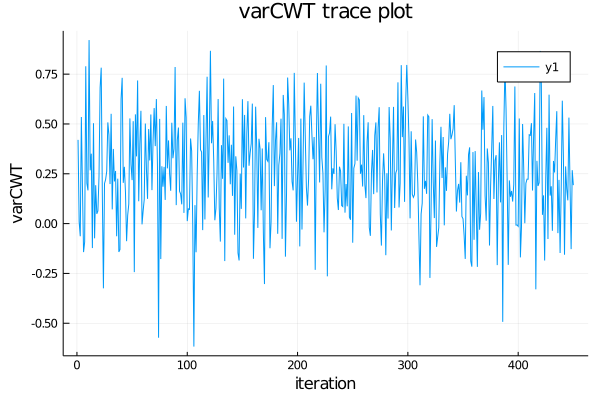

In [39]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "varCWT trace plot",
        xlabel = "iteration", ylabel = "varCWT")

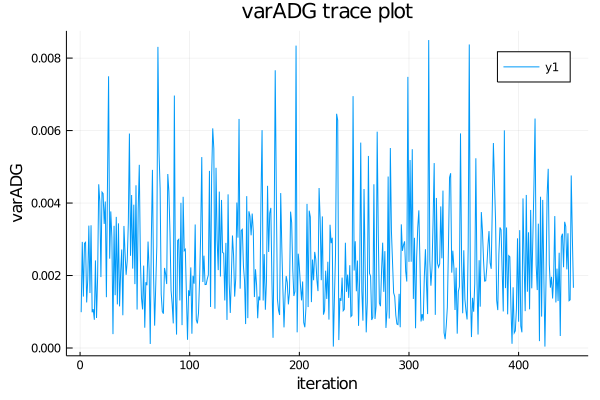

In [40]:
using Plots
x = out[!,1]; y = out[!,3]; # These are the plotting data
plot(x,y, title = "varADG trace plot",
        xlabel = "iteration", ylabel = "varADG")

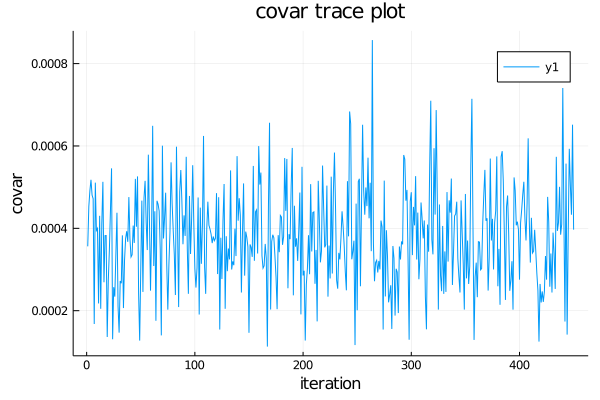

In [41]:
using Plots
x = out[!,1]; y = out[!,4]; # These are the plotting data
plot(x,y, title = "covar trace plot",
        xlabel = "iteration", ylabel = "covar")

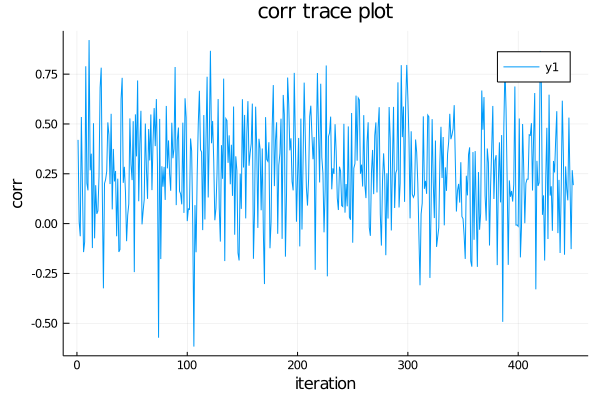

In [42]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "corr trace plot",
        xlabel = "iteration", ylabel = "corr")

In [16]:
h = histogram(out[!,2])
display(h)

UndefVarError: UndefVarError: histogram not defined

## Whole genome genetic correlation

In [3]:
gVar= CSV.read("MCMC_BayesB_genetic_variance.txt")

,Nur2ADG_Nur2ADG,Nur2ADG_Health_Score3,Health_Score3_Nur2ADG,Health_Score3_Health_Score3
,Float64,Float64,Float64,Float64
1,0.00282325,0.00110408,0.00110408,0.101425
2,0.0032261,0.00239869,0.00239869,0.0940755
3,0.00319218,0.00175824,0.00175824,0.0881763
4,0.00309028,0.00151224,0.00151224,0.108571
5,0.00321018,5.98909e-5,5.98909e-5,0.0917926
6,0.00307704,0.000340043,0.000340043,0.0802873
7,0.00339785,0.000527407,0.000527407,0.0927954
8,0.00334139,0.00168415,0.00168415,0.111857
9,0.00323454,0.00175862,0.00175862,0.103367


In [4]:
sqVar1=[sqrt(i) for i in gVar[!,:Nur2ADG_Nur2ADG]] 
sqVar2=[sqrt(i) for i in gVar[!,:Health_Score3_Health_Score3]] 
Product= sqVar1 .* sqVar2
rg= gVar[!,:Nur2ADG_Health_Score3] ./ Product  # Genetic correlations
insertcols!(gVar, 2, :corr => rg)

,Nur2ADG_Nur2ADG,corr,Nur2ADG_Health_Score3,Health_Score3_Nur2ADG,Health_Score3_Health_Score3
,Float64,Float64,Float64,Float64,Float64
1,0.00282325,0.0652456,0.00110408,0.00110408,0.101425
2,0.0032261,0.137688,0.00239869,0.00239869,0.0940755
3,0.00319218,0.104799,0.00175824,0.00175824,0.0881763
4,0.00309028,0.0825589,0.00151224,0.00151224,0.108571
5,0.00321018,0.00348893,5.98909e-5,5.98909e-5,0.0917926
6,0.00307704,0.0216343,0.000340043,0.000340043,0.0802873
7,0.00339785,0.0297017,0.000527407,0.000527407,0.0927954
8,0.00334139,0.0871134,0.00168415,0.00168415,0.111857
9,0.00323454,0.0961776,0.00175862,0.00175862,0.103367


In [5]:
#using Pkg
#Pkg.add("StatsBase")
#using(StatsBase)
mean(gVar[!,2])

0.07778168619295278

In [6]:
using Statistics
std(gVar[!,:corr])

0.0642153321272644

In [7]:
h = histogram(gVar[!,2])
display(h)

UndefVarError: UndefVarError: histogram not defined

## BV correlation for SSC15 region from MCMC BayesB samples

In [17]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_geno_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 387818:388265]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 387818:388265]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_geno_Health_Score3.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 387818:388265]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.999724,0.000874057,7.40119e-5,-0.000254273
2,2,NaN,0.0,1.00596e-6,0.0
3,3,-0.973572,0.000145254,1.45462e-5,-4.47515e-5
4,4,-1.0,0.000303949,1.87267e-6,-2.38579e-5
5,5,-0.909262,0.000334632,1.09778e-6,-1.74273e-5
6,6,-0.585035,0.000974065,5.93998e-6,-4.45009e-5
7,7,-0.965856,0.000265399,1.97775e-5,-6.99758e-5
8,8,NaN,0.0,0.0,0.0
9,9,0.715106,1.42037e-5,3.98248e-6,5.37833e-6


In [18]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.5294257131341895

In [19]:
using Statistics
std(out[!,:corr])

0.6147729393471218

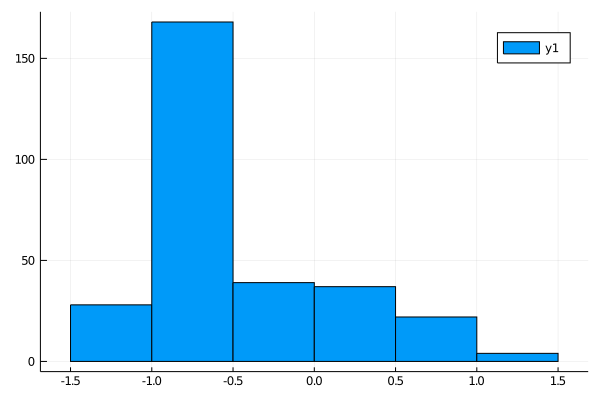

In [20]:
using Plots
h = histogram(out[!,:corr])
display(h)